In [3]:
# Load Linear Train Data
files = 'diabetic_data.csv'
data_diab = pd.read_csv(files)

In [2]:
%matplotlib inline
import csv
import numpy as np
import sys
import matplotlib.pyplot as plt
import random
import statsmodels.api as smapi
import statsmodels.graphics as smgraphics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
import pandas as pd

/Users/vrotmanh/Documents/Cornell/Spring 2018/Spec/Anomaly/venv/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


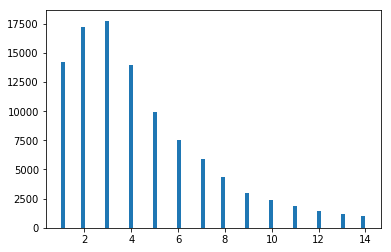

In [4]:
labels = data_diab['time_in_hospital']
plt.hist(labels, bins='auto')
plt.show()

In [5]:
len(data_diab.columns.values.tolist())

50

In [6]:
data = data_diab.drop(['time_in_hospital','weight','payer_code',], axis=1)

In [7]:
len(data.columns.values.tolist())

47

In [8]:
column_names = data.columns.values.tolist()

In [9]:
def encoding(raw_data):
    unique_val = list(raw_data.unique())
    unique_val_dic = {}
    for i,v in enumerate(unique_val):
        unique_val_dic[v] = i
        
    #print(unique_val_dic)
    return unique_val_dic

In [10]:
data['race'] = data['race'].map(encoding(data['race']))
data['gender'] = data['gender'].map(encoding(data['gender']))
data['age'] = data['age'].map(encoding(data['age']))
data['medical_specialty'] = data['medical_specialty'].map(encoding(data['medical_specialty']))
data['max_glu_serum'] = data['max_glu_serum'].map(encoding(data['max_glu_serum']))
data['A1Cresult'] = data['A1Cresult'].map(encoding(data['A1Cresult']))
data['metformin'] = data['metformin'].map(encoding(data['metformin']))
data['repaglinide'] = data['repaglinide'].map(encoding(data['repaglinide']))
data['nateglinide'] = data['nateglinide'].map(encoding(data['nateglinide']))
data['chlorpropamide'] = data['chlorpropamide'].map(encoding(data['chlorpropamide']))
data['glimepiride'] = data['glimepiride'].map(encoding(data['glimepiride']))
data['acetohexamide'] = data['acetohexamide'].map(encoding(data['acetohexamide']))
data['glipizide'] = data['glipizide'].map(encoding(data['glipizide']))
data['glyburide'] = data['glyburide'].map(encoding(data['glyburide']))
data['tolbutamide'] = data['tolbutamide'].map(encoding(data['tolbutamide']))
data['pioglitazone'] = data['pioglitazone'].map(encoding(data['pioglitazone']))
data['rosiglitazone'] = data['rosiglitazone'].map(encoding(data['rosiglitazone']))
data['acarbose'] = data['acarbose'].map(encoding(data['acarbose']))
data['miglitol'] = data['miglitol'].map(encoding(data['miglitol']))
data['troglitazone'] = data['troglitazone'].map(encoding(data['troglitazone']))
data['tolazamide'] = data['tolazamide'].map(encoding(data['tolazamide']))
data['examide'] = data['examide'].map(encoding(data['examide']))
data['citoglipton'] = data['citoglipton'].map(encoding(data['citoglipton']))
data['insulin'] = data['insulin'].map(encoding(data['insulin']))
data['glyburide-metformin'] = data['glyburide-metformin'].map(encoding(data['glyburide-metformin']))
data['glipizide-metformin'] = data['glipizide-metformin'].map(encoding(data['glipizide-metformin']))
data['glimepiride-pioglitazone'] = data['glimepiride-pioglitazone'].map(encoding(data['glimepiride-pioglitazone']))
data['metformin-rosiglitazone'] = data['metformin-rosiglitazone'].map(encoding(data['metformin-rosiglitazone']))
data['metformin-pioglitazone'] = data['metformin-pioglitazone'].map(encoding(data['metformin-pioglitazone']))
data['change'] = data['change'].map(encoding(data['change']))
data['diabetesMed'] = data['diabetesMed'].map(encoding(data['diabetesMed']))
data['readmitted'] = data['readmitted'].map(encoding(data['readmitted']))
data['diag_3'] = data['diag_3'].map(encoding(data['diag_3']))
data['diag_1'] = data['diag_1'].map(encoding(data['diag_1']))
data['diag_2'] = data['diag_2'].map(encoding(data['diag_2']))

In [11]:
data_np = np.asarray(data)  
for row in data_np:
    for i in range(len(row)):
        if row[i] == '?':
            row[i] = -1

In [12]:
df = pd.DataFrame(data=data_np[1:,1:],index=data_np[1:,0])

In [13]:
#Plot original data
def plot_data(data, labels):
    plt.plot(data, labels, 'bo')
    
#Plot anomalies
def plot_anomalies_data(data, labels, anomalies_data, anomalies_labels):
    plt.plot(anomalies_data, anomalies_labels, 'ro')
    plt.plot(data, labels, 'bo')
    plt.show()

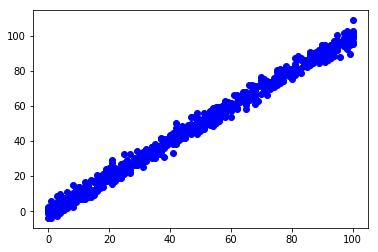

In [5]:
plot_data(linear_data, linear_labels)

In [6]:
#Generate random point
#def generate_random_point(min_val, max_val):
#   return random.uniform(min_val, max_val)

#Add random points to the data
def add_random_points(number, dataset, label):
    res_data = dataset
    res_label = label
    maxX = max(dataset)
    minX = min(dataset)
    maxY = max(label)
    minY = min(label)
    random_points_x = np.random.uniform(low=minX, high=maxX, size=(number,))
    random_points_y = np.random.uniform(low=minY, high=maxY, size=(number,))
    data = np.concatenate((np.array(res_data), np.array(random_points_x)), axis=0)
    labels = np.concatenate((np.array(res_label), np.array(random_points_y)), axis=0)
    return data, labels

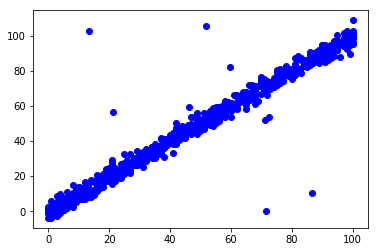

In [7]:
#Add random point to data
dataRand, labelsRand = add_random_points(10, linear_data, linear_labels)
plot_data(dataRand, labelsRand)

In [14]:
data2 = data_np
labels2 = np.asarray(labels)

In [15]:
#Fit model using linear regression
def fit_linear_regression(data, labels):
    regr = linear_model.LinearRegression()
    regr.fit(data, labels)
    predicted_labels = regr.predict(data)
    s = mean_squared_error(labels, predicted_labels)
    return s, predicted_labels

In [16]:
s, predicted_labels = fit_linear_regression(data2, labels2)

/Users/vrotmanh/Documents/Cornell/Spring 2018/Spec/Anomaly/venv/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [17]:
predicted_labels

array([1.30903787, 4.68811156, 2.70424858, ..., 3.35040349, 4.4401285 ,
       1.1462925 ])

In [35]:
#Predict models
def predict_all_models(data, labels):
    models = []
    d2 = list(data)
    l2 = list(labels)
    for j in range(len(data)):
        regr = linear_model.LinearRegression()
        if j%100 == 0:
            print("j = " + str(j) + " of " + str(len(data)))
        regr.fit(d2[0:j]+d2[(j+1):], l2[0:j]+l2[(j+1):])
        models.append(regr)
    return models

#Calculate yji
def calculate_y_j_i(j, i, data, labels, models):
    regr = models[i]
    return regr.predict(data[j].reshape(1, -1))

#Calculate cooks distance
def get_cooks_distance(data, labels, s, predicted_labels, models):
    distances = []
    for i in range(len(data)):
        di = 0
        print("i = " + str(i) + " of " + str(len(data)))
        for j in range(len(data)):
            yj = predicted_labels[j]
            yji = calculate_y_j_i(j, i, data, labels, models)
            di += (yj-yji)**2
        di = di/((len(data)+1)*s**2)
        distances.append(di)
    return distances

In [36]:
models = predict_all_models(data2, labels2)

j = 0 of 101766


j = 100 of 101766


j = 200 of 101766


j = 300 of 101766


j = 400 of 101766


j = 500 of 101766


j = 600 of 101766


j = 700 of 101766


j = 800 of 101766


j = 900 of 101766


j = 1000 of 101766


j = 1100 of 101766


j = 1200 of 101766


j = 1300 of 101766


j = 1400 of 101766


j = 1500 of 101766


j = 1600 of 101766


j = 1700 of 101766


j = 1800 of 101766


j = 1900 of 101766


j = 2000 of 101766


j = 2100 of 101766


j = 2200 of 101766


j = 2300 of 101766


j = 2400 of 101766


j = 2500 of 101766


j = 2600 of 101766


j = 2700 of 101766


j = 2800 of 101766


j = 2900 of 101766


j = 3000 of 101766


j = 3100 of 101766


j = 3200 of 101766


j = 3300 of 101766


j = 3400 of 101766


j = 3500 of 101766


j = 3600 of 101766


j = 3700 of 101766


j = 3800 of 101766


j = 3900 of 101766


j = 4000 of 101766


j = 4100 of 101766


j = 4200 of 101766


j = 4300 of 101766


j = 4400 of 101766


j = 4500 of 101766


j = 4600 of 101766


j = 4700 of 101766


j = 4800 of 101766


j = 4900 of 101766


j = 5000 of 101766


j = 5100 of 101766


j = 5200 of 101766


j = 5300 of 101766


j = 5400 of 101766


j = 5500 of 101766


j = 5600 of 101766


j = 5700 of 101766


j = 5800 of 101766


j = 5900 of 101766


j = 6000 of 101766


j = 6100 of 101766


j = 6200 of 101766


j = 6300 of 101766


j = 6400 of 101766


j = 6500 of 101766


j = 6600 of 101766


j = 6700 of 101766


j = 6800 of 101766


j = 6900 of 101766


j = 7000 of 101766


j = 7100 of 101766


j = 7200 of 101766


j = 7300 of 101766


j = 7400 of 101766


j = 7500 of 101766


j = 7600 of 101766


j = 7700 of 101766


j = 7800 of 101766


j = 7900 of 101766


j = 8000 of 101766


j = 8100 of 101766


j = 8200 of 101766


j = 8300 of 101766


j = 8400 of 101766


j = 8500 of 101766


j = 8600 of 101766


j = 8700 of 101766


j = 8800 of 101766


j = 8900 of 101766


j = 9000 of 101766


j = 9100 of 101766


j = 9200 of 101766


j = 9300 of 101766


j = 9400 of 101766


j = 9500 of 101766


j = 9600 of 101766


j = 9700 of 101766


j = 9800 of 101766


j = 9900 of 101766


j = 10000 of 101766


j = 10100 of 101766


j = 10200 of 101766


j = 10300 of 101766


j = 10400 of 101766


j = 10500 of 101766


j = 10600 of 101766


j = 10700 of 101766


j = 10800 of 101766


j = 10900 of 101766


j = 11000 of 101766


j = 11100 of 101766


j = 11200 of 101766


j = 11300 of 101766


j = 11400 of 101766


j = 11500 of 101766


j = 11600 of 101766


j = 11700 of 101766


j = 11800 of 101766


j = 11900 of 101766


j = 12000 of 101766


j = 12100 of 101766


j = 12200 of 101766


j = 12300 of 101766


j = 12400 of 101766


j = 12500 of 101766


j = 12600 of 101766


j = 12700 of 101766


j = 12800 of 101766


j = 12900 of 101766


j = 13000 of 101766


j = 13100 of 101766


j = 13200 of 101766


j = 13300 of 101766


j = 13400 of 101766


j = 13500 of 101766


j = 13600 of 101766


j = 13700 of 101766


j = 13800 of 101766


j = 13900 of 101766


j = 14000 of 101766


j = 14100 of 101766


j = 14200 of 101766


j = 14300 of 101766


j = 14400 of 101766


j = 14500 of 101766


j = 14600 of 101766


j = 14700 of 101766


j = 14800 of 101766


j = 14900 of 101766


j = 15000 of 101766


j = 15100 of 101766


j = 15200 of 101766


j = 15300 of 101766


j = 15400 of 101766


j = 15500 of 101766


j = 15600 of 101766


j = 15700 of 101766


j = 15800 of 101766


j = 15900 of 101766


j = 16000 of 101766


j = 16100 of 101766


j = 16200 of 101766


j = 16300 of 101766


j = 16400 of 101766


j = 16500 of 101766


j = 16600 of 101766


j = 16700 of 101766


j = 16800 of 101766


j = 16900 of 101766


j = 17000 of 101766


j = 17100 of 101766


j = 17200 of 101766


j = 17300 of 101766


j = 17400 of 101766


j = 17500 of 101766


j = 17600 of 101766


j = 17700 of 101766


j = 17800 of 101766


j = 17900 of 101766


j = 18000 of 101766


j = 18100 of 101766


j = 18200 of 101766


j = 18300 of 101766


j = 18400 of 101766


j = 18500 of 101766


j = 18600 of 101766


j = 18700 of 101766


j = 18800 of 101766


j = 18900 of 101766


j = 19000 of 101766


j = 19100 of 101766


j = 19200 of 101766


j = 19300 of 101766


j = 19400 of 101766


j = 19500 of 101766


j = 19600 of 101766


j = 19700 of 101766


j = 19800 of 101766


j = 19900 of 101766


j = 20000 of 101766


j = 20100 of 101766


j = 20200 of 101766


j = 20300 of 101766


j = 20400 of 101766


j = 20500 of 101766


j = 20600 of 101766


j = 20700 of 101766


j = 20800 of 101766


j = 20900 of 101766


j = 21000 of 101766


j = 21100 of 101766


j = 21200 of 101766


j = 21300 of 101766


j = 21400 of 101766


j = 21500 of 101766


j = 21600 of 101766


j = 21700 of 101766


j = 21800 of 101766


j = 21900 of 101766


j = 22000 of 101766


j = 22100 of 101766


j = 22200 of 101766


j = 22300 of 101766


j = 22400 of 101766


j = 22500 of 101766


j = 22600 of 101766


j = 22700 of 101766


j = 22800 of 101766


j = 22900 of 101766


j = 23000 of 101766


j = 23100 of 101766


j = 23200 of 101766


j = 23300 of 101766


j = 23400 of 101766


j = 23500 of 101766


j = 23600 of 101766


j = 23700 of 101766


j = 23800 of 101766


j = 23900 of 101766


j = 24000 of 101766


j = 24100 of 101766


j = 24200 of 101766


j = 24300 of 101766


j = 24400 of 101766


j = 24500 of 101766


j = 24600 of 101766


j = 24700 of 101766


j = 24800 of 101766


j = 24900 of 101766


j = 25000 of 101766


j = 25100 of 101766


j = 25200 of 101766


j = 25300 of 101766


j = 25400 of 101766


j = 25500 of 101766


j = 25600 of 101766


j = 25700 of 101766


j = 25800 of 101766


j = 25900 of 101766


j = 26000 of 101766


j = 26100 of 101766


j = 26200 of 101766


j = 26300 of 101766


j = 26400 of 101766


j = 26500 of 101766


j = 26600 of 101766


j = 26700 of 101766


j = 26800 of 101766


j = 26900 of 101766


j = 27000 of 101766


j = 27100 of 101766


j = 27200 of 101766


j = 27300 of 101766


j = 27400 of 101766


j = 27500 of 101766


j = 27600 of 101766


j = 27700 of 101766


j = 27800 of 101766


j = 27900 of 101766


j = 28000 of 101766


j = 28100 of 101766


j = 28200 of 101766


j = 28300 of 101766


j = 28400 of 101766


j = 28500 of 101766


j = 28600 of 101766


j = 28700 of 101766


j = 28800 of 101766


j = 28900 of 101766


j = 29000 of 101766


j = 29100 of 101766


j = 29200 of 101766


j = 29300 of 101766


j = 29400 of 101766


j = 29500 of 101766


j = 29600 of 101766


j = 29700 of 101766


j = 29800 of 101766


j = 29900 of 101766


j = 30000 of 101766


j = 30100 of 101766


j = 30200 of 101766


j = 30300 of 101766


j = 30400 of 101766


j = 30500 of 101766


j = 30600 of 101766


j = 30700 of 101766


j = 30800 of 101766


j = 30900 of 101766


j = 31000 of 101766


j = 31100 of 101766


j = 31200 of 101766


j = 31300 of 101766


j = 31400 of 101766


j = 31500 of 101766


j = 31600 of 101766


j = 31700 of 101766


j = 31800 of 101766


j = 31900 of 101766


j = 32000 of 101766


j = 32100 of 101766


j = 32200 of 101766


j = 32300 of 101766


j = 32400 of 101766


j = 32500 of 101766


j = 32600 of 101766


j = 32700 of 101766


j = 32800 of 101766


j = 32900 of 101766


j = 33000 of 101766


j = 33100 of 101766


j = 33200 of 101766


j = 33300 of 101766


j = 33400 of 101766


j = 33500 of 101766


j = 33600 of 101766


j = 33700 of 101766


j = 33800 of 101766


j = 33900 of 101766


j = 34000 of 101766


j = 34100 of 101766


j = 34200 of 101766


j = 34300 of 101766


j = 34400 of 101766


j = 34500 of 101766


j = 34600 of 101766


j = 34700 of 101766


j = 34800 of 101766


j = 34900 of 101766


j = 35000 of 101766


j = 35100 of 101766


j = 35200 of 101766


j = 35300 of 101766


j = 35400 of 101766


j = 35500 of 101766


j = 35600 of 101766


j = 35700 of 101766


j = 35800 of 101766


j = 35900 of 101766


j = 36000 of 101766


j = 36100 of 101766


j = 36200 of 101766


j = 36300 of 101766


j = 36400 of 101766


j = 36500 of 101766


j = 36600 of 101766


j = 36700 of 101766


j = 36800 of 101766


j = 36900 of 101766


j = 37000 of 101766


j = 37100 of 101766


j = 37200 of 101766


j = 37300 of 101766


j = 37400 of 101766


j = 37500 of 101766


j = 37600 of 101766


j = 37700 of 101766


j = 37800 of 101766


j = 37900 of 101766


j = 38000 of 101766


j = 38100 of 101766


j = 38200 of 101766


j = 38300 of 101766


j = 38400 of 101766


j = 38500 of 101766


j = 38600 of 101766


j = 38700 of 101766


j = 38800 of 101766


j = 38900 of 101766


j = 39000 of 101766


j = 39100 of 101766


j = 39200 of 101766


j = 39300 of 101766


j = 39400 of 101766


j = 39500 of 101766


j = 39600 of 101766


j = 39700 of 101766


j = 39800 of 101766


j = 39900 of 101766


j = 40000 of 101766


j = 40100 of 101766


j = 40200 of 101766


j = 40300 of 101766


j = 40400 of 101766


j = 40500 of 101766


j = 40600 of 101766


j = 40700 of 101766


j = 40800 of 101766


j = 40900 of 101766


j = 41000 of 101766


j = 41100 of 101766


j = 41200 of 101766


j = 41300 of 101766


j = 41400 of 101766


j = 41500 of 101766


j = 41600 of 101766


j = 41700 of 101766


j = 41800 of 101766


j = 41900 of 101766


j = 42000 of 101766


j = 42100 of 101766


j = 42200 of 101766


j = 42300 of 101766


j = 42400 of 101766


j = 42500 of 101766


j = 42600 of 101766


j = 42700 of 101766


j = 42800 of 101766


j = 42900 of 101766


j = 43000 of 101766


j = 43100 of 101766


j = 43200 of 101766


j = 43300 of 101766


j = 43400 of 101766


j = 43500 of 101766


j = 43600 of 101766


j = 43700 of 101766


j = 43800 of 101766


j = 43900 of 101766


j = 44000 of 101766


j = 44100 of 101766


j = 44200 of 101766


j = 44300 of 101766


j = 44400 of 101766


j = 44500 of 101766


j = 44600 of 101766


j = 44700 of 101766


j = 44800 of 101766


j = 44900 of 101766


j = 45000 of 101766


j = 45100 of 101766


j = 45200 of 101766


j = 45300 of 101766


j = 45400 of 101766


j = 45500 of 101766


j = 45600 of 101766


j = 45700 of 101766


j = 45800 of 101766


j = 45900 of 101766


j = 46000 of 101766


j = 46100 of 101766


j = 46200 of 101766


j = 46300 of 101766


j = 46400 of 101766


j = 46500 of 101766


j = 46600 of 101766


j = 46700 of 101766


j = 46800 of 101766


j = 46900 of 101766


j = 47000 of 101766


j = 47100 of 101766


j = 47200 of 101766


j = 47300 of 101766


j = 47400 of 101766


j = 47500 of 101766


j = 47600 of 101766


j = 47700 of 101766


j = 47800 of 101766


j = 47900 of 101766


j = 48000 of 101766


j = 48100 of 101766


j = 48200 of 101766


j = 48300 of 101766


j = 48400 of 101766


j = 48500 of 101766


j = 48600 of 101766


j = 48700 of 101766


j = 48800 of 101766


j = 48900 of 101766


j = 49000 of 101766


j = 49100 of 101766


j = 49200 of 101766


j = 49300 of 101766


j = 49400 of 101766


j = 49500 of 101766


j = 49600 of 101766


j = 49700 of 101766


j = 49800 of 101766


j = 49900 of 101766


j = 50000 of 101766


j = 50100 of 101766


j = 50200 of 101766


j = 50300 of 101766


j = 50400 of 101766


j = 50500 of 101766


j = 50600 of 101766


j = 50700 of 101766


j = 50800 of 101766


j = 50900 of 101766


j = 51000 of 101766


j = 51100 of 101766


j = 51200 of 101766


j = 51300 of 101766


j = 51400 of 101766


j = 51500 of 101766


j = 51600 of 101766


j = 51700 of 101766


j = 51800 of 101766


j = 51900 of 101766


j = 52000 of 101766


j = 52100 of 101766


j = 52200 of 101766


j = 52300 of 101766


j = 52400 of 101766


j = 52500 of 101766


j = 52600 of 101766


j = 52700 of 101766


j = 52800 of 101766


j = 52900 of 101766


j = 53000 of 101766


j = 53100 of 101766


j = 53200 of 101766


j = 53300 of 101766


j = 53400 of 101766


j = 53500 of 101766


j = 53600 of 101766


j = 53700 of 101766


j = 53800 of 101766


j = 53900 of 101766


j = 54000 of 101766


j = 54100 of 101766


j = 54200 of 101766


j = 54300 of 101766


j = 54400 of 101766


j = 54500 of 101766


j = 54600 of 101766


j = 54700 of 101766


j = 54800 of 101766


j = 54900 of 101766


j = 55000 of 101766


j = 55100 of 101766


j = 55200 of 101766


j = 55300 of 101766


j = 55400 of 101766


j = 55500 of 101766


j = 55600 of 101766


j = 55700 of 101766


j = 55800 of 101766


j = 55900 of 101766


j = 56000 of 101766


j = 56100 of 101766


j = 56200 of 101766


j = 56300 of 101766


j = 56400 of 101766


j = 56500 of 101766


j = 56600 of 101766


j = 56700 of 101766


j = 56800 of 101766


j = 56900 of 101766


j = 57000 of 101766


j = 57100 of 101766


j = 57200 of 101766


j = 57300 of 101766


j = 57400 of 101766


j = 57500 of 101766


j = 57600 of 101766


j = 57700 of 101766


j = 57800 of 101766


j = 57900 of 101766


j = 58000 of 101766


j = 58100 of 101766


j = 58200 of 101766


j = 58300 of 101766


j = 58400 of 101766


j = 58500 of 101766


j = 58600 of 101766


j = 58700 of 101766


j = 58800 of 101766


j = 58900 of 101766


j = 59000 of 101766


j = 59100 of 101766


j = 59200 of 101766


j = 59300 of 101766


j = 59400 of 101766


j = 59500 of 101766


j = 59600 of 101766


j = 59700 of 101766


j = 59800 of 101766


j = 59900 of 101766


j = 60000 of 101766


j = 60100 of 101766


j = 60200 of 101766


j = 60300 of 101766


j = 60400 of 101766


j = 60500 of 101766


j = 60600 of 101766


j = 60700 of 101766


j = 60800 of 101766


j = 60900 of 101766


j = 61000 of 101766


j = 61100 of 101766


j = 61200 of 101766


j = 61300 of 101766


j = 61400 of 101766


j = 61500 of 101766


j = 61600 of 101766


j = 61700 of 101766


j = 61800 of 101766


j = 61900 of 101766


j = 62000 of 101766


j = 62100 of 101766


j = 62200 of 101766


j = 62300 of 101766


j = 62400 of 101766


j = 62500 of 101766


j = 62600 of 101766


j = 62700 of 101766


j = 62800 of 101766


j = 62900 of 101766


j = 63000 of 101766


j = 63100 of 101766


j = 63200 of 101766


j = 63300 of 101766


j = 63400 of 101766


j = 63500 of 101766


j = 63600 of 101766


j = 63700 of 101766


j = 63800 of 101766


j = 63900 of 101766


j = 64000 of 101766


j = 64100 of 101766


j = 64200 of 101766


j = 64300 of 101766


j = 64400 of 101766


j = 64500 of 101766


j = 64600 of 101766


j = 64700 of 101766


j = 64800 of 101766


j = 64900 of 101766


j = 65000 of 101766


j = 65100 of 101766


j = 65200 of 101766


j = 65300 of 101766


j = 65400 of 101766


j = 65500 of 101766


j = 65600 of 101766


j = 65700 of 101766


j = 65800 of 101766


j = 65900 of 101766


j = 66000 of 101766


j = 66100 of 101766


j = 66200 of 101766


j = 66300 of 101766


j = 66400 of 101766


j = 66500 of 101766


j = 66600 of 101766


j = 66700 of 101766


j = 66800 of 101766


j = 66900 of 101766


j = 67000 of 101766


j = 67100 of 101766


j = 67200 of 101766


j = 67300 of 101766


j = 67400 of 101766


j = 67500 of 101766


j = 67600 of 101766


j = 67700 of 101766


j = 67800 of 101766


j = 67900 of 101766


j = 68000 of 101766


j = 68100 of 101766


j = 68200 of 101766


j = 68300 of 101766


j = 68400 of 101766


j = 68500 of 101766


j = 68600 of 101766


j = 68700 of 101766


j = 68800 of 101766


j = 68900 of 101766


j = 69000 of 101766


j = 69100 of 101766


j = 69200 of 101766


j = 69300 of 101766


j = 69400 of 101766


j = 69500 of 101766


j = 69600 of 101766


j = 69700 of 101766


j = 69800 of 101766


j = 69900 of 101766


j = 70000 of 101766


j = 70100 of 101766


j = 70200 of 101766


j = 70300 of 101766


j = 70400 of 101766


j = 70500 of 101766


j = 70600 of 101766


j = 70700 of 101766


j = 70800 of 101766


j = 70900 of 101766


j = 71000 of 101766


j = 71100 of 101766


j = 71200 of 101766


j = 71300 of 101766


j = 71400 of 101766


j = 71500 of 101766


j = 71600 of 101766


j = 71700 of 101766


j = 71800 of 101766


j = 71900 of 101766


j = 72000 of 101766


j = 72100 of 101766


j = 72200 of 101766


j = 72300 of 101766


j = 72400 of 101766


j = 72500 of 101766


j = 72600 of 101766


j = 72700 of 101766


j = 72800 of 101766


j = 72900 of 101766


j = 73000 of 101766


j = 73100 of 101766


j = 73200 of 101766


j = 73300 of 101766


j = 73400 of 101766


j = 73500 of 101766


j = 73600 of 101766


j = 73700 of 101766


j = 73800 of 101766


j = 73900 of 101766


j = 74000 of 101766


j = 74100 of 101766


j = 74200 of 101766


j = 74300 of 101766


j = 74400 of 101766


j = 74500 of 101766


j = 74600 of 101766


j = 74700 of 101766


j = 74800 of 101766


j = 74900 of 101766


j = 75000 of 101766


j = 75100 of 101766


j = 75200 of 101766


j = 75300 of 101766


j = 75400 of 101766


j = 75500 of 101766


j = 75600 of 101766


j = 75700 of 101766


j = 75800 of 101766


j = 75900 of 101766


j = 76000 of 101766


j = 76100 of 101766


j = 76200 of 101766


j = 76300 of 101766


j = 76400 of 101766


j = 76500 of 101766


j = 76600 of 101766


j = 76700 of 101766


j = 76800 of 101766


j = 76900 of 101766


j = 77000 of 101766


j = 77100 of 101766


j = 77200 of 101766


j = 77300 of 101766


j = 77400 of 101766


j = 77500 of 101766


j = 77600 of 101766


j = 77700 of 101766


j = 77800 of 101766


j = 77900 of 101766


j = 78000 of 101766


j = 78100 of 101766


j = 78200 of 101766


j = 78300 of 101766


j = 78400 of 101766


j = 78500 of 101766


j = 78600 of 101766


j = 78700 of 101766


j = 78800 of 101766


j = 78900 of 101766


j = 79000 of 101766


j = 79100 of 101766


j = 79200 of 101766


j = 79300 of 101766


j = 79400 of 101766


j = 79500 of 101766


j = 79600 of 101766


j = 79700 of 101766


j = 79800 of 101766


j = 79900 of 101766


j = 80000 of 101766


j = 80100 of 101766


j = 80200 of 101766


j = 80300 of 101766


j = 80400 of 101766


j = 80500 of 101766


j = 80600 of 101766


j = 80700 of 101766


j = 80800 of 101766


j = 80900 of 101766


j = 81000 of 101766


j = 81100 of 101766


j = 81200 of 101766


j = 81300 of 101766


j = 81400 of 101766


j = 81500 of 101766


j = 81600 of 101766


j = 81700 of 101766


j = 81800 of 101766


j = 81900 of 101766


j = 82000 of 101766


j = 82100 of 101766


j = 82200 of 101766


j = 82300 of 101766


j = 82400 of 101766


j = 82500 of 101766


j = 82600 of 101766


j = 82700 of 101766


j = 82800 of 101766


j = 82900 of 101766


j = 83000 of 101766


j = 83100 of 101766


j = 83200 of 101766


j = 83300 of 101766


j = 83400 of 101766


j = 83500 of 101766


j = 83600 of 101766


j = 83700 of 101766


j = 83800 of 101766


j = 83900 of 101766


j = 84000 of 101766


j = 84100 of 101766


j = 84200 of 101766


j = 84300 of 101766


j = 84400 of 101766


j = 84500 of 101766


j = 84600 of 101766


j = 84700 of 101766


j = 84800 of 101766


j = 84900 of 101766


j = 85000 of 101766


j = 85100 of 101766


j = 85200 of 101766


j = 85300 of 101766


j = 85400 of 101766


j = 85500 of 101766


j = 85600 of 101766


j = 85700 of 101766


j = 85800 of 101766


j = 85900 of 101766


j = 86000 of 101766


j = 86100 of 101766


j = 86200 of 101766


j = 86300 of 101766


j = 86400 of 101766


j = 86500 of 101766


j = 86600 of 101766


j = 86700 of 101766


j = 86800 of 101766


j = 86900 of 101766


j = 87000 of 101766


j = 87100 of 101766


j = 87200 of 101766


j = 87300 of 101766


j = 87400 of 101766


j = 87500 of 101766


j = 87600 of 101766


j = 87700 of 101766


j = 87800 of 101766


j = 87900 of 101766


j = 88000 of 101766


j = 88100 of 101766


j = 88200 of 101766


j = 88300 of 101766


j = 88400 of 101766


j = 88500 of 101766


j = 88600 of 101766


j = 88700 of 101766


j = 88800 of 101766


j = 88900 of 101766


j = 89000 of 101766


j = 89100 of 101766


j = 89200 of 101766


j = 89300 of 101766


j = 89400 of 101766


j = 89500 of 101766


j = 89600 of 101766


j = 89700 of 101766


j = 89800 of 101766


j = 89900 of 101766


j = 90000 of 101766


j = 90100 of 101766


j = 90200 of 101766


j = 90300 of 101766


j = 90400 of 101766


j = 90500 of 101766


j = 90600 of 101766


j = 90700 of 101766


j = 90800 of 101766


j = 90900 of 101766


j = 91000 of 101766


j = 91100 of 101766


j = 91200 of 101766


j = 91300 of 101766


j = 91400 of 101766


j = 91500 of 101766


j = 91600 of 101766


j = 91700 of 101766


j = 91800 of 101766


j = 91900 of 101766


j = 92000 of 101766


j = 92100 of 101766


j = 92200 of 101766


j = 92300 of 101766


j = 92400 of 101766


j = 92500 of 101766


j = 92600 of 101766


j = 92700 of 101766


j = 92800 of 101766


j = 92900 of 101766


j = 93000 of 101766


j = 93100 of 101766


j = 93200 of 101766


j = 93300 of 101766


j = 93400 of 101766


j = 93500 of 101766


j = 93600 of 101766


j = 93700 of 101766


j = 93800 of 101766


j = 93900 of 101766


j = 94000 of 101766


j = 94100 of 101766


j = 94200 of 101766


j = 94300 of 101766


j = 94400 of 101766


j = 94500 of 101766


j = 94600 of 101766


j = 94700 of 101766


j = 94800 of 101766


j = 94900 of 101766


j = 95000 of 101766


j = 95100 of 101766


j = 95200 of 101766


j = 95300 of 101766


j = 95400 of 101766


j = 95500 of 101766


j = 95600 of 101766


j = 95700 of 101766


j = 95800 of 101766


j = 95900 of 101766


j = 96000 of 101766


j = 96100 of 101766


j = 96200 of 101766


j = 96300 of 101766


j = 96400 of 101766


j = 96500 of 101766


j = 96600 of 101766


j = 96700 of 101766


j = 96800 of 101766


j = 96900 of 101766


j = 97000 of 101766


j = 97100 of 101766


j = 97200 of 101766


j = 97300 of 101766


j = 97400 of 101766


j = 97500 of 101766


j = 97600 of 101766


j = 97700 of 101766


j = 97800 of 101766


j = 97900 of 101766


j = 98000 of 101766


j = 98100 of 101766


j = 98200 of 101766


j = 98300 of 101766


j = 98400 of 101766


j = 98500 of 101766


j = 98600 of 101766


j = 98700 of 101766


j = 98800 of 101766


j = 98900 of 101766


j = 99000 of 101766


j = 99100 of 101766


j = 99200 of 101766


j = 99300 of 101766


j = 99400 of 101766


j = 99500 of 101766


j = 99600 of 101766


j = 99700 of 101766


j = 99800 of 101766


j = 99900 of 101766


j = 100000 of 101766


j = 100100 of 101766


j = 100200 of 101766


j = 100300 of 101766


j = 100400 of 101766


j = 100500 of 101766


j = 100600 of 101766


j = 100700 of 101766


j = 100800 of 101766


j = 100900 of 101766


j = 101000 of 101766


j = 101100 of 101766


j = 101200 of 101766


j = 101300 of 101766


j = 101400 of 101766


j = 101500 of 101766


j = 101600 of 101766


j = 101700 of 101766


In [37]:
distance = get_cooks_distance(data2,labels2, s, predicted_labels, models)

i = 0 of 101766


i = 1 of 101766


i = 2 of 101766


i = 3 of 101766


i = 4 of 101766


i = 5 of 101766


i = 6 of 101766


i = 7 of 101766


i = 8 of 101766


i = 9 of 101766


i = 10 of 101766


i = 11 of 101766


i = 12 of 101766


i = 13 of 101766


i = 14 of 101766


i = 15 of 101766


i = 16 of 101766


i = 17 of 101766


i = 18 of 101766


i = 19 of 101766


i = 20 of 101766


i = 21 of 101766


i = 22 of 101766


i = 23 of 101766


i = 24 of 101766


i = 25 of 101766


i = 26 of 101766


i = 27 of 101766


i = 28 of 101766


i = 29 of 101766


i = 30 of 101766


i = 31 of 101766


i = 32 of 101766


i = 33 of 101766


i = 34 of 101766


i = 35 of 101766


i = 36 of 101766


i = 37 of 101766


i = 38 of 101766


i = 39 of 101766


i = 40 of 101766


i = 41 of 101766


i = 42 of 101766


i = 43 of 101766


i = 44 of 101766


i = 45 of 101766


i = 46 of 101766


i = 47 of 101766


i = 48 of 101766


i = 49 of 101766


i = 50 of 101766


i = 51 of 101766


i = 52 of 101766


i = 53 of 101766


i = 54 of 101766


i = 55 of 101766


i = 56 of 101766


i = 57 of 101766


i = 58 of 101766


i = 59 of 101766


i = 60 of 101766


i = 61 of 101766


i = 62 of 101766


i = 63 of 101766


i = 64 of 101766


i = 65 of 101766


i = 66 of 101766


i = 67 of 101766


i = 68 of 101766


i = 69 of 101766


i = 70 of 101766


i = 71 of 101766


i = 72 of 101766


i = 73 of 101766


i = 74 of 101766


i = 75 of 101766


i = 76 of 101766


i = 77 of 101766


i = 78 of 101766


i = 79 of 101766


i = 80 of 101766


i = 81 of 101766


i = 82 of 101766


i = 83 of 101766


i = 84 of 101766


i = 85 of 101766


i = 86 of 101766


i = 87 of 101766


i = 88 of 101766


i = 89 of 101766


i = 90 of 101766


i = 91 of 101766


i = 92 of 101766


i = 93 of 101766


i = 94 of 101766


i = 95 of 101766


i = 96 of 101766


i = 97 of 101766


i = 98 of 101766


i = 99 of 101766


i = 100 of 101766


i = 101 of 101766


i = 102 of 101766


i = 103 of 101766


i = 104 of 101766


i = 105 of 101766


i = 106 of 101766


i = 107 of 101766


i = 108 of 101766


i = 109 of 101766


i = 110 of 101766


i = 111 of 101766


i = 112 of 101766


i = 113 of 101766


i = 114 of 101766


i = 115 of 101766


i = 116 of 101766


i = 117 of 101766


i = 118 of 101766


i = 119 of 101766


i = 120 of 101766


i = 121 of 101766


i = 122 of 101766


i = 123 of 101766


i = 124 of 101766


i = 125 of 101766


i = 126 of 101766


i = 127 of 101766


i = 128 of 101766


i = 129 of 101766


i = 130 of 101766


i = 131 of 101766


i = 132 of 101766


i = 133 of 101766


i = 134 of 101766


i = 135 of 101766


i = 136 of 101766


i = 137 of 101766


i = 138 of 101766


i = 139 of 101766


i = 140 of 101766


i = 141 of 101766


i = 142 of 101766


i = 143 of 101766


i = 144 of 101766


i = 145 of 101766


i = 146 of 101766


i = 147 of 101766


i = 148 of 101766


i = 149 of 101766


i = 150 of 101766


i = 151 of 101766


i = 152 of 101766


i = 153 of 101766


i = 154 of 101766


i = 155 of 101766


i = 156 of 101766


i = 157 of 101766


i = 158 of 101766


i = 159 of 101766


i = 160 of 101766


i = 161 of 101766


i = 162 of 101766


i = 163 of 101766


i = 164 of 101766


i = 165 of 101766


i = 166 of 101766


i = 167 of 101766


i = 168 of 101766


i = 169 of 101766


i = 170 of 101766


i = 171 of 101766


i = 172 of 101766


i = 173 of 101766


i = 174 of 101766


i = 175 of 101766


i = 176 of 101766


i = 177 of 101766


i = 178 of 101766


i = 179 of 101766


i = 180 of 101766


i = 181 of 101766


i = 182 of 101766


i = 183 of 101766


i = 184 of 101766


i = 185 of 101766


i = 186 of 101766


i = 187 of 101766


i = 188 of 101766


i = 189 of 101766


i = 190 of 101766


i = 191 of 101766


i = 192 of 101766


i = 193 of 101766


i = 194 of 101766


i = 195 of 101766


i = 196 of 101766


i = 197 of 101766


i = 198 of 101766


i = 199 of 101766


i = 200 of 101766


i = 201 of 101766


i = 202 of 101766


i = 203 of 101766


i = 204 of 101766


i = 205 of 101766


i = 206 of 101766


i = 207 of 101766


i = 208 of 101766


i = 209 of 101766


i = 210 of 101766


i = 211 of 101766


i = 212 of 101766


i = 213 of 101766


i = 214 of 101766


i = 215 of 101766


i = 216 of 101766


i = 217 of 101766


i = 218 of 101766


i = 219 of 101766


i = 220 of 101766


i = 221 of 101766


i = 222 of 101766


i = 223 of 101766


i = 224 of 101766


i = 225 of 101766


i = 226 of 101766


i = 227 of 101766


i = 228 of 101766


i = 229 of 101766


i = 230 of 101766


i = 231 of 101766


i = 232 of 101766


i = 233 of 101766


i = 234 of 101766


i = 235 of 101766


i = 236 of 101766


i = 237 of 101766


i = 238 of 101766


i = 239 of 101766


i = 240 of 101766


i = 241 of 101766


i = 242 of 101766


i = 243 of 101766


i = 244 of 101766


i = 245 of 101766


i = 246 of 101766


i = 247 of 101766


i = 248 of 101766


i = 249 of 101766


i = 250 of 101766


i = 251 of 101766


i = 252 of 101766


i = 253 of 101766


i = 254 of 101766


i = 255 of 101766


i = 256 of 101766


i = 257 of 101766


i = 258 of 101766


i = 259 of 101766


i = 260 of 101766


i = 261 of 101766


i = 262 of 101766


i = 263 of 101766


i = 264 of 101766


i = 265 of 101766


i = 266 of 101766


i = 267 of 101766


i = 268 of 101766


i = 269 of 101766


i = 270 of 101766


i = 271 of 101766


i = 272 of 101766


i = 273 of 101766


i = 274 of 101766


i = 275 of 101766


i = 276 of 101766


i = 277 of 101766


i = 278 of 101766


i = 279 of 101766


i = 280 of 101766


i = 281 of 101766


i = 282 of 101766


i = 283 of 101766


i = 284 of 101766


i = 285 of 101766


i = 286 of 101766


i = 287 of 101766


i = 288 of 101766


i = 289 of 101766


i = 290 of 101766


i = 291 of 101766


i = 292 of 101766


i = 293 of 101766


i = 294 of 101766


i = 295 of 101766


i = 296 of 101766


i = 297 of 101766


i = 298 of 101766


i = 299 of 101766


i = 300 of 101766


i = 301 of 101766


i = 302 of 101766


i = 303 of 101766


i = 304 of 101766


i = 305 of 101766


i = 306 of 101766


i = 307 of 101766


i = 308 of 101766


i = 309 of 101766


i = 310 of 101766


i = 311 of 101766


i = 312 of 101766


i = 313 of 101766


i = 314 of 101766


i = 315 of 101766


i = 316 of 101766


i = 317 of 101766


i = 318 of 101766


i = 319 of 101766


i = 320 of 101766


i = 321 of 101766


i = 322 of 101766


i = 323 of 101766


i = 324 of 101766


i = 325 of 101766


i = 326 of 101766


i = 327 of 101766


i = 328 of 101766


i = 329 of 101766


i = 330 of 101766


i = 331 of 101766


i = 332 of 101766


i = 333 of 101766


i = 334 of 101766


i = 335 of 101766


i = 336 of 101766


i = 337 of 101766


i = 338 of 101766


i = 339 of 101766


i = 340 of 101766


i = 341 of 101766


i = 342 of 101766


i = 343 of 101766


i = 344 of 101766


i = 345 of 101766


i = 346 of 101766


i = 347 of 101766


i = 348 of 101766


i = 349 of 101766


i = 350 of 101766


i = 351 of 101766


i = 352 of 101766


i = 353 of 101766


i = 354 of 101766


i = 355 of 101766


i = 356 of 101766


i = 357 of 101766


i = 358 of 101766


i = 359 of 101766


i = 360 of 101766


i = 361 of 101766


i = 362 of 101766


i = 363 of 101766


i = 364 of 101766


i = 365 of 101766


i = 366 of 101766


i = 367 of 101766


i = 368 of 101766


i = 369 of 101766


i = 370 of 101766


i = 371 of 101766


i = 372 of 101766


i = 373 of 101766


i = 374 of 101766


i = 375 of 101766


i = 376 of 101766


i = 377 of 101766


i = 378 of 101766


i = 379 of 101766


i = 380 of 101766


i = 381 of 101766


i = 382 of 101766


i = 383 of 101766


i = 384 of 101766


i = 385 of 101766


i = 386 of 101766


i = 387 of 101766


i = 388 of 101766


i = 389 of 101766


i = 390 of 101766


i = 391 of 101766


i = 392 of 101766


i = 393 of 101766


i = 394 of 101766


i = 395 of 101766


i = 396 of 101766


i = 397 of 101766


i = 398 of 101766


i = 399 of 101766


i = 400 of 101766


i = 401 of 101766


i = 402 of 101766


i = 403 of 101766


i = 404 of 101766


i = 405 of 101766


i = 406 of 101766


i = 407 of 101766


i = 408 of 101766


i = 409 of 101766


i = 410 of 101766


i = 411 of 101766


i = 412 of 101766


i = 413 of 101766


i = 414 of 101766


i = 415 of 101766


i = 416 of 101766


i = 417 of 101766


i = 418 of 101766


i = 419 of 101766


i = 420 of 101766


i = 421 of 101766


i = 422 of 101766


i = 423 of 101766


i = 424 of 101766


i = 425 of 101766


i = 426 of 101766


i = 427 of 101766


i = 428 of 101766


i = 429 of 101766


i = 430 of 101766


i = 431 of 101766


i = 432 of 101766


i = 433 of 101766


i = 434 of 101766


i = 435 of 101766


i = 436 of 101766


i = 437 of 101766


i = 438 of 101766


i = 439 of 101766


i = 440 of 101766


i = 441 of 101766


i = 442 of 101766


i = 443 of 101766


i = 444 of 101766


i = 445 of 101766


i = 446 of 101766


i = 447 of 101766


i = 448 of 101766


i = 449 of 101766


i = 450 of 101766


i = 451 of 101766


i = 452 of 101766


i = 453 of 101766


i = 454 of 101766


i = 455 of 101766


i = 456 of 101766


i = 457 of 101766


i = 458 of 101766


i = 459 of 101766


i = 460 of 101766


i = 461 of 101766


i = 462 of 101766


i = 463 of 101766


i = 464 of 101766


i = 465 of 101766


i = 466 of 101766


i = 467 of 101766


i = 468 of 101766


i = 469 of 101766


i = 470 of 101766


i = 471 of 101766


i = 472 of 101766


i = 473 of 101766


i = 474 of 101766


i = 475 of 101766


i = 476 of 101766


i = 477 of 101766


i = 478 of 101766


i = 479 of 101766


i = 480 of 101766


i = 481 of 101766


i = 482 of 101766


i = 483 of 101766


i = 484 of 101766


i = 485 of 101766


i = 486 of 101766


i = 487 of 101766


i = 488 of 101766


i = 489 of 101766


i = 490 of 101766


i = 491 of 101766


i = 492 of 101766


i = 493 of 101766


i = 494 of 101766


i = 495 of 101766


i = 496 of 101766


i = 497 of 101766


i = 498 of 101766


i = 499 of 101766


i = 500 of 101766


i = 501 of 101766


i = 502 of 101766


i = 503 of 101766


i = 504 of 101766


i = 505 of 101766


i = 506 of 101766


i = 507 of 101766


i = 508 of 101766


i = 509 of 101766


i = 510 of 101766


i = 511 of 101766


i = 512 of 101766


i = 513 of 101766


i = 514 of 101766


i = 515 of 101766


i = 516 of 101766


i = 517 of 101766


i = 518 of 101766


i = 519 of 101766


i = 520 of 101766


i = 521 of 101766


i = 522 of 101766


i = 523 of 101766


i = 524 of 101766


i = 525 of 101766


i = 526 of 101766


i = 527 of 101766


i = 528 of 101766


i = 529 of 101766


i = 530 of 101766


i = 531 of 101766


i = 532 of 101766


i = 533 of 101766


i = 534 of 101766


i = 535 of 101766


i = 536 of 101766


i = 537 of 101766


i = 538 of 101766


i = 539 of 101766


i = 540 of 101766


i = 541 of 101766


i = 542 of 101766


i = 543 of 101766


i = 544 of 101766


i = 545 of 101766


i = 546 of 101766


i = 547 of 101766


i = 548 of 101766


i = 549 of 101766


i = 550 of 101766


i = 551 of 101766


i = 552 of 101766


i = 553 of 101766


i = 554 of 101766


i = 555 of 101766


i = 556 of 101766


i = 557 of 101766


i = 558 of 101766


i = 559 of 101766


i = 560 of 101766


i = 561 of 101766


i = 562 of 101766


i = 563 of 101766


i = 564 of 101766


i = 565 of 101766


i = 566 of 101766


i = 567 of 101766


i = 568 of 101766


i = 569 of 101766


i = 570 of 101766


i = 571 of 101766


i = 572 of 101766


i = 573 of 101766


i = 574 of 101766


i = 575 of 101766


i = 576 of 101766


i = 577 of 101766


i = 578 of 101766


i = 579 of 101766


i = 580 of 101766


i = 581 of 101766


i = 582 of 101766


i = 583 of 101766


i = 584 of 101766


i = 585 of 101766


i = 586 of 101766


i = 587 of 101766


i = 588 of 101766


i = 589 of 101766


i = 590 of 101766


i = 591 of 101766


i = 592 of 101766


i = 593 of 101766


i = 594 of 101766


i = 595 of 101766


i = 596 of 101766


i = 597 of 101766


i = 598 of 101766


i = 599 of 101766


i = 600 of 101766


i = 601 of 101766


i = 602 of 101766


i = 603 of 101766


i = 604 of 101766


i = 605 of 101766


i = 606 of 101766


i = 607 of 101766


i = 608 of 101766


i = 609 of 101766


i = 610 of 101766


i = 611 of 101766


i = 612 of 101766


i = 613 of 101766


i = 614 of 101766


i = 615 of 101766


i = 616 of 101766


i = 617 of 101766


i = 618 of 101766


i = 619 of 101766


i = 620 of 101766


i = 621 of 101766


i = 622 of 101766


i = 623 of 101766


i = 624 of 101766


i = 625 of 101766


i = 626 of 101766


i = 627 of 101766


i = 628 of 101766


i = 629 of 101766


i = 630 of 101766


i = 631 of 101766


i = 632 of 101766


i = 633 of 101766


i = 634 of 101766


i = 635 of 101766


i = 636 of 101766


i = 637 of 101766


i = 638 of 101766


i = 639 of 101766


i = 640 of 101766


i = 641 of 101766


i = 642 of 101766


i = 643 of 101766


i = 644 of 101766


i = 645 of 101766


i = 646 of 101766


i = 647 of 101766


i = 648 of 101766


i = 649 of 101766


i = 650 of 101766


i = 651 of 101766


i = 652 of 101766


i = 653 of 101766


i = 654 of 101766


i = 655 of 101766


i = 656 of 101766


i = 657 of 101766


i = 658 of 101766


i = 659 of 101766


i = 660 of 101766


i = 661 of 101766


i = 662 of 101766


i = 663 of 101766


i = 664 of 101766


i = 665 of 101766


i = 666 of 101766


i = 667 of 101766


i = 668 of 101766


i = 669 of 101766


i = 670 of 101766


i = 671 of 101766


i = 672 of 101766


i = 673 of 101766


i = 674 of 101766


i = 675 of 101766


i = 676 of 101766


i = 677 of 101766


i = 678 of 101766


i = 679 of 101766


i = 680 of 101766


i = 681 of 101766


i = 682 of 101766


i = 683 of 101766


i = 684 of 101766


i = 685 of 101766


i = 686 of 101766


i = 687 of 101766


i = 688 of 101766


i = 689 of 101766


i = 690 of 101766


i = 691 of 101766


i = 692 of 101766


i = 693 of 101766


i = 694 of 101766


i = 695 of 101766


i = 696 of 101766


i = 697 of 101766


i = 698 of 101766


i = 699 of 101766


i = 700 of 101766


i = 701 of 101766


i = 702 of 101766


i = 703 of 101766


i = 704 of 101766


i = 705 of 101766


i = 706 of 101766


i = 707 of 101766


i = 708 of 101766


i = 709 of 101766


i = 710 of 101766


i = 711 of 101766


i = 712 of 101766


i = 713 of 101766


i = 714 of 101766


i = 715 of 101766


i = 716 of 101766


i = 717 of 101766


i = 718 of 101766


i = 719 of 101766


i = 720 of 101766


i = 721 of 101766


i = 722 of 101766


i = 723 of 101766


i = 724 of 101766


i = 725 of 101766


i = 726 of 101766


i = 727 of 101766


i = 728 of 101766


i = 729 of 101766


i = 730 of 101766


i = 731 of 101766


i = 732 of 101766


i = 733 of 101766


i = 734 of 101766


i = 735 of 101766


i = 736 of 101766


i = 737 of 101766


i = 738 of 101766


i = 739 of 101766


i = 740 of 101766


i = 741 of 101766


i = 742 of 101766


i = 743 of 101766


i = 744 of 101766


i = 745 of 101766


i = 746 of 101766


i = 747 of 101766


i = 748 of 101766


i = 749 of 101766


i = 750 of 101766


i = 751 of 101766


i = 752 of 101766


i = 753 of 101766


i = 754 of 101766


i = 755 of 101766


i = 756 of 101766


i = 757 of 101766


i = 758 of 101766


i = 759 of 101766


i = 760 of 101766


i = 761 of 101766


i = 762 of 101766


i = 763 of 101766


i = 764 of 101766


i = 765 of 101766


i = 766 of 101766


i = 767 of 101766


i = 768 of 101766


i = 769 of 101766


i = 770 of 101766


i = 771 of 101766


i = 772 of 101766


i = 773 of 101766


i = 774 of 101766


i = 775 of 101766


i = 776 of 101766


i = 777 of 101766


i = 778 of 101766


i = 779 of 101766


i = 780 of 101766


i = 781 of 101766


i = 782 of 101766


i = 783 of 101766


i = 784 of 101766


i = 785 of 101766


i = 786 of 101766


i = 787 of 101766


i = 788 of 101766


i = 789 of 101766


i = 790 of 101766


i = 791 of 101766


i = 792 of 101766


i = 793 of 101766


i = 794 of 101766


i = 795 of 101766


i = 796 of 101766


i = 797 of 101766


i = 798 of 101766


i = 799 of 101766


i = 800 of 101766


i = 801 of 101766


i = 802 of 101766


i = 803 of 101766


i = 804 of 101766


i = 805 of 101766


i = 806 of 101766


i = 807 of 101766


i = 808 of 101766


i = 809 of 101766


i = 810 of 101766


i = 811 of 101766


i = 812 of 101766


i = 813 of 101766


i = 814 of 101766


i = 815 of 101766


i = 816 of 101766


i = 817 of 101766


i = 818 of 101766


i = 819 of 101766


i = 820 of 101766


i = 821 of 101766


i = 822 of 101766


i = 823 of 101766


i = 824 of 101766


i = 825 of 101766


i = 826 of 101766


i = 827 of 101766


i = 828 of 101766


i = 829 of 101766


i = 830 of 101766


i = 831 of 101766


i = 832 of 101766


i = 833 of 101766


i = 834 of 101766


i = 835 of 101766


i = 836 of 101766


i = 837 of 101766


i = 838 of 101766


i = 839 of 101766


i = 840 of 101766


i = 841 of 101766


i = 842 of 101766


i = 843 of 101766


i = 844 of 101766


i = 845 of 101766


i = 846 of 101766


i = 847 of 101766


i = 848 of 101766


i = 849 of 101766


i = 850 of 101766


i = 851 of 101766


i = 852 of 101766


i = 853 of 101766


i = 854 of 101766


i = 855 of 101766


i = 856 of 101766


i = 857 of 101766


i = 858 of 101766


i = 859 of 101766


i = 860 of 101766


i = 861 of 101766


i = 862 of 101766


i = 863 of 101766


i = 864 of 101766


i = 865 of 101766


i = 866 of 101766


i = 867 of 101766


i = 868 of 101766


i = 869 of 101766


i = 870 of 101766


i = 871 of 101766


i = 872 of 101766


i = 873 of 101766


i = 874 of 101766


i = 875 of 101766


i = 876 of 101766


i = 877 of 101766


i = 878 of 101766


i = 879 of 101766


i = 880 of 101766


i = 881 of 101766


i = 882 of 101766


i = 883 of 101766


i = 884 of 101766


i = 885 of 101766


i = 886 of 101766


i = 887 of 101766


i = 888 of 101766


i = 889 of 101766


i = 890 of 101766


i = 891 of 101766


i = 892 of 101766


i = 893 of 101766


i = 894 of 101766


i = 895 of 101766


i = 896 of 101766


i = 897 of 101766


i = 898 of 101766


i = 899 of 101766


i = 900 of 101766


i = 901 of 101766


i = 902 of 101766


i = 903 of 101766


i = 904 of 101766


i = 905 of 101766


i = 906 of 101766


i = 907 of 101766


i = 908 of 101766


i = 909 of 101766


i = 910 of 101766


i = 911 of 101766


i = 912 of 101766


i = 913 of 101766


i = 914 of 101766


i = 915 of 101766


i = 916 of 101766


i = 917 of 101766


i = 918 of 101766


i = 919 of 101766


i = 920 of 101766


i = 921 of 101766


i = 922 of 101766


i = 923 of 101766


i = 924 of 101766


i = 925 of 101766


i = 926 of 101766


i = 927 of 101766


i = 928 of 101766


i = 929 of 101766


i = 930 of 101766


i = 931 of 101766


i = 932 of 101766


i = 933 of 101766


i = 934 of 101766


i = 935 of 101766


i = 936 of 101766


i = 937 of 101766


i = 938 of 101766


i = 939 of 101766


i = 940 of 101766


i = 941 of 101766


i = 942 of 101766


i = 943 of 101766


i = 944 of 101766


i = 945 of 101766


i = 946 of 101766


i = 947 of 101766


i = 948 of 101766


i = 949 of 101766


i = 950 of 101766


i = 951 of 101766


i = 952 of 101766


i = 953 of 101766


i = 954 of 101766


i = 955 of 101766


i = 956 of 101766


i = 957 of 101766


i = 958 of 101766


i = 959 of 101766


i = 960 of 101766


i = 961 of 101766


i = 962 of 101766


i = 963 of 101766


i = 964 of 101766


i = 965 of 101766


i = 966 of 101766


i = 967 of 101766


i = 968 of 101766


i = 969 of 101766


i = 970 of 101766


i = 971 of 101766


i = 972 of 101766


i = 973 of 101766


i = 974 of 101766


i = 975 of 101766


i = 976 of 101766


i = 977 of 101766


i = 978 of 101766


i = 979 of 101766


i = 980 of 101766


i = 981 of 101766


i = 982 of 101766


i = 983 of 101766


i = 984 of 101766


i = 985 of 101766


i = 986 of 101766


i = 987 of 101766


i = 988 of 101766


i = 989 of 101766


i = 990 of 101766


i = 991 of 101766


i = 992 of 101766


i = 993 of 101766


i = 994 of 101766


i = 995 of 101766


i = 996 of 101766


i = 997 of 101766


i = 998 of 101766


i = 999 of 101766


i = 1000 of 101766


i = 1001 of 101766


i = 1002 of 101766


i = 1003 of 101766


i = 1004 of 101766


i = 1005 of 101766


i = 1006 of 101766


i = 1007 of 101766


i = 1008 of 101766


i = 1009 of 101766


i = 1010 of 101766


i = 1011 of 101766


i = 1012 of 101766


i = 1013 of 101766


i = 1014 of 101766


i = 1015 of 101766


i = 1016 of 101766


i = 1017 of 101766


i = 1018 of 101766


i = 1019 of 101766


i = 1020 of 101766


i = 1021 of 101766


i = 1022 of 101766


i = 1023 of 101766


i = 1024 of 101766


i = 1025 of 101766


i = 1026 of 101766


i = 1027 of 101766


i = 1028 of 101766


i = 1029 of 101766


i = 1030 of 101766


i = 1031 of 101766


i = 1032 of 101766


i = 1033 of 101766


i = 1034 of 101766


i = 1035 of 101766


i = 1036 of 101766


i = 1037 of 101766


i = 1038 of 101766


i = 1039 of 101766


i = 1040 of 101766


i = 1041 of 101766


i = 1042 of 101766


i = 1043 of 101766


i = 1044 of 101766


i = 1045 of 101766


i = 1046 of 101766


i = 1047 of 101766


i = 1048 of 101766


i = 1049 of 101766


i = 1050 of 101766


i = 1051 of 101766


i = 1052 of 101766


i = 1053 of 101766


i = 1054 of 101766


i = 1055 of 101766


i = 1056 of 101766


i = 1057 of 101766


i = 1058 of 101766


i = 1059 of 101766


i = 1060 of 101766


i = 1061 of 101766


i = 1062 of 101766


i = 1063 of 101766


i = 1064 of 101766


i = 1065 of 101766


i = 1066 of 101766


i = 1067 of 101766


i = 1068 of 101766


i = 1069 of 101766


i = 1070 of 101766


i = 1071 of 101766


i = 1072 of 101766


i = 1073 of 101766


i = 1074 of 101766


i = 1075 of 101766


i = 1076 of 101766


i = 1077 of 101766


i = 1078 of 101766


i = 1079 of 101766


i = 1080 of 101766


i = 1081 of 101766


i = 1082 of 101766


i = 1083 of 101766


i = 1084 of 101766


i = 1085 of 101766


i = 1086 of 101766


i = 1087 of 101766


i = 1088 of 101766


i = 1089 of 101766


i = 1090 of 101766


i = 1091 of 101766


i = 1092 of 101766


i = 1093 of 101766


i = 1094 of 101766


i = 1095 of 101766


i = 1096 of 101766


i = 1097 of 101766


i = 1098 of 101766


i = 1099 of 101766


i = 1100 of 101766


i = 1101 of 101766


i = 1102 of 101766


i = 1103 of 101766


i = 1104 of 101766


i = 1105 of 101766


i = 1106 of 101766


i = 1107 of 101766


i = 1108 of 101766


i = 1109 of 101766


i = 1110 of 101766


i = 1111 of 101766


i = 1112 of 101766


i = 1113 of 101766


i = 1114 of 101766


i = 1115 of 101766


i = 1116 of 101766


i = 1117 of 101766


i = 1118 of 101766


i = 1119 of 101766


i = 1120 of 101766


i = 1121 of 101766


i = 1122 of 101766


i = 1123 of 101766


i = 1124 of 101766


i = 1125 of 101766


i = 1126 of 101766


i = 1127 of 101766


i = 1128 of 101766


i = 1129 of 101766


i = 1130 of 101766


i = 1131 of 101766


i = 1132 of 101766


i = 1133 of 101766


i = 1134 of 101766


i = 1135 of 101766


i = 1136 of 101766


i = 1137 of 101766


i = 1138 of 101766


i = 1139 of 101766


i = 1140 of 101766


i = 1141 of 101766


i = 1142 of 101766


i = 1143 of 101766


i = 1144 of 101766


i = 1145 of 101766


i = 1146 of 101766


i = 1147 of 101766


i = 1148 of 101766


i = 1149 of 101766


i = 1150 of 101766


i = 1151 of 101766


i = 1152 of 101766


i = 1153 of 101766


i = 1154 of 101766


i = 1155 of 101766


i = 1156 of 101766


i = 1157 of 101766


i = 1158 of 101766


i = 1159 of 101766


i = 1160 of 101766


i = 1161 of 101766


i = 1162 of 101766


i = 1163 of 101766


i = 1164 of 101766


i = 1165 of 101766


i = 1166 of 101766


i = 1167 of 101766


i = 1168 of 101766


i = 1169 of 101766


i = 1170 of 101766


i = 1171 of 101766


i = 1172 of 101766


i = 1173 of 101766


i = 1174 of 101766


i = 1175 of 101766


i = 1176 of 101766


i = 1177 of 101766


i = 1178 of 101766


i = 1179 of 101766


i = 1180 of 101766


i = 1181 of 101766


i = 1182 of 101766


i = 1183 of 101766


i = 1184 of 101766


i = 1185 of 101766


i = 1186 of 101766


i = 1187 of 101766


i = 1188 of 101766


i = 1189 of 101766


i = 1190 of 101766


i = 1191 of 101766


i = 1192 of 101766


i = 1193 of 101766


i = 1194 of 101766


i = 1195 of 101766


i = 1196 of 101766


i = 1197 of 101766


i = 1198 of 101766


i = 1199 of 101766


i = 1200 of 101766


i = 1201 of 101766


i = 1202 of 101766


i = 1203 of 101766


i = 1204 of 101766


i = 1205 of 101766


i = 1206 of 101766


i = 1207 of 101766


i = 1208 of 101766


i = 1209 of 101766


i = 1210 of 101766


i = 1211 of 101766


i = 1212 of 101766


i = 1213 of 101766


i = 1214 of 101766


i = 1215 of 101766


i = 1216 of 101766


i = 1217 of 101766


i = 1218 of 101766


i = 1219 of 101766


i = 1220 of 101766


i = 1221 of 101766


i = 1222 of 101766


i = 1223 of 101766


i = 1224 of 101766


i = 1225 of 101766


i = 1226 of 101766


i = 1227 of 101766


i = 1228 of 101766


i = 1229 of 101766


i = 1230 of 101766


i = 1231 of 101766


i = 1232 of 101766


i = 1233 of 101766


i = 1234 of 101766


i = 1235 of 101766


i = 1236 of 101766


i = 1237 of 101766


i = 1238 of 101766


i = 1239 of 101766


i = 1240 of 101766


i = 1241 of 101766


i = 1242 of 101766


i = 1243 of 101766


i = 1244 of 101766


i = 1245 of 101766


i = 1246 of 101766


i = 1247 of 101766


i = 1248 of 101766


i = 1249 of 101766


i = 1250 of 101766


i = 1251 of 101766


i = 1252 of 101766


i = 1253 of 101766


i = 1254 of 101766


i = 1255 of 101766


i = 1256 of 101766


i = 1257 of 101766


i = 1258 of 101766


i = 1259 of 101766


i = 1260 of 101766


i = 1261 of 101766


i = 1262 of 101766


i = 1263 of 101766


i = 1264 of 101766


i = 1265 of 101766


i = 1266 of 101766


i = 1267 of 101766


i = 1268 of 101766


i = 1269 of 101766


i = 1270 of 101766


i = 1271 of 101766


i = 1272 of 101766


i = 1273 of 101766


i = 1274 of 101766


i = 1275 of 101766


i = 1276 of 101766


i = 1277 of 101766


i = 1278 of 101766


i = 1279 of 101766


i = 1280 of 101766


i = 1281 of 101766


i = 1282 of 101766


i = 1283 of 101766


i = 1284 of 101766


i = 1285 of 101766


i = 1286 of 101766


i = 1287 of 101766


i = 1288 of 101766


i = 1289 of 101766


i = 1290 of 101766


i = 1291 of 101766


i = 1292 of 101766


i = 1293 of 101766


i = 1294 of 101766


i = 1295 of 101766


i = 1296 of 101766


i = 1297 of 101766


i = 1298 of 101766


i = 1299 of 101766


i = 1300 of 101766


i = 1301 of 101766


i = 1302 of 101766


i = 1303 of 101766


i = 1304 of 101766


i = 1305 of 101766


i = 1306 of 101766


i = 1307 of 101766


i = 1308 of 101766


i = 1309 of 101766


i = 1310 of 101766


i = 1311 of 101766


i = 1312 of 101766


i = 1313 of 101766


i = 1314 of 101766


i = 1315 of 101766


i = 1316 of 101766


i = 1317 of 101766


i = 1318 of 101766


i = 1319 of 101766


i = 1320 of 101766


i = 1321 of 101766


i = 1322 of 101766


i = 1323 of 101766


i = 1324 of 101766


i = 1325 of 101766


i = 1326 of 101766


i = 1327 of 101766


i = 1328 of 101766


i = 1329 of 101766


i = 1330 of 101766


i = 1331 of 101766


i = 1332 of 101766


i = 1333 of 101766


i = 1334 of 101766


i = 1335 of 101766


i = 1336 of 101766


i = 1337 of 101766


i = 1338 of 101766


i = 1339 of 101766


i = 1340 of 101766


i = 1341 of 101766


i = 1342 of 101766


i = 1343 of 101766


i = 1344 of 101766


i = 1345 of 101766


i = 1346 of 101766


i = 1347 of 101766


i = 1348 of 101766


i = 1349 of 101766


i = 1350 of 101766


i = 1351 of 101766


i = 1352 of 101766


i = 1353 of 101766


i = 1354 of 101766


i = 1355 of 101766


i = 1356 of 101766


i = 1357 of 101766


i = 1358 of 101766


i = 1359 of 101766


i = 1360 of 101766


i = 1361 of 101766


i = 1362 of 101766


i = 1363 of 101766


i = 1364 of 101766


i = 1365 of 101766


i = 1366 of 101766


i = 1367 of 101766


i = 1368 of 101766


i = 1369 of 101766


i = 1370 of 101766


i = 1371 of 101766


i = 1372 of 101766


i = 1373 of 101766


i = 1374 of 101766


i = 1375 of 101766


i = 1376 of 101766


i = 1377 of 101766


i = 1378 of 101766


i = 1379 of 101766


i = 1380 of 101766


i = 1381 of 101766


i = 1382 of 101766


i = 1383 of 101766


i = 1384 of 101766


i = 1385 of 101766


i = 1386 of 101766


i = 1387 of 101766


i = 1388 of 101766


i = 1389 of 101766


i = 1390 of 101766


i = 1391 of 101766


i = 1392 of 101766


i = 1393 of 101766


i = 1394 of 101766


i = 1395 of 101766


i = 1396 of 101766


i = 1397 of 101766


i = 1398 of 101766


i = 1399 of 101766


i = 1400 of 101766


i = 1401 of 101766


i = 1402 of 101766


i = 1403 of 101766


i = 1404 of 101766


i = 1405 of 101766


i = 1406 of 101766


i = 1407 of 101766


i = 1408 of 101766


i = 1409 of 101766


i = 1410 of 101766


i = 1411 of 101766


i = 1412 of 101766


i = 1413 of 101766


i = 1414 of 101766


i = 1415 of 101766


i = 1416 of 101766


i = 1417 of 101766


i = 1418 of 101766


i = 1419 of 101766


i = 1420 of 101766


i = 1421 of 101766


i = 1422 of 101766


i = 1423 of 101766


i = 1424 of 101766


i = 1425 of 101766


i = 1426 of 101766


i = 1427 of 101766


i = 1428 of 101766


i = 1429 of 101766


i = 1430 of 101766


i = 1431 of 101766


i = 1432 of 101766


i = 1433 of 101766


i = 1434 of 101766


i = 1435 of 101766


i = 1436 of 101766


i = 1437 of 101766


i = 1438 of 101766


i = 1439 of 101766


i = 1440 of 101766


i = 1441 of 101766


i = 1442 of 101766


i = 1443 of 101766


i = 1444 of 101766


i = 1445 of 101766


i = 1446 of 101766


i = 1447 of 101766


i = 1448 of 101766


i = 1449 of 101766


i = 1450 of 101766


i = 1451 of 101766


i = 1452 of 101766


i = 1453 of 101766


i = 1454 of 101766


i = 1455 of 101766


i = 1456 of 101766


i = 1457 of 101766


i = 1458 of 101766


i = 1459 of 101766


i = 1460 of 101766


i = 1461 of 101766


i = 1462 of 101766


i = 1463 of 101766


i = 1464 of 101766


i = 1465 of 101766


i = 1466 of 101766


i = 1467 of 101766


i = 1468 of 101766


i = 1469 of 101766


i = 1470 of 101766


i = 1471 of 101766


i = 1472 of 101766


i = 1473 of 101766


i = 1474 of 101766


i = 1475 of 101766


i = 1476 of 101766


i = 1477 of 101766


i = 1478 of 101766


i = 1479 of 101766


i = 1480 of 101766


i = 1481 of 101766


i = 1482 of 101766


i = 1483 of 101766


i = 1484 of 101766


i = 1485 of 101766


i = 1486 of 101766


i = 1487 of 101766


i = 1488 of 101766


i = 1489 of 101766


i = 1490 of 101766


i = 1491 of 101766


i = 1492 of 101766


i = 1493 of 101766


i = 1494 of 101766


i = 1495 of 101766


i = 1496 of 101766


i = 1497 of 101766


i = 1498 of 101766


i = 1499 of 101766


i = 1500 of 101766


i = 1501 of 101766


i = 1502 of 101766


i = 1503 of 101766


i = 1504 of 101766


i = 1505 of 101766


i = 1506 of 101766


i = 1507 of 101766


i = 1508 of 101766


i = 1509 of 101766


i = 1510 of 101766


i = 1511 of 101766


i = 1512 of 101766


i = 1513 of 101766


i = 1514 of 101766


i = 1515 of 101766


i = 1516 of 101766


i = 1517 of 101766


i = 1518 of 101766


i = 1519 of 101766


i = 1520 of 101766


i = 1521 of 101766


i = 1522 of 101766


i = 1523 of 101766


i = 1524 of 101766


i = 1525 of 101766


i = 1526 of 101766


i = 1527 of 101766


i = 1528 of 101766


i = 1529 of 101766


i = 1530 of 101766


i = 1531 of 101766


i = 1532 of 101766


i = 1533 of 101766


i = 1534 of 101766


i = 1535 of 101766


i = 1536 of 101766


i = 1537 of 101766


i = 1538 of 101766


i = 1539 of 101766


i = 1540 of 101766


i = 1541 of 101766


i = 1542 of 101766


i = 1543 of 101766


i = 1544 of 101766


i = 1545 of 101766


i = 1546 of 101766


i = 1547 of 101766


i = 1548 of 101766


i = 1549 of 101766


i = 1550 of 101766


i = 1551 of 101766


i = 1552 of 101766


i = 1553 of 101766


i = 1554 of 101766


i = 1555 of 101766


i = 1556 of 101766


i = 1557 of 101766


i = 1558 of 101766


i = 1559 of 101766


i = 1560 of 101766


i = 1561 of 101766


i = 1562 of 101766


i = 1563 of 101766


i = 1564 of 101766


i = 1565 of 101766


i = 1566 of 101766


i = 1567 of 101766


i = 1568 of 101766


i = 1569 of 101766


i = 1570 of 101766


i = 1571 of 101766


i = 1572 of 101766


i = 1573 of 101766


i = 1574 of 101766


i = 1575 of 101766


i = 1576 of 101766


i = 1577 of 101766


i = 1578 of 101766


i = 1579 of 101766


i = 1580 of 101766


i = 1581 of 101766


i = 1582 of 101766


i = 1583 of 101766


i = 1584 of 101766


i = 1585 of 101766


i = 1586 of 101766


i = 1587 of 101766


i = 1588 of 101766


i = 1589 of 101766


i = 1590 of 101766


i = 1591 of 101766


i = 1592 of 101766


i = 1593 of 101766


i = 1594 of 101766


i = 1595 of 101766


i = 1596 of 101766


i = 1597 of 101766


i = 1598 of 101766


i = 1599 of 101766


i = 1600 of 101766


i = 1601 of 101766


i = 1602 of 101766


i = 1603 of 101766


i = 1604 of 101766


i = 1605 of 101766


i = 1606 of 101766


i = 1607 of 101766


i = 1608 of 101766


i = 1609 of 101766


i = 1610 of 101766


i = 1611 of 101766


i = 1612 of 101766


i = 1613 of 101766


i = 1614 of 101766


i = 1615 of 101766


i = 1616 of 101766


i = 1617 of 101766


i = 1618 of 101766


i = 1619 of 101766


i = 1620 of 101766


i = 1621 of 101766


i = 1622 of 101766


i = 1623 of 101766


i = 1624 of 101766


i = 1625 of 101766


i = 1626 of 101766


i = 1627 of 101766


i = 1628 of 101766


i = 1629 of 101766


i = 1630 of 101766


i = 1631 of 101766


i = 1632 of 101766


i = 1633 of 101766


i = 1634 of 101766


i = 1635 of 101766


i = 1636 of 101766


i = 1637 of 101766


i = 1638 of 101766


i = 1639 of 101766


i = 1640 of 101766


i = 1641 of 101766


i = 1642 of 101766


i = 1643 of 101766


i = 1644 of 101766


i = 1645 of 101766


i = 1646 of 101766


i = 1647 of 101766


i = 1648 of 101766


i = 1649 of 101766


i = 1650 of 101766


i = 1651 of 101766


i = 1652 of 101766


i = 1653 of 101766


i = 1654 of 101766


i = 1655 of 101766


i = 1656 of 101766


i = 1657 of 101766


i = 1658 of 101766


i = 1659 of 101766


i = 1660 of 101766


i = 1661 of 101766


i = 1662 of 101766


i = 1663 of 101766


i = 1664 of 101766


i = 1665 of 101766


i = 1666 of 101766


i = 1667 of 101766


i = 1668 of 101766


i = 1669 of 101766


i = 1670 of 101766


i = 1671 of 101766


i = 1672 of 101766


i = 1673 of 101766


i = 1674 of 101766


i = 1675 of 101766


i = 1676 of 101766


i = 1677 of 101766


i = 1678 of 101766


i = 1679 of 101766


i = 1680 of 101766


i = 1681 of 101766


i = 1682 of 101766


i = 1683 of 101766


i = 1684 of 101766


i = 1685 of 101766


i = 1686 of 101766


i = 1687 of 101766


i = 1688 of 101766


i = 1689 of 101766


i = 1690 of 101766


i = 1691 of 101766


i = 1692 of 101766


i = 1693 of 101766


i = 1694 of 101766


i = 1695 of 101766


i = 1696 of 101766


i = 1697 of 101766


i = 1698 of 101766


i = 1699 of 101766


i = 1700 of 101766


i = 1701 of 101766


i = 1702 of 101766


i = 1703 of 101766


i = 1704 of 101766


i = 1705 of 101766


i = 1706 of 101766


i = 1707 of 101766


i = 1708 of 101766


i = 1709 of 101766


i = 1710 of 101766


i = 1711 of 101766


i = 1712 of 101766


i = 1713 of 101766


i = 1714 of 101766


i = 1715 of 101766


i = 1716 of 101766


i = 1717 of 101766


i = 1718 of 101766


i = 1719 of 101766


i = 1720 of 101766


i = 1721 of 101766


i = 1722 of 101766


i = 1723 of 101766


i = 1724 of 101766


i = 1725 of 101766


i = 1726 of 101766


i = 1727 of 101766


i = 1728 of 101766


i = 1729 of 101766


i = 1730 of 101766


i = 1731 of 101766


i = 1732 of 101766


i = 1733 of 101766


i = 1734 of 101766


i = 1735 of 101766


i = 1736 of 101766


i = 1737 of 101766


i = 1738 of 101766


i = 1739 of 101766


i = 1740 of 101766


i = 1741 of 101766


i = 1742 of 101766


i = 1743 of 101766


i = 1744 of 101766


i = 1745 of 101766


i = 1746 of 101766


i = 1747 of 101766


i = 1748 of 101766


i = 1749 of 101766


i = 1750 of 101766


i = 1751 of 101766


i = 1752 of 101766


i = 1753 of 101766


i = 1754 of 101766


i = 1755 of 101766


i = 1756 of 101766


i = 1757 of 101766


i = 1758 of 101766


i = 1759 of 101766


i = 1760 of 101766


i = 1761 of 101766


i = 1762 of 101766


i = 1763 of 101766


i = 1764 of 101766


i = 1765 of 101766


i = 1766 of 101766


i = 1767 of 101766


i = 1768 of 101766


i = 1769 of 101766


i = 1770 of 101766


i = 1771 of 101766


i = 1772 of 101766


i = 1773 of 101766


i = 1774 of 101766


i = 1775 of 101766


i = 1776 of 101766


i = 1777 of 101766


i = 1778 of 101766


i = 1779 of 101766


i = 1780 of 101766


i = 1781 of 101766


i = 1782 of 101766


i = 1783 of 101766


i = 1784 of 101766


i = 1785 of 101766


i = 1786 of 101766


i = 1787 of 101766


i = 1788 of 101766


i = 1789 of 101766


i = 1790 of 101766


i = 1791 of 101766


i = 1792 of 101766


i = 1793 of 101766


i = 1794 of 101766


i = 1795 of 101766


i = 1796 of 101766


i = 1797 of 101766


i = 1798 of 101766


i = 1799 of 101766


i = 1800 of 101766


i = 1801 of 101766


i = 1802 of 101766


i = 1803 of 101766


i = 1804 of 101766


i = 1805 of 101766


i = 1806 of 101766


i = 1807 of 101766


i = 1808 of 101766


i = 1809 of 101766


i = 1810 of 101766


i = 1811 of 101766


i = 1812 of 101766


i = 1813 of 101766


i = 1814 of 101766


i = 1815 of 101766


i = 1816 of 101766


i = 1817 of 101766


i = 1818 of 101766


i = 1819 of 101766


i = 1820 of 101766


i = 1821 of 101766


i = 1822 of 101766


i = 1823 of 101766


i = 1824 of 101766


i = 1825 of 101766


i = 1826 of 101766


i = 1827 of 101766


i = 1828 of 101766


i = 1829 of 101766


i = 1830 of 101766


i = 1831 of 101766


i = 1832 of 101766


i = 1833 of 101766


i = 1834 of 101766


i = 1835 of 101766


i = 1836 of 101766


i = 1837 of 101766


i = 1838 of 101766


i = 1839 of 101766


i = 1840 of 101766


i = 1841 of 101766


i = 1842 of 101766


i = 1843 of 101766


i = 1844 of 101766


i = 1845 of 101766


i = 1846 of 101766


i = 1847 of 101766


i = 1848 of 101766


i = 1849 of 101766


i = 1850 of 101766


i = 1851 of 101766


i = 1852 of 101766


i = 1853 of 101766


i = 1854 of 101766


i = 1855 of 101766


i = 1856 of 101766


i = 1857 of 101766


i = 1858 of 101766


i = 1859 of 101766


i = 1860 of 101766


i = 1861 of 101766


i = 1862 of 101766


i = 1863 of 101766


i = 1864 of 101766


i = 1865 of 101766


i = 1866 of 101766


i = 1867 of 101766


i = 1868 of 101766


i = 1869 of 101766


i = 1870 of 101766


i = 1871 of 101766


i = 1872 of 101766


i = 1873 of 101766


i = 1874 of 101766


i = 1875 of 101766


i = 1876 of 101766


i = 1877 of 101766


i = 1878 of 101766


i = 1879 of 101766


i = 1880 of 101766


i = 1881 of 101766


i = 1882 of 101766


i = 1883 of 101766


i = 1884 of 101766


i = 1885 of 101766


i = 1886 of 101766


i = 1887 of 101766


i = 1888 of 101766


i = 1889 of 101766


i = 1890 of 101766


i = 1891 of 101766


i = 1892 of 101766


i = 1893 of 101766


i = 1894 of 101766


i = 1895 of 101766


i = 1896 of 101766


i = 1897 of 101766


i = 1898 of 101766


i = 1899 of 101766


i = 1900 of 101766


i = 1901 of 101766


i = 1902 of 101766


i = 1903 of 101766


i = 1904 of 101766


i = 1905 of 101766


i = 1906 of 101766


i = 1907 of 101766


i = 1908 of 101766


i = 1909 of 101766


i = 1910 of 101766


i = 1911 of 101766


i = 1912 of 101766


i = 1913 of 101766


i = 1914 of 101766


i = 1915 of 101766


i = 1916 of 101766


i = 1917 of 101766


i = 1918 of 101766


i = 1919 of 101766


i = 1920 of 101766


i = 1921 of 101766


i = 1922 of 101766


i = 1923 of 101766


i = 1924 of 101766


i = 1925 of 101766


i = 1926 of 101766


i = 1927 of 101766


i = 1928 of 101766


i = 1929 of 101766


i = 1930 of 101766


i = 1931 of 101766


i = 1932 of 101766


i = 1933 of 101766


i = 1934 of 101766


i = 1935 of 101766


i = 1936 of 101766


i = 1937 of 101766


i = 1938 of 101766


i = 1939 of 101766


i = 1940 of 101766


i = 1941 of 101766


i = 1942 of 101766


i = 1943 of 101766


i = 1944 of 101766


i = 1945 of 101766


i = 1946 of 101766


i = 1947 of 101766


i = 1948 of 101766


i = 1949 of 101766


i = 1950 of 101766


i = 1951 of 101766


i = 1952 of 101766


i = 1953 of 101766


i = 1954 of 101766


i = 1955 of 101766


i = 1956 of 101766


i = 1957 of 101766


i = 1958 of 101766


i = 1959 of 101766


i = 1960 of 101766


i = 1961 of 101766


i = 1962 of 101766


i = 1963 of 101766


i = 1964 of 101766


i = 1965 of 101766


i = 1966 of 101766


i = 1967 of 101766


i = 1968 of 101766


i = 1969 of 101766


i = 1970 of 101766


i = 1971 of 101766


i = 1972 of 101766


i = 1973 of 101766


i = 1974 of 101766


i = 1975 of 101766


i = 1976 of 101766


i = 1977 of 101766


i = 1978 of 101766


i = 1979 of 101766


i = 1980 of 101766


i = 1981 of 101766


i = 1982 of 101766


i = 1983 of 101766


i = 1984 of 101766


i = 1985 of 101766


i = 1986 of 101766


i = 1987 of 101766


i = 1988 of 101766


i = 1989 of 101766


i = 1990 of 101766


i = 1991 of 101766


i = 1992 of 101766


i = 1993 of 101766


i = 1994 of 101766


i = 1995 of 101766


i = 1996 of 101766


i = 1997 of 101766


i = 1998 of 101766


i = 1999 of 101766


i = 2000 of 101766


i = 2001 of 101766


i = 2002 of 101766


i = 2003 of 101766


i = 2004 of 101766


i = 2005 of 101766


i = 2006 of 101766


i = 2007 of 101766


i = 2008 of 101766


i = 2009 of 101766


i = 2010 of 101766


i = 2011 of 101766


i = 2012 of 101766


i = 2013 of 101766


i = 2014 of 101766


i = 2015 of 101766


i = 2016 of 101766


i = 2017 of 101766


i = 2018 of 101766


i = 2019 of 101766


i = 2020 of 101766


i = 2021 of 101766


i = 2022 of 101766


i = 2023 of 101766


i = 2024 of 101766


i = 2025 of 101766


i = 2026 of 101766


i = 2027 of 101766


i = 2028 of 101766


i = 2029 of 101766


i = 2030 of 101766


i = 2031 of 101766


i = 2032 of 101766


i = 2033 of 101766


i = 2034 of 101766


i = 2035 of 101766


i = 2036 of 101766


i = 2037 of 101766


i = 2038 of 101766


i = 2039 of 101766


i = 2040 of 101766


i = 2041 of 101766


i = 2042 of 101766


i = 2043 of 101766


i = 2044 of 101766


i = 2045 of 101766


i = 2046 of 101766


i = 2047 of 101766


i = 2048 of 101766


i = 2049 of 101766


i = 2050 of 101766


i = 2051 of 101766


i = 2052 of 101766


i = 2053 of 101766


i = 2054 of 101766


i = 2055 of 101766


i = 2056 of 101766


i = 2057 of 101766


i = 2058 of 101766


i = 2059 of 101766


i = 2060 of 101766


i = 2061 of 101766


i = 2062 of 101766


i = 2063 of 101766


i = 2064 of 101766


i = 2065 of 101766


i = 2066 of 101766


i = 2067 of 101766


i = 2068 of 101766


i = 2069 of 101766


i = 2070 of 101766


i = 2071 of 101766


i = 2072 of 101766


i = 2073 of 101766


i = 2074 of 101766


i = 2075 of 101766


i = 2076 of 101766


i = 2077 of 101766


i = 2078 of 101766


i = 2079 of 101766


i = 2080 of 101766


i = 2081 of 101766


i = 2082 of 101766


i = 2083 of 101766


i = 2084 of 101766


i = 2085 of 101766


i = 2086 of 101766


i = 2087 of 101766


i = 2088 of 101766


i = 2089 of 101766


i = 2090 of 101766


i = 2091 of 101766


i = 2092 of 101766


i = 2093 of 101766


i = 2094 of 101766


i = 2095 of 101766


i = 2096 of 101766


i = 2097 of 101766


i = 2098 of 101766


i = 2099 of 101766


i = 2100 of 101766


i = 2101 of 101766


i = 2102 of 101766


i = 2103 of 101766


i = 2104 of 101766


i = 2105 of 101766


i = 2106 of 101766


i = 2107 of 101766


i = 2108 of 101766


i = 2109 of 101766


i = 2110 of 101766


i = 2111 of 101766


i = 2112 of 101766


i = 2113 of 101766


i = 2114 of 101766


i = 2115 of 101766


i = 2116 of 101766


i = 2117 of 101766


i = 2118 of 101766


i = 2119 of 101766


i = 2120 of 101766


i = 2121 of 101766


i = 2122 of 101766


i = 2123 of 101766


i = 2124 of 101766


i = 2125 of 101766


i = 2126 of 101766


i = 2127 of 101766


i = 2128 of 101766


i = 2129 of 101766


i = 2130 of 101766


i = 2131 of 101766


i = 2132 of 101766


i = 2133 of 101766


i = 2134 of 101766


i = 2135 of 101766


i = 2136 of 101766


i = 2137 of 101766


i = 2138 of 101766


i = 2139 of 101766


i = 2140 of 101766


i = 2141 of 101766


i = 2142 of 101766


i = 2143 of 101766


i = 2144 of 101766


i = 2145 of 101766


i = 2146 of 101766


i = 2147 of 101766


i = 2148 of 101766


i = 2149 of 101766


i = 2150 of 101766


i = 2151 of 101766


i = 2152 of 101766


i = 2153 of 101766


i = 2154 of 101766


i = 2155 of 101766


i = 2156 of 101766


i = 2157 of 101766


i = 2158 of 101766


i = 2159 of 101766


i = 2160 of 101766


i = 2161 of 101766


i = 2162 of 101766


i = 2163 of 101766


i = 2164 of 101766


i = 2165 of 101766


i = 2166 of 101766


i = 2167 of 101766


i = 2168 of 101766


i = 2169 of 101766


i = 2170 of 101766


i = 2171 of 101766


i = 2172 of 101766


i = 2173 of 101766


i = 2174 of 101766


i = 2175 of 101766


i = 2176 of 101766


i = 2177 of 101766


i = 2178 of 101766


i = 2179 of 101766


i = 2180 of 101766


i = 2181 of 101766


i = 2182 of 101766


i = 2183 of 101766


i = 2184 of 101766


i = 2185 of 101766


i = 2186 of 101766


i = 2187 of 101766


i = 2188 of 101766


i = 2189 of 101766


i = 2190 of 101766


i = 2191 of 101766


i = 2192 of 101766


i = 2193 of 101766


i = 2194 of 101766


i = 2195 of 101766


i = 2196 of 101766


i = 2197 of 101766


i = 2198 of 101766


i = 2199 of 101766


i = 2200 of 101766


i = 2201 of 101766


i = 2202 of 101766


i = 2203 of 101766


i = 2204 of 101766


i = 2205 of 101766


i = 2206 of 101766


i = 2207 of 101766


i = 2208 of 101766


i = 2209 of 101766


i = 2210 of 101766


i = 2211 of 101766


i = 2212 of 101766


i = 2213 of 101766


i = 2214 of 101766


i = 2215 of 101766


i = 2216 of 101766


i = 2217 of 101766


i = 2218 of 101766


i = 2219 of 101766


i = 2220 of 101766


i = 2221 of 101766


i = 2222 of 101766


i = 2223 of 101766


i = 2224 of 101766


i = 2225 of 101766


i = 2226 of 101766


i = 2227 of 101766


i = 2228 of 101766


i = 2229 of 101766


i = 2230 of 101766


i = 2231 of 101766


i = 2232 of 101766


i = 2233 of 101766


i = 2234 of 101766


i = 2235 of 101766


i = 2236 of 101766


i = 2237 of 101766


i = 2238 of 101766


i = 2239 of 101766


i = 2240 of 101766


i = 2241 of 101766


i = 2242 of 101766


i = 2243 of 101766


i = 2244 of 101766


i = 2245 of 101766


i = 2246 of 101766


i = 2247 of 101766


i = 2248 of 101766


i = 2249 of 101766


i = 2250 of 101766


i = 2251 of 101766


i = 2252 of 101766


i = 2253 of 101766


i = 2254 of 101766


i = 2255 of 101766


i = 2256 of 101766


i = 2257 of 101766


i = 2258 of 101766


i = 2259 of 101766


i = 2260 of 101766


i = 2261 of 101766


i = 2262 of 101766


i = 2263 of 101766


i = 2264 of 101766


i = 2265 of 101766


i = 2266 of 101766


i = 2267 of 101766


i = 2268 of 101766


i = 2269 of 101766


i = 2270 of 101766


i = 2271 of 101766


i = 2272 of 101766


i = 2273 of 101766


i = 2274 of 101766


i = 2275 of 101766


i = 2276 of 101766


i = 2277 of 101766


i = 2278 of 101766


i = 2279 of 101766


i = 2280 of 101766


i = 2281 of 101766


i = 2282 of 101766


i = 2283 of 101766


i = 2284 of 101766


i = 2285 of 101766


i = 2286 of 101766


i = 2287 of 101766


i = 2288 of 101766


i = 2289 of 101766


i = 2290 of 101766


i = 2291 of 101766


i = 2292 of 101766


i = 2293 of 101766


i = 2294 of 101766


i = 2295 of 101766


i = 2296 of 101766


i = 2297 of 101766


i = 2298 of 101766


i = 2299 of 101766


i = 2300 of 101766


i = 2301 of 101766


i = 2302 of 101766


i = 2303 of 101766


i = 2304 of 101766


i = 2305 of 101766


i = 2306 of 101766


i = 2307 of 101766


i = 2308 of 101766


i = 2309 of 101766


i = 2310 of 101766


i = 2311 of 101766


i = 2312 of 101766


i = 2313 of 101766


i = 2314 of 101766


i = 2315 of 101766


i = 2316 of 101766


i = 2317 of 101766


i = 2318 of 101766


i = 2319 of 101766


i = 2320 of 101766


i = 2321 of 101766


i = 2322 of 101766


i = 2323 of 101766


i = 2324 of 101766


i = 2325 of 101766


i = 2326 of 101766


i = 2327 of 101766


i = 2328 of 101766


i = 2329 of 101766


i = 2330 of 101766


i = 2331 of 101766


i = 2332 of 101766


i = 2333 of 101766


i = 2334 of 101766


i = 2335 of 101766


i = 2336 of 101766


i = 2337 of 101766


i = 2338 of 101766


i = 2339 of 101766


i = 2340 of 101766


i = 2341 of 101766


i = 2342 of 101766


i = 2343 of 101766


i = 2344 of 101766


i = 2345 of 101766


i = 2346 of 101766


i = 2347 of 101766


i = 2348 of 101766


i = 2349 of 101766


i = 2350 of 101766


i = 2351 of 101766


i = 2352 of 101766


i = 2353 of 101766


i = 2354 of 101766


i = 2355 of 101766


i = 2356 of 101766


i = 2357 of 101766


i = 2358 of 101766


i = 2359 of 101766


i = 2360 of 101766


i = 2361 of 101766


i = 2362 of 101766


i = 2363 of 101766


i = 2364 of 101766


i = 2365 of 101766


i = 2366 of 101766


i = 2367 of 101766


i = 2368 of 101766


i = 2369 of 101766


i = 2370 of 101766


i = 2371 of 101766


i = 2372 of 101766


i = 2373 of 101766


i = 2374 of 101766


i = 2375 of 101766


i = 2376 of 101766


i = 2377 of 101766


i = 2378 of 101766


i = 2379 of 101766


i = 2380 of 101766


i = 2381 of 101766


i = 2382 of 101766


i = 2383 of 101766


i = 2384 of 101766


i = 2385 of 101766


i = 2386 of 101766


i = 2387 of 101766


i = 2388 of 101766


i = 2389 of 101766


i = 2390 of 101766


i = 2391 of 101766


i = 2392 of 101766


i = 2393 of 101766


i = 2394 of 101766


i = 2395 of 101766


i = 2396 of 101766


i = 2397 of 101766


i = 2398 of 101766


i = 2399 of 101766


i = 2400 of 101766


i = 2401 of 101766


i = 2402 of 101766


i = 2403 of 101766


i = 2404 of 101766


i = 2405 of 101766


i = 2406 of 101766


i = 2407 of 101766


i = 2408 of 101766


i = 2409 of 101766


i = 2410 of 101766


i = 2411 of 101766


i = 2412 of 101766


i = 2413 of 101766


i = 2414 of 101766


i = 2415 of 101766


i = 2416 of 101766


i = 2417 of 101766


i = 2418 of 101766


i = 2419 of 101766


i = 2420 of 101766


i = 2421 of 101766


i = 2422 of 101766


i = 2423 of 101766


i = 2424 of 101766


i = 2425 of 101766


i = 2426 of 101766


i = 2427 of 101766


i = 2428 of 101766


i = 2429 of 101766


i = 2430 of 101766


i = 2431 of 101766


i = 2432 of 101766


i = 2433 of 101766


i = 2434 of 101766


i = 2435 of 101766


i = 2436 of 101766


i = 2437 of 101766


i = 2438 of 101766


i = 2439 of 101766


i = 2440 of 101766


i = 2441 of 101766


i = 2442 of 101766


i = 2443 of 101766


i = 2444 of 101766


i = 2445 of 101766


i = 2446 of 101766


i = 2447 of 101766


i = 2448 of 101766


i = 2449 of 101766


i = 2450 of 101766


i = 2451 of 101766


i = 2452 of 101766


i = 2453 of 101766


i = 2454 of 101766


i = 2455 of 101766


i = 2456 of 101766


i = 2457 of 101766


i = 2458 of 101766


i = 2459 of 101766


i = 2460 of 101766


i = 2461 of 101766


i = 2462 of 101766


i = 2463 of 101766


i = 2464 of 101766


i = 2465 of 101766


i = 2466 of 101766


i = 2467 of 101766


i = 2468 of 101766


i = 2469 of 101766


i = 2470 of 101766


i = 2471 of 101766


i = 2472 of 101766


i = 2473 of 101766


i = 2474 of 101766


i = 2475 of 101766


i = 2476 of 101766


i = 2477 of 101766


i = 2478 of 101766


i = 2479 of 101766


i = 2480 of 101766


i = 2481 of 101766


i = 2482 of 101766


i = 2483 of 101766


i = 2484 of 101766


i = 2485 of 101766


i = 2486 of 101766


i = 2487 of 101766


i = 2488 of 101766


i = 2489 of 101766


i = 2490 of 101766


i = 2491 of 101766


i = 2492 of 101766


i = 2493 of 101766


i = 2494 of 101766


i = 2495 of 101766


i = 2496 of 101766


i = 2497 of 101766


i = 2498 of 101766


i = 2499 of 101766


i = 2500 of 101766


i = 2501 of 101766


i = 2502 of 101766


i = 2503 of 101766


i = 2504 of 101766


i = 2505 of 101766


i = 2506 of 101766


i = 2507 of 101766


i = 2508 of 101766


i = 2509 of 101766


i = 2510 of 101766


i = 2511 of 101766


i = 2512 of 101766


i = 2513 of 101766


i = 2514 of 101766


i = 2515 of 101766


i = 2516 of 101766


i = 2517 of 101766


i = 2518 of 101766


i = 2519 of 101766


i = 2520 of 101766


i = 2521 of 101766


i = 2522 of 101766


i = 2523 of 101766


i = 2524 of 101766


i = 2525 of 101766


i = 2526 of 101766


i = 2527 of 101766


i = 2528 of 101766


i = 2529 of 101766


i = 2530 of 101766


i = 2531 of 101766


i = 2532 of 101766


i = 2533 of 101766


i = 2534 of 101766


i = 2535 of 101766


i = 2536 of 101766


i = 2537 of 101766


i = 2538 of 101766


i = 2539 of 101766


i = 2540 of 101766


i = 2541 of 101766


i = 2542 of 101766


i = 2543 of 101766


i = 2544 of 101766


i = 2545 of 101766


i = 2546 of 101766


i = 2547 of 101766


i = 2548 of 101766


i = 2549 of 101766


i = 2550 of 101766


i = 2551 of 101766


i = 2552 of 101766


i = 2553 of 101766


i = 2554 of 101766


i = 2555 of 101766


i = 2556 of 101766


i = 2557 of 101766


i = 2558 of 101766


i = 2559 of 101766


i = 2560 of 101766


i = 2561 of 101766


i = 2562 of 101766


i = 2563 of 101766


i = 2564 of 101766


i = 2565 of 101766


i = 2566 of 101766


i = 2567 of 101766


i = 2568 of 101766


i = 2569 of 101766


i = 2570 of 101766


i = 2571 of 101766


i = 2572 of 101766


i = 2573 of 101766


i = 2574 of 101766


i = 2575 of 101766


i = 2576 of 101766


i = 2577 of 101766


i = 2578 of 101766


i = 2579 of 101766


i = 2580 of 101766


i = 2581 of 101766


i = 2582 of 101766


i = 2583 of 101766


i = 2584 of 101766


i = 2585 of 101766


i = 2586 of 101766


i = 2587 of 101766


i = 2588 of 101766


i = 2589 of 101766


i = 2590 of 101766


i = 2591 of 101766


i = 2592 of 101766


i = 2593 of 101766


i = 2594 of 101766


i = 2595 of 101766


i = 2596 of 101766


i = 2597 of 101766


i = 2598 of 101766


i = 2599 of 101766


i = 2600 of 101766


i = 2601 of 101766


i = 2602 of 101766


i = 2603 of 101766


i = 2604 of 101766


i = 2605 of 101766


i = 2606 of 101766


i = 2607 of 101766


i = 2608 of 101766


i = 2609 of 101766


i = 2610 of 101766


i = 2611 of 101766


i = 2612 of 101766


i = 2613 of 101766


i = 2614 of 101766


i = 2615 of 101766


i = 2616 of 101766


i = 2617 of 101766


i = 2618 of 101766


i = 2619 of 101766


i = 2620 of 101766


i = 2621 of 101766


i = 2622 of 101766


i = 2623 of 101766


i = 2624 of 101766


i = 2625 of 101766


i = 2626 of 101766


i = 2627 of 101766


i = 2628 of 101766


i = 2629 of 101766


i = 2630 of 101766


i = 2631 of 101766


i = 2632 of 101766


i = 2633 of 101766


i = 2634 of 101766


i = 2635 of 101766


i = 2636 of 101766


i = 2637 of 101766


i = 2638 of 101766


i = 2639 of 101766


i = 2640 of 101766


i = 2641 of 101766


i = 2642 of 101766


i = 2643 of 101766


i = 2644 of 101766


i = 2645 of 101766


i = 2646 of 101766


i = 2647 of 101766


i = 2648 of 101766


i = 2649 of 101766


i = 2650 of 101766


i = 2651 of 101766


i = 2652 of 101766


i = 2653 of 101766


i = 2654 of 101766


i = 2655 of 101766


i = 2656 of 101766


i = 2657 of 101766


i = 2658 of 101766


i = 2659 of 101766


i = 2660 of 101766


i = 2661 of 101766


i = 2662 of 101766


i = 2663 of 101766


i = 2664 of 101766


i = 2665 of 101766


i = 2666 of 101766


i = 2667 of 101766


i = 2668 of 101766


i = 2669 of 101766


i = 2670 of 101766


i = 2671 of 101766


i = 2672 of 101766


i = 2673 of 101766


i = 2674 of 101766


i = 2675 of 101766


i = 2676 of 101766


i = 2677 of 101766


i = 2678 of 101766


i = 2679 of 101766


i = 2680 of 101766


i = 2681 of 101766


i = 2682 of 101766


i = 2683 of 101766


i = 2684 of 101766


i = 2685 of 101766


i = 2686 of 101766


i = 2687 of 101766


i = 2688 of 101766


i = 2689 of 101766


i = 2690 of 101766


i = 2691 of 101766


i = 2692 of 101766


i = 2693 of 101766


i = 2694 of 101766


i = 2695 of 101766


i = 2696 of 101766


i = 2697 of 101766


i = 2698 of 101766


i = 2699 of 101766


i = 2700 of 101766


i = 2701 of 101766


i = 2702 of 101766


i = 2703 of 101766


i = 2704 of 101766


i = 2705 of 101766


i = 2706 of 101766


i = 2707 of 101766


i = 2708 of 101766


i = 2709 of 101766


i = 2710 of 101766


i = 2711 of 101766


i = 2712 of 101766


i = 2713 of 101766


i = 2714 of 101766


i = 2715 of 101766


i = 2716 of 101766


i = 2717 of 101766


i = 2718 of 101766


i = 2719 of 101766


i = 2720 of 101766


i = 2721 of 101766


i = 2722 of 101766


i = 2723 of 101766


i = 2724 of 101766


i = 2725 of 101766


i = 2726 of 101766


i = 2727 of 101766


i = 2728 of 101766


i = 2729 of 101766


i = 2730 of 101766


i = 2731 of 101766


i = 2732 of 101766


i = 2733 of 101766


i = 2734 of 101766


i = 2735 of 101766


i = 2736 of 101766


i = 2737 of 101766


i = 2738 of 101766


i = 2739 of 101766


i = 2740 of 101766


i = 2741 of 101766


i = 2742 of 101766


i = 2743 of 101766


i = 2744 of 101766


i = 2745 of 101766


i = 2746 of 101766


i = 2747 of 101766


i = 2748 of 101766


i = 2749 of 101766


i = 2750 of 101766


i = 2751 of 101766


i = 2752 of 101766


i = 2753 of 101766


i = 2754 of 101766


i = 2755 of 101766


i = 2756 of 101766


i = 2757 of 101766


i = 2758 of 101766


i = 2759 of 101766


i = 2760 of 101766


i = 2761 of 101766


i = 2762 of 101766


i = 2763 of 101766


i = 2764 of 101766


i = 2765 of 101766


i = 2766 of 101766


i = 2767 of 101766


i = 2768 of 101766


i = 2769 of 101766


i = 2770 of 101766


i = 2771 of 101766


i = 2772 of 101766


i = 2773 of 101766


i = 2774 of 101766


i = 2775 of 101766


i = 2776 of 101766


i = 2777 of 101766


i = 2778 of 101766


i = 2779 of 101766


i = 2780 of 101766


i = 2781 of 101766


i = 2782 of 101766


i = 2783 of 101766


i = 2784 of 101766


i = 2785 of 101766


i = 2786 of 101766


i = 2787 of 101766


i = 2788 of 101766


i = 2789 of 101766


i = 2790 of 101766


i = 2791 of 101766


i = 2792 of 101766


i = 2793 of 101766


i = 2794 of 101766


i = 2795 of 101766


i = 2796 of 101766


i = 2797 of 101766


i = 2798 of 101766


i = 2799 of 101766


i = 2800 of 101766


i = 2801 of 101766


i = 2802 of 101766


i = 2803 of 101766


i = 2804 of 101766


i = 2805 of 101766


i = 2806 of 101766


i = 2807 of 101766


i = 2808 of 101766


i = 2809 of 101766


i = 2810 of 101766


i = 2811 of 101766


i = 2812 of 101766


i = 2813 of 101766


i = 2814 of 101766


i = 2815 of 101766


i = 2816 of 101766


i = 2817 of 101766


i = 2818 of 101766


i = 2819 of 101766


i = 2820 of 101766


i = 2821 of 101766


i = 2822 of 101766


i = 2823 of 101766


i = 2824 of 101766


i = 2825 of 101766


i = 2826 of 101766


i = 2827 of 101766


i = 2828 of 101766


i = 2829 of 101766


i = 2830 of 101766


i = 2831 of 101766


i = 2832 of 101766


i = 2833 of 101766


i = 2834 of 101766


i = 2835 of 101766


i = 2836 of 101766


i = 2837 of 101766


i = 2838 of 101766


i = 2839 of 101766


i = 2840 of 101766


i = 2841 of 101766


i = 2842 of 101766


i = 2843 of 101766


i = 2844 of 101766


i = 2845 of 101766


i = 2846 of 101766


i = 2847 of 101766


i = 2848 of 101766


i = 2849 of 101766


i = 2850 of 101766


i = 2851 of 101766


i = 2852 of 101766


i = 2853 of 101766


i = 2854 of 101766


i = 2855 of 101766


i = 2856 of 101766


i = 2857 of 101766


i = 2858 of 101766


i = 2859 of 101766


i = 2860 of 101766


i = 2861 of 101766


i = 2862 of 101766


i = 2863 of 101766


i = 2864 of 101766


i = 2865 of 101766


i = 2866 of 101766


i = 2867 of 101766


i = 2868 of 101766


i = 2869 of 101766


i = 2870 of 101766


i = 2871 of 101766


i = 2872 of 101766


i = 2873 of 101766


i = 2874 of 101766


i = 2875 of 101766


i = 2876 of 101766


i = 2877 of 101766


i = 2878 of 101766


i = 2879 of 101766


i = 2880 of 101766


i = 2881 of 101766


i = 2882 of 101766


i = 2883 of 101766


i = 2884 of 101766


i = 2885 of 101766


i = 2886 of 101766


i = 2887 of 101766


i = 2888 of 101766


i = 2889 of 101766


i = 2890 of 101766


i = 2891 of 101766


i = 2892 of 101766


i = 2893 of 101766


i = 2894 of 101766


i = 2895 of 101766


i = 2896 of 101766


i = 2897 of 101766


i = 2898 of 101766


i = 2899 of 101766


i = 2900 of 101766


i = 2901 of 101766


i = 2902 of 101766


i = 2903 of 101766


i = 2904 of 101766


i = 2905 of 101766


i = 2906 of 101766


i = 2907 of 101766


i = 2908 of 101766


i = 2909 of 101766


i = 2910 of 101766


i = 2911 of 101766


i = 2912 of 101766


i = 2913 of 101766


i = 2914 of 101766


i = 2915 of 101766


i = 2916 of 101766


i = 2917 of 101766


i = 2918 of 101766


i = 2919 of 101766


i = 2920 of 101766


i = 2921 of 101766


i = 2922 of 101766


i = 2923 of 101766


i = 2924 of 101766


i = 2925 of 101766


i = 2926 of 101766


i = 2927 of 101766


i = 2928 of 101766


i = 2929 of 101766


i = 2930 of 101766


i = 2931 of 101766


i = 2932 of 101766


i = 2933 of 101766


i = 2934 of 101766


i = 2935 of 101766


i = 2936 of 101766


i = 2937 of 101766


i = 2938 of 101766


i = 2939 of 101766


i = 2940 of 101766


i = 2941 of 101766


i = 2942 of 101766


i = 2943 of 101766


i = 2944 of 101766


i = 2945 of 101766


i = 2946 of 101766


i = 2947 of 101766


i = 2948 of 101766


i = 2949 of 101766


i = 2950 of 101766


i = 2951 of 101766


i = 2952 of 101766


i = 2953 of 101766


i = 2954 of 101766


i = 2955 of 101766


i = 2956 of 101766


i = 2957 of 101766


i = 2958 of 101766


i = 2959 of 101766


i = 2960 of 101766


i = 2961 of 101766


i = 2962 of 101766


i = 2963 of 101766


i = 2964 of 101766


i = 2965 of 101766


i = 2966 of 101766


i = 2967 of 101766


i = 2968 of 101766


i = 2969 of 101766


i = 2970 of 101766


i = 2971 of 101766


i = 2972 of 101766


i = 2973 of 101766


i = 2974 of 101766


i = 2975 of 101766


i = 2976 of 101766


i = 2977 of 101766


i = 2978 of 101766


i = 2979 of 101766


i = 2980 of 101766


i = 2981 of 101766


i = 2982 of 101766


i = 2983 of 101766


i = 2984 of 101766


i = 2985 of 101766


i = 2986 of 101766


i = 2987 of 101766


i = 2988 of 101766


i = 2989 of 101766


i = 2990 of 101766


i = 2991 of 101766


i = 2992 of 101766


i = 2993 of 101766


i = 2994 of 101766


i = 2995 of 101766


i = 2996 of 101766


i = 2997 of 101766


i = 2998 of 101766


i = 2999 of 101766


i = 3000 of 101766


i = 3001 of 101766


i = 3002 of 101766


i = 3003 of 101766


i = 3004 of 101766


i = 3005 of 101766


i = 3006 of 101766


i = 3007 of 101766


i = 3008 of 101766


i = 3009 of 101766


i = 3010 of 101766


i = 3011 of 101766


i = 3012 of 101766


i = 3013 of 101766


i = 3014 of 101766


i = 3015 of 101766


i = 3016 of 101766


i = 3017 of 101766


i = 3018 of 101766


i = 3019 of 101766


i = 3020 of 101766


i = 3021 of 101766


i = 3022 of 101766


i = 3023 of 101766


i = 3024 of 101766


i = 3025 of 101766


i = 3026 of 101766


i = 3027 of 101766


i = 3028 of 101766


i = 3029 of 101766


i = 3030 of 101766


i = 3031 of 101766


i = 3032 of 101766


i = 3033 of 101766


i = 3034 of 101766


i = 3035 of 101766


i = 3036 of 101766


i = 3037 of 101766


i = 3038 of 101766


i = 3039 of 101766


i = 3040 of 101766


i = 3041 of 101766


i = 3042 of 101766


i = 3043 of 101766


i = 3044 of 101766


i = 3045 of 101766


i = 3046 of 101766


i = 3047 of 101766


i = 3048 of 101766


i = 3049 of 101766


i = 3050 of 101766


i = 3051 of 101766


i = 3052 of 101766


i = 3053 of 101766


i = 3054 of 101766


i = 3055 of 101766


i = 3056 of 101766


i = 3057 of 101766


i = 3058 of 101766


i = 3059 of 101766


i = 3060 of 101766


i = 3061 of 101766


i = 3062 of 101766


i = 3063 of 101766


i = 3064 of 101766


i = 3065 of 101766


i = 3066 of 101766


i = 3067 of 101766


i = 3068 of 101766


i = 3069 of 101766


i = 3070 of 101766


i = 3071 of 101766


i = 3072 of 101766


i = 3073 of 101766


i = 3074 of 101766


i = 3075 of 101766


i = 3076 of 101766


i = 3077 of 101766


i = 3078 of 101766


i = 3079 of 101766


i = 3080 of 101766


i = 3081 of 101766


i = 3082 of 101766


i = 3083 of 101766


i = 3084 of 101766


i = 3085 of 101766


i = 3086 of 101766


i = 3087 of 101766


i = 3088 of 101766


i = 3089 of 101766


i = 3090 of 101766


i = 3091 of 101766


i = 3092 of 101766


i = 3093 of 101766


i = 3094 of 101766


i = 3095 of 101766


i = 3096 of 101766


i = 3097 of 101766


i = 3098 of 101766


i = 3099 of 101766


i = 3100 of 101766


i = 3101 of 101766


i = 3102 of 101766


i = 3103 of 101766


i = 3104 of 101766


i = 3105 of 101766


i = 3106 of 101766


i = 3107 of 101766


i = 3108 of 101766


i = 3109 of 101766


i = 3110 of 101766


i = 3111 of 101766


i = 3112 of 101766


i = 3113 of 101766


i = 3114 of 101766


i = 3115 of 101766


i = 3116 of 101766


i = 3117 of 101766


i = 3118 of 101766


i = 3119 of 101766


i = 3120 of 101766


i = 3121 of 101766


i = 3122 of 101766


i = 3123 of 101766


i = 3124 of 101766


i = 3125 of 101766


i = 3126 of 101766


i = 3127 of 101766


i = 3128 of 101766


i = 3129 of 101766


i = 3130 of 101766


i = 3131 of 101766


i = 3132 of 101766


i = 3133 of 101766


i = 3134 of 101766


i = 3135 of 101766


i = 3136 of 101766


i = 3137 of 101766


i = 3138 of 101766


i = 3139 of 101766


i = 3140 of 101766


i = 3141 of 101766


i = 3142 of 101766


i = 3143 of 101766


i = 3144 of 101766


i = 3145 of 101766


i = 3146 of 101766


i = 3147 of 101766


i = 3148 of 101766


i = 3149 of 101766


i = 3150 of 101766


i = 3151 of 101766


i = 3152 of 101766


i = 3153 of 101766


i = 3154 of 101766


i = 3155 of 101766


i = 3156 of 101766


i = 3157 of 101766


i = 3158 of 101766


i = 3159 of 101766


i = 3160 of 101766


i = 3161 of 101766


i = 3162 of 101766


i = 3163 of 101766


i = 3164 of 101766


i = 3165 of 101766


i = 3166 of 101766


i = 3167 of 101766


i = 3168 of 101766


i = 3169 of 101766


i = 3170 of 101766


i = 3171 of 101766


i = 3172 of 101766


i = 3173 of 101766


i = 3174 of 101766


i = 3175 of 101766


i = 3176 of 101766


i = 3177 of 101766


i = 3178 of 101766


i = 3179 of 101766


i = 3180 of 101766


i = 3181 of 101766


i = 3182 of 101766


i = 3183 of 101766


i = 3184 of 101766


i = 3185 of 101766


i = 3186 of 101766


i = 3187 of 101766


i = 3188 of 101766


i = 3189 of 101766


i = 3190 of 101766


i = 3191 of 101766


i = 3192 of 101766


i = 3193 of 101766


i = 3194 of 101766


i = 3195 of 101766


i = 3196 of 101766


i = 3197 of 101766


i = 3198 of 101766


i = 3199 of 101766


i = 3200 of 101766


i = 3201 of 101766


i = 3202 of 101766


i = 3203 of 101766


i = 3204 of 101766


i = 3205 of 101766


i = 3206 of 101766


i = 3207 of 101766


i = 3208 of 101766


i = 3209 of 101766


i = 3210 of 101766


i = 3211 of 101766


i = 3212 of 101766


i = 3213 of 101766


i = 3214 of 101766


i = 3215 of 101766


i = 3216 of 101766


i = 3217 of 101766


i = 3218 of 101766


i = 3219 of 101766


i = 3220 of 101766


i = 3221 of 101766


i = 3222 of 101766


i = 3223 of 101766


i = 3224 of 101766


i = 3225 of 101766


i = 3226 of 101766


i = 3227 of 101766


i = 3228 of 101766


i = 3229 of 101766


i = 3230 of 101766


i = 3231 of 101766


i = 3232 of 101766


i = 3233 of 101766


i = 3234 of 101766


i = 3235 of 101766


i = 3236 of 101766


i = 3237 of 101766


i = 3238 of 101766


i = 3239 of 101766


i = 3240 of 101766


i = 3241 of 101766


i = 3242 of 101766


i = 3243 of 101766


i = 3244 of 101766


i = 3245 of 101766


i = 3246 of 101766


i = 3247 of 101766


i = 3248 of 101766


i = 3249 of 101766


i = 3250 of 101766


i = 3251 of 101766


i = 3252 of 101766


i = 3253 of 101766


i = 3254 of 101766


i = 3255 of 101766


i = 3256 of 101766


i = 3257 of 101766


i = 3258 of 101766


i = 3259 of 101766


i = 3260 of 101766


i = 3261 of 101766


i = 3262 of 101766


i = 3263 of 101766


i = 3264 of 101766


i = 3265 of 101766


i = 3266 of 101766


i = 3267 of 101766


i = 3268 of 101766


i = 3269 of 101766


i = 3270 of 101766


i = 3271 of 101766


i = 3272 of 101766


i = 3273 of 101766


i = 3274 of 101766


i = 3275 of 101766


i = 3276 of 101766


i = 3277 of 101766


i = 3278 of 101766


i = 3279 of 101766


i = 3280 of 101766


i = 3281 of 101766


i = 3282 of 101766


i = 3283 of 101766


i = 3284 of 101766


i = 3285 of 101766


i = 3286 of 101766


i = 3287 of 101766


i = 3288 of 101766


i = 3289 of 101766


i = 3290 of 101766


i = 3291 of 101766


i = 3292 of 101766


i = 3293 of 101766


i = 3294 of 101766


i = 3295 of 101766


i = 3296 of 101766


i = 3297 of 101766


i = 3298 of 101766


i = 3299 of 101766


i = 3300 of 101766


i = 3301 of 101766


i = 3302 of 101766


i = 3303 of 101766


i = 3304 of 101766


i = 3305 of 101766


i = 3306 of 101766


i = 3307 of 101766


i = 3308 of 101766


i = 3309 of 101766


i = 3310 of 101766


i = 3311 of 101766


i = 3312 of 101766


i = 3313 of 101766


i = 3314 of 101766


i = 3315 of 101766


i = 3316 of 101766


i = 3317 of 101766


i = 3318 of 101766


i = 3319 of 101766


i = 3320 of 101766


i = 3321 of 101766


i = 3322 of 101766


i = 3323 of 101766


i = 3324 of 101766


i = 3325 of 101766


i = 3326 of 101766


i = 3327 of 101766


i = 3328 of 101766


i = 3329 of 101766


i = 3330 of 101766


i = 3331 of 101766


i = 3332 of 101766


i = 3333 of 101766


i = 3334 of 101766


i = 3335 of 101766


i = 3336 of 101766


i = 3337 of 101766


i = 3338 of 101766


i = 3339 of 101766


i = 3340 of 101766


i = 3341 of 101766


i = 3342 of 101766


i = 3343 of 101766


i = 3344 of 101766


i = 3345 of 101766


i = 3346 of 101766


i = 3347 of 101766


i = 3348 of 101766


i = 3349 of 101766


i = 3350 of 101766


i = 3351 of 101766


i = 3352 of 101766


i = 3353 of 101766


i = 3354 of 101766


i = 3355 of 101766


i = 3356 of 101766


i = 3357 of 101766


i = 3358 of 101766


i = 3359 of 101766


i = 3360 of 101766


i = 3361 of 101766


i = 3362 of 101766


i = 3363 of 101766


i = 3364 of 101766


i = 3365 of 101766


i = 3366 of 101766


i = 3367 of 101766


i = 3368 of 101766


i = 3369 of 101766


i = 3370 of 101766


i = 3371 of 101766


i = 3372 of 101766


i = 3373 of 101766


i = 3374 of 101766


i = 3375 of 101766


i = 3376 of 101766


i = 3377 of 101766


i = 3378 of 101766


i = 3379 of 101766


i = 3380 of 101766


i = 3381 of 101766


i = 3382 of 101766


i = 3383 of 101766


i = 3384 of 101766


i = 3385 of 101766


i = 3386 of 101766


i = 3387 of 101766


i = 3388 of 101766


i = 3389 of 101766


i = 3390 of 101766


i = 3391 of 101766


i = 3392 of 101766


i = 3393 of 101766


i = 3394 of 101766


i = 3395 of 101766


i = 3396 of 101766


i = 3397 of 101766


i = 3398 of 101766


i = 3399 of 101766


i = 3400 of 101766


i = 3401 of 101766


i = 3402 of 101766


i = 3403 of 101766


i = 3404 of 101766


i = 3405 of 101766


i = 3406 of 101766


i = 3407 of 101766


i = 3408 of 101766


i = 3409 of 101766


i = 3410 of 101766


i = 3411 of 101766


i = 3412 of 101766


i = 3413 of 101766


i = 3414 of 101766


i = 3415 of 101766


i = 3416 of 101766


i = 3417 of 101766


i = 3418 of 101766


i = 3419 of 101766


i = 3420 of 101766


i = 3421 of 101766


i = 3422 of 101766


i = 3423 of 101766


i = 3424 of 101766


i = 3425 of 101766


i = 3426 of 101766


i = 3427 of 101766


i = 3428 of 101766


i = 3429 of 101766


i = 3430 of 101766


i = 3431 of 101766


i = 3432 of 101766


i = 3433 of 101766


i = 3434 of 101766


i = 3435 of 101766


i = 3436 of 101766


i = 3437 of 101766


i = 3438 of 101766


i = 3439 of 101766


i = 3440 of 101766


i = 3441 of 101766


i = 3442 of 101766


i = 3443 of 101766


i = 3444 of 101766


i = 3445 of 101766


i = 3446 of 101766


i = 3447 of 101766


i = 3448 of 101766


i = 3449 of 101766


i = 3450 of 101766


i = 3451 of 101766


i = 3452 of 101766


i = 3453 of 101766


i = 3454 of 101766


i = 3455 of 101766


i = 3456 of 101766


i = 3457 of 101766


i = 3458 of 101766


i = 3459 of 101766


i = 3460 of 101766


i = 3461 of 101766


i = 3462 of 101766


i = 3463 of 101766


i = 3464 of 101766


i = 3465 of 101766


i = 3466 of 101766


i = 3467 of 101766


i = 3468 of 101766


i = 3469 of 101766


i = 3470 of 101766


i = 3471 of 101766


i = 3472 of 101766


i = 3473 of 101766


i = 3474 of 101766


i = 3475 of 101766


i = 3476 of 101766


i = 3477 of 101766


i = 3478 of 101766


i = 3479 of 101766


i = 3480 of 101766


i = 3481 of 101766


i = 3482 of 101766


i = 3483 of 101766


i = 3484 of 101766


i = 3485 of 101766


i = 3486 of 101766


i = 3487 of 101766


i = 3488 of 101766


i = 3489 of 101766


i = 3490 of 101766


i = 3491 of 101766


i = 3492 of 101766


i = 3493 of 101766


i = 3494 of 101766


i = 3495 of 101766


i = 3496 of 101766


i = 3497 of 101766


i = 3498 of 101766


i = 3499 of 101766


i = 3500 of 101766


i = 3501 of 101766


i = 3502 of 101766


i = 3503 of 101766


i = 3504 of 101766


i = 3505 of 101766


i = 3506 of 101766


i = 3507 of 101766


i = 3508 of 101766


i = 3509 of 101766


i = 3510 of 101766


i = 3511 of 101766


i = 3512 of 101766


i = 3513 of 101766


i = 3514 of 101766


i = 3515 of 101766


i = 3516 of 101766


i = 3517 of 101766


i = 3518 of 101766


i = 3519 of 101766


i = 3520 of 101766


i = 3521 of 101766


i = 3522 of 101766


i = 3523 of 101766


i = 3524 of 101766


i = 3525 of 101766


i = 3526 of 101766


i = 3527 of 101766


i = 3528 of 101766


i = 3529 of 101766


i = 3530 of 101766


i = 3531 of 101766


i = 3532 of 101766


i = 3533 of 101766


i = 3534 of 101766


i = 3535 of 101766


i = 3536 of 101766


i = 3537 of 101766


i = 3538 of 101766


i = 3539 of 101766


i = 3540 of 101766


i = 3541 of 101766


i = 3542 of 101766


i = 3543 of 101766


i = 3544 of 101766


i = 3545 of 101766


i = 3546 of 101766


i = 3547 of 101766


i = 3548 of 101766


i = 3549 of 101766


i = 3550 of 101766


i = 3551 of 101766


i = 3552 of 101766


i = 3553 of 101766


i = 3554 of 101766


i = 3555 of 101766


i = 3556 of 101766


i = 3557 of 101766


i = 3558 of 101766


i = 3559 of 101766


i = 3560 of 101766


i = 3561 of 101766


i = 3562 of 101766


i = 3563 of 101766


i = 3564 of 101766


i = 3565 of 101766


i = 3566 of 101766


i = 3567 of 101766


i = 3568 of 101766


i = 3569 of 101766


i = 3570 of 101766


i = 3571 of 101766


i = 3572 of 101766


i = 3573 of 101766


i = 3574 of 101766


i = 3575 of 101766


i = 3576 of 101766


i = 3577 of 101766


i = 3578 of 101766


i = 3579 of 101766


i = 3580 of 101766


i = 3581 of 101766


i = 3582 of 101766


i = 3583 of 101766


i = 3584 of 101766


i = 3585 of 101766


i = 3586 of 101766


i = 3587 of 101766


i = 3588 of 101766


i = 3589 of 101766


i = 3590 of 101766


i = 3591 of 101766


i = 3592 of 101766


i = 3593 of 101766


i = 3594 of 101766


i = 3595 of 101766


i = 3596 of 101766


i = 3597 of 101766


i = 3598 of 101766


i = 3599 of 101766


i = 3600 of 101766


i = 3601 of 101766


i = 3602 of 101766


i = 3603 of 101766


i = 3604 of 101766


i = 3605 of 101766


i = 3606 of 101766


i = 3607 of 101766


i = 3608 of 101766


i = 3609 of 101766


i = 3610 of 101766


i = 3611 of 101766


i = 3612 of 101766


i = 3613 of 101766


i = 3614 of 101766


i = 3615 of 101766


i = 3616 of 101766


i = 3617 of 101766


i = 3618 of 101766


i = 3619 of 101766


i = 3620 of 101766


i = 3621 of 101766


i = 3622 of 101766


i = 3623 of 101766


i = 3624 of 101766


i = 3625 of 101766


i = 3626 of 101766


i = 3627 of 101766


i = 3628 of 101766


i = 3629 of 101766


i = 3630 of 101766


i = 3631 of 101766


i = 3632 of 101766


i = 3633 of 101766


i = 3634 of 101766


i = 3635 of 101766


i = 3636 of 101766


i = 3637 of 101766


i = 3638 of 101766


i = 3639 of 101766


i = 3640 of 101766


i = 3641 of 101766


i = 3642 of 101766


i = 3643 of 101766


i = 3644 of 101766


i = 3645 of 101766


i = 3646 of 101766


i = 3647 of 101766


i = 3648 of 101766


i = 3649 of 101766


i = 3650 of 101766


i = 3651 of 101766


i = 3652 of 101766


i = 3653 of 101766


i = 3654 of 101766


i = 3655 of 101766


i = 3656 of 101766


i = 3657 of 101766


i = 3658 of 101766


i = 3659 of 101766


i = 3660 of 101766


i = 3661 of 101766


i = 3662 of 101766


i = 3663 of 101766


i = 3664 of 101766


i = 3665 of 101766


i = 3666 of 101766


i = 3667 of 101766


i = 3668 of 101766


i = 3669 of 101766


i = 3670 of 101766


i = 3671 of 101766


i = 3672 of 101766


i = 3673 of 101766


i = 3674 of 101766


i = 3675 of 101766


i = 3676 of 101766


i = 3677 of 101766


i = 3678 of 101766


i = 3679 of 101766


i = 3680 of 101766


i = 3681 of 101766


i = 3682 of 101766


i = 3683 of 101766


i = 3684 of 101766


i = 3685 of 101766


i = 3686 of 101766


i = 3687 of 101766


i = 3688 of 101766


i = 3689 of 101766


i = 3690 of 101766


i = 3691 of 101766


i = 3692 of 101766


i = 3693 of 101766


i = 3694 of 101766


i = 3695 of 101766


i = 3696 of 101766


i = 3697 of 101766


i = 3698 of 101766


i = 3699 of 101766


i = 3700 of 101766


i = 3701 of 101766


i = 3702 of 101766


i = 3703 of 101766


i = 3704 of 101766


i = 3705 of 101766


i = 3706 of 101766


i = 3707 of 101766


i = 3708 of 101766


i = 3709 of 101766


i = 3710 of 101766


i = 3711 of 101766


i = 3712 of 101766


i = 3713 of 101766


i = 3714 of 101766


i = 3715 of 101766


i = 3716 of 101766


i = 3717 of 101766


i = 3718 of 101766


i = 3719 of 101766


i = 3720 of 101766


i = 3721 of 101766


i = 3722 of 101766


i = 3723 of 101766


i = 3724 of 101766


i = 3725 of 101766


i = 3726 of 101766


i = 3727 of 101766


i = 3728 of 101766


i = 3729 of 101766


i = 3730 of 101766


i = 3731 of 101766


i = 3732 of 101766


i = 3733 of 101766


i = 3734 of 101766


i = 3735 of 101766


i = 3736 of 101766


i = 3737 of 101766


i = 3738 of 101766


i = 3739 of 101766


i = 3740 of 101766


i = 3741 of 101766


i = 3742 of 101766


i = 3743 of 101766


i = 3744 of 101766


i = 3745 of 101766


i = 3746 of 101766


i = 3747 of 101766


i = 3748 of 101766


i = 3749 of 101766


i = 3750 of 101766


i = 3751 of 101766


i = 3752 of 101766


i = 3753 of 101766


i = 3754 of 101766


i = 3755 of 101766


i = 3756 of 101766


i = 3757 of 101766


i = 3758 of 101766


i = 3759 of 101766


i = 3760 of 101766


i = 3761 of 101766


i = 3762 of 101766


i = 3763 of 101766


i = 3764 of 101766


i = 3765 of 101766


i = 3766 of 101766


i = 3767 of 101766


i = 3768 of 101766


i = 3769 of 101766


i = 3770 of 101766


i = 3771 of 101766


i = 3772 of 101766


i = 3773 of 101766


i = 3774 of 101766


i = 3775 of 101766


i = 3776 of 101766


i = 3777 of 101766


i = 3778 of 101766


i = 3779 of 101766


i = 3780 of 101766


i = 3781 of 101766


i = 3782 of 101766


i = 3783 of 101766


i = 3784 of 101766


i = 3785 of 101766


i = 3786 of 101766


i = 3787 of 101766


i = 3788 of 101766


i = 3789 of 101766


i = 3790 of 101766


i = 3791 of 101766


i = 3792 of 101766


i = 3793 of 101766


i = 3794 of 101766


i = 3795 of 101766


i = 3796 of 101766


i = 3797 of 101766


i = 3798 of 101766


i = 3799 of 101766


i = 3800 of 101766


i = 3801 of 101766


i = 3802 of 101766


i = 3803 of 101766


i = 3804 of 101766


i = 3805 of 101766


i = 3806 of 101766


i = 3807 of 101766


i = 3808 of 101766


i = 3809 of 101766


i = 3810 of 101766


i = 3811 of 101766


i = 3812 of 101766


i = 3813 of 101766


i = 3814 of 101766


i = 3815 of 101766


i = 3816 of 101766


i = 3817 of 101766


i = 3818 of 101766


i = 3819 of 101766


i = 3820 of 101766


i = 3821 of 101766


i = 3822 of 101766


i = 3823 of 101766


i = 3824 of 101766


i = 3825 of 101766


i = 3826 of 101766


i = 3827 of 101766


i = 3828 of 101766


i = 3829 of 101766


i = 3830 of 101766


i = 3831 of 101766


i = 3832 of 101766


i = 3833 of 101766


i = 3834 of 101766


i = 3835 of 101766


i = 3836 of 101766


i = 3837 of 101766


i = 3838 of 101766


i = 3839 of 101766


i = 3840 of 101766


i = 3841 of 101766


i = 3842 of 101766


i = 3843 of 101766


i = 3844 of 101766


i = 3845 of 101766


i = 3846 of 101766


i = 3847 of 101766


i = 3848 of 101766


i = 3849 of 101766


i = 3850 of 101766


i = 3851 of 101766


i = 3852 of 101766


i = 3853 of 101766


i = 3854 of 101766


i = 3855 of 101766


i = 3856 of 101766


i = 3857 of 101766


i = 3858 of 101766


i = 3859 of 101766


i = 3860 of 101766


i = 3861 of 101766


i = 3862 of 101766


i = 3863 of 101766


i = 3864 of 101766


i = 3865 of 101766


i = 3866 of 101766


i = 3867 of 101766


i = 3868 of 101766


i = 3869 of 101766


i = 3870 of 101766


i = 3871 of 101766


i = 3872 of 101766


i = 3873 of 101766


i = 3874 of 101766


i = 3875 of 101766


i = 3876 of 101766


i = 3877 of 101766


i = 3878 of 101766


i = 3879 of 101766


i = 3880 of 101766


i = 3881 of 101766


i = 3882 of 101766


i = 3883 of 101766


i = 3884 of 101766


i = 3885 of 101766


i = 3886 of 101766


i = 3887 of 101766


i = 3888 of 101766


i = 3889 of 101766


i = 3890 of 101766


i = 3891 of 101766


i = 3892 of 101766


i = 3893 of 101766


i = 3894 of 101766


i = 3895 of 101766


i = 3896 of 101766


i = 3897 of 101766


i = 3898 of 101766


i = 3899 of 101766


i = 3900 of 101766


i = 3901 of 101766


i = 3902 of 101766


i = 3903 of 101766


i = 3904 of 101766


i = 3905 of 101766


i = 3906 of 101766


i = 3907 of 101766


i = 3908 of 101766


i = 3909 of 101766


i = 3910 of 101766


i = 3911 of 101766


i = 3912 of 101766


i = 3913 of 101766


i = 3914 of 101766


i = 3915 of 101766


i = 3916 of 101766


i = 3917 of 101766


i = 3918 of 101766


i = 3919 of 101766


i = 3920 of 101766


i = 3921 of 101766


i = 3922 of 101766


i = 3923 of 101766


i = 3924 of 101766


i = 3925 of 101766


i = 3926 of 101766


i = 3927 of 101766


i = 3928 of 101766


i = 3929 of 101766


i = 3930 of 101766


i = 3931 of 101766


i = 3932 of 101766


i = 3933 of 101766


i = 3934 of 101766


i = 3935 of 101766


i = 3936 of 101766


i = 3937 of 101766


i = 3938 of 101766


i = 3939 of 101766


i = 3940 of 101766


i = 3941 of 101766


i = 3942 of 101766


i = 3943 of 101766


i = 3944 of 101766


i = 3945 of 101766


i = 3946 of 101766


i = 3947 of 101766


i = 3948 of 101766


i = 3949 of 101766


i = 3950 of 101766


i = 3951 of 101766


i = 3952 of 101766


i = 3953 of 101766


i = 3954 of 101766


i = 3955 of 101766


i = 3956 of 101766


i = 3957 of 101766


i = 3958 of 101766


i = 3959 of 101766


i = 3960 of 101766


i = 3961 of 101766


i = 3962 of 101766


i = 3963 of 101766


i = 3964 of 101766


i = 3965 of 101766


i = 3966 of 101766


i = 3967 of 101766


i = 3968 of 101766


i = 3969 of 101766


i = 3970 of 101766


i = 3971 of 101766


i = 3972 of 101766


i = 3973 of 101766


i = 3974 of 101766


i = 3975 of 101766


i = 3976 of 101766


i = 3977 of 101766


i = 3978 of 101766


i = 3979 of 101766


i = 3980 of 101766


i = 3981 of 101766


i = 3982 of 101766


i = 3983 of 101766


i = 3984 of 101766


i = 3985 of 101766


i = 3986 of 101766


i = 3987 of 101766


i = 3988 of 101766


i = 3989 of 101766


i = 3990 of 101766


i = 3991 of 101766


i = 3992 of 101766


i = 3993 of 101766


i = 3994 of 101766


i = 3995 of 101766


i = 3996 of 101766


i = 3997 of 101766


i = 3998 of 101766


i = 3999 of 101766


i = 4000 of 101766


i = 4001 of 101766


i = 4002 of 101766


i = 4003 of 101766


i = 4004 of 101766


i = 4005 of 101766


i = 4006 of 101766


i = 4007 of 101766


i = 4008 of 101766


i = 4009 of 101766


i = 4010 of 101766


i = 4011 of 101766


i = 4012 of 101766


i = 4013 of 101766


i = 4014 of 101766


i = 4015 of 101766


i = 4016 of 101766


i = 4017 of 101766


i = 4018 of 101766


i = 4019 of 101766


i = 4020 of 101766


i = 4021 of 101766


i = 4022 of 101766


i = 4023 of 101766


i = 4024 of 101766


i = 4025 of 101766


i = 4026 of 101766


i = 4027 of 101766


i = 4028 of 101766


i = 4029 of 101766


i = 4030 of 101766


i = 4031 of 101766


i = 4032 of 101766


i = 4033 of 101766


i = 4034 of 101766


i = 4035 of 101766


i = 4036 of 101766


i = 4037 of 101766


i = 4038 of 101766


i = 4039 of 101766


i = 4040 of 101766


i = 4041 of 101766


i = 4042 of 101766


i = 4043 of 101766


i = 4044 of 101766


i = 4045 of 101766


i = 4046 of 101766


i = 4047 of 101766


i = 4048 of 101766


i = 4049 of 101766


i = 4050 of 101766


i = 4051 of 101766


i = 4052 of 101766


i = 4053 of 101766


i = 4054 of 101766


i = 4055 of 101766


i = 4056 of 101766


i = 4057 of 101766


i = 4058 of 101766


i = 4059 of 101766


i = 4060 of 101766


i = 4061 of 101766


i = 4062 of 101766


i = 4063 of 101766


i = 4064 of 101766


i = 4065 of 101766


i = 4066 of 101766


i = 4067 of 101766


i = 4068 of 101766


i = 4069 of 101766


i = 4070 of 101766


i = 4071 of 101766


i = 4072 of 101766


i = 4073 of 101766


i = 4074 of 101766


i = 4075 of 101766


i = 4076 of 101766


i = 4077 of 101766


i = 4078 of 101766


i = 4079 of 101766


i = 4080 of 101766


i = 4081 of 101766


i = 4082 of 101766


i = 4083 of 101766


i = 4084 of 101766


i = 4085 of 101766


i = 4086 of 101766


i = 4087 of 101766


i = 4088 of 101766


i = 4089 of 101766


i = 4090 of 101766


i = 4091 of 101766


i = 4092 of 101766


i = 4093 of 101766


i = 4094 of 101766


i = 4095 of 101766


i = 4096 of 101766


i = 4097 of 101766


i = 4098 of 101766


i = 4099 of 101766


i = 4100 of 101766


i = 4101 of 101766


i = 4102 of 101766


i = 4103 of 101766


i = 4104 of 101766


i = 4105 of 101766


i = 4106 of 101766


i = 4107 of 101766


i = 4108 of 101766


i = 4109 of 101766


i = 4110 of 101766


i = 4111 of 101766


i = 4112 of 101766


i = 4113 of 101766


i = 4114 of 101766


i = 4115 of 101766


i = 4116 of 101766


i = 4117 of 101766


i = 4118 of 101766


i = 4119 of 101766


i = 4120 of 101766


i = 4121 of 101766


i = 4122 of 101766


i = 4123 of 101766


i = 4124 of 101766


i = 4125 of 101766


i = 4126 of 101766


i = 4127 of 101766


i = 4128 of 101766


i = 4129 of 101766


i = 4130 of 101766


i = 4131 of 101766


i = 4132 of 101766


i = 4133 of 101766


i = 4134 of 101766


i = 4135 of 101766


i = 4136 of 101766


i = 4137 of 101766


i = 4138 of 101766


i = 4139 of 101766


i = 4140 of 101766


i = 4141 of 101766


i = 4142 of 101766


i = 4143 of 101766


i = 4144 of 101766


i = 4145 of 101766


i = 4146 of 101766


i = 4147 of 101766


i = 4148 of 101766


i = 4149 of 101766


i = 4150 of 101766


i = 4151 of 101766


i = 4152 of 101766


i = 4153 of 101766


i = 4154 of 101766


i = 4155 of 101766


i = 4156 of 101766


i = 4157 of 101766


i = 4158 of 101766


i = 4159 of 101766


i = 4160 of 101766


i = 4161 of 101766


i = 4162 of 101766


i = 4163 of 101766


i = 4164 of 101766


i = 4165 of 101766


i = 4166 of 101766


i = 4167 of 101766


i = 4168 of 101766


i = 4169 of 101766


i = 4170 of 101766


i = 4171 of 101766


i = 4172 of 101766


i = 4173 of 101766


i = 4174 of 101766


i = 4175 of 101766


i = 4176 of 101766


i = 4177 of 101766


i = 4178 of 101766


i = 4179 of 101766


i = 4180 of 101766


i = 4181 of 101766


i = 4182 of 101766


i = 4183 of 101766


i = 4184 of 101766


i = 4185 of 101766


i = 4186 of 101766


i = 4187 of 101766


i = 4188 of 101766


i = 4189 of 101766


i = 4190 of 101766


i = 4191 of 101766


i = 4192 of 101766


i = 4193 of 101766


i = 4194 of 101766


i = 4195 of 101766


i = 4196 of 101766


i = 4197 of 101766


i = 4198 of 101766


i = 4199 of 101766


i = 4200 of 101766


i = 4201 of 101766


i = 4202 of 101766


i = 4203 of 101766


i = 4204 of 101766


i = 4205 of 101766


i = 4206 of 101766


i = 4207 of 101766


i = 4208 of 101766


i = 4209 of 101766


i = 4210 of 101766


i = 4211 of 101766


i = 4212 of 101766


i = 4213 of 101766


i = 4214 of 101766


i = 4215 of 101766


i = 4216 of 101766


i = 4217 of 101766


i = 4218 of 101766


i = 4219 of 101766


i = 4220 of 101766


i = 4221 of 101766


i = 4222 of 101766


i = 4223 of 101766


i = 4224 of 101766


i = 4225 of 101766


i = 4226 of 101766


i = 4227 of 101766


i = 4228 of 101766


i = 4229 of 101766


i = 4230 of 101766


i = 4231 of 101766


i = 4232 of 101766


i = 4233 of 101766


i = 4234 of 101766


i = 4235 of 101766


i = 4236 of 101766


i = 4237 of 101766


i = 4238 of 101766


i = 4239 of 101766


i = 4240 of 101766


i = 4241 of 101766


i = 4242 of 101766


i = 4243 of 101766


i = 4244 of 101766


i = 4245 of 101766


i = 4246 of 101766


i = 4247 of 101766


i = 4248 of 101766


i = 4249 of 101766


i = 4250 of 101766


i = 4251 of 101766


i = 4252 of 101766


i = 4253 of 101766


i = 4254 of 101766


i = 4255 of 101766


i = 4256 of 101766


i = 4257 of 101766


i = 4258 of 101766


i = 4259 of 101766


i = 4260 of 101766


i = 4261 of 101766


i = 4262 of 101766


i = 4263 of 101766


i = 4264 of 101766


i = 4265 of 101766


i = 4266 of 101766


i = 4267 of 101766


i = 4268 of 101766


i = 4269 of 101766


i = 4270 of 101766


i = 4271 of 101766


i = 4272 of 101766


i = 4273 of 101766


i = 4274 of 101766


i = 4275 of 101766


i = 4276 of 101766


i = 4277 of 101766


i = 4278 of 101766


i = 4279 of 101766


i = 4280 of 101766


i = 4281 of 101766


i = 4282 of 101766


i = 4283 of 101766


i = 4284 of 101766


i = 4285 of 101766


i = 4286 of 101766


i = 4287 of 101766


i = 4288 of 101766


i = 4289 of 101766


i = 4290 of 101766


i = 4291 of 101766


i = 4292 of 101766


i = 4293 of 101766


i = 4294 of 101766


i = 4295 of 101766


i = 4296 of 101766


i = 4297 of 101766


i = 4298 of 101766


i = 4299 of 101766


i = 4300 of 101766


i = 4301 of 101766


i = 4302 of 101766


i = 4303 of 101766


i = 4304 of 101766


i = 4305 of 101766


i = 4306 of 101766


i = 4307 of 101766


i = 4308 of 101766


i = 4309 of 101766


i = 4310 of 101766


i = 4311 of 101766


i = 4312 of 101766


i = 4313 of 101766


i = 4314 of 101766


i = 4315 of 101766


i = 4316 of 101766


i = 4317 of 101766


i = 4318 of 101766


i = 4319 of 101766


i = 4320 of 101766


i = 4321 of 101766


i = 4322 of 101766


i = 4323 of 101766


i = 4324 of 101766


i = 4325 of 101766


i = 4326 of 101766


i = 4327 of 101766


i = 4328 of 101766


i = 4329 of 101766


i = 4330 of 101766


i = 4331 of 101766


i = 4332 of 101766


i = 4333 of 101766


i = 4334 of 101766


i = 4335 of 101766


i = 4336 of 101766


i = 4337 of 101766


i = 4338 of 101766


i = 4339 of 101766


i = 4340 of 101766


i = 4341 of 101766


i = 4342 of 101766


i = 4343 of 101766


i = 4344 of 101766


i = 4345 of 101766


i = 4346 of 101766


i = 4347 of 101766


i = 4348 of 101766


i = 4349 of 101766


i = 4350 of 101766


i = 4351 of 101766


i = 4352 of 101766


i = 4353 of 101766


i = 4354 of 101766


i = 4355 of 101766


i = 4356 of 101766


i = 4357 of 101766


i = 4358 of 101766


i = 4359 of 101766


i = 4360 of 101766


i = 4361 of 101766


i = 4362 of 101766


i = 4363 of 101766


i = 4364 of 101766


i = 4365 of 101766


i = 4366 of 101766


i = 4367 of 101766


i = 4368 of 101766


i = 4369 of 101766


i = 4370 of 101766


i = 4371 of 101766


i = 4372 of 101766


i = 4373 of 101766


i = 4374 of 101766


i = 4375 of 101766


i = 4376 of 101766


i = 4377 of 101766


i = 4378 of 101766


i = 4379 of 101766


i = 4380 of 101766


i = 4381 of 101766


i = 4382 of 101766


i = 4383 of 101766


i = 4384 of 101766


i = 4385 of 101766


i = 4386 of 101766


i = 4387 of 101766


i = 4388 of 101766


i = 4389 of 101766


i = 4390 of 101766


i = 4391 of 101766


i = 4392 of 101766


i = 4393 of 101766


i = 4394 of 101766


i = 4395 of 101766


i = 4396 of 101766


i = 4397 of 101766


i = 4398 of 101766


i = 4399 of 101766


i = 4400 of 101766


i = 4401 of 101766


i = 4402 of 101766


i = 4403 of 101766


i = 4404 of 101766


i = 4405 of 101766


i = 4406 of 101766


i = 4407 of 101766


i = 4408 of 101766


i = 4409 of 101766


i = 4410 of 101766


i = 4411 of 101766


i = 4412 of 101766


i = 4413 of 101766


i = 4414 of 101766


i = 4415 of 101766


i = 4416 of 101766


i = 4417 of 101766


i = 4418 of 101766


i = 4419 of 101766


i = 4420 of 101766


i = 4421 of 101766


i = 4422 of 101766


i = 4423 of 101766


i = 4424 of 101766


i = 4425 of 101766


i = 4426 of 101766


i = 4427 of 101766


i = 4428 of 101766


i = 4429 of 101766


i = 4430 of 101766


i = 4431 of 101766


i = 4432 of 101766


i = 4433 of 101766


i = 4434 of 101766


i = 4435 of 101766


i = 4436 of 101766


i = 4437 of 101766


i = 4438 of 101766


i = 4439 of 101766


i = 4440 of 101766


i = 4441 of 101766


i = 4442 of 101766


i = 4443 of 101766


i = 4444 of 101766


i = 4445 of 101766


i = 4446 of 101766


i = 4447 of 101766


i = 4448 of 101766


i = 4449 of 101766


i = 4450 of 101766


i = 4451 of 101766


i = 4452 of 101766


i = 4453 of 101766


i = 4454 of 101766


i = 4455 of 101766


i = 4456 of 101766


i = 4457 of 101766


i = 4458 of 101766


i = 4459 of 101766


i = 4460 of 101766


i = 4461 of 101766


i = 4462 of 101766


i = 4463 of 101766


i = 4464 of 101766


i = 4465 of 101766


i = 4466 of 101766


i = 4467 of 101766


i = 4468 of 101766


i = 4469 of 101766


i = 4470 of 101766


i = 4471 of 101766


i = 4472 of 101766


i = 4473 of 101766


i = 4474 of 101766


i = 4475 of 101766


i = 4476 of 101766


i = 4477 of 101766


i = 4478 of 101766


i = 4479 of 101766


i = 4480 of 101766


i = 4481 of 101766


i = 4482 of 101766


i = 4483 of 101766


i = 4484 of 101766


i = 4485 of 101766


i = 4486 of 101766


i = 4487 of 101766


i = 4488 of 101766


i = 4489 of 101766


i = 4490 of 101766


i = 4491 of 101766


i = 4492 of 101766


i = 4493 of 101766


i = 4494 of 101766


i = 4495 of 101766


i = 4496 of 101766


i = 4497 of 101766


i = 4498 of 101766


i = 4499 of 101766


i = 4500 of 101766


i = 4501 of 101766


i = 4502 of 101766


i = 4503 of 101766


i = 4504 of 101766


i = 4505 of 101766


i = 4506 of 101766


i = 4507 of 101766


i = 4508 of 101766


i = 4509 of 101766


i = 4510 of 101766


i = 4511 of 101766


i = 4512 of 101766


i = 4513 of 101766


i = 4514 of 101766


i = 4515 of 101766


i = 4516 of 101766


i = 4517 of 101766


i = 4518 of 101766


i = 4519 of 101766


i = 4520 of 101766


i = 4521 of 101766


i = 4522 of 101766


i = 4523 of 101766


i = 4524 of 101766


i = 4525 of 101766


i = 4526 of 101766


i = 4527 of 101766


i = 4528 of 101766


i = 4529 of 101766


i = 4530 of 101766


i = 4531 of 101766


i = 4532 of 101766


i = 4533 of 101766


i = 4534 of 101766


i = 4535 of 101766


i = 4536 of 101766


i = 4537 of 101766


i = 4538 of 101766


i = 4539 of 101766


i = 4540 of 101766


i = 4541 of 101766


i = 4542 of 101766


i = 4543 of 101766


i = 4544 of 101766


i = 4545 of 101766


i = 4546 of 101766


i = 4547 of 101766


i = 4548 of 101766


i = 4549 of 101766


i = 4550 of 101766


i = 4551 of 101766


i = 4552 of 101766


i = 4553 of 101766


i = 4554 of 101766


i = 4555 of 101766


i = 4556 of 101766


i = 4557 of 101766


i = 4558 of 101766


i = 4559 of 101766


i = 4560 of 101766


i = 4561 of 101766


i = 4562 of 101766


i = 4563 of 101766


i = 4564 of 101766


i = 4565 of 101766


i = 4566 of 101766


i = 4567 of 101766


i = 4568 of 101766


i = 4569 of 101766


i = 4570 of 101766


i = 4571 of 101766


i = 4572 of 101766


i = 4573 of 101766


i = 4574 of 101766


i = 4575 of 101766


i = 4576 of 101766


i = 4577 of 101766


i = 4578 of 101766


i = 4579 of 101766


i = 4580 of 101766


i = 4581 of 101766


i = 4582 of 101766


i = 4583 of 101766


i = 4584 of 101766


i = 4585 of 101766


i = 4586 of 101766


i = 4587 of 101766


i = 4588 of 101766


i = 4589 of 101766


i = 4590 of 101766


i = 4591 of 101766


i = 4592 of 101766


i = 4593 of 101766


i = 4594 of 101766


i = 4595 of 101766


i = 4596 of 101766


i = 4597 of 101766


i = 4598 of 101766


i = 4599 of 101766


i = 4600 of 101766


i = 4601 of 101766


i = 4602 of 101766


i = 4603 of 101766


i = 4604 of 101766


i = 4605 of 101766


i = 4606 of 101766


i = 4607 of 101766


i = 4608 of 101766


i = 4609 of 101766


i = 4610 of 101766


i = 4611 of 101766


i = 4612 of 101766


i = 4613 of 101766


i = 4614 of 101766


i = 4615 of 101766


i = 4616 of 101766


i = 4617 of 101766


i = 4618 of 101766


i = 4619 of 101766


i = 4620 of 101766


i = 4621 of 101766


i = 4622 of 101766


i = 4623 of 101766


i = 4624 of 101766


i = 4625 of 101766


i = 4626 of 101766


i = 4627 of 101766


i = 4628 of 101766


i = 4629 of 101766


i = 4630 of 101766


i = 4631 of 101766


i = 4632 of 101766


i = 4633 of 101766


i = 4634 of 101766


i = 4635 of 101766


i = 4636 of 101766


i = 4637 of 101766


i = 4638 of 101766


i = 4639 of 101766


i = 4640 of 101766


i = 4641 of 101766


i = 4642 of 101766


i = 4643 of 101766


i = 4644 of 101766


i = 4645 of 101766


i = 4646 of 101766


i = 4647 of 101766


i = 4648 of 101766


i = 4649 of 101766


i = 4650 of 101766


i = 4651 of 101766


i = 4652 of 101766


i = 4653 of 101766


i = 4654 of 101766


i = 4655 of 101766


i = 4656 of 101766


i = 4657 of 101766


i = 4658 of 101766


i = 4659 of 101766


i = 4660 of 101766


i = 4661 of 101766


i = 4662 of 101766


i = 4663 of 101766


i = 4664 of 101766


i = 4665 of 101766


i = 4666 of 101766


i = 4667 of 101766


i = 4668 of 101766


i = 4669 of 101766


i = 4670 of 101766


i = 4671 of 101766


i = 4672 of 101766


i = 4673 of 101766


i = 4674 of 101766


i = 4675 of 101766


i = 4676 of 101766


i = 4677 of 101766


i = 4678 of 101766


i = 4679 of 101766


i = 4680 of 101766


i = 4681 of 101766


i = 4682 of 101766


i = 4683 of 101766


i = 4684 of 101766


i = 4685 of 101766


i = 4686 of 101766


i = 4687 of 101766


i = 4688 of 101766


i = 4689 of 101766


i = 4690 of 101766


i = 4691 of 101766


i = 4692 of 101766


i = 4693 of 101766


i = 4694 of 101766


i = 4695 of 101766


i = 4696 of 101766


i = 4697 of 101766


i = 4698 of 101766


i = 4699 of 101766


i = 4700 of 101766


i = 4701 of 101766


i = 4702 of 101766


i = 4703 of 101766


i = 4704 of 101766


i = 4705 of 101766


i = 4706 of 101766


i = 4707 of 101766


i = 4708 of 101766


i = 4709 of 101766


i = 4710 of 101766


i = 4711 of 101766


i = 4712 of 101766


i = 4713 of 101766


i = 4714 of 101766


i = 4715 of 101766


i = 4716 of 101766


i = 4717 of 101766


i = 4718 of 101766


i = 4719 of 101766


i = 4720 of 101766


i = 4721 of 101766


i = 4722 of 101766


i = 4723 of 101766


i = 4724 of 101766


i = 4725 of 101766


i = 4726 of 101766


i = 4727 of 101766


i = 4728 of 101766


i = 4729 of 101766


i = 4730 of 101766


i = 4731 of 101766


i = 4732 of 101766


i = 4733 of 101766


i = 4734 of 101766


i = 4735 of 101766


i = 4736 of 101766


i = 4737 of 101766


i = 4738 of 101766


i = 4739 of 101766


i = 4740 of 101766


i = 4741 of 101766


i = 4742 of 101766


i = 4743 of 101766


i = 4744 of 101766


i = 4745 of 101766


i = 4746 of 101766


i = 4747 of 101766


i = 4748 of 101766


i = 4749 of 101766


i = 4750 of 101766


i = 4751 of 101766


i = 4752 of 101766


i = 4753 of 101766


i = 4754 of 101766


i = 4755 of 101766


i = 4756 of 101766


i = 4757 of 101766


i = 4758 of 101766


i = 4759 of 101766


i = 4760 of 101766


i = 4761 of 101766


i = 4762 of 101766


i = 4763 of 101766


i = 4764 of 101766


i = 4765 of 101766


i = 4766 of 101766


i = 4767 of 101766


i = 4768 of 101766


i = 4769 of 101766


i = 4770 of 101766


i = 4771 of 101766


i = 4772 of 101766


i = 4773 of 101766


i = 4774 of 101766


i = 4775 of 101766


i = 4776 of 101766


i = 4777 of 101766


i = 4778 of 101766


i = 4779 of 101766


i = 4780 of 101766


i = 4781 of 101766


i = 4782 of 101766


i = 4783 of 101766


i = 4784 of 101766


i = 4785 of 101766


i = 4786 of 101766


i = 4787 of 101766


i = 4788 of 101766


i = 4789 of 101766


i = 4790 of 101766


i = 4791 of 101766


i = 4792 of 101766


i = 4793 of 101766


i = 4794 of 101766


i = 4795 of 101766


i = 4796 of 101766


i = 4797 of 101766


i = 4798 of 101766


i = 4799 of 101766


i = 4800 of 101766


i = 4801 of 101766


i = 4802 of 101766


i = 4803 of 101766


i = 4804 of 101766


i = 4805 of 101766


i = 4806 of 101766


i = 4807 of 101766


i = 4808 of 101766


i = 4809 of 101766


i = 4810 of 101766


i = 4811 of 101766


i = 4812 of 101766


i = 4813 of 101766


i = 4814 of 101766


i = 4815 of 101766


i = 4816 of 101766


i = 4817 of 101766


i = 4818 of 101766


i = 4819 of 101766


i = 4820 of 101766


i = 4821 of 101766


i = 4822 of 101766


i = 4823 of 101766


i = 4824 of 101766


i = 4825 of 101766


i = 4826 of 101766


i = 4827 of 101766


i = 4828 of 101766


i = 4829 of 101766


i = 4830 of 101766


i = 4831 of 101766


i = 4832 of 101766


i = 4833 of 101766


i = 4834 of 101766


i = 4835 of 101766


i = 4836 of 101766


i = 4837 of 101766


i = 4838 of 101766


i = 4839 of 101766


i = 4840 of 101766


i = 4841 of 101766


i = 4842 of 101766


i = 4843 of 101766


i = 4844 of 101766


i = 4845 of 101766


i = 4846 of 101766


i = 4847 of 101766


i = 4848 of 101766


i = 4849 of 101766


i = 4850 of 101766


i = 4851 of 101766


i = 4852 of 101766


i = 4853 of 101766


i = 4854 of 101766


i = 4855 of 101766


i = 4856 of 101766


i = 4857 of 101766


i = 4858 of 101766


i = 4859 of 101766


i = 4860 of 101766


i = 4861 of 101766


i = 4862 of 101766


i = 4863 of 101766


i = 4864 of 101766


i = 4865 of 101766


i = 4866 of 101766


i = 4867 of 101766


i = 4868 of 101766


i = 4869 of 101766


i = 4870 of 101766


i = 4871 of 101766


i = 4872 of 101766


i = 4873 of 101766


i = 4874 of 101766


i = 4875 of 101766


i = 4876 of 101766


i = 4877 of 101766


i = 4878 of 101766


i = 4879 of 101766


i = 4880 of 101766


i = 4881 of 101766


i = 4882 of 101766


i = 4883 of 101766


i = 4884 of 101766


i = 4885 of 101766


i = 4886 of 101766


i = 4887 of 101766


i = 4888 of 101766


i = 4889 of 101766


i = 4890 of 101766


i = 4891 of 101766


i = 4892 of 101766


i = 4893 of 101766


i = 4894 of 101766


i = 4895 of 101766


i = 4896 of 101766


i = 4897 of 101766


i = 4898 of 101766


i = 4899 of 101766


i = 4900 of 101766


i = 4901 of 101766


i = 4902 of 101766


i = 4903 of 101766


i = 4904 of 101766


i = 4905 of 101766


i = 4906 of 101766


i = 4907 of 101766


i = 4908 of 101766


i = 4909 of 101766


i = 4910 of 101766


i = 4911 of 101766


i = 4912 of 101766


i = 4913 of 101766


i = 4914 of 101766


i = 4915 of 101766


i = 4916 of 101766


i = 4917 of 101766


i = 4918 of 101766


i = 4919 of 101766


i = 4920 of 101766


i = 4921 of 101766


i = 4922 of 101766


i = 4923 of 101766


i = 4924 of 101766


i = 4925 of 101766


i = 4926 of 101766


i = 4927 of 101766


i = 4928 of 101766


i = 4929 of 101766


i = 4930 of 101766


i = 4931 of 101766


i = 4932 of 101766


i = 4933 of 101766


i = 4934 of 101766


i = 4935 of 101766


i = 4936 of 101766


i = 4937 of 101766


i = 4938 of 101766


i = 4939 of 101766


i = 4940 of 101766


i = 4941 of 101766


i = 4942 of 101766


i = 4943 of 101766


i = 4944 of 101766


i = 4945 of 101766


i = 4946 of 101766


i = 4947 of 101766


i = 4948 of 101766


i = 4949 of 101766


i = 4950 of 101766


i = 4951 of 101766


i = 4952 of 101766


i = 4953 of 101766


i = 4954 of 101766


i = 4955 of 101766


i = 4956 of 101766


i = 4957 of 101766


i = 4958 of 101766


i = 4959 of 101766


i = 4960 of 101766


i = 4961 of 101766


i = 4962 of 101766


i = 4963 of 101766


i = 4964 of 101766


i = 4965 of 101766


i = 4966 of 101766


i = 4967 of 101766


i = 4968 of 101766


i = 4969 of 101766


i = 4970 of 101766


i = 4971 of 101766


i = 4972 of 101766


i = 4973 of 101766


i = 4974 of 101766


i = 4975 of 101766


i = 4976 of 101766


i = 4977 of 101766


i = 4978 of 101766


i = 4979 of 101766


i = 4980 of 101766


i = 4981 of 101766


i = 4982 of 101766


i = 4983 of 101766


i = 4984 of 101766


i = 4985 of 101766


i = 4986 of 101766


i = 4987 of 101766


i = 4988 of 101766


i = 4989 of 101766


i = 4990 of 101766


i = 4991 of 101766


i = 4992 of 101766


i = 4993 of 101766


i = 4994 of 101766


i = 4995 of 101766


i = 4996 of 101766


i = 4997 of 101766


i = 4998 of 101766


i = 4999 of 101766


i = 5000 of 101766


i = 5001 of 101766


i = 5002 of 101766


i = 5003 of 101766


i = 5004 of 101766


i = 5005 of 101766


i = 5006 of 101766


i = 5007 of 101766


i = 5008 of 101766


i = 5009 of 101766


i = 5010 of 101766


i = 5011 of 101766


i = 5012 of 101766


i = 5013 of 101766


i = 5014 of 101766


i = 5015 of 101766


i = 5016 of 101766


i = 5017 of 101766


i = 5018 of 101766


i = 5019 of 101766


i = 5020 of 101766


i = 5021 of 101766


i = 5022 of 101766


i = 5023 of 101766


i = 5024 of 101766


i = 5025 of 101766


i = 5026 of 101766


i = 5027 of 101766


i = 5028 of 101766


i = 5029 of 101766


i = 5030 of 101766


i = 5031 of 101766


i = 5032 of 101766


i = 5033 of 101766


i = 5034 of 101766


i = 5035 of 101766


i = 5036 of 101766


i = 5037 of 101766


i = 5038 of 101766


i = 5039 of 101766


i = 5040 of 101766


i = 5041 of 101766


i = 5042 of 101766


i = 5043 of 101766


i = 5044 of 101766


i = 5045 of 101766


i = 5046 of 101766


i = 5047 of 101766


i = 5048 of 101766


i = 5049 of 101766


i = 5050 of 101766


i = 5051 of 101766


i = 5052 of 101766


i = 5053 of 101766


i = 5054 of 101766


i = 5055 of 101766


i = 5056 of 101766


i = 5057 of 101766


i = 5058 of 101766


i = 5059 of 101766


i = 5060 of 101766


i = 5061 of 101766


i = 5062 of 101766


i = 5063 of 101766


i = 5064 of 101766


i = 5065 of 101766


i = 5066 of 101766


i = 5067 of 101766


i = 5068 of 101766


i = 5069 of 101766


i = 5070 of 101766


i = 5071 of 101766


i = 5072 of 101766


i = 5073 of 101766


i = 5074 of 101766


i = 5075 of 101766


i = 5076 of 101766


i = 5077 of 101766


i = 5078 of 101766


i = 5079 of 101766


i = 5080 of 101766


i = 5081 of 101766


i = 5082 of 101766


i = 5083 of 101766


i = 5084 of 101766


i = 5085 of 101766


i = 5086 of 101766


i = 5087 of 101766


i = 5088 of 101766


i = 5089 of 101766


i = 5090 of 101766


i = 5091 of 101766


i = 5092 of 101766


i = 5093 of 101766


i = 5094 of 101766


i = 5095 of 101766


i = 5096 of 101766


i = 5097 of 101766


i = 5098 of 101766


i = 5099 of 101766


i = 5100 of 101766


i = 5101 of 101766


i = 5102 of 101766


i = 5103 of 101766


i = 5104 of 101766


i = 5105 of 101766


i = 5106 of 101766


i = 5107 of 101766


i = 5108 of 101766


i = 5109 of 101766


i = 5110 of 101766


i = 5111 of 101766


i = 5112 of 101766


i = 5113 of 101766


i = 5114 of 101766


i = 5115 of 101766


i = 5116 of 101766


i = 5117 of 101766


i = 5118 of 101766


i = 5119 of 101766


i = 5120 of 101766


i = 5121 of 101766


i = 5122 of 101766


i = 5123 of 101766


i = 5124 of 101766


i = 5125 of 101766


i = 5126 of 101766


i = 5127 of 101766


i = 5128 of 101766


i = 5129 of 101766


i = 5130 of 101766


i = 5131 of 101766


i = 5132 of 101766


i = 5133 of 101766


i = 5134 of 101766


i = 5135 of 101766


i = 5136 of 101766


i = 5137 of 101766


i = 5138 of 101766


i = 5139 of 101766


i = 5140 of 101766


i = 5141 of 101766


i = 5142 of 101766


i = 5143 of 101766


i = 5144 of 101766


i = 5145 of 101766


i = 5146 of 101766


i = 5147 of 101766


i = 5148 of 101766


i = 5149 of 101766


i = 5150 of 101766


i = 5151 of 101766


i = 5152 of 101766


i = 5153 of 101766


i = 5154 of 101766


i = 5155 of 101766


i = 5156 of 101766


i = 5157 of 101766


i = 5158 of 101766


i = 5159 of 101766


i = 5160 of 101766


i = 5161 of 101766


i = 5162 of 101766


i = 5163 of 101766


i = 5164 of 101766


i = 5165 of 101766


i = 5166 of 101766


i = 5167 of 101766


i = 5168 of 101766


i = 5169 of 101766


i = 5170 of 101766


i = 5171 of 101766


i = 5172 of 101766


i = 5173 of 101766


i = 5174 of 101766


i = 5175 of 101766


i = 5176 of 101766


i = 5177 of 101766


i = 5178 of 101766


i = 5179 of 101766


i = 5180 of 101766


i = 5181 of 101766


i = 5182 of 101766


i = 5183 of 101766


i = 5184 of 101766


i = 5185 of 101766


i = 5186 of 101766


i = 5187 of 101766


i = 5188 of 101766


i = 5189 of 101766


i = 5190 of 101766


i = 5191 of 101766


i = 5192 of 101766


i = 5193 of 101766


i = 5194 of 101766


i = 5195 of 101766


i = 5196 of 101766


i = 5197 of 101766


i = 5198 of 101766


i = 5199 of 101766


i = 5200 of 101766


i = 5201 of 101766


i = 5202 of 101766


i = 5203 of 101766


i = 5204 of 101766


i = 5205 of 101766


i = 5206 of 101766


i = 5207 of 101766


i = 5208 of 101766


i = 5209 of 101766


i = 5210 of 101766


i = 5211 of 101766


i = 5212 of 101766


i = 5213 of 101766


i = 5214 of 101766


i = 5215 of 101766


i = 5216 of 101766


i = 5217 of 101766


i = 5218 of 101766


i = 5219 of 101766


i = 5220 of 101766


i = 5221 of 101766


i = 5222 of 101766


i = 5223 of 101766


i = 5224 of 101766


i = 5225 of 101766


i = 5226 of 101766


i = 5227 of 101766


i = 5228 of 101766


i = 5229 of 101766


i = 5230 of 101766


i = 5231 of 101766


i = 5232 of 101766


i = 5233 of 101766


i = 5234 of 101766


i = 5235 of 101766


i = 5236 of 101766


i = 5237 of 101766


i = 5238 of 101766


i = 5239 of 101766


i = 5240 of 101766


i = 5241 of 101766


i = 5242 of 101766


i = 5243 of 101766


i = 5244 of 101766


i = 5245 of 101766


i = 5246 of 101766


i = 5247 of 101766


i = 5248 of 101766


i = 5249 of 101766


i = 5250 of 101766


i = 5251 of 101766


i = 5252 of 101766


i = 5253 of 101766


i = 5254 of 101766


i = 5255 of 101766


i = 5256 of 101766


i = 5257 of 101766


i = 5258 of 101766


i = 5259 of 101766


i = 5260 of 101766


i = 5261 of 101766


i = 5262 of 101766


i = 5263 of 101766


i = 5264 of 101766


i = 5265 of 101766


i = 5266 of 101766


i = 5267 of 101766


i = 5268 of 101766


i = 5269 of 101766


i = 5270 of 101766


i = 5271 of 101766


i = 5272 of 101766


i = 5273 of 101766


i = 5274 of 101766


i = 5275 of 101766


i = 5276 of 101766


i = 5277 of 101766


i = 5278 of 101766


i = 5279 of 101766


i = 5280 of 101766


i = 5281 of 101766


i = 5282 of 101766


i = 5283 of 101766


i = 5284 of 101766


i = 5285 of 101766


i = 5286 of 101766


i = 5287 of 101766


i = 5288 of 101766


i = 5289 of 101766


i = 5290 of 101766


i = 5291 of 101766


i = 5292 of 101766


i = 5293 of 101766


i = 5294 of 101766


i = 5295 of 101766


i = 5296 of 101766


i = 5297 of 101766


i = 5298 of 101766


i = 5299 of 101766


i = 5300 of 101766


i = 5301 of 101766


i = 5302 of 101766


i = 5303 of 101766


i = 5304 of 101766


i = 5305 of 101766


i = 5306 of 101766


i = 5307 of 101766


i = 5308 of 101766


i = 5309 of 101766


i = 5310 of 101766


i = 5311 of 101766


i = 5312 of 101766


i = 5313 of 101766


i = 5314 of 101766


i = 5315 of 101766


i = 5316 of 101766


i = 5317 of 101766


i = 5318 of 101766


i = 5319 of 101766


i = 5320 of 101766


i = 5321 of 101766


i = 5322 of 101766


i = 5323 of 101766


i = 5324 of 101766


i = 5325 of 101766


i = 5326 of 101766


i = 5327 of 101766


i = 5328 of 101766


i = 5329 of 101766


i = 5330 of 101766


i = 5331 of 101766


i = 5332 of 101766


i = 5333 of 101766


i = 5334 of 101766


i = 5335 of 101766


i = 5336 of 101766


i = 5337 of 101766


i = 5338 of 101766


i = 5339 of 101766


i = 5340 of 101766


i = 5341 of 101766


i = 5342 of 101766


i = 5343 of 101766


i = 5344 of 101766


i = 5345 of 101766


i = 5346 of 101766


i = 5347 of 101766


i = 5348 of 101766


i = 5349 of 101766


i = 5350 of 101766


i = 5351 of 101766


i = 5352 of 101766


i = 5353 of 101766


i = 5354 of 101766


i = 5355 of 101766


i = 5356 of 101766


i = 5357 of 101766


i = 5358 of 101766


i = 5359 of 101766


i = 5360 of 101766


i = 5361 of 101766


i = 5362 of 101766


i = 5363 of 101766


i = 5364 of 101766


i = 5365 of 101766


i = 5366 of 101766


i = 5367 of 101766


i = 5368 of 101766


i = 5369 of 101766


i = 5370 of 101766


i = 5371 of 101766


i = 5372 of 101766


i = 5373 of 101766


i = 5374 of 101766


i = 5375 of 101766


i = 5376 of 101766


i = 5377 of 101766


i = 5378 of 101766


i = 5379 of 101766


i = 5380 of 101766


i = 5381 of 101766


i = 5382 of 101766


i = 5383 of 101766


i = 5384 of 101766


i = 5385 of 101766


i = 5386 of 101766


i = 5387 of 101766


i = 5388 of 101766


i = 5389 of 101766


i = 5390 of 101766


i = 5391 of 101766


i = 5392 of 101766


i = 5393 of 101766


i = 5394 of 101766


i = 5395 of 101766


i = 5396 of 101766


i = 5397 of 101766


i = 5398 of 101766


i = 5399 of 101766


i = 5400 of 101766


i = 5401 of 101766


i = 5402 of 101766


i = 5403 of 101766


i = 5404 of 101766


i = 5405 of 101766


i = 5406 of 101766


i = 5407 of 101766


i = 5408 of 101766


i = 5409 of 101766


i = 5410 of 101766


i = 5411 of 101766


i = 5412 of 101766


i = 5413 of 101766


i = 5414 of 101766


i = 5415 of 101766


i = 5416 of 101766


i = 5417 of 101766


i = 5418 of 101766


i = 5419 of 101766


i = 5420 of 101766


i = 5421 of 101766


i = 5422 of 101766


i = 5423 of 101766


i = 5424 of 101766


i = 5425 of 101766


i = 5426 of 101766


i = 5427 of 101766


i = 5428 of 101766


i = 5429 of 101766


i = 5430 of 101766


i = 5431 of 101766


i = 5432 of 101766


i = 5433 of 101766


i = 5434 of 101766


i = 5435 of 101766


i = 5436 of 101766


i = 5437 of 101766


i = 5438 of 101766


i = 5439 of 101766


i = 5440 of 101766


i = 5441 of 101766


i = 5442 of 101766


i = 5443 of 101766


i = 5444 of 101766


i = 5445 of 101766


i = 5446 of 101766


i = 5447 of 101766


i = 5448 of 101766


i = 5449 of 101766


i = 5450 of 101766


i = 5451 of 101766


i = 5452 of 101766


i = 5453 of 101766


i = 5454 of 101766


i = 5455 of 101766


i = 5456 of 101766


i = 5457 of 101766


i = 5458 of 101766


i = 5459 of 101766


i = 5460 of 101766


i = 5461 of 101766


i = 5462 of 101766


i = 5463 of 101766


i = 5464 of 101766


i = 5465 of 101766


i = 5466 of 101766


i = 5467 of 101766


i = 5468 of 101766


i = 5469 of 101766


i = 5470 of 101766


i = 5471 of 101766


i = 5472 of 101766


i = 5473 of 101766


i = 5474 of 101766


i = 5475 of 101766


i = 5476 of 101766


i = 5477 of 101766


i = 5478 of 101766


i = 5479 of 101766


i = 5480 of 101766


i = 5481 of 101766


i = 5482 of 101766


i = 5483 of 101766


i = 5484 of 101766


i = 5485 of 101766


i = 5486 of 101766


i = 5487 of 101766


i = 5488 of 101766


i = 5489 of 101766


i = 5490 of 101766


i = 5491 of 101766


i = 5492 of 101766


i = 5493 of 101766


i = 5494 of 101766


i = 5495 of 101766


i = 5496 of 101766


i = 5497 of 101766


i = 5498 of 101766


i = 5499 of 101766


i = 5500 of 101766


i = 5501 of 101766


i = 5502 of 101766


i = 5503 of 101766


i = 5504 of 101766


i = 5505 of 101766


i = 5506 of 101766


i = 5507 of 101766


i = 5508 of 101766


i = 5509 of 101766


i = 5510 of 101766


i = 5511 of 101766


i = 5512 of 101766


i = 5513 of 101766


i = 5514 of 101766


i = 5515 of 101766


i = 5516 of 101766


i = 5517 of 101766


i = 5518 of 101766


i = 5519 of 101766


i = 5520 of 101766


i = 5521 of 101766


i = 5522 of 101766


i = 5523 of 101766


i = 5524 of 101766


i = 5525 of 101766


i = 5526 of 101766


i = 5527 of 101766


i = 5528 of 101766


i = 5529 of 101766


i = 5530 of 101766


i = 5531 of 101766


i = 5532 of 101766


i = 5533 of 101766


i = 5534 of 101766


i = 5535 of 101766


i = 5536 of 101766


i = 5537 of 101766


i = 5538 of 101766


i = 5539 of 101766


i = 5540 of 101766


i = 5541 of 101766


i = 5542 of 101766


i = 5543 of 101766


i = 5544 of 101766


i = 5545 of 101766


i = 5546 of 101766


i = 5547 of 101766


i = 5548 of 101766


i = 5549 of 101766


i = 5550 of 101766


i = 5551 of 101766


i = 5552 of 101766


i = 5553 of 101766


i = 5554 of 101766


i = 5555 of 101766


i = 5556 of 101766


i = 5557 of 101766


i = 5558 of 101766


i = 5559 of 101766


i = 5560 of 101766


i = 5561 of 101766


i = 5562 of 101766


i = 5563 of 101766


i = 5564 of 101766


i = 5565 of 101766


i = 5566 of 101766


i = 5567 of 101766


i = 5568 of 101766


i = 5569 of 101766


i = 5570 of 101766


i = 5571 of 101766


i = 5572 of 101766


i = 5573 of 101766


i = 5574 of 101766


i = 5575 of 101766


i = 5576 of 101766


i = 5577 of 101766


i = 5578 of 101766


i = 5579 of 101766


i = 5580 of 101766


i = 5581 of 101766


i = 5582 of 101766


i = 5583 of 101766


i = 5584 of 101766


i = 5585 of 101766


i = 5586 of 101766


i = 5587 of 101766


i = 5588 of 101766


i = 5589 of 101766


i = 5590 of 101766


i = 5591 of 101766


i = 5592 of 101766


i = 5593 of 101766


i = 5594 of 101766


i = 5595 of 101766


i = 5596 of 101766


i = 5597 of 101766


i = 5598 of 101766


i = 5599 of 101766


i = 5600 of 101766


i = 5601 of 101766


i = 5602 of 101766


i = 5603 of 101766


i = 5604 of 101766


i = 5605 of 101766


i = 5606 of 101766


i = 5607 of 101766


i = 5608 of 101766


i = 5609 of 101766


i = 5610 of 101766


i = 5611 of 101766


i = 5612 of 101766


i = 5613 of 101766


i = 5614 of 101766


i = 5615 of 101766


i = 5616 of 101766


i = 5617 of 101766


i = 5618 of 101766


i = 5619 of 101766


i = 5620 of 101766


i = 5621 of 101766


i = 5622 of 101766


i = 5623 of 101766


i = 5624 of 101766


i = 5625 of 101766


i = 5626 of 101766


i = 5627 of 101766


i = 5628 of 101766


i = 5629 of 101766


i = 5630 of 101766


i = 5631 of 101766


i = 5632 of 101766


i = 5633 of 101766


i = 5634 of 101766


i = 5635 of 101766


i = 5636 of 101766


i = 5637 of 101766


i = 5638 of 101766


i = 5639 of 101766


i = 5640 of 101766


i = 5641 of 101766


i = 5642 of 101766


i = 5643 of 101766


i = 5644 of 101766


i = 5645 of 101766


i = 5646 of 101766


i = 5647 of 101766


i = 5648 of 101766


i = 5649 of 101766


i = 5650 of 101766


i = 5651 of 101766


i = 5652 of 101766


i = 5653 of 101766


i = 5654 of 101766


i = 5655 of 101766


i = 5656 of 101766


i = 5657 of 101766


i = 5658 of 101766


i = 5659 of 101766


i = 5660 of 101766


i = 5661 of 101766


i = 5662 of 101766


i = 5663 of 101766


i = 5664 of 101766


i = 5665 of 101766


i = 5666 of 101766


i = 5667 of 101766


i = 5668 of 101766


i = 5669 of 101766


i = 5670 of 101766


i = 5671 of 101766


i = 5672 of 101766


i = 5673 of 101766


i = 5674 of 101766


i = 5675 of 101766


i = 5676 of 101766


i = 5677 of 101766


i = 5678 of 101766


i = 5679 of 101766


i = 5680 of 101766


i = 5681 of 101766


i = 5682 of 101766


i = 5683 of 101766


i = 5684 of 101766


i = 5685 of 101766


i = 5686 of 101766


i = 5687 of 101766


i = 5688 of 101766


i = 5689 of 101766


i = 5690 of 101766


i = 5691 of 101766


i = 5692 of 101766


i = 5693 of 101766


i = 5694 of 101766


i = 5695 of 101766


i = 5696 of 101766


i = 5697 of 101766


i = 5698 of 101766


i = 5699 of 101766


i = 5700 of 101766


i = 5701 of 101766


i = 5702 of 101766


i = 5703 of 101766


i = 5704 of 101766


i = 5705 of 101766


i = 5706 of 101766


i = 5707 of 101766


i = 5708 of 101766


i = 5709 of 101766


i = 5710 of 101766


i = 5711 of 101766


i = 5712 of 101766


i = 5713 of 101766


i = 5714 of 101766


i = 5715 of 101766


i = 5716 of 101766


i = 5717 of 101766


i = 5718 of 101766


i = 5719 of 101766


i = 5720 of 101766


i = 5721 of 101766


i = 5722 of 101766


i = 5723 of 101766


i = 5724 of 101766


i = 5725 of 101766


i = 5726 of 101766


i = 5727 of 101766


i = 5728 of 101766


i = 5729 of 101766


i = 5730 of 101766


i = 5731 of 101766


i = 5732 of 101766


i = 5733 of 101766


i = 5734 of 101766


i = 5735 of 101766


i = 5736 of 101766


i = 5737 of 101766


i = 5738 of 101766


i = 5739 of 101766


i = 5740 of 101766


i = 5741 of 101766


i = 5742 of 101766


i = 5743 of 101766


i = 5744 of 101766


i = 5745 of 101766


i = 5746 of 101766


i = 5747 of 101766


i = 5748 of 101766


i = 5749 of 101766


i = 5750 of 101766


i = 5751 of 101766


i = 5752 of 101766


i = 5753 of 101766


i = 5754 of 101766


i = 5755 of 101766


i = 5756 of 101766


i = 5757 of 101766


i = 5758 of 101766


i = 5759 of 101766


i = 5760 of 101766


i = 5761 of 101766


i = 5762 of 101766


i = 5763 of 101766


i = 5764 of 101766


i = 5765 of 101766


i = 5766 of 101766


i = 5767 of 101766


i = 5768 of 101766


i = 5769 of 101766


i = 5770 of 101766


i = 5771 of 101766


i = 5772 of 101766


i = 5773 of 101766


i = 5774 of 101766


i = 5775 of 101766


i = 5776 of 101766


i = 5777 of 101766


i = 5778 of 101766


i = 5779 of 101766


i = 5780 of 101766


i = 5781 of 101766


i = 5782 of 101766


i = 5783 of 101766


i = 5784 of 101766


i = 5785 of 101766


i = 5786 of 101766


i = 5787 of 101766


i = 5788 of 101766


i = 5789 of 101766


i = 5790 of 101766


i = 5791 of 101766


i = 5792 of 101766


i = 5793 of 101766


i = 5794 of 101766


i = 5795 of 101766


i = 5796 of 101766


i = 5797 of 101766


i = 5798 of 101766


i = 5799 of 101766


i = 5800 of 101766


i = 5801 of 101766


i = 5802 of 101766


i = 5803 of 101766


i = 5804 of 101766


i = 5805 of 101766


i = 5806 of 101766


i = 5807 of 101766


i = 5808 of 101766


i = 5809 of 101766


i = 5810 of 101766


i = 5811 of 101766


i = 5812 of 101766


i = 5813 of 101766


i = 5814 of 101766


i = 5815 of 101766


i = 5816 of 101766


i = 5817 of 101766


i = 5818 of 101766


i = 5819 of 101766


i = 5820 of 101766


i = 5821 of 101766


i = 5822 of 101766


i = 5823 of 101766


i = 5824 of 101766


i = 5825 of 101766


i = 5826 of 101766


i = 5827 of 101766


i = 5828 of 101766


i = 5829 of 101766


i = 5830 of 101766


i = 5831 of 101766


i = 5832 of 101766


i = 5833 of 101766


i = 5834 of 101766


i = 5835 of 101766


i = 5836 of 101766


i = 5837 of 101766


i = 5838 of 101766


i = 5839 of 101766


i = 5840 of 101766


i = 5841 of 101766


i = 5842 of 101766


i = 5843 of 101766


i = 5844 of 101766


i = 5845 of 101766


i = 5846 of 101766


i = 5847 of 101766


i = 5848 of 101766


i = 5849 of 101766


i = 5850 of 101766


i = 5851 of 101766


i = 5852 of 101766


i = 5853 of 101766


i = 5854 of 101766


i = 5855 of 101766


i = 5856 of 101766


i = 5857 of 101766


i = 5858 of 101766


i = 5859 of 101766


i = 5860 of 101766


i = 5861 of 101766


i = 5862 of 101766


i = 5863 of 101766


i = 5864 of 101766


i = 5865 of 101766


i = 5866 of 101766


i = 5867 of 101766


i = 5868 of 101766


i = 5869 of 101766


i = 5870 of 101766


i = 5871 of 101766


i = 5872 of 101766


i = 5873 of 101766


i = 5874 of 101766


i = 5875 of 101766


i = 5876 of 101766


i = 5877 of 101766


i = 5878 of 101766


i = 5879 of 101766


i = 5880 of 101766


i = 5881 of 101766


i = 5882 of 101766


i = 5883 of 101766


i = 5884 of 101766


i = 5885 of 101766


i = 5886 of 101766


i = 5887 of 101766


i = 5888 of 101766


i = 5889 of 101766


i = 5890 of 101766


i = 5891 of 101766


i = 5892 of 101766


i = 5893 of 101766


i = 5894 of 101766


i = 5895 of 101766


i = 5896 of 101766


i = 5897 of 101766


i = 5898 of 101766


i = 5899 of 101766


i = 5900 of 101766


i = 5901 of 101766


i = 5902 of 101766


i = 5903 of 101766


i = 5904 of 101766


i = 5905 of 101766


i = 5906 of 101766


i = 5907 of 101766


i = 5908 of 101766


i = 5909 of 101766


i = 5910 of 101766


i = 5911 of 101766


i = 5912 of 101766


i = 5913 of 101766


i = 5914 of 101766


i = 5915 of 101766


i = 5916 of 101766


i = 5917 of 101766


i = 5918 of 101766


i = 5919 of 101766


i = 5920 of 101766


i = 5921 of 101766


i = 5922 of 101766


i = 5923 of 101766


i = 5924 of 101766


i = 5925 of 101766


i = 5926 of 101766


i = 5927 of 101766


i = 5928 of 101766


i = 5929 of 101766


i = 5930 of 101766


i = 5931 of 101766


i = 5932 of 101766


i = 5933 of 101766


i = 5934 of 101766


i = 5935 of 101766


i = 5936 of 101766


i = 5937 of 101766


i = 5938 of 101766


i = 5939 of 101766


i = 5940 of 101766


i = 5941 of 101766


i = 5942 of 101766


i = 5943 of 101766


i = 5944 of 101766


i = 5945 of 101766


i = 5946 of 101766


i = 5947 of 101766


i = 5948 of 101766


i = 5949 of 101766


i = 5950 of 101766


i = 5951 of 101766


i = 5952 of 101766


i = 5953 of 101766


i = 5954 of 101766


i = 5955 of 101766


i = 5956 of 101766


i = 5957 of 101766


i = 5958 of 101766


i = 5959 of 101766


i = 5960 of 101766


i = 5961 of 101766


i = 5962 of 101766


i = 5963 of 101766


i = 5964 of 101766


i = 5965 of 101766


i = 5966 of 101766


i = 5967 of 101766


i = 5968 of 101766


i = 5969 of 101766


i = 5970 of 101766


i = 5971 of 101766


i = 5972 of 101766


i = 5973 of 101766


i = 5974 of 101766


i = 5975 of 101766


i = 5976 of 101766


i = 5977 of 101766


i = 5978 of 101766


i = 5979 of 101766


i = 5980 of 101766


i = 5981 of 101766


i = 5982 of 101766


i = 5983 of 101766


i = 5984 of 101766


i = 5985 of 101766


i = 5986 of 101766


i = 5987 of 101766


i = 5988 of 101766


i = 5989 of 101766


i = 5990 of 101766


i = 5991 of 101766


i = 5992 of 101766


i = 5993 of 101766


i = 5994 of 101766


i = 5995 of 101766


i = 5996 of 101766


i = 5997 of 101766


i = 5998 of 101766


i = 5999 of 101766


i = 6000 of 101766


i = 6001 of 101766


i = 6002 of 101766


i = 6003 of 101766


i = 6004 of 101766


i = 6005 of 101766


i = 6006 of 101766


i = 6007 of 101766


i = 6008 of 101766


i = 6009 of 101766


i = 6010 of 101766


i = 6011 of 101766


i = 6012 of 101766


i = 6013 of 101766


i = 6014 of 101766


i = 6015 of 101766


i = 6016 of 101766


i = 6017 of 101766


i = 6018 of 101766


i = 6019 of 101766


i = 6020 of 101766


i = 6021 of 101766


i = 6022 of 101766


i = 6023 of 101766


i = 6024 of 101766


i = 6025 of 101766


i = 6026 of 101766


i = 6027 of 101766


i = 6028 of 101766


i = 6029 of 101766


i = 6030 of 101766


i = 6031 of 101766


i = 6032 of 101766


i = 6033 of 101766


i = 6034 of 101766


i = 6035 of 101766


i = 6036 of 101766


i = 6037 of 101766


i = 6038 of 101766


i = 6039 of 101766


i = 6040 of 101766


i = 6041 of 101766


i = 6042 of 101766


i = 6043 of 101766


i = 6044 of 101766


i = 6045 of 101766


i = 6046 of 101766


i = 6047 of 101766


i = 6048 of 101766


i = 6049 of 101766


i = 6050 of 101766


i = 6051 of 101766


i = 6052 of 101766


i = 6053 of 101766


i = 6054 of 101766


i = 6055 of 101766


i = 6056 of 101766


i = 6057 of 101766


i = 6058 of 101766


i = 6059 of 101766


i = 6060 of 101766


i = 6061 of 101766


i = 6062 of 101766


i = 6063 of 101766


i = 6064 of 101766


i = 6065 of 101766


i = 6066 of 101766


i = 6067 of 101766


i = 6068 of 101766


i = 6069 of 101766


i = 6070 of 101766


i = 6071 of 101766


i = 6072 of 101766


i = 6073 of 101766


i = 6074 of 101766


i = 6075 of 101766


i = 6076 of 101766


i = 6077 of 101766


i = 6078 of 101766


i = 6079 of 101766


i = 6080 of 101766


i = 6081 of 101766


i = 6082 of 101766


i = 6083 of 101766


i = 6084 of 101766


i = 6085 of 101766


i = 6086 of 101766


i = 6087 of 101766


i = 6088 of 101766


i = 6089 of 101766


i = 6090 of 101766


i = 6091 of 101766


i = 6092 of 101766


i = 6093 of 101766


i = 6094 of 101766


i = 6095 of 101766


i = 6096 of 101766


i = 6097 of 101766


i = 6098 of 101766


i = 6099 of 101766


i = 6100 of 101766


i = 6101 of 101766


i = 6102 of 101766


i = 6103 of 101766


i = 6104 of 101766


i = 6105 of 101766


i = 6106 of 101766


i = 6107 of 101766


i = 6108 of 101766


i = 6109 of 101766


i = 6110 of 101766


i = 6111 of 101766


i = 6112 of 101766


i = 6113 of 101766


i = 6114 of 101766


i = 6115 of 101766


i = 6116 of 101766


i = 6117 of 101766


i = 6118 of 101766


i = 6119 of 101766


i = 6120 of 101766


i = 6121 of 101766


i = 6122 of 101766


i = 6123 of 101766


i = 6124 of 101766


i = 6125 of 101766


i = 6126 of 101766


i = 6127 of 101766


i = 6128 of 101766


i = 6129 of 101766


i = 6130 of 101766


i = 6131 of 101766


i = 6132 of 101766


i = 6133 of 101766


i = 6134 of 101766


i = 6135 of 101766


i = 6136 of 101766


i = 6137 of 101766


i = 6138 of 101766


i = 6139 of 101766


i = 6140 of 101766


i = 6141 of 101766


i = 6142 of 101766


i = 6143 of 101766


i = 6144 of 101766


i = 6145 of 101766


i = 6146 of 101766


i = 6147 of 101766


i = 6148 of 101766


i = 6149 of 101766


i = 6150 of 101766


i = 6151 of 101766


i = 6152 of 101766


i = 6153 of 101766


i = 6154 of 101766


i = 6155 of 101766


i = 6156 of 101766


i = 6157 of 101766


i = 6158 of 101766


i = 6159 of 101766


i = 6160 of 101766


i = 6161 of 101766


i = 6162 of 101766


i = 6163 of 101766


i = 6164 of 101766


i = 6165 of 101766


i = 6166 of 101766


i = 6167 of 101766


i = 6168 of 101766


i = 6169 of 101766


i = 6170 of 101766


i = 6171 of 101766


i = 6172 of 101766


i = 6173 of 101766


i = 6174 of 101766


i = 6175 of 101766


i = 6176 of 101766


i = 6177 of 101766


i = 6178 of 101766


i = 6179 of 101766


i = 6180 of 101766


i = 6181 of 101766


i = 6182 of 101766


i = 6183 of 101766


i = 6184 of 101766


i = 6185 of 101766


i = 6186 of 101766


i = 6187 of 101766


i = 6188 of 101766


i = 6189 of 101766


i = 6190 of 101766


i = 6191 of 101766


i = 6192 of 101766


i = 6193 of 101766


i = 6194 of 101766


i = 6195 of 101766


i = 6196 of 101766


i = 6197 of 101766


i = 6198 of 101766


i = 6199 of 101766


i = 6200 of 101766


i = 6201 of 101766


i = 6202 of 101766


i = 6203 of 101766


i = 6204 of 101766


i = 6205 of 101766


i = 6206 of 101766


i = 6207 of 101766


i = 6208 of 101766


i = 6209 of 101766


i = 6210 of 101766


i = 6211 of 101766


i = 6212 of 101766


i = 6213 of 101766


i = 6214 of 101766


i = 6215 of 101766


i = 6216 of 101766


i = 6217 of 101766


i = 6218 of 101766


i = 6219 of 101766


i = 6220 of 101766


i = 6221 of 101766


i = 6222 of 101766


i = 6223 of 101766


i = 6224 of 101766


i = 6225 of 101766


i = 6226 of 101766


i = 6227 of 101766


i = 6228 of 101766


i = 6229 of 101766


i = 6230 of 101766


i = 6231 of 101766


i = 6232 of 101766


i = 6233 of 101766


i = 6234 of 101766


i = 6235 of 101766


i = 6236 of 101766


i = 6237 of 101766


i = 6238 of 101766


i = 6239 of 101766


i = 6240 of 101766


i = 6241 of 101766


i = 6242 of 101766


i = 6243 of 101766


i = 6244 of 101766


i = 6245 of 101766


i = 6246 of 101766


i = 6247 of 101766


i = 6248 of 101766


i = 6249 of 101766


i = 6250 of 101766


i = 6251 of 101766


i = 6252 of 101766


i = 6253 of 101766


i = 6254 of 101766


i = 6255 of 101766


i = 6256 of 101766


i = 6257 of 101766


i = 6258 of 101766


i = 6259 of 101766


i = 6260 of 101766


i = 6261 of 101766


i = 6262 of 101766


i = 6263 of 101766


i = 6264 of 101766


i = 6265 of 101766


i = 6266 of 101766


i = 6267 of 101766


i = 6268 of 101766


i = 6269 of 101766


i = 6270 of 101766


i = 6271 of 101766


i = 6272 of 101766


i = 6273 of 101766


i = 6274 of 101766


i = 6275 of 101766


i = 6276 of 101766


i = 6277 of 101766


i = 6278 of 101766


i = 6279 of 101766


i = 6280 of 101766


i = 6281 of 101766


i = 6282 of 101766


i = 6283 of 101766


i = 6284 of 101766


i = 6285 of 101766


i = 6286 of 101766


i = 6287 of 101766


i = 6288 of 101766


i = 6289 of 101766


i = 6290 of 101766


i = 6291 of 101766


i = 6292 of 101766


i = 6293 of 101766


i = 6294 of 101766


i = 6295 of 101766


i = 6296 of 101766


i = 6297 of 101766


i = 6298 of 101766


i = 6299 of 101766


i = 6300 of 101766


i = 6301 of 101766


i = 6302 of 101766


i = 6303 of 101766


i = 6304 of 101766


i = 6305 of 101766


i = 6306 of 101766


i = 6307 of 101766


i = 6308 of 101766


i = 6309 of 101766


i = 6310 of 101766


i = 6311 of 101766


i = 6312 of 101766


i = 6313 of 101766


i = 6314 of 101766


i = 6315 of 101766


i = 6316 of 101766


i = 6317 of 101766


i = 6318 of 101766


i = 6319 of 101766


i = 6320 of 101766


i = 6321 of 101766


i = 6322 of 101766


i = 6323 of 101766


i = 6324 of 101766


i = 6325 of 101766


i = 6326 of 101766


i = 6327 of 101766


i = 6328 of 101766


i = 6329 of 101766


i = 6330 of 101766


i = 6331 of 101766


i = 6332 of 101766


i = 6333 of 101766


i = 6334 of 101766


i = 6335 of 101766


i = 6336 of 101766


i = 6337 of 101766


i = 6338 of 101766


i = 6339 of 101766


i = 6340 of 101766


i = 6341 of 101766


i = 6342 of 101766


i = 6343 of 101766


i = 6344 of 101766


i = 6345 of 101766


i = 6346 of 101766


i = 6347 of 101766


i = 6348 of 101766


i = 6349 of 101766


i = 6350 of 101766


i = 6351 of 101766


i = 6352 of 101766


i = 6353 of 101766


i = 6354 of 101766


i = 6355 of 101766


i = 6356 of 101766


i = 6357 of 101766


i = 6358 of 101766


i = 6359 of 101766


i = 6360 of 101766


i = 6361 of 101766


i = 6362 of 101766


i = 6363 of 101766


i = 6364 of 101766


i = 6365 of 101766


i = 6366 of 101766


i = 6367 of 101766


i = 6368 of 101766


i = 6369 of 101766


i = 6370 of 101766


i = 6371 of 101766


i = 6372 of 101766


i = 6373 of 101766


i = 6374 of 101766


i = 6375 of 101766


i = 6376 of 101766


i = 6377 of 101766


i = 6378 of 101766


i = 6379 of 101766


i = 6380 of 101766


i = 6381 of 101766


i = 6382 of 101766


i = 6383 of 101766


i = 6384 of 101766


i = 6385 of 101766


i = 6386 of 101766


i = 6387 of 101766


i = 6388 of 101766


i = 6389 of 101766


i = 6390 of 101766


i = 6391 of 101766


i = 6392 of 101766


i = 6393 of 101766


i = 6394 of 101766


i = 6395 of 101766


i = 6396 of 101766


i = 6397 of 101766


i = 6398 of 101766


i = 6399 of 101766


i = 6400 of 101766


i = 6401 of 101766


i = 6402 of 101766


i = 6403 of 101766


i = 6404 of 101766


i = 6405 of 101766


i = 6406 of 101766


i = 6407 of 101766


i = 6408 of 101766


i = 6409 of 101766


i = 6410 of 101766


i = 6411 of 101766


i = 6412 of 101766


i = 6413 of 101766


i = 6414 of 101766


i = 6415 of 101766


i = 6416 of 101766


i = 6417 of 101766


i = 6418 of 101766


i = 6419 of 101766


i = 6420 of 101766


i = 6421 of 101766


i = 6422 of 101766


i = 6423 of 101766


i = 6424 of 101766


i = 6425 of 101766


i = 6426 of 101766


i = 6427 of 101766


i = 6428 of 101766


i = 6429 of 101766


i = 6430 of 101766


i = 6431 of 101766


i = 6432 of 101766


i = 6433 of 101766


i = 6434 of 101766


i = 6435 of 101766


i = 6436 of 101766


i = 6437 of 101766


i = 6438 of 101766


i = 6439 of 101766


i = 6440 of 101766


i = 6441 of 101766


i = 6442 of 101766


i = 6443 of 101766


i = 6444 of 101766


i = 6445 of 101766


i = 6446 of 101766


i = 6447 of 101766


i = 6448 of 101766


i = 6449 of 101766


i = 6450 of 101766


i = 6451 of 101766


i = 6452 of 101766


i = 6453 of 101766


i = 6454 of 101766


i = 6455 of 101766


i = 6456 of 101766


i = 6457 of 101766


i = 6458 of 101766


i = 6459 of 101766


i = 6460 of 101766


i = 6461 of 101766


i = 6462 of 101766


i = 6463 of 101766


i = 6464 of 101766


i = 6465 of 101766


i = 6466 of 101766


i = 6467 of 101766


i = 6468 of 101766


i = 6469 of 101766


i = 6470 of 101766


i = 6471 of 101766


i = 6472 of 101766


i = 6473 of 101766


i = 6474 of 101766


i = 6475 of 101766


i = 6476 of 101766


i = 6477 of 101766


i = 6478 of 101766


i = 6479 of 101766


i = 6480 of 101766


i = 6481 of 101766


i = 6482 of 101766


i = 6483 of 101766


i = 6484 of 101766


i = 6485 of 101766


i = 6486 of 101766


i = 6487 of 101766


i = 6488 of 101766


i = 6489 of 101766


i = 6490 of 101766


i = 6491 of 101766


i = 6492 of 101766


i = 6493 of 101766


i = 6494 of 101766


i = 6495 of 101766


i = 6496 of 101766


i = 6497 of 101766


i = 6498 of 101766


i = 6499 of 101766


i = 6500 of 101766


i = 6501 of 101766


i = 6502 of 101766


i = 6503 of 101766


i = 6504 of 101766


i = 6505 of 101766


i = 6506 of 101766


i = 6507 of 101766


i = 6508 of 101766


i = 6509 of 101766


i = 6510 of 101766


i = 6511 of 101766


i = 6512 of 101766


i = 6513 of 101766


i = 6514 of 101766


i = 6515 of 101766


i = 6516 of 101766


i = 6517 of 101766


i = 6518 of 101766


i = 6519 of 101766


i = 6520 of 101766


i = 6521 of 101766


i = 6522 of 101766


i = 6523 of 101766


i = 6524 of 101766


i = 6525 of 101766


i = 6526 of 101766


i = 6527 of 101766


i = 6528 of 101766


i = 6529 of 101766


i = 6530 of 101766


i = 6531 of 101766


i = 6532 of 101766


i = 6533 of 101766


i = 6534 of 101766


i = 6535 of 101766


i = 6536 of 101766


i = 6537 of 101766


i = 6538 of 101766


i = 6539 of 101766


i = 6540 of 101766


i = 6541 of 101766


i = 6542 of 101766


i = 6543 of 101766


i = 6544 of 101766


i = 6545 of 101766


i = 6546 of 101766


i = 6547 of 101766


i = 6548 of 101766


i = 6549 of 101766


i = 6550 of 101766


i = 6551 of 101766


i = 6552 of 101766


i = 6553 of 101766


i = 6554 of 101766


i = 6555 of 101766


i = 6556 of 101766


i = 6557 of 101766


i = 6558 of 101766


i = 6559 of 101766


i = 6560 of 101766


i = 6561 of 101766


i = 6562 of 101766


i = 6563 of 101766


i = 6564 of 101766


i = 6565 of 101766


i = 6566 of 101766


i = 6567 of 101766


i = 6568 of 101766


i = 6569 of 101766


i = 6570 of 101766


i = 6571 of 101766


i = 6572 of 101766


i = 6573 of 101766


i = 6574 of 101766


i = 6575 of 101766


i = 6576 of 101766


i = 6577 of 101766


i = 6578 of 101766


i = 6579 of 101766


i = 6580 of 101766


i = 6581 of 101766


i = 6582 of 101766


i = 6583 of 101766


i = 6584 of 101766


i = 6585 of 101766


i = 6586 of 101766


i = 6587 of 101766


i = 6588 of 101766


i = 6589 of 101766


i = 6590 of 101766


i = 6591 of 101766


i = 6592 of 101766


i = 6593 of 101766


i = 6594 of 101766


i = 6595 of 101766


i = 6596 of 101766


i = 6597 of 101766


i = 6598 of 101766


i = 6599 of 101766


i = 6600 of 101766


i = 6601 of 101766


i = 6602 of 101766


i = 6603 of 101766


i = 6604 of 101766


i = 6605 of 101766


i = 6606 of 101766


i = 6607 of 101766


i = 6608 of 101766


i = 6609 of 101766


i = 6610 of 101766


i = 6611 of 101766


i = 6612 of 101766


i = 6613 of 101766


i = 6614 of 101766


i = 6615 of 101766


i = 6616 of 101766


i = 6617 of 101766


i = 6618 of 101766


i = 6619 of 101766


i = 6620 of 101766


i = 6621 of 101766


i = 6622 of 101766


i = 6623 of 101766


i = 6624 of 101766


i = 6625 of 101766


i = 6626 of 101766


i = 6627 of 101766


i = 6628 of 101766


i = 6629 of 101766


i = 6630 of 101766


i = 6631 of 101766


i = 6632 of 101766


i = 6633 of 101766


i = 6634 of 101766


i = 6635 of 101766


i = 6636 of 101766


i = 6637 of 101766


i = 6638 of 101766


i = 6639 of 101766


i = 6640 of 101766


i = 6641 of 101766


i = 6642 of 101766


i = 6643 of 101766


i = 6644 of 101766


i = 6645 of 101766


i = 6646 of 101766


i = 6647 of 101766


i = 6648 of 101766


i = 6649 of 101766


i = 6650 of 101766


i = 6651 of 101766


i = 6652 of 101766


i = 6653 of 101766


i = 6654 of 101766


i = 6655 of 101766


i = 6656 of 101766


i = 6657 of 101766


i = 6658 of 101766


i = 6659 of 101766


i = 6660 of 101766


i = 6661 of 101766


i = 6662 of 101766


i = 6663 of 101766


i = 6664 of 101766


i = 6665 of 101766


i = 6666 of 101766


i = 6667 of 101766


i = 6668 of 101766


i = 6669 of 101766


i = 6670 of 101766


i = 6671 of 101766


i = 6672 of 101766


i = 6673 of 101766


i = 6674 of 101766


i = 6675 of 101766


i = 6676 of 101766


i = 6677 of 101766


i = 6678 of 101766


i = 6679 of 101766


i = 6680 of 101766


i = 6681 of 101766


i = 6682 of 101766


i = 6683 of 101766


i = 6684 of 101766


i = 6685 of 101766


i = 6686 of 101766


i = 6687 of 101766


i = 6688 of 101766


i = 6689 of 101766


i = 6690 of 101766


i = 6691 of 101766


i = 6692 of 101766


i = 6693 of 101766


i = 6694 of 101766


i = 6695 of 101766


i = 6696 of 101766


i = 6697 of 101766


i = 6698 of 101766


i = 6699 of 101766


i = 6700 of 101766


i = 6701 of 101766


i = 6702 of 101766


i = 6703 of 101766


i = 6704 of 101766


i = 6705 of 101766


i = 6706 of 101766


i = 6707 of 101766


i = 6708 of 101766


i = 6709 of 101766


i = 6710 of 101766


i = 6711 of 101766


i = 6712 of 101766


i = 6713 of 101766


i = 6714 of 101766


i = 6715 of 101766


i = 6716 of 101766


i = 6717 of 101766


i = 6718 of 101766


i = 6719 of 101766


i = 6720 of 101766


i = 6721 of 101766


i = 6722 of 101766


i = 6723 of 101766


i = 6724 of 101766


i = 6725 of 101766


i = 6726 of 101766


i = 6727 of 101766


i = 6728 of 101766


i = 6729 of 101766


i = 6730 of 101766


i = 6731 of 101766


i = 6732 of 101766


i = 6733 of 101766


i = 6734 of 101766


i = 6735 of 101766


i = 6736 of 101766


i = 6737 of 101766


i = 6738 of 101766


i = 6739 of 101766


i = 6740 of 101766


i = 6741 of 101766


i = 6742 of 101766


i = 6743 of 101766


i = 6744 of 101766


i = 6745 of 101766


i = 6746 of 101766


i = 6747 of 101766


i = 6748 of 101766


i = 6749 of 101766


i = 6750 of 101766


i = 6751 of 101766


i = 6752 of 101766


i = 6753 of 101766


i = 6754 of 101766


i = 6755 of 101766


i = 6756 of 101766


i = 6757 of 101766


i = 6758 of 101766


i = 6759 of 101766


i = 6760 of 101766


i = 6761 of 101766


i = 6762 of 101766


i = 6763 of 101766


i = 6764 of 101766


i = 6765 of 101766


i = 6766 of 101766


i = 6767 of 101766


i = 6768 of 101766


i = 6769 of 101766


i = 6770 of 101766


i = 6771 of 101766


i = 6772 of 101766


i = 6773 of 101766


i = 6774 of 101766


i = 6775 of 101766


i = 6776 of 101766


i = 6777 of 101766


i = 6778 of 101766


i = 6779 of 101766


i = 6780 of 101766


i = 6781 of 101766


i = 6782 of 101766


i = 6783 of 101766


i = 6784 of 101766


i = 6785 of 101766


i = 6786 of 101766


i = 6787 of 101766


i = 6788 of 101766


i = 6789 of 101766


i = 6790 of 101766


i = 6791 of 101766


i = 6792 of 101766


i = 6793 of 101766


i = 6794 of 101766


i = 6795 of 101766


i = 6796 of 101766


i = 6797 of 101766


i = 6798 of 101766


i = 6799 of 101766


i = 6800 of 101766


i = 6801 of 101766


i = 6802 of 101766


i = 6803 of 101766


i = 6804 of 101766


i = 6805 of 101766


i = 6806 of 101766


i = 6807 of 101766


i = 6808 of 101766


i = 6809 of 101766


i = 6810 of 101766


i = 6811 of 101766


i = 6812 of 101766


i = 6813 of 101766


i = 6814 of 101766


i = 6815 of 101766


i = 6816 of 101766


i = 6817 of 101766


i = 6818 of 101766


i = 6819 of 101766


i = 6820 of 101766


i = 6821 of 101766


i = 6822 of 101766


i = 6823 of 101766


i = 6824 of 101766


i = 6825 of 101766


i = 6826 of 101766


i = 6827 of 101766


i = 6828 of 101766


i = 6829 of 101766


i = 6830 of 101766


i = 6831 of 101766


i = 6832 of 101766


i = 6833 of 101766


i = 6834 of 101766


i = 6835 of 101766


i = 6836 of 101766


i = 6837 of 101766


i = 6838 of 101766


i = 6839 of 101766


i = 6840 of 101766


i = 6841 of 101766


i = 6842 of 101766


i = 6843 of 101766


i = 6844 of 101766


i = 6845 of 101766


i = 6846 of 101766


i = 6847 of 101766


i = 6848 of 101766


i = 6849 of 101766


i = 6850 of 101766


i = 6851 of 101766


i = 6852 of 101766


i = 6853 of 101766


i = 6854 of 101766


i = 6855 of 101766


i = 6856 of 101766


i = 6857 of 101766


i = 6858 of 101766


i = 6859 of 101766


i = 6860 of 101766


i = 6861 of 101766


i = 6862 of 101766


i = 6863 of 101766


i = 6864 of 101766


i = 6865 of 101766


i = 6866 of 101766


i = 6867 of 101766


i = 6868 of 101766


i = 6869 of 101766


i = 6870 of 101766


i = 6871 of 101766


i = 6872 of 101766


i = 6873 of 101766


i = 6874 of 101766


i = 6875 of 101766


i = 6876 of 101766


i = 6877 of 101766


i = 6878 of 101766


i = 6879 of 101766


i = 6880 of 101766


i = 6881 of 101766


i = 6882 of 101766


i = 6883 of 101766


i = 6884 of 101766


i = 6885 of 101766


i = 6886 of 101766


i = 6887 of 101766


i = 6888 of 101766


i = 6889 of 101766


i = 6890 of 101766


i = 6891 of 101766


i = 6892 of 101766


i = 6893 of 101766


i = 6894 of 101766


i = 6895 of 101766


i = 6896 of 101766


i = 6897 of 101766


i = 6898 of 101766


i = 6899 of 101766


i = 6900 of 101766


i = 6901 of 101766


i = 6902 of 101766


i = 6903 of 101766


i = 6904 of 101766


i = 6905 of 101766


i = 6906 of 101766


i = 6907 of 101766


i = 6908 of 101766


i = 6909 of 101766


i = 6910 of 101766


i = 6911 of 101766


i = 6912 of 101766


i = 6913 of 101766


i = 6914 of 101766


i = 6915 of 101766


i = 6916 of 101766


i = 6917 of 101766


i = 6918 of 101766


i = 6919 of 101766


i = 6920 of 101766


i = 6921 of 101766


i = 6922 of 101766


i = 6923 of 101766


i = 6924 of 101766


i = 6925 of 101766


i = 6926 of 101766


i = 6927 of 101766


i = 6928 of 101766


i = 6929 of 101766


i = 6930 of 101766


i = 6931 of 101766


i = 6932 of 101766


i = 6933 of 101766


i = 6934 of 101766


i = 6935 of 101766


i = 6936 of 101766


i = 6937 of 101766


i = 6938 of 101766


i = 6939 of 101766


i = 6940 of 101766


i = 6941 of 101766


i = 6942 of 101766


i = 6943 of 101766


i = 6944 of 101766


i = 6945 of 101766


i = 6946 of 101766


i = 6947 of 101766


i = 6948 of 101766


i = 6949 of 101766


i = 6950 of 101766


i = 6951 of 101766


i = 6952 of 101766


i = 6953 of 101766


i = 6954 of 101766


i = 6955 of 101766


i = 6956 of 101766


i = 6957 of 101766


i = 6958 of 101766


i = 6959 of 101766


i = 6960 of 101766


i = 6961 of 101766


i = 6962 of 101766


i = 6963 of 101766


i = 6964 of 101766


i = 6965 of 101766


i = 6966 of 101766


i = 6967 of 101766


i = 6968 of 101766


i = 6969 of 101766


i = 6970 of 101766


i = 6971 of 101766


i = 6972 of 101766


i = 6973 of 101766


i = 6974 of 101766


i = 6975 of 101766


i = 6976 of 101766


i = 6977 of 101766


i = 6978 of 101766


i = 6979 of 101766


i = 6980 of 101766


i = 6981 of 101766


i = 6982 of 101766


i = 6983 of 101766


i = 6984 of 101766


i = 6985 of 101766


i = 6986 of 101766


i = 6987 of 101766


i = 6988 of 101766


i = 6989 of 101766


i = 6990 of 101766


i = 6991 of 101766


i = 6992 of 101766


i = 6993 of 101766


i = 6994 of 101766


i = 6995 of 101766


i = 6996 of 101766


i = 6997 of 101766


i = 6998 of 101766


i = 6999 of 101766


i = 7000 of 101766


i = 7001 of 101766


i = 7002 of 101766


i = 7003 of 101766


i = 7004 of 101766


i = 7005 of 101766


i = 7006 of 101766


i = 7007 of 101766


i = 7008 of 101766


i = 7009 of 101766


i = 7010 of 101766


i = 7011 of 101766


i = 7012 of 101766


i = 7013 of 101766


i = 7014 of 101766


i = 7015 of 101766


i = 7016 of 101766


i = 7017 of 101766


i = 7018 of 101766


i = 7019 of 101766


i = 7020 of 101766


i = 7021 of 101766


i = 7022 of 101766


i = 7023 of 101766


i = 7024 of 101766


i = 7025 of 101766


i = 7026 of 101766


i = 7027 of 101766


i = 7028 of 101766


i = 7029 of 101766


i = 7030 of 101766


i = 7031 of 101766


i = 7032 of 101766


i = 7033 of 101766


i = 7034 of 101766


i = 7035 of 101766


i = 7036 of 101766


i = 7037 of 101766


i = 7038 of 101766


i = 7039 of 101766


i = 7040 of 101766


i = 7041 of 101766


i = 7042 of 101766


i = 7043 of 101766


i = 7044 of 101766


i = 7045 of 101766


i = 7046 of 101766


i = 7047 of 101766


i = 7048 of 101766


i = 7049 of 101766


i = 7050 of 101766


i = 7051 of 101766


i = 7052 of 101766


i = 7053 of 101766


i = 7054 of 101766


i = 7055 of 101766


i = 7056 of 101766


i = 7057 of 101766


i = 7058 of 101766


i = 7059 of 101766


i = 7060 of 101766


i = 7061 of 101766


i = 7062 of 101766


i = 7063 of 101766


i = 7064 of 101766


i = 7065 of 101766


i = 7066 of 101766


i = 7067 of 101766


i = 7068 of 101766


i = 7069 of 101766


i = 7070 of 101766


i = 7071 of 101766


i = 7072 of 101766


i = 7073 of 101766


i = 7074 of 101766


i = 7075 of 101766


i = 7076 of 101766


i = 7077 of 101766


i = 7078 of 101766


i = 7079 of 101766


i = 7080 of 101766


i = 7081 of 101766


i = 7082 of 101766


i = 7083 of 101766


i = 7084 of 101766


i = 7085 of 101766


i = 7086 of 101766


i = 7087 of 101766


i = 7088 of 101766


i = 7089 of 101766


i = 7090 of 101766


i = 7091 of 101766


i = 7092 of 101766


i = 7093 of 101766


i = 7094 of 101766


i = 7095 of 101766


i = 7096 of 101766


i = 7097 of 101766


i = 7098 of 101766


i = 7099 of 101766


i = 7100 of 101766


i = 7101 of 101766


i = 7102 of 101766


i = 7103 of 101766


i = 7104 of 101766


i = 7105 of 101766


i = 7106 of 101766


i = 7107 of 101766


i = 7108 of 101766


i = 7109 of 101766


i = 7110 of 101766


i = 7111 of 101766


i = 7112 of 101766


i = 7113 of 101766


i = 7114 of 101766


i = 7115 of 101766


i = 7116 of 101766


i = 7117 of 101766


i = 7118 of 101766


i = 7119 of 101766


i = 7120 of 101766


i = 7121 of 101766


i = 7122 of 101766


i = 7123 of 101766


i = 7124 of 101766


i = 7125 of 101766


i = 7126 of 101766


i = 7127 of 101766


i = 7128 of 101766


i = 7129 of 101766


i = 7130 of 101766


i = 7131 of 101766


i = 7132 of 101766


i = 7133 of 101766


i = 7134 of 101766


i = 7135 of 101766


i = 7136 of 101766


i = 7137 of 101766


i = 7138 of 101766


i = 7139 of 101766


i = 7140 of 101766


i = 7141 of 101766


i = 7142 of 101766


i = 7143 of 101766


i = 7144 of 101766


i = 7145 of 101766


i = 7146 of 101766


i = 7147 of 101766


i = 7148 of 101766


i = 7149 of 101766


i = 7150 of 101766


i = 7151 of 101766


i = 7152 of 101766


i = 7153 of 101766


i = 7154 of 101766


i = 7155 of 101766


i = 7156 of 101766


i = 7157 of 101766


i = 7158 of 101766


i = 7159 of 101766


i = 7160 of 101766


i = 7161 of 101766


i = 7162 of 101766


i = 7163 of 101766


i = 7164 of 101766


i = 7165 of 101766


i = 7166 of 101766


i = 7167 of 101766


i = 7168 of 101766


i = 7169 of 101766


i = 7170 of 101766


i = 7171 of 101766


i = 7172 of 101766


i = 7173 of 101766


i = 7174 of 101766


i = 7175 of 101766


i = 7176 of 101766


i = 7177 of 101766


i = 7178 of 101766


i = 7179 of 101766


i = 7180 of 101766


i = 7181 of 101766


i = 7182 of 101766


i = 7183 of 101766


i = 7184 of 101766


i = 7185 of 101766


i = 7186 of 101766


i = 7187 of 101766


i = 7188 of 101766


i = 7189 of 101766


i = 7190 of 101766


i = 7191 of 101766


i = 7192 of 101766


i = 7193 of 101766


i = 7194 of 101766


i = 7195 of 101766


i = 7196 of 101766


i = 7197 of 101766


i = 7198 of 101766


i = 7199 of 101766


i = 7200 of 101766


i = 7201 of 101766


i = 7202 of 101766


i = 7203 of 101766


i = 7204 of 101766


i = 7205 of 101766


i = 7206 of 101766


i = 7207 of 101766


i = 7208 of 101766


i = 7209 of 101766


i = 7210 of 101766


i = 7211 of 101766


i = 7212 of 101766


i = 7213 of 101766


i = 7214 of 101766


i = 7215 of 101766


i = 7216 of 101766


i = 7217 of 101766


i = 7218 of 101766


i = 7219 of 101766


i = 7220 of 101766


i = 7221 of 101766


i = 7222 of 101766


i = 7223 of 101766


i = 7224 of 101766


i = 7225 of 101766


i = 7226 of 101766


i = 7227 of 101766


i = 7228 of 101766


i = 7229 of 101766


i = 7230 of 101766


i = 7231 of 101766


i = 7232 of 101766


i = 7233 of 101766


i = 7234 of 101766


i = 7235 of 101766


i = 7236 of 101766


i = 7237 of 101766


i = 7238 of 101766


i = 7239 of 101766


i = 7240 of 101766


i = 7241 of 101766


i = 7242 of 101766


i = 7243 of 101766


i = 7244 of 101766


i = 7245 of 101766


i = 7246 of 101766


i = 7247 of 101766


i = 7248 of 101766


i = 7249 of 101766


i = 7250 of 101766


i = 7251 of 101766


i = 7252 of 101766


i = 7253 of 101766


i = 7254 of 101766


i = 7255 of 101766


i = 7256 of 101766


i = 7257 of 101766


i = 7258 of 101766


i = 7259 of 101766


i = 7260 of 101766


i = 7261 of 101766


i = 7262 of 101766


i = 7263 of 101766


i = 7264 of 101766


i = 7265 of 101766


i = 7266 of 101766


i = 7267 of 101766


i = 7268 of 101766


i = 7269 of 101766


i = 7270 of 101766


i = 7271 of 101766


i = 7272 of 101766


i = 7273 of 101766


i = 7274 of 101766


i = 7275 of 101766


i = 7276 of 101766


i = 7277 of 101766


i = 7278 of 101766


i = 7279 of 101766


i = 7280 of 101766


i = 7281 of 101766


i = 7282 of 101766


i = 7283 of 101766


i = 7284 of 101766


i = 7285 of 101766


i = 7286 of 101766


i = 7287 of 101766


i = 7288 of 101766


i = 7289 of 101766


i = 7290 of 101766


i = 7291 of 101766


i = 7292 of 101766


i = 7293 of 101766


i = 7294 of 101766


i = 7295 of 101766


i = 7296 of 101766


i = 7297 of 101766


i = 7298 of 101766


i = 7299 of 101766


i = 7300 of 101766


i = 7301 of 101766


i = 7302 of 101766


i = 7303 of 101766


i = 7304 of 101766


i = 7305 of 101766


i = 7306 of 101766


i = 7307 of 101766


i = 7308 of 101766


i = 7309 of 101766


i = 7310 of 101766


i = 7311 of 101766


i = 7312 of 101766


i = 7313 of 101766


i = 7314 of 101766


i = 7315 of 101766


i = 7316 of 101766


i = 7317 of 101766


i = 7318 of 101766


i = 7319 of 101766


i = 7320 of 101766


i = 7321 of 101766


i = 7322 of 101766


i = 7323 of 101766


i = 7324 of 101766


i = 7325 of 101766


i = 7326 of 101766


i = 7327 of 101766


i = 7328 of 101766


i = 7329 of 101766


i = 7330 of 101766


i = 7331 of 101766


i = 7332 of 101766


i = 7333 of 101766


i = 7334 of 101766


i = 7335 of 101766


i = 7336 of 101766


i = 7337 of 101766


i = 7338 of 101766


i = 7339 of 101766


i = 7340 of 101766


i = 7341 of 101766


i = 7342 of 101766


i = 7343 of 101766


i = 7344 of 101766


i = 7345 of 101766


i = 7346 of 101766


i = 7347 of 101766


i = 7348 of 101766


i = 7349 of 101766


i = 7350 of 101766


i = 7351 of 101766


i = 7352 of 101766


i = 7353 of 101766


i = 7354 of 101766


i = 7355 of 101766


i = 7356 of 101766


i = 7357 of 101766


i = 7358 of 101766


i = 7359 of 101766


i = 7360 of 101766


i = 7361 of 101766


i = 7362 of 101766


i = 7363 of 101766


i = 7364 of 101766


i = 7365 of 101766


i = 7366 of 101766


i = 7367 of 101766


i = 7368 of 101766


i = 7369 of 101766


i = 7370 of 101766


i = 7371 of 101766


i = 7372 of 101766


i = 7373 of 101766


i = 7374 of 101766


i = 7375 of 101766


i = 7376 of 101766


i = 7377 of 101766


i = 7378 of 101766


i = 7379 of 101766


i = 7380 of 101766


i = 7381 of 101766


i = 7382 of 101766


i = 7383 of 101766


i = 7384 of 101766


i = 7385 of 101766


i = 7386 of 101766


i = 7387 of 101766


i = 7388 of 101766


i = 7389 of 101766


i = 7390 of 101766


i = 7391 of 101766


i = 7392 of 101766


i = 7393 of 101766


i = 7394 of 101766


i = 7395 of 101766


i = 7396 of 101766


i = 7397 of 101766


i = 7398 of 101766


i = 7399 of 101766


i = 7400 of 101766


i = 7401 of 101766


i = 7402 of 101766


i = 7403 of 101766


i = 7404 of 101766


i = 7405 of 101766


i = 7406 of 101766


i = 7407 of 101766


i = 7408 of 101766


i = 7409 of 101766


i = 7410 of 101766


i = 7411 of 101766


i = 7412 of 101766


i = 7413 of 101766


i = 7414 of 101766


i = 7415 of 101766


i = 7416 of 101766


i = 7417 of 101766


i = 7418 of 101766


i = 7419 of 101766


i = 7420 of 101766


i = 7421 of 101766


i = 7422 of 101766


i = 7423 of 101766


i = 7424 of 101766


i = 7425 of 101766


i = 7426 of 101766


i = 7427 of 101766


i = 7428 of 101766


i = 7429 of 101766


i = 7430 of 101766


i = 7431 of 101766


i = 7432 of 101766


i = 7433 of 101766


i = 7434 of 101766


i = 7435 of 101766


i = 7436 of 101766


i = 7437 of 101766


i = 7438 of 101766


i = 7439 of 101766


i = 7440 of 101766


i = 7441 of 101766


i = 7442 of 101766


i = 7443 of 101766


i = 7444 of 101766


i = 7445 of 101766


i = 7446 of 101766


i = 7447 of 101766


i = 7448 of 101766


i = 7449 of 101766


i = 7450 of 101766


i = 7451 of 101766


i = 7452 of 101766


i = 7453 of 101766


i = 7454 of 101766


i = 7455 of 101766


i = 7456 of 101766


i = 7457 of 101766


i = 7458 of 101766


i = 7459 of 101766


i = 7460 of 101766


i = 7461 of 101766


i = 7462 of 101766


i = 7463 of 101766


i = 7464 of 101766


i = 7465 of 101766


i = 7466 of 101766


i = 7467 of 101766


i = 7468 of 101766


i = 7469 of 101766


i = 7470 of 101766


i = 7471 of 101766


i = 7472 of 101766


i = 7473 of 101766


i = 7474 of 101766


i = 7475 of 101766


i = 7476 of 101766


i = 7477 of 101766


i = 7478 of 101766


i = 7479 of 101766


i = 7480 of 101766


i = 7481 of 101766


i = 7482 of 101766


i = 7483 of 101766


i = 7484 of 101766


i = 7485 of 101766


i = 7486 of 101766


i = 7487 of 101766


i = 7488 of 101766


i = 7489 of 101766


i = 7490 of 101766


i = 7491 of 101766


i = 7492 of 101766


i = 7493 of 101766


i = 7494 of 101766


i = 7495 of 101766


i = 7496 of 101766


i = 7497 of 101766


i = 7498 of 101766


i = 7499 of 101766


i = 7500 of 101766


i = 7501 of 101766


i = 7502 of 101766


i = 7503 of 101766


i = 7504 of 101766


i = 7505 of 101766


i = 7506 of 101766


i = 7507 of 101766


i = 7508 of 101766


i = 7509 of 101766


i = 7510 of 101766


i = 7511 of 101766


i = 7512 of 101766


i = 7513 of 101766


i = 7514 of 101766


i = 7515 of 101766


i = 7516 of 101766


i = 7517 of 101766


i = 7518 of 101766


i = 7519 of 101766


i = 7520 of 101766


i = 7521 of 101766


i = 7522 of 101766


i = 7523 of 101766


i = 7524 of 101766


i = 7525 of 101766


i = 7526 of 101766


i = 7527 of 101766


i = 7528 of 101766


i = 7529 of 101766


i = 7530 of 101766


i = 7531 of 101766


i = 7532 of 101766


i = 7533 of 101766


i = 7534 of 101766


i = 7535 of 101766


i = 7536 of 101766


i = 7537 of 101766


i = 7538 of 101766


i = 7539 of 101766


i = 7540 of 101766


i = 7541 of 101766


i = 7542 of 101766


i = 7543 of 101766


i = 7544 of 101766


i = 7545 of 101766


i = 7546 of 101766


i = 7547 of 101766


i = 7548 of 101766


i = 7549 of 101766


i = 7550 of 101766


i = 7551 of 101766


i = 7552 of 101766


i = 7553 of 101766


i = 7554 of 101766


i = 7555 of 101766


i = 7556 of 101766


i = 7557 of 101766


i = 7558 of 101766


i = 7559 of 101766


i = 7560 of 101766


i = 7561 of 101766


i = 7562 of 101766


i = 7563 of 101766


i = 7564 of 101766


i = 7565 of 101766


i = 7566 of 101766


i = 7567 of 101766


i = 7568 of 101766


i = 7569 of 101766


i = 7570 of 101766


i = 7571 of 101766


i = 7572 of 101766


i = 7573 of 101766


i = 7574 of 101766


i = 7575 of 101766


i = 7576 of 101766


i = 7577 of 101766


i = 7578 of 101766


i = 7579 of 101766


i = 7580 of 101766


i = 7581 of 101766


i = 7582 of 101766


i = 7583 of 101766


i = 7584 of 101766


i = 7585 of 101766


i = 7586 of 101766


i = 7587 of 101766


i = 7588 of 101766


i = 7589 of 101766


i = 7590 of 101766


i = 7591 of 101766


i = 7592 of 101766


i = 7593 of 101766


i = 7594 of 101766


i = 7595 of 101766


i = 7596 of 101766


i = 7597 of 101766


i = 7598 of 101766


i = 7599 of 101766


i = 7600 of 101766


i = 7601 of 101766


i = 7602 of 101766


i = 7603 of 101766


i = 7604 of 101766


i = 7605 of 101766


i = 7606 of 101766


i = 7607 of 101766


i = 7608 of 101766


i = 7609 of 101766


i = 7610 of 101766


i = 7611 of 101766


i = 7612 of 101766


i = 7613 of 101766


i = 7614 of 101766


i = 7615 of 101766


i = 7616 of 101766


i = 7617 of 101766


i = 7618 of 101766


i = 7619 of 101766


i = 7620 of 101766


i = 7621 of 101766


i = 7622 of 101766


i = 7623 of 101766


i = 7624 of 101766


i = 7625 of 101766


i = 7626 of 101766


i = 7627 of 101766


i = 7628 of 101766


i = 7629 of 101766


i = 7630 of 101766


i = 7631 of 101766


i = 7632 of 101766


i = 7633 of 101766


i = 7634 of 101766


i = 7635 of 101766


i = 7636 of 101766


i = 7637 of 101766


i = 7638 of 101766


i = 7639 of 101766


i = 7640 of 101766


i = 7641 of 101766


i = 7642 of 101766


i = 7643 of 101766


i = 7644 of 101766


i = 7645 of 101766


i = 7646 of 101766


i = 7647 of 101766


i = 7648 of 101766


i = 7649 of 101766


i = 7650 of 101766


i = 7651 of 101766


i = 7652 of 101766


i = 7653 of 101766


i = 7654 of 101766


i = 7655 of 101766


i = 7656 of 101766


i = 7657 of 101766


i = 7658 of 101766


i = 7659 of 101766


i = 7660 of 101766


i = 7661 of 101766


i = 7662 of 101766


i = 7663 of 101766


i = 7664 of 101766


i = 7665 of 101766


i = 7666 of 101766


i = 7667 of 101766


i = 7668 of 101766


i = 7669 of 101766


i = 7670 of 101766


i = 7671 of 101766


i = 7672 of 101766


i = 7673 of 101766


i = 7674 of 101766


i = 7675 of 101766


i = 7676 of 101766


i = 7677 of 101766


i = 7678 of 101766


i = 7679 of 101766


i = 7680 of 101766


i = 7681 of 101766


i = 7682 of 101766


i = 7683 of 101766


i = 7684 of 101766


i = 7685 of 101766


i = 7686 of 101766


i = 7687 of 101766


i = 7688 of 101766


i = 7689 of 101766


i = 7690 of 101766


i = 7691 of 101766


i = 7692 of 101766


i = 7693 of 101766


i = 7694 of 101766


i = 7695 of 101766


i = 7696 of 101766


i = 7697 of 101766


i = 7698 of 101766


i = 7699 of 101766


i = 7700 of 101766


i = 7701 of 101766


i = 7702 of 101766


i = 7703 of 101766


i = 7704 of 101766


i = 7705 of 101766


i = 7706 of 101766


i = 7707 of 101766


i = 7708 of 101766


i = 7709 of 101766


i = 7710 of 101766


i = 7711 of 101766


i = 7712 of 101766


i = 7713 of 101766


i = 7714 of 101766


i = 7715 of 101766


i = 7716 of 101766


i = 7717 of 101766


i = 7718 of 101766


i = 7719 of 101766


i = 7720 of 101766


i = 7721 of 101766


i = 7722 of 101766


i = 7723 of 101766


i = 7724 of 101766


i = 7725 of 101766


i = 7726 of 101766


i = 7727 of 101766


i = 7728 of 101766


i = 7729 of 101766


i = 7730 of 101766


i = 7731 of 101766


i = 7732 of 101766


i = 7733 of 101766


i = 7734 of 101766


i = 7735 of 101766


i = 7736 of 101766


i = 7737 of 101766


i = 7738 of 101766


i = 7739 of 101766


i = 7740 of 101766


i = 7741 of 101766


i = 7742 of 101766


i = 7743 of 101766


i = 7744 of 101766


i = 7745 of 101766


i = 7746 of 101766


i = 7747 of 101766


i = 7748 of 101766


i = 7749 of 101766


i = 7750 of 101766


i = 7751 of 101766


i = 7752 of 101766


i = 7753 of 101766


i = 7754 of 101766


i = 7755 of 101766


i = 7756 of 101766


i = 7757 of 101766


i = 7758 of 101766


i = 7759 of 101766


i = 7760 of 101766


i = 7761 of 101766


i = 7762 of 101766


i = 7763 of 101766


i = 7764 of 101766


i = 7765 of 101766


i = 7766 of 101766


i = 7767 of 101766


i = 7768 of 101766


i = 7769 of 101766


i = 7770 of 101766


i = 7771 of 101766


i = 7772 of 101766


i = 7773 of 101766


i = 7774 of 101766


i = 7775 of 101766


i = 7776 of 101766


i = 7777 of 101766


i = 7778 of 101766


i = 7779 of 101766


i = 7780 of 101766


i = 7781 of 101766


i = 7782 of 101766


i = 7783 of 101766


i = 7784 of 101766


i = 7785 of 101766


i = 7786 of 101766


i = 7787 of 101766


i = 7788 of 101766


i = 7789 of 101766


i = 7790 of 101766


i = 7791 of 101766


i = 7792 of 101766


i = 7793 of 101766


i = 7794 of 101766


i = 7795 of 101766


i = 7796 of 101766


i = 7797 of 101766


i = 7798 of 101766


i = 7799 of 101766


i = 7800 of 101766


i = 7801 of 101766


i = 7802 of 101766


i = 7803 of 101766


i = 7804 of 101766


i = 7805 of 101766


i = 7806 of 101766


i = 7807 of 101766


i = 7808 of 101766


i = 7809 of 101766


i = 7810 of 101766


i = 7811 of 101766


i = 7812 of 101766


i = 7813 of 101766


i = 7814 of 101766


i = 7815 of 101766


i = 7816 of 101766


i = 7817 of 101766


i = 7818 of 101766


i = 7819 of 101766


i = 7820 of 101766


i = 7821 of 101766


i = 7822 of 101766


i = 7823 of 101766


i = 7824 of 101766


i = 7825 of 101766


i = 7826 of 101766


i = 7827 of 101766


i = 7828 of 101766


i = 7829 of 101766


i = 7830 of 101766


i = 7831 of 101766


i = 7832 of 101766


i = 7833 of 101766


i = 7834 of 101766


i = 7835 of 101766


i = 7836 of 101766


i = 7837 of 101766


i = 7838 of 101766


i = 7839 of 101766


i = 7840 of 101766


i = 7841 of 101766


i = 7842 of 101766


i = 7843 of 101766


i = 7844 of 101766


i = 7845 of 101766


i = 7846 of 101766


i = 7847 of 101766


i = 7848 of 101766


i = 7849 of 101766


i = 7850 of 101766


i = 7851 of 101766


i = 7852 of 101766


i = 7853 of 101766


i = 7854 of 101766


i = 7855 of 101766


i = 7856 of 101766


i = 7857 of 101766


i = 7858 of 101766


i = 7859 of 101766


i = 7860 of 101766


i = 7861 of 101766


i = 7862 of 101766


i = 7863 of 101766


i = 7864 of 101766


i = 7865 of 101766


i = 7866 of 101766


i = 7867 of 101766


i = 7868 of 101766


i = 7869 of 101766


i = 7870 of 101766


i = 7871 of 101766


i = 7872 of 101766


i = 7873 of 101766


i = 7874 of 101766


i = 7875 of 101766


i = 7876 of 101766


i = 7877 of 101766


i = 7878 of 101766


i = 7879 of 101766


i = 7880 of 101766


i = 7881 of 101766


i = 7882 of 101766


i = 7883 of 101766


i = 7884 of 101766


i = 7885 of 101766


i = 7886 of 101766


i = 7887 of 101766


i = 7888 of 101766


i = 7889 of 101766


i = 7890 of 101766


i = 7891 of 101766


i = 7892 of 101766


i = 7893 of 101766


i = 7894 of 101766


i = 7895 of 101766


i = 7896 of 101766


i = 7897 of 101766


i = 7898 of 101766


i = 7899 of 101766


i = 7900 of 101766


i = 7901 of 101766


i = 7902 of 101766


i = 7903 of 101766


i = 7904 of 101766


i = 7905 of 101766


i = 7906 of 101766


i = 7907 of 101766


i = 7908 of 101766


i = 7909 of 101766


i = 7910 of 101766


i = 7911 of 101766


i = 7912 of 101766


i = 7913 of 101766


i = 7914 of 101766


i = 7915 of 101766


i = 7916 of 101766


i = 7917 of 101766


i = 7918 of 101766


i = 7919 of 101766


i = 7920 of 101766


i = 7921 of 101766


i = 7922 of 101766


i = 7923 of 101766


i = 7924 of 101766


i = 7925 of 101766


i = 7926 of 101766


i = 7927 of 101766


i = 7928 of 101766


i = 7929 of 101766


i = 7930 of 101766


i = 7931 of 101766


i = 7932 of 101766


i = 7933 of 101766


i = 7934 of 101766


i = 7935 of 101766


i = 7936 of 101766


i = 7937 of 101766


i = 7938 of 101766


i = 7939 of 101766


i = 7940 of 101766


i = 7941 of 101766


i = 7942 of 101766


i = 7943 of 101766


i = 7944 of 101766


i = 7945 of 101766


i = 7946 of 101766


i = 7947 of 101766


i = 7948 of 101766


i = 7949 of 101766


i = 7950 of 101766


i = 7951 of 101766


i = 7952 of 101766


i = 7953 of 101766


i = 7954 of 101766


i = 7955 of 101766


i = 7956 of 101766


i = 7957 of 101766


i = 7958 of 101766


i = 7959 of 101766


i = 7960 of 101766


i = 7961 of 101766


i = 7962 of 101766


i = 7963 of 101766


i = 7964 of 101766


i = 7965 of 101766


i = 7966 of 101766


i = 7967 of 101766


i = 7968 of 101766


i = 7969 of 101766


i = 7970 of 101766


i = 7971 of 101766


i = 7972 of 101766


i = 7973 of 101766


i = 7974 of 101766


i = 7975 of 101766


i = 7976 of 101766


i = 7977 of 101766


i = 7978 of 101766


i = 7979 of 101766


i = 7980 of 101766


i = 7981 of 101766


i = 7982 of 101766


i = 7983 of 101766


i = 7984 of 101766


i = 7985 of 101766


i = 7986 of 101766


i = 7987 of 101766


i = 7988 of 101766


i = 7989 of 101766


i = 7990 of 101766


i = 7991 of 101766


i = 7992 of 101766


i = 7993 of 101766


i = 7994 of 101766


i = 7995 of 101766


i = 7996 of 101766


i = 7997 of 101766


i = 7998 of 101766


i = 7999 of 101766


i = 8000 of 101766


i = 8001 of 101766


i = 8002 of 101766


i = 8003 of 101766


i = 8004 of 101766


i = 8005 of 101766


i = 8006 of 101766


i = 8007 of 101766


i = 8008 of 101766


i = 8009 of 101766


i = 8010 of 101766


i = 8011 of 101766


i = 8012 of 101766


i = 8013 of 101766


i = 8014 of 101766


i = 8015 of 101766


i = 8016 of 101766


i = 8017 of 101766


i = 8018 of 101766


i = 8019 of 101766


i = 8020 of 101766


i = 8021 of 101766


i = 8022 of 101766


i = 8023 of 101766


i = 8024 of 101766


i = 8025 of 101766


i = 8026 of 101766


i = 8027 of 101766


i = 8028 of 101766


i = 8029 of 101766


i = 8030 of 101766


i = 8031 of 101766


i = 8032 of 101766


i = 8033 of 101766


i = 8034 of 101766


i = 8035 of 101766


i = 8036 of 101766


i = 8037 of 101766


i = 8038 of 101766


i = 8039 of 101766


i = 8040 of 101766


i = 8041 of 101766


i = 8042 of 101766


i = 8043 of 101766


i = 8044 of 101766


i = 8045 of 101766


i = 8046 of 101766


i = 8047 of 101766


i = 8048 of 101766


i = 8049 of 101766


i = 8050 of 101766


i = 8051 of 101766


i = 8052 of 101766


i = 8053 of 101766


i = 8054 of 101766


i = 8055 of 101766


i = 8056 of 101766


i = 8057 of 101766


i = 8058 of 101766


i = 8059 of 101766


i = 8060 of 101766


i = 8061 of 101766


i = 8062 of 101766


i = 8063 of 101766


i = 8064 of 101766


i = 8065 of 101766


i = 8066 of 101766


i = 8067 of 101766


i = 8068 of 101766


i = 8069 of 101766


i = 8070 of 101766


i = 8071 of 101766


i = 8072 of 101766


i = 8073 of 101766


i = 8074 of 101766


i = 8075 of 101766


i = 8076 of 101766


i = 8077 of 101766


i = 8078 of 101766


i = 8079 of 101766


i = 8080 of 101766


i = 8081 of 101766


i = 8082 of 101766


i = 8083 of 101766


i = 8084 of 101766


i = 8085 of 101766


i = 8086 of 101766


i = 8087 of 101766


i = 8088 of 101766


i = 8089 of 101766


i = 8090 of 101766


i = 8091 of 101766


i = 8092 of 101766


i = 8093 of 101766


i = 8094 of 101766


i = 8095 of 101766


i = 8096 of 101766


i = 8097 of 101766


i = 8098 of 101766


i = 8099 of 101766


i = 8100 of 101766


i = 8101 of 101766


i = 8102 of 101766


i = 8103 of 101766


i = 8104 of 101766


i = 8105 of 101766


i = 8106 of 101766


i = 8107 of 101766


i = 8108 of 101766


i = 8109 of 101766


i = 8110 of 101766


i = 8111 of 101766


i = 8112 of 101766


i = 8113 of 101766


i = 8114 of 101766


i = 8115 of 101766


i = 8116 of 101766


i = 8117 of 101766


i = 8118 of 101766


i = 8119 of 101766


i = 8120 of 101766


i = 8121 of 101766


i = 8122 of 101766


i = 8123 of 101766


i = 8124 of 101766


i = 8125 of 101766


i = 8126 of 101766


i = 8127 of 101766


i = 8128 of 101766


i = 8129 of 101766


i = 8130 of 101766


i = 8131 of 101766


i = 8132 of 101766


i = 8133 of 101766


i = 8134 of 101766


i = 8135 of 101766


i = 8136 of 101766


i = 8137 of 101766


i = 8138 of 101766


i = 8139 of 101766


i = 8140 of 101766


i = 8141 of 101766


i = 8142 of 101766


i = 8143 of 101766


i = 8144 of 101766


i = 8145 of 101766


i = 8146 of 101766


i = 8147 of 101766


i = 8148 of 101766


i = 8149 of 101766


i = 8150 of 101766


i = 8151 of 101766


i = 8152 of 101766


i = 8153 of 101766


i = 8154 of 101766


i = 8155 of 101766


i = 8156 of 101766


i = 8157 of 101766


i = 8158 of 101766


i = 8159 of 101766


i = 8160 of 101766


i = 8161 of 101766


i = 8162 of 101766


i = 8163 of 101766


i = 8164 of 101766


i = 8165 of 101766


i = 8166 of 101766


i = 8167 of 101766


i = 8168 of 101766


i = 8169 of 101766


i = 8170 of 101766


i = 8171 of 101766


i = 8172 of 101766


i = 8173 of 101766


i = 8174 of 101766


i = 8175 of 101766


i = 8176 of 101766


i = 8177 of 101766


i = 8178 of 101766


i = 8179 of 101766


i = 8180 of 101766


i = 8181 of 101766


i = 8182 of 101766


i = 8183 of 101766


i = 8184 of 101766


i = 8185 of 101766


i = 8186 of 101766


i = 8187 of 101766


i = 8188 of 101766


i = 8189 of 101766


i = 8190 of 101766


i = 8191 of 101766


i = 8192 of 101766


i = 8193 of 101766


i = 8194 of 101766


i = 8195 of 101766


i = 8196 of 101766


i = 8197 of 101766


i = 8198 of 101766


i = 8199 of 101766


i = 8200 of 101766


i = 8201 of 101766


i = 8202 of 101766


i = 8203 of 101766


i = 8204 of 101766


i = 8205 of 101766


i = 8206 of 101766


i = 8207 of 101766


i = 8208 of 101766


i = 8209 of 101766


i = 8210 of 101766


i = 8211 of 101766


i = 8212 of 101766


i = 8213 of 101766


i = 8214 of 101766


i = 8215 of 101766


i = 8216 of 101766


i = 8217 of 101766


i = 8218 of 101766


i = 8219 of 101766


i = 8220 of 101766


i = 8221 of 101766


i = 8222 of 101766


i = 8223 of 101766


i = 8224 of 101766


i = 8225 of 101766


i = 8226 of 101766


i = 8227 of 101766


i = 8228 of 101766


i = 8229 of 101766


i = 8230 of 101766


i = 8231 of 101766


i = 8232 of 101766


i = 8233 of 101766


i = 8234 of 101766


i = 8235 of 101766


i = 8236 of 101766


i = 8237 of 101766


i = 8238 of 101766


i = 8239 of 101766


i = 8240 of 101766


i = 8241 of 101766


i = 8242 of 101766


i = 8243 of 101766


i = 8244 of 101766


i = 8245 of 101766


i = 8246 of 101766


i = 8247 of 101766


i = 8248 of 101766


i = 8249 of 101766


i = 8250 of 101766


i = 8251 of 101766


i = 8252 of 101766


i = 8253 of 101766


i = 8254 of 101766


i = 8255 of 101766


i = 8256 of 101766


i = 8257 of 101766


i = 8258 of 101766


i = 8259 of 101766


i = 8260 of 101766


i = 8261 of 101766


i = 8262 of 101766


i = 8263 of 101766


i = 8264 of 101766


i = 8265 of 101766


i = 8266 of 101766


i = 8267 of 101766


i = 8268 of 101766


i = 8269 of 101766


i = 8270 of 101766


i = 8271 of 101766


i = 8272 of 101766


i = 8273 of 101766


i = 8274 of 101766


i = 8275 of 101766


i = 8276 of 101766


i = 8277 of 101766


i = 8278 of 101766


i = 8279 of 101766


i = 8280 of 101766


i = 8281 of 101766


i = 8282 of 101766


i = 8283 of 101766


i = 8284 of 101766


i = 8285 of 101766


i = 8286 of 101766


i = 8287 of 101766


i = 8288 of 101766


i = 8289 of 101766


i = 8290 of 101766


i = 8291 of 101766


i = 8292 of 101766


i = 8293 of 101766


i = 8294 of 101766


i = 8295 of 101766


i = 8296 of 101766


i = 8297 of 101766


i = 8298 of 101766


i = 8299 of 101766


i = 8300 of 101766


i = 8301 of 101766


i = 8302 of 101766


i = 8303 of 101766


i = 8304 of 101766


i = 8305 of 101766


i = 8306 of 101766


i = 8307 of 101766


i = 8308 of 101766


i = 8309 of 101766


i = 8310 of 101766


i = 8311 of 101766


i = 8312 of 101766


i = 8313 of 101766


i = 8314 of 101766


i = 8315 of 101766


i = 8316 of 101766


i = 8317 of 101766


i = 8318 of 101766


i = 8319 of 101766


i = 8320 of 101766


i = 8321 of 101766


i = 8322 of 101766


i = 8323 of 101766


i = 8324 of 101766


i = 8325 of 101766


i = 8326 of 101766


i = 8327 of 101766


i = 8328 of 101766


i = 8329 of 101766


i = 8330 of 101766


i = 8331 of 101766


i = 8332 of 101766


i = 8333 of 101766


i = 8334 of 101766


i = 8335 of 101766


i = 8336 of 101766


i = 8337 of 101766


i = 8338 of 101766


i = 8339 of 101766


i = 8340 of 101766


i = 8341 of 101766


i = 8342 of 101766


i = 8343 of 101766


i = 8344 of 101766


i = 8345 of 101766


i = 8346 of 101766


i = 8347 of 101766


i = 8348 of 101766


i = 8349 of 101766


i = 8350 of 101766


i = 8351 of 101766


i = 8352 of 101766


i = 8353 of 101766


i = 8354 of 101766


i = 8355 of 101766


i = 8356 of 101766


i = 8357 of 101766


i = 8358 of 101766


i = 8359 of 101766


i = 8360 of 101766


i = 8361 of 101766


i = 8362 of 101766


i = 8363 of 101766


i = 8364 of 101766


i = 8365 of 101766


i = 8366 of 101766


i = 8367 of 101766


i = 8368 of 101766


i = 8369 of 101766


i = 8370 of 101766


i = 8371 of 101766


i = 8372 of 101766


i = 8373 of 101766


i = 8374 of 101766


i = 8375 of 101766


i = 8376 of 101766


i = 8377 of 101766


i = 8378 of 101766


i = 8379 of 101766


i = 8380 of 101766


i = 8381 of 101766


i = 8382 of 101766


i = 8383 of 101766


i = 8384 of 101766


i = 8385 of 101766


i = 8386 of 101766


i = 8387 of 101766


i = 8388 of 101766


i = 8389 of 101766


i = 8390 of 101766


i = 8391 of 101766


i = 8392 of 101766


i = 8393 of 101766


i = 8394 of 101766


i = 8395 of 101766


i = 8396 of 101766


i = 8397 of 101766


i = 8398 of 101766


i = 8399 of 101766


i = 8400 of 101766


i = 8401 of 101766


i = 8402 of 101766


i = 8403 of 101766


i = 8404 of 101766


i = 8405 of 101766


i = 8406 of 101766


i = 8407 of 101766


i = 8408 of 101766


i = 8409 of 101766


i = 8410 of 101766


i = 8411 of 101766


i = 8412 of 101766


i = 8413 of 101766


i = 8414 of 101766


i = 8415 of 101766


i = 8416 of 101766


i = 8417 of 101766


i = 8418 of 101766


i = 8419 of 101766


i = 8420 of 101766


i = 8421 of 101766


i = 8422 of 101766


i = 8423 of 101766


i = 8424 of 101766


i = 8425 of 101766


i = 8426 of 101766


i = 8427 of 101766


i = 8428 of 101766


i = 8429 of 101766


i = 8430 of 101766


i = 8431 of 101766


i = 8432 of 101766


i = 8433 of 101766


i = 8434 of 101766


i = 8435 of 101766


i = 8436 of 101766


i = 8437 of 101766


i = 8438 of 101766


i = 8439 of 101766


i = 8440 of 101766


i = 8441 of 101766


i = 8442 of 101766


i = 8443 of 101766


i = 8444 of 101766


i = 8445 of 101766


i = 8446 of 101766


i = 8447 of 101766


i = 8448 of 101766


i = 8449 of 101766


i = 8450 of 101766


i = 8451 of 101766


i = 8452 of 101766


i = 8453 of 101766


i = 8454 of 101766


i = 8455 of 101766


i = 8456 of 101766


i = 8457 of 101766


i = 8458 of 101766


i = 8459 of 101766


i = 8460 of 101766


i = 8461 of 101766


i = 8462 of 101766


i = 8463 of 101766


i = 8464 of 101766


i = 8465 of 101766


i = 8466 of 101766


i = 8467 of 101766


i = 8468 of 101766


i = 8469 of 101766


i = 8470 of 101766


i = 8471 of 101766


i = 8472 of 101766


i = 8473 of 101766


i = 8474 of 101766


i = 8475 of 101766


i = 8476 of 101766


i = 8477 of 101766


i = 8478 of 101766


i = 8479 of 101766


i = 8480 of 101766


i = 8481 of 101766


i = 8482 of 101766


i = 8483 of 101766


i = 8484 of 101766


i = 8485 of 101766


i = 8486 of 101766


i = 8487 of 101766


i = 8488 of 101766


i = 8489 of 101766


i = 8490 of 101766


i = 8491 of 101766


i = 8492 of 101766


i = 8493 of 101766


i = 8494 of 101766


i = 8495 of 101766


i = 8496 of 101766


i = 8497 of 101766


i = 8498 of 101766


i = 8499 of 101766


i = 8500 of 101766


i = 8501 of 101766


i = 8502 of 101766


i = 8503 of 101766


i = 8504 of 101766


i = 8505 of 101766


i = 8506 of 101766


i = 8507 of 101766


i = 8508 of 101766


i = 8509 of 101766


i = 8510 of 101766


i = 8511 of 101766


i = 8512 of 101766


i = 8513 of 101766


i = 8514 of 101766


i = 8515 of 101766


i = 8516 of 101766


i = 8517 of 101766


i = 8518 of 101766


i = 8519 of 101766


i = 8520 of 101766


i = 8521 of 101766


i = 8522 of 101766


i = 8523 of 101766


i = 8524 of 101766


i = 8525 of 101766


i = 8526 of 101766


i = 8527 of 101766


i = 8528 of 101766


i = 8529 of 101766


i = 8530 of 101766


i = 8531 of 101766


i = 8532 of 101766


i = 8533 of 101766


i = 8534 of 101766


i = 8535 of 101766


i = 8536 of 101766


i = 8537 of 101766


i = 8538 of 101766


i = 8539 of 101766


i = 8540 of 101766


i = 8541 of 101766


i = 8542 of 101766


i = 8543 of 101766


i = 8544 of 101766


i = 8545 of 101766


i = 8546 of 101766


i = 8547 of 101766


i = 8548 of 101766


i = 8549 of 101766


i = 8550 of 101766


i = 8551 of 101766


i = 8552 of 101766


i = 8553 of 101766


i = 8554 of 101766


i = 8555 of 101766


i = 8556 of 101766


i = 8557 of 101766


i = 8558 of 101766


i = 8559 of 101766


i = 8560 of 101766


i = 8561 of 101766


i = 8562 of 101766


i = 8563 of 101766


i = 8564 of 101766


i = 8565 of 101766


i = 8566 of 101766


i = 8567 of 101766


i = 8568 of 101766


i = 8569 of 101766


i = 8570 of 101766


i = 8571 of 101766


i = 8572 of 101766


i = 8573 of 101766


i = 8574 of 101766


i = 8575 of 101766


i = 8576 of 101766


i = 8577 of 101766


i = 8578 of 101766


i = 8579 of 101766


i = 8580 of 101766


i = 8581 of 101766


i = 8582 of 101766


i = 8583 of 101766


i = 8584 of 101766


i = 8585 of 101766


i = 8586 of 101766


i = 8587 of 101766


i = 8588 of 101766


i = 8589 of 101766


i = 8590 of 101766


i = 8591 of 101766


i = 8592 of 101766


i = 8593 of 101766


i = 8594 of 101766


i = 8595 of 101766


i = 8596 of 101766


i = 8597 of 101766


i = 8598 of 101766


i = 8599 of 101766


i = 8600 of 101766


i = 8601 of 101766


i = 8602 of 101766


i = 8603 of 101766


i = 8604 of 101766


i = 8605 of 101766


i = 8606 of 101766


i = 8607 of 101766


i = 8608 of 101766


i = 8609 of 101766


i = 8610 of 101766


i = 8611 of 101766


i = 8612 of 101766


i = 8613 of 101766


i = 8614 of 101766


i = 8615 of 101766


i = 8616 of 101766


i = 8617 of 101766


i = 8618 of 101766


i = 8619 of 101766


i = 8620 of 101766


i = 8621 of 101766


i = 8622 of 101766


i = 8623 of 101766


i = 8624 of 101766


i = 8625 of 101766


i = 8626 of 101766


i = 8627 of 101766


i = 8628 of 101766


i = 8629 of 101766


i = 8630 of 101766


i = 8631 of 101766


i = 8632 of 101766


i = 8633 of 101766


i = 8634 of 101766


i = 8635 of 101766


i = 8636 of 101766


i = 8637 of 101766


i = 8638 of 101766


i = 8639 of 101766


i = 8640 of 101766


i = 8641 of 101766


i = 8642 of 101766


i = 8643 of 101766


i = 8644 of 101766


i = 8645 of 101766


i = 8646 of 101766


i = 8647 of 101766


i = 8648 of 101766


i = 8649 of 101766


i = 8650 of 101766


i = 8651 of 101766


i = 8652 of 101766


i = 8653 of 101766


i = 8654 of 101766


i = 8655 of 101766


i = 8656 of 101766


i = 8657 of 101766


i = 8658 of 101766


i = 8659 of 101766


i = 8660 of 101766


i = 8661 of 101766


i = 8662 of 101766


i = 8663 of 101766


i = 8664 of 101766


i = 8665 of 101766


i = 8666 of 101766


i = 8667 of 101766


i = 8668 of 101766


i = 8669 of 101766


i = 8670 of 101766


i = 8671 of 101766


i = 8672 of 101766


i = 8673 of 101766


i = 8674 of 101766


i = 8675 of 101766


i = 8676 of 101766


i = 8677 of 101766


i = 8678 of 101766


i = 8679 of 101766


i = 8680 of 101766


i = 8681 of 101766


i = 8682 of 101766


i = 8683 of 101766


i = 8684 of 101766


i = 8685 of 101766


i = 8686 of 101766


i = 8687 of 101766


i = 8688 of 101766


i = 8689 of 101766


i = 8690 of 101766


i = 8691 of 101766


i = 8692 of 101766


i = 8693 of 101766


i = 8694 of 101766


i = 8695 of 101766


i = 8696 of 101766


i = 8697 of 101766


i = 8698 of 101766


i = 8699 of 101766


i = 8700 of 101766


i = 8701 of 101766


i = 8702 of 101766


i = 8703 of 101766


i = 8704 of 101766


i = 8705 of 101766


i = 8706 of 101766


i = 8707 of 101766


i = 8708 of 101766


i = 8709 of 101766


i = 8710 of 101766


i = 8711 of 101766


i = 8712 of 101766


i = 8713 of 101766


i = 8714 of 101766


i = 8715 of 101766


i = 8716 of 101766


i = 8717 of 101766


i = 8718 of 101766


i = 8719 of 101766


i = 8720 of 101766


i = 8721 of 101766


i = 8722 of 101766


i = 8723 of 101766


i = 8724 of 101766


i = 8725 of 101766


i = 8726 of 101766


i = 8727 of 101766


i = 8728 of 101766


i = 8729 of 101766


i = 8730 of 101766


i = 8731 of 101766


i = 8732 of 101766


i = 8733 of 101766


i = 8734 of 101766


i = 8735 of 101766


i = 8736 of 101766


i = 8737 of 101766


i = 8738 of 101766


i = 8739 of 101766


i = 8740 of 101766


i = 8741 of 101766


i = 8742 of 101766


i = 8743 of 101766


i = 8744 of 101766


i = 8745 of 101766


i = 8746 of 101766


i = 8747 of 101766


i = 8748 of 101766


i = 8749 of 101766


i = 8750 of 101766


i = 8751 of 101766


i = 8752 of 101766


i = 8753 of 101766


i = 8754 of 101766


i = 8755 of 101766


i = 8756 of 101766


i = 8757 of 101766


i = 8758 of 101766


i = 8759 of 101766


i = 8760 of 101766


i = 8761 of 101766


i = 8762 of 101766


i = 8763 of 101766


i = 8764 of 101766


i = 8765 of 101766


i = 8766 of 101766


i = 8767 of 101766


i = 8768 of 101766


i = 8769 of 101766


i = 8770 of 101766


i = 8771 of 101766


i = 8772 of 101766


i = 8773 of 101766


i = 8774 of 101766


i = 8775 of 101766


i = 8776 of 101766


i = 8777 of 101766


i = 8778 of 101766


i = 8779 of 101766


i = 8780 of 101766


i = 8781 of 101766


i = 8782 of 101766


i = 8783 of 101766


i = 8784 of 101766


i = 8785 of 101766


i = 8786 of 101766


i = 8787 of 101766


i = 8788 of 101766


i = 8789 of 101766


i = 8790 of 101766


i = 8791 of 101766


i = 8792 of 101766


i = 8793 of 101766


i = 8794 of 101766


i = 8795 of 101766


i = 8796 of 101766


i = 8797 of 101766


i = 8798 of 101766


i = 8799 of 101766


i = 8800 of 101766


i = 8801 of 101766


i = 8802 of 101766


i = 8803 of 101766


i = 8804 of 101766


i = 8805 of 101766


i = 8806 of 101766


i = 8807 of 101766


i = 8808 of 101766


i = 8809 of 101766


i = 8810 of 101766


i = 8811 of 101766


i = 8812 of 101766


i = 8813 of 101766


i = 8814 of 101766


i = 8815 of 101766


i = 8816 of 101766


i = 8817 of 101766


i = 8818 of 101766


i = 8819 of 101766


i = 8820 of 101766


i = 8821 of 101766


i = 8822 of 101766


i = 8823 of 101766


i = 8824 of 101766


i = 8825 of 101766


i = 8826 of 101766


i = 8827 of 101766


i = 8828 of 101766


i = 8829 of 101766


i = 8830 of 101766


i = 8831 of 101766


i = 8832 of 101766


i = 8833 of 101766


i = 8834 of 101766


i = 8835 of 101766


i = 8836 of 101766


i = 8837 of 101766


i = 8838 of 101766


i = 8839 of 101766


i = 8840 of 101766


i = 8841 of 101766


i = 8842 of 101766


i = 8843 of 101766


i = 8844 of 101766


i = 8845 of 101766


i = 8846 of 101766


i = 8847 of 101766


i = 8848 of 101766


i = 8849 of 101766


i = 8850 of 101766


i = 8851 of 101766


i = 8852 of 101766


i = 8853 of 101766


i = 8854 of 101766


i = 8855 of 101766


i = 8856 of 101766


i = 8857 of 101766


i = 8858 of 101766


i = 8859 of 101766


i = 8860 of 101766


i = 8861 of 101766


i = 8862 of 101766


i = 8863 of 101766


i = 8864 of 101766


i = 8865 of 101766


i = 8866 of 101766


i = 8867 of 101766


i = 8868 of 101766


i = 8869 of 101766


i = 8870 of 101766


i = 8871 of 101766


i = 8872 of 101766


i = 8873 of 101766


i = 8874 of 101766


i = 8875 of 101766


i = 8876 of 101766


i = 8877 of 101766


i = 8878 of 101766


i = 8879 of 101766


i = 8880 of 101766


i = 8881 of 101766


i = 8882 of 101766


i = 8883 of 101766


i = 8884 of 101766


i = 8885 of 101766


i = 8886 of 101766


i = 8887 of 101766


i = 8888 of 101766


i = 8889 of 101766


i = 8890 of 101766


i = 8891 of 101766


i = 8892 of 101766


i = 8893 of 101766


i = 8894 of 101766


i = 8895 of 101766


i = 8896 of 101766


i = 8897 of 101766


i = 8898 of 101766


i = 8899 of 101766


i = 8900 of 101766


i = 8901 of 101766


i = 8902 of 101766


i = 8903 of 101766


i = 8904 of 101766


i = 8905 of 101766


i = 8906 of 101766


i = 8907 of 101766


i = 8908 of 101766


i = 8909 of 101766


i = 8910 of 101766


i = 8911 of 101766


i = 8912 of 101766


i = 8913 of 101766


i = 8914 of 101766


i = 8915 of 101766


i = 8916 of 101766


i = 8917 of 101766


i = 8918 of 101766


i = 8919 of 101766


i = 8920 of 101766


i = 8921 of 101766


i = 8922 of 101766


i = 8923 of 101766


i = 8924 of 101766


i = 8925 of 101766


i = 8926 of 101766


i = 8927 of 101766


i = 8928 of 101766


i = 8929 of 101766


i = 8930 of 101766


i = 8931 of 101766


i = 8932 of 101766


i = 8933 of 101766


i = 8934 of 101766


i = 8935 of 101766


i = 8936 of 101766


i = 8937 of 101766


i = 8938 of 101766


i = 8939 of 101766


i = 8940 of 101766


i = 8941 of 101766


i = 8942 of 101766


i = 8943 of 101766


i = 8944 of 101766


i = 8945 of 101766


i = 8946 of 101766


i = 8947 of 101766


i = 8948 of 101766


i = 8949 of 101766


i = 8950 of 101766


i = 8951 of 101766


i = 8952 of 101766


i = 8953 of 101766


i = 8954 of 101766


i = 8955 of 101766


i = 8956 of 101766


i = 8957 of 101766


i = 8958 of 101766


i = 8959 of 101766


i = 8960 of 101766


i = 8961 of 101766


i = 8962 of 101766


i = 8963 of 101766


i = 8964 of 101766


i = 8965 of 101766


i = 8966 of 101766


i = 8967 of 101766


i = 8968 of 101766


i = 8969 of 101766


i = 8970 of 101766


i = 8971 of 101766


i = 8972 of 101766


i = 8973 of 101766


i = 8974 of 101766


i = 8975 of 101766


i = 8976 of 101766


i = 8977 of 101766


i = 8978 of 101766


i = 8979 of 101766


i = 8980 of 101766


i = 8981 of 101766


i = 8982 of 101766


i = 8983 of 101766


i = 8984 of 101766


i = 8985 of 101766


i = 8986 of 101766


i = 8987 of 101766


i = 8988 of 101766


i = 8989 of 101766


i = 8990 of 101766


i = 8991 of 101766


i = 8992 of 101766


i = 8993 of 101766


i = 8994 of 101766


i = 8995 of 101766


i = 8996 of 101766


i = 8997 of 101766


i = 8998 of 101766


i = 8999 of 101766


i = 9000 of 101766


i = 9001 of 101766


i = 9002 of 101766


i = 9003 of 101766


i = 9004 of 101766


i = 9005 of 101766


i = 9006 of 101766


i = 9007 of 101766


i = 9008 of 101766


i = 9009 of 101766


i = 9010 of 101766


i = 9011 of 101766


i = 9012 of 101766


i = 9013 of 101766


i = 9014 of 101766


i = 9015 of 101766


i = 9016 of 101766


i = 9017 of 101766


i = 9018 of 101766


i = 9019 of 101766


i = 9020 of 101766


i = 9021 of 101766


i = 9022 of 101766


i = 9023 of 101766


i = 9024 of 101766


i = 9025 of 101766


i = 9026 of 101766


i = 9027 of 101766


i = 9028 of 101766


i = 9029 of 101766


i = 9030 of 101766


i = 9031 of 101766


i = 9032 of 101766


i = 9033 of 101766


i = 9034 of 101766


i = 9035 of 101766


i = 9036 of 101766


i = 9037 of 101766


i = 9038 of 101766


i = 9039 of 101766


i = 9040 of 101766


i = 9041 of 101766


i = 9042 of 101766


i = 9043 of 101766


i = 9044 of 101766


i = 9045 of 101766


i = 9046 of 101766


i = 9047 of 101766


i = 9048 of 101766


i = 9049 of 101766


i = 9050 of 101766


i = 9051 of 101766


i = 9052 of 101766


i = 9053 of 101766


i = 9054 of 101766


i = 9055 of 101766


i = 9056 of 101766


i = 9057 of 101766


i = 9058 of 101766


i = 9059 of 101766


i = 9060 of 101766


i = 9061 of 101766


i = 9062 of 101766


i = 9063 of 101766


i = 9064 of 101766


i = 9065 of 101766


i = 9066 of 101766


i = 9067 of 101766


i = 9068 of 101766


i = 9069 of 101766


i = 9070 of 101766


i = 9071 of 101766


i = 9072 of 101766


i = 9073 of 101766


i = 9074 of 101766


i = 9075 of 101766


i = 9076 of 101766


i = 9077 of 101766


i = 9078 of 101766


i = 9079 of 101766


i = 9080 of 101766


i = 9081 of 101766


i = 9082 of 101766


i = 9083 of 101766


i = 9084 of 101766


i = 9085 of 101766


i = 9086 of 101766


i = 9087 of 101766


i = 9088 of 101766


i = 9089 of 101766


i = 9090 of 101766


i = 9091 of 101766


i = 9092 of 101766


i = 9093 of 101766


i = 9094 of 101766


i = 9095 of 101766


i = 9096 of 101766


i = 9097 of 101766


i = 9098 of 101766


i = 9099 of 101766


i = 9100 of 101766


i = 9101 of 101766


i = 9102 of 101766


i = 9103 of 101766


i = 9104 of 101766


i = 9105 of 101766


i = 9106 of 101766


i = 9107 of 101766


i = 9108 of 101766


i = 9109 of 101766


i = 9110 of 101766


i = 9111 of 101766


i = 9112 of 101766


i = 9113 of 101766


i = 9114 of 101766


i = 9115 of 101766


i = 9116 of 101766


i = 9117 of 101766


i = 9118 of 101766


i = 9119 of 101766


i = 9120 of 101766


i = 9121 of 101766


i = 9122 of 101766


i = 9123 of 101766


i = 9124 of 101766


i = 9125 of 101766


i = 9126 of 101766


i = 9127 of 101766


i = 9128 of 101766


i = 9129 of 101766


i = 9130 of 101766


i = 9131 of 101766


i = 9132 of 101766


i = 9133 of 101766


i = 9134 of 101766


i = 9135 of 101766


i = 9136 of 101766


i = 9137 of 101766


i = 9138 of 101766


i = 9139 of 101766


i = 9140 of 101766


i = 9141 of 101766


i = 9142 of 101766


i = 9143 of 101766


i = 9144 of 101766


i = 9145 of 101766


i = 9146 of 101766


i = 9147 of 101766


i = 9148 of 101766


i = 9149 of 101766


i = 9150 of 101766


i = 9151 of 101766


i = 9152 of 101766


i = 9153 of 101766


i = 9154 of 101766


i = 9155 of 101766


i = 9156 of 101766


i = 9157 of 101766


i = 9158 of 101766


i = 9159 of 101766


i = 9160 of 101766


i = 9161 of 101766


i = 9162 of 101766


i = 9163 of 101766


i = 9164 of 101766


i = 9165 of 101766


i = 9166 of 101766


i = 9167 of 101766


i = 9168 of 101766


i = 9169 of 101766


i = 9170 of 101766


i = 9171 of 101766


i = 9172 of 101766


i = 9173 of 101766


i = 9174 of 101766


i = 9175 of 101766


i = 9176 of 101766


i = 9177 of 101766


i = 9178 of 101766


i = 9179 of 101766


i = 9180 of 101766


i = 9181 of 101766


i = 9182 of 101766


i = 9183 of 101766


i = 9184 of 101766


i = 9185 of 101766


i = 9186 of 101766


i = 9187 of 101766


i = 9188 of 101766


i = 9189 of 101766


i = 9190 of 101766


i = 9191 of 101766


i = 9192 of 101766


i = 9193 of 101766


i = 9194 of 101766


i = 9195 of 101766


i = 9196 of 101766


i = 9197 of 101766


i = 9198 of 101766


i = 9199 of 101766


i = 9200 of 101766


i = 9201 of 101766


i = 9202 of 101766


i = 9203 of 101766


i = 9204 of 101766


i = 9205 of 101766


i = 9206 of 101766


i = 9207 of 101766


i = 9208 of 101766


i = 9209 of 101766


i = 9210 of 101766


i = 9211 of 101766


i = 9212 of 101766


i = 9213 of 101766


i = 9214 of 101766


i = 9215 of 101766


i = 9216 of 101766


i = 9217 of 101766


i = 9218 of 101766


i = 9219 of 101766


i = 9220 of 101766


i = 9221 of 101766


i = 9222 of 101766


i = 9223 of 101766


i = 9224 of 101766


i = 9225 of 101766


i = 9226 of 101766


i = 9227 of 101766


i = 9228 of 101766


i = 9229 of 101766


i = 9230 of 101766


i = 9231 of 101766


i = 9232 of 101766


i = 9233 of 101766


i = 9234 of 101766


i = 9235 of 101766


i = 9236 of 101766


i = 9237 of 101766


i = 9238 of 101766


i = 9239 of 101766


i = 9240 of 101766


i = 9241 of 101766


i = 9242 of 101766


i = 9243 of 101766


i = 9244 of 101766


i = 9245 of 101766


i = 9246 of 101766


i = 9247 of 101766


i = 9248 of 101766


i = 9249 of 101766


i = 9250 of 101766


i = 9251 of 101766


i = 9252 of 101766


i = 9253 of 101766


i = 9254 of 101766


i = 9255 of 101766


i = 9256 of 101766


i = 9257 of 101766


i = 9258 of 101766


i = 9259 of 101766


i = 9260 of 101766


i = 9261 of 101766


i = 9262 of 101766


i = 9263 of 101766


i = 9264 of 101766


i = 9265 of 101766


i = 9266 of 101766


i = 9267 of 101766


i = 9268 of 101766


i = 9269 of 101766


i = 9270 of 101766


i = 9271 of 101766


i = 9272 of 101766


i = 9273 of 101766


i = 9274 of 101766


i = 9275 of 101766


i = 9276 of 101766


i = 9277 of 101766


i = 9278 of 101766


i = 9279 of 101766


i = 9280 of 101766


i = 9281 of 101766


i = 9282 of 101766


i = 9283 of 101766


i = 9284 of 101766


i = 9285 of 101766


i = 9286 of 101766


i = 9287 of 101766


i = 9288 of 101766


i = 9289 of 101766


i = 9290 of 101766


i = 9291 of 101766


i = 9292 of 101766


i = 9293 of 101766


i = 9294 of 101766


i = 9295 of 101766


i = 9296 of 101766


i = 9297 of 101766


i = 9298 of 101766


i = 9299 of 101766


i = 9300 of 101766


i = 9301 of 101766


i = 9302 of 101766


i = 9303 of 101766


i = 9304 of 101766


i = 9305 of 101766


i = 9306 of 101766


i = 9307 of 101766


i = 9308 of 101766


i = 9309 of 101766


i = 9310 of 101766


i = 9311 of 101766


i = 9312 of 101766


i = 9313 of 101766


i = 9314 of 101766


i = 9315 of 101766


i = 9316 of 101766


i = 9317 of 101766


i = 9318 of 101766


i = 9319 of 101766


i = 9320 of 101766


i = 9321 of 101766


i = 9322 of 101766


i = 9323 of 101766


i = 9324 of 101766


i = 9325 of 101766


i = 9326 of 101766


i = 9327 of 101766


i = 9328 of 101766


i = 9329 of 101766


i = 9330 of 101766


i = 9331 of 101766


i = 9332 of 101766


i = 9333 of 101766


i = 9334 of 101766


i = 9335 of 101766


i = 9336 of 101766


i = 9337 of 101766


i = 9338 of 101766


i = 9339 of 101766


i = 9340 of 101766


i = 9341 of 101766


i = 9342 of 101766


i = 9343 of 101766


i = 9344 of 101766


i = 9345 of 101766


i = 9346 of 101766


i = 9347 of 101766


i = 9348 of 101766


i = 9349 of 101766


i = 9350 of 101766


i = 9351 of 101766


i = 9352 of 101766


i = 9353 of 101766


i = 9354 of 101766


i = 9355 of 101766


i = 9356 of 101766


i = 9357 of 101766


i = 9358 of 101766


i = 9359 of 101766


i = 9360 of 101766


i = 9361 of 101766


i = 9362 of 101766


i = 9363 of 101766


i = 9364 of 101766


i = 9365 of 101766


i = 9366 of 101766


i = 9367 of 101766


i = 9368 of 101766


i = 9369 of 101766


i = 9370 of 101766


i = 9371 of 101766


i = 9372 of 101766


i = 9373 of 101766


i = 9374 of 101766


i = 9375 of 101766


i = 9376 of 101766


i = 9377 of 101766


i = 9378 of 101766


i = 9379 of 101766


i = 9380 of 101766


i = 9381 of 101766


i = 9382 of 101766


i = 9383 of 101766


i = 9384 of 101766


i = 9385 of 101766


i = 9386 of 101766


i = 9387 of 101766


i = 9388 of 101766


i = 9389 of 101766


i = 9390 of 101766


i = 9391 of 101766


i = 9392 of 101766


i = 9393 of 101766


i = 9394 of 101766


i = 9395 of 101766


i = 9396 of 101766


i = 9397 of 101766


i = 9398 of 101766


i = 9399 of 101766


i = 9400 of 101766


i = 9401 of 101766


i = 9402 of 101766


i = 9403 of 101766


i = 9404 of 101766


i = 9405 of 101766


i = 9406 of 101766


i = 9407 of 101766


i = 9408 of 101766


i = 9409 of 101766


i = 9410 of 101766


i = 9411 of 101766


i = 9412 of 101766


i = 9413 of 101766


i = 9414 of 101766


i = 9415 of 101766


i = 9416 of 101766


i = 9417 of 101766


i = 9418 of 101766


i = 9419 of 101766


i = 9420 of 101766


i = 9421 of 101766


i = 9422 of 101766


i = 9423 of 101766


i = 9424 of 101766


i = 9425 of 101766


i = 9426 of 101766


i = 9427 of 101766


i = 9428 of 101766


i = 9429 of 101766


i = 9430 of 101766


i = 9431 of 101766


i = 9432 of 101766


i = 9433 of 101766


i = 9434 of 101766


i = 9435 of 101766


i = 9436 of 101766


i = 9437 of 101766


i = 9438 of 101766


i = 9439 of 101766


i = 9440 of 101766


i = 9441 of 101766


i = 9442 of 101766


i = 9443 of 101766


i = 9444 of 101766


i = 9445 of 101766


i = 9446 of 101766


i = 9447 of 101766


i = 9448 of 101766


i = 9449 of 101766


i = 9450 of 101766


i = 9451 of 101766


i = 9452 of 101766


i = 9453 of 101766


i = 9454 of 101766


i = 9455 of 101766


i = 9456 of 101766


i = 9457 of 101766


i = 9458 of 101766


i = 9459 of 101766


i = 9460 of 101766


i = 9461 of 101766


i = 9462 of 101766


i = 9463 of 101766


i = 9464 of 101766


i = 9465 of 101766


i = 9466 of 101766


i = 9467 of 101766


i = 9468 of 101766


i = 9469 of 101766


i = 9470 of 101766


i = 9471 of 101766


i = 9472 of 101766


i = 9473 of 101766


i = 9474 of 101766


i = 9475 of 101766


i = 9476 of 101766


i = 9477 of 101766


i = 9478 of 101766


i = 9479 of 101766


i = 9480 of 101766


i = 9481 of 101766


i = 9482 of 101766


i = 9483 of 101766


i = 9484 of 101766


i = 9485 of 101766


i = 9486 of 101766


i = 9487 of 101766


i = 9488 of 101766


i = 9489 of 101766


i = 9490 of 101766


i = 9491 of 101766


i = 9492 of 101766


i = 9493 of 101766


i = 9494 of 101766


i = 9495 of 101766


i = 9496 of 101766


i = 9497 of 101766


i = 9498 of 101766


i = 9499 of 101766


i = 9500 of 101766


i = 9501 of 101766


i = 9502 of 101766


i = 9503 of 101766


i = 9504 of 101766


i = 9505 of 101766


i = 9506 of 101766


i = 9507 of 101766


i = 9508 of 101766


i = 9509 of 101766


i = 9510 of 101766


i = 9511 of 101766


i = 9512 of 101766


i = 9513 of 101766


i = 9514 of 101766


i = 9515 of 101766


i = 9516 of 101766


i = 9517 of 101766


i = 9518 of 101766


i = 9519 of 101766


i = 9520 of 101766


i = 9521 of 101766


i = 9522 of 101766


i = 9523 of 101766


i = 9524 of 101766


i = 9525 of 101766


i = 9526 of 101766


i = 9527 of 101766


i = 9528 of 101766


i = 9529 of 101766


i = 9530 of 101766


i = 9531 of 101766


i = 9532 of 101766


i = 9533 of 101766


i = 9534 of 101766


i = 9535 of 101766


i = 9536 of 101766


i = 9537 of 101766


i = 9538 of 101766


i = 9539 of 101766


i = 9540 of 101766


i = 9541 of 101766


i = 9542 of 101766


i = 9543 of 101766


i = 9544 of 101766


i = 9545 of 101766


i = 9546 of 101766


i = 9547 of 101766


i = 9548 of 101766


i = 9549 of 101766


i = 9550 of 101766


i = 9551 of 101766


i = 9552 of 101766


i = 9553 of 101766


i = 9554 of 101766


i = 9555 of 101766


i = 9556 of 101766


i = 9557 of 101766


i = 9558 of 101766


i = 9559 of 101766


i = 9560 of 101766


i = 9561 of 101766


i = 9562 of 101766


i = 9563 of 101766


i = 9564 of 101766


i = 9565 of 101766


i = 9566 of 101766


i = 9567 of 101766


i = 9568 of 101766


i = 9569 of 101766


i = 9570 of 101766


i = 9571 of 101766


i = 9572 of 101766


i = 9573 of 101766


i = 9574 of 101766


i = 9575 of 101766


i = 9576 of 101766


i = 9577 of 101766


i = 9578 of 101766


i = 9579 of 101766


i = 9580 of 101766


i = 9581 of 101766


i = 9582 of 101766


i = 9583 of 101766


i = 9584 of 101766


i = 9585 of 101766


i = 9586 of 101766


i = 9587 of 101766


i = 9588 of 101766


i = 9589 of 101766


i = 9590 of 101766


i = 9591 of 101766


i = 9592 of 101766


i = 9593 of 101766


i = 9594 of 101766


i = 9595 of 101766


i = 9596 of 101766


i = 9597 of 101766


i = 9598 of 101766


i = 9599 of 101766


i = 9600 of 101766


i = 9601 of 101766


i = 9602 of 101766


i = 9603 of 101766


i = 9604 of 101766


i = 9605 of 101766


i = 9606 of 101766


i = 9607 of 101766


i = 9608 of 101766


i = 9609 of 101766


i = 9610 of 101766


i = 9611 of 101766


i = 9612 of 101766


i = 9613 of 101766


i = 9614 of 101766


i = 9615 of 101766


i = 9616 of 101766


i = 9617 of 101766


i = 9618 of 101766


i = 9619 of 101766


i = 9620 of 101766


i = 9621 of 101766


i = 9622 of 101766


i = 9623 of 101766


i = 9624 of 101766


i = 9625 of 101766


i = 9626 of 101766


i = 9627 of 101766


i = 9628 of 101766


i = 9629 of 101766


i = 9630 of 101766


i = 9631 of 101766


i = 9632 of 101766


i = 9633 of 101766


i = 9634 of 101766


i = 9635 of 101766


i = 9636 of 101766


i = 9637 of 101766


i = 9638 of 101766


i = 9639 of 101766


i = 9640 of 101766


i = 9641 of 101766


i = 9642 of 101766


i = 9643 of 101766


i = 9644 of 101766


i = 9645 of 101766


i = 9646 of 101766


i = 9647 of 101766


i = 9648 of 101766


i = 9649 of 101766


i = 9650 of 101766


i = 9651 of 101766


i = 9652 of 101766


i = 9653 of 101766


i = 9654 of 101766


i = 9655 of 101766


i = 9656 of 101766


i = 9657 of 101766


i = 9658 of 101766


i = 9659 of 101766


i = 9660 of 101766


i = 9661 of 101766


i = 9662 of 101766


i = 9663 of 101766


i = 9664 of 101766


i = 9665 of 101766


i = 9666 of 101766


i = 9667 of 101766


i = 9668 of 101766


i = 9669 of 101766


i = 9670 of 101766


i = 9671 of 101766


i = 9672 of 101766


i = 9673 of 101766


i = 9674 of 101766


i = 9675 of 101766


i = 9676 of 101766


i = 9677 of 101766


i = 9678 of 101766


i = 9679 of 101766


i = 9680 of 101766


i = 9681 of 101766


i = 9682 of 101766


i = 9683 of 101766


i = 9684 of 101766


i = 9685 of 101766


i = 9686 of 101766


i = 9687 of 101766


i = 9688 of 101766


i = 9689 of 101766


i = 9690 of 101766


i = 9691 of 101766


i = 9692 of 101766


i = 9693 of 101766


i = 9694 of 101766


i = 9695 of 101766


i = 9696 of 101766


i = 9697 of 101766


i = 9698 of 101766


i = 9699 of 101766


i = 9700 of 101766


i = 9701 of 101766


i = 9702 of 101766


i = 9703 of 101766


i = 9704 of 101766


i = 9705 of 101766


i = 9706 of 101766


i = 9707 of 101766


i = 9708 of 101766


i = 9709 of 101766


i = 9710 of 101766


i = 9711 of 101766


i = 9712 of 101766


i = 9713 of 101766


i = 9714 of 101766


i = 9715 of 101766


i = 9716 of 101766


i = 9717 of 101766


i = 9718 of 101766


i = 9719 of 101766


i = 9720 of 101766


i = 9721 of 101766


i = 9722 of 101766


i = 9723 of 101766


i = 9724 of 101766


i = 9725 of 101766


i = 9726 of 101766


i = 9727 of 101766


i = 9728 of 101766


i = 9729 of 101766


i = 9730 of 101766


i = 9731 of 101766


i = 9732 of 101766


i = 9733 of 101766


i = 9734 of 101766


i = 9735 of 101766


i = 9736 of 101766


i = 9737 of 101766


i = 9738 of 101766


i = 9739 of 101766


i = 9740 of 101766


i = 9741 of 101766


i = 9742 of 101766


i = 9743 of 101766


i = 9744 of 101766


i = 9745 of 101766


i = 9746 of 101766


i = 9747 of 101766


i = 9748 of 101766


i = 9749 of 101766


i = 9750 of 101766


i = 9751 of 101766


i = 9752 of 101766


i = 9753 of 101766


i = 9754 of 101766


i = 9755 of 101766


i = 9756 of 101766


i = 9757 of 101766


i = 9758 of 101766


i = 9759 of 101766


i = 9760 of 101766


i = 9761 of 101766


i = 9762 of 101766


i = 9763 of 101766


i = 9764 of 101766


i = 9765 of 101766


i = 9766 of 101766


i = 9767 of 101766


i = 9768 of 101766


i = 9769 of 101766


i = 9770 of 101766


i = 9771 of 101766


i = 9772 of 101766


i = 9773 of 101766


i = 9774 of 101766


i = 9775 of 101766


i = 9776 of 101766


i = 9777 of 101766


i = 9778 of 101766


i = 9779 of 101766


i = 9780 of 101766


i = 9781 of 101766


i = 9782 of 101766


i = 9783 of 101766


i = 9784 of 101766


i = 9785 of 101766


i = 9786 of 101766


i = 9787 of 101766


i = 9788 of 101766


i = 9789 of 101766


i = 9790 of 101766


i = 9791 of 101766


i = 9792 of 101766


i = 9793 of 101766


i = 9794 of 101766


i = 9795 of 101766


i = 9796 of 101766


i = 9797 of 101766


i = 9798 of 101766


i = 9799 of 101766


i = 9800 of 101766


i = 9801 of 101766


i = 9802 of 101766


i = 9803 of 101766


i = 9804 of 101766


i = 9805 of 101766


i = 9806 of 101766


i = 9807 of 101766


i = 9808 of 101766


i = 9809 of 101766


i = 9810 of 101766


i = 9811 of 101766


i = 9812 of 101766


i = 9813 of 101766


i = 9814 of 101766


i = 9815 of 101766


i = 9816 of 101766


i = 9817 of 101766


i = 9818 of 101766


i = 9819 of 101766


i = 9820 of 101766


i = 9821 of 101766


i = 9822 of 101766


i = 9823 of 101766


i = 9824 of 101766


i = 9825 of 101766


i = 9826 of 101766


i = 9827 of 101766


i = 9828 of 101766


i = 9829 of 101766


i = 9830 of 101766


i = 9831 of 101766


i = 9832 of 101766


i = 9833 of 101766


i = 9834 of 101766


i = 9835 of 101766


i = 9836 of 101766


i = 9837 of 101766


i = 9838 of 101766


i = 9839 of 101766


i = 9840 of 101766


i = 9841 of 101766


i = 9842 of 101766


i = 9843 of 101766


i = 9844 of 101766


i = 9845 of 101766


i = 9846 of 101766


i = 9847 of 101766


i = 9848 of 101766


i = 9849 of 101766


i = 9850 of 101766


i = 9851 of 101766


i = 9852 of 101766


i = 9853 of 101766


i = 9854 of 101766


i = 9855 of 101766


i = 9856 of 101766


i = 9857 of 101766


i = 9858 of 101766


i = 9859 of 101766


i = 9860 of 101766


i = 9861 of 101766


i = 9862 of 101766


i = 9863 of 101766


i = 9864 of 101766


i = 9865 of 101766


i = 9866 of 101766


i = 9867 of 101766


i = 9868 of 101766


i = 9869 of 101766


i = 9870 of 101766


i = 9871 of 101766


i = 9872 of 101766


i = 9873 of 101766


i = 9874 of 101766


i = 9875 of 101766


i = 9876 of 101766


i = 9877 of 101766


i = 9878 of 101766


i = 9879 of 101766


i = 9880 of 101766


i = 9881 of 101766


i = 9882 of 101766


i = 9883 of 101766


i = 9884 of 101766


i = 9885 of 101766


i = 9886 of 101766


i = 9887 of 101766


i = 9888 of 101766


i = 9889 of 101766


i = 9890 of 101766


i = 9891 of 101766


i = 9892 of 101766


i = 9893 of 101766


i = 9894 of 101766


i = 9895 of 101766


i = 9896 of 101766


i = 9897 of 101766


i = 9898 of 101766


i = 9899 of 101766


i = 9900 of 101766


i = 9901 of 101766


i = 9902 of 101766


i = 9903 of 101766


i = 9904 of 101766


i = 9905 of 101766


i = 9906 of 101766


i = 9907 of 101766


i = 9908 of 101766


i = 9909 of 101766


i = 9910 of 101766


i = 9911 of 101766


i = 9912 of 101766


i = 9913 of 101766


i = 9914 of 101766


i = 9915 of 101766


i = 9916 of 101766


i = 9917 of 101766


i = 9918 of 101766


i = 9919 of 101766


i = 9920 of 101766


i = 9921 of 101766


i = 9922 of 101766


i = 9923 of 101766


i = 9924 of 101766


i = 9925 of 101766


i = 9926 of 101766


i = 9927 of 101766


i = 9928 of 101766


i = 9929 of 101766


i = 9930 of 101766


i = 9931 of 101766


i = 9932 of 101766


i = 9933 of 101766


i = 9934 of 101766


i = 9935 of 101766


i = 9936 of 101766


i = 9937 of 101766


i = 9938 of 101766


i = 9939 of 101766


i = 9940 of 101766


i = 9941 of 101766


i = 9942 of 101766


i = 9943 of 101766


i = 9944 of 101766


i = 9945 of 101766


i = 9946 of 101766


i = 9947 of 101766


i = 9948 of 101766


i = 9949 of 101766


i = 9950 of 101766


i = 9951 of 101766


i = 9952 of 101766


i = 9953 of 101766


i = 9954 of 101766


i = 9955 of 101766


i = 9956 of 101766


i = 9957 of 101766


i = 9958 of 101766


i = 9959 of 101766


i = 9960 of 101766


i = 9961 of 101766


i = 9962 of 101766


i = 9963 of 101766


i = 9964 of 101766


i = 9965 of 101766


i = 9966 of 101766


i = 9967 of 101766


i = 9968 of 101766


i = 9969 of 101766


i = 9970 of 101766


i = 9971 of 101766


i = 9972 of 101766


i = 9973 of 101766


i = 9974 of 101766


i = 9975 of 101766


i = 9976 of 101766


i = 9977 of 101766


i = 9978 of 101766


i = 9979 of 101766


i = 9980 of 101766


i = 9981 of 101766


i = 9982 of 101766


i = 9983 of 101766


i = 9984 of 101766


i = 9985 of 101766


i = 9986 of 101766


i = 9987 of 101766


i = 9988 of 101766


i = 9989 of 101766


i = 9990 of 101766


i = 9991 of 101766


i = 9992 of 101766


i = 9993 of 101766


i = 9994 of 101766


i = 9995 of 101766


i = 9996 of 101766


i = 9997 of 101766


i = 9998 of 101766


i = 9999 of 101766


i = 10000 of 101766


i = 10001 of 101766


i = 10002 of 101766


i = 10003 of 101766


i = 10004 of 101766


i = 10005 of 101766


i = 10006 of 101766


i = 10007 of 101766


i = 10008 of 101766


i = 10009 of 101766


i = 10010 of 101766


i = 10011 of 101766


i = 10012 of 101766


i = 10013 of 101766


i = 10014 of 101766


i = 10015 of 101766


i = 10016 of 101766


i = 10017 of 101766


i = 10018 of 101766


i = 10019 of 101766


i = 10020 of 101766


i = 10021 of 101766


i = 10022 of 101766


i = 10023 of 101766


i = 10024 of 101766


i = 10025 of 101766


i = 10026 of 101766


i = 10027 of 101766


i = 10028 of 101766


i = 10029 of 101766


i = 10030 of 101766


i = 10031 of 101766


i = 10032 of 101766


i = 10033 of 101766


i = 10034 of 101766


i = 10035 of 101766


i = 10036 of 101766


i = 10037 of 101766


i = 10038 of 101766


i = 10039 of 101766


i = 10040 of 101766


i = 10041 of 101766


i = 10042 of 101766


i = 10043 of 101766


i = 10044 of 101766


i = 10045 of 101766


i = 10046 of 101766


i = 10047 of 101766


i = 10048 of 101766


i = 10049 of 101766


i = 10050 of 101766


i = 10051 of 101766


i = 10052 of 101766


i = 10053 of 101766


i = 10054 of 101766


i = 10055 of 101766


i = 10056 of 101766


i = 10057 of 101766


i = 10058 of 101766


i = 10059 of 101766


i = 10060 of 101766


i = 10061 of 101766


i = 10062 of 101766


i = 10063 of 101766


i = 10064 of 101766


i = 10065 of 101766


i = 10066 of 101766


i = 10067 of 101766


i = 10068 of 101766


i = 10069 of 101766


i = 10070 of 101766


i = 10071 of 101766


i = 10072 of 101766


i = 10073 of 101766


i = 10074 of 101766


i = 10075 of 101766


i = 10076 of 101766


i = 10077 of 101766


i = 10078 of 101766


i = 10079 of 101766


i = 10080 of 101766


i = 10081 of 101766


i = 10082 of 101766


i = 10083 of 101766


i = 10084 of 101766


i = 10085 of 101766


i = 10086 of 101766


i = 10087 of 101766


i = 10088 of 101766


i = 10089 of 101766


i = 10090 of 101766


i = 10091 of 101766


i = 10092 of 101766


i = 10093 of 101766


i = 10094 of 101766


i = 10095 of 101766


i = 10096 of 101766


i = 10097 of 101766


i = 10098 of 101766


i = 10099 of 101766


i = 10100 of 101766


i = 10101 of 101766


i = 10102 of 101766


i = 10103 of 101766


i = 10104 of 101766


i = 10105 of 101766


i = 10106 of 101766


i = 10107 of 101766


i = 10108 of 101766


i = 10109 of 101766


i = 10110 of 101766


i = 10111 of 101766


i = 10112 of 101766


i = 10113 of 101766


i = 10114 of 101766


i = 10115 of 101766


i = 10116 of 101766


i = 10117 of 101766


i = 10118 of 101766


i = 10119 of 101766


i = 10120 of 101766


i = 10121 of 101766


i = 10122 of 101766


i = 10123 of 101766


i = 10124 of 101766


i = 10125 of 101766


i = 10126 of 101766


i = 10127 of 101766


i = 10128 of 101766


i = 10129 of 101766


i = 10130 of 101766


i = 10131 of 101766


i = 10132 of 101766


i = 10133 of 101766


i = 10134 of 101766


i = 10135 of 101766


i = 10136 of 101766


i = 10137 of 101766


i = 10138 of 101766


i = 10139 of 101766


i = 10140 of 101766


i = 10141 of 101766


i = 10142 of 101766


i = 10143 of 101766


i = 10144 of 101766


i = 10145 of 101766


i = 10146 of 101766


i = 10147 of 101766


i = 10148 of 101766


i = 10149 of 101766


i = 10150 of 101766


i = 10151 of 101766


i = 10152 of 101766


i = 10153 of 101766


i = 10154 of 101766


i = 10155 of 101766


i = 10156 of 101766


i = 10157 of 101766


i = 10158 of 101766


i = 10159 of 101766


i = 10160 of 101766


i = 10161 of 101766


i = 10162 of 101766


i = 10163 of 101766


i = 10164 of 101766


i = 10165 of 101766


i = 10166 of 101766


i = 10167 of 101766


i = 10168 of 101766


i = 10169 of 101766


i = 10170 of 101766


i = 10171 of 101766


i = 10172 of 101766


i = 10173 of 101766


i = 10174 of 101766


i = 10175 of 101766


i = 10176 of 101766


i = 10177 of 101766


i = 10178 of 101766


i = 10179 of 101766


i = 10180 of 101766


i = 10181 of 101766


i = 10182 of 101766


i = 10183 of 101766


i = 10184 of 101766


i = 10185 of 101766


i = 10186 of 101766


i = 10187 of 101766


i = 10188 of 101766


i = 10189 of 101766


i = 10190 of 101766


i = 10191 of 101766


i = 10192 of 101766


i = 10193 of 101766


i = 10194 of 101766


i = 10195 of 101766


i = 10196 of 101766


i = 10197 of 101766


i = 10198 of 101766


i = 10199 of 101766


i = 10200 of 101766


i = 10201 of 101766


i = 10202 of 101766


i = 10203 of 101766


i = 10204 of 101766


i = 10205 of 101766


i = 10206 of 101766


i = 10207 of 101766


i = 10208 of 101766


i = 10209 of 101766


i = 10210 of 101766


i = 10211 of 101766


i = 10212 of 101766


i = 10213 of 101766


i = 10214 of 101766


i = 10215 of 101766


i = 10216 of 101766


i = 10217 of 101766


i = 10218 of 101766


i = 10219 of 101766


i = 10220 of 101766


i = 10221 of 101766


i = 10222 of 101766


i = 10223 of 101766


i = 10224 of 101766


i = 10225 of 101766


i = 10226 of 101766


i = 10227 of 101766


i = 10228 of 101766


i = 10229 of 101766


i = 10230 of 101766


i = 10231 of 101766


i = 10232 of 101766


i = 10233 of 101766


i = 10234 of 101766


i = 10235 of 101766


i = 10236 of 101766


i = 10237 of 101766


i = 10238 of 101766


i = 10239 of 101766


i = 10240 of 101766


i = 10241 of 101766


i = 10242 of 101766


i = 10243 of 101766


i = 10244 of 101766


i = 10245 of 101766


i = 10246 of 101766


i = 10247 of 101766


i = 10248 of 101766


i = 10249 of 101766


i = 10250 of 101766


i = 10251 of 101766


i = 10252 of 101766


i = 10253 of 101766


i = 10254 of 101766


i = 10255 of 101766


i = 10256 of 101766


i = 10257 of 101766


i = 10258 of 101766


i = 10259 of 101766


i = 10260 of 101766


i = 10261 of 101766


i = 10262 of 101766


i = 10263 of 101766


i = 10264 of 101766


i = 10265 of 101766


i = 10266 of 101766


i = 10267 of 101766


i = 10268 of 101766


i = 10269 of 101766


i = 10270 of 101766


i = 10271 of 101766


i = 10272 of 101766


i = 10273 of 101766


i = 10274 of 101766


i = 10275 of 101766


i = 10276 of 101766


i = 10277 of 101766


i = 10278 of 101766


i = 10279 of 101766


i = 10280 of 101766


i = 10281 of 101766


i = 10282 of 101766


i = 10283 of 101766


i = 10284 of 101766


i = 10285 of 101766


i = 10286 of 101766


i = 10287 of 101766


i = 10288 of 101766


i = 10289 of 101766


i = 10290 of 101766


i = 10291 of 101766


i = 10292 of 101766


i = 10293 of 101766


i = 10294 of 101766


i = 10295 of 101766


i = 10296 of 101766


i = 10297 of 101766


i = 10298 of 101766


i = 10299 of 101766


i = 10300 of 101766


i = 10301 of 101766


i = 10302 of 101766


i = 10303 of 101766


i = 10304 of 101766


i = 10305 of 101766


i = 10306 of 101766


i = 10307 of 101766


i = 10308 of 101766


i = 10309 of 101766


i = 10310 of 101766


i = 10311 of 101766


i = 10312 of 101766


i = 10313 of 101766


i = 10314 of 101766


i = 10315 of 101766


i = 10316 of 101766


i = 10317 of 101766


i = 10318 of 101766


i = 10319 of 101766


i = 10320 of 101766


i = 10321 of 101766


i = 10322 of 101766


i = 10323 of 101766


i = 10324 of 101766


i = 10325 of 101766


i = 10326 of 101766


i = 10327 of 101766


i = 10328 of 101766


i = 10329 of 101766


i = 10330 of 101766


i = 10331 of 101766


i = 10332 of 101766


i = 10333 of 101766


i = 10334 of 101766


i = 10335 of 101766


i = 10336 of 101766


i = 10337 of 101766


i = 10338 of 101766


i = 10339 of 101766


i = 10340 of 101766


i = 10341 of 101766


i = 10342 of 101766


i = 10343 of 101766


i = 10344 of 101766


i = 10345 of 101766


i = 10346 of 101766


i = 10347 of 101766


i = 10348 of 101766


i = 10349 of 101766


i = 10350 of 101766


i = 10351 of 101766


i = 10352 of 101766


i = 10353 of 101766


i = 10354 of 101766


i = 10355 of 101766


i = 10356 of 101766


i = 10357 of 101766


i = 10358 of 101766


i = 10359 of 101766


i = 10360 of 101766


i = 10361 of 101766


i = 10362 of 101766


i = 10363 of 101766


i = 10364 of 101766


i = 10365 of 101766


i = 10366 of 101766


i = 10367 of 101766


i = 10368 of 101766


i = 10369 of 101766


i = 10370 of 101766


i = 10371 of 101766


i = 10372 of 101766


i = 10373 of 101766


i = 10374 of 101766


i = 10375 of 101766


i = 10376 of 101766


i = 10377 of 101766


i = 10378 of 101766


i = 10379 of 101766


i = 10380 of 101766


i = 10381 of 101766


i = 10382 of 101766


i = 10383 of 101766


i = 10384 of 101766


i = 10385 of 101766


i = 10386 of 101766


i = 10387 of 101766


i = 10388 of 101766


i = 10389 of 101766


i = 10390 of 101766


i = 10391 of 101766


i = 10392 of 101766


i = 10393 of 101766


i = 10394 of 101766


i = 10395 of 101766


i = 10396 of 101766


i = 10397 of 101766


i = 10398 of 101766


i = 10399 of 101766


i = 10400 of 101766


i = 10401 of 101766


i = 10402 of 101766


i = 10403 of 101766


i = 10404 of 101766


i = 10405 of 101766


i = 10406 of 101766


i = 10407 of 101766


i = 10408 of 101766


i = 10409 of 101766


i = 10410 of 101766


i = 10411 of 101766


i = 10412 of 101766


i = 10413 of 101766


i = 10414 of 101766


i = 10415 of 101766


i = 10416 of 101766


i = 10417 of 101766


i = 10418 of 101766


i = 10419 of 101766


i = 10420 of 101766


i = 10421 of 101766


i = 10422 of 101766


i = 10423 of 101766


i = 10424 of 101766


i = 10425 of 101766


i = 10426 of 101766


i = 10427 of 101766


i = 10428 of 101766


i = 10429 of 101766


i = 10430 of 101766


i = 10431 of 101766


i = 10432 of 101766


i = 10433 of 101766


i = 10434 of 101766


i = 10435 of 101766


i = 10436 of 101766


i = 10437 of 101766


i = 10438 of 101766


i = 10439 of 101766


i = 10440 of 101766


i = 10441 of 101766


i = 10442 of 101766


i = 10443 of 101766


i = 10444 of 101766


i = 10445 of 101766


i = 10446 of 101766


i = 10447 of 101766


i = 10448 of 101766


i = 10449 of 101766


i = 10450 of 101766


i = 10451 of 101766


i = 10452 of 101766


i = 10453 of 101766


i = 10454 of 101766


i = 10455 of 101766


i = 10456 of 101766


i = 10457 of 101766


i = 10458 of 101766


i = 10459 of 101766


i = 10460 of 101766


i = 10461 of 101766


i = 10462 of 101766


i = 10463 of 101766


i = 10464 of 101766


i = 10465 of 101766


i = 10466 of 101766


i = 10467 of 101766


i = 10468 of 101766


i = 10469 of 101766


i = 10470 of 101766


i = 10471 of 101766


i = 10472 of 101766


i = 10473 of 101766


i = 10474 of 101766


i = 10475 of 101766


i = 10476 of 101766


i = 10477 of 101766


i = 10478 of 101766


i = 10479 of 101766


i = 10480 of 101766


i = 10481 of 101766


i = 10482 of 101766


i = 10483 of 101766


i = 10484 of 101766


i = 10485 of 101766


i = 10486 of 101766


i = 10487 of 101766


i = 10488 of 101766


i = 10489 of 101766


i = 10490 of 101766


i = 10491 of 101766


i = 10492 of 101766


i = 10493 of 101766


i = 10494 of 101766


i = 10495 of 101766


i = 10496 of 101766


i = 10497 of 101766


i = 10498 of 101766


i = 10499 of 101766


i = 10500 of 101766


i = 10501 of 101766


i = 10502 of 101766


i = 10503 of 101766


i = 10504 of 101766


i = 10505 of 101766


i = 10506 of 101766


i = 10507 of 101766


i = 10508 of 101766


i = 10509 of 101766


i = 10510 of 101766


i = 10511 of 101766


i = 10512 of 101766


i = 10513 of 101766


i = 10514 of 101766


i = 10515 of 101766


i = 10516 of 101766


i = 10517 of 101766


i = 10518 of 101766


i = 10519 of 101766


i = 10520 of 101766


i = 10521 of 101766


i = 10522 of 101766


i = 10523 of 101766


i = 10524 of 101766


i = 10525 of 101766


i = 10526 of 101766


i = 10527 of 101766


i = 10528 of 101766


i = 10529 of 101766


i = 10530 of 101766


i = 10531 of 101766


i = 10532 of 101766


i = 10533 of 101766


i = 10534 of 101766


i = 10535 of 101766


i = 10536 of 101766


i = 10537 of 101766


i = 10538 of 101766


i = 10539 of 101766


i = 10540 of 101766


i = 10541 of 101766


i = 10542 of 101766


i = 10543 of 101766


i = 10544 of 101766


i = 10545 of 101766


i = 10546 of 101766


i = 10547 of 101766


i = 10548 of 101766


i = 10549 of 101766


i = 10550 of 101766


i = 10551 of 101766


i = 10552 of 101766


i = 10553 of 101766


i = 10554 of 101766


i = 10555 of 101766


i = 10556 of 101766


i = 10557 of 101766


i = 10558 of 101766


i = 10559 of 101766


i = 10560 of 101766


i = 10561 of 101766


i = 10562 of 101766


i = 10563 of 101766


i = 10564 of 101766


i = 10565 of 101766


i = 10566 of 101766


i = 10567 of 101766


i = 10568 of 101766


i = 10569 of 101766


i = 10570 of 101766


i = 10571 of 101766


i = 10572 of 101766


i = 10573 of 101766


i = 10574 of 101766


i = 10575 of 101766


i = 10576 of 101766


i = 10577 of 101766


i = 10578 of 101766


i = 10579 of 101766


i = 10580 of 101766


i = 10581 of 101766


i = 10582 of 101766


i = 10583 of 101766


i = 10584 of 101766


i = 10585 of 101766


i = 10586 of 101766


i = 10587 of 101766


i = 10588 of 101766


i = 10589 of 101766


i = 10590 of 101766


i = 10591 of 101766


i = 10592 of 101766


i = 10593 of 101766


i = 10594 of 101766


i = 10595 of 101766


i = 10596 of 101766


i = 10597 of 101766


i = 10598 of 101766


i = 10599 of 101766


i = 10600 of 101766


i = 10601 of 101766


i = 10602 of 101766


i = 10603 of 101766


i = 10604 of 101766


i = 10605 of 101766


i = 10606 of 101766


i = 10607 of 101766


i = 10608 of 101766


i = 10609 of 101766


i = 10610 of 101766


i = 10611 of 101766


i = 10612 of 101766


i = 10613 of 101766


i = 10614 of 101766


i = 10615 of 101766


i = 10616 of 101766


i = 10617 of 101766


i = 10618 of 101766


i = 10619 of 101766


i = 10620 of 101766


i = 10621 of 101766


i = 10622 of 101766


i = 10623 of 101766


i = 10624 of 101766


i = 10625 of 101766


i = 10626 of 101766


i = 10627 of 101766


i = 10628 of 101766


i = 10629 of 101766


i = 10630 of 101766


i = 10631 of 101766


i = 10632 of 101766


i = 10633 of 101766


i = 10634 of 101766


i = 10635 of 101766


i = 10636 of 101766


i = 10637 of 101766


i = 10638 of 101766


i = 10639 of 101766


i = 10640 of 101766


i = 10641 of 101766


i = 10642 of 101766


i = 10643 of 101766


i = 10644 of 101766


i = 10645 of 101766


i = 10646 of 101766


i = 10647 of 101766


i = 10648 of 101766


i = 10649 of 101766


i = 10650 of 101766


i = 10651 of 101766


i = 10652 of 101766


i = 10653 of 101766


i = 10654 of 101766


i = 10655 of 101766


i = 10656 of 101766


i = 10657 of 101766


i = 10658 of 101766


i = 10659 of 101766


i = 10660 of 101766


i = 10661 of 101766


i = 10662 of 101766


i = 10663 of 101766


i = 10664 of 101766


i = 10665 of 101766


i = 10666 of 101766


i = 10667 of 101766


i = 10668 of 101766


i = 10669 of 101766


i = 10670 of 101766


i = 10671 of 101766


i = 10672 of 101766


i = 10673 of 101766


i = 10674 of 101766


i = 10675 of 101766


i = 10676 of 101766


i = 10677 of 101766


i = 10678 of 101766


i = 10679 of 101766


i = 10680 of 101766


i = 10681 of 101766


i = 10682 of 101766


i = 10683 of 101766


i = 10684 of 101766


i = 10685 of 101766


i = 10686 of 101766


i = 10687 of 101766


i = 10688 of 101766


i = 10689 of 101766


i = 10690 of 101766


i = 10691 of 101766


i = 10692 of 101766


i = 10693 of 101766


i = 10694 of 101766


i = 10695 of 101766


i = 10696 of 101766


i = 10697 of 101766


i = 10698 of 101766


i = 10699 of 101766


i = 10700 of 101766


i = 10701 of 101766


i = 10702 of 101766


i = 10703 of 101766


i = 10704 of 101766


i = 10705 of 101766


i = 10706 of 101766


i = 10707 of 101766


i = 10708 of 101766


i = 10709 of 101766


i = 10710 of 101766


i = 10711 of 101766


i = 10712 of 101766


i = 10713 of 101766


i = 10714 of 101766


i = 10715 of 101766


i = 10716 of 101766


i = 10717 of 101766


i = 10718 of 101766


i = 10719 of 101766


i = 10720 of 101766


i = 10721 of 101766


i = 10722 of 101766


i = 10723 of 101766


i = 10724 of 101766


i = 10725 of 101766


i = 10726 of 101766


i = 10727 of 101766


i = 10728 of 101766


i = 10729 of 101766


i = 10730 of 101766


i = 10731 of 101766


i = 10732 of 101766


i = 10733 of 101766


i = 10734 of 101766


i = 10735 of 101766


i = 10736 of 101766


i = 10737 of 101766


i = 10738 of 101766


i = 10739 of 101766


i = 10740 of 101766


i = 10741 of 101766


i = 10742 of 101766


i = 10743 of 101766


i = 10744 of 101766


i = 10745 of 101766


i = 10746 of 101766


i = 10747 of 101766


i = 10748 of 101766


i = 10749 of 101766


i = 10750 of 101766


i = 10751 of 101766


i = 10752 of 101766


i = 10753 of 101766


i = 10754 of 101766


i = 10755 of 101766


i = 10756 of 101766


i = 10757 of 101766


i = 10758 of 101766


i = 10759 of 101766


i = 10760 of 101766


i = 10761 of 101766


i = 10762 of 101766


i = 10763 of 101766


i = 10764 of 101766


i = 10765 of 101766


i = 10766 of 101766


i = 10767 of 101766


i = 10768 of 101766


i = 10769 of 101766


i = 10770 of 101766


i = 10771 of 101766


i = 10772 of 101766


i = 10773 of 101766


i = 10774 of 101766


i = 10775 of 101766


i = 10776 of 101766


i = 10777 of 101766


i = 10778 of 101766


i = 10779 of 101766


i = 10780 of 101766


i = 10781 of 101766


i = 10782 of 101766


i = 10783 of 101766


i = 10784 of 101766


i = 10785 of 101766


i = 10786 of 101766


i = 10787 of 101766


i = 10788 of 101766


i = 10789 of 101766


i = 10790 of 101766


i = 10791 of 101766


i = 10792 of 101766


i = 10793 of 101766


i = 10794 of 101766


i = 10795 of 101766


i = 10796 of 101766


i = 10797 of 101766


i = 10798 of 101766


i = 10799 of 101766


i = 10800 of 101766


i = 10801 of 101766


i = 10802 of 101766


i = 10803 of 101766


i = 10804 of 101766


i = 10805 of 101766


i = 10806 of 101766


i = 10807 of 101766


i = 10808 of 101766


i = 10809 of 101766


i = 10810 of 101766


i = 10811 of 101766


i = 10812 of 101766


i = 10813 of 101766


i = 10814 of 101766


i = 10815 of 101766


i = 10816 of 101766


i = 10817 of 101766


i = 10818 of 101766


i = 10819 of 101766


i = 10820 of 101766


i = 10821 of 101766


i = 10822 of 101766


i = 10823 of 101766


i = 10824 of 101766


i = 10825 of 101766


i = 10826 of 101766


i = 10827 of 101766


i = 10828 of 101766


i = 10829 of 101766


i = 10830 of 101766


i = 10831 of 101766


i = 10832 of 101766


i = 10833 of 101766


i = 10834 of 101766


i = 10835 of 101766


i = 10836 of 101766


i = 10837 of 101766


i = 10838 of 101766


i = 10839 of 101766


i = 10840 of 101766


i = 10841 of 101766


i = 10842 of 101766


i = 10843 of 101766


i = 10844 of 101766


i = 10845 of 101766


i = 10846 of 101766


i = 10847 of 101766


i = 10848 of 101766


i = 10849 of 101766


i = 10850 of 101766


i = 10851 of 101766


i = 10852 of 101766


i = 10853 of 101766


i = 10854 of 101766


i = 10855 of 101766


i = 10856 of 101766


i = 10857 of 101766


i = 10858 of 101766


i = 10859 of 101766


i = 10860 of 101766


i = 10861 of 101766


i = 10862 of 101766


i = 10863 of 101766


i = 10864 of 101766


i = 10865 of 101766


i = 10866 of 101766


i = 10867 of 101766


i = 10868 of 101766


i = 10869 of 101766


i = 10870 of 101766


i = 10871 of 101766


i = 10872 of 101766


i = 10873 of 101766


i = 10874 of 101766


i = 10875 of 101766


i = 10876 of 101766


i = 10877 of 101766


i = 10878 of 101766


i = 10879 of 101766


i = 10880 of 101766


i = 10881 of 101766


i = 10882 of 101766


i = 10883 of 101766


i = 10884 of 101766


i = 10885 of 101766


i = 10886 of 101766


i = 10887 of 101766


i = 10888 of 101766


i = 10889 of 101766


i = 10890 of 101766


i = 10891 of 101766


i = 10892 of 101766


i = 10893 of 101766


i = 10894 of 101766


i = 10895 of 101766


i = 10896 of 101766


i = 10897 of 101766


i = 10898 of 101766


i = 10899 of 101766


i = 10900 of 101766


i = 10901 of 101766


i = 10902 of 101766


i = 10903 of 101766


i = 10904 of 101766


i = 10905 of 101766


i = 10906 of 101766


i = 10907 of 101766


i = 10908 of 101766


i = 10909 of 101766


i = 10910 of 101766


i = 10911 of 101766


i = 10912 of 101766


i = 10913 of 101766


i = 10914 of 101766


i = 10915 of 101766


i = 10916 of 101766


i = 10917 of 101766


i = 10918 of 101766


i = 10919 of 101766


i = 10920 of 101766


i = 10921 of 101766


i = 10922 of 101766


i = 10923 of 101766


i = 10924 of 101766


i = 10925 of 101766


i = 10926 of 101766


i = 10927 of 101766


i = 10928 of 101766


i = 10929 of 101766


i = 10930 of 101766


i = 10931 of 101766


i = 10932 of 101766


i = 10933 of 101766


i = 10934 of 101766


i = 10935 of 101766


i = 10936 of 101766


i = 10937 of 101766


i = 10938 of 101766


i = 10939 of 101766


i = 10940 of 101766


i = 10941 of 101766


i = 10942 of 101766


i = 10943 of 101766


i = 10944 of 101766


i = 10945 of 101766


i = 10946 of 101766


i = 10947 of 101766


i = 10948 of 101766


i = 10949 of 101766


i = 10950 of 101766


i = 10951 of 101766


i = 10952 of 101766


i = 10953 of 101766


i = 10954 of 101766


i = 10955 of 101766


i = 10956 of 101766


i = 10957 of 101766


i = 10958 of 101766


i = 10959 of 101766


i = 10960 of 101766


i = 10961 of 101766


i = 10962 of 101766


i = 10963 of 101766


i = 10964 of 101766


i = 10965 of 101766


i = 10966 of 101766


i = 10967 of 101766


i = 10968 of 101766


i = 10969 of 101766


i = 10970 of 101766


i = 10971 of 101766


i = 10972 of 101766


i = 10973 of 101766


i = 10974 of 101766


i = 10975 of 101766


i = 10976 of 101766


i = 10977 of 101766


i = 10978 of 101766


i = 10979 of 101766


i = 10980 of 101766


i = 10981 of 101766


i = 10982 of 101766


i = 10983 of 101766


i = 10984 of 101766


i = 10985 of 101766


i = 10986 of 101766


i = 10987 of 101766


i = 10988 of 101766


i = 10989 of 101766


i = 10990 of 101766


i = 10991 of 101766


i = 10992 of 101766


i = 10993 of 101766


i = 10994 of 101766


i = 10995 of 101766


i = 10996 of 101766


i = 10997 of 101766


i = 10998 of 101766


i = 10999 of 101766


i = 11000 of 101766


i = 11001 of 101766


i = 11002 of 101766


i = 11003 of 101766


i = 11004 of 101766


i = 11005 of 101766


i = 11006 of 101766


i = 11007 of 101766


i = 11008 of 101766


i = 11009 of 101766


i = 11010 of 101766


i = 11011 of 101766


i = 11012 of 101766


i = 11013 of 101766


i = 11014 of 101766


i = 11015 of 101766


i = 11016 of 101766


i = 11017 of 101766


i = 11018 of 101766


i = 11019 of 101766


i = 11020 of 101766


i = 11021 of 101766


i = 11022 of 101766


i = 11023 of 101766


i = 11024 of 101766


i = 11025 of 101766


i = 11026 of 101766


i = 11027 of 101766


i = 11028 of 101766


i = 11029 of 101766


i = 11030 of 101766


i = 11031 of 101766


i = 11032 of 101766


i = 11033 of 101766


i = 11034 of 101766


i = 11035 of 101766


i = 11036 of 101766


i = 11037 of 101766


i = 11038 of 101766


i = 11039 of 101766


i = 11040 of 101766


i = 11041 of 101766


i = 11042 of 101766


i = 11043 of 101766


i = 11044 of 101766


i = 11045 of 101766


i = 11046 of 101766


i = 11047 of 101766


i = 11048 of 101766


i = 11049 of 101766


i = 11050 of 101766


i = 11051 of 101766


i = 11052 of 101766


i = 11053 of 101766


i = 11054 of 101766


i = 11055 of 101766


i = 11056 of 101766


i = 11057 of 101766


i = 11058 of 101766


i = 11059 of 101766


i = 11060 of 101766


i = 11061 of 101766


i = 11062 of 101766


i = 11063 of 101766


i = 11064 of 101766


i = 11065 of 101766


i = 11066 of 101766


i = 11067 of 101766


i = 11068 of 101766


i = 11069 of 101766


i = 11070 of 101766


i = 11071 of 101766


i = 11072 of 101766


i = 11073 of 101766


i = 11074 of 101766


i = 11075 of 101766


i = 11076 of 101766


i = 11077 of 101766


i = 11078 of 101766


i = 11079 of 101766


i = 11080 of 101766


i = 11081 of 101766


i = 11082 of 101766


i = 11083 of 101766


i = 11084 of 101766


i = 11085 of 101766


i = 11086 of 101766


i = 11087 of 101766


i = 11088 of 101766


i = 11089 of 101766


i = 11090 of 101766


i = 11091 of 101766


i = 11092 of 101766


i = 11093 of 101766


i = 11094 of 101766


i = 11095 of 101766


i = 11096 of 101766


i = 11097 of 101766


i = 11098 of 101766


i = 11099 of 101766


i = 11100 of 101766


i = 11101 of 101766


i = 11102 of 101766


i = 11103 of 101766


i = 11104 of 101766


i = 11105 of 101766


i = 11106 of 101766


i = 11107 of 101766


i = 11108 of 101766


i = 11109 of 101766


i = 11110 of 101766


i = 11111 of 101766


i = 11112 of 101766


i = 11113 of 101766


i = 11114 of 101766


i = 11115 of 101766


i = 11116 of 101766


i = 11117 of 101766


i = 11118 of 101766


i = 11119 of 101766


i = 11120 of 101766


i = 11121 of 101766


i = 11122 of 101766


i = 11123 of 101766


i = 11124 of 101766


i = 11125 of 101766


i = 11126 of 101766


i = 11127 of 101766


i = 11128 of 101766


i = 11129 of 101766


i = 11130 of 101766


i = 11131 of 101766


i = 11132 of 101766


i = 11133 of 101766


i = 11134 of 101766


i = 11135 of 101766


i = 11136 of 101766


i = 11137 of 101766


i = 11138 of 101766


i = 11139 of 101766


i = 11140 of 101766


i = 11141 of 101766


i = 11142 of 101766


i = 11143 of 101766


i = 11144 of 101766


i = 11145 of 101766


i = 11146 of 101766


i = 11147 of 101766


i = 11148 of 101766


i = 11149 of 101766


i = 11150 of 101766


i = 11151 of 101766


i = 11152 of 101766


i = 11153 of 101766


i = 11154 of 101766


i = 11155 of 101766


i = 11156 of 101766


i = 11157 of 101766


i = 11158 of 101766


i = 11159 of 101766


i = 11160 of 101766


i = 11161 of 101766


i = 11162 of 101766


i = 11163 of 101766


i = 11164 of 101766


i = 11165 of 101766


i = 11166 of 101766


i = 11167 of 101766


i = 11168 of 101766


i = 11169 of 101766


i = 11170 of 101766


i = 11171 of 101766


i = 11172 of 101766


i = 11173 of 101766


i = 11174 of 101766


i = 11175 of 101766


i = 11176 of 101766


i = 11177 of 101766


i = 11178 of 101766


i = 11179 of 101766


i = 11180 of 101766


i = 11181 of 101766


i = 11182 of 101766


i = 11183 of 101766


i = 11184 of 101766


i = 11185 of 101766


i = 11186 of 101766


i = 11187 of 101766


i = 11188 of 101766


i = 11189 of 101766


i = 11190 of 101766


i = 11191 of 101766


i = 11192 of 101766


i = 11193 of 101766


i = 11194 of 101766


i = 11195 of 101766


i = 11196 of 101766


i = 11197 of 101766


i = 11198 of 101766


i = 11199 of 101766


i = 11200 of 101766


i = 11201 of 101766


i = 11202 of 101766


i = 11203 of 101766


i = 11204 of 101766


i = 11205 of 101766


i = 11206 of 101766


i = 11207 of 101766


i = 11208 of 101766


i = 11209 of 101766


i = 11210 of 101766


i = 11211 of 101766


i = 11212 of 101766


i = 11213 of 101766


i = 11214 of 101766


i = 11215 of 101766


i = 11216 of 101766


i = 11217 of 101766


i = 11218 of 101766


i = 11219 of 101766


i = 11220 of 101766


i = 11221 of 101766


i = 11222 of 101766


i = 11223 of 101766


i = 11224 of 101766


i = 11225 of 101766


i = 11226 of 101766


i = 11227 of 101766


i = 11228 of 101766


i = 11229 of 101766


i = 11230 of 101766


i = 11231 of 101766


i = 11232 of 101766


i = 11233 of 101766


i = 11234 of 101766


i = 11235 of 101766


i = 11236 of 101766


i = 11237 of 101766


i = 11238 of 101766


i = 11239 of 101766


i = 11240 of 101766


i = 11241 of 101766


i = 11242 of 101766


i = 11243 of 101766


i = 11244 of 101766


i = 11245 of 101766


i = 11246 of 101766


i = 11247 of 101766


i = 11248 of 101766


i = 11249 of 101766


i = 11250 of 101766


i = 11251 of 101766


i = 11252 of 101766


i = 11253 of 101766


i = 11254 of 101766


i = 11255 of 101766


i = 11256 of 101766


i = 11257 of 101766


i = 11258 of 101766


i = 11259 of 101766


i = 11260 of 101766


i = 11261 of 101766


i = 11262 of 101766


i = 11263 of 101766


i = 11264 of 101766


i = 11265 of 101766


i = 11266 of 101766


i = 11267 of 101766


i = 11268 of 101766


i = 11269 of 101766


i = 11270 of 101766


i = 11271 of 101766


i = 11272 of 101766


i = 11273 of 101766


i = 11274 of 101766


i = 11275 of 101766


i = 11276 of 101766


i = 11277 of 101766


i = 11278 of 101766


i = 11279 of 101766


i = 11280 of 101766


i = 11281 of 101766


i = 11282 of 101766


i = 11283 of 101766


i = 11284 of 101766


i = 11285 of 101766


i = 11286 of 101766


i = 11287 of 101766


i = 11288 of 101766


i = 11289 of 101766


i = 11290 of 101766


i = 11291 of 101766


i = 11292 of 101766


i = 11293 of 101766


i = 11294 of 101766


i = 11295 of 101766


i = 11296 of 101766


i = 11297 of 101766


i = 11298 of 101766


i = 11299 of 101766


i = 11300 of 101766


i = 11301 of 101766


i = 11302 of 101766


i = 11303 of 101766


i = 11304 of 101766


i = 11305 of 101766


i = 11306 of 101766


i = 11307 of 101766


i = 11308 of 101766


i = 11309 of 101766


i = 11310 of 101766


i = 11311 of 101766


i = 11312 of 101766


i = 11313 of 101766


i = 11314 of 101766


i = 11315 of 101766


i = 11316 of 101766


i = 11317 of 101766


i = 11318 of 101766


i = 11319 of 101766


i = 11320 of 101766


i = 11321 of 101766


i = 11322 of 101766


i = 11323 of 101766


i = 11324 of 101766


i = 11325 of 101766


i = 11326 of 101766


i = 11327 of 101766


i = 11328 of 101766


i = 11329 of 101766


i = 11330 of 101766


i = 11331 of 101766


i = 11332 of 101766


i = 11333 of 101766


i = 11334 of 101766


i = 11335 of 101766


i = 11336 of 101766


i = 11337 of 101766


i = 11338 of 101766


i = 11339 of 101766


i = 11340 of 101766


i = 11341 of 101766


i = 11342 of 101766


i = 11343 of 101766


i = 11344 of 101766


i = 11345 of 101766


i = 11346 of 101766


i = 11347 of 101766


i = 11348 of 101766


i = 11349 of 101766


i = 11350 of 101766


i = 11351 of 101766


i = 11352 of 101766


i = 11353 of 101766


i = 11354 of 101766


i = 11355 of 101766


i = 11356 of 101766


i = 11357 of 101766


i = 11358 of 101766


i = 11359 of 101766


i = 11360 of 101766


i = 11361 of 101766


i = 11362 of 101766


i = 11363 of 101766


i = 11364 of 101766


i = 11365 of 101766


i = 11366 of 101766


i = 11367 of 101766


i = 11368 of 101766


i = 11369 of 101766


i = 11370 of 101766


i = 11371 of 101766


i = 11372 of 101766


i = 11373 of 101766


i = 11374 of 101766


i = 11375 of 101766


i = 11376 of 101766


i = 11377 of 101766


i = 11378 of 101766


i = 11379 of 101766


i = 11380 of 101766


i = 11381 of 101766


i = 11382 of 101766


i = 11383 of 101766


i = 11384 of 101766


i = 11385 of 101766


i = 11386 of 101766


i = 11387 of 101766


i = 11388 of 101766


i = 11389 of 101766


i = 11390 of 101766


i = 11391 of 101766


i = 11392 of 101766


i = 11393 of 101766


i = 11394 of 101766


i = 11395 of 101766


i = 11396 of 101766


i = 11397 of 101766


i = 11398 of 101766


i = 11399 of 101766


i = 11400 of 101766


i = 11401 of 101766


i = 11402 of 101766


i = 11403 of 101766


i = 11404 of 101766


i = 11405 of 101766


i = 11406 of 101766


i = 11407 of 101766


i = 11408 of 101766


i = 11409 of 101766


i = 11410 of 101766


i = 11411 of 101766


i = 11412 of 101766


i = 11413 of 101766


i = 11414 of 101766


i = 11415 of 101766


i = 11416 of 101766


i = 11417 of 101766


i = 11418 of 101766


i = 11419 of 101766


i = 11420 of 101766


i = 11421 of 101766


i = 11422 of 101766


i = 11423 of 101766


i = 11424 of 101766


i = 11425 of 101766


i = 11426 of 101766


i = 11427 of 101766


i = 11428 of 101766


i = 11429 of 101766


i = 11430 of 101766


i = 11431 of 101766


i = 11432 of 101766


i = 11433 of 101766


i = 11434 of 101766


i = 11435 of 101766


i = 11436 of 101766


i = 11437 of 101766


i = 11438 of 101766


i = 11439 of 101766


i = 11440 of 101766


i = 11441 of 101766


i = 11442 of 101766


i = 11443 of 101766


i = 11444 of 101766


i = 11445 of 101766


i = 11446 of 101766


i = 11447 of 101766


i = 11448 of 101766


i = 11449 of 101766


i = 11450 of 101766


i = 11451 of 101766


i = 11452 of 101766


i = 11453 of 101766


i = 11454 of 101766


i = 11455 of 101766


i = 11456 of 101766


i = 11457 of 101766


i = 11458 of 101766


i = 11459 of 101766


i = 11460 of 101766


i = 11461 of 101766


i = 11462 of 101766


i = 11463 of 101766


i = 11464 of 101766


i = 11465 of 101766


i = 11466 of 101766


i = 11467 of 101766


i = 11468 of 101766


i = 11469 of 101766


i = 11470 of 101766


i = 11471 of 101766


i = 11472 of 101766


i = 11473 of 101766


i = 11474 of 101766


i = 11475 of 101766


i = 11476 of 101766


i = 11477 of 101766


i = 11478 of 101766


i = 11479 of 101766


i = 11480 of 101766


i = 11481 of 101766


i = 11482 of 101766


i = 11483 of 101766


i = 11484 of 101766


i = 11485 of 101766


i = 11486 of 101766


i = 11487 of 101766


i = 11488 of 101766


i = 11489 of 101766


i = 11490 of 101766


i = 11491 of 101766


i = 11492 of 101766


i = 11493 of 101766


i = 11494 of 101766


i = 11495 of 101766


i = 11496 of 101766


i = 11497 of 101766


i = 11498 of 101766


i = 11499 of 101766


i = 11500 of 101766


i = 11501 of 101766


i = 11502 of 101766


i = 11503 of 101766


i = 11504 of 101766


i = 11505 of 101766


i = 11506 of 101766


i = 11507 of 101766


i = 11508 of 101766


i = 11509 of 101766


i = 11510 of 101766


i = 11511 of 101766


i = 11512 of 101766


i = 11513 of 101766


i = 11514 of 101766


i = 11515 of 101766


i = 11516 of 101766


i = 11517 of 101766


i = 11518 of 101766


i = 11519 of 101766


i = 11520 of 101766


i = 11521 of 101766


i = 11522 of 101766


i = 11523 of 101766


i = 11524 of 101766


i = 11525 of 101766


i = 11526 of 101766


i = 11527 of 101766


i = 11528 of 101766


i = 11529 of 101766


i = 11530 of 101766


i = 11531 of 101766


i = 11532 of 101766


i = 11533 of 101766


i = 11534 of 101766


i = 11535 of 101766


i = 11536 of 101766


i = 11537 of 101766


i = 11538 of 101766


i = 11539 of 101766


i = 11540 of 101766


i = 11541 of 101766


i = 11542 of 101766


i = 11543 of 101766


i = 11544 of 101766


i = 11545 of 101766


i = 11546 of 101766


i = 11547 of 101766


i = 11548 of 101766


i = 11549 of 101766


i = 11550 of 101766


i = 11551 of 101766


i = 11552 of 101766


i = 11553 of 101766


i = 11554 of 101766


i = 11555 of 101766


i = 11556 of 101766


i = 11557 of 101766


i = 11558 of 101766


i = 11559 of 101766


i = 11560 of 101766


i = 11561 of 101766


i = 11562 of 101766


i = 11563 of 101766


i = 11564 of 101766


i = 11565 of 101766


i = 11566 of 101766


i = 11567 of 101766


i = 11568 of 101766


i = 11569 of 101766


i = 11570 of 101766


i = 11571 of 101766


i = 11572 of 101766


i = 11573 of 101766


i = 11574 of 101766


i = 11575 of 101766


i = 11576 of 101766


i = 11577 of 101766


i = 11578 of 101766


i = 11579 of 101766


i = 11580 of 101766


i = 11581 of 101766


i = 11582 of 101766


i = 11583 of 101766


i = 11584 of 101766


i = 11585 of 101766


i = 11586 of 101766


i = 11587 of 101766


i = 11588 of 101766


i = 11589 of 101766


i = 11590 of 101766


i = 11591 of 101766


i = 11592 of 101766


i = 11593 of 101766


i = 11594 of 101766


i = 11595 of 101766


i = 11596 of 101766


i = 11597 of 101766


i = 11598 of 101766


i = 11599 of 101766


i = 11600 of 101766


i = 11601 of 101766


i = 11602 of 101766


i = 11603 of 101766


i = 11604 of 101766


i = 11605 of 101766


i = 11606 of 101766


i = 11607 of 101766


i = 11608 of 101766


i = 11609 of 101766


i = 11610 of 101766


i = 11611 of 101766


i = 11612 of 101766


i = 11613 of 101766


i = 11614 of 101766


i = 11615 of 101766


i = 11616 of 101766


i = 11617 of 101766


i = 11618 of 101766


i = 11619 of 101766


i = 11620 of 101766


i = 11621 of 101766


i = 11622 of 101766


i = 11623 of 101766


i = 11624 of 101766


i = 11625 of 101766


i = 11626 of 101766


i = 11627 of 101766


i = 11628 of 101766


i = 11629 of 101766


i = 11630 of 101766


i = 11631 of 101766


i = 11632 of 101766


i = 11633 of 101766


i = 11634 of 101766


i = 11635 of 101766


i = 11636 of 101766


i = 11637 of 101766


i = 11638 of 101766


i = 11639 of 101766


i = 11640 of 101766


i = 11641 of 101766


i = 11642 of 101766


i = 11643 of 101766


i = 11644 of 101766


i = 11645 of 101766


i = 11646 of 101766


i = 11647 of 101766


i = 11648 of 101766


i = 11649 of 101766


i = 11650 of 101766


i = 11651 of 101766


i = 11652 of 101766


i = 11653 of 101766


i = 11654 of 101766


i = 11655 of 101766


i = 11656 of 101766


i = 11657 of 101766


i = 11658 of 101766


i = 11659 of 101766


i = 11660 of 101766


i = 11661 of 101766


i = 11662 of 101766


i = 11663 of 101766


i = 11664 of 101766


i = 11665 of 101766


i = 11666 of 101766


i = 11667 of 101766


i = 11668 of 101766


i = 11669 of 101766


i = 11670 of 101766


i = 11671 of 101766


i = 11672 of 101766


i = 11673 of 101766


i = 11674 of 101766


i = 11675 of 101766


i = 11676 of 101766


i = 11677 of 101766


i = 11678 of 101766


i = 11679 of 101766


i = 11680 of 101766


i = 11681 of 101766


i = 11682 of 101766


i = 11683 of 101766


i = 11684 of 101766


i = 11685 of 101766


i = 11686 of 101766


i = 11687 of 101766


i = 11688 of 101766


i = 11689 of 101766


i = 11690 of 101766


i = 11691 of 101766


i = 11692 of 101766


i = 11693 of 101766


i = 11694 of 101766


i = 11695 of 101766


i = 11696 of 101766


i = 11697 of 101766


i = 11698 of 101766


i = 11699 of 101766


i = 11700 of 101766


i = 11701 of 101766


i = 11702 of 101766


i = 11703 of 101766


i = 11704 of 101766


i = 11705 of 101766


i = 11706 of 101766


i = 11707 of 101766


i = 11708 of 101766


i = 11709 of 101766


i = 11710 of 101766


i = 11711 of 101766


i = 11712 of 101766


i = 11713 of 101766


i = 11714 of 101766


i = 11715 of 101766


i = 11716 of 101766


i = 11717 of 101766


i = 11718 of 101766


i = 11719 of 101766


i = 11720 of 101766


i = 11721 of 101766


i = 11722 of 101766


i = 11723 of 101766


i = 11724 of 101766


i = 11725 of 101766


i = 11726 of 101766


i = 11727 of 101766


i = 11728 of 101766


i = 11729 of 101766


i = 11730 of 101766


i = 11731 of 101766


i = 11732 of 101766


i = 11733 of 101766


i = 11734 of 101766


i = 11735 of 101766


i = 11736 of 101766


i = 11737 of 101766


i = 11738 of 101766


i = 11739 of 101766


i = 11740 of 101766


i = 11741 of 101766


i = 11742 of 101766


i = 11743 of 101766


i = 11744 of 101766


i = 11745 of 101766


i = 11746 of 101766


i = 11747 of 101766


i = 11748 of 101766


i = 11749 of 101766


i = 11750 of 101766


i = 11751 of 101766


i = 11752 of 101766


i = 11753 of 101766


i = 11754 of 101766


i = 11755 of 101766


i = 11756 of 101766


i = 11757 of 101766


i = 11758 of 101766


i = 11759 of 101766


i = 11760 of 101766


i = 11761 of 101766


i = 11762 of 101766


i = 11763 of 101766


i = 11764 of 101766


i = 11765 of 101766


i = 11766 of 101766


i = 11767 of 101766


i = 11768 of 101766


i = 11769 of 101766


i = 11770 of 101766


i = 11771 of 101766


i = 11772 of 101766


i = 11773 of 101766


i = 11774 of 101766


i = 11775 of 101766


i = 11776 of 101766


i = 11777 of 101766


i = 11778 of 101766


i = 11779 of 101766


i = 11780 of 101766


i = 11781 of 101766


i = 11782 of 101766


i = 11783 of 101766


i = 11784 of 101766


i = 11785 of 101766


i = 11786 of 101766


i = 11787 of 101766


i = 11788 of 101766


i = 11789 of 101766


i = 11790 of 101766


i = 11791 of 101766


i = 11792 of 101766


i = 11793 of 101766


i = 11794 of 101766


i = 11795 of 101766


i = 11796 of 101766


i = 11797 of 101766


i = 11798 of 101766


i = 11799 of 101766


i = 11800 of 101766


i = 11801 of 101766


i = 11802 of 101766


i = 11803 of 101766


i = 11804 of 101766


i = 11805 of 101766


i = 11806 of 101766


i = 11807 of 101766


i = 11808 of 101766


i = 11809 of 101766


i = 11810 of 101766


i = 11811 of 101766


i = 11812 of 101766


i = 11813 of 101766


i = 11814 of 101766


i = 11815 of 101766


i = 11816 of 101766


i = 11817 of 101766


i = 11818 of 101766


i = 11819 of 101766


i = 11820 of 101766


i = 11821 of 101766


i = 11822 of 101766


i = 11823 of 101766


i = 11824 of 101766


i = 11825 of 101766


i = 11826 of 101766


i = 11827 of 101766


i = 11828 of 101766


i = 11829 of 101766


i = 11830 of 101766


i = 11831 of 101766


i = 11832 of 101766


i = 11833 of 101766


i = 11834 of 101766


i = 11835 of 101766


i = 11836 of 101766


i = 11837 of 101766


i = 11838 of 101766


i = 11839 of 101766


i = 11840 of 101766


i = 11841 of 101766


i = 11842 of 101766


i = 11843 of 101766


i = 11844 of 101766


i = 11845 of 101766


i = 11846 of 101766


i = 11847 of 101766


i = 11848 of 101766


i = 11849 of 101766


i = 11850 of 101766


i = 11851 of 101766


i = 11852 of 101766


i = 11853 of 101766


i = 11854 of 101766


i = 11855 of 101766


i = 11856 of 101766


i = 11857 of 101766


i = 11858 of 101766


i = 11859 of 101766


i = 11860 of 101766


i = 11861 of 101766


i = 11862 of 101766


i = 11863 of 101766


i = 11864 of 101766


i = 11865 of 101766


i = 11866 of 101766


i = 11867 of 101766


i = 11868 of 101766


i = 11869 of 101766


i = 11870 of 101766


i = 11871 of 101766


i = 11872 of 101766


i = 11873 of 101766


i = 11874 of 101766


i = 11875 of 101766


i = 11876 of 101766


i = 11877 of 101766


i = 11878 of 101766


i = 11879 of 101766


i = 11880 of 101766


i = 11881 of 101766


i = 11882 of 101766


i = 11883 of 101766


i = 11884 of 101766


i = 11885 of 101766


i = 11886 of 101766


i = 11887 of 101766


i = 11888 of 101766


i = 11889 of 101766


i = 11890 of 101766


i = 11891 of 101766


i = 11892 of 101766


i = 11893 of 101766


i = 11894 of 101766


i = 11895 of 101766


i = 11896 of 101766


i = 11897 of 101766


i = 11898 of 101766


i = 11899 of 101766


i = 11900 of 101766


i = 11901 of 101766


i = 11902 of 101766


i = 11903 of 101766


i = 11904 of 101766


i = 11905 of 101766


i = 11906 of 101766


i = 11907 of 101766


i = 11908 of 101766


i = 11909 of 101766


i = 11910 of 101766


i = 11911 of 101766


i = 11912 of 101766


i = 11913 of 101766


i = 11914 of 101766


i = 11915 of 101766


i = 11916 of 101766


i = 11917 of 101766


i = 11918 of 101766


i = 11919 of 101766


i = 11920 of 101766


i = 11921 of 101766


i = 11922 of 101766


i = 11923 of 101766


i = 11924 of 101766


i = 11925 of 101766


i = 11926 of 101766


i = 11927 of 101766


i = 11928 of 101766


i = 11929 of 101766


i = 11930 of 101766


i = 11931 of 101766


i = 11932 of 101766


i = 11933 of 101766


i = 11934 of 101766


i = 11935 of 101766


i = 11936 of 101766


i = 11937 of 101766


i = 11938 of 101766


i = 11939 of 101766


i = 11940 of 101766


i = 11941 of 101766


i = 11942 of 101766


i = 11943 of 101766


i = 11944 of 101766


i = 11945 of 101766


i = 11946 of 101766


i = 11947 of 101766


i = 11948 of 101766


i = 11949 of 101766


i = 11950 of 101766


i = 11951 of 101766


i = 11952 of 101766


i = 11953 of 101766


i = 11954 of 101766


i = 11955 of 101766


i = 11956 of 101766


i = 11957 of 101766


i = 11958 of 101766


i = 11959 of 101766


i = 11960 of 101766


i = 11961 of 101766


i = 11962 of 101766


i = 11963 of 101766


i = 11964 of 101766


i = 11965 of 101766


i = 11966 of 101766


i = 11967 of 101766


i = 11968 of 101766


i = 11969 of 101766


i = 11970 of 101766


i = 11971 of 101766


i = 11972 of 101766


i = 11973 of 101766


i = 11974 of 101766


i = 11975 of 101766


i = 11976 of 101766


i = 11977 of 101766


i = 11978 of 101766


i = 11979 of 101766


i = 11980 of 101766


i = 11981 of 101766


i = 11982 of 101766


i = 11983 of 101766


i = 11984 of 101766


i = 11985 of 101766


i = 11986 of 101766


i = 11987 of 101766


i = 11988 of 101766


i = 11989 of 101766


i = 11990 of 101766


i = 11991 of 101766


i = 11992 of 101766


i = 11993 of 101766


i = 11994 of 101766


i = 11995 of 101766


i = 11996 of 101766


i = 11997 of 101766


i = 11998 of 101766


i = 11999 of 101766


i = 12000 of 101766


i = 12001 of 101766


i = 12002 of 101766


i = 12003 of 101766


i = 12004 of 101766


i = 12005 of 101766


i = 12006 of 101766


i = 12007 of 101766


i = 12008 of 101766


i = 12009 of 101766


i = 12010 of 101766


i = 12011 of 101766


i = 12012 of 101766


i = 12013 of 101766


i = 12014 of 101766


i = 12015 of 101766


i = 12016 of 101766


i = 12017 of 101766


i = 12018 of 101766


i = 12019 of 101766


i = 12020 of 101766


i = 12021 of 101766


i = 12022 of 101766


i = 12023 of 101766


i = 12024 of 101766


i = 12025 of 101766


i = 12026 of 101766


i = 12027 of 101766


i = 12028 of 101766


i = 12029 of 101766


i = 12030 of 101766


i = 12031 of 101766


i = 12032 of 101766


i = 12033 of 101766


i = 12034 of 101766


i = 12035 of 101766


i = 12036 of 101766


i = 12037 of 101766


i = 12038 of 101766


i = 12039 of 101766


i = 12040 of 101766


i = 12041 of 101766


i = 12042 of 101766


i = 12043 of 101766


i = 12044 of 101766


i = 12045 of 101766


i = 12046 of 101766


i = 12047 of 101766


i = 12048 of 101766


i = 12049 of 101766


i = 12050 of 101766


i = 12051 of 101766


i = 12052 of 101766


i = 12053 of 101766


i = 12054 of 101766


i = 12055 of 101766


i = 12056 of 101766


i = 12057 of 101766


i = 12058 of 101766


i = 12059 of 101766


i = 12060 of 101766


i = 12061 of 101766


i = 12062 of 101766


i = 12063 of 101766


i = 12064 of 101766


i = 12065 of 101766


i = 12066 of 101766


i = 12067 of 101766


i = 12068 of 101766


i = 12069 of 101766


i = 12070 of 101766


i = 12071 of 101766


i = 12072 of 101766


i = 12073 of 101766


i = 12074 of 101766


i = 12075 of 101766


i = 12076 of 101766


i = 12077 of 101766


i = 12078 of 101766


i = 12079 of 101766


i = 12080 of 101766


i = 12081 of 101766


i = 12082 of 101766


i = 12083 of 101766


i = 12084 of 101766


i = 12085 of 101766


i = 12086 of 101766


i = 12087 of 101766


i = 12088 of 101766


i = 12089 of 101766


i = 12090 of 101766


i = 12091 of 101766


i = 12092 of 101766


i = 12093 of 101766


i = 12094 of 101766


i = 12095 of 101766


i = 12096 of 101766


i = 12097 of 101766


i = 12098 of 101766


i = 12099 of 101766


i = 12100 of 101766


i = 12101 of 101766


i = 12102 of 101766


i = 12103 of 101766


i = 12104 of 101766


i = 12105 of 101766


i = 12106 of 101766


i = 12107 of 101766


i = 12108 of 101766


i = 12109 of 101766


i = 12110 of 101766


i = 12111 of 101766


i = 12112 of 101766


i = 12113 of 101766


i = 12114 of 101766


i = 12115 of 101766


i = 12116 of 101766


i = 12117 of 101766


i = 12118 of 101766


i = 12119 of 101766


i = 12120 of 101766


i = 12121 of 101766


i = 12122 of 101766


i = 12123 of 101766


i = 12124 of 101766


i = 12125 of 101766


i = 12126 of 101766


i = 12127 of 101766


i = 12128 of 101766


i = 12129 of 101766


i = 12130 of 101766


i = 12131 of 101766


i = 12132 of 101766


i = 12133 of 101766


i = 12134 of 101766


i = 12135 of 101766


i = 12136 of 101766


i = 12137 of 101766


i = 12138 of 101766


i = 12139 of 101766


i = 12140 of 101766


i = 12141 of 101766


i = 12142 of 101766


i = 12143 of 101766


i = 12144 of 101766


i = 12145 of 101766


i = 12146 of 101766


i = 12147 of 101766


i = 12148 of 101766


i = 12149 of 101766


i = 12150 of 101766


i = 12151 of 101766


i = 12152 of 101766


i = 12153 of 101766


i = 12154 of 101766


i = 12155 of 101766


i = 12156 of 101766


i = 12157 of 101766


i = 12158 of 101766


i = 12159 of 101766


i = 12160 of 101766


i = 12161 of 101766


i = 12162 of 101766


i = 12163 of 101766


i = 12164 of 101766


i = 12165 of 101766


i = 12166 of 101766


i = 12167 of 101766


i = 12168 of 101766


i = 12169 of 101766


i = 12170 of 101766


i = 12171 of 101766


i = 12172 of 101766


i = 12173 of 101766


i = 12174 of 101766


i = 12175 of 101766


i = 12176 of 101766


i = 12177 of 101766


i = 12178 of 101766


i = 12179 of 101766


i = 12180 of 101766


i = 12181 of 101766


i = 12182 of 101766


i = 12183 of 101766


i = 12184 of 101766


i = 12185 of 101766


i = 12186 of 101766


i = 12187 of 101766


i = 12188 of 101766


i = 12189 of 101766


i = 12190 of 101766


i = 12191 of 101766


i = 12192 of 101766


i = 12193 of 101766


i = 12194 of 101766


i = 12195 of 101766


i = 12196 of 101766


i = 12197 of 101766


i = 12198 of 101766


i = 12199 of 101766


i = 12200 of 101766


i = 12201 of 101766


i = 12202 of 101766


i = 12203 of 101766


i = 12204 of 101766


i = 12205 of 101766


i = 12206 of 101766


i = 12207 of 101766


i = 12208 of 101766


i = 12209 of 101766


i = 12210 of 101766


i = 12211 of 101766


i = 12212 of 101766


i = 12213 of 101766


i = 12214 of 101766


i = 12215 of 101766


i = 12216 of 101766


i = 12217 of 101766


i = 12218 of 101766


i = 12219 of 101766


i = 12220 of 101766


i = 12221 of 101766


i = 12222 of 101766


i = 12223 of 101766


i = 12224 of 101766


i = 12225 of 101766


i = 12226 of 101766


i = 12227 of 101766


i = 12228 of 101766


i = 12229 of 101766


i = 12230 of 101766


i = 12231 of 101766


i = 12232 of 101766


i = 12233 of 101766


i = 12234 of 101766


i = 12235 of 101766


i = 12236 of 101766


i = 12237 of 101766


i = 12238 of 101766


i = 12239 of 101766


i = 12240 of 101766


i = 12241 of 101766


i = 12242 of 101766


i = 12243 of 101766


i = 12244 of 101766


i = 12245 of 101766


i = 12246 of 101766


i = 12247 of 101766


i = 12248 of 101766


i = 12249 of 101766


i = 12250 of 101766


i = 12251 of 101766


i = 12252 of 101766


i = 12253 of 101766


i = 12254 of 101766


i = 12255 of 101766


i = 12256 of 101766


i = 12257 of 101766


i = 12258 of 101766


i = 12259 of 101766


i = 12260 of 101766


i = 12261 of 101766


i = 12262 of 101766


i = 12263 of 101766


i = 12264 of 101766


i = 12265 of 101766


i = 12266 of 101766


i = 12267 of 101766


i = 12268 of 101766


i = 12269 of 101766


i = 12270 of 101766


i = 12271 of 101766


i = 12272 of 101766


i = 12273 of 101766


i = 12274 of 101766


i = 12275 of 101766


i = 12276 of 101766


i = 12277 of 101766


i = 12278 of 101766


i = 12279 of 101766


i = 12280 of 101766


i = 12281 of 101766


i = 12282 of 101766


i = 12283 of 101766


i = 12284 of 101766


i = 12285 of 101766


i = 12286 of 101766


i = 12287 of 101766


i = 12288 of 101766


i = 12289 of 101766


i = 12290 of 101766


i = 12291 of 101766


i = 12292 of 101766


i = 12293 of 101766


i = 12294 of 101766


i = 12295 of 101766


i = 12296 of 101766


i = 12297 of 101766


i = 12298 of 101766


i = 12299 of 101766


i = 12300 of 101766


i = 12301 of 101766


i = 12302 of 101766


i = 12303 of 101766


i = 12304 of 101766


i = 12305 of 101766


i = 12306 of 101766


i = 12307 of 101766


i = 12308 of 101766


i = 12309 of 101766


i = 12310 of 101766


i = 12311 of 101766


i = 12312 of 101766


i = 12313 of 101766


i = 12314 of 101766


i = 12315 of 101766


i = 12316 of 101766


i = 12317 of 101766


i = 12318 of 101766


i = 12319 of 101766


i = 12320 of 101766


i = 12321 of 101766


i = 12322 of 101766


i = 12323 of 101766


i = 12324 of 101766


i = 12325 of 101766


i = 12326 of 101766


i = 12327 of 101766


i = 12328 of 101766


i = 12329 of 101766


i = 12330 of 101766


i = 12331 of 101766


i = 12332 of 101766


i = 12333 of 101766


i = 12334 of 101766


i = 12335 of 101766


i = 12336 of 101766


i = 12337 of 101766


i = 12338 of 101766


i = 12339 of 101766


i = 12340 of 101766


i = 12341 of 101766


i = 12342 of 101766


i = 12343 of 101766


i = 12344 of 101766


i = 12345 of 101766


i = 12346 of 101766


i = 12347 of 101766


i = 12348 of 101766


i = 12349 of 101766


i = 12350 of 101766


i = 12351 of 101766


i = 12352 of 101766


i = 12353 of 101766


i = 12354 of 101766


i = 12355 of 101766


i = 12356 of 101766


i = 12357 of 101766


i = 12358 of 101766


i = 12359 of 101766


i = 12360 of 101766


i = 12361 of 101766


i = 12362 of 101766


i = 12363 of 101766


i = 12364 of 101766


i = 12365 of 101766


i = 12366 of 101766


i = 12367 of 101766


i = 12368 of 101766


i = 12369 of 101766


i = 12370 of 101766


i = 12371 of 101766


i = 12372 of 101766


i = 12373 of 101766


i = 12374 of 101766


i = 12375 of 101766


i = 12376 of 101766


i = 12377 of 101766


i = 12378 of 101766


i = 12379 of 101766


i = 12380 of 101766


i = 12381 of 101766


i = 12382 of 101766


i = 12383 of 101766


i = 12384 of 101766


i = 12385 of 101766


i = 12386 of 101766


i = 12387 of 101766


i = 12388 of 101766


i = 12389 of 101766


i = 12390 of 101766


i = 12391 of 101766


i = 12392 of 101766


i = 12393 of 101766


i = 12394 of 101766


i = 12395 of 101766


i = 12396 of 101766


i = 12397 of 101766


i = 12398 of 101766


i = 12399 of 101766


i = 12400 of 101766


i = 12401 of 101766


i = 12402 of 101766


i = 12403 of 101766


i = 12404 of 101766


i = 12405 of 101766


i = 12406 of 101766


i = 12407 of 101766


i = 12408 of 101766


i = 12409 of 101766


i = 12410 of 101766


i = 12411 of 101766


i = 12412 of 101766


i = 12413 of 101766


i = 12414 of 101766


i = 12415 of 101766


i = 12416 of 101766


i = 12417 of 101766


i = 12418 of 101766


i = 12419 of 101766


i = 12420 of 101766


i = 12421 of 101766


i = 12422 of 101766


i = 12423 of 101766


i = 12424 of 101766


i = 12425 of 101766


i = 12426 of 101766


i = 12427 of 101766


i = 12428 of 101766


i = 12429 of 101766


i = 12430 of 101766


i = 12431 of 101766


i = 12432 of 101766


i = 12433 of 101766


i = 12434 of 101766


i = 12435 of 101766


i = 12436 of 101766


i = 12437 of 101766


i = 12438 of 101766


i = 12439 of 101766


i = 12440 of 101766


i = 12441 of 101766


i = 12442 of 101766


i = 12443 of 101766


i = 12444 of 101766


i = 12445 of 101766


i = 12446 of 101766


i = 12447 of 101766


i = 12448 of 101766


i = 12449 of 101766


i = 12450 of 101766


i = 12451 of 101766


i = 12452 of 101766


i = 12453 of 101766


i = 12454 of 101766


i = 12455 of 101766


i = 12456 of 101766


i = 12457 of 101766


i = 12458 of 101766


i = 12459 of 101766


i = 12460 of 101766


i = 12461 of 101766


i = 12462 of 101766


i = 12463 of 101766


i = 12464 of 101766


i = 12465 of 101766


i = 12466 of 101766


i = 12467 of 101766


i = 12468 of 101766


i = 12469 of 101766


i = 12470 of 101766


i = 12471 of 101766


i = 12472 of 101766


i = 12473 of 101766


i = 12474 of 101766


i = 12475 of 101766


i = 12476 of 101766


i = 12477 of 101766


i = 12478 of 101766


i = 12479 of 101766


i = 12480 of 101766


i = 12481 of 101766


i = 12482 of 101766


i = 12483 of 101766


i = 12484 of 101766


i = 12485 of 101766


i = 12486 of 101766


i = 12487 of 101766


i = 12488 of 101766


i = 12489 of 101766


i = 12490 of 101766


i = 12491 of 101766


i = 12492 of 101766


i = 12493 of 101766


i = 12494 of 101766


i = 12495 of 101766


i = 12496 of 101766


i = 12497 of 101766


i = 12498 of 101766


i = 12499 of 101766


i = 12500 of 101766


i = 12501 of 101766


i = 12502 of 101766


i = 12503 of 101766


i = 12504 of 101766


i = 12505 of 101766


i = 12506 of 101766


i = 12507 of 101766


i = 12508 of 101766


i = 12509 of 101766


i = 12510 of 101766


i = 12511 of 101766


i = 12512 of 101766


i = 12513 of 101766


i = 12514 of 101766


i = 12515 of 101766


i = 12516 of 101766


i = 12517 of 101766


i = 12518 of 101766


i = 12519 of 101766


i = 12520 of 101766


i = 12521 of 101766


i = 12522 of 101766


i = 12523 of 101766


i = 12524 of 101766


i = 12525 of 101766


i = 12526 of 101766


i = 12527 of 101766


i = 12528 of 101766


i = 12529 of 101766


i = 12530 of 101766


i = 12531 of 101766


i = 12532 of 101766


i = 12533 of 101766


i = 12534 of 101766


i = 12535 of 101766


i = 12536 of 101766


i = 12537 of 101766


i = 12538 of 101766


i = 12539 of 101766


i = 12540 of 101766


i = 12541 of 101766


i = 12542 of 101766


i = 12543 of 101766


i = 12544 of 101766


i = 12545 of 101766


i = 12546 of 101766


i = 12547 of 101766


i = 12548 of 101766


i = 12549 of 101766


i = 12550 of 101766


i = 12551 of 101766


i = 12552 of 101766


i = 12553 of 101766


i = 12554 of 101766


i = 12555 of 101766


i = 12556 of 101766


i = 12557 of 101766


i = 12558 of 101766


i = 12559 of 101766


i = 12560 of 101766


i = 12561 of 101766


i = 12562 of 101766


i = 12563 of 101766


i = 12564 of 101766


i = 12565 of 101766


i = 12566 of 101766


i = 12567 of 101766


i = 12568 of 101766


i = 12569 of 101766


i = 12570 of 101766


i = 12571 of 101766


i = 12572 of 101766


i = 12573 of 101766


i = 12574 of 101766


i = 12575 of 101766


i = 12576 of 101766


i = 12577 of 101766


i = 12578 of 101766


i = 12579 of 101766


i = 12580 of 101766


i = 12581 of 101766


i = 12582 of 101766


i = 12583 of 101766


i = 12584 of 101766


i = 12585 of 101766


i = 12586 of 101766


i = 12587 of 101766


i = 12588 of 101766


i = 12589 of 101766


i = 12590 of 101766


i = 12591 of 101766


i = 12592 of 101766


i = 12593 of 101766


i = 12594 of 101766


i = 12595 of 101766


i = 12596 of 101766


i = 12597 of 101766


i = 12598 of 101766


i = 12599 of 101766


i = 12600 of 101766


i = 12601 of 101766


i = 12602 of 101766


i = 12603 of 101766


i = 12604 of 101766


i = 12605 of 101766


i = 12606 of 101766


i = 12607 of 101766


i = 12608 of 101766


i = 12609 of 101766


i = 12610 of 101766


i = 12611 of 101766


i = 12612 of 101766


i = 12613 of 101766


i = 12614 of 101766


i = 12615 of 101766


i = 12616 of 101766


i = 12617 of 101766


i = 12618 of 101766


i = 12619 of 101766


i = 12620 of 101766


i = 12621 of 101766


i = 12622 of 101766


i = 12623 of 101766


i = 12624 of 101766


i = 12625 of 101766


i = 12626 of 101766


i = 12627 of 101766


i = 12628 of 101766


i = 12629 of 101766


i = 12630 of 101766


i = 12631 of 101766


i = 12632 of 101766


i = 12633 of 101766


i = 12634 of 101766


i = 12635 of 101766


i = 12636 of 101766


i = 12637 of 101766


i = 12638 of 101766


i = 12639 of 101766


i = 12640 of 101766


i = 12641 of 101766


i = 12642 of 101766


i = 12643 of 101766


i = 12644 of 101766


i = 12645 of 101766


i = 12646 of 101766


i = 12647 of 101766


i = 12648 of 101766


i = 12649 of 101766


i = 12650 of 101766


i = 12651 of 101766


i = 12652 of 101766


i = 12653 of 101766


i = 12654 of 101766


i = 12655 of 101766


i = 12656 of 101766


i = 12657 of 101766


i = 12658 of 101766


i = 12659 of 101766


i = 12660 of 101766


i = 12661 of 101766


i = 12662 of 101766


i = 12663 of 101766


i = 12664 of 101766


i = 12665 of 101766


i = 12666 of 101766


i = 12667 of 101766


i = 12668 of 101766


i = 12669 of 101766


i = 12670 of 101766


i = 12671 of 101766


i = 12672 of 101766


i = 12673 of 101766


i = 12674 of 101766


i = 12675 of 101766


i = 12676 of 101766


i = 12677 of 101766


i = 12678 of 101766


i = 12679 of 101766


i = 12680 of 101766


i = 12681 of 101766


i = 12682 of 101766


i = 12683 of 101766


i = 12684 of 101766


i = 12685 of 101766


i = 12686 of 101766


i = 12687 of 101766


i = 12688 of 101766


i = 12689 of 101766


i = 12690 of 101766


i = 12691 of 101766


i = 12692 of 101766


i = 12693 of 101766


i = 12694 of 101766


i = 12695 of 101766


i = 12696 of 101766


i = 12697 of 101766


i = 12698 of 101766


i = 12699 of 101766


i = 12700 of 101766


i = 12701 of 101766


i = 12702 of 101766


i = 12703 of 101766


i = 12704 of 101766


i = 12705 of 101766


i = 12706 of 101766


i = 12707 of 101766


i = 12708 of 101766


i = 12709 of 101766


i = 12710 of 101766


i = 12711 of 101766


i = 12712 of 101766


i = 12713 of 101766


i = 12714 of 101766


i = 12715 of 101766


i = 12716 of 101766


i = 12717 of 101766


i = 12718 of 101766


i = 12719 of 101766


i = 12720 of 101766


i = 12721 of 101766


i = 12722 of 101766


i = 12723 of 101766


i = 12724 of 101766


i = 12725 of 101766


i = 12726 of 101766


i = 12727 of 101766


i = 12728 of 101766


i = 12729 of 101766


i = 12730 of 101766


i = 12731 of 101766


i = 12732 of 101766


i = 12733 of 101766


i = 12734 of 101766


i = 12735 of 101766


i = 12736 of 101766


i = 12737 of 101766


i = 12738 of 101766


i = 12739 of 101766


i = 12740 of 101766


i = 12741 of 101766


i = 12742 of 101766


i = 12743 of 101766


i = 12744 of 101766


i = 12745 of 101766


i = 12746 of 101766


i = 12747 of 101766


i = 12748 of 101766


i = 12749 of 101766


i = 12750 of 101766


i = 12751 of 101766


i = 12752 of 101766


i = 12753 of 101766


i = 12754 of 101766


i = 12755 of 101766


i = 12756 of 101766


i = 12757 of 101766


i = 12758 of 101766


i = 12759 of 101766


i = 12760 of 101766


i = 12761 of 101766


i = 12762 of 101766


i = 12763 of 101766


i = 12764 of 101766


i = 12765 of 101766


i = 12766 of 101766


i = 12767 of 101766


i = 12768 of 101766


i = 12769 of 101766


i = 12770 of 101766


i = 12771 of 101766


i = 12772 of 101766


i = 12773 of 101766


i = 12774 of 101766


i = 12775 of 101766


i = 12776 of 101766


i = 12777 of 101766


i = 12778 of 101766


i = 12779 of 101766


i = 12780 of 101766


i = 12781 of 101766


i = 12782 of 101766


i = 12783 of 101766


i = 12784 of 101766


i = 12785 of 101766


i = 12786 of 101766


i = 12787 of 101766


i = 12788 of 101766


i = 12789 of 101766


i = 12790 of 101766


i = 12791 of 101766


i = 12792 of 101766


i = 12793 of 101766


i = 12794 of 101766


i = 12795 of 101766


i = 12796 of 101766


i = 12797 of 101766


i = 12798 of 101766


i = 12799 of 101766


i = 12800 of 101766


i = 12801 of 101766


i = 12802 of 101766


i = 12803 of 101766


i = 12804 of 101766


i = 12805 of 101766


i = 12806 of 101766


i = 12807 of 101766


i = 12808 of 101766


i = 12809 of 101766


i = 12810 of 101766


i = 12811 of 101766


i = 12812 of 101766


i = 12813 of 101766


i = 12814 of 101766


i = 12815 of 101766


i = 12816 of 101766


i = 12817 of 101766


i = 12818 of 101766


i = 12819 of 101766


i = 12820 of 101766


i = 12821 of 101766


i = 12822 of 101766


i = 12823 of 101766


i = 12824 of 101766


i = 12825 of 101766


i = 12826 of 101766


i = 12827 of 101766


i = 12828 of 101766


i = 12829 of 101766


i = 12830 of 101766


i = 12831 of 101766


i = 12832 of 101766


i = 12833 of 101766


i = 12834 of 101766


i = 12835 of 101766


i = 12836 of 101766


i = 12837 of 101766


i = 12838 of 101766


i = 12839 of 101766


i = 12840 of 101766


i = 12841 of 101766


i = 12842 of 101766


i = 12843 of 101766


i = 12844 of 101766


i = 12845 of 101766


i = 12846 of 101766


i = 12847 of 101766


i = 12848 of 101766


i = 12849 of 101766


i = 12850 of 101766


i = 12851 of 101766


i = 12852 of 101766


i = 12853 of 101766


i = 12854 of 101766


i = 12855 of 101766


i = 12856 of 101766


i = 12857 of 101766


i = 12858 of 101766


i = 12859 of 101766


i = 12860 of 101766


i = 12861 of 101766


i = 12862 of 101766


i = 12863 of 101766


i = 12864 of 101766


i = 12865 of 101766


i = 12866 of 101766


i = 12867 of 101766


i = 12868 of 101766


i = 12869 of 101766


i = 12870 of 101766


i = 12871 of 101766


i = 12872 of 101766


i = 12873 of 101766


i = 12874 of 101766


i = 12875 of 101766


i = 12876 of 101766


i = 12877 of 101766


i = 12878 of 101766


i = 12879 of 101766


i = 12880 of 101766


i = 12881 of 101766


i = 12882 of 101766


i = 12883 of 101766


i = 12884 of 101766


i = 12885 of 101766


i = 12886 of 101766


i = 12887 of 101766


i = 12888 of 101766


i = 12889 of 101766


i = 12890 of 101766


i = 12891 of 101766


i = 12892 of 101766


i = 12893 of 101766


i = 12894 of 101766


i = 12895 of 101766


i = 12896 of 101766


i = 12897 of 101766


i = 12898 of 101766


i = 12899 of 101766


i = 12900 of 101766


i = 12901 of 101766


i = 12902 of 101766


i = 12903 of 101766


i = 12904 of 101766


i = 12905 of 101766


i = 12906 of 101766


i = 12907 of 101766


i = 12908 of 101766


i = 12909 of 101766


i = 12910 of 101766


i = 12911 of 101766


i = 12912 of 101766


i = 12913 of 101766


i = 12914 of 101766


i = 12915 of 101766


i = 12916 of 101766


i = 12917 of 101766


i = 12918 of 101766


i = 12919 of 101766


i = 12920 of 101766


i = 12921 of 101766


i = 12922 of 101766


i = 12923 of 101766


i = 12924 of 101766


i = 12925 of 101766


i = 12926 of 101766


i = 12927 of 101766


i = 12928 of 101766


i = 12929 of 101766


i = 12930 of 101766


i = 12931 of 101766


i = 12932 of 101766


i = 12933 of 101766


i = 12934 of 101766


i = 12935 of 101766


i = 12936 of 101766


i = 12937 of 101766


i = 12938 of 101766


i = 12939 of 101766


i = 12940 of 101766


i = 12941 of 101766


i = 12942 of 101766


i = 12943 of 101766


i = 12944 of 101766


i = 12945 of 101766


i = 12946 of 101766


i = 12947 of 101766


i = 12948 of 101766


i = 12949 of 101766


i = 12950 of 101766


i = 12951 of 101766


i = 12952 of 101766


i = 12953 of 101766


i = 12954 of 101766


i = 12955 of 101766


i = 12956 of 101766


i = 12957 of 101766


i = 12958 of 101766


i = 12959 of 101766


i = 12960 of 101766


i = 12961 of 101766


i = 12962 of 101766


i = 12963 of 101766


i = 12964 of 101766


i = 12965 of 101766


i = 12966 of 101766


i = 12967 of 101766


i = 12968 of 101766


i = 12969 of 101766


i = 12970 of 101766


i = 12971 of 101766


i = 12972 of 101766


i = 12973 of 101766


i = 12974 of 101766


i = 12975 of 101766


i = 12976 of 101766


i = 12977 of 101766


i = 12978 of 101766


i = 12979 of 101766


i = 12980 of 101766


i = 12981 of 101766


i = 12982 of 101766


i = 12983 of 101766


i = 12984 of 101766


i = 12985 of 101766


i = 12986 of 101766


i = 12987 of 101766


i = 12988 of 101766


i = 12989 of 101766


i = 12990 of 101766


i = 12991 of 101766


i = 12992 of 101766


i = 12993 of 101766


i = 12994 of 101766


i = 12995 of 101766


i = 12996 of 101766


i = 12997 of 101766


i = 12998 of 101766


i = 12999 of 101766


i = 13000 of 101766


i = 13001 of 101766


i = 13002 of 101766


i = 13003 of 101766


i = 13004 of 101766


i = 13005 of 101766


i = 13006 of 101766


i = 13007 of 101766


i = 13008 of 101766


i = 13009 of 101766


i = 13010 of 101766


i = 13011 of 101766


i = 13012 of 101766


i = 13013 of 101766


i = 13014 of 101766


i = 13015 of 101766


i = 13016 of 101766


i = 13017 of 101766


i = 13018 of 101766


i = 13019 of 101766


i = 13020 of 101766


i = 13021 of 101766


i = 13022 of 101766


i = 13023 of 101766


i = 13024 of 101766


i = 13025 of 101766


i = 13026 of 101766


i = 13027 of 101766


i = 13028 of 101766


i = 13029 of 101766


i = 13030 of 101766


i = 13031 of 101766


i = 13032 of 101766


i = 13033 of 101766


i = 13034 of 101766


i = 13035 of 101766


i = 13036 of 101766


i = 13037 of 101766


i = 13038 of 101766


i = 13039 of 101766


i = 13040 of 101766


i = 13041 of 101766


i = 13042 of 101766


i = 13043 of 101766


i = 13044 of 101766


i = 13045 of 101766


i = 13046 of 101766


i = 13047 of 101766


i = 13048 of 101766


i = 13049 of 101766


i = 13050 of 101766


i = 13051 of 101766


i = 13052 of 101766


i = 13053 of 101766


i = 13054 of 101766


i = 13055 of 101766


i = 13056 of 101766


i = 13057 of 101766


i = 13058 of 101766


i = 13059 of 101766


i = 13060 of 101766


i = 13061 of 101766


i = 13062 of 101766


i = 13063 of 101766


i = 13064 of 101766


i = 13065 of 101766


i = 13066 of 101766


i = 13067 of 101766


i = 13068 of 101766


i = 13069 of 101766


i = 13070 of 101766


i = 13071 of 101766


i = 13072 of 101766


i = 13073 of 101766


i = 13074 of 101766


i = 13075 of 101766


i = 13076 of 101766


i = 13077 of 101766


i = 13078 of 101766


i = 13079 of 101766


i = 13080 of 101766


i = 13081 of 101766


i = 13082 of 101766


i = 13083 of 101766


i = 13084 of 101766


i = 13085 of 101766


i = 13086 of 101766


i = 13087 of 101766


i = 13088 of 101766


i = 13089 of 101766


i = 13090 of 101766


i = 13091 of 101766


i = 13092 of 101766


i = 13093 of 101766


i = 13094 of 101766


i = 13095 of 101766


i = 13096 of 101766


i = 13097 of 101766


i = 13098 of 101766


i = 13099 of 101766


i = 13100 of 101766


i = 13101 of 101766


i = 13102 of 101766


i = 13103 of 101766


i = 13104 of 101766


i = 13105 of 101766


i = 13106 of 101766


i = 13107 of 101766


i = 13108 of 101766


i = 13109 of 101766


i = 13110 of 101766


i = 13111 of 101766


i = 13112 of 101766


i = 13113 of 101766


i = 13114 of 101766


i = 13115 of 101766


i = 13116 of 101766


i = 13117 of 101766


i = 13118 of 101766


i = 13119 of 101766


i = 13120 of 101766


i = 13121 of 101766


i = 13122 of 101766


i = 13123 of 101766


i = 13124 of 101766


i = 13125 of 101766


i = 13126 of 101766


i = 13127 of 101766


i = 13128 of 101766


i = 13129 of 101766


i = 13130 of 101766


i = 13131 of 101766


i = 13132 of 101766


i = 13133 of 101766


i = 13134 of 101766


i = 13135 of 101766


i = 13136 of 101766


i = 13137 of 101766


i = 13138 of 101766


i = 13139 of 101766


i = 13140 of 101766


i = 13141 of 101766


i = 13142 of 101766


i = 13143 of 101766


i = 13144 of 101766


i = 13145 of 101766


i = 13146 of 101766


i = 13147 of 101766


i = 13148 of 101766


i = 13149 of 101766


i = 13150 of 101766


i = 13151 of 101766


i = 13152 of 101766


i = 13153 of 101766


i = 13154 of 101766


i = 13155 of 101766


i = 13156 of 101766


i = 13157 of 101766


i = 13158 of 101766


i = 13159 of 101766


i = 13160 of 101766


i = 13161 of 101766


i = 13162 of 101766


i = 13163 of 101766


i = 13164 of 101766


i = 13165 of 101766


i = 13166 of 101766


i = 13167 of 101766


i = 13168 of 101766


i = 13169 of 101766


i = 13170 of 101766


i = 13171 of 101766


i = 13172 of 101766


i = 13173 of 101766


i = 13174 of 101766


i = 13175 of 101766


i = 13176 of 101766


i = 13177 of 101766


i = 13178 of 101766


i = 13179 of 101766


i = 13180 of 101766


i = 13181 of 101766


i = 13182 of 101766


i = 13183 of 101766


i = 13184 of 101766


i = 13185 of 101766


i = 13186 of 101766


i = 13187 of 101766


i = 13188 of 101766


i = 13189 of 101766


i = 13190 of 101766


i = 13191 of 101766


i = 13192 of 101766


i = 13193 of 101766


i = 13194 of 101766


i = 13195 of 101766


i = 13196 of 101766


i = 13197 of 101766


i = 13198 of 101766


i = 13199 of 101766


i = 13200 of 101766


i = 13201 of 101766


i = 13202 of 101766


i = 13203 of 101766


i = 13204 of 101766


i = 13205 of 101766


i = 13206 of 101766


i = 13207 of 101766


i = 13208 of 101766


i = 13209 of 101766


i = 13210 of 101766


i = 13211 of 101766


i = 13212 of 101766


i = 13213 of 101766


i = 13214 of 101766


i = 13215 of 101766


i = 13216 of 101766


i = 13217 of 101766


i = 13218 of 101766


i = 13219 of 101766


i = 13220 of 101766


i = 13221 of 101766


i = 13222 of 101766


i = 13223 of 101766


i = 13224 of 101766


i = 13225 of 101766


i = 13226 of 101766


i = 13227 of 101766


i = 13228 of 101766


i = 13229 of 101766


i = 13230 of 101766


i = 13231 of 101766


i = 13232 of 101766


i = 13233 of 101766


i = 13234 of 101766


i = 13235 of 101766


i = 13236 of 101766


i = 13237 of 101766


i = 13238 of 101766


i = 13239 of 101766


i = 13240 of 101766


i = 13241 of 101766


i = 13242 of 101766


i = 13243 of 101766


i = 13244 of 101766


i = 13245 of 101766


i = 13246 of 101766


i = 13247 of 101766


i = 13248 of 101766


i = 13249 of 101766


i = 13250 of 101766


i = 13251 of 101766


i = 13252 of 101766


i = 13253 of 101766


i = 13254 of 101766


i = 13255 of 101766


i = 13256 of 101766


i = 13257 of 101766


i = 13258 of 101766


i = 13259 of 101766


i = 13260 of 101766


i = 13261 of 101766


i = 13262 of 101766


i = 13263 of 101766


i = 13264 of 101766


i = 13265 of 101766


i = 13266 of 101766


i = 13267 of 101766


i = 13268 of 101766


i = 13269 of 101766


i = 13270 of 101766


i = 13271 of 101766


i = 13272 of 101766


i = 13273 of 101766


i = 13274 of 101766


i = 13275 of 101766


i = 13276 of 101766


i = 13277 of 101766


i = 13278 of 101766


i = 13279 of 101766


i = 13280 of 101766


i = 13281 of 101766


i = 13282 of 101766


i = 13283 of 101766


i = 13284 of 101766


i = 13285 of 101766


i = 13286 of 101766


i = 13287 of 101766


i = 13288 of 101766


i = 13289 of 101766


i = 13290 of 101766


i = 13291 of 101766


i = 13292 of 101766


i = 13293 of 101766


i = 13294 of 101766


i = 13295 of 101766


i = 13296 of 101766


i = 13297 of 101766


i = 13298 of 101766


i = 13299 of 101766


i = 13300 of 101766


i = 13301 of 101766


i = 13302 of 101766


i = 13303 of 101766


i = 13304 of 101766


i = 13305 of 101766


i = 13306 of 101766


i = 13307 of 101766


i = 13308 of 101766


i = 13309 of 101766


i = 13310 of 101766


i = 13311 of 101766


i = 13312 of 101766


i = 13313 of 101766


i = 13314 of 101766


i = 13315 of 101766


i = 13316 of 101766


i = 13317 of 101766


i = 13318 of 101766


i = 13319 of 101766


i = 13320 of 101766


i = 13321 of 101766


i = 13322 of 101766


i = 13323 of 101766


i = 13324 of 101766


i = 13325 of 101766


i = 13326 of 101766


i = 13327 of 101766


i = 13328 of 101766


i = 13329 of 101766


i = 13330 of 101766


i = 13331 of 101766


i = 13332 of 101766


i = 13333 of 101766


i = 13334 of 101766


i = 13335 of 101766


i = 13336 of 101766


i = 13337 of 101766


i = 13338 of 101766


i = 13339 of 101766


i = 13340 of 101766


i = 13341 of 101766


i = 13342 of 101766


i = 13343 of 101766


i = 13344 of 101766


i = 13345 of 101766


i = 13346 of 101766


i = 13347 of 101766


i = 13348 of 101766


i = 13349 of 101766


i = 13350 of 101766


i = 13351 of 101766


i = 13352 of 101766


i = 13353 of 101766


i = 13354 of 101766


i = 13355 of 101766


i = 13356 of 101766


i = 13357 of 101766


i = 13358 of 101766


i = 13359 of 101766


i = 13360 of 101766


i = 13361 of 101766


i = 13362 of 101766


i = 13363 of 101766


i = 13364 of 101766


i = 13365 of 101766


i = 13366 of 101766


i = 13367 of 101766


i = 13368 of 101766


i = 13369 of 101766


i = 13370 of 101766


i = 13371 of 101766


i = 13372 of 101766


i = 13373 of 101766


i = 13374 of 101766


i = 13375 of 101766


i = 13376 of 101766


i = 13377 of 101766


i = 13378 of 101766


i = 13379 of 101766


i = 13380 of 101766


i = 13381 of 101766


i = 13382 of 101766


i = 13383 of 101766


i = 13384 of 101766


i = 13385 of 101766


i = 13386 of 101766


i = 13387 of 101766


i = 13388 of 101766


i = 13389 of 101766


i = 13390 of 101766


i = 13391 of 101766


i = 13392 of 101766


i = 13393 of 101766


i = 13394 of 101766


i = 13395 of 101766


i = 13396 of 101766


i = 13397 of 101766


i = 13398 of 101766


i = 13399 of 101766


i = 13400 of 101766


i = 13401 of 101766


i = 13402 of 101766


i = 13403 of 101766


i = 13404 of 101766


i = 13405 of 101766


i = 13406 of 101766


i = 13407 of 101766


i = 13408 of 101766


i = 13409 of 101766


i = 13410 of 101766


i = 13411 of 101766


i = 13412 of 101766


i = 13413 of 101766


i = 13414 of 101766


i = 13415 of 101766


i = 13416 of 101766


i = 13417 of 101766


i = 13418 of 101766


i = 13419 of 101766


i = 13420 of 101766


i = 13421 of 101766


i = 13422 of 101766


i = 13423 of 101766


i = 13424 of 101766


i = 13425 of 101766


i = 13426 of 101766


i = 13427 of 101766


i = 13428 of 101766


i = 13429 of 101766


i = 13430 of 101766


i = 13431 of 101766


i = 13432 of 101766


i = 13433 of 101766


i = 13434 of 101766


i = 13435 of 101766


i = 13436 of 101766


i = 13437 of 101766


i = 13438 of 101766


i = 13439 of 101766


i = 13440 of 101766


i = 13441 of 101766


i = 13442 of 101766


i = 13443 of 101766


i = 13444 of 101766


i = 13445 of 101766


i = 13446 of 101766


i = 13447 of 101766


i = 13448 of 101766


i = 13449 of 101766


i = 13450 of 101766


i = 13451 of 101766


i = 13452 of 101766


i = 13453 of 101766


i = 13454 of 101766


i = 13455 of 101766


i = 13456 of 101766


i = 13457 of 101766


i = 13458 of 101766


i = 13459 of 101766


i = 13460 of 101766


i = 13461 of 101766


i = 13462 of 101766


i = 13463 of 101766


i = 13464 of 101766


i = 13465 of 101766


i = 13466 of 101766


i = 13467 of 101766


i = 13468 of 101766


i = 13469 of 101766


i = 13470 of 101766


i = 13471 of 101766


i = 13472 of 101766


i = 13473 of 101766


i = 13474 of 101766


i = 13475 of 101766


i = 13476 of 101766


i = 13477 of 101766


i = 13478 of 101766


i = 13479 of 101766


i = 13480 of 101766


i = 13481 of 101766


i = 13482 of 101766


i = 13483 of 101766


i = 13484 of 101766


i = 13485 of 101766


i = 13486 of 101766


i = 13487 of 101766


i = 13488 of 101766


i = 13489 of 101766


i = 13490 of 101766


i = 13491 of 101766


i = 13492 of 101766


i = 13493 of 101766


i = 13494 of 101766


i = 13495 of 101766


i = 13496 of 101766


i = 13497 of 101766


i = 13498 of 101766


i = 13499 of 101766


i = 13500 of 101766


i = 13501 of 101766


i = 13502 of 101766


i = 13503 of 101766


i = 13504 of 101766


i = 13505 of 101766


i = 13506 of 101766


i = 13507 of 101766


i = 13508 of 101766


i = 13509 of 101766


i = 13510 of 101766


i = 13511 of 101766


i = 13512 of 101766


i = 13513 of 101766


i = 13514 of 101766


i = 13515 of 101766


i = 13516 of 101766


i = 13517 of 101766


i = 13518 of 101766


i = 13519 of 101766


i = 13520 of 101766


i = 13521 of 101766


i = 13522 of 101766


i = 13523 of 101766


i = 13524 of 101766


i = 13525 of 101766


i = 13526 of 101766


i = 13527 of 101766


i = 13528 of 101766


i = 13529 of 101766


i = 13530 of 101766


i = 13531 of 101766


i = 13532 of 101766


i = 13533 of 101766


i = 13534 of 101766


i = 13535 of 101766


i = 13536 of 101766


i = 13537 of 101766


i = 13538 of 101766


i = 13539 of 101766


i = 13540 of 101766


i = 13541 of 101766


i = 13542 of 101766


i = 13543 of 101766


i = 13544 of 101766


i = 13545 of 101766


i = 13546 of 101766


i = 13547 of 101766


i = 13548 of 101766


i = 13549 of 101766


i = 13550 of 101766


i = 13551 of 101766


i = 13552 of 101766


i = 13553 of 101766


i = 13554 of 101766


i = 13555 of 101766


i = 13556 of 101766


i = 13557 of 101766


i = 13558 of 101766


i = 13559 of 101766


i = 13560 of 101766


i = 13561 of 101766


i = 13562 of 101766


i = 13563 of 101766


i = 13564 of 101766


i = 13565 of 101766


i = 13566 of 101766


i = 13567 of 101766


i = 13568 of 101766


i = 13569 of 101766


i = 13570 of 101766


i = 13571 of 101766


i = 13572 of 101766


i = 13573 of 101766


i = 13574 of 101766


i = 13575 of 101766


i = 13576 of 101766


i = 13577 of 101766


i = 13578 of 101766


i = 13579 of 101766


i = 13580 of 101766


i = 13581 of 101766


i = 13582 of 101766


i = 13583 of 101766


i = 13584 of 101766


i = 13585 of 101766


i = 13586 of 101766


i = 13587 of 101766


i = 13588 of 101766


i = 13589 of 101766


i = 13590 of 101766


i = 13591 of 101766


i = 13592 of 101766


i = 13593 of 101766


i = 13594 of 101766


i = 13595 of 101766


i = 13596 of 101766


i = 13597 of 101766


i = 13598 of 101766


i = 13599 of 101766


i = 13600 of 101766


i = 13601 of 101766


i = 13602 of 101766


i = 13603 of 101766


i = 13604 of 101766


i = 13605 of 101766


i = 13606 of 101766


i = 13607 of 101766


i = 13608 of 101766


i = 13609 of 101766


i = 13610 of 101766


i = 13611 of 101766


i = 13612 of 101766


i = 13613 of 101766


i = 13614 of 101766


i = 13615 of 101766


i = 13616 of 101766


i = 13617 of 101766


i = 13618 of 101766


i = 13619 of 101766


i = 13620 of 101766


i = 13621 of 101766


i = 13622 of 101766


i = 13623 of 101766


i = 13624 of 101766


i = 13625 of 101766


i = 13626 of 101766


i = 13627 of 101766


i = 13628 of 101766


i = 13629 of 101766


i = 13630 of 101766


i = 13631 of 101766


i = 13632 of 101766


i = 13633 of 101766


i = 13634 of 101766


i = 13635 of 101766


i = 13636 of 101766


i = 13637 of 101766


i = 13638 of 101766


i = 13639 of 101766


i = 13640 of 101766


i = 13641 of 101766


i = 13642 of 101766


i = 13643 of 101766


i = 13644 of 101766


i = 13645 of 101766


i = 13646 of 101766


i = 13647 of 101766


i = 13648 of 101766


i = 13649 of 101766


i = 13650 of 101766


i = 13651 of 101766


i = 13652 of 101766


i = 13653 of 101766


i = 13654 of 101766


i = 13655 of 101766


i = 13656 of 101766


i = 13657 of 101766


i = 13658 of 101766


i = 13659 of 101766


i = 13660 of 101766


i = 13661 of 101766


i = 13662 of 101766


i = 13663 of 101766


i = 13664 of 101766


i = 13665 of 101766


i = 13666 of 101766


i = 13667 of 101766


i = 13668 of 101766


i = 13669 of 101766


i = 13670 of 101766


i = 13671 of 101766


i = 13672 of 101766


i = 13673 of 101766


i = 13674 of 101766


i = 13675 of 101766


i = 13676 of 101766


i = 13677 of 101766


i = 13678 of 101766


i = 13679 of 101766


i = 13680 of 101766


i = 13681 of 101766


i = 13682 of 101766


i = 13683 of 101766


i = 13684 of 101766


i = 13685 of 101766


i = 13686 of 101766


i = 13687 of 101766


i = 13688 of 101766


i = 13689 of 101766


i = 13690 of 101766


i = 13691 of 101766


i = 13692 of 101766


i = 13693 of 101766


i = 13694 of 101766


i = 13695 of 101766


i = 13696 of 101766


i = 13697 of 101766


i = 13698 of 101766


i = 13699 of 101766


i = 13700 of 101766


i = 13701 of 101766


i = 13702 of 101766


i = 13703 of 101766


i = 13704 of 101766


i = 13705 of 101766


i = 13706 of 101766


i = 13707 of 101766


i = 13708 of 101766


i = 13709 of 101766


i = 13710 of 101766


i = 13711 of 101766


i = 13712 of 101766


i = 13713 of 101766


i = 13714 of 101766


i = 13715 of 101766


i = 13716 of 101766


i = 13717 of 101766


i = 13718 of 101766


i = 13719 of 101766


i = 13720 of 101766


i = 13721 of 101766


i = 13722 of 101766


i = 13723 of 101766


i = 13724 of 101766


i = 13725 of 101766


i = 13726 of 101766


i = 13727 of 101766


i = 13728 of 101766


i = 13729 of 101766


i = 13730 of 101766


i = 13731 of 101766


i = 13732 of 101766


i = 13733 of 101766


i = 13734 of 101766


i = 13735 of 101766


i = 13736 of 101766


i = 13737 of 101766


i = 13738 of 101766


i = 13739 of 101766


i = 13740 of 101766


i = 13741 of 101766


i = 13742 of 101766


i = 13743 of 101766


i = 13744 of 101766


i = 13745 of 101766


i = 13746 of 101766


i = 13747 of 101766


i = 13748 of 101766


i = 13749 of 101766


i = 13750 of 101766


i = 13751 of 101766


i = 13752 of 101766


i = 13753 of 101766


i = 13754 of 101766


i = 13755 of 101766


i = 13756 of 101766


i = 13757 of 101766


i = 13758 of 101766


i = 13759 of 101766


i = 13760 of 101766


i = 13761 of 101766


i = 13762 of 101766


i = 13763 of 101766


i = 13764 of 101766


i = 13765 of 101766


i = 13766 of 101766


i = 13767 of 101766


i = 13768 of 101766


i = 13769 of 101766


i = 13770 of 101766


i = 13771 of 101766


i = 13772 of 101766


i = 13773 of 101766


i = 13774 of 101766


i = 13775 of 101766


i = 13776 of 101766


i = 13777 of 101766


i = 13778 of 101766


i = 13779 of 101766


i = 13780 of 101766


i = 13781 of 101766


i = 13782 of 101766


i = 13783 of 101766


i = 13784 of 101766


i = 13785 of 101766


i = 13786 of 101766


i = 13787 of 101766


i = 13788 of 101766


i = 13789 of 101766


i = 13790 of 101766


i = 13791 of 101766


i = 13792 of 101766


i = 13793 of 101766


i = 13794 of 101766


i = 13795 of 101766


i = 13796 of 101766


i = 13797 of 101766


i = 13798 of 101766


i = 13799 of 101766


i = 13800 of 101766


i = 13801 of 101766


i = 13802 of 101766


i = 13803 of 101766


i = 13804 of 101766


i = 13805 of 101766


i = 13806 of 101766


i = 13807 of 101766


i = 13808 of 101766


i = 13809 of 101766


i = 13810 of 101766


i = 13811 of 101766


i = 13812 of 101766


i = 13813 of 101766


i = 13814 of 101766


i = 13815 of 101766


i = 13816 of 101766


i = 13817 of 101766


i = 13818 of 101766


i = 13819 of 101766


i = 13820 of 101766


i = 13821 of 101766


i = 13822 of 101766


i = 13823 of 101766


i = 13824 of 101766


i = 13825 of 101766


i = 13826 of 101766


i = 13827 of 101766


i = 13828 of 101766


i = 13829 of 101766


i = 13830 of 101766


i = 13831 of 101766


i = 13832 of 101766


i = 13833 of 101766


i = 13834 of 101766


i = 13835 of 101766


i = 13836 of 101766


i = 13837 of 101766


i = 13838 of 101766


i = 13839 of 101766


i = 13840 of 101766


i = 13841 of 101766


i = 13842 of 101766


i = 13843 of 101766


i = 13844 of 101766


i = 13845 of 101766


i = 13846 of 101766


i = 13847 of 101766


i = 13848 of 101766


i = 13849 of 101766


i = 13850 of 101766


i = 13851 of 101766


i = 13852 of 101766


i = 13853 of 101766


i = 13854 of 101766


i = 13855 of 101766


i = 13856 of 101766


i = 13857 of 101766


i = 13858 of 101766


i = 13859 of 101766


i = 13860 of 101766


i = 13861 of 101766


i = 13862 of 101766


i = 13863 of 101766


i = 13864 of 101766


i = 13865 of 101766


i = 13866 of 101766


i = 13867 of 101766


i = 13868 of 101766


i = 13869 of 101766


i = 13870 of 101766


i = 13871 of 101766


i = 13872 of 101766


i = 13873 of 101766


i = 13874 of 101766


i = 13875 of 101766


i = 13876 of 101766


i = 13877 of 101766


i = 13878 of 101766


i = 13879 of 101766


i = 13880 of 101766


i = 13881 of 101766


i = 13882 of 101766


i = 13883 of 101766


i = 13884 of 101766


i = 13885 of 101766


i = 13886 of 101766


i = 13887 of 101766


i = 13888 of 101766


i = 13889 of 101766


i = 13890 of 101766


i = 13891 of 101766


i = 13892 of 101766


i = 13893 of 101766


i = 13894 of 101766


i = 13895 of 101766


i = 13896 of 101766


i = 13897 of 101766


i = 13898 of 101766


i = 13899 of 101766


i = 13900 of 101766


i = 13901 of 101766


i = 13902 of 101766


i = 13903 of 101766


i = 13904 of 101766


i = 13905 of 101766


i = 13906 of 101766


i = 13907 of 101766


i = 13908 of 101766


i = 13909 of 101766


i = 13910 of 101766


i = 13911 of 101766


i = 13912 of 101766


i = 13913 of 101766


i = 13914 of 101766


i = 13915 of 101766


i = 13916 of 101766


i = 13917 of 101766


i = 13918 of 101766


i = 13919 of 101766


i = 13920 of 101766


i = 13921 of 101766


i = 13922 of 101766


i = 13923 of 101766


i = 13924 of 101766


i = 13925 of 101766


i = 13926 of 101766


i = 13927 of 101766


i = 13928 of 101766


i = 13929 of 101766


i = 13930 of 101766


i = 13931 of 101766


i = 13932 of 101766


i = 13933 of 101766


i = 13934 of 101766


i = 13935 of 101766


i = 13936 of 101766


i = 13937 of 101766


i = 13938 of 101766


i = 13939 of 101766


i = 13940 of 101766


i = 13941 of 101766


i = 13942 of 101766


i = 13943 of 101766


i = 13944 of 101766


i = 13945 of 101766


i = 13946 of 101766


i = 13947 of 101766


i = 13948 of 101766


i = 13949 of 101766


i = 13950 of 101766


i = 13951 of 101766


i = 13952 of 101766


i = 13953 of 101766


i = 13954 of 101766


i = 13955 of 101766


i = 13956 of 101766


i = 13957 of 101766


i = 13958 of 101766


i = 13959 of 101766


i = 13960 of 101766


i = 13961 of 101766


i = 13962 of 101766


i = 13963 of 101766


i = 13964 of 101766


i = 13965 of 101766


i = 13966 of 101766


i = 13967 of 101766


i = 13968 of 101766


i = 13969 of 101766


i = 13970 of 101766


i = 13971 of 101766


i = 13972 of 101766


i = 13973 of 101766


i = 13974 of 101766


i = 13975 of 101766


i = 13976 of 101766


i = 13977 of 101766


i = 13978 of 101766


i = 13979 of 101766


i = 13980 of 101766


i = 13981 of 101766


i = 13982 of 101766


i = 13983 of 101766


i = 13984 of 101766


i = 13985 of 101766


i = 13986 of 101766


i = 13987 of 101766


i = 13988 of 101766


i = 13989 of 101766


i = 13990 of 101766


i = 13991 of 101766


i = 13992 of 101766


i = 13993 of 101766


i = 13994 of 101766


i = 13995 of 101766


i = 13996 of 101766


i = 13997 of 101766


i = 13998 of 101766


i = 13999 of 101766


i = 14000 of 101766


i = 14001 of 101766


i = 14002 of 101766


i = 14003 of 101766


i = 14004 of 101766


i = 14005 of 101766


i = 14006 of 101766


i = 14007 of 101766


i = 14008 of 101766


i = 14009 of 101766


i = 14010 of 101766


i = 14011 of 101766


i = 14012 of 101766


i = 14013 of 101766


i = 14014 of 101766


i = 14015 of 101766


i = 14016 of 101766


i = 14017 of 101766


i = 14018 of 101766


i = 14019 of 101766


i = 14020 of 101766


i = 14021 of 101766


i = 14022 of 101766


i = 14023 of 101766


i = 14024 of 101766


i = 14025 of 101766


i = 14026 of 101766


i = 14027 of 101766


i = 14028 of 101766


i = 14029 of 101766


i = 14030 of 101766


i = 14031 of 101766


i = 14032 of 101766


i = 14033 of 101766


i = 14034 of 101766


i = 14035 of 101766


i = 14036 of 101766


i = 14037 of 101766


i = 14038 of 101766


i = 14039 of 101766


i = 14040 of 101766


i = 14041 of 101766


i = 14042 of 101766


i = 14043 of 101766


i = 14044 of 101766


i = 14045 of 101766


i = 14046 of 101766


i = 14047 of 101766


i = 14048 of 101766


i = 14049 of 101766


i = 14050 of 101766


i = 14051 of 101766


i = 14052 of 101766


i = 14053 of 101766


i = 14054 of 101766


i = 14055 of 101766


i = 14056 of 101766


i = 14057 of 101766


i = 14058 of 101766


i = 14059 of 101766


i = 14060 of 101766


i = 14061 of 101766


i = 14062 of 101766


i = 14063 of 101766


i = 14064 of 101766


i = 14065 of 101766


i = 14066 of 101766


i = 14067 of 101766


i = 14068 of 101766


i = 14069 of 101766


i = 14070 of 101766


i = 14071 of 101766


i = 14072 of 101766


i = 14073 of 101766


i = 14074 of 101766


i = 14075 of 101766


i = 14076 of 101766


i = 14077 of 101766


i = 14078 of 101766


i = 14079 of 101766


i = 14080 of 101766


i = 14081 of 101766


i = 14082 of 101766


i = 14083 of 101766


i = 14084 of 101766


i = 14085 of 101766


i = 14086 of 101766


i = 14087 of 101766


i = 14088 of 101766


i = 14089 of 101766


i = 14090 of 101766


i = 14091 of 101766


i = 14092 of 101766


i = 14093 of 101766


i = 14094 of 101766


i = 14095 of 101766


i = 14096 of 101766


i = 14097 of 101766


i = 14098 of 101766


i = 14099 of 101766


i = 14100 of 101766


i = 14101 of 101766


i = 14102 of 101766


i = 14103 of 101766


i = 14104 of 101766


i = 14105 of 101766


i = 14106 of 101766


i = 14107 of 101766


i = 14108 of 101766


i = 14109 of 101766


i = 14110 of 101766


i = 14111 of 101766


i = 14112 of 101766


i = 14113 of 101766


i = 14114 of 101766


i = 14115 of 101766


i = 14116 of 101766


i = 14117 of 101766


i = 14118 of 101766


i = 14119 of 101766


i = 14120 of 101766


i = 14121 of 101766


i = 14122 of 101766


i = 14123 of 101766


i = 14124 of 101766


i = 14125 of 101766


i = 14126 of 101766


i = 14127 of 101766


i = 14128 of 101766


i = 14129 of 101766


i = 14130 of 101766


i = 14131 of 101766


i = 14132 of 101766


i = 14133 of 101766


i = 14134 of 101766


i = 14135 of 101766


i = 14136 of 101766


i = 14137 of 101766


i = 14138 of 101766


i = 14139 of 101766


i = 14140 of 101766


i = 14141 of 101766


i = 14142 of 101766


i = 14143 of 101766


i = 14144 of 101766


i = 14145 of 101766


i = 14146 of 101766


i = 14147 of 101766


i = 14148 of 101766


i = 14149 of 101766


i = 14150 of 101766


i = 14151 of 101766


i = 14152 of 101766


i = 14153 of 101766


i = 14154 of 101766


i = 14155 of 101766


i = 14156 of 101766


i = 14157 of 101766


i = 14158 of 101766


i = 14159 of 101766


i = 14160 of 101766


i = 14161 of 101766


i = 14162 of 101766


i = 14163 of 101766


i = 14164 of 101766


i = 14165 of 101766


i = 14166 of 101766


i = 14167 of 101766


i = 14168 of 101766


i = 14169 of 101766


i = 14170 of 101766


i = 14171 of 101766


i = 14172 of 101766


i = 14173 of 101766


i = 14174 of 101766


i = 14175 of 101766


i = 14176 of 101766


i = 14177 of 101766


i = 14178 of 101766


i = 14179 of 101766


i = 14180 of 101766


i = 14181 of 101766


i = 14182 of 101766


i = 14183 of 101766


i = 14184 of 101766


i = 14185 of 101766


i = 14186 of 101766


i = 14187 of 101766


i = 14188 of 101766


i = 14189 of 101766


i = 14190 of 101766


i = 14191 of 101766


i = 14192 of 101766


i = 14193 of 101766


i = 14194 of 101766


i = 14195 of 101766


i = 14196 of 101766


i = 14197 of 101766


i = 14198 of 101766


i = 14199 of 101766


i = 14200 of 101766


i = 14201 of 101766


i = 14202 of 101766


i = 14203 of 101766


i = 14204 of 101766


i = 14205 of 101766


i = 14206 of 101766


i = 14207 of 101766


i = 14208 of 101766


i = 14209 of 101766


i = 14210 of 101766


i = 14211 of 101766


i = 14212 of 101766


i = 14213 of 101766


i = 14214 of 101766


i = 14215 of 101766


i = 14216 of 101766


i = 14217 of 101766


i = 14218 of 101766


i = 14219 of 101766


i = 14220 of 101766


i = 14221 of 101766


i = 14222 of 101766


i = 14223 of 101766


i = 14224 of 101766


i = 14225 of 101766


i = 14226 of 101766


i = 14227 of 101766


i = 14228 of 101766


i = 14229 of 101766


i = 14230 of 101766


i = 14231 of 101766


i = 14232 of 101766


i = 14233 of 101766


i = 14234 of 101766


i = 14235 of 101766


i = 14236 of 101766


i = 14237 of 101766


i = 14238 of 101766


i = 14239 of 101766


i = 14240 of 101766


i = 14241 of 101766


i = 14242 of 101766


i = 14243 of 101766


i = 14244 of 101766


i = 14245 of 101766


i = 14246 of 101766


i = 14247 of 101766


i = 14248 of 101766


i = 14249 of 101766


i = 14250 of 101766


i = 14251 of 101766


i = 14252 of 101766


i = 14253 of 101766


i = 14254 of 101766


i = 14255 of 101766


i = 14256 of 101766


i = 14257 of 101766


i = 14258 of 101766


i = 14259 of 101766


i = 14260 of 101766


i = 14261 of 101766


i = 14262 of 101766


i = 14263 of 101766


i = 14264 of 101766


i = 14265 of 101766


i = 14266 of 101766


i = 14267 of 101766


i = 14268 of 101766


i = 14269 of 101766


i = 14270 of 101766


i = 14271 of 101766


i = 14272 of 101766


i = 14273 of 101766


i = 14274 of 101766


i = 14275 of 101766


i = 14276 of 101766


i = 14277 of 101766


i = 14278 of 101766


i = 14279 of 101766


i = 14280 of 101766


i = 14281 of 101766


i = 14282 of 101766


i = 14283 of 101766


i = 14284 of 101766


i = 14285 of 101766


i = 14286 of 101766


i = 14287 of 101766


i = 14288 of 101766


i = 14289 of 101766


i = 14290 of 101766


i = 14291 of 101766


i = 14292 of 101766


i = 14293 of 101766


i = 14294 of 101766


i = 14295 of 101766


i = 14296 of 101766


i = 14297 of 101766


i = 14298 of 101766


i = 14299 of 101766


i = 14300 of 101766


i = 14301 of 101766


i = 14302 of 101766


i = 14303 of 101766


i = 14304 of 101766


i = 14305 of 101766


i = 14306 of 101766


i = 14307 of 101766


i = 14308 of 101766


i = 14309 of 101766


i = 14310 of 101766


i = 14311 of 101766


i = 14312 of 101766


i = 14313 of 101766


i = 14314 of 101766


i = 14315 of 101766


i = 14316 of 101766


i = 14317 of 101766


i = 14318 of 101766


i = 14319 of 101766


i = 14320 of 101766


i = 14321 of 101766


i = 14322 of 101766


i = 14323 of 101766


i = 14324 of 101766


i = 14325 of 101766


i = 14326 of 101766


i = 14327 of 101766


i = 14328 of 101766


i = 14329 of 101766


i = 14330 of 101766


i = 14331 of 101766


i = 14332 of 101766


i = 14333 of 101766


i = 14334 of 101766


i = 14335 of 101766


i = 14336 of 101766


i = 14337 of 101766


i = 14338 of 101766


i = 14339 of 101766


i = 14340 of 101766


i = 14341 of 101766


i = 14342 of 101766


i = 14343 of 101766


i = 14344 of 101766


i = 14345 of 101766


i = 14346 of 101766


i = 14347 of 101766


i = 14348 of 101766


i = 14349 of 101766


i = 14350 of 101766


i = 14351 of 101766


i = 14352 of 101766


i = 14353 of 101766


i = 14354 of 101766


i = 14355 of 101766


i = 14356 of 101766


i = 14357 of 101766


i = 14358 of 101766


i = 14359 of 101766


i = 14360 of 101766


i = 14361 of 101766


i = 14362 of 101766


i = 14363 of 101766


i = 14364 of 101766


i = 14365 of 101766


i = 14366 of 101766


i = 14367 of 101766


i = 14368 of 101766


i = 14369 of 101766


i = 14370 of 101766


i = 14371 of 101766


i = 14372 of 101766


i = 14373 of 101766


i = 14374 of 101766


i = 14375 of 101766


i = 14376 of 101766


i = 14377 of 101766


i = 14378 of 101766


i = 14379 of 101766


i = 14380 of 101766


i = 14381 of 101766


i = 14382 of 101766


i = 14383 of 101766


i = 14384 of 101766


i = 14385 of 101766


i = 14386 of 101766


i = 14387 of 101766


i = 14388 of 101766


i = 14389 of 101766


i = 14390 of 101766


i = 14391 of 101766


i = 14392 of 101766


i = 14393 of 101766


i = 14394 of 101766


i = 14395 of 101766


i = 14396 of 101766


i = 14397 of 101766


i = 14398 of 101766


i = 14399 of 101766


i = 14400 of 101766


i = 14401 of 101766


i = 14402 of 101766


i = 14403 of 101766


i = 14404 of 101766


i = 14405 of 101766


i = 14406 of 101766


i = 14407 of 101766


i = 14408 of 101766


i = 14409 of 101766


i = 14410 of 101766


i = 14411 of 101766


i = 14412 of 101766


i = 14413 of 101766


i = 14414 of 101766


i = 14415 of 101766


i = 14416 of 101766


i = 14417 of 101766


i = 14418 of 101766


i = 14419 of 101766


i = 14420 of 101766


i = 14421 of 101766


i = 14422 of 101766


i = 14423 of 101766


i = 14424 of 101766


i = 14425 of 101766


i = 14426 of 101766


i = 14427 of 101766


i = 14428 of 101766


i = 14429 of 101766


i = 14430 of 101766


i = 14431 of 101766


i = 14432 of 101766


i = 14433 of 101766


i = 14434 of 101766


i = 14435 of 101766


i = 14436 of 101766


i = 14437 of 101766


i = 14438 of 101766


i = 14439 of 101766


i = 14440 of 101766


i = 14441 of 101766


i = 14442 of 101766


i = 14443 of 101766


i = 14444 of 101766


i = 14445 of 101766


i = 14446 of 101766


i = 14447 of 101766


i = 14448 of 101766


i = 14449 of 101766


i = 14450 of 101766


i = 14451 of 101766


i = 14452 of 101766


i = 14453 of 101766


i = 14454 of 101766


i = 14455 of 101766


i = 14456 of 101766


i = 14457 of 101766


i = 14458 of 101766


i = 14459 of 101766


i = 14460 of 101766


i = 14461 of 101766


i = 14462 of 101766


i = 14463 of 101766


i = 14464 of 101766


i = 14465 of 101766


i = 14466 of 101766


i = 14467 of 101766


i = 14468 of 101766


i = 14469 of 101766


i = 14470 of 101766


i = 14471 of 101766


i = 14472 of 101766


i = 14473 of 101766


i = 14474 of 101766


i = 14475 of 101766


i = 14476 of 101766


i = 14477 of 101766


i = 14478 of 101766


i = 14479 of 101766


i = 14480 of 101766


i = 14481 of 101766


i = 14482 of 101766


i = 14483 of 101766


i = 14484 of 101766


i = 14485 of 101766


i = 14486 of 101766


i = 14487 of 101766


i = 14488 of 101766


i = 14489 of 101766


i = 14490 of 101766


i = 14491 of 101766


i = 14492 of 101766


i = 14493 of 101766


i = 14494 of 101766


i = 14495 of 101766


i = 14496 of 101766


i = 14497 of 101766


i = 14498 of 101766


i = 14499 of 101766


i = 14500 of 101766


i = 14501 of 101766


i = 14502 of 101766


i = 14503 of 101766


i = 14504 of 101766


i = 14505 of 101766


i = 14506 of 101766


i = 14507 of 101766


i = 14508 of 101766


i = 14509 of 101766


i = 14510 of 101766


i = 14511 of 101766


i = 14512 of 101766


i = 14513 of 101766


i = 14514 of 101766


i = 14515 of 101766


i = 14516 of 101766


i = 14517 of 101766


i = 14518 of 101766


i = 14519 of 101766


i = 14520 of 101766


i = 14521 of 101766


i = 14522 of 101766


i = 14523 of 101766


i = 14524 of 101766


i = 14525 of 101766


i = 14526 of 101766


i = 14527 of 101766


i = 14528 of 101766


i = 14529 of 101766


i = 14530 of 101766


i = 14531 of 101766


i = 14532 of 101766


i = 14533 of 101766


i = 14534 of 101766


i = 14535 of 101766


i = 14536 of 101766


i = 14537 of 101766


i = 14538 of 101766


i = 14539 of 101766


i = 14540 of 101766


i = 14541 of 101766


i = 14542 of 101766


i = 14543 of 101766


i = 14544 of 101766


i = 14545 of 101766


i = 14546 of 101766


i = 14547 of 101766


i = 14548 of 101766


i = 14549 of 101766


i = 14550 of 101766


i = 14551 of 101766


i = 14552 of 101766


i = 14553 of 101766


i = 14554 of 101766


i = 14555 of 101766


i = 14556 of 101766


i = 14557 of 101766


i = 14558 of 101766


i = 14559 of 101766


i = 14560 of 101766


i = 14561 of 101766


i = 14562 of 101766


i = 14563 of 101766


i = 14564 of 101766


i = 14565 of 101766


i = 14566 of 101766


i = 14567 of 101766


i = 14568 of 101766


i = 14569 of 101766


i = 14570 of 101766


i = 14571 of 101766


i = 14572 of 101766


i = 14573 of 101766


i = 14574 of 101766


i = 14575 of 101766


i = 14576 of 101766


i = 14577 of 101766


i = 14578 of 101766


i = 14579 of 101766


i = 14580 of 101766


i = 14581 of 101766


i = 14582 of 101766


i = 14583 of 101766


i = 14584 of 101766


i = 14585 of 101766


i = 14586 of 101766


i = 14587 of 101766


i = 14588 of 101766


i = 14589 of 101766


i = 14590 of 101766


i = 14591 of 101766


i = 14592 of 101766


i = 14593 of 101766


i = 14594 of 101766


i = 14595 of 101766


i = 14596 of 101766


i = 14597 of 101766


i = 14598 of 101766


i = 14599 of 101766


i = 14600 of 101766


i = 14601 of 101766


i = 14602 of 101766


i = 14603 of 101766


i = 14604 of 101766


i = 14605 of 101766


i = 14606 of 101766


i = 14607 of 101766


i = 14608 of 101766


i = 14609 of 101766


i = 14610 of 101766


i = 14611 of 101766


i = 14612 of 101766


i = 14613 of 101766


i = 14614 of 101766


i = 14615 of 101766


i = 14616 of 101766


i = 14617 of 101766


i = 14618 of 101766


i = 14619 of 101766


i = 14620 of 101766


i = 14621 of 101766


i = 14622 of 101766


i = 14623 of 101766


i = 14624 of 101766


i = 14625 of 101766


i = 14626 of 101766


i = 14627 of 101766


i = 14628 of 101766


i = 14629 of 101766


i = 14630 of 101766


i = 14631 of 101766


i = 14632 of 101766


i = 14633 of 101766


i = 14634 of 101766


i = 14635 of 101766


i = 14636 of 101766


i = 14637 of 101766


i = 14638 of 101766


i = 14639 of 101766


i = 14640 of 101766


i = 14641 of 101766


i = 14642 of 101766


i = 14643 of 101766


i = 14644 of 101766


i = 14645 of 101766


i = 14646 of 101766


i = 14647 of 101766


i = 14648 of 101766


i = 14649 of 101766


i = 14650 of 101766


i = 14651 of 101766


i = 14652 of 101766


i = 14653 of 101766


i = 14654 of 101766


i = 14655 of 101766


i = 14656 of 101766


i = 14657 of 101766


i = 14658 of 101766


i = 14659 of 101766


i = 14660 of 101766


i = 14661 of 101766


i = 14662 of 101766


i = 14663 of 101766


i = 14664 of 101766


i = 14665 of 101766


i = 14666 of 101766


i = 14667 of 101766


i = 14668 of 101766


i = 14669 of 101766


i = 14670 of 101766


i = 14671 of 101766


i = 14672 of 101766


i = 14673 of 101766


i = 14674 of 101766


i = 14675 of 101766


i = 14676 of 101766


i = 14677 of 101766


i = 14678 of 101766


i = 14679 of 101766


i = 14680 of 101766


i = 14681 of 101766


i = 14682 of 101766


i = 14683 of 101766


i = 14684 of 101766


i = 14685 of 101766


i = 14686 of 101766


i = 14687 of 101766


i = 14688 of 101766


i = 14689 of 101766


i = 14690 of 101766


i = 14691 of 101766


i = 14692 of 101766


i = 14693 of 101766


i = 14694 of 101766


i = 14695 of 101766


i = 14696 of 101766


i = 14697 of 101766


i = 14698 of 101766


i = 14699 of 101766


i = 14700 of 101766


i = 14701 of 101766


i = 14702 of 101766


i = 14703 of 101766


i = 14704 of 101766


i = 14705 of 101766


i = 14706 of 101766


i = 14707 of 101766


i = 14708 of 101766


i = 14709 of 101766


i = 14710 of 101766


i = 14711 of 101766


i = 14712 of 101766


i = 14713 of 101766


i = 14714 of 101766


i = 14715 of 101766


i = 14716 of 101766


i = 14717 of 101766


i = 14718 of 101766


i = 14719 of 101766


i = 14720 of 101766


i = 14721 of 101766


i = 14722 of 101766


i = 14723 of 101766


i = 14724 of 101766


i = 14725 of 101766


i = 14726 of 101766


i = 14727 of 101766


i = 14728 of 101766


i = 14729 of 101766


i = 14730 of 101766


i = 14731 of 101766


i = 14732 of 101766


i = 14733 of 101766


i = 14734 of 101766


i = 14735 of 101766


i = 14736 of 101766


i = 14737 of 101766


i = 14738 of 101766


i = 14739 of 101766


i = 14740 of 101766


i = 14741 of 101766


i = 14742 of 101766


i = 14743 of 101766


i = 14744 of 101766


i = 14745 of 101766


i = 14746 of 101766


i = 14747 of 101766


i = 14748 of 101766


i = 14749 of 101766


i = 14750 of 101766


i = 14751 of 101766


i = 14752 of 101766


i = 14753 of 101766


i = 14754 of 101766


i = 14755 of 101766


i = 14756 of 101766


i = 14757 of 101766


i = 14758 of 101766


i = 14759 of 101766


i = 14760 of 101766


i = 14761 of 101766


i = 14762 of 101766


i = 14763 of 101766


i = 14764 of 101766


i = 14765 of 101766


i = 14766 of 101766


i = 14767 of 101766


i = 14768 of 101766


i = 14769 of 101766


i = 14770 of 101766


i = 14771 of 101766


i = 14772 of 101766


i = 14773 of 101766


i = 14774 of 101766


i = 14775 of 101766


i = 14776 of 101766


i = 14777 of 101766


i = 14778 of 101766


i = 14779 of 101766


i = 14780 of 101766


i = 14781 of 101766


i = 14782 of 101766


i = 14783 of 101766


i = 14784 of 101766


i = 14785 of 101766


i = 14786 of 101766


i = 14787 of 101766


i = 14788 of 101766


i = 14789 of 101766


i = 14790 of 101766


i = 14791 of 101766


i = 14792 of 101766


i = 14793 of 101766


i = 14794 of 101766


i = 14795 of 101766


i = 14796 of 101766


i = 14797 of 101766


i = 14798 of 101766


i = 14799 of 101766


i = 14800 of 101766


i = 14801 of 101766


i = 14802 of 101766


i = 14803 of 101766


i = 14804 of 101766


i = 14805 of 101766


i = 14806 of 101766


i = 14807 of 101766


i = 14808 of 101766


i = 14809 of 101766


i = 14810 of 101766


i = 14811 of 101766


i = 14812 of 101766


i = 14813 of 101766


i = 14814 of 101766


i = 14815 of 101766


i = 14816 of 101766


i = 14817 of 101766


i = 14818 of 101766


i = 14819 of 101766


i = 14820 of 101766


i = 14821 of 101766


i = 14822 of 101766


i = 14823 of 101766


i = 14824 of 101766


i = 14825 of 101766


i = 14826 of 101766


i = 14827 of 101766


i = 14828 of 101766


i = 14829 of 101766


i = 14830 of 101766


i = 14831 of 101766


i = 14832 of 101766


i = 14833 of 101766


i = 14834 of 101766


i = 14835 of 101766


i = 14836 of 101766


i = 14837 of 101766


i = 14838 of 101766


i = 14839 of 101766


i = 14840 of 101766


i = 14841 of 101766


i = 14842 of 101766


i = 14843 of 101766


i = 14844 of 101766


i = 14845 of 101766


i = 14846 of 101766


i = 14847 of 101766


i = 14848 of 101766


i = 14849 of 101766


i = 14850 of 101766


i = 14851 of 101766


i = 14852 of 101766


i = 14853 of 101766


i = 14854 of 101766


i = 14855 of 101766


i = 14856 of 101766


i = 14857 of 101766


i = 14858 of 101766


i = 14859 of 101766


i = 14860 of 101766


i = 14861 of 101766


i = 14862 of 101766


i = 14863 of 101766


i = 14864 of 101766


i = 14865 of 101766


i = 14866 of 101766


i = 14867 of 101766


i = 14868 of 101766


i = 14869 of 101766


i = 14870 of 101766


i = 14871 of 101766


i = 14872 of 101766


i = 14873 of 101766


i = 14874 of 101766


i = 14875 of 101766


i = 14876 of 101766


i = 14877 of 101766


i = 14878 of 101766


i = 14879 of 101766


i = 14880 of 101766


i = 14881 of 101766


i = 14882 of 101766


i = 14883 of 101766


i = 14884 of 101766


i = 14885 of 101766


i = 14886 of 101766


i = 14887 of 101766


i = 14888 of 101766


i = 14889 of 101766


i = 14890 of 101766


i = 14891 of 101766


i = 14892 of 101766


i = 14893 of 101766


i = 14894 of 101766


i = 14895 of 101766


i = 14896 of 101766


i = 14897 of 101766


i = 14898 of 101766


i = 14899 of 101766


i = 14900 of 101766


i = 14901 of 101766


i = 14902 of 101766


i = 14903 of 101766


i = 14904 of 101766


i = 14905 of 101766


i = 14906 of 101766


i = 14907 of 101766


i = 14908 of 101766


i = 14909 of 101766


i = 14910 of 101766


i = 14911 of 101766


i = 14912 of 101766


i = 14913 of 101766


i = 14914 of 101766


i = 14915 of 101766


i = 14916 of 101766


i = 14917 of 101766


i = 14918 of 101766


i = 14919 of 101766


i = 14920 of 101766


i = 14921 of 101766


i = 14922 of 101766


i = 14923 of 101766


i = 14924 of 101766


i = 14925 of 101766


i = 14926 of 101766


i = 14927 of 101766


i = 14928 of 101766


i = 14929 of 101766


i = 14930 of 101766


i = 14931 of 101766


i = 14932 of 101766


i = 14933 of 101766


i = 14934 of 101766


i = 14935 of 101766


i = 14936 of 101766


i = 14937 of 101766


i = 14938 of 101766


i = 14939 of 101766


i = 14940 of 101766


i = 14941 of 101766


i = 14942 of 101766


i = 14943 of 101766


i = 14944 of 101766


i = 14945 of 101766


i = 14946 of 101766


i = 14947 of 101766


i = 14948 of 101766


i = 14949 of 101766


i = 14950 of 101766


i = 14951 of 101766


i = 14952 of 101766


i = 14953 of 101766


i = 14954 of 101766


i = 14955 of 101766


i = 14956 of 101766


i = 14957 of 101766


i = 14958 of 101766


i = 14959 of 101766


i = 14960 of 101766


i = 14961 of 101766


i = 14962 of 101766


i = 14963 of 101766


i = 14964 of 101766


i = 14965 of 101766


i = 14966 of 101766


i = 14967 of 101766


i = 14968 of 101766


i = 14969 of 101766


i = 14970 of 101766


i = 14971 of 101766


i = 14972 of 101766


i = 14973 of 101766


i = 14974 of 101766


i = 14975 of 101766


i = 14976 of 101766


i = 14977 of 101766


i = 14978 of 101766


i = 14979 of 101766


i = 14980 of 101766


i = 14981 of 101766


i = 14982 of 101766


i = 14983 of 101766


i = 14984 of 101766


i = 14985 of 101766


i = 14986 of 101766


i = 14987 of 101766


i = 14988 of 101766


i = 14989 of 101766


i = 14990 of 101766


i = 14991 of 101766


i = 14992 of 101766


i = 14993 of 101766


i = 14994 of 101766


i = 14995 of 101766


i = 14996 of 101766


i = 14997 of 101766


i = 14998 of 101766


i = 14999 of 101766


i = 15000 of 101766


i = 15001 of 101766


i = 15002 of 101766


i = 15003 of 101766


i = 15004 of 101766


i = 15005 of 101766


i = 15006 of 101766


i = 15007 of 101766


i = 15008 of 101766


i = 15009 of 101766


i = 15010 of 101766


i = 15011 of 101766


i = 15012 of 101766


i = 15013 of 101766


i = 15014 of 101766


i = 15015 of 101766


i = 15016 of 101766


i = 15017 of 101766


i = 15018 of 101766


i = 15019 of 101766


i = 15020 of 101766


i = 15021 of 101766


i = 15022 of 101766


i = 15023 of 101766


i = 15024 of 101766


i = 15025 of 101766


i = 15026 of 101766


i = 15027 of 101766


i = 15028 of 101766


i = 15029 of 101766


i = 15030 of 101766


i = 15031 of 101766


i = 15032 of 101766


i = 15033 of 101766


i = 15034 of 101766


i = 15035 of 101766


i = 15036 of 101766


i = 15037 of 101766


i = 15038 of 101766


i = 15039 of 101766


i = 15040 of 101766


i = 15041 of 101766


i = 15042 of 101766


i = 15043 of 101766


i = 15044 of 101766


i = 15045 of 101766


i = 15046 of 101766


i = 15047 of 101766


i = 15048 of 101766


i = 15049 of 101766


i = 15050 of 101766


i = 15051 of 101766


i = 15052 of 101766


i = 15053 of 101766


i = 15054 of 101766


i = 15055 of 101766


i = 15056 of 101766


i = 15057 of 101766


i = 15058 of 101766


i = 15059 of 101766


i = 15060 of 101766


i = 15061 of 101766


i = 15062 of 101766


i = 15063 of 101766


i = 15064 of 101766


i = 15065 of 101766


i = 15066 of 101766


i = 15067 of 101766


i = 15068 of 101766


i = 15069 of 101766


i = 15070 of 101766


i = 15071 of 101766


i = 15072 of 101766


i = 15073 of 101766


i = 15074 of 101766


i = 15075 of 101766


i = 15076 of 101766


i = 15077 of 101766


i = 15078 of 101766


i = 15079 of 101766


i = 15080 of 101766


i = 15081 of 101766


i = 15082 of 101766


i = 15083 of 101766


i = 15084 of 101766


i = 15085 of 101766


i = 15086 of 101766


i = 15087 of 101766


i = 15088 of 101766


i = 15089 of 101766


i = 15090 of 101766


i = 15091 of 101766


i = 15092 of 101766


i = 15093 of 101766


i = 15094 of 101766


i = 15095 of 101766


i = 15096 of 101766


i = 15097 of 101766


i = 15098 of 101766


i = 15099 of 101766


i = 15100 of 101766


i = 15101 of 101766


i = 15102 of 101766


i = 15103 of 101766


i = 15104 of 101766


i = 15105 of 101766


i = 15106 of 101766


i = 15107 of 101766


i = 15108 of 101766


i = 15109 of 101766


i = 15110 of 101766


i = 15111 of 101766


i = 15112 of 101766


i = 15113 of 101766


i = 15114 of 101766


i = 15115 of 101766


i = 15116 of 101766


i = 15117 of 101766


i = 15118 of 101766


i = 15119 of 101766


i = 15120 of 101766


i = 15121 of 101766


i = 15122 of 101766


i = 15123 of 101766


i = 15124 of 101766


i = 15125 of 101766


i = 15126 of 101766


i = 15127 of 101766


i = 15128 of 101766


i = 15129 of 101766


i = 15130 of 101766


i = 15131 of 101766


i = 15132 of 101766


i = 15133 of 101766


i = 15134 of 101766


i = 15135 of 101766


i = 15136 of 101766


i = 15137 of 101766


i = 15138 of 101766


i = 15139 of 101766


i = 15140 of 101766


i = 15141 of 101766


i = 15142 of 101766


i = 15143 of 101766


i = 15144 of 101766


i = 15145 of 101766


i = 15146 of 101766


i = 15147 of 101766


i = 15148 of 101766


i = 15149 of 101766


i = 15150 of 101766


i = 15151 of 101766


i = 15152 of 101766


i = 15153 of 101766


i = 15154 of 101766


i = 15155 of 101766


i = 15156 of 101766


i = 15157 of 101766


i = 15158 of 101766


i = 15159 of 101766


i = 15160 of 101766


i = 15161 of 101766


i = 15162 of 101766


i = 15163 of 101766


i = 15164 of 101766


i = 15165 of 101766


i = 15166 of 101766


i = 15167 of 101766


i = 15168 of 101766


i = 15169 of 101766


i = 15170 of 101766


i = 15171 of 101766


i = 15172 of 101766


i = 15173 of 101766


i = 15174 of 101766


i = 15175 of 101766


i = 15176 of 101766


i = 15177 of 101766


i = 15178 of 101766


i = 15179 of 101766


i = 15180 of 101766


i = 15181 of 101766


i = 15182 of 101766


i = 15183 of 101766


i = 15184 of 101766


i = 15185 of 101766


i = 15186 of 101766


i = 15187 of 101766


i = 15188 of 101766


i = 15189 of 101766


i = 15190 of 101766


i = 15191 of 101766


i = 15192 of 101766


i = 15193 of 101766


i = 15194 of 101766


i = 15195 of 101766


i = 15196 of 101766


i = 15197 of 101766


i = 15198 of 101766


i = 15199 of 101766


i = 15200 of 101766


i = 15201 of 101766


i = 15202 of 101766


i = 15203 of 101766


i = 15204 of 101766


i = 15205 of 101766


i = 15206 of 101766


i = 15207 of 101766


i = 15208 of 101766


i = 15209 of 101766


i = 15210 of 101766


i = 15211 of 101766


i = 15212 of 101766


i = 15213 of 101766


i = 15214 of 101766


i = 15215 of 101766


i = 15216 of 101766


i = 15217 of 101766


i = 15218 of 101766


i = 15219 of 101766


i = 15220 of 101766


i = 15221 of 101766


i = 15222 of 101766


i = 15223 of 101766


i = 15224 of 101766


i = 15225 of 101766


i = 15226 of 101766


i = 15227 of 101766


i = 15228 of 101766


i = 15229 of 101766


i = 15230 of 101766


i = 15231 of 101766


i = 15232 of 101766


i = 15233 of 101766


i = 15234 of 101766


i = 15235 of 101766


i = 15236 of 101766


i = 15237 of 101766


i = 15238 of 101766


i = 15239 of 101766


i = 15240 of 101766


i = 15241 of 101766


i = 15242 of 101766


i = 15243 of 101766


i = 15244 of 101766


i = 15245 of 101766


i = 15246 of 101766


i = 15247 of 101766


i = 15248 of 101766


i = 15249 of 101766


i = 15250 of 101766


i = 15251 of 101766


i = 15252 of 101766


i = 15253 of 101766


i = 15254 of 101766


i = 15255 of 101766


i = 15256 of 101766


i = 15257 of 101766


i = 15258 of 101766


i = 15259 of 101766


i = 15260 of 101766


i = 15261 of 101766


i = 15262 of 101766


i = 15263 of 101766


i = 15264 of 101766


i = 15265 of 101766


i = 15266 of 101766


i = 15267 of 101766


i = 15268 of 101766


i = 15269 of 101766


i = 15270 of 101766


i = 15271 of 101766


i = 15272 of 101766


i = 15273 of 101766


i = 15274 of 101766


i = 15275 of 101766


i = 15276 of 101766


i = 15277 of 101766


i = 15278 of 101766


i = 15279 of 101766


i = 15280 of 101766


i = 15281 of 101766


i = 15282 of 101766


i = 15283 of 101766


i = 15284 of 101766


i = 15285 of 101766


i = 15286 of 101766


i = 15287 of 101766


i = 15288 of 101766


i = 15289 of 101766


i = 15290 of 101766


i = 15291 of 101766


i = 15292 of 101766


i = 15293 of 101766


i = 15294 of 101766


i = 15295 of 101766


i = 15296 of 101766


i = 15297 of 101766


i = 15298 of 101766


i = 15299 of 101766


i = 15300 of 101766


i = 15301 of 101766


i = 15302 of 101766


i = 15303 of 101766


i = 15304 of 101766


i = 15305 of 101766


i = 15306 of 101766


i = 15307 of 101766


i = 15308 of 101766


i = 15309 of 101766


i = 15310 of 101766


i = 15311 of 101766


i = 15312 of 101766


i = 15313 of 101766


i = 15314 of 101766


i = 15315 of 101766


i = 15316 of 101766


i = 15317 of 101766


i = 15318 of 101766


i = 15319 of 101766


i = 15320 of 101766


i = 15321 of 101766


i = 15322 of 101766


i = 15323 of 101766


i = 15324 of 101766


i = 15325 of 101766


i = 15326 of 101766


i = 15327 of 101766


i = 15328 of 101766


i = 15329 of 101766


i = 15330 of 101766


i = 15331 of 101766


i = 15332 of 101766


i = 15333 of 101766


i = 15334 of 101766


i = 15335 of 101766


i = 15336 of 101766


i = 15337 of 101766


i = 15338 of 101766


i = 15339 of 101766


i = 15340 of 101766


i = 15341 of 101766


i = 15342 of 101766


i = 15343 of 101766


i = 15344 of 101766


i = 15345 of 101766


i = 15346 of 101766


i = 15347 of 101766


i = 15348 of 101766


i = 15349 of 101766


i = 15350 of 101766


i = 15351 of 101766


i = 15352 of 101766


i = 15353 of 101766


i = 15354 of 101766


i = 15355 of 101766


i = 15356 of 101766


i = 15357 of 101766


i = 15358 of 101766


i = 15359 of 101766


i = 15360 of 101766


i = 15361 of 101766


i = 15362 of 101766


i = 15363 of 101766


i = 15364 of 101766


i = 15365 of 101766


i = 15366 of 101766


i = 15367 of 101766


i = 15368 of 101766


i = 15369 of 101766


i = 15370 of 101766


i = 15371 of 101766


i = 15372 of 101766


i = 15373 of 101766


i = 15374 of 101766


i = 15375 of 101766


i = 15376 of 101766


i = 15377 of 101766


i = 15378 of 101766


i = 15379 of 101766


i = 15380 of 101766


i = 15381 of 101766


i = 15382 of 101766


i = 15383 of 101766


i = 15384 of 101766


i = 15385 of 101766


i = 15386 of 101766


i = 15387 of 101766


i = 15388 of 101766


i = 15389 of 101766


i = 15390 of 101766


i = 15391 of 101766


i = 15392 of 101766


i = 15393 of 101766


i = 15394 of 101766


i = 15395 of 101766


i = 15396 of 101766


i = 15397 of 101766


i = 15398 of 101766


i = 15399 of 101766


i = 15400 of 101766


i = 15401 of 101766


i = 15402 of 101766


i = 15403 of 101766


i = 15404 of 101766


i = 15405 of 101766


i = 15406 of 101766


i = 15407 of 101766


i = 15408 of 101766


i = 15409 of 101766


i = 15410 of 101766


i = 15411 of 101766


i = 15412 of 101766


i = 15413 of 101766


i = 15414 of 101766


i = 15415 of 101766


i = 15416 of 101766


i = 15417 of 101766


i = 15418 of 101766


i = 15419 of 101766


i = 15420 of 101766


i = 15421 of 101766


i = 15422 of 101766


i = 15423 of 101766


i = 15424 of 101766


i = 15425 of 101766


i = 15426 of 101766


i = 15427 of 101766


i = 15428 of 101766


i = 15429 of 101766


i = 15430 of 101766


i = 15431 of 101766


i = 15432 of 101766


i = 15433 of 101766


i = 15434 of 101766


i = 15435 of 101766


i = 15436 of 101766


i = 15437 of 101766


i = 15438 of 101766


i = 15439 of 101766


i = 15440 of 101766


i = 15441 of 101766


i = 15442 of 101766


i = 15443 of 101766


i = 15444 of 101766


i = 15445 of 101766


i = 15446 of 101766


i = 15447 of 101766


i = 15448 of 101766


i = 15449 of 101766


i = 15450 of 101766


i = 15451 of 101766


i = 15452 of 101766


i = 15453 of 101766


i = 15454 of 101766


i = 15455 of 101766


i = 15456 of 101766


i = 15457 of 101766


i = 15458 of 101766


i = 15459 of 101766


i = 15460 of 101766


i = 15461 of 101766


i = 15462 of 101766


i = 15463 of 101766


i = 15464 of 101766


i = 15465 of 101766


i = 15466 of 101766


i = 15467 of 101766


i = 15468 of 101766


i = 15469 of 101766


i = 15470 of 101766


i = 15471 of 101766


i = 15472 of 101766


i = 15473 of 101766


i = 15474 of 101766


i = 15475 of 101766


i = 15476 of 101766


i = 15477 of 101766


i = 15478 of 101766


i = 15479 of 101766


i = 15480 of 101766


i = 15481 of 101766


i = 15482 of 101766


i = 15483 of 101766


i = 15484 of 101766


i = 15485 of 101766


i = 15486 of 101766


i = 15487 of 101766


i = 15488 of 101766


i = 15489 of 101766


i = 15490 of 101766


i = 15491 of 101766


i = 15492 of 101766


i = 15493 of 101766


i = 15494 of 101766


i = 15495 of 101766


i = 15496 of 101766


i = 15497 of 101766


i = 15498 of 101766


i = 15499 of 101766


i = 15500 of 101766


i = 15501 of 101766


i = 15502 of 101766


i = 15503 of 101766


i = 15504 of 101766


i = 15505 of 101766


i = 15506 of 101766


i = 15507 of 101766


i = 15508 of 101766


i = 15509 of 101766


i = 15510 of 101766


i = 15511 of 101766


i = 15512 of 101766


i = 15513 of 101766


i = 15514 of 101766


i = 15515 of 101766


i = 15516 of 101766


i = 15517 of 101766


i = 15518 of 101766


i = 15519 of 101766


i = 15520 of 101766


i = 15521 of 101766


i = 15522 of 101766


i = 15523 of 101766


i = 15524 of 101766


i = 15525 of 101766


i = 15526 of 101766


i = 15527 of 101766


i = 15528 of 101766


i = 15529 of 101766


i = 15530 of 101766


i = 15531 of 101766


i = 15532 of 101766


i = 15533 of 101766


i = 15534 of 101766


i = 15535 of 101766


i = 15536 of 101766


i = 15537 of 101766


i = 15538 of 101766


i = 15539 of 101766


i = 15540 of 101766


i = 15541 of 101766


i = 15542 of 101766


i = 15543 of 101766


i = 15544 of 101766


i = 15545 of 101766


i = 15546 of 101766


i = 15547 of 101766


i = 15548 of 101766


i = 15549 of 101766


i = 15550 of 101766


i = 15551 of 101766


i = 15552 of 101766


i = 15553 of 101766


i = 15554 of 101766


i = 15555 of 101766


i = 15556 of 101766


i = 15557 of 101766


i = 15558 of 101766


i = 15559 of 101766


i = 15560 of 101766


i = 15561 of 101766


i = 15562 of 101766


i = 15563 of 101766


i = 15564 of 101766


i = 15565 of 101766


i = 15566 of 101766


i = 15567 of 101766


i = 15568 of 101766


i = 15569 of 101766


i = 15570 of 101766


i = 15571 of 101766


i = 15572 of 101766


i = 15573 of 101766


i = 15574 of 101766


i = 15575 of 101766


i = 15576 of 101766


i = 15577 of 101766


i = 15578 of 101766


i = 15579 of 101766


i = 15580 of 101766


i = 15581 of 101766


i = 15582 of 101766


i = 15583 of 101766


i = 15584 of 101766


i = 15585 of 101766


i = 15586 of 101766


i = 15587 of 101766


i = 15588 of 101766


i = 15589 of 101766


i = 15590 of 101766


i = 15591 of 101766


i = 15592 of 101766


i = 15593 of 101766


i = 15594 of 101766


i = 15595 of 101766


i = 15596 of 101766


i = 15597 of 101766


i = 15598 of 101766


i = 15599 of 101766


i = 15600 of 101766


i = 15601 of 101766


i = 15602 of 101766


i = 15603 of 101766


i = 15604 of 101766


i = 15605 of 101766


i = 15606 of 101766


i = 15607 of 101766


i = 15608 of 101766


i = 15609 of 101766


i = 15610 of 101766


i = 15611 of 101766


i = 15612 of 101766


i = 15613 of 101766


i = 15614 of 101766


i = 15615 of 101766


i = 15616 of 101766


i = 15617 of 101766


i = 15618 of 101766


i = 15619 of 101766


i = 15620 of 101766


i = 15621 of 101766


i = 15622 of 101766


i = 15623 of 101766


i = 15624 of 101766


i = 15625 of 101766


i = 15626 of 101766


i = 15627 of 101766


i = 15628 of 101766


i = 15629 of 101766


i = 15630 of 101766


i = 15631 of 101766


i = 15632 of 101766


i = 15633 of 101766


i = 15634 of 101766


i = 15635 of 101766


i = 15636 of 101766


i = 15637 of 101766


i = 15638 of 101766


i = 15639 of 101766


i = 15640 of 101766


i = 15641 of 101766


i = 15642 of 101766


i = 15643 of 101766


i = 15644 of 101766


i = 15645 of 101766


i = 15646 of 101766


i = 15647 of 101766


i = 15648 of 101766


i = 15649 of 101766


i = 15650 of 101766


i = 15651 of 101766


i = 15652 of 101766


i = 15653 of 101766


i = 15654 of 101766


i = 15655 of 101766


i = 15656 of 101766


i = 15657 of 101766


i = 15658 of 101766


i = 15659 of 101766


i = 15660 of 101766


i = 15661 of 101766


i = 15662 of 101766


i = 15663 of 101766


i = 15664 of 101766


i = 15665 of 101766


i = 15666 of 101766


i = 15667 of 101766


i = 15668 of 101766


i = 15669 of 101766


i = 15670 of 101766


i = 15671 of 101766


i = 15672 of 101766


i = 15673 of 101766


i = 15674 of 101766


i = 15675 of 101766


i = 15676 of 101766


i = 15677 of 101766


i = 15678 of 101766


i = 15679 of 101766


i = 15680 of 101766


i = 15681 of 101766


i = 15682 of 101766


i = 15683 of 101766


i = 15684 of 101766


i = 15685 of 101766


i = 15686 of 101766


i = 15687 of 101766


i = 15688 of 101766


i = 15689 of 101766


i = 15690 of 101766


i = 15691 of 101766


i = 15692 of 101766


i = 15693 of 101766


i = 15694 of 101766


i = 15695 of 101766


i = 15696 of 101766


i = 15697 of 101766


i = 15698 of 101766


i = 15699 of 101766


i = 15700 of 101766


i = 15701 of 101766


i = 15702 of 101766


i = 15703 of 101766


i = 15704 of 101766


i = 15705 of 101766


i = 15706 of 101766


i = 15707 of 101766


i = 15708 of 101766


i = 15709 of 101766


i = 15710 of 101766


i = 15711 of 101766


i = 15712 of 101766


i = 15713 of 101766


i = 15714 of 101766


i = 15715 of 101766


i = 15716 of 101766


i = 15717 of 101766


i = 15718 of 101766


i = 15719 of 101766


i = 15720 of 101766


i = 15721 of 101766


i = 15722 of 101766


i = 15723 of 101766


i = 15724 of 101766


i = 15725 of 101766


i = 15726 of 101766


i = 15727 of 101766


i = 15728 of 101766


i = 15729 of 101766


i = 15730 of 101766


i = 15731 of 101766


i = 15732 of 101766


i = 15733 of 101766


i = 15734 of 101766


i = 15735 of 101766


i = 15736 of 101766


i = 15737 of 101766


i = 15738 of 101766


i = 15739 of 101766


i = 15740 of 101766


i = 15741 of 101766


i = 15742 of 101766


i = 15743 of 101766


i = 15744 of 101766


i = 15745 of 101766


i = 15746 of 101766


i = 15747 of 101766


i = 15748 of 101766


i = 15749 of 101766


i = 15750 of 101766


i = 15751 of 101766


i = 15752 of 101766


i = 15753 of 101766


i = 15754 of 101766


i = 15755 of 101766


i = 15756 of 101766


i = 15757 of 101766


i = 15758 of 101766


i = 15759 of 101766


i = 15760 of 101766


i = 15761 of 101766


i = 15762 of 101766


i = 15763 of 101766


i = 15764 of 101766


i = 15765 of 101766


i = 15766 of 101766


i = 15767 of 101766


i = 15768 of 101766


i = 15769 of 101766


i = 15770 of 101766


i = 15771 of 101766


i = 15772 of 101766


i = 15773 of 101766


i = 15774 of 101766


i = 15775 of 101766


i = 15776 of 101766


i = 15777 of 101766


i = 15778 of 101766


i = 15779 of 101766


i = 15780 of 101766


i = 15781 of 101766


i = 15782 of 101766


i = 15783 of 101766


i = 15784 of 101766


i = 15785 of 101766


i = 15786 of 101766


i = 15787 of 101766


i = 15788 of 101766


i = 15789 of 101766


i = 15790 of 101766


i = 15791 of 101766


i = 15792 of 101766


i = 15793 of 101766


i = 15794 of 101766


i = 15795 of 101766


i = 15796 of 101766


i = 15797 of 101766


i = 15798 of 101766


i = 15799 of 101766


i = 15800 of 101766


i = 15801 of 101766


i = 15802 of 101766


i = 15803 of 101766


i = 15804 of 101766


i = 15805 of 101766


i = 15806 of 101766


i = 15807 of 101766


i = 15808 of 101766


i = 15809 of 101766


i = 15810 of 101766


i = 15811 of 101766


i = 15812 of 101766


i = 15813 of 101766


i = 15814 of 101766


i = 15815 of 101766


i = 15816 of 101766


i = 15817 of 101766


i = 15818 of 101766


i = 15819 of 101766


i = 15820 of 101766


i = 15821 of 101766


i = 15822 of 101766


i = 15823 of 101766


i = 15824 of 101766


i = 15825 of 101766


i = 15826 of 101766


i = 15827 of 101766


i = 15828 of 101766


i = 15829 of 101766


i = 15830 of 101766


i = 15831 of 101766


i = 15832 of 101766


i = 15833 of 101766


i = 15834 of 101766


i = 15835 of 101766


i = 15836 of 101766


i = 15837 of 101766


i = 15838 of 101766


i = 15839 of 101766


i = 15840 of 101766


i = 15841 of 101766


i = 15842 of 101766


i = 15843 of 101766


i = 15844 of 101766


i = 15845 of 101766


i = 15846 of 101766


i = 15847 of 101766


i = 15848 of 101766


i = 15849 of 101766


i = 15850 of 101766


i = 15851 of 101766


i = 15852 of 101766


i = 15853 of 101766


i = 15854 of 101766


i = 15855 of 101766


i = 15856 of 101766


i = 15857 of 101766


i = 15858 of 101766


i = 15859 of 101766


i = 15860 of 101766


i = 15861 of 101766


i = 15862 of 101766


i = 15863 of 101766


i = 15864 of 101766


i = 15865 of 101766


i = 15866 of 101766


i = 15867 of 101766


i = 15868 of 101766


i = 15869 of 101766


i = 15870 of 101766


i = 15871 of 101766


i = 15872 of 101766


i = 15873 of 101766


i = 15874 of 101766


i = 15875 of 101766


i = 15876 of 101766


i = 15877 of 101766


i = 15878 of 101766


i = 15879 of 101766


i = 15880 of 101766


i = 15881 of 101766


i = 15882 of 101766


i = 15883 of 101766


i = 15884 of 101766


i = 15885 of 101766


i = 15886 of 101766


i = 15887 of 101766


i = 15888 of 101766


i = 15889 of 101766


i = 15890 of 101766


i = 15891 of 101766


i = 15892 of 101766


i = 15893 of 101766


i = 15894 of 101766


i = 15895 of 101766


i = 15896 of 101766


i = 15897 of 101766


i = 15898 of 101766


i = 15899 of 101766


i = 15900 of 101766


i = 15901 of 101766


i = 15902 of 101766


i = 15903 of 101766


i = 15904 of 101766


i = 15905 of 101766


i = 15906 of 101766


i = 15907 of 101766


i = 15908 of 101766


i = 15909 of 101766


i = 15910 of 101766


i = 15911 of 101766


i = 15912 of 101766


i = 15913 of 101766


i = 15914 of 101766


i = 15915 of 101766


i = 15916 of 101766


i = 15917 of 101766


i = 15918 of 101766


i = 15919 of 101766


i = 15920 of 101766


i = 15921 of 101766


i = 15922 of 101766


i = 15923 of 101766


i = 15924 of 101766


i = 15925 of 101766


i = 15926 of 101766


i = 15927 of 101766


i = 15928 of 101766


i = 15929 of 101766


i = 15930 of 101766


i = 15931 of 101766


i = 15932 of 101766


i = 15933 of 101766


i = 15934 of 101766


i = 15935 of 101766


i = 15936 of 101766


i = 15937 of 101766


i = 15938 of 101766


i = 15939 of 101766


i = 15940 of 101766


i = 15941 of 101766


i = 15942 of 101766


i = 15943 of 101766


i = 15944 of 101766


i = 15945 of 101766


i = 15946 of 101766


i = 15947 of 101766


i = 15948 of 101766


i = 15949 of 101766


i = 15950 of 101766


i = 15951 of 101766


i = 15952 of 101766


i = 15953 of 101766


i = 15954 of 101766


i = 15955 of 101766


i = 15956 of 101766


i = 15957 of 101766


i = 15958 of 101766


i = 15959 of 101766


i = 15960 of 101766


i = 15961 of 101766


i = 15962 of 101766


i = 15963 of 101766


i = 15964 of 101766


i = 15965 of 101766


i = 15966 of 101766


i = 15967 of 101766


i = 15968 of 101766


i = 15969 of 101766


i = 15970 of 101766


i = 15971 of 101766


i = 15972 of 101766


i = 15973 of 101766


i = 15974 of 101766


i = 15975 of 101766


i = 15976 of 101766


i = 15977 of 101766


i = 15978 of 101766


i = 15979 of 101766


i = 15980 of 101766


i = 15981 of 101766


i = 15982 of 101766


i = 15983 of 101766


i = 15984 of 101766


i = 15985 of 101766


i = 15986 of 101766


i = 15987 of 101766


i = 15988 of 101766


i = 15989 of 101766


i = 15990 of 101766


i = 15991 of 101766


i = 15992 of 101766


i = 15993 of 101766


i = 15994 of 101766


i = 15995 of 101766


i = 15996 of 101766


i = 15997 of 101766


i = 15998 of 101766


i = 15999 of 101766


i = 16000 of 101766


i = 16001 of 101766


i = 16002 of 101766


i = 16003 of 101766


i = 16004 of 101766


i = 16005 of 101766


i = 16006 of 101766


i = 16007 of 101766


i = 16008 of 101766


i = 16009 of 101766


i = 16010 of 101766


i = 16011 of 101766


i = 16012 of 101766


i = 16013 of 101766


i = 16014 of 101766


i = 16015 of 101766


i = 16016 of 101766


i = 16017 of 101766


i = 16018 of 101766


i = 16019 of 101766


i = 16020 of 101766


i = 16021 of 101766


i = 16022 of 101766


i = 16023 of 101766


i = 16024 of 101766


i = 16025 of 101766


i = 16026 of 101766


i = 16027 of 101766


i = 16028 of 101766


i = 16029 of 101766


i = 16030 of 101766


i = 16031 of 101766


i = 16032 of 101766


i = 16033 of 101766


i = 16034 of 101766


i = 16035 of 101766


i = 16036 of 101766


i = 16037 of 101766


i = 16038 of 101766


i = 16039 of 101766


i = 16040 of 101766


i = 16041 of 101766


i = 16042 of 101766


i = 16043 of 101766


i = 16044 of 101766


i = 16045 of 101766


i = 16046 of 101766


i = 16047 of 101766


i = 16048 of 101766


i = 16049 of 101766


i = 16050 of 101766


i = 16051 of 101766


i = 16052 of 101766


i = 16053 of 101766


i = 16054 of 101766


i = 16055 of 101766


i = 16056 of 101766


i = 16057 of 101766


i = 16058 of 101766


i = 16059 of 101766


i = 16060 of 101766


i = 16061 of 101766


i = 16062 of 101766


i = 16063 of 101766


i = 16064 of 101766


i = 16065 of 101766


i = 16066 of 101766


i = 16067 of 101766


i = 16068 of 101766


i = 16069 of 101766


i = 16070 of 101766


i = 16071 of 101766


i = 16072 of 101766


i = 16073 of 101766


i = 16074 of 101766


i = 16075 of 101766


i = 16076 of 101766


i = 16077 of 101766


i = 16078 of 101766


i = 16079 of 101766


i = 16080 of 101766


i = 16081 of 101766


i = 16082 of 101766


i = 16083 of 101766


i = 16084 of 101766


i = 16085 of 101766


i = 16086 of 101766


i = 16087 of 101766


i = 16088 of 101766


i = 16089 of 101766


i = 16090 of 101766


i = 16091 of 101766


i = 16092 of 101766


i = 16093 of 101766


i = 16094 of 101766


i = 16095 of 101766


i = 16096 of 101766


i = 16097 of 101766


i = 16098 of 101766


i = 16099 of 101766


i = 16100 of 101766


i = 16101 of 101766


i = 16102 of 101766


i = 16103 of 101766


i = 16104 of 101766


i = 16105 of 101766


i = 16106 of 101766


i = 16107 of 101766


i = 16108 of 101766


i = 16109 of 101766


i = 16110 of 101766


i = 16111 of 101766


i = 16112 of 101766


i = 16113 of 101766


i = 16114 of 101766


i = 16115 of 101766


i = 16116 of 101766


i = 16117 of 101766


i = 16118 of 101766


i = 16119 of 101766


i = 16120 of 101766


i = 16121 of 101766


i = 16122 of 101766


i = 16123 of 101766


i = 16124 of 101766


i = 16125 of 101766


i = 16126 of 101766


i = 16127 of 101766


i = 16128 of 101766


i = 16129 of 101766


i = 16130 of 101766


i = 16131 of 101766


i = 16132 of 101766


i = 16133 of 101766


i = 16134 of 101766


i = 16135 of 101766


i = 16136 of 101766


i = 16137 of 101766


i = 16138 of 101766


i = 16139 of 101766


i = 16140 of 101766


i = 16141 of 101766


i = 16142 of 101766


i = 16143 of 101766


i = 16144 of 101766


i = 16145 of 101766


i = 16146 of 101766


i = 16147 of 101766


i = 16148 of 101766


i = 16149 of 101766


i = 16150 of 101766


i = 16151 of 101766


i = 16152 of 101766


i = 16153 of 101766


i = 16154 of 101766


i = 16155 of 101766


i = 16156 of 101766


i = 16157 of 101766


i = 16158 of 101766


i = 16159 of 101766


i = 16160 of 101766


i = 16161 of 101766


i = 16162 of 101766


i = 16163 of 101766


i = 16164 of 101766


i = 16165 of 101766


i = 16166 of 101766


i = 16167 of 101766


i = 16168 of 101766


i = 16169 of 101766


i = 16170 of 101766


i = 16171 of 101766


i = 16172 of 101766


i = 16173 of 101766


i = 16174 of 101766


i = 16175 of 101766


i = 16176 of 101766


i = 16177 of 101766


i = 16178 of 101766


i = 16179 of 101766


i = 16180 of 101766


i = 16181 of 101766


i = 16182 of 101766


i = 16183 of 101766


i = 16184 of 101766


i = 16185 of 101766


i = 16186 of 101766


i = 16187 of 101766


i = 16188 of 101766


i = 16189 of 101766


i = 16190 of 101766


i = 16191 of 101766


i = 16192 of 101766


i = 16193 of 101766


i = 16194 of 101766


i = 16195 of 101766


i = 16196 of 101766


i = 16197 of 101766


i = 16198 of 101766


i = 16199 of 101766


i = 16200 of 101766


i = 16201 of 101766


i = 16202 of 101766


i = 16203 of 101766


i = 16204 of 101766


i = 16205 of 101766


i = 16206 of 101766


i = 16207 of 101766


i = 16208 of 101766


i = 16209 of 101766


i = 16210 of 101766


i = 16211 of 101766


i = 16212 of 101766


i = 16213 of 101766


i = 16214 of 101766


i = 16215 of 101766


i = 16216 of 101766


i = 16217 of 101766


i = 16218 of 101766


i = 16219 of 101766


i = 16220 of 101766


i = 16221 of 101766


i = 16222 of 101766


i = 16223 of 101766


i = 16224 of 101766


i = 16225 of 101766


i = 16226 of 101766


i = 16227 of 101766


i = 16228 of 101766


i = 16229 of 101766


i = 16230 of 101766


i = 16231 of 101766


i = 16232 of 101766


i = 16233 of 101766


i = 16234 of 101766


i = 16235 of 101766


i = 16236 of 101766


i = 16237 of 101766


i = 16238 of 101766


i = 16239 of 101766


i = 16240 of 101766


i = 16241 of 101766


i = 16242 of 101766


i = 16243 of 101766


i = 16244 of 101766


i = 16245 of 101766


i = 16246 of 101766


i = 16247 of 101766


i = 16248 of 101766


i = 16249 of 101766


i = 16250 of 101766


i = 16251 of 101766


i = 16252 of 101766


i = 16253 of 101766


i = 16254 of 101766


i = 16255 of 101766


i = 16256 of 101766


i = 16257 of 101766


i = 16258 of 101766


i = 16259 of 101766


i = 16260 of 101766


i = 16261 of 101766


i = 16262 of 101766


i = 16263 of 101766


i = 16264 of 101766


i = 16265 of 101766


i = 16266 of 101766


i = 16267 of 101766


i = 16268 of 101766


i = 16269 of 101766


i = 16270 of 101766


i = 16271 of 101766


i = 16272 of 101766


i = 16273 of 101766


i = 16274 of 101766


i = 16275 of 101766


i = 16276 of 101766


i = 16277 of 101766


i = 16278 of 101766


i = 16279 of 101766


i = 16280 of 101766


i = 16281 of 101766


i = 16282 of 101766


i = 16283 of 101766


i = 16284 of 101766


i = 16285 of 101766


i = 16286 of 101766


i = 16287 of 101766


i = 16288 of 101766


i = 16289 of 101766


i = 16290 of 101766


i = 16291 of 101766


i = 16292 of 101766


i = 16293 of 101766


i = 16294 of 101766


i = 16295 of 101766


i = 16296 of 101766


i = 16297 of 101766


i = 16298 of 101766


i = 16299 of 101766


i = 16300 of 101766


i = 16301 of 101766


i = 16302 of 101766


i = 16303 of 101766


i = 16304 of 101766


i = 16305 of 101766


i = 16306 of 101766


i = 16307 of 101766


i = 16308 of 101766


i = 16309 of 101766


i = 16310 of 101766


i = 16311 of 101766


i = 16312 of 101766


i = 16313 of 101766


i = 16314 of 101766


i = 16315 of 101766


i = 16316 of 101766


i = 16317 of 101766


i = 16318 of 101766


i = 16319 of 101766


i = 16320 of 101766


i = 16321 of 101766


i = 16322 of 101766


i = 16323 of 101766


i = 16324 of 101766


i = 16325 of 101766


i = 16326 of 101766


i = 16327 of 101766


i = 16328 of 101766


i = 16329 of 101766


i = 16330 of 101766


i = 16331 of 101766


i = 16332 of 101766


i = 16333 of 101766


i = 16334 of 101766


i = 16335 of 101766


i = 16336 of 101766


i = 16337 of 101766


i = 16338 of 101766


i = 16339 of 101766


i = 16340 of 101766


i = 16341 of 101766


i = 16342 of 101766


i = 16343 of 101766


i = 16344 of 101766


i = 16345 of 101766


i = 16346 of 101766


i = 16347 of 101766


i = 16348 of 101766


i = 16349 of 101766


i = 16350 of 101766


i = 16351 of 101766


i = 16352 of 101766


i = 16353 of 101766


i = 16354 of 101766


i = 16355 of 101766


i = 16356 of 101766


i = 16357 of 101766


i = 16358 of 101766


i = 16359 of 101766


i = 16360 of 101766


i = 16361 of 101766


i = 16362 of 101766


i = 16363 of 101766


i = 16364 of 101766


i = 16365 of 101766


i = 16366 of 101766


i = 16367 of 101766


i = 16368 of 101766


i = 16369 of 101766


i = 16370 of 101766


i = 16371 of 101766


i = 16372 of 101766


i = 16373 of 101766


i = 16374 of 101766


i = 16375 of 101766


i = 16376 of 101766


i = 16377 of 101766


i = 16378 of 101766


i = 16379 of 101766


i = 16380 of 101766


i = 16381 of 101766


i = 16382 of 101766


i = 16383 of 101766


i = 16384 of 101766


i = 16385 of 101766


i = 16386 of 101766


i = 16387 of 101766


i = 16388 of 101766


i = 16389 of 101766


i = 16390 of 101766


i = 16391 of 101766


i = 16392 of 101766


i = 16393 of 101766


i = 16394 of 101766


i = 16395 of 101766


i = 16396 of 101766


i = 16397 of 101766


i = 16398 of 101766


i = 16399 of 101766


i = 16400 of 101766


i = 16401 of 101766


i = 16402 of 101766


i = 16403 of 101766


i = 16404 of 101766


i = 16405 of 101766


i = 16406 of 101766


i = 16407 of 101766


i = 16408 of 101766


i = 16409 of 101766


i = 16410 of 101766


i = 16411 of 101766


i = 16412 of 101766


i = 16413 of 101766


i = 16414 of 101766


i = 16415 of 101766


i = 16416 of 101766


i = 16417 of 101766


i = 16418 of 101766


i = 16419 of 101766


i = 16420 of 101766


i = 16421 of 101766


i = 16422 of 101766


i = 16423 of 101766


i = 16424 of 101766


i = 16425 of 101766


i = 16426 of 101766


i = 16427 of 101766


i = 16428 of 101766


i = 16429 of 101766


i = 16430 of 101766


i = 16431 of 101766


i = 16432 of 101766


i = 16433 of 101766


i = 16434 of 101766


i = 16435 of 101766


i = 16436 of 101766


i = 16437 of 101766


i = 16438 of 101766


i = 16439 of 101766


i = 16440 of 101766


i = 16441 of 101766


i = 16442 of 101766


i = 16443 of 101766


i = 16444 of 101766


i = 16445 of 101766


i = 16446 of 101766


i = 16447 of 101766


i = 16448 of 101766


i = 16449 of 101766


i = 16450 of 101766


i = 16451 of 101766


i = 16452 of 101766


i = 16453 of 101766


i = 16454 of 101766


i = 16455 of 101766


i = 16456 of 101766


i = 16457 of 101766


i = 16458 of 101766


i = 16459 of 101766


i = 16460 of 101766


i = 16461 of 101766


i = 16462 of 101766


i = 16463 of 101766


i = 16464 of 101766


i = 16465 of 101766


i = 16466 of 101766


i = 16467 of 101766


i = 16468 of 101766


i = 16469 of 101766


i = 16470 of 101766


i = 16471 of 101766


i = 16472 of 101766


i = 16473 of 101766


i = 16474 of 101766


i = 16475 of 101766


i = 16476 of 101766


i = 16477 of 101766


i = 16478 of 101766


i = 16479 of 101766


i = 16480 of 101766


i = 16481 of 101766


i = 16482 of 101766


i = 16483 of 101766


i = 16484 of 101766


i = 16485 of 101766


i = 16486 of 101766


i = 16487 of 101766


i = 16488 of 101766


i = 16489 of 101766


i = 16490 of 101766


i = 16491 of 101766


i = 16492 of 101766


i = 16493 of 101766


i = 16494 of 101766


i = 16495 of 101766


i = 16496 of 101766


i = 16497 of 101766


i = 16498 of 101766


i = 16499 of 101766


i = 16500 of 101766


i = 16501 of 101766


i = 16502 of 101766


i = 16503 of 101766


i = 16504 of 101766


i = 16505 of 101766


i = 16506 of 101766


i = 16507 of 101766


i = 16508 of 101766


i = 16509 of 101766


i = 16510 of 101766


i = 16511 of 101766


i = 16512 of 101766


i = 16513 of 101766


i = 16514 of 101766


i = 16515 of 101766


i = 16516 of 101766


i = 16517 of 101766


i = 16518 of 101766


i = 16519 of 101766


i = 16520 of 101766


i = 16521 of 101766


i = 16522 of 101766


i = 16523 of 101766


i = 16524 of 101766


i = 16525 of 101766


i = 16526 of 101766


i = 16527 of 101766


i = 16528 of 101766


i = 16529 of 101766


i = 16530 of 101766


i = 16531 of 101766


i = 16532 of 101766


i = 16533 of 101766


i = 16534 of 101766


i = 16535 of 101766


i = 16536 of 101766


i = 16537 of 101766


i = 16538 of 101766


i = 16539 of 101766


i = 16540 of 101766


i = 16541 of 101766


i = 16542 of 101766


i = 16543 of 101766


i = 16544 of 101766


i = 16545 of 101766


i = 16546 of 101766


i = 16547 of 101766


i = 16548 of 101766


i = 16549 of 101766


i = 16550 of 101766


i = 16551 of 101766


i = 16552 of 101766


i = 16553 of 101766


i = 16554 of 101766


i = 16555 of 101766


i = 16556 of 101766


i = 16557 of 101766


i = 16558 of 101766


i = 16559 of 101766


i = 16560 of 101766


i = 16561 of 101766


i = 16562 of 101766


i = 16563 of 101766


i = 16564 of 101766


i = 16565 of 101766


i = 16566 of 101766


i = 16567 of 101766


i = 16568 of 101766


i = 16569 of 101766


i = 16570 of 101766


i = 16571 of 101766


i = 16572 of 101766


i = 16573 of 101766


i = 16574 of 101766


i = 16575 of 101766


i = 16576 of 101766


i = 16577 of 101766


i = 16578 of 101766


i = 16579 of 101766


i = 16580 of 101766


i = 16581 of 101766


i = 16582 of 101766


i = 16583 of 101766


i = 16584 of 101766


i = 16585 of 101766


i = 16586 of 101766


i = 16587 of 101766


i = 16588 of 101766


i = 16589 of 101766


i = 16590 of 101766


i = 16591 of 101766


i = 16592 of 101766


i = 16593 of 101766


i = 16594 of 101766


i = 16595 of 101766


i = 16596 of 101766


i = 16597 of 101766


i = 16598 of 101766


i = 16599 of 101766


i = 16600 of 101766


i = 16601 of 101766


i = 16602 of 101766


i = 16603 of 101766


i = 16604 of 101766


i = 16605 of 101766


i = 16606 of 101766


i = 16607 of 101766


i = 16608 of 101766


i = 16609 of 101766


i = 16610 of 101766


i = 16611 of 101766


i = 16612 of 101766


i = 16613 of 101766


i = 16614 of 101766


i = 16615 of 101766


i = 16616 of 101766


i = 16617 of 101766


i = 16618 of 101766


i = 16619 of 101766


i = 16620 of 101766


i = 16621 of 101766


i = 16622 of 101766


i = 16623 of 101766


i = 16624 of 101766


i = 16625 of 101766


i = 16626 of 101766


i = 16627 of 101766


i = 16628 of 101766


i = 16629 of 101766


i = 16630 of 101766


i = 16631 of 101766


i = 16632 of 101766


i = 16633 of 101766


i = 16634 of 101766


i = 16635 of 101766


i = 16636 of 101766


i = 16637 of 101766


i = 16638 of 101766


i = 16639 of 101766


i = 16640 of 101766


i = 16641 of 101766


i = 16642 of 101766


i = 16643 of 101766


i = 16644 of 101766


i = 16645 of 101766


i = 16646 of 101766


i = 16647 of 101766


i = 16648 of 101766


i = 16649 of 101766


i = 16650 of 101766


i = 16651 of 101766


i = 16652 of 101766


i = 16653 of 101766


i = 16654 of 101766


i = 16655 of 101766


i = 16656 of 101766


i = 16657 of 101766


i = 16658 of 101766


i = 16659 of 101766


i = 16660 of 101766


i = 16661 of 101766


i = 16662 of 101766


i = 16663 of 101766


i = 16664 of 101766


i = 16665 of 101766


i = 16666 of 101766


i = 16667 of 101766


i = 16668 of 101766


i = 16669 of 101766


i = 16670 of 101766


i = 16671 of 101766


i = 16672 of 101766


i = 16673 of 101766


i = 16674 of 101766


i = 16675 of 101766


i = 16676 of 101766


i = 16677 of 101766


i = 16678 of 101766


i = 16679 of 101766


i = 16680 of 101766


i = 16681 of 101766


i = 16682 of 101766


i = 16683 of 101766


i = 16684 of 101766


i = 16685 of 101766


i = 16686 of 101766


i = 16687 of 101766


i = 16688 of 101766


i = 16689 of 101766


i = 16690 of 101766


i = 16691 of 101766


i = 16692 of 101766


i = 16693 of 101766


i = 16694 of 101766


i = 16695 of 101766


i = 16696 of 101766


i = 16697 of 101766


i = 16698 of 101766


i = 16699 of 101766


i = 16700 of 101766


i = 16701 of 101766


i = 16702 of 101766


i = 16703 of 101766


i = 16704 of 101766


i = 16705 of 101766


i = 16706 of 101766


i = 16707 of 101766


i = 16708 of 101766


i = 16709 of 101766


i = 16710 of 101766


i = 16711 of 101766


i = 16712 of 101766


i = 16713 of 101766


i = 16714 of 101766


i = 16715 of 101766


i = 16716 of 101766


i = 16717 of 101766


i = 16718 of 101766


i = 16719 of 101766


i = 16720 of 101766


i = 16721 of 101766


i = 16722 of 101766


i = 16723 of 101766


i = 16724 of 101766


i = 16725 of 101766


i = 16726 of 101766


i = 16727 of 101766


i = 16728 of 101766


i = 16729 of 101766


i = 16730 of 101766


i = 16731 of 101766


i = 16732 of 101766


i = 16733 of 101766


i = 16734 of 101766


i = 16735 of 101766


i = 16736 of 101766


i = 16737 of 101766


i = 16738 of 101766


i = 16739 of 101766


i = 16740 of 101766


i = 16741 of 101766


i = 16742 of 101766


i = 16743 of 101766


i = 16744 of 101766


i = 16745 of 101766


i = 16746 of 101766


i = 16747 of 101766


i = 16748 of 101766


i = 16749 of 101766


i = 16750 of 101766


i = 16751 of 101766


i = 16752 of 101766


i = 16753 of 101766


i = 16754 of 101766


i = 16755 of 101766


i = 16756 of 101766


i = 16757 of 101766


i = 16758 of 101766


i = 16759 of 101766


i = 16760 of 101766


i = 16761 of 101766


i = 16762 of 101766


i = 16763 of 101766


i = 16764 of 101766


i = 16765 of 101766


i = 16766 of 101766


i = 16767 of 101766


i = 16768 of 101766


i = 16769 of 101766


i = 16770 of 101766


i = 16771 of 101766


i = 16772 of 101766


i = 16773 of 101766


i = 16774 of 101766


i = 16775 of 101766


i = 16776 of 101766


i = 16777 of 101766


i = 16778 of 101766


i = 16779 of 101766


i = 16780 of 101766


i = 16781 of 101766


i = 16782 of 101766


i = 16783 of 101766


i = 16784 of 101766


i = 16785 of 101766


i = 16786 of 101766


i = 16787 of 101766


i = 16788 of 101766


i = 16789 of 101766


i = 16790 of 101766


i = 16791 of 101766


i = 16792 of 101766


i = 16793 of 101766


i = 16794 of 101766


i = 16795 of 101766


i = 16796 of 101766


i = 16797 of 101766


i = 16798 of 101766


i = 16799 of 101766


i = 16800 of 101766


i = 16801 of 101766


i = 16802 of 101766


i = 16803 of 101766


i = 16804 of 101766


i = 16805 of 101766


i = 16806 of 101766


i = 16807 of 101766


i = 16808 of 101766


i = 16809 of 101766


i = 16810 of 101766


i = 16811 of 101766


i = 16812 of 101766


i = 16813 of 101766


i = 16814 of 101766


i = 16815 of 101766


i = 16816 of 101766


i = 16817 of 101766


i = 16818 of 101766


i = 16819 of 101766


i = 16820 of 101766


i = 16821 of 101766


i = 16822 of 101766


i = 16823 of 101766


i = 16824 of 101766


i = 16825 of 101766


i = 16826 of 101766


i = 16827 of 101766


i = 16828 of 101766


i = 16829 of 101766


i = 16830 of 101766


i = 16831 of 101766


i = 16832 of 101766


i = 16833 of 101766


i = 16834 of 101766


i = 16835 of 101766


i = 16836 of 101766


i = 16837 of 101766


i = 16838 of 101766


i = 16839 of 101766


i = 16840 of 101766


i = 16841 of 101766


i = 16842 of 101766


i = 16843 of 101766


i = 16844 of 101766


i = 16845 of 101766


i = 16846 of 101766


i = 16847 of 101766


i = 16848 of 101766


i = 16849 of 101766


i = 16850 of 101766


i = 16851 of 101766


i = 16852 of 101766


i = 16853 of 101766


i = 16854 of 101766


i = 16855 of 101766


i = 16856 of 101766


i = 16857 of 101766


i = 16858 of 101766


i = 16859 of 101766


i = 16860 of 101766


i = 16861 of 101766


i = 16862 of 101766


i = 16863 of 101766


i = 16864 of 101766


i = 16865 of 101766


i = 16866 of 101766


i = 16867 of 101766


i = 16868 of 101766


i = 16869 of 101766


i = 16870 of 101766


i = 16871 of 101766


i = 16872 of 101766


i = 16873 of 101766


i = 16874 of 101766


i = 16875 of 101766


i = 16876 of 101766


i = 16877 of 101766


i = 16878 of 101766


i = 16879 of 101766


i = 16880 of 101766


i = 16881 of 101766


i = 16882 of 101766


i = 16883 of 101766


i = 16884 of 101766


i = 16885 of 101766


i = 16886 of 101766


i = 16887 of 101766


i = 16888 of 101766


i = 16889 of 101766


i = 16890 of 101766


i = 16891 of 101766


i = 16892 of 101766


i = 16893 of 101766


i = 16894 of 101766


i = 16895 of 101766


i = 16896 of 101766


i = 16897 of 101766


i = 16898 of 101766


i = 16899 of 101766


i = 16900 of 101766


i = 16901 of 101766


i = 16902 of 101766


i = 16903 of 101766


i = 16904 of 101766


i = 16905 of 101766


i = 16906 of 101766


i = 16907 of 101766


i = 16908 of 101766


i = 16909 of 101766


i = 16910 of 101766


i = 16911 of 101766


i = 16912 of 101766


i = 16913 of 101766


i = 16914 of 101766


i = 16915 of 101766


i = 16916 of 101766


i = 16917 of 101766


i = 16918 of 101766


i = 16919 of 101766


i = 16920 of 101766


i = 16921 of 101766


i = 16922 of 101766


i = 16923 of 101766


i = 16924 of 101766


i = 16925 of 101766


i = 16926 of 101766


i = 16927 of 101766


i = 16928 of 101766


i = 16929 of 101766


i = 16930 of 101766


i = 16931 of 101766


i = 16932 of 101766


i = 16933 of 101766


i = 16934 of 101766


i = 16935 of 101766


i = 16936 of 101766


i = 16937 of 101766


i = 16938 of 101766


i = 16939 of 101766


i = 16940 of 101766


i = 16941 of 101766


i = 16942 of 101766


i = 16943 of 101766


i = 16944 of 101766


i = 16945 of 101766


i = 16946 of 101766


i = 16947 of 101766


i = 16948 of 101766


i = 16949 of 101766


i = 16950 of 101766


i = 16951 of 101766


i = 16952 of 101766


i = 16953 of 101766


i = 16954 of 101766


i = 16955 of 101766


i = 16956 of 101766


i = 16957 of 101766


i = 16958 of 101766


i = 16959 of 101766


i = 16960 of 101766


i = 16961 of 101766


i = 16962 of 101766


i = 16963 of 101766


i = 16964 of 101766


i = 16965 of 101766


i = 16966 of 101766


i = 16967 of 101766


i = 16968 of 101766


i = 16969 of 101766


i = 16970 of 101766


i = 16971 of 101766


i = 16972 of 101766


i = 16973 of 101766


i = 16974 of 101766


i = 16975 of 101766


i = 16976 of 101766


i = 16977 of 101766


i = 16978 of 101766


i = 16979 of 101766


i = 16980 of 101766


i = 16981 of 101766


i = 16982 of 101766


i = 16983 of 101766


i = 16984 of 101766


i = 16985 of 101766


i = 16986 of 101766


i = 16987 of 101766


i = 16988 of 101766


i = 16989 of 101766


i = 16990 of 101766


i = 16991 of 101766


i = 16992 of 101766


i = 16993 of 101766


i = 16994 of 101766


i = 16995 of 101766


i = 16996 of 101766


i = 16997 of 101766


i = 16998 of 101766


i = 16999 of 101766


i = 17000 of 101766


i = 17001 of 101766


i = 17002 of 101766


i = 17003 of 101766


i = 17004 of 101766


i = 17005 of 101766


i = 17006 of 101766


i = 17007 of 101766


i = 17008 of 101766


i = 17009 of 101766


i = 17010 of 101766


i = 17011 of 101766


i = 17012 of 101766


i = 17013 of 101766


i = 17014 of 101766


i = 17015 of 101766


i = 17016 of 101766


i = 17017 of 101766


i = 17018 of 101766


i = 17019 of 101766


i = 17020 of 101766


i = 17021 of 101766


i = 17022 of 101766


i = 17023 of 101766


i = 17024 of 101766


i = 17025 of 101766


i = 17026 of 101766


i = 17027 of 101766


i = 17028 of 101766


i = 17029 of 101766


i = 17030 of 101766


i = 17031 of 101766


i = 17032 of 101766


i = 17033 of 101766


i = 17034 of 101766


i = 17035 of 101766


i = 17036 of 101766


i = 17037 of 101766


i = 17038 of 101766


i = 17039 of 101766


i = 17040 of 101766


i = 17041 of 101766


i = 17042 of 101766


i = 17043 of 101766


i = 17044 of 101766


i = 17045 of 101766


i = 17046 of 101766


i = 17047 of 101766


i = 17048 of 101766


i = 17049 of 101766


i = 17050 of 101766


i = 17051 of 101766


i = 17052 of 101766


i = 17053 of 101766


i = 17054 of 101766


i = 17055 of 101766


i = 17056 of 101766


i = 17057 of 101766


i = 17058 of 101766


i = 17059 of 101766


i = 17060 of 101766


i = 17061 of 101766


i = 17062 of 101766


i = 17063 of 101766


i = 17064 of 101766


i = 17065 of 101766


i = 17066 of 101766


i = 17067 of 101766


i = 17068 of 101766


i = 17069 of 101766


i = 17070 of 101766


i = 17071 of 101766


i = 17072 of 101766


i = 17073 of 101766


i = 17074 of 101766


i = 17075 of 101766


i = 17076 of 101766


i = 17077 of 101766


i = 17078 of 101766


i = 17079 of 101766


i = 17080 of 101766


i = 17081 of 101766


i = 17082 of 101766


i = 17083 of 101766


i = 17084 of 101766


i = 17085 of 101766


i = 17086 of 101766


i = 17087 of 101766


i = 17088 of 101766


i = 17089 of 101766


i = 17090 of 101766


i = 17091 of 101766


i = 17092 of 101766


i = 17093 of 101766


i = 17094 of 101766


i = 17095 of 101766


i = 17096 of 101766


i = 17097 of 101766


i = 17098 of 101766


i = 17099 of 101766


i = 17100 of 101766


i = 17101 of 101766


i = 17102 of 101766


i = 17103 of 101766


i = 17104 of 101766


i = 17105 of 101766


i = 17106 of 101766


i = 17107 of 101766


i = 17108 of 101766


i = 17109 of 101766


i = 17110 of 101766


i = 17111 of 101766


i = 17112 of 101766


i = 17113 of 101766


i = 17114 of 101766


i = 17115 of 101766


i = 17116 of 101766


i = 17117 of 101766


i = 17118 of 101766


i = 17119 of 101766


i = 17120 of 101766


i = 17121 of 101766


i = 17122 of 101766


i = 17123 of 101766


i = 17124 of 101766


i = 17125 of 101766


i = 17126 of 101766


i = 17127 of 101766


i = 17128 of 101766


i = 17129 of 101766


i = 17130 of 101766


i = 17131 of 101766


i = 17132 of 101766


i = 17133 of 101766


i = 17134 of 101766


i = 17135 of 101766


i = 17136 of 101766


i = 17137 of 101766


i = 17138 of 101766


i = 17139 of 101766


i = 17140 of 101766


i = 17141 of 101766


i = 17142 of 101766


i = 17143 of 101766


i = 17144 of 101766


i = 17145 of 101766


i = 17146 of 101766


i = 17147 of 101766


i = 17148 of 101766


i = 17149 of 101766


i = 17150 of 101766


i = 17151 of 101766


i = 17152 of 101766


i = 17153 of 101766


i = 17154 of 101766


i = 17155 of 101766


i = 17156 of 101766


i = 17157 of 101766


i = 17158 of 101766


i = 17159 of 101766


i = 17160 of 101766


i = 17161 of 101766


i = 17162 of 101766


i = 17163 of 101766


i = 17164 of 101766


i = 17165 of 101766


i = 17166 of 101766


i = 17167 of 101766


i = 17168 of 101766


i = 17169 of 101766


i = 17170 of 101766


i = 17171 of 101766


i = 17172 of 101766


i = 17173 of 101766


i = 17174 of 101766


i = 17175 of 101766


i = 17176 of 101766


i = 17177 of 101766


i = 17178 of 101766


i = 17179 of 101766


i = 17180 of 101766


i = 17181 of 101766


i = 17182 of 101766


i = 17183 of 101766


i = 17184 of 101766


i = 17185 of 101766


i = 17186 of 101766


i = 17187 of 101766


i = 17188 of 101766


i = 17189 of 101766


i = 17190 of 101766


i = 17191 of 101766


i = 17192 of 101766


i = 17193 of 101766


i = 17194 of 101766


i = 17195 of 101766


i = 17196 of 101766


i = 17197 of 101766


i = 17198 of 101766


i = 17199 of 101766


i = 17200 of 101766


i = 17201 of 101766


i = 17202 of 101766


i = 17203 of 101766


i = 17204 of 101766


i = 17205 of 101766


i = 17206 of 101766


i = 17207 of 101766


i = 17208 of 101766


i = 17209 of 101766


i = 17210 of 101766


i = 17211 of 101766


i = 17212 of 101766


i = 17213 of 101766


i = 17214 of 101766


i = 17215 of 101766


i = 17216 of 101766


i = 17217 of 101766


i = 17218 of 101766


i = 17219 of 101766


i = 17220 of 101766


i = 17221 of 101766


i = 17222 of 101766


i = 17223 of 101766


i = 17224 of 101766


i = 17225 of 101766


i = 17226 of 101766


i = 17227 of 101766


i = 17228 of 101766


i = 17229 of 101766


i = 17230 of 101766


i = 17231 of 101766


i = 17232 of 101766


i = 17233 of 101766


i = 17234 of 101766


i = 17235 of 101766


i = 17236 of 101766


i = 17237 of 101766


i = 17238 of 101766


i = 17239 of 101766


i = 17240 of 101766


i = 17241 of 101766


i = 17242 of 101766


i = 17243 of 101766


i = 17244 of 101766


i = 17245 of 101766


i = 17246 of 101766


i = 17247 of 101766


i = 17248 of 101766


i = 17249 of 101766


i = 17250 of 101766


i = 17251 of 101766


i = 17252 of 101766


i = 17253 of 101766


i = 17254 of 101766


i = 17255 of 101766


i = 17256 of 101766


i = 17257 of 101766


i = 17258 of 101766


i = 17259 of 101766


i = 17260 of 101766


i = 17261 of 101766


i = 17262 of 101766


i = 17263 of 101766


i = 17264 of 101766


i = 17265 of 101766


i = 17266 of 101766


i = 17267 of 101766


i = 17268 of 101766


i = 17269 of 101766


i = 17270 of 101766


i = 17271 of 101766


i = 17272 of 101766


i = 17273 of 101766


i = 17274 of 101766


i = 17275 of 101766


i = 17276 of 101766


i = 17277 of 101766


i = 17278 of 101766


i = 17279 of 101766


i = 17280 of 101766


i = 17281 of 101766


i = 17282 of 101766


i = 17283 of 101766


i = 17284 of 101766


i = 17285 of 101766


i = 17286 of 101766


i = 17287 of 101766


i = 17288 of 101766


i = 17289 of 101766


i = 17290 of 101766


i = 17291 of 101766


i = 17292 of 101766


i = 17293 of 101766


i = 17294 of 101766


i = 17295 of 101766


i = 17296 of 101766


i = 17297 of 101766


i = 17298 of 101766


i = 17299 of 101766


i = 17300 of 101766


i = 17301 of 101766


i = 17302 of 101766


i = 17303 of 101766


i = 17304 of 101766


i = 17305 of 101766


i = 17306 of 101766


i = 17307 of 101766


i = 17308 of 101766


i = 17309 of 101766


i = 17310 of 101766


i = 17311 of 101766


i = 17312 of 101766


i = 17313 of 101766


i = 17314 of 101766


i = 17315 of 101766


i = 17316 of 101766


i = 17317 of 101766


i = 17318 of 101766


i = 17319 of 101766


i = 17320 of 101766


i = 17321 of 101766


i = 17322 of 101766


i = 17323 of 101766


i = 17324 of 101766


i = 17325 of 101766


i = 17326 of 101766


i = 17327 of 101766


i = 17328 of 101766


i = 17329 of 101766


i = 17330 of 101766


i = 17331 of 101766


i = 17332 of 101766


i = 17333 of 101766


i = 17334 of 101766


i = 17335 of 101766


i = 17336 of 101766


i = 17337 of 101766


i = 17338 of 101766


i = 17339 of 101766


i = 17340 of 101766


i = 17341 of 101766


i = 17342 of 101766


i = 17343 of 101766


i = 17344 of 101766


i = 17345 of 101766


i = 17346 of 101766


i = 17347 of 101766


i = 17348 of 101766


i = 17349 of 101766


i = 17350 of 101766


i = 17351 of 101766


i = 17352 of 101766


i = 17353 of 101766


i = 17354 of 101766


i = 17355 of 101766


i = 17356 of 101766


i = 17357 of 101766


i = 17358 of 101766


i = 17359 of 101766


i = 17360 of 101766


i = 17361 of 101766


i = 17362 of 101766


i = 17363 of 101766


i = 17364 of 101766


i = 17365 of 101766


i = 17366 of 101766


i = 17367 of 101766


i = 17368 of 101766


i = 17369 of 101766


i = 17370 of 101766


i = 17371 of 101766


i = 17372 of 101766


i = 17373 of 101766


i = 17374 of 101766


i = 17375 of 101766


i = 17376 of 101766


i = 17377 of 101766


i = 17378 of 101766


i = 17379 of 101766


i = 17380 of 101766


i = 17381 of 101766


i = 17382 of 101766


i = 17383 of 101766


i = 17384 of 101766


i = 17385 of 101766


i = 17386 of 101766


i = 17387 of 101766


i = 17388 of 101766


i = 17389 of 101766


i = 17390 of 101766


i = 17391 of 101766


i = 17392 of 101766


i = 17393 of 101766


i = 17394 of 101766


i = 17395 of 101766


i = 17396 of 101766


i = 17397 of 101766


i = 17398 of 101766


i = 17399 of 101766


i = 17400 of 101766


i = 17401 of 101766


i = 17402 of 101766


i = 17403 of 101766


i = 17404 of 101766


i = 17405 of 101766


i = 17406 of 101766


i = 17407 of 101766


i = 17408 of 101766


i = 17409 of 101766


i = 17410 of 101766


i = 17411 of 101766


i = 17412 of 101766


i = 17413 of 101766


i = 17414 of 101766


i = 17415 of 101766


i = 17416 of 101766


i = 17417 of 101766


i = 17418 of 101766


i = 17419 of 101766


i = 17420 of 101766


i = 17421 of 101766


i = 17422 of 101766


i = 17423 of 101766


i = 17424 of 101766


i = 17425 of 101766


i = 17426 of 101766


i = 17427 of 101766


i = 17428 of 101766


i = 17429 of 101766


i = 17430 of 101766


i = 17431 of 101766


i = 17432 of 101766


i = 17433 of 101766


i = 17434 of 101766


i = 17435 of 101766


i = 17436 of 101766


i = 17437 of 101766


i = 17438 of 101766


i = 17439 of 101766


i = 17440 of 101766


i = 17441 of 101766


i = 17442 of 101766


i = 17443 of 101766


i = 17444 of 101766


i = 17445 of 101766


i = 17446 of 101766


i = 17447 of 101766


i = 17448 of 101766


i = 17449 of 101766


i = 17450 of 101766


i = 17451 of 101766


i = 17452 of 101766


i = 17453 of 101766


i = 17454 of 101766


i = 17455 of 101766


i = 17456 of 101766


i = 17457 of 101766


i = 17458 of 101766


i = 17459 of 101766


i = 17460 of 101766


i = 17461 of 101766


i = 17462 of 101766


i = 17463 of 101766


i = 17464 of 101766


i = 17465 of 101766


i = 17466 of 101766


i = 17467 of 101766


i = 17468 of 101766


i = 17469 of 101766


i = 17470 of 101766


i = 17471 of 101766


i = 17472 of 101766


i = 17473 of 101766


i = 17474 of 101766


i = 17475 of 101766


i = 17476 of 101766


i = 17477 of 101766


i = 17478 of 101766


i = 17479 of 101766


i = 17480 of 101766


i = 17481 of 101766


i = 17482 of 101766


i = 17483 of 101766


i = 17484 of 101766


i = 17485 of 101766


i = 17486 of 101766


i = 17487 of 101766


i = 17488 of 101766


i = 17489 of 101766


i = 17490 of 101766


i = 17491 of 101766


i = 17492 of 101766


i = 17493 of 101766


i = 17494 of 101766


i = 17495 of 101766


i = 17496 of 101766


i = 17497 of 101766


i = 17498 of 101766


i = 17499 of 101766


i = 17500 of 101766


i = 17501 of 101766


i = 17502 of 101766


i = 17503 of 101766


i = 17504 of 101766


i = 17505 of 101766


i = 17506 of 101766


i = 17507 of 101766


i = 17508 of 101766


i = 17509 of 101766


i = 17510 of 101766


i = 17511 of 101766


i = 17512 of 101766


i = 17513 of 101766


i = 17514 of 101766


i = 17515 of 101766


i = 17516 of 101766


i = 17517 of 101766


i = 17518 of 101766


i = 17519 of 101766


i = 17520 of 101766


i = 17521 of 101766


i = 17522 of 101766


i = 17523 of 101766


i = 17524 of 101766


i = 17525 of 101766


i = 17526 of 101766


i = 17527 of 101766


i = 17528 of 101766


i = 17529 of 101766


i = 17530 of 101766


i = 17531 of 101766


i = 17532 of 101766


i = 17533 of 101766


i = 17534 of 101766


i = 17535 of 101766


i = 17536 of 101766


i = 17537 of 101766


i = 17538 of 101766


i = 17539 of 101766


i = 17540 of 101766


i = 17541 of 101766


i = 17542 of 101766


i = 17543 of 101766


i = 17544 of 101766


i = 17545 of 101766


i = 17546 of 101766


i = 17547 of 101766


i = 17548 of 101766


i = 17549 of 101766


i = 17550 of 101766


i = 17551 of 101766


i = 17552 of 101766


i = 17553 of 101766


i = 17554 of 101766


i = 17555 of 101766


i = 17556 of 101766


i = 17557 of 101766


i = 17558 of 101766


i = 17559 of 101766


i = 17560 of 101766


i = 17561 of 101766


i = 17562 of 101766


i = 17563 of 101766


i = 17564 of 101766


i = 17565 of 101766


i = 17566 of 101766


i = 17567 of 101766


i = 17568 of 101766


i = 17569 of 101766


i = 17570 of 101766


i = 17571 of 101766


i = 17572 of 101766


i = 17573 of 101766


i = 17574 of 101766


i = 17575 of 101766


i = 17576 of 101766


i = 17577 of 101766


i = 17578 of 101766


i = 17579 of 101766


i = 17580 of 101766


i = 17581 of 101766


i = 17582 of 101766


i = 17583 of 101766


i = 17584 of 101766


i = 17585 of 101766


i = 17586 of 101766


i = 17587 of 101766


i = 17588 of 101766


i = 17589 of 101766


i = 17590 of 101766


i = 17591 of 101766


i = 17592 of 101766


i = 17593 of 101766


i = 17594 of 101766


i = 17595 of 101766


i = 17596 of 101766


i = 17597 of 101766


i = 17598 of 101766


i = 17599 of 101766


i = 17600 of 101766


i = 17601 of 101766


i = 17602 of 101766


i = 17603 of 101766


i = 17604 of 101766


i = 17605 of 101766


i = 17606 of 101766


i = 17607 of 101766


i = 17608 of 101766


i = 17609 of 101766


i = 17610 of 101766


i = 17611 of 101766


i = 17612 of 101766


i = 17613 of 101766


i = 17614 of 101766


i = 17615 of 101766


i = 17616 of 101766


i = 17617 of 101766


i = 17618 of 101766


i = 17619 of 101766


i = 17620 of 101766


i = 17621 of 101766


i = 17622 of 101766


i = 17623 of 101766


i = 17624 of 101766


i = 17625 of 101766


i = 17626 of 101766


i = 17627 of 101766


i = 17628 of 101766


i = 17629 of 101766


i = 17630 of 101766


i = 17631 of 101766


i = 17632 of 101766


i = 17633 of 101766


i = 17634 of 101766


i = 17635 of 101766


i = 17636 of 101766


i = 17637 of 101766


i = 17638 of 101766


i = 17639 of 101766


i = 17640 of 101766


i = 17641 of 101766


i = 17642 of 101766


i = 17643 of 101766


i = 17644 of 101766


i = 17645 of 101766


i = 17646 of 101766


i = 17647 of 101766


i = 17648 of 101766


i = 17649 of 101766


i = 17650 of 101766


i = 17651 of 101766


i = 17652 of 101766


i = 17653 of 101766


i = 17654 of 101766


i = 17655 of 101766


i = 17656 of 101766


i = 17657 of 101766


i = 17658 of 101766


i = 17659 of 101766


i = 17660 of 101766


i = 17661 of 101766


i = 17662 of 101766


i = 17663 of 101766


i = 17664 of 101766


i = 17665 of 101766


i = 17666 of 101766


i = 17667 of 101766


i = 17668 of 101766


i = 17669 of 101766


i = 17670 of 101766


i = 17671 of 101766


i = 17672 of 101766


i = 17673 of 101766


i = 17674 of 101766


i = 17675 of 101766


i = 17676 of 101766


i = 17677 of 101766


i = 17678 of 101766


i = 17679 of 101766


i = 17680 of 101766


i = 17681 of 101766


i = 17682 of 101766


i = 17683 of 101766


i = 17684 of 101766


i = 17685 of 101766


i = 17686 of 101766


i = 17687 of 101766


i = 17688 of 101766


i = 17689 of 101766


i = 17690 of 101766


i = 17691 of 101766


i = 17692 of 101766


i = 17693 of 101766


i = 17694 of 101766


i = 17695 of 101766


i = 17696 of 101766


i = 17697 of 101766


i = 17698 of 101766


i = 17699 of 101766


i = 17700 of 101766


i = 17701 of 101766


i = 17702 of 101766


i = 17703 of 101766


i = 17704 of 101766


i = 17705 of 101766


i = 17706 of 101766


i = 17707 of 101766


i = 17708 of 101766


i = 17709 of 101766


i = 17710 of 101766


i = 17711 of 101766


i = 17712 of 101766


i = 17713 of 101766


i = 17714 of 101766


i = 17715 of 101766


i = 17716 of 101766


i = 17717 of 101766


i = 17718 of 101766


i = 17719 of 101766


i = 17720 of 101766


i = 17721 of 101766


i = 17722 of 101766


i = 17723 of 101766


i = 17724 of 101766


i = 17725 of 101766


i = 17726 of 101766


i = 17727 of 101766


i = 17728 of 101766


i = 17729 of 101766


i = 17730 of 101766


i = 17731 of 101766


i = 17732 of 101766


i = 17733 of 101766


i = 17734 of 101766


i = 17735 of 101766


i = 17736 of 101766


i = 17737 of 101766


i = 17738 of 101766


i = 17739 of 101766


i = 17740 of 101766


i = 17741 of 101766


i = 17742 of 101766


i = 17743 of 101766


i = 17744 of 101766


i = 17745 of 101766


i = 17746 of 101766


i = 17747 of 101766


i = 17748 of 101766


i = 17749 of 101766


i = 17750 of 101766


i = 17751 of 101766


i = 17752 of 101766


i = 17753 of 101766


i = 17754 of 101766


i = 17755 of 101766


i = 17756 of 101766


i = 17757 of 101766


i = 17758 of 101766


i = 17759 of 101766


i = 17760 of 101766


i = 17761 of 101766


i = 17762 of 101766


i = 17763 of 101766


i = 17764 of 101766


i = 17765 of 101766


i = 17766 of 101766


i = 17767 of 101766


i = 17768 of 101766


i = 17769 of 101766


i = 17770 of 101766


i = 17771 of 101766


i = 17772 of 101766


i = 17773 of 101766


i = 17774 of 101766


i = 17775 of 101766


i = 17776 of 101766


i = 17777 of 101766


i = 17778 of 101766


i = 17779 of 101766


i = 17780 of 101766


i = 17781 of 101766


i = 17782 of 101766


i = 17783 of 101766


i = 17784 of 101766


i = 17785 of 101766


i = 17786 of 101766


i = 17787 of 101766


i = 17788 of 101766


i = 17789 of 101766


i = 17790 of 101766


i = 17791 of 101766


i = 17792 of 101766


i = 17793 of 101766


i = 17794 of 101766


i = 17795 of 101766


i = 17796 of 101766


i = 17797 of 101766


i = 17798 of 101766


i = 17799 of 101766


i = 17800 of 101766


i = 17801 of 101766


i = 17802 of 101766


i = 17803 of 101766


i = 17804 of 101766


i = 17805 of 101766


i = 17806 of 101766


i = 17807 of 101766


i = 17808 of 101766


i = 17809 of 101766


i = 17810 of 101766


i = 17811 of 101766


i = 17812 of 101766


i = 17813 of 101766


i = 17814 of 101766


i = 17815 of 101766


i = 17816 of 101766


i = 17817 of 101766


i = 17818 of 101766


i = 17819 of 101766


i = 17820 of 101766


i = 17821 of 101766


i = 17822 of 101766


i = 17823 of 101766


i = 17824 of 101766


i = 17825 of 101766


i = 17826 of 101766


i = 17827 of 101766


i = 17828 of 101766


i = 17829 of 101766


i = 17830 of 101766


i = 17831 of 101766


i = 17832 of 101766


i = 17833 of 101766


i = 17834 of 101766


i = 17835 of 101766


i = 17836 of 101766


i = 17837 of 101766


i = 17838 of 101766


i = 17839 of 101766


i = 17840 of 101766


i = 17841 of 101766


i = 17842 of 101766


i = 17843 of 101766


i = 17844 of 101766


i = 17845 of 101766


i = 17846 of 101766


i = 17847 of 101766


i = 17848 of 101766


i = 17849 of 101766


i = 17850 of 101766


i = 17851 of 101766


i = 17852 of 101766


i = 17853 of 101766


i = 17854 of 101766


i = 17855 of 101766


i = 17856 of 101766


i = 17857 of 101766


i = 17858 of 101766


i = 17859 of 101766


i = 17860 of 101766


i = 17861 of 101766


i = 17862 of 101766


i = 17863 of 101766


i = 17864 of 101766


i = 17865 of 101766


i = 17866 of 101766


i = 17867 of 101766


i = 17868 of 101766


i = 17869 of 101766


i = 17870 of 101766


i = 17871 of 101766


i = 17872 of 101766


i = 17873 of 101766


i = 17874 of 101766


i = 17875 of 101766


i = 17876 of 101766


i = 17877 of 101766


i = 17878 of 101766


i = 17879 of 101766


i = 17880 of 101766


i = 17881 of 101766


i = 17882 of 101766


i = 17883 of 101766


i = 17884 of 101766


i = 17885 of 101766


i = 17886 of 101766


i = 17887 of 101766


i = 17888 of 101766


i = 17889 of 101766


i = 17890 of 101766


i = 17891 of 101766


i = 17892 of 101766


i = 17893 of 101766


i = 17894 of 101766


i = 17895 of 101766


i = 17896 of 101766


i = 17897 of 101766


i = 17898 of 101766


i = 17899 of 101766


i = 17900 of 101766


i = 17901 of 101766


i = 17902 of 101766


i = 17903 of 101766


i = 17904 of 101766


i = 17905 of 101766


i = 17906 of 101766


i = 17907 of 101766


i = 17908 of 101766


i = 17909 of 101766


i = 17910 of 101766


i = 17911 of 101766


i = 17912 of 101766


i = 17913 of 101766


i = 17914 of 101766


i = 17915 of 101766


i = 17916 of 101766


i = 17917 of 101766


i = 17918 of 101766


i = 17919 of 101766


i = 17920 of 101766


i = 17921 of 101766


i = 17922 of 101766


i = 17923 of 101766


i = 17924 of 101766


i = 17925 of 101766


i = 17926 of 101766


i = 17927 of 101766


i = 17928 of 101766


i = 17929 of 101766


i = 17930 of 101766


i = 17931 of 101766


i = 17932 of 101766


i = 17933 of 101766


i = 17934 of 101766


i = 17935 of 101766


i = 17936 of 101766


i = 17937 of 101766


i = 17938 of 101766


i = 17939 of 101766


i = 17940 of 101766


i = 17941 of 101766


i = 17942 of 101766


i = 17943 of 101766


i = 17944 of 101766


i = 17945 of 101766


i = 17946 of 101766


i = 17947 of 101766


i = 17948 of 101766


i = 17949 of 101766


i = 17950 of 101766


i = 17951 of 101766


i = 17952 of 101766


i = 17953 of 101766


i = 17954 of 101766


i = 17955 of 101766


i = 17956 of 101766


i = 17957 of 101766


i = 17958 of 101766


i = 17959 of 101766


i = 17960 of 101766


i = 17961 of 101766


i = 17962 of 101766


i = 17963 of 101766


i = 17964 of 101766


i = 17965 of 101766


i = 17966 of 101766


i = 17967 of 101766


i = 17968 of 101766


i = 17969 of 101766


i = 17970 of 101766


i = 17971 of 101766


i = 17972 of 101766


i = 17973 of 101766


i = 17974 of 101766


i = 17975 of 101766


i = 17976 of 101766


i = 17977 of 101766


i = 17978 of 101766


i = 17979 of 101766


i = 17980 of 101766


i = 17981 of 101766


i = 17982 of 101766


i = 17983 of 101766


i = 17984 of 101766


i = 17985 of 101766


i = 17986 of 101766


i = 17987 of 101766


i = 17988 of 101766


i = 17989 of 101766


i = 17990 of 101766


i = 17991 of 101766


i = 17992 of 101766


i = 17993 of 101766


i = 17994 of 101766


i = 17995 of 101766


i = 17996 of 101766


i = 17997 of 101766


i = 17998 of 101766


i = 17999 of 101766


i = 18000 of 101766


i = 18001 of 101766


i = 18002 of 101766


i = 18003 of 101766


i = 18004 of 101766


i = 18005 of 101766


i = 18006 of 101766


i = 18007 of 101766


i = 18008 of 101766


i = 18009 of 101766


i = 18010 of 101766


i = 18011 of 101766


i = 18012 of 101766


i = 18013 of 101766


i = 18014 of 101766


i = 18015 of 101766


i = 18016 of 101766


i = 18017 of 101766


i = 18018 of 101766


i = 18019 of 101766


i = 18020 of 101766


i = 18021 of 101766


i = 18022 of 101766


i = 18023 of 101766


i = 18024 of 101766


i = 18025 of 101766


i = 18026 of 101766


i = 18027 of 101766


i = 18028 of 101766


i = 18029 of 101766


i = 18030 of 101766


i = 18031 of 101766


i = 18032 of 101766


i = 18033 of 101766


i = 18034 of 101766


i = 18035 of 101766


i = 18036 of 101766


i = 18037 of 101766


i = 18038 of 101766


i = 18039 of 101766


i = 18040 of 101766


i = 18041 of 101766


i = 18042 of 101766


i = 18043 of 101766


i = 18044 of 101766


i = 18045 of 101766


i = 18046 of 101766


i = 18047 of 101766


i = 18048 of 101766


i = 18049 of 101766


i = 18050 of 101766


i = 18051 of 101766


i = 18052 of 101766


i = 18053 of 101766


i = 18054 of 101766


i = 18055 of 101766


i = 18056 of 101766


i = 18057 of 101766


i = 18058 of 101766


i = 18059 of 101766


i = 18060 of 101766


i = 18061 of 101766


i = 18062 of 101766


i = 18063 of 101766


i = 18064 of 101766


i = 18065 of 101766


i = 18066 of 101766


i = 18067 of 101766


i = 18068 of 101766


i = 18069 of 101766


i = 18070 of 101766


i = 18071 of 101766


i = 18072 of 101766


i = 18073 of 101766


i = 18074 of 101766


i = 18075 of 101766


i = 18076 of 101766


i = 18077 of 101766


i = 18078 of 101766


i = 18079 of 101766


i = 18080 of 101766


i = 18081 of 101766


i = 18082 of 101766


i = 18083 of 101766


i = 18084 of 101766


i = 18085 of 101766


i = 18086 of 101766


i = 18087 of 101766


i = 18088 of 101766


i = 18089 of 101766


i = 18090 of 101766


i = 18091 of 101766


i = 18092 of 101766


i = 18093 of 101766


i = 18094 of 101766


i = 18095 of 101766


i = 18096 of 101766


i = 18097 of 101766


i = 18098 of 101766


i = 18099 of 101766


i = 18100 of 101766


i = 18101 of 101766


i = 18102 of 101766


i = 18103 of 101766


i = 18104 of 101766


i = 18105 of 101766


i = 18106 of 101766


i = 18107 of 101766


i = 18108 of 101766


i = 18109 of 101766


i = 18110 of 101766


i = 18111 of 101766


i = 18112 of 101766


i = 18113 of 101766


i = 18114 of 101766


i = 18115 of 101766


i = 18116 of 101766


i = 18117 of 101766


i = 18118 of 101766


i = 18119 of 101766


i = 18120 of 101766


i = 18121 of 101766


i = 18122 of 101766


i = 18123 of 101766


i = 18124 of 101766


i = 18125 of 101766


i = 18126 of 101766


i = 18127 of 101766


i = 18128 of 101766


i = 18129 of 101766


i = 18130 of 101766


i = 18131 of 101766


i = 18132 of 101766


i = 18133 of 101766


i = 18134 of 101766


i = 18135 of 101766


i = 18136 of 101766


i = 18137 of 101766


i = 18138 of 101766


i = 18139 of 101766


i = 18140 of 101766


i = 18141 of 101766


i = 18142 of 101766


i = 18143 of 101766


i = 18144 of 101766


i = 18145 of 101766


i = 18146 of 101766


i = 18147 of 101766


i = 18148 of 101766


i = 18149 of 101766


i = 18150 of 101766


i = 18151 of 101766


i = 18152 of 101766


i = 18153 of 101766


i = 18154 of 101766


i = 18155 of 101766


i = 18156 of 101766


i = 18157 of 101766


i = 18158 of 101766


i = 18159 of 101766


i = 18160 of 101766


i = 18161 of 101766


i = 18162 of 101766


i = 18163 of 101766


i = 18164 of 101766


i = 18165 of 101766


i = 18166 of 101766


i = 18167 of 101766


i = 18168 of 101766


i = 18169 of 101766


i = 18170 of 101766


i = 18171 of 101766


i = 18172 of 101766


i = 18173 of 101766


i = 18174 of 101766


i = 18175 of 101766


i = 18176 of 101766


i = 18177 of 101766


i = 18178 of 101766


i = 18179 of 101766


i = 18180 of 101766


i = 18181 of 101766


i = 18182 of 101766


i = 18183 of 101766


i = 18184 of 101766


i = 18185 of 101766


i = 18186 of 101766


i = 18187 of 101766


i = 18188 of 101766


i = 18189 of 101766


i = 18190 of 101766


i = 18191 of 101766


i = 18192 of 101766


i = 18193 of 101766


i = 18194 of 101766


i = 18195 of 101766


i = 18196 of 101766


i = 18197 of 101766


i = 18198 of 101766


i = 18199 of 101766


i = 18200 of 101766


i = 18201 of 101766


i = 18202 of 101766


i = 18203 of 101766


i = 18204 of 101766


i = 18205 of 101766


i = 18206 of 101766


i = 18207 of 101766


i = 18208 of 101766


i = 18209 of 101766


i = 18210 of 101766


i = 18211 of 101766


i = 18212 of 101766


i = 18213 of 101766


i = 18214 of 101766


i = 18215 of 101766


i = 18216 of 101766


i = 18217 of 101766


i = 18218 of 101766


i = 18219 of 101766


i = 18220 of 101766


i = 18221 of 101766


i = 18222 of 101766


i = 18223 of 101766


i = 18224 of 101766


i = 18225 of 101766


i = 18226 of 101766


i = 18227 of 101766


i = 18228 of 101766


i = 18229 of 101766


i = 18230 of 101766


i = 18231 of 101766


i = 18232 of 101766


i = 18233 of 101766


i = 18234 of 101766


i = 18235 of 101766


i = 18236 of 101766


i = 18237 of 101766


i = 18238 of 101766


i = 18239 of 101766


i = 18240 of 101766


i = 18241 of 101766


i = 18242 of 101766


i = 18243 of 101766


i = 18244 of 101766


i = 18245 of 101766


i = 18246 of 101766


i = 18247 of 101766


i = 18248 of 101766


i = 18249 of 101766


i = 18250 of 101766


i = 18251 of 101766


i = 18252 of 101766


i = 18253 of 101766


i = 18254 of 101766


i = 18255 of 101766


i = 18256 of 101766


i = 18257 of 101766


i = 18258 of 101766


i = 18259 of 101766


i = 18260 of 101766


i = 18261 of 101766


i = 18262 of 101766


i = 18263 of 101766


i = 18264 of 101766


i = 18265 of 101766


i = 18266 of 101766


i = 18267 of 101766


i = 18268 of 101766


i = 18269 of 101766


i = 18270 of 101766


i = 18271 of 101766


i = 18272 of 101766


i = 18273 of 101766


i = 18274 of 101766


i = 18275 of 101766


i = 18276 of 101766


i = 18277 of 101766


i = 18278 of 101766


i = 18279 of 101766


i = 18280 of 101766


i = 18281 of 101766


i = 18282 of 101766


i = 18283 of 101766


i = 18284 of 101766


i = 18285 of 101766


i = 18286 of 101766


i = 18287 of 101766


i = 18288 of 101766


i = 18289 of 101766


i = 18290 of 101766


i = 18291 of 101766


i = 18292 of 101766


i = 18293 of 101766


i = 18294 of 101766


i = 18295 of 101766


i = 18296 of 101766


i = 18297 of 101766


i = 18298 of 101766


i = 18299 of 101766


i = 18300 of 101766


i = 18301 of 101766


i = 18302 of 101766


i = 18303 of 101766


i = 18304 of 101766


i = 18305 of 101766


i = 18306 of 101766


i = 18307 of 101766


i = 18308 of 101766


i = 18309 of 101766


i = 18310 of 101766


i = 18311 of 101766


i = 18312 of 101766


i = 18313 of 101766


i = 18314 of 101766


i = 18315 of 101766


i = 18316 of 101766


i = 18317 of 101766


i = 18318 of 101766


i = 18319 of 101766


i = 18320 of 101766


i = 18321 of 101766


i = 18322 of 101766


i = 18323 of 101766


i = 18324 of 101766


i = 18325 of 101766


i = 18326 of 101766


i = 18327 of 101766


i = 18328 of 101766


i = 18329 of 101766


i = 18330 of 101766


i = 18331 of 101766


i = 18332 of 101766


i = 18333 of 101766


i = 18334 of 101766


i = 18335 of 101766


i = 18336 of 101766


i = 18337 of 101766


i = 18338 of 101766


i = 18339 of 101766


i = 18340 of 101766


i = 18341 of 101766


i = 18342 of 101766


i = 18343 of 101766


i = 18344 of 101766


i = 18345 of 101766


i = 18346 of 101766


i = 18347 of 101766


i = 18348 of 101766


i = 18349 of 101766


i = 18350 of 101766


i = 18351 of 101766


i = 18352 of 101766


i = 18353 of 101766


i = 18354 of 101766


i = 18355 of 101766


i = 18356 of 101766


i = 18357 of 101766


i = 18358 of 101766


i = 18359 of 101766


i = 18360 of 101766


i = 18361 of 101766


i = 18362 of 101766


i = 18363 of 101766


i = 18364 of 101766


i = 18365 of 101766


i = 18366 of 101766


i = 18367 of 101766


i = 18368 of 101766


i = 18369 of 101766


i = 18370 of 101766


i = 18371 of 101766


i = 18372 of 101766


i = 18373 of 101766


i = 18374 of 101766


i = 18375 of 101766


i = 18376 of 101766


i = 18377 of 101766


i = 18378 of 101766


i = 18379 of 101766


i = 18380 of 101766


i = 18381 of 101766


i = 18382 of 101766


i = 18383 of 101766


i = 18384 of 101766


i = 18385 of 101766


i = 18386 of 101766


i = 18387 of 101766


i = 18388 of 101766


i = 18389 of 101766


i = 18390 of 101766


i = 18391 of 101766


i = 18392 of 101766


i = 18393 of 101766


i = 18394 of 101766


i = 18395 of 101766


i = 18396 of 101766


i = 18397 of 101766


i = 18398 of 101766


i = 18399 of 101766


i = 18400 of 101766


i = 18401 of 101766


i = 18402 of 101766


i = 18403 of 101766


i = 18404 of 101766


i = 18405 of 101766


i = 18406 of 101766


i = 18407 of 101766


i = 18408 of 101766


i = 18409 of 101766


i = 18410 of 101766


i = 18411 of 101766


i = 18412 of 101766


i = 18413 of 101766


i = 18414 of 101766


i = 18415 of 101766


i = 18416 of 101766


i = 18417 of 101766


i = 18418 of 101766


i = 18419 of 101766


i = 18420 of 101766


i = 18421 of 101766


i = 18422 of 101766


i = 18423 of 101766


i = 18424 of 101766


i = 18425 of 101766


i = 18426 of 101766


i = 18427 of 101766


i = 18428 of 101766


i = 18429 of 101766


i = 18430 of 101766


i = 18431 of 101766


i = 18432 of 101766


i = 18433 of 101766


i = 18434 of 101766


i = 18435 of 101766


i = 18436 of 101766


i = 18437 of 101766


i = 18438 of 101766


i = 18439 of 101766


i = 18440 of 101766


i = 18441 of 101766


i = 18442 of 101766


i = 18443 of 101766


i = 18444 of 101766


i = 18445 of 101766


i = 18446 of 101766


i = 18447 of 101766


i = 18448 of 101766


i = 18449 of 101766


i = 18450 of 101766


i = 18451 of 101766


i = 18452 of 101766


i = 18453 of 101766


i = 18454 of 101766


i = 18455 of 101766


i = 18456 of 101766


i = 18457 of 101766


i = 18458 of 101766


i = 18459 of 101766


i = 18460 of 101766


i = 18461 of 101766


i = 18462 of 101766


i = 18463 of 101766


i = 18464 of 101766


i = 18465 of 101766


i = 18466 of 101766


i = 18467 of 101766


i = 18468 of 101766


i = 18469 of 101766


i = 18470 of 101766


i = 18471 of 101766


i = 18472 of 101766


i = 18473 of 101766


i = 18474 of 101766


i = 18475 of 101766


i = 18476 of 101766


i = 18477 of 101766


i = 18478 of 101766


i = 18479 of 101766


i = 18480 of 101766


i = 18481 of 101766


i = 18482 of 101766


i = 18483 of 101766


i = 18484 of 101766


i = 18485 of 101766


i = 18486 of 101766


i = 18487 of 101766


i = 18488 of 101766


i = 18489 of 101766


i = 18490 of 101766


i = 18491 of 101766


i = 18492 of 101766


i = 18493 of 101766


i = 18494 of 101766


i = 18495 of 101766


i = 18496 of 101766


i = 18497 of 101766


i = 18498 of 101766


i = 18499 of 101766


i = 18500 of 101766


i = 18501 of 101766


i = 18502 of 101766


i = 18503 of 101766


i = 18504 of 101766


i = 18505 of 101766


i = 18506 of 101766


i = 18507 of 101766


i = 18508 of 101766


i = 18509 of 101766


i = 18510 of 101766


i = 18511 of 101766


i = 18512 of 101766


i = 18513 of 101766


i = 18514 of 101766


i = 18515 of 101766


i = 18516 of 101766


i = 18517 of 101766


i = 18518 of 101766


i = 18519 of 101766


i = 18520 of 101766


i = 18521 of 101766


i = 18522 of 101766


i = 18523 of 101766


i = 18524 of 101766


i = 18525 of 101766


i = 18526 of 101766


i = 18527 of 101766


i = 18528 of 101766


i = 18529 of 101766


i = 18530 of 101766


i = 18531 of 101766


i = 18532 of 101766


i = 18533 of 101766


i = 18534 of 101766


i = 18535 of 101766


i = 18536 of 101766


i = 18537 of 101766


i = 18538 of 101766


i = 18539 of 101766


i = 18540 of 101766


i = 18541 of 101766


i = 18542 of 101766


i = 18543 of 101766


i = 18544 of 101766


i = 18545 of 101766


i = 18546 of 101766


i = 18547 of 101766


i = 18548 of 101766


i = 18549 of 101766


i = 18550 of 101766


i = 18551 of 101766


i = 18552 of 101766


i = 18553 of 101766


i = 18554 of 101766


i = 18555 of 101766


i = 18556 of 101766


i = 18557 of 101766


i = 18558 of 101766


i = 18559 of 101766


i = 18560 of 101766


i = 18561 of 101766


i = 18562 of 101766


i = 18563 of 101766


i = 18564 of 101766


i = 18565 of 101766


i = 18566 of 101766


i = 18567 of 101766


i = 18568 of 101766


i = 18569 of 101766


i = 18570 of 101766


i = 18571 of 101766


i = 18572 of 101766


i = 18573 of 101766


i = 18574 of 101766


i = 18575 of 101766


i = 18576 of 101766


i = 18577 of 101766


i = 18578 of 101766


i = 18579 of 101766


i = 18580 of 101766


i = 18581 of 101766


i = 18582 of 101766


i = 18583 of 101766


i = 18584 of 101766


i = 18585 of 101766


i = 18586 of 101766


i = 18587 of 101766


i = 18588 of 101766


i = 18589 of 101766


i = 18590 of 101766


i = 18591 of 101766


i = 18592 of 101766


i = 18593 of 101766


i = 18594 of 101766


i = 18595 of 101766


i = 18596 of 101766


i = 18597 of 101766


i = 18598 of 101766


i = 18599 of 101766


i = 18600 of 101766


i = 18601 of 101766


i = 18602 of 101766


i = 18603 of 101766


i = 18604 of 101766


i = 18605 of 101766


i = 18606 of 101766


i = 18607 of 101766


i = 18608 of 101766


i = 18609 of 101766


i = 18610 of 101766


i = 18611 of 101766


i = 18612 of 101766


i = 18613 of 101766


i = 18614 of 101766


i = 18615 of 101766


i = 18616 of 101766


i = 18617 of 101766


i = 18618 of 101766


i = 18619 of 101766


i = 18620 of 101766


i = 18621 of 101766


i = 18622 of 101766


i = 18623 of 101766


i = 18624 of 101766


i = 18625 of 101766


i = 18626 of 101766


i = 18627 of 101766


i = 18628 of 101766


i = 18629 of 101766


i = 18630 of 101766


i = 18631 of 101766


i = 18632 of 101766


i = 18633 of 101766


i = 18634 of 101766


i = 18635 of 101766


i = 18636 of 101766


i = 18637 of 101766


i = 18638 of 101766


i = 18639 of 101766


i = 18640 of 101766


i = 18641 of 101766


i = 18642 of 101766


i = 18643 of 101766


i = 18644 of 101766


i = 18645 of 101766


i = 18646 of 101766


i = 18647 of 101766


i = 18648 of 101766


i = 18649 of 101766


i = 18650 of 101766


i = 18651 of 101766


i = 18652 of 101766


i = 18653 of 101766


i = 18654 of 101766


i = 18655 of 101766


i = 18656 of 101766


i = 18657 of 101766


i = 18658 of 101766


i = 18659 of 101766


i = 18660 of 101766


i = 18661 of 101766


i = 18662 of 101766


i = 18663 of 101766


i = 18664 of 101766


i = 18665 of 101766


i = 18666 of 101766


i = 18667 of 101766


i = 18668 of 101766


i = 18669 of 101766


i = 18670 of 101766


i = 18671 of 101766


i = 18672 of 101766


i = 18673 of 101766


i = 18674 of 101766


i = 18675 of 101766


i = 18676 of 101766


i = 18677 of 101766


i = 18678 of 101766


i = 18679 of 101766


i = 18680 of 101766


i = 18681 of 101766


i = 18682 of 101766


i = 18683 of 101766


i = 18684 of 101766


i = 18685 of 101766


i = 18686 of 101766


i = 18687 of 101766


i = 18688 of 101766


i = 18689 of 101766


i = 18690 of 101766


i = 18691 of 101766


i = 18692 of 101766


i = 18693 of 101766


i = 18694 of 101766


i = 18695 of 101766


i = 18696 of 101766


i = 18697 of 101766


i = 18698 of 101766


i = 18699 of 101766


i = 18700 of 101766


i = 18701 of 101766


i = 18702 of 101766


i = 18703 of 101766


i = 18704 of 101766


i = 18705 of 101766


i = 18706 of 101766


i = 18707 of 101766


i = 18708 of 101766


i = 18709 of 101766


i = 18710 of 101766


i = 18711 of 101766


i = 18712 of 101766


i = 18713 of 101766


i = 18714 of 101766


i = 18715 of 101766


i = 18716 of 101766


i = 18717 of 101766


i = 18718 of 101766


i = 18719 of 101766


i = 18720 of 101766


i = 18721 of 101766


i = 18722 of 101766


i = 18723 of 101766


i = 18724 of 101766


i = 18725 of 101766


i = 18726 of 101766


i = 18727 of 101766


i = 18728 of 101766


i = 18729 of 101766


i = 18730 of 101766


i = 18731 of 101766


i = 18732 of 101766


i = 18733 of 101766


i = 18734 of 101766


i = 18735 of 101766


i = 18736 of 101766


i = 18737 of 101766


i = 18738 of 101766


i = 18739 of 101766


i = 18740 of 101766


i = 18741 of 101766


i = 18742 of 101766


i = 18743 of 101766


i = 18744 of 101766


i = 18745 of 101766


i = 18746 of 101766


i = 18747 of 101766


i = 18748 of 101766


i = 18749 of 101766


i = 18750 of 101766


i = 18751 of 101766


i = 18752 of 101766


i = 18753 of 101766


i = 18754 of 101766


i = 18755 of 101766


i = 18756 of 101766


i = 18757 of 101766


i = 18758 of 101766


i = 18759 of 101766


i = 18760 of 101766


i = 18761 of 101766


i = 18762 of 101766


i = 18763 of 101766


i = 18764 of 101766


i = 18765 of 101766


i = 18766 of 101766


i = 18767 of 101766


i = 18768 of 101766


i = 18769 of 101766


i = 18770 of 101766


i = 18771 of 101766


i = 18772 of 101766


i = 18773 of 101766


i = 18774 of 101766


i = 18775 of 101766


i = 18776 of 101766


i = 18777 of 101766


i = 18778 of 101766


i = 18779 of 101766


i = 18780 of 101766


i = 18781 of 101766


i = 18782 of 101766


i = 18783 of 101766


i = 18784 of 101766


i = 18785 of 101766


i = 18786 of 101766


i = 18787 of 101766


i = 18788 of 101766


i = 18789 of 101766


i = 18790 of 101766


i = 18791 of 101766


i = 18792 of 101766


i = 18793 of 101766


i = 18794 of 101766


i = 18795 of 101766


i = 18796 of 101766


i = 18797 of 101766


i = 18798 of 101766


i = 18799 of 101766


i = 18800 of 101766


i = 18801 of 101766


i = 18802 of 101766


i = 18803 of 101766


i = 18804 of 101766


i = 18805 of 101766


i = 18806 of 101766


i = 18807 of 101766


i = 18808 of 101766


i = 18809 of 101766


i = 18810 of 101766


i = 18811 of 101766


i = 18812 of 101766


i = 18813 of 101766


i = 18814 of 101766


i = 18815 of 101766


i = 18816 of 101766


i = 18817 of 101766


i = 18818 of 101766


i = 18819 of 101766


i = 18820 of 101766


i = 18821 of 101766


i = 18822 of 101766


i = 18823 of 101766


i = 18824 of 101766


i = 18825 of 101766


i = 18826 of 101766


i = 18827 of 101766


i = 18828 of 101766


i = 18829 of 101766


i = 18830 of 101766


i = 18831 of 101766


i = 18832 of 101766


i = 18833 of 101766


i = 18834 of 101766


i = 18835 of 101766


i = 18836 of 101766


i = 18837 of 101766


i = 18838 of 101766


i = 18839 of 101766


i = 18840 of 101766


i = 18841 of 101766


i = 18842 of 101766


i = 18843 of 101766


i = 18844 of 101766


i = 18845 of 101766


i = 18846 of 101766


i = 18847 of 101766


i = 18848 of 101766


i = 18849 of 101766


i = 18850 of 101766


i = 18851 of 101766


i = 18852 of 101766


i = 18853 of 101766


i = 18854 of 101766


i = 18855 of 101766


i = 18856 of 101766


i = 18857 of 101766


i = 18858 of 101766


i = 18859 of 101766


i = 18860 of 101766


i = 18861 of 101766


i = 18862 of 101766


i = 18863 of 101766


i = 18864 of 101766


i = 18865 of 101766


i = 18866 of 101766


i = 18867 of 101766


i = 18868 of 101766


i = 18869 of 101766


i = 18870 of 101766


i = 18871 of 101766


i = 18872 of 101766


i = 18873 of 101766


i = 18874 of 101766


i = 18875 of 101766


i = 18876 of 101766


i = 18877 of 101766


i = 18878 of 101766


i = 18879 of 101766


i = 18880 of 101766


i = 18881 of 101766


i = 18882 of 101766


i = 18883 of 101766


i = 18884 of 101766


i = 18885 of 101766


i = 18886 of 101766


i = 18887 of 101766


i = 18888 of 101766


i = 18889 of 101766


i = 18890 of 101766


i = 18891 of 101766


i = 18892 of 101766


i = 18893 of 101766


i = 18894 of 101766


i = 18895 of 101766


i = 18896 of 101766


i = 18897 of 101766


i = 18898 of 101766


i = 18899 of 101766


i = 18900 of 101766


i = 18901 of 101766


i = 18902 of 101766


i = 18903 of 101766


i = 18904 of 101766


i = 18905 of 101766


i = 18906 of 101766


i = 18907 of 101766


i = 18908 of 101766


i = 18909 of 101766


i = 18910 of 101766


i = 18911 of 101766


i = 18912 of 101766


i = 18913 of 101766


i = 18914 of 101766


i = 18915 of 101766


i = 18916 of 101766


i = 18917 of 101766


i = 18918 of 101766


i = 18919 of 101766


i = 18920 of 101766


i = 18921 of 101766


i = 18922 of 101766


i = 18923 of 101766


i = 18924 of 101766


i = 18925 of 101766


i = 18926 of 101766


i = 18927 of 101766


i = 18928 of 101766


i = 18929 of 101766


i = 18930 of 101766


i = 18931 of 101766


i = 18932 of 101766


i = 18933 of 101766


i = 18934 of 101766


i = 18935 of 101766


i = 18936 of 101766


i = 18937 of 101766


i = 18938 of 101766


i = 18939 of 101766


i = 18940 of 101766


i = 18941 of 101766


i = 18942 of 101766


i = 18943 of 101766


i = 18944 of 101766


i = 18945 of 101766


i = 18946 of 101766


i = 18947 of 101766


i = 18948 of 101766


i = 18949 of 101766


i = 18950 of 101766


i = 18951 of 101766


i = 18952 of 101766


i = 18953 of 101766


i = 18954 of 101766


i = 18955 of 101766


i = 18956 of 101766


i = 18957 of 101766


i = 18958 of 101766


i = 18959 of 101766


i = 18960 of 101766


i = 18961 of 101766


i = 18962 of 101766


i = 18963 of 101766


i = 18964 of 101766


i = 18965 of 101766


i = 18966 of 101766


i = 18967 of 101766


i = 18968 of 101766


i = 18969 of 101766


i = 18970 of 101766


i = 18971 of 101766


i = 18972 of 101766


i = 18973 of 101766


i = 18974 of 101766


i = 18975 of 101766


i = 18976 of 101766


i = 18977 of 101766


i = 18978 of 101766


i = 18979 of 101766


i = 18980 of 101766


i = 18981 of 101766


i = 18982 of 101766


i = 18983 of 101766


i = 18984 of 101766


i = 18985 of 101766


i = 18986 of 101766


i = 18987 of 101766


i = 18988 of 101766


i = 18989 of 101766


i = 18990 of 101766


i = 18991 of 101766


i = 18992 of 101766


i = 18993 of 101766


i = 18994 of 101766


i = 18995 of 101766


i = 18996 of 101766


i = 18997 of 101766


i = 18998 of 101766


i = 18999 of 101766


i = 19000 of 101766


i = 19001 of 101766


i = 19002 of 101766


i = 19003 of 101766


i = 19004 of 101766


i = 19005 of 101766


i = 19006 of 101766


i = 19007 of 101766


i = 19008 of 101766


i = 19009 of 101766


i = 19010 of 101766


i = 19011 of 101766


i = 19012 of 101766


i = 19013 of 101766


i = 19014 of 101766


i = 19015 of 101766


i = 19016 of 101766


i = 19017 of 101766


i = 19018 of 101766


i = 19019 of 101766


i = 19020 of 101766


i = 19021 of 101766


i = 19022 of 101766


i = 19023 of 101766


i = 19024 of 101766


i = 19025 of 101766


i = 19026 of 101766


i = 19027 of 101766


i = 19028 of 101766


i = 19029 of 101766


i = 19030 of 101766


i = 19031 of 101766


i = 19032 of 101766


i = 19033 of 101766


i = 19034 of 101766


i = 19035 of 101766


i = 19036 of 101766


i = 19037 of 101766


i = 19038 of 101766


i = 19039 of 101766


i = 19040 of 101766


i = 19041 of 101766


i = 19042 of 101766


i = 19043 of 101766


i = 19044 of 101766


i = 19045 of 101766


i = 19046 of 101766


i = 19047 of 101766


i = 19048 of 101766


i = 19049 of 101766


i = 19050 of 101766


i = 19051 of 101766


i = 19052 of 101766


i = 19053 of 101766


i = 19054 of 101766


i = 19055 of 101766


i = 19056 of 101766


i = 19057 of 101766


i = 19058 of 101766


i = 19059 of 101766


i = 19060 of 101766


i = 19061 of 101766


i = 19062 of 101766


i = 19063 of 101766


i = 19064 of 101766


i = 19065 of 101766


i = 19066 of 101766


i = 19067 of 101766


i = 19068 of 101766


i = 19069 of 101766


i = 19070 of 101766


i = 19071 of 101766


i = 19072 of 101766


i = 19073 of 101766


i = 19074 of 101766


i = 19075 of 101766


i = 19076 of 101766


i = 19077 of 101766


i = 19078 of 101766


i = 19079 of 101766


i = 19080 of 101766


i = 19081 of 101766


i = 19082 of 101766


i = 19083 of 101766


i = 19084 of 101766


i = 19085 of 101766


i = 19086 of 101766


i = 19087 of 101766


i = 19088 of 101766


i = 19089 of 101766


i = 19090 of 101766


i = 19091 of 101766


i = 19092 of 101766


i = 19093 of 101766


i = 19094 of 101766


i = 19095 of 101766


i = 19096 of 101766


i = 19097 of 101766


i = 19098 of 101766


i = 19099 of 101766


i = 19100 of 101766


i = 19101 of 101766


i = 19102 of 101766


i = 19103 of 101766


i = 19104 of 101766


i = 19105 of 101766


i = 19106 of 101766


i = 19107 of 101766


i = 19108 of 101766


i = 19109 of 101766


i = 19110 of 101766


i = 19111 of 101766


i = 19112 of 101766


i = 19113 of 101766


i = 19114 of 101766


i = 19115 of 101766


i = 19116 of 101766


i = 19117 of 101766


i = 19118 of 101766


i = 19119 of 101766


i = 19120 of 101766


i = 19121 of 101766


i = 19122 of 101766


i = 19123 of 101766


i = 19124 of 101766


i = 19125 of 101766


i = 19126 of 101766


i = 19127 of 101766


i = 19128 of 101766


i = 19129 of 101766


i = 19130 of 101766


i = 19131 of 101766


i = 19132 of 101766


i = 19133 of 101766


i = 19134 of 101766


i = 19135 of 101766


i = 19136 of 101766


i = 19137 of 101766


i = 19138 of 101766


i = 19139 of 101766


i = 19140 of 101766


i = 19141 of 101766


i = 19142 of 101766


i = 19143 of 101766


i = 19144 of 101766


i = 19145 of 101766


i = 19146 of 101766


i = 19147 of 101766


i = 19148 of 101766


i = 19149 of 101766


i = 19150 of 101766


i = 19151 of 101766


i = 19152 of 101766


i = 19153 of 101766


i = 19154 of 101766


i = 19155 of 101766


i = 19156 of 101766


i = 19157 of 101766


i = 19158 of 101766


i = 19159 of 101766


i = 19160 of 101766


i = 19161 of 101766


i = 19162 of 101766


i = 19163 of 101766


i = 19164 of 101766


i = 19165 of 101766


i = 19166 of 101766


i = 19167 of 101766


i = 19168 of 101766


i = 19169 of 101766


i = 19170 of 101766


i = 19171 of 101766


i = 19172 of 101766


i = 19173 of 101766


i = 19174 of 101766


i = 19175 of 101766


i = 19176 of 101766


i = 19177 of 101766


i = 19178 of 101766


i = 19179 of 101766


i = 19180 of 101766


i = 19181 of 101766


i = 19182 of 101766


i = 19183 of 101766


i = 19184 of 101766


i = 19185 of 101766


i = 19186 of 101766


i = 19187 of 101766


i = 19188 of 101766


i = 19189 of 101766


i = 19190 of 101766


i = 19191 of 101766


i = 19192 of 101766


i = 19193 of 101766


i = 19194 of 101766


i = 19195 of 101766


i = 19196 of 101766


i = 19197 of 101766


i = 19198 of 101766


i = 19199 of 101766


i = 19200 of 101766


i = 19201 of 101766


i = 19202 of 101766


i = 19203 of 101766


i = 19204 of 101766


i = 19205 of 101766


i = 19206 of 101766


i = 19207 of 101766


i = 19208 of 101766


i = 19209 of 101766


i = 19210 of 101766


i = 19211 of 101766


i = 19212 of 101766


i = 19213 of 101766


i = 19214 of 101766


i = 19215 of 101766


i = 19216 of 101766


i = 19217 of 101766


i = 19218 of 101766


i = 19219 of 101766


i = 19220 of 101766


i = 19221 of 101766


i = 19222 of 101766


i = 19223 of 101766


i = 19224 of 101766


i = 19225 of 101766


i = 19226 of 101766


i = 19227 of 101766


i = 19228 of 101766


i = 19229 of 101766


i = 19230 of 101766


i = 19231 of 101766


i = 19232 of 101766


i = 19233 of 101766


i = 19234 of 101766


i = 19235 of 101766


i = 19236 of 101766


i = 19237 of 101766


i = 19238 of 101766


i = 19239 of 101766


i = 19240 of 101766


i = 19241 of 101766


i = 19242 of 101766


i = 19243 of 101766


i = 19244 of 101766


i = 19245 of 101766


i = 19246 of 101766


i = 19247 of 101766


i = 19248 of 101766


i = 19249 of 101766


i = 19250 of 101766


i = 19251 of 101766


i = 19252 of 101766


i = 19253 of 101766


i = 19254 of 101766


i = 19255 of 101766


i = 19256 of 101766


i = 19257 of 101766


i = 19258 of 101766


i = 19259 of 101766


i = 19260 of 101766


i = 19261 of 101766


i = 19262 of 101766


i = 19263 of 101766


i = 19264 of 101766


i = 19265 of 101766


i = 19266 of 101766


i = 19267 of 101766


i = 19268 of 101766


i = 19269 of 101766


i = 19270 of 101766


i = 19271 of 101766


i = 19272 of 101766


i = 19273 of 101766


i = 19274 of 101766


i = 19275 of 101766


i = 19276 of 101766


i = 19277 of 101766


i = 19278 of 101766


i = 19279 of 101766


i = 19280 of 101766


i = 19281 of 101766


i = 19282 of 101766


i = 19283 of 101766


i = 19284 of 101766


i = 19285 of 101766


i = 19286 of 101766


i = 19287 of 101766


i = 19288 of 101766


i = 19289 of 101766


i = 19290 of 101766


i = 19291 of 101766


i = 19292 of 101766


i = 19293 of 101766


i = 19294 of 101766


i = 19295 of 101766


i = 19296 of 101766


i = 19297 of 101766


i = 19298 of 101766


i = 19299 of 101766


i = 19300 of 101766


i = 19301 of 101766


i = 19302 of 101766


i = 19303 of 101766


i = 19304 of 101766


i = 19305 of 101766


i = 19306 of 101766


i = 19307 of 101766


i = 19308 of 101766


i = 19309 of 101766


i = 19310 of 101766


i = 19311 of 101766


i = 19312 of 101766


i = 19313 of 101766


i = 19314 of 101766


i = 19315 of 101766


i = 19316 of 101766


i = 19317 of 101766


i = 19318 of 101766


i = 19319 of 101766


i = 19320 of 101766


i = 19321 of 101766


i = 19322 of 101766


i = 19323 of 101766


i = 19324 of 101766


i = 19325 of 101766


i = 19326 of 101766


i = 19327 of 101766


i = 19328 of 101766


i = 19329 of 101766


i = 19330 of 101766


i = 19331 of 101766


i = 19332 of 101766


i = 19333 of 101766


i = 19334 of 101766


i = 19335 of 101766


i = 19336 of 101766


i = 19337 of 101766


i = 19338 of 101766


i = 19339 of 101766


i = 19340 of 101766


i = 19341 of 101766


i = 19342 of 101766


i = 19343 of 101766


i = 19344 of 101766


i = 19345 of 101766


i = 19346 of 101766


i = 19347 of 101766


i = 19348 of 101766


i = 19349 of 101766


i = 19350 of 101766


i = 19351 of 101766


i = 19352 of 101766


i = 19353 of 101766


i = 19354 of 101766


i = 19355 of 101766


i = 19356 of 101766


i = 19357 of 101766


i = 19358 of 101766


i = 19359 of 101766


i = 19360 of 101766


i = 19361 of 101766


i = 19362 of 101766


i = 19363 of 101766


i = 19364 of 101766


i = 19365 of 101766


i = 19366 of 101766


i = 19367 of 101766


i = 19368 of 101766


i = 19369 of 101766


i = 19370 of 101766


i = 19371 of 101766


i = 19372 of 101766


i = 19373 of 101766


i = 19374 of 101766


i = 19375 of 101766


i = 19376 of 101766


i = 19377 of 101766


i = 19378 of 101766


i = 19379 of 101766


i = 19380 of 101766


i = 19381 of 101766


i = 19382 of 101766


i = 19383 of 101766


i = 19384 of 101766


i = 19385 of 101766


i = 19386 of 101766


i = 19387 of 101766


i = 19388 of 101766


i = 19389 of 101766


i = 19390 of 101766


i = 19391 of 101766


i = 19392 of 101766


i = 19393 of 101766


i = 19394 of 101766


i = 19395 of 101766


i = 19396 of 101766


i = 19397 of 101766


i = 19398 of 101766


i = 19399 of 101766


i = 19400 of 101766


i = 19401 of 101766


i = 19402 of 101766


i = 19403 of 101766


i = 19404 of 101766


i = 19405 of 101766


i = 19406 of 101766


i = 19407 of 101766


i = 19408 of 101766


i = 19409 of 101766


i = 19410 of 101766


i = 19411 of 101766


i = 19412 of 101766


i = 19413 of 101766


i = 19414 of 101766


i = 19415 of 101766


i = 19416 of 101766


i = 19417 of 101766


i = 19418 of 101766


i = 19419 of 101766


i = 19420 of 101766


i = 19421 of 101766


i = 19422 of 101766


i = 19423 of 101766


i = 19424 of 101766


i = 19425 of 101766


i = 19426 of 101766


i = 19427 of 101766


i = 19428 of 101766


i = 19429 of 101766


i = 19430 of 101766


i = 19431 of 101766


i = 19432 of 101766


i = 19433 of 101766


i = 19434 of 101766


i = 19435 of 101766


i = 19436 of 101766


i = 19437 of 101766


i = 19438 of 101766


i = 19439 of 101766


i = 19440 of 101766


i = 19441 of 101766


i = 19442 of 101766


i = 19443 of 101766


i = 19444 of 101766


i = 19445 of 101766


i = 19446 of 101766


i = 19447 of 101766


i = 19448 of 101766


i = 19449 of 101766


i = 19450 of 101766


i = 19451 of 101766


i = 19452 of 101766


i = 19453 of 101766


i = 19454 of 101766


i = 19455 of 101766


i = 19456 of 101766


i = 19457 of 101766


i = 19458 of 101766


i = 19459 of 101766


i = 19460 of 101766


i = 19461 of 101766


i = 19462 of 101766


i = 19463 of 101766


i = 19464 of 101766


i = 19465 of 101766


i = 19466 of 101766


i = 19467 of 101766


i = 19468 of 101766


i = 19469 of 101766


i = 19470 of 101766


i = 19471 of 101766


i = 19472 of 101766


i = 19473 of 101766


i = 19474 of 101766


i = 19475 of 101766


i = 19476 of 101766


i = 19477 of 101766


i = 19478 of 101766


i = 19479 of 101766


i = 19480 of 101766


i = 19481 of 101766


i = 19482 of 101766


i = 19483 of 101766


i = 19484 of 101766


i = 19485 of 101766


i = 19486 of 101766


i = 19487 of 101766


i = 19488 of 101766


i = 19489 of 101766


i = 19490 of 101766


i = 19491 of 101766


i = 19492 of 101766


i = 19493 of 101766


i = 19494 of 101766


i = 19495 of 101766


i = 19496 of 101766


i = 19497 of 101766


i = 19498 of 101766


i = 19499 of 101766


i = 19500 of 101766


i = 19501 of 101766


i = 19502 of 101766


i = 19503 of 101766


i = 19504 of 101766


i = 19505 of 101766


i = 19506 of 101766


i = 19507 of 101766


i = 19508 of 101766


i = 19509 of 101766


i = 19510 of 101766


i = 19511 of 101766


i = 19512 of 101766


i = 19513 of 101766


i = 19514 of 101766


i = 19515 of 101766


i = 19516 of 101766


i = 19517 of 101766


i = 19518 of 101766


i = 19519 of 101766


i = 19520 of 101766


i = 19521 of 101766


i = 19522 of 101766


i = 19523 of 101766


i = 19524 of 101766


i = 19525 of 101766


i = 19526 of 101766


i = 19527 of 101766


i = 19528 of 101766


i = 19529 of 101766


i = 19530 of 101766


i = 19531 of 101766


i = 19532 of 101766


i = 19533 of 101766


i = 19534 of 101766


i = 19535 of 101766


i = 19536 of 101766


i = 19537 of 101766


i = 19538 of 101766


i = 19539 of 101766


i = 19540 of 101766


i = 19541 of 101766


i = 19542 of 101766


i = 19543 of 101766


i = 19544 of 101766


i = 19545 of 101766


i = 19546 of 101766


i = 19547 of 101766


i = 19548 of 101766


i = 19549 of 101766


i = 19550 of 101766


i = 19551 of 101766


i = 19552 of 101766


i = 19553 of 101766


i = 19554 of 101766


i = 19555 of 101766


i = 19556 of 101766


i = 19557 of 101766


i = 19558 of 101766


i = 19559 of 101766


i = 19560 of 101766


i = 19561 of 101766


i = 19562 of 101766


i = 19563 of 101766


i = 19564 of 101766


i = 19565 of 101766


i = 19566 of 101766


i = 19567 of 101766


i = 19568 of 101766


i = 19569 of 101766


i = 19570 of 101766


i = 19571 of 101766


i = 19572 of 101766


i = 19573 of 101766


i = 19574 of 101766


i = 19575 of 101766


i = 19576 of 101766


i = 19577 of 101766


i = 19578 of 101766


i = 19579 of 101766


i = 19580 of 101766


i = 19581 of 101766


i = 19582 of 101766


i = 19583 of 101766


i = 19584 of 101766


i = 19585 of 101766


i = 19586 of 101766


i = 19587 of 101766


i = 19588 of 101766


i = 19589 of 101766


i = 19590 of 101766


i = 19591 of 101766


i = 19592 of 101766


i = 19593 of 101766


i = 19594 of 101766


i = 19595 of 101766


i = 19596 of 101766


i = 19597 of 101766


i = 19598 of 101766


i = 19599 of 101766


i = 19600 of 101766


i = 19601 of 101766


i = 19602 of 101766


i = 19603 of 101766


i = 19604 of 101766


i = 19605 of 101766


i = 19606 of 101766


i = 19607 of 101766


i = 19608 of 101766


i = 19609 of 101766


i = 19610 of 101766


i = 19611 of 101766


i = 19612 of 101766


i = 19613 of 101766


i = 19614 of 101766


i = 19615 of 101766


i = 19616 of 101766


i = 19617 of 101766


i = 19618 of 101766


i = 19619 of 101766


i = 19620 of 101766


i = 19621 of 101766


i = 19622 of 101766


i = 19623 of 101766


i = 19624 of 101766


i = 19625 of 101766


i = 19626 of 101766


i = 19627 of 101766


i = 19628 of 101766


i = 19629 of 101766


i = 19630 of 101766


i = 19631 of 101766


i = 19632 of 101766


i = 19633 of 101766


i = 19634 of 101766


i = 19635 of 101766


i = 19636 of 101766


i = 19637 of 101766


i = 19638 of 101766


i = 19639 of 101766


i = 19640 of 101766


i = 19641 of 101766


i = 19642 of 101766


i = 19643 of 101766


i = 19644 of 101766


i = 19645 of 101766


i = 19646 of 101766


i = 19647 of 101766


i = 19648 of 101766


i = 19649 of 101766


i = 19650 of 101766


i = 19651 of 101766


i = 19652 of 101766


i = 19653 of 101766


i = 19654 of 101766


i = 19655 of 101766


i = 19656 of 101766


i = 19657 of 101766


i = 19658 of 101766


i = 19659 of 101766


i = 19660 of 101766


i = 19661 of 101766


i = 19662 of 101766


i = 19663 of 101766


i = 19664 of 101766


i = 19665 of 101766


i = 19666 of 101766


i = 19667 of 101766


i = 19668 of 101766


i = 19669 of 101766


i = 19670 of 101766


i = 19671 of 101766


i = 19672 of 101766


i = 19673 of 101766


i = 19674 of 101766


i = 19675 of 101766


i = 19676 of 101766


i = 19677 of 101766


i = 19678 of 101766


i = 19679 of 101766


i = 19680 of 101766


i = 19681 of 101766


i = 19682 of 101766


i = 19683 of 101766


i = 19684 of 101766


i = 19685 of 101766


i = 19686 of 101766


i = 19687 of 101766


i = 19688 of 101766


i = 19689 of 101766


i = 19690 of 101766


i = 19691 of 101766


i = 19692 of 101766


i = 19693 of 101766


i = 19694 of 101766


i = 19695 of 101766


i = 19696 of 101766


i = 19697 of 101766


i = 19698 of 101766


i = 19699 of 101766


i = 19700 of 101766


i = 19701 of 101766


i = 19702 of 101766


i = 19703 of 101766


i = 19704 of 101766


i = 19705 of 101766


i = 19706 of 101766


i = 19707 of 101766


i = 19708 of 101766


i = 19709 of 101766


i = 19710 of 101766


i = 19711 of 101766


i = 19712 of 101766


i = 19713 of 101766


i = 19714 of 101766


i = 19715 of 101766


i = 19716 of 101766


i = 19717 of 101766


i = 19718 of 101766


i = 19719 of 101766


i = 19720 of 101766


i = 19721 of 101766


i = 19722 of 101766


i = 19723 of 101766


i = 19724 of 101766


i = 19725 of 101766


i = 19726 of 101766


i = 19727 of 101766


i = 19728 of 101766


i = 19729 of 101766


i = 19730 of 101766


i = 19731 of 101766


i = 19732 of 101766


i = 19733 of 101766


i = 19734 of 101766


i = 19735 of 101766


i = 19736 of 101766


i = 19737 of 101766


i = 19738 of 101766


i = 19739 of 101766


i = 19740 of 101766


i = 19741 of 101766


i = 19742 of 101766


i = 19743 of 101766


i = 19744 of 101766


i = 19745 of 101766


i = 19746 of 101766


i = 19747 of 101766


i = 19748 of 101766


i = 19749 of 101766


i = 19750 of 101766


i = 19751 of 101766


i = 19752 of 101766


i = 19753 of 101766


i = 19754 of 101766


i = 19755 of 101766


i = 19756 of 101766


i = 19757 of 101766


i = 19758 of 101766


i = 19759 of 101766


i = 19760 of 101766


i = 19761 of 101766


i = 19762 of 101766


i = 19763 of 101766


i = 19764 of 101766


i = 19765 of 101766


i = 19766 of 101766


i = 19767 of 101766


i = 19768 of 101766


i = 19769 of 101766


i = 19770 of 101766


i = 19771 of 101766


i = 19772 of 101766


i = 19773 of 101766


i = 19774 of 101766


i = 19775 of 101766


i = 19776 of 101766


i = 19777 of 101766


i = 19778 of 101766


i = 19779 of 101766


i = 19780 of 101766


i = 19781 of 101766


i = 19782 of 101766


i = 19783 of 101766


i = 19784 of 101766


i = 19785 of 101766


i = 19786 of 101766


i = 19787 of 101766


i = 19788 of 101766


i = 19789 of 101766


i = 19790 of 101766


i = 19791 of 101766


i = 19792 of 101766


i = 19793 of 101766


i = 19794 of 101766


i = 19795 of 101766


i = 19796 of 101766


i = 19797 of 101766


i = 19798 of 101766


i = 19799 of 101766


i = 19800 of 101766


i = 19801 of 101766


i = 19802 of 101766


i = 19803 of 101766


i = 19804 of 101766


i = 19805 of 101766


i = 19806 of 101766


i = 19807 of 101766


i = 19808 of 101766


i = 19809 of 101766


i = 19810 of 101766


i = 19811 of 101766


i = 19812 of 101766


i = 19813 of 101766


i = 19814 of 101766


i = 19815 of 101766


i = 19816 of 101766


i = 19817 of 101766


i = 19818 of 101766


i = 19819 of 101766


i = 19820 of 101766


i = 19821 of 101766


i = 19822 of 101766


i = 19823 of 101766


i = 19824 of 101766


i = 19825 of 101766


i = 19826 of 101766


i = 19827 of 101766


i = 19828 of 101766


i = 19829 of 101766


i = 19830 of 101766


i = 19831 of 101766


i = 19832 of 101766


i = 19833 of 101766


i = 19834 of 101766


i = 19835 of 101766


i = 19836 of 101766


i = 19837 of 101766


i = 19838 of 101766


i = 19839 of 101766


i = 19840 of 101766


i = 19841 of 101766


i = 19842 of 101766


i = 19843 of 101766


i = 19844 of 101766


i = 19845 of 101766


i = 19846 of 101766


i = 19847 of 101766


i = 19848 of 101766


i = 19849 of 101766


i = 19850 of 101766


i = 19851 of 101766


i = 19852 of 101766


i = 19853 of 101766


i = 19854 of 101766


i = 19855 of 101766


i = 19856 of 101766


i = 19857 of 101766


i = 19858 of 101766


i = 19859 of 101766


i = 19860 of 101766


i = 19861 of 101766


i = 19862 of 101766


i = 19863 of 101766


i = 19864 of 101766


i = 19865 of 101766


i = 19866 of 101766


i = 19867 of 101766


i = 19868 of 101766


i = 19869 of 101766


i = 19870 of 101766


i = 19871 of 101766


i = 19872 of 101766


i = 19873 of 101766


i = 19874 of 101766


i = 19875 of 101766


i = 19876 of 101766


i = 19877 of 101766


i = 19878 of 101766


i = 19879 of 101766


i = 19880 of 101766


i = 19881 of 101766


i = 19882 of 101766


i = 19883 of 101766


i = 19884 of 101766


i = 19885 of 101766


i = 19886 of 101766


i = 19887 of 101766


i = 19888 of 101766


i = 19889 of 101766


i = 19890 of 101766


i = 19891 of 101766


i = 19892 of 101766


i = 19893 of 101766


i = 19894 of 101766


i = 19895 of 101766


i = 19896 of 101766


i = 19897 of 101766


i = 19898 of 101766


i = 19899 of 101766


i = 19900 of 101766


i = 19901 of 101766


i = 19902 of 101766


i = 19903 of 101766


i = 19904 of 101766


i = 19905 of 101766


i = 19906 of 101766


i = 19907 of 101766


i = 19908 of 101766


i = 19909 of 101766


i = 19910 of 101766


i = 19911 of 101766


i = 19912 of 101766


i = 19913 of 101766


i = 19914 of 101766


i = 19915 of 101766


i = 19916 of 101766


i = 19917 of 101766


i = 19918 of 101766


i = 19919 of 101766


i = 19920 of 101766


i = 19921 of 101766


i = 19922 of 101766


i = 19923 of 101766


i = 19924 of 101766


i = 19925 of 101766


i = 19926 of 101766


i = 19927 of 101766


i = 19928 of 101766


i = 19929 of 101766


i = 19930 of 101766


i = 19931 of 101766


i = 19932 of 101766


i = 19933 of 101766


i = 19934 of 101766


i = 19935 of 101766


i = 19936 of 101766


i = 19937 of 101766


i = 19938 of 101766


i = 19939 of 101766


i = 19940 of 101766


i = 19941 of 101766


i = 19942 of 101766


i = 19943 of 101766


i = 19944 of 101766


i = 19945 of 101766


i = 19946 of 101766


i = 19947 of 101766


i = 19948 of 101766


i = 19949 of 101766


i = 19950 of 101766


i = 19951 of 101766


i = 19952 of 101766


i = 19953 of 101766


i = 19954 of 101766


i = 19955 of 101766


i = 19956 of 101766


i = 19957 of 101766


i = 19958 of 101766


i = 19959 of 101766


i = 19960 of 101766


i = 19961 of 101766


i = 19962 of 101766


i = 19963 of 101766


i = 19964 of 101766


i = 19965 of 101766


i = 19966 of 101766


i = 19967 of 101766


i = 19968 of 101766


i = 19969 of 101766


i = 19970 of 101766


i = 19971 of 101766


i = 19972 of 101766


i = 19973 of 101766


i = 19974 of 101766


i = 19975 of 101766


i = 19976 of 101766


i = 19977 of 101766


i = 19978 of 101766


i = 19979 of 101766


i = 19980 of 101766


i = 19981 of 101766


i = 19982 of 101766


i = 19983 of 101766


i = 19984 of 101766


i = 19985 of 101766


i = 19986 of 101766


i = 19987 of 101766


i = 19988 of 101766


i = 19989 of 101766


i = 19990 of 101766


i = 19991 of 101766


i = 19992 of 101766


i = 19993 of 101766


i = 19994 of 101766


i = 19995 of 101766


i = 19996 of 101766


i = 19997 of 101766


i = 19998 of 101766


i = 19999 of 101766


i = 20000 of 101766


i = 20001 of 101766


i = 20002 of 101766


i = 20003 of 101766


i = 20004 of 101766


i = 20005 of 101766


i = 20006 of 101766


i = 20007 of 101766


i = 20008 of 101766


i = 20009 of 101766


i = 20010 of 101766


i = 20011 of 101766


i = 20012 of 101766


i = 20013 of 101766


i = 20014 of 101766


i = 20015 of 101766


i = 20016 of 101766


i = 20017 of 101766


i = 20018 of 101766


i = 20019 of 101766


i = 20020 of 101766


i = 20021 of 101766


i = 20022 of 101766


i = 20023 of 101766


i = 20024 of 101766


i = 20025 of 101766


i = 20026 of 101766


i = 20027 of 101766


i = 20028 of 101766


i = 20029 of 101766


i = 20030 of 101766


i = 20031 of 101766


i = 20032 of 101766


i = 20033 of 101766


i = 20034 of 101766


i = 20035 of 101766


i = 20036 of 101766


i = 20037 of 101766


i = 20038 of 101766


i = 20039 of 101766


i = 20040 of 101766


i = 20041 of 101766


i = 20042 of 101766


i = 20043 of 101766


i = 20044 of 101766


i = 20045 of 101766


i = 20046 of 101766


i = 20047 of 101766


i = 20048 of 101766


i = 20049 of 101766


i = 20050 of 101766


i = 20051 of 101766


i = 20052 of 101766


i = 20053 of 101766


i = 20054 of 101766


i = 20055 of 101766


i = 20056 of 101766


i = 20057 of 101766


i = 20058 of 101766


i = 20059 of 101766


i = 20060 of 101766


i = 20061 of 101766


i = 20062 of 101766


i = 20063 of 101766


i = 20064 of 101766


i = 20065 of 101766


i = 20066 of 101766


i = 20067 of 101766


i = 20068 of 101766


i = 20069 of 101766


i = 20070 of 101766


i = 20071 of 101766


i = 20072 of 101766


i = 20073 of 101766


i = 20074 of 101766


i = 20075 of 101766


i = 20076 of 101766


i = 20077 of 101766


i = 20078 of 101766


i = 20079 of 101766


i = 20080 of 101766


i = 20081 of 101766


i = 20082 of 101766


i = 20083 of 101766


i = 20084 of 101766


i = 20085 of 101766


i = 20086 of 101766


i = 20087 of 101766


i = 20088 of 101766


i = 20089 of 101766


i = 20090 of 101766


i = 20091 of 101766


i = 20092 of 101766


i = 20093 of 101766


i = 20094 of 101766


i = 20095 of 101766


i = 20096 of 101766


i = 20097 of 101766


i = 20098 of 101766


i = 20099 of 101766


i = 20100 of 101766


i = 20101 of 101766


i = 20102 of 101766


i = 20103 of 101766


i = 20104 of 101766


i = 20105 of 101766


i = 20106 of 101766


i = 20107 of 101766


i = 20108 of 101766


i = 20109 of 101766


i = 20110 of 101766


i = 20111 of 101766


i = 20112 of 101766


i = 20113 of 101766


i = 20114 of 101766


i = 20115 of 101766


i = 20116 of 101766


i = 20117 of 101766


i = 20118 of 101766


i = 20119 of 101766


i = 20120 of 101766


i = 20121 of 101766


i = 20122 of 101766


i = 20123 of 101766


i = 20124 of 101766


i = 20125 of 101766


i = 20126 of 101766


i = 20127 of 101766


i = 20128 of 101766


i = 20129 of 101766


i = 20130 of 101766


i = 20131 of 101766


i = 20132 of 101766


i = 20133 of 101766


i = 20134 of 101766


i = 20135 of 101766


i = 20136 of 101766


i = 20137 of 101766


i = 20138 of 101766


i = 20139 of 101766


i = 20140 of 101766


i = 20141 of 101766


i = 20142 of 101766


i = 20143 of 101766


i = 20144 of 101766


i = 20145 of 101766


i = 20146 of 101766


i = 20147 of 101766


i = 20148 of 101766


i = 20149 of 101766


i = 20150 of 101766


i = 20151 of 101766


i = 20152 of 101766


i = 20153 of 101766


i = 20154 of 101766


i = 20155 of 101766


i = 20156 of 101766


i = 20157 of 101766


i = 20158 of 101766


i = 20159 of 101766


i = 20160 of 101766


i = 20161 of 101766


i = 20162 of 101766


i = 20163 of 101766


i = 20164 of 101766


i = 20165 of 101766


i = 20166 of 101766


i = 20167 of 101766


i = 20168 of 101766


i = 20169 of 101766


i = 20170 of 101766


i = 20171 of 101766


i = 20172 of 101766


i = 20173 of 101766


i = 20174 of 101766


i = 20175 of 101766


i = 20176 of 101766


i = 20177 of 101766


i = 20178 of 101766


i = 20179 of 101766


i = 20180 of 101766


i = 20181 of 101766


i = 20182 of 101766


i = 20183 of 101766


i = 20184 of 101766


i = 20185 of 101766


i = 20186 of 101766


i = 20187 of 101766


i = 20188 of 101766


i = 20189 of 101766


i = 20190 of 101766


i = 20191 of 101766


i = 20192 of 101766


i = 20193 of 101766


i = 20194 of 101766


i = 20195 of 101766


i = 20196 of 101766


i = 20197 of 101766


i = 20198 of 101766


i = 20199 of 101766


i = 20200 of 101766


i = 20201 of 101766


i = 20202 of 101766


i = 20203 of 101766


i = 20204 of 101766


i = 20205 of 101766


i = 20206 of 101766


i = 20207 of 101766


i = 20208 of 101766


i = 20209 of 101766


i = 20210 of 101766


i = 20211 of 101766


i = 20212 of 101766


i = 20213 of 101766


i = 20214 of 101766


i = 20215 of 101766


i = 20216 of 101766


i = 20217 of 101766


i = 20218 of 101766


i = 20219 of 101766


i = 20220 of 101766


i = 20221 of 101766


i = 20222 of 101766


i = 20223 of 101766


i = 20224 of 101766


i = 20225 of 101766


i = 20226 of 101766


i = 20227 of 101766


i = 20228 of 101766


i = 20229 of 101766


i = 20230 of 101766


i = 20231 of 101766


i = 20232 of 101766


i = 20233 of 101766


i = 20234 of 101766


i = 20235 of 101766


i = 20236 of 101766


i = 20237 of 101766


i = 20238 of 101766


i = 20239 of 101766


i = 20240 of 101766


i = 20241 of 101766


i = 20242 of 101766


i = 20243 of 101766


i = 20244 of 101766


i = 20245 of 101766


i = 20246 of 101766


i = 20247 of 101766


i = 20248 of 101766


i = 20249 of 101766


i = 20250 of 101766


i = 20251 of 101766


i = 20252 of 101766


i = 20253 of 101766


i = 20254 of 101766


i = 20255 of 101766


i = 20256 of 101766


i = 20257 of 101766


i = 20258 of 101766


i = 20259 of 101766


i = 20260 of 101766


i = 20261 of 101766


i = 20262 of 101766


i = 20263 of 101766


i = 20264 of 101766


i = 20265 of 101766


i = 20266 of 101766


i = 20267 of 101766


i = 20268 of 101766


i = 20269 of 101766


i = 20270 of 101766


i = 20271 of 101766


i = 20272 of 101766


i = 20273 of 101766


i = 20274 of 101766


i = 20275 of 101766


i = 20276 of 101766


i = 20277 of 101766


i = 20278 of 101766


i = 20279 of 101766


i = 20280 of 101766


i = 20281 of 101766


i = 20282 of 101766


i = 20283 of 101766


i = 20284 of 101766


i = 20285 of 101766


i = 20286 of 101766


i = 20287 of 101766


i = 20288 of 101766


i = 20289 of 101766


i = 20290 of 101766


i = 20291 of 101766


i = 20292 of 101766


i = 20293 of 101766


i = 20294 of 101766


i = 20295 of 101766


i = 20296 of 101766


i = 20297 of 101766


i = 20298 of 101766


i = 20299 of 101766


i = 20300 of 101766


i = 20301 of 101766


i = 20302 of 101766


i = 20303 of 101766


i = 20304 of 101766


i = 20305 of 101766


i = 20306 of 101766


i = 20307 of 101766


i = 20308 of 101766


i = 20309 of 101766


i = 20310 of 101766


i = 20311 of 101766


i = 20312 of 101766


i = 20313 of 101766


i = 20314 of 101766


i = 20315 of 101766


i = 20316 of 101766


i = 20317 of 101766


i = 20318 of 101766


i = 20319 of 101766


i = 20320 of 101766


i = 20321 of 101766


i = 20322 of 101766


i = 20323 of 101766


i = 20324 of 101766


i = 20325 of 101766


i = 20326 of 101766


i = 20327 of 101766


i = 20328 of 101766


i = 20329 of 101766


i = 20330 of 101766


i = 20331 of 101766


i = 20332 of 101766


i = 20333 of 101766


i = 20334 of 101766


i = 20335 of 101766


i = 20336 of 101766


i = 20337 of 101766


i = 20338 of 101766


i = 20339 of 101766


i = 20340 of 101766


i = 20341 of 101766


i = 20342 of 101766


i = 20343 of 101766


i = 20344 of 101766


i = 20345 of 101766


i = 20346 of 101766


i = 20347 of 101766


i = 20348 of 101766


i = 20349 of 101766


i = 20350 of 101766


i = 20351 of 101766


i = 20352 of 101766


i = 20353 of 101766


i = 20354 of 101766


i = 20355 of 101766


i = 20356 of 101766


i = 20357 of 101766


i = 20358 of 101766


i = 20359 of 101766


i = 20360 of 101766


i = 20361 of 101766


i = 20362 of 101766


i = 20363 of 101766


i = 20364 of 101766


i = 20365 of 101766


i = 20366 of 101766


i = 20367 of 101766


i = 20368 of 101766


i = 20369 of 101766


i = 20370 of 101766


i = 20371 of 101766


i = 20372 of 101766


i = 20373 of 101766


i = 20374 of 101766


i = 20375 of 101766


i = 20376 of 101766


i = 20377 of 101766


i = 20378 of 101766


i = 20379 of 101766


i = 20380 of 101766


i = 20381 of 101766


i = 20382 of 101766


i = 20383 of 101766


i = 20384 of 101766


i = 20385 of 101766


i = 20386 of 101766


i = 20387 of 101766


i = 20388 of 101766


i = 20389 of 101766


i = 20390 of 101766


i = 20391 of 101766


i = 20392 of 101766


i = 20393 of 101766


i = 20394 of 101766


i = 20395 of 101766


i = 20396 of 101766


i = 20397 of 101766


i = 20398 of 101766


i = 20399 of 101766


i = 20400 of 101766


i = 20401 of 101766


i = 20402 of 101766


i = 20403 of 101766


i = 20404 of 101766


i = 20405 of 101766


i = 20406 of 101766


i = 20407 of 101766


i = 20408 of 101766


i = 20409 of 101766


i = 20410 of 101766


i = 20411 of 101766


i = 20412 of 101766


i = 20413 of 101766


i = 20414 of 101766


i = 20415 of 101766


i = 20416 of 101766


i = 20417 of 101766


i = 20418 of 101766


i = 20419 of 101766


i = 20420 of 101766


i = 20421 of 101766


i = 20422 of 101766


i = 20423 of 101766


i = 20424 of 101766


i = 20425 of 101766


i = 20426 of 101766


i = 20427 of 101766


i = 20428 of 101766


i = 20429 of 101766


i = 20430 of 101766


i = 20431 of 101766


i = 20432 of 101766


i = 20433 of 101766


i = 20434 of 101766


i = 20435 of 101766


i = 20436 of 101766


i = 20437 of 101766


i = 20438 of 101766


i = 20439 of 101766


i = 20440 of 101766


i = 20441 of 101766


i = 20442 of 101766


i = 20443 of 101766


i = 20444 of 101766


i = 20445 of 101766


i = 20446 of 101766


i = 20447 of 101766


i = 20448 of 101766


i = 20449 of 101766


i = 20450 of 101766


i = 20451 of 101766


i = 20452 of 101766


i = 20453 of 101766


i = 20454 of 101766


i = 20455 of 101766


i = 20456 of 101766


i = 20457 of 101766


i = 20458 of 101766


i = 20459 of 101766


i = 20460 of 101766


i = 20461 of 101766


i = 20462 of 101766


i = 20463 of 101766


i = 20464 of 101766


i = 20465 of 101766


i = 20466 of 101766


i = 20467 of 101766


i = 20468 of 101766


i = 20469 of 101766


i = 20470 of 101766


i = 20471 of 101766


i = 20472 of 101766


i = 20473 of 101766


i = 20474 of 101766


i = 20475 of 101766


i = 20476 of 101766


i = 20477 of 101766


i = 20478 of 101766


i = 20479 of 101766


i = 20480 of 101766


i = 20481 of 101766


i = 20482 of 101766


i = 20483 of 101766


i = 20484 of 101766


i = 20485 of 101766


i = 20486 of 101766


i = 20487 of 101766


i = 20488 of 101766


i = 20489 of 101766


i = 20490 of 101766


i = 20491 of 101766


i = 20492 of 101766


i = 20493 of 101766


i = 20494 of 101766


i = 20495 of 101766


i = 20496 of 101766


i = 20497 of 101766


i = 20498 of 101766


i = 20499 of 101766


i = 20500 of 101766


i = 20501 of 101766


i = 20502 of 101766


i = 20503 of 101766


i = 20504 of 101766


i = 20505 of 101766


i = 20506 of 101766


i = 20507 of 101766


i = 20508 of 101766


i = 20509 of 101766


i = 20510 of 101766


i = 20511 of 101766


i = 20512 of 101766


i = 20513 of 101766


i = 20514 of 101766


i = 20515 of 101766


i = 20516 of 101766


i = 20517 of 101766


i = 20518 of 101766


i = 20519 of 101766


i = 20520 of 101766


i = 20521 of 101766


i = 20522 of 101766


i = 20523 of 101766


i = 20524 of 101766


i = 20525 of 101766


i = 20526 of 101766


i = 20527 of 101766


i = 20528 of 101766


i = 20529 of 101766


i = 20530 of 101766


i = 20531 of 101766


i = 20532 of 101766


i = 20533 of 101766


i = 20534 of 101766


i = 20535 of 101766


i = 20536 of 101766


i = 20537 of 101766


i = 20538 of 101766


i = 20539 of 101766


i = 20540 of 101766


i = 20541 of 101766


i = 20542 of 101766


i = 20543 of 101766


i = 20544 of 101766


i = 20545 of 101766


i = 20546 of 101766


i = 20547 of 101766


i = 20548 of 101766


i = 20549 of 101766


i = 20550 of 101766


i = 20551 of 101766


i = 20552 of 101766


i = 20553 of 101766


i = 20554 of 101766


i = 20555 of 101766


i = 20556 of 101766


i = 20557 of 101766


i = 20558 of 101766


i = 20559 of 101766


i = 20560 of 101766


i = 20561 of 101766


i = 20562 of 101766


i = 20563 of 101766


i = 20564 of 101766


i = 20565 of 101766


i = 20566 of 101766


i = 20567 of 101766


i = 20568 of 101766


i = 20569 of 101766


i = 20570 of 101766


i = 20571 of 101766


i = 20572 of 101766


i = 20573 of 101766


i = 20574 of 101766


i = 20575 of 101766


i = 20576 of 101766


i = 20577 of 101766


i = 20578 of 101766


i = 20579 of 101766


i = 20580 of 101766


i = 20581 of 101766


i = 20582 of 101766


i = 20583 of 101766


i = 20584 of 101766


i = 20585 of 101766


i = 20586 of 101766


i = 20587 of 101766


i = 20588 of 101766


i = 20589 of 101766


i = 20590 of 101766


i = 20591 of 101766


i = 20592 of 101766


i = 20593 of 101766


i = 20594 of 101766


i = 20595 of 101766


i = 20596 of 101766


i = 20597 of 101766


i = 20598 of 101766


i = 20599 of 101766


i = 20600 of 101766


i = 20601 of 101766


i = 20602 of 101766


i = 20603 of 101766


i = 20604 of 101766


i = 20605 of 101766


i = 20606 of 101766


i = 20607 of 101766


i = 20608 of 101766


i = 20609 of 101766


i = 20610 of 101766


i = 20611 of 101766


i = 20612 of 101766


i = 20613 of 101766


i = 20614 of 101766


i = 20615 of 101766


i = 20616 of 101766


i = 20617 of 101766


i = 20618 of 101766


i = 20619 of 101766


i = 20620 of 101766


i = 20621 of 101766


i = 20622 of 101766


i = 20623 of 101766


i = 20624 of 101766


i = 20625 of 101766


i = 20626 of 101766


i = 20627 of 101766


i = 20628 of 101766


i = 20629 of 101766


i = 20630 of 101766


i = 20631 of 101766


i = 20632 of 101766


i = 20633 of 101766


i = 20634 of 101766


i = 20635 of 101766


i = 20636 of 101766


i = 20637 of 101766


i = 20638 of 101766


i = 20639 of 101766


i = 20640 of 101766


i = 20641 of 101766


i = 20642 of 101766


i = 20643 of 101766


i = 20644 of 101766


i = 20645 of 101766


i = 20646 of 101766


i = 20647 of 101766


i = 20648 of 101766


i = 20649 of 101766


i = 20650 of 101766


i = 20651 of 101766


i = 20652 of 101766


i = 20653 of 101766


i = 20654 of 101766


i = 20655 of 101766


i = 20656 of 101766


i = 20657 of 101766


i = 20658 of 101766


i = 20659 of 101766


i = 20660 of 101766


i = 20661 of 101766


i = 20662 of 101766


i = 20663 of 101766


i = 20664 of 101766


i = 20665 of 101766


i = 20666 of 101766


i = 20667 of 101766


i = 20668 of 101766


i = 20669 of 101766


i = 20670 of 101766


i = 20671 of 101766


i = 20672 of 101766


i = 20673 of 101766


i = 20674 of 101766


i = 20675 of 101766


i = 20676 of 101766


i = 20677 of 101766


i = 20678 of 101766


i = 20679 of 101766


i = 20680 of 101766


i = 20681 of 101766


i = 20682 of 101766


i = 20683 of 101766


i = 20684 of 101766


i = 20685 of 101766


i = 20686 of 101766


i = 20687 of 101766


i = 20688 of 101766


i = 20689 of 101766


i = 20690 of 101766


i = 20691 of 101766


i = 20692 of 101766


i = 20693 of 101766


i = 20694 of 101766


i = 20695 of 101766


i = 20696 of 101766


i = 20697 of 101766


i = 20698 of 101766


i = 20699 of 101766


i = 20700 of 101766


i = 20701 of 101766


i = 20702 of 101766


i = 20703 of 101766


i = 20704 of 101766


i = 20705 of 101766


i = 20706 of 101766


i = 20707 of 101766


i = 20708 of 101766


i = 20709 of 101766


i = 20710 of 101766


i = 20711 of 101766


i = 20712 of 101766


i = 20713 of 101766


i = 20714 of 101766


i = 20715 of 101766


i = 20716 of 101766


i = 20717 of 101766


i = 20718 of 101766


i = 20719 of 101766


i = 20720 of 101766


i = 20721 of 101766


i = 20722 of 101766


i = 20723 of 101766


i = 20724 of 101766


i = 20725 of 101766


i = 20726 of 101766


i = 20727 of 101766


i = 20728 of 101766


i = 20729 of 101766


i = 20730 of 101766


i = 20731 of 101766


i = 20732 of 101766


i = 20733 of 101766


i = 20734 of 101766


i = 20735 of 101766


i = 20736 of 101766


i = 20737 of 101766


i = 20738 of 101766


i = 20739 of 101766


i = 20740 of 101766


i = 20741 of 101766


i = 20742 of 101766


i = 20743 of 101766


i = 20744 of 101766


i = 20745 of 101766


i = 20746 of 101766


i = 20747 of 101766


i = 20748 of 101766


i = 20749 of 101766


i = 20750 of 101766


i = 20751 of 101766


i = 20752 of 101766


i = 20753 of 101766


i = 20754 of 101766


i = 20755 of 101766


i = 20756 of 101766


i = 20757 of 101766


i = 20758 of 101766


i = 20759 of 101766


i = 20760 of 101766


i = 20761 of 101766


i = 20762 of 101766


i = 20763 of 101766


i = 20764 of 101766


i = 20765 of 101766


i = 20766 of 101766


i = 20767 of 101766


i = 20768 of 101766


i = 20769 of 101766


i = 20770 of 101766


i = 20771 of 101766


i = 20772 of 101766


i = 20773 of 101766


i = 20774 of 101766


i = 20775 of 101766


i = 20776 of 101766


i = 20777 of 101766


i = 20778 of 101766


i = 20779 of 101766


i = 20780 of 101766


i = 20781 of 101766


i = 20782 of 101766


i = 20783 of 101766


i = 20784 of 101766


i = 20785 of 101766


i = 20786 of 101766


i = 20787 of 101766


i = 20788 of 101766


i = 20789 of 101766


i = 20790 of 101766


i = 20791 of 101766


i = 20792 of 101766


i = 20793 of 101766


i = 20794 of 101766


i = 20795 of 101766


i = 20796 of 101766


i = 20797 of 101766


i = 20798 of 101766


i = 20799 of 101766


i = 20800 of 101766


i = 20801 of 101766


i = 20802 of 101766


i = 20803 of 101766


i = 20804 of 101766


i = 20805 of 101766


i = 20806 of 101766


i = 20807 of 101766


i = 20808 of 101766


i = 20809 of 101766


i = 20810 of 101766


i = 20811 of 101766


i = 20812 of 101766


i = 20813 of 101766


i = 20814 of 101766


i = 20815 of 101766


i = 20816 of 101766


i = 20817 of 101766


i = 20818 of 101766


i = 20819 of 101766


i = 20820 of 101766


i = 20821 of 101766


i = 20822 of 101766


i = 20823 of 101766


i = 20824 of 101766


i = 20825 of 101766


i = 20826 of 101766


i = 20827 of 101766


i = 20828 of 101766


i = 20829 of 101766


i = 20830 of 101766


i = 20831 of 101766


i = 20832 of 101766


i = 20833 of 101766


i = 20834 of 101766


i = 20835 of 101766


i = 20836 of 101766


i = 20837 of 101766


i = 20838 of 101766


i = 20839 of 101766


i = 20840 of 101766


i = 20841 of 101766


i = 20842 of 101766


i = 20843 of 101766


i = 20844 of 101766


i = 20845 of 101766


i = 20846 of 101766


i = 20847 of 101766


i = 20848 of 101766


i = 20849 of 101766


i = 20850 of 101766


i = 20851 of 101766


i = 20852 of 101766


i = 20853 of 101766


i = 20854 of 101766


i = 20855 of 101766


i = 20856 of 101766


i = 20857 of 101766


i = 20858 of 101766


i = 20859 of 101766


i = 20860 of 101766


i = 20861 of 101766


i = 20862 of 101766


i = 20863 of 101766


i = 20864 of 101766


i = 20865 of 101766


i = 20866 of 101766


i = 20867 of 101766


i = 20868 of 101766


i = 20869 of 101766


i = 20870 of 101766


i = 20871 of 101766


i = 20872 of 101766


i = 20873 of 101766


i = 20874 of 101766


i = 20875 of 101766


i = 20876 of 101766


i = 20877 of 101766


i = 20878 of 101766


i = 20879 of 101766


i = 20880 of 101766


i = 20881 of 101766


i = 20882 of 101766


i = 20883 of 101766


i = 20884 of 101766


i = 20885 of 101766


i = 20886 of 101766


i = 20887 of 101766


i = 20888 of 101766


i = 20889 of 101766


i = 20890 of 101766


i = 20891 of 101766


i = 20892 of 101766


i = 20893 of 101766


i = 20894 of 101766


i = 20895 of 101766


i = 20896 of 101766


i = 20897 of 101766


i = 20898 of 101766


i = 20899 of 101766


i = 20900 of 101766


i = 20901 of 101766


i = 20902 of 101766


i = 20903 of 101766


i = 20904 of 101766


i = 20905 of 101766


i = 20906 of 101766


i = 20907 of 101766


i = 20908 of 101766


i = 20909 of 101766


i = 20910 of 101766


i = 20911 of 101766


i = 20912 of 101766


i = 20913 of 101766


i = 20914 of 101766


i = 20915 of 101766


i = 20916 of 101766


i = 20917 of 101766


i = 20918 of 101766


i = 20919 of 101766


i = 20920 of 101766


i = 20921 of 101766


i = 20922 of 101766


i = 20923 of 101766


i = 20924 of 101766


i = 20925 of 101766


i = 20926 of 101766


i = 20927 of 101766


i = 20928 of 101766


i = 20929 of 101766


i = 20930 of 101766


i = 20931 of 101766


i = 20932 of 101766


i = 20933 of 101766


i = 20934 of 101766


i = 20935 of 101766


i = 20936 of 101766


i = 20937 of 101766


i = 20938 of 101766


i = 20939 of 101766


i = 20940 of 101766


i = 20941 of 101766


i = 20942 of 101766


i = 20943 of 101766


i = 20944 of 101766


i = 20945 of 101766


i = 20946 of 101766


i = 20947 of 101766


i = 20948 of 101766


i = 20949 of 101766


i = 20950 of 101766


i = 20951 of 101766


i = 20952 of 101766


i = 20953 of 101766


i = 20954 of 101766


i = 20955 of 101766


i = 20956 of 101766


i = 20957 of 101766


i = 20958 of 101766


i = 20959 of 101766


i = 20960 of 101766


i = 20961 of 101766


i = 20962 of 101766


i = 20963 of 101766


i = 20964 of 101766


i = 20965 of 101766


i = 20966 of 101766


i = 20967 of 101766


i = 20968 of 101766


i = 20969 of 101766


i = 20970 of 101766


i = 20971 of 101766


i = 20972 of 101766


i = 20973 of 101766


i = 20974 of 101766


i = 20975 of 101766


i = 20976 of 101766


i = 20977 of 101766


i = 20978 of 101766


i = 20979 of 101766


i = 20980 of 101766


i = 20981 of 101766


i = 20982 of 101766


i = 20983 of 101766


i = 20984 of 101766


i = 20985 of 101766


i = 20986 of 101766


i = 20987 of 101766


i = 20988 of 101766


i = 20989 of 101766


i = 20990 of 101766


i = 20991 of 101766


i = 20992 of 101766


i = 20993 of 101766


i = 20994 of 101766


i = 20995 of 101766


i = 20996 of 101766


i = 20997 of 101766


i = 20998 of 101766


i = 20999 of 101766


i = 21000 of 101766


i = 21001 of 101766


i = 21002 of 101766


i = 21003 of 101766


i = 21004 of 101766


i = 21005 of 101766


i = 21006 of 101766


i = 21007 of 101766


i = 21008 of 101766


i = 21009 of 101766


i = 21010 of 101766


i = 21011 of 101766


i = 21012 of 101766


i = 21013 of 101766


i = 21014 of 101766


i = 21015 of 101766


i = 21016 of 101766


i = 21017 of 101766


i = 21018 of 101766


i = 21019 of 101766


i = 21020 of 101766


i = 21021 of 101766


i = 21022 of 101766


i = 21023 of 101766


i = 21024 of 101766


i = 21025 of 101766


i = 21026 of 101766


i = 21027 of 101766


i = 21028 of 101766


i = 21029 of 101766


i = 21030 of 101766


i = 21031 of 101766


i = 21032 of 101766


i = 21033 of 101766


i = 21034 of 101766


i = 21035 of 101766


i = 21036 of 101766


i = 21037 of 101766


i = 21038 of 101766


i = 21039 of 101766


i = 21040 of 101766


i = 21041 of 101766


i = 21042 of 101766


i = 21043 of 101766


i = 21044 of 101766


i = 21045 of 101766


i = 21046 of 101766


i = 21047 of 101766


i = 21048 of 101766


i = 21049 of 101766


i = 21050 of 101766


i = 21051 of 101766


i = 21052 of 101766


i = 21053 of 101766


i = 21054 of 101766


i = 21055 of 101766


i = 21056 of 101766


i = 21057 of 101766


i = 21058 of 101766


i = 21059 of 101766


i = 21060 of 101766


i = 21061 of 101766


i = 21062 of 101766


i = 21063 of 101766


i = 21064 of 101766


i = 21065 of 101766


i = 21066 of 101766


i = 21067 of 101766


i = 21068 of 101766


i = 21069 of 101766


i = 21070 of 101766


i = 21071 of 101766


i = 21072 of 101766


i = 21073 of 101766


i = 21074 of 101766


i = 21075 of 101766


i = 21076 of 101766


i = 21077 of 101766


i = 21078 of 101766


i = 21079 of 101766


i = 21080 of 101766


i = 21081 of 101766


i = 21082 of 101766


i = 21083 of 101766


i = 21084 of 101766


i = 21085 of 101766


i = 21086 of 101766


i = 21087 of 101766


i = 21088 of 101766


i = 21089 of 101766


i = 21090 of 101766


i = 21091 of 101766


i = 21092 of 101766


i = 21093 of 101766


i = 21094 of 101766


i = 21095 of 101766


i = 21096 of 101766


i = 21097 of 101766


i = 21098 of 101766


i = 21099 of 101766


i = 21100 of 101766


i = 21101 of 101766


i = 21102 of 101766


i = 21103 of 101766


i = 21104 of 101766


i = 21105 of 101766


i = 21106 of 101766


i = 21107 of 101766


i = 21108 of 101766


i = 21109 of 101766


i = 21110 of 101766


i = 21111 of 101766


i = 21112 of 101766


i = 21113 of 101766


i = 21114 of 101766


i = 21115 of 101766


i = 21116 of 101766


i = 21117 of 101766


i = 21118 of 101766


i = 21119 of 101766


i = 21120 of 101766


i = 21121 of 101766


i = 21122 of 101766


i = 21123 of 101766


i = 21124 of 101766


i = 21125 of 101766


i = 21126 of 101766


i = 21127 of 101766


i = 21128 of 101766


i = 21129 of 101766


i = 21130 of 101766


i = 21131 of 101766


i = 21132 of 101766


i = 21133 of 101766


i = 21134 of 101766


i = 21135 of 101766


i = 21136 of 101766


i = 21137 of 101766


i = 21138 of 101766


i = 21139 of 101766


i = 21140 of 101766


i = 21141 of 101766


i = 21142 of 101766


i = 21143 of 101766


i = 21144 of 101766


i = 21145 of 101766


i = 21146 of 101766


i = 21147 of 101766


i = 21148 of 101766


i = 21149 of 101766


i = 21150 of 101766


i = 21151 of 101766


i = 21152 of 101766


i = 21153 of 101766


i = 21154 of 101766


i = 21155 of 101766


i = 21156 of 101766


i = 21157 of 101766


i = 21158 of 101766


i = 21159 of 101766


i = 21160 of 101766


i = 21161 of 101766


i = 21162 of 101766


i = 21163 of 101766


i = 21164 of 101766


i = 21165 of 101766


i = 21166 of 101766


i = 21167 of 101766


i = 21168 of 101766


i = 21169 of 101766


i = 21170 of 101766


i = 21171 of 101766


i = 21172 of 101766


i = 21173 of 101766


i = 21174 of 101766


i = 21175 of 101766


i = 21176 of 101766


i = 21177 of 101766


i = 21178 of 101766


i = 21179 of 101766


i = 21180 of 101766


i = 21181 of 101766


i = 21182 of 101766


i = 21183 of 101766


i = 21184 of 101766


i = 21185 of 101766


i = 21186 of 101766


i = 21187 of 101766


i = 21188 of 101766


i = 21189 of 101766


i = 21190 of 101766


i = 21191 of 101766


i = 21192 of 101766


i = 21193 of 101766


i = 21194 of 101766


i = 21195 of 101766


i = 21196 of 101766


i = 21197 of 101766


i = 21198 of 101766


i = 21199 of 101766


i = 21200 of 101766


i = 21201 of 101766


i = 21202 of 101766


i = 21203 of 101766


i = 21204 of 101766


i = 21205 of 101766


i = 21206 of 101766


i = 21207 of 101766


i = 21208 of 101766


i = 21209 of 101766


i = 21210 of 101766


i = 21211 of 101766


i = 21212 of 101766


i = 21213 of 101766


i = 21214 of 101766


i = 21215 of 101766


i = 21216 of 101766


i = 21217 of 101766


i = 21218 of 101766


i = 21219 of 101766


i = 21220 of 101766


i = 21221 of 101766


i = 21222 of 101766


i = 21223 of 101766


i = 21224 of 101766


i = 21225 of 101766


i = 21226 of 101766


i = 21227 of 101766


i = 21228 of 101766


i = 21229 of 101766


i = 21230 of 101766


i = 21231 of 101766


i = 21232 of 101766


i = 21233 of 101766


i = 21234 of 101766


i = 21235 of 101766


i = 21236 of 101766


i = 21237 of 101766


i = 21238 of 101766


i = 21239 of 101766


i = 21240 of 101766


i = 21241 of 101766


i = 21242 of 101766


i = 21243 of 101766


i = 21244 of 101766


i = 21245 of 101766


i = 21246 of 101766


i = 21247 of 101766


i = 21248 of 101766


i = 21249 of 101766


i = 21250 of 101766


i = 21251 of 101766


i = 21252 of 101766


i = 21253 of 101766


i = 21254 of 101766


i = 21255 of 101766


i = 21256 of 101766


i = 21257 of 101766


i = 21258 of 101766


i = 21259 of 101766


i = 21260 of 101766


i = 21261 of 101766


i = 21262 of 101766


i = 21263 of 101766


i = 21264 of 101766


i = 21265 of 101766


i = 21266 of 101766


i = 21267 of 101766


i = 21268 of 101766


i = 21269 of 101766


i = 21270 of 101766


i = 21271 of 101766


i = 21272 of 101766


i = 21273 of 101766


i = 21274 of 101766


i = 21275 of 101766


i = 21276 of 101766


i = 21277 of 101766


i = 21278 of 101766


i = 21279 of 101766


i = 21280 of 101766


i = 21281 of 101766


i = 21282 of 101766


i = 21283 of 101766


i = 21284 of 101766


i = 21285 of 101766


i = 21286 of 101766


i = 21287 of 101766


i = 21288 of 101766


i = 21289 of 101766


i = 21290 of 101766


i = 21291 of 101766


i = 21292 of 101766


i = 21293 of 101766


i = 21294 of 101766


i = 21295 of 101766


i = 21296 of 101766


i = 21297 of 101766


i = 21298 of 101766


i = 21299 of 101766


i = 21300 of 101766


i = 21301 of 101766


i = 21302 of 101766


i = 21303 of 101766


i = 21304 of 101766


i = 21305 of 101766


i = 21306 of 101766


i = 21307 of 101766


i = 21308 of 101766


i = 21309 of 101766


i = 21310 of 101766


i = 21311 of 101766


i = 21312 of 101766


i = 21313 of 101766


i = 21314 of 101766


i = 21315 of 101766


i = 21316 of 101766


i = 21317 of 101766


i = 21318 of 101766


i = 21319 of 101766


i = 21320 of 101766


i = 21321 of 101766


i = 21322 of 101766


i = 21323 of 101766


i = 21324 of 101766


i = 21325 of 101766


i = 21326 of 101766


i = 21327 of 101766


i = 21328 of 101766


i = 21329 of 101766


i = 21330 of 101766


i = 21331 of 101766


i = 21332 of 101766


i = 21333 of 101766


i = 21334 of 101766


i = 21335 of 101766


i = 21336 of 101766


i = 21337 of 101766


i = 21338 of 101766


i = 21339 of 101766


i = 21340 of 101766


i = 21341 of 101766


i = 21342 of 101766


i = 21343 of 101766


i = 21344 of 101766


i = 21345 of 101766


i = 21346 of 101766


i = 21347 of 101766


i = 21348 of 101766


i = 21349 of 101766


i = 21350 of 101766


i = 21351 of 101766


i = 21352 of 101766


i = 21353 of 101766


i = 21354 of 101766


i = 21355 of 101766


i = 21356 of 101766


i = 21357 of 101766


i = 21358 of 101766


i = 21359 of 101766


i = 21360 of 101766


i = 21361 of 101766


i = 21362 of 101766


i = 21363 of 101766


i = 21364 of 101766


i = 21365 of 101766


i = 21366 of 101766


i = 21367 of 101766


i = 21368 of 101766


i = 21369 of 101766


i = 21370 of 101766


i = 21371 of 101766


i = 21372 of 101766


i = 21373 of 101766


i = 21374 of 101766


i = 21375 of 101766


i = 21376 of 101766


i = 21377 of 101766


i = 21378 of 101766


i = 21379 of 101766


i = 21380 of 101766


i = 21381 of 101766


i = 21382 of 101766


i = 21383 of 101766


i = 21384 of 101766


i = 21385 of 101766


i = 21386 of 101766


i = 21387 of 101766


i = 21388 of 101766


i = 21389 of 101766


i = 21390 of 101766


i = 21391 of 101766


i = 21392 of 101766


i = 21393 of 101766


i = 21394 of 101766


i = 21395 of 101766


i = 21396 of 101766


i = 21397 of 101766


i = 21398 of 101766


i = 21399 of 101766


i = 21400 of 101766


i = 21401 of 101766


i = 21402 of 101766


i = 21403 of 101766


i = 21404 of 101766


i = 21405 of 101766


i = 21406 of 101766


i = 21407 of 101766


i = 21408 of 101766


i = 21409 of 101766


i = 21410 of 101766


i = 21411 of 101766


i = 21412 of 101766


i = 21413 of 101766


i = 21414 of 101766


i = 21415 of 101766


i = 21416 of 101766


i = 21417 of 101766


i = 21418 of 101766


i = 21419 of 101766


i = 21420 of 101766


i = 21421 of 101766


i = 21422 of 101766


i = 21423 of 101766


i = 21424 of 101766


i = 21425 of 101766


i = 21426 of 101766


i = 21427 of 101766


i = 21428 of 101766


i = 21429 of 101766


i = 21430 of 101766


i = 21431 of 101766


i = 21432 of 101766


i = 21433 of 101766


i = 21434 of 101766


i = 21435 of 101766


i = 21436 of 101766


i = 21437 of 101766


i = 21438 of 101766


i = 21439 of 101766


i = 21440 of 101766


i = 21441 of 101766


i = 21442 of 101766


i = 21443 of 101766


i = 21444 of 101766


i = 21445 of 101766


i = 21446 of 101766


i = 21447 of 101766


i = 21448 of 101766


i = 21449 of 101766


i = 21450 of 101766


i = 21451 of 101766


i = 21452 of 101766


i = 21453 of 101766


i = 21454 of 101766


i = 21455 of 101766


i = 21456 of 101766


i = 21457 of 101766


i = 21458 of 101766


i = 21459 of 101766


i = 21460 of 101766


i = 21461 of 101766


i = 21462 of 101766


i = 21463 of 101766


i = 21464 of 101766


i = 21465 of 101766


i = 21466 of 101766


i = 21467 of 101766


i = 21468 of 101766


i = 21469 of 101766


i = 21470 of 101766


i = 21471 of 101766


i = 21472 of 101766


i = 21473 of 101766


i = 21474 of 101766


i = 21475 of 101766


i = 21476 of 101766


i = 21477 of 101766


i = 21478 of 101766


i = 21479 of 101766


i = 21480 of 101766


i = 21481 of 101766


i = 21482 of 101766


i = 21483 of 101766


i = 21484 of 101766


i = 21485 of 101766


i = 21486 of 101766


i = 21487 of 101766


i = 21488 of 101766


i = 21489 of 101766


i = 21490 of 101766


i = 21491 of 101766


i = 21492 of 101766


i = 21493 of 101766


i = 21494 of 101766


i = 21495 of 101766


i = 21496 of 101766


i = 21497 of 101766


i = 21498 of 101766


i = 21499 of 101766


i = 21500 of 101766


i = 21501 of 101766


i = 21502 of 101766


i = 21503 of 101766


i = 21504 of 101766


i = 21505 of 101766


i = 21506 of 101766


i = 21507 of 101766


i = 21508 of 101766


i = 21509 of 101766


i = 21510 of 101766


i = 21511 of 101766


i = 21512 of 101766


i = 21513 of 101766


i = 21514 of 101766


i = 21515 of 101766


i = 21516 of 101766


i = 21517 of 101766


i = 21518 of 101766


i = 21519 of 101766


i = 21520 of 101766


i = 21521 of 101766


i = 21522 of 101766


i = 21523 of 101766


i = 21524 of 101766


i = 21525 of 101766


i = 21526 of 101766


i = 21527 of 101766


i = 21528 of 101766


i = 21529 of 101766


i = 21530 of 101766


i = 21531 of 101766


i = 21532 of 101766


i = 21533 of 101766


i = 21534 of 101766


i = 21535 of 101766


i = 21536 of 101766


i = 21537 of 101766


i = 21538 of 101766


i = 21539 of 101766


i = 21540 of 101766


i = 21541 of 101766


i = 21542 of 101766


i = 21543 of 101766


i = 21544 of 101766


i = 21545 of 101766


i = 21546 of 101766


i = 21547 of 101766


i = 21548 of 101766


i = 21549 of 101766


i = 21550 of 101766


i = 21551 of 101766


i = 21552 of 101766


i = 21553 of 101766


i = 21554 of 101766


i = 21555 of 101766


i = 21556 of 101766


i = 21557 of 101766


i = 21558 of 101766


i = 21559 of 101766


i = 21560 of 101766


i = 21561 of 101766


i = 21562 of 101766


i = 21563 of 101766


i = 21564 of 101766


i = 21565 of 101766


i = 21566 of 101766


i = 21567 of 101766


i = 21568 of 101766


i = 21569 of 101766


i = 21570 of 101766


i = 21571 of 101766


i = 21572 of 101766


i = 21573 of 101766


i = 21574 of 101766


i = 21575 of 101766


i = 21576 of 101766


i = 21577 of 101766


i = 21578 of 101766


i = 21579 of 101766


i = 21580 of 101766


i = 21581 of 101766


i = 21582 of 101766


i = 21583 of 101766


i = 21584 of 101766


i = 21585 of 101766


i = 21586 of 101766


i = 21587 of 101766


i = 21588 of 101766


i = 21589 of 101766


i = 21590 of 101766


i = 21591 of 101766


i = 21592 of 101766


i = 21593 of 101766


i = 21594 of 101766


i = 21595 of 101766


i = 21596 of 101766


i = 21597 of 101766


i = 21598 of 101766


i = 21599 of 101766


i = 21600 of 101766


i = 21601 of 101766


i = 21602 of 101766


i = 21603 of 101766


i = 21604 of 101766


i = 21605 of 101766


i = 21606 of 101766


i = 21607 of 101766


i = 21608 of 101766


i = 21609 of 101766


i = 21610 of 101766


i = 21611 of 101766


i = 21612 of 101766


i = 21613 of 101766


i = 21614 of 101766


i = 21615 of 101766


i = 21616 of 101766


i = 21617 of 101766


i = 21618 of 101766


i = 21619 of 101766


i = 21620 of 101766


i = 21621 of 101766


i = 21622 of 101766


i = 21623 of 101766


i = 21624 of 101766


i = 21625 of 101766


i = 21626 of 101766


i = 21627 of 101766


i = 21628 of 101766


i = 21629 of 101766


i = 21630 of 101766


i = 21631 of 101766


i = 21632 of 101766


i = 21633 of 101766


i = 21634 of 101766


i = 21635 of 101766


i = 21636 of 101766


i = 21637 of 101766


i = 21638 of 101766


i = 21639 of 101766


i = 21640 of 101766


i = 21641 of 101766


i = 21642 of 101766


i = 21643 of 101766


i = 21644 of 101766


i = 21645 of 101766


i = 21646 of 101766


i = 21647 of 101766


i = 21648 of 101766


i = 21649 of 101766


i = 21650 of 101766


i = 21651 of 101766


i = 21652 of 101766


i = 21653 of 101766


i = 21654 of 101766


i = 21655 of 101766


i = 21656 of 101766


i = 21657 of 101766


i = 21658 of 101766


i = 21659 of 101766


i = 21660 of 101766


i = 21661 of 101766


i = 21662 of 101766


i = 21663 of 101766


i = 21664 of 101766


i = 21665 of 101766


i = 21666 of 101766


i = 21667 of 101766


i = 21668 of 101766


i = 21669 of 101766


i = 21670 of 101766


i = 21671 of 101766


i = 21672 of 101766


i = 21673 of 101766


i = 21674 of 101766


i = 21675 of 101766


i = 21676 of 101766


i = 21677 of 101766


i = 21678 of 101766


i = 21679 of 101766


i = 21680 of 101766


i = 21681 of 101766


i = 21682 of 101766


i = 21683 of 101766


i = 21684 of 101766


i = 21685 of 101766


i = 21686 of 101766


i = 21687 of 101766


i = 21688 of 101766


i = 21689 of 101766


i = 21690 of 101766


i = 21691 of 101766


i = 21692 of 101766


i = 21693 of 101766


i = 21694 of 101766


i = 21695 of 101766


i = 21696 of 101766


i = 21697 of 101766


i = 21698 of 101766


i = 21699 of 101766


i = 21700 of 101766


i = 21701 of 101766


i = 21702 of 101766


i = 21703 of 101766


i = 21704 of 101766


i = 21705 of 101766


i = 21706 of 101766


i = 21707 of 101766


i = 21708 of 101766


i = 21709 of 101766


i = 21710 of 101766


i = 21711 of 101766


i = 21712 of 101766


i = 21713 of 101766


i = 21714 of 101766


i = 21715 of 101766


i = 21716 of 101766


i = 21717 of 101766


i = 21718 of 101766


i = 21719 of 101766


i = 21720 of 101766


i = 21721 of 101766


i = 21722 of 101766


i = 21723 of 101766


i = 21724 of 101766


i = 21725 of 101766


i = 21726 of 101766


i = 21727 of 101766


i = 21728 of 101766


i = 21729 of 101766


i = 21730 of 101766


i = 21731 of 101766


i = 21732 of 101766


i = 21733 of 101766


i = 21734 of 101766


i = 21735 of 101766


i = 21736 of 101766


i = 21737 of 101766


i = 21738 of 101766


i = 21739 of 101766


i = 21740 of 101766


i = 21741 of 101766


i = 21742 of 101766


i = 21743 of 101766


i = 21744 of 101766


i = 21745 of 101766


i = 21746 of 101766


i = 21747 of 101766


i = 21748 of 101766


i = 21749 of 101766


i = 21750 of 101766


i = 21751 of 101766


i = 21752 of 101766


i = 21753 of 101766


i = 21754 of 101766


i = 21755 of 101766


i = 21756 of 101766


i = 21757 of 101766


i = 21758 of 101766


i = 21759 of 101766


i = 21760 of 101766


i = 21761 of 101766


i = 21762 of 101766


i = 21763 of 101766


i = 21764 of 101766


i = 21765 of 101766


i = 21766 of 101766


i = 21767 of 101766


i = 21768 of 101766


i = 21769 of 101766


i = 21770 of 101766


i = 21771 of 101766


i = 21772 of 101766


i = 21773 of 101766


i = 21774 of 101766


i = 21775 of 101766


i = 21776 of 101766


i = 21777 of 101766


i = 21778 of 101766


i = 21779 of 101766


i = 21780 of 101766


i = 21781 of 101766


i = 21782 of 101766


i = 21783 of 101766


i = 21784 of 101766


i = 21785 of 101766


i = 21786 of 101766


i = 21787 of 101766


i = 21788 of 101766


i = 21789 of 101766


i = 21790 of 101766


i = 21791 of 101766


i = 21792 of 101766


i = 21793 of 101766


i = 21794 of 101766


i = 21795 of 101766


i = 21796 of 101766


i = 21797 of 101766


i = 21798 of 101766


i = 21799 of 101766


i = 21800 of 101766


i = 21801 of 101766


i = 21802 of 101766


i = 21803 of 101766


i = 21804 of 101766


i = 21805 of 101766


i = 21806 of 101766


i = 21807 of 101766


i = 21808 of 101766


i = 21809 of 101766


i = 21810 of 101766


i = 21811 of 101766


i = 21812 of 101766


i = 21813 of 101766


i = 21814 of 101766


i = 21815 of 101766


i = 21816 of 101766


i = 21817 of 101766


i = 21818 of 101766


i = 21819 of 101766


i = 21820 of 101766


i = 21821 of 101766


i = 21822 of 101766


i = 21823 of 101766


i = 21824 of 101766


i = 21825 of 101766


i = 21826 of 101766


i = 21827 of 101766


i = 21828 of 101766


i = 21829 of 101766


i = 21830 of 101766


i = 21831 of 101766


i = 21832 of 101766


i = 21833 of 101766


i = 21834 of 101766


i = 21835 of 101766


i = 21836 of 101766


i = 21837 of 101766


i = 21838 of 101766


i = 21839 of 101766


i = 21840 of 101766


i = 21841 of 101766


i = 21842 of 101766


i = 21843 of 101766


i = 21844 of 101766


i = 21845 of 101766


i = 21846 of 101766


i = 21847 of 101766


i = 21848 of 101766


i = 21849 of 101766


i = 21850 of 101766


i = 21851 of 101766


i = 21852 of 101766


i = 21853 of 101766


i = 21854 of 101766


i = 21855 of 101766


i = 21856 of 101766


i = 21857 of 101766


i = 21858 of 101766


i = 21859 of 101766


i = 21860 of 101766


i = 21861 of 101766


i = 21862 of 101766


i = 21863 of 101766


i = 21864 of 101766


i = 21865 of 101766


i = 21866 of 101766


i = 21867 of 101766


i = 21868 of 101766


i = 21869 of 101766


i = 21870 of 101766


i = 21871 of 101766


i = 21872 of 101766


i = 21873 of 101766


i = 21874 of 101766


i = 21875 of 101766


i = 21876 of 101766


i = 21877 of 101766


i = 21878 of 101766


i = 21879 of 101766


i = 21880 of 101766


i = 21881 of 101766


i = 21882 of 101766


i = 21883 of 101766


i = 21884 of 101766


i = 21885 of 101766


i = 21886 of 101766


i = 21887 of 101766


i = 21888 of 101766


i = 21889 of 101766


i = 21890 of 101766


i = 21891 of 101766


i = 21892 of 101766


i = 21893 of 101766


i = 21894 of 101766


i = 21895 of 101766


i = 21896 of 101766


i = 21897 of 101766


i = 21898 of 101766


i = 21899 of 101766


i = 21900 of 101766


i = 21901 of 101766


i = 21902 of 101766


i = 21903 of 101766


i = 21904 of 101766


i = 21905 of 101766


i = 21906 of 101766


i = 21907 of 101766


i = 21908 of 101766


i = 21909 of 101766


i = 21910 of 101766


i = 21911 of 101766


i = 21912 of 101766


i = 21913 of 101766


i = 21914 of 101766


i = 21915 of 101766


i = 21916 of 101766


i = 21917 of 101766


i = 21918 of 101766


i = 21919 of 101766


i = 21920 of 101766


i = 21921 of 101766


i = 21922 of 101766


i = 21923 of 101766


i = 21924 of 101766


i = 21925 of 101766


i = 21926 of 101766


i = 21927 of 101766


i = 21928 of 101766


i = 21929 of 101766


i = 21930 of 101766


i = 21931 of 101766


i = 21932 of 101766


i = 21933 of 101766


i = 21934 of 101766


i = 21935 of 101766


i = 21936 of 101766


i = 21937 of 101766


i = 21938 of 101766


i = 21939 of 101766


i = 21940 of 101766


i = 21941 of 101766


i = 21942 of 101766


i = 21943 of 101766


i = 21944 of 101766


i = 21945 of 101766


i = 21946 of 101766


i = 21947 of 101766


i = 21948 of 101766


i = 21949 of 101766


i = 21950 of 101766


i = 21951 of 101766


i = 21952 of 101766


i = 21953 of 101766


i = 21954 of 101766


i = 21955 of 101766


i = 21956 of 101766


i = 21957 of 101766


i = 21958 of 101766


i = 21959 of 101766


i = 21960 of 101766


i = 21961 of 101766


i = 21962 of 101766


i = 21963 of 101766


i = 21964 of 101766


i = 21965 of 101766


i = 21966 of 101766


i = 21967 of 101766


i = 21968 of 101766


i = 21969 of 101766


i = 21970 of 101766


i = 21971 of 101766


i = 21972 of 101766


i = 21973 of 101766


i = 21974 of 101766


i = 21975 of 101766


i = 21976 of 101766


i = 21977 of 101766


i = 21978 of 101766


i = 21979 of 101766


i = 21980 of 101766


i = 21981 of 101766


i = 21982 of 101766


i = 21983 of 101766


i = 21984 of 101766


i = 21985 of 101766


i = 21986 of 101766


i = 21987 of 101766


i = 21988 of 101766


i = 21989 of 101766


i = 21990 of 101766


i = 21991 of 101766


i = 21992 of 101766


i = 21993 of 101766


i = 21994 of 101766


i = 21995 of 101766


i = 21996 of 101766


i = 21997 of 101766


i = 21998 of 101766


i = 21999 of 101766


i = 22000 of 101766


i = 22001 of 101766


i = 22002 of 101766


i = 22003 of 101766


i = 22004 of 101766


i = 22005 of 101766


i = 22006 of 101766


i = 22007 of 101766


i = 22008 of 101766


i = 22009 of 101766


i = 22010 of 101766


i = 22011 of 101766


i = 22012 of 101766


i = 22013 of 101766


i = 22014 of 101766


i = 22015 of 101766


i = 22016 of 101766


i = 22017 of 101766


i = 22018 of 101766


i = 22019 of 101766


i = 22020 of 101766


i = 22021 of 101766


i = 22022 of 101766


i = 22023 of 101766


i = 22024 of 101766


i = 22025 of 101766


i = 22026 of 101766


i = 22027 of 101766


i = 22028 of 101766


i = 22029 of 101766


i = 22030 of 101766


i = 22031 of 101766


i = 22032 of 101766


i = 22033 of 101766


i = 22034 of 101766


i = 22035 of 101766


i = 22036 of 101766


i = 22037 of 101766


i = 22038 of 101766


i = 22039 of 101766


i = 22040 of 101766


i = 22041 of 101766


i = 22042 of 101766


i = 22043 of 101766


i = 22044 of 101766


i = 22045 of 101766


i = 22046 of 101766


i = 22047 of 101766


i = 22048 of 101766


i = 22049 of 101766


i = 22050 of 101766


i = 22051 of 101766


i = 22052 of 101766


i = 22053 of 101766


i = 22054 of 101766


i = 22055 of 101766


i = 22056 of 101766


i = 22057 of 101766


i = 22058 of 101766


i = 22059 of 101766


i = 22060 of 101766


i = 22061 of 101766


i = 22062 of 101766


i = 22063 of 101766


i = 22064 of 101766


i = 22065 of 101766


i = 22066 of 101766


i = 22067 of 101766


i = 22068 of 101766


i = 22069 of 101766


i = 22070 of 101766


i = 22071 of 101766


i = 22072 of 101766


i = 22073 of 101766


i = 22074 of 101766


i = 22075 of 101766


i = 22076 of 101766


i = 22077 of 101766


i = 22078 of 101766


i = 22079 of 101766


i = 22080 of 101766


i = 22081 of 101766


i = 22082 of 101766


i = 22083 of 101766


i = 22084 of 101766


i = 22085 of 101766


i = 22086 of 101766


i = 22087 of 101766


i = 22088 of 101766


i = 22089 of 101766


i = 22090 of 101766


i = 22091 of 101766


i = 22092 of 101766


i = 22093 of 101766


i = 22094 of 101766


i = 22095 of 101766


i = 22096 of 101766


i = 22097 of 101766


i = 22098 of 101766


i = 22099 of 101766


i = 22100 of 101766


i = 22101 of 101766


i = 22102 of 101766


i = 22103 of 101766


i = 22104 of 101766


i = 22105 of 101766


i = 22106 of 101766


i = 22107 of 101766


i = 22108 of 101766


i = 22109 of 101766


i = 22110 of 101766


i = 22111 of 101766


i = 22112 of 101766


i = 22113 of 101766


i = 22114 of 101766


i = 22115 of 101766


i = 22116 of 101766


i = 22117 of 101766


i = 22118 of 101766


i = 22119 of 101766


i = 22120 of 101766


i = 22121 of 101766


i = 22122 of 101766


i = 22123 of 101766


i = 22124 of 101766


i = 22125 of 101766


i = 22126 of 101766


i = 22127 of 101766


i = 22128 of 101766


i = 22129 of 101766


i = 22130 of 101766


i = 22131 of 101766


i = 22132 of 101766


i = 22133 of 101766


i = 22134 of 101766


i = 22135 of 101766


i = 22136 of 101766


i = 22137 of 101766


i = 22138 of 101766


i = 22139 of 101766


i = 22140 of 101766


i = 22141 of 101766


i = 22142 of 101766


i = 22143 of 101766


i = 22144 of 101766


i = 22145 of 101766


i = 22146 of 101766


i = 22147 of 101766


i = 22148 of 101766


i = 22149 of 101766


i = 22150 of 101766


i = 22151 of 101766


i = 22152 of 101766


i = 22153 of 101766


i = 22154 of 101766


i = 22155 of 101766


i = 22156 of 101766


i = 22157 of 101766


i = 22158 of 101766


i = 22159 of 101766


i = 22160 of 101766


i = 22161 of 101766


i = 22162 of 101766


i = 22163 of 101766


i = 22164 of 101766


i = 22165 of 101766


i = 22166 of 101766


i = 22167 of 101766


i = 22168 of 101766


i = 22169 of 101766


i = 22170 of 101766


i = 22171 of 101766


i = 22172 of 101766


i = 22173 of 101766


i = 22174 of 101766


i = 22175 of 101766


i = 22176 of 101766


i = 22177 of 101766


i = 22178 of 101766


i = 22179 of 101766


i = 22180 of 101766


i = 22181 of 101766


i = 22182 of 101766


i = 22183 of 101766


i = 22184 of 101766


i = 22185 of 101766


i = 22186 of 101766


i = 22187 of 101766


i = 22188 of 101766


i = 22189 of 101766


i = 22190 of 101766


i = 22191 of 101766


i = 22192 of 101766


i = 22193 of 101766


i = 22194 of 101766


i = 22195 of 101766


i = 22196 of 101766


i = 22197 of 101766


i = 22198 of 101766


i = 22199 of 101766


i = 22200 of 101766


i = 22201 of 101766


i = 22202 of 101766


i = 22203 of 101766


i = 22204 of 101766


i = 22205 of 101766


i = 22206 of 101766


i = 22207 of 101766


i = 22208 of 101766


i = 22209 of 101766


i = 22210 of 101766


i = 22211 of 101766


i = 22212 of 101766


i = 22213 of 101766


i = 22214 of 101766


i = 22215 of 101766


i = 22216 of 101766


i = 22217 of 101766


i = 22218 of 101766


i = 22219 of 101766


i = 22220 of 101766


i = 22221 of 101766


i = 22222 of 101766


i = 22223 of 101766


i = 22224 of 101766


i = 22225 of 101766


i = 22226 of 101766


i = 22227 of 101766


i = 22228 of 101766


i = 22229 of 101766


i = 22230 of 101766


i = 22231 of 101766


i = 22232 of 101766


i = 22233 of 101766


i = 22234 of 101766


i = 22235 of 101766


i = 22236 of 101766


i = 22237 of 101766


i = 22238 of 101766


i = 22239 of 101766


i = 22240 of 101766


i = 22241 of 101766


i = 22242 of 101766


i = 22243 of 101766


i = 22244 of 101766


i = 22245 of 101766


i = 22246 of 101766


i = 22247 of 101766


i = 22248 of 101766


i = 22249 of 101766


i = 22250 of 101766


i = 22251 of 101766


i = 22252 of 101766


i = 22253 of 101766


i = 22254 of 101766


i = 22255 of 101766


i = 22256 of 101766


i = 22257 of 101766


i = 22258 of 101766


i = 22259 of 101766


i = 22260 of 101766


i = 22261 of 101766


i = 22262 of 101766


i = 22263 of 101766


i = 22264 of 101766


i = 22265 of 101766


i = 22266 of 101766


i = 22267 of 101766


i = 22268 of 101766


i = 22269 of 101766


i = 22270 of 101766


i = 22271 of 101766


i = 22272 of 101766


i = 22273 of 101766


i = 22274 of 101766


i = 22275 of 101766


i = 22276 of 101766


i = 22277 of 101766


i = 22278 of 101766


i = 22279 of 101766


i = 22280 of 101766


i = 22281 of 101766


i = 22282 of 101766


i = 22283 of 101766


i = 22284 of 101766


i = 22285 of 101766


i = 22286 of 101766


i = 22287 of 101766


i = 22288 of 101766


i = 22289 of 101766


i = 22290 of 101766


i = 22291 of 101766


i = 22292 of 101766


i = 22293 of 101766


i = 22294 of 101766


i = 22295 of 101766


i = 22296 of 101766


i = 22297 of 101766


i = 22298 of 101766


i = 22299 of 101766


i = 22300 of 101766


i = 22301 of 101766


i = 22302 of 101766


i = 22303 of 101766


i = 22304 of 101766


i = 22305 of 101766


i = 22306 of 101766


i = 22307 of 101766


i = 22308 of 101766


i = 22309 of 101766


i = 22310 of 101766


i = 22311 of 101766


i = 22312 of 101766


i = 22313 of 101766


i = 22314 of 101766


i = 22315 of 101766


i = 22316 of 101766


i = 22317 of 101766


i = 22318 of 101766


i = 22319 of 101766


i = 22320 of 101766


i = 22321 of 101766


i = 22322 of 101766


i = 22323 of 101766


i = 22324 of 101766


i = 22325 of 101766


i = 22326 of 101766


i = 22327 of 101766


i = 22328 of 101766


i = 22329 of 101766


i = 22330 of 101766


i = 22331 of 101766


i = 22332 of 101766


i = 22333 of 101766


i = 22334 of 101766


i = 22335 of 101766


i = 22336 of 101766


i = 22337 of 101766


i = 22338 of 101766


i = 22339 of 101766


i = 22340 of 101766


i = 22341 of 101766


i = 22342 of 101766


i = 22343 of 101766


i = 22344 of 101766


i = 22345 of 101766


i = 22346 of 101766


i = 22347 of 101766


i = 22348 of 101766


i = 22349 of 101766


i = 22350 of 101766


i = 22351 of 101766


i = 22352 of 101766


i = 22353 of 101766


i = 22354 of 101766


i = 22355 of 101766


i = 22356 of 101766


i = 22357 of 101766


i = 22358 of 101766


i = 22359 of 101766


i = 22360 of 101766


i = 22361 of 101766


i = 22362 of 101766


i = 22363 of 101766


i = 22364 of 101766


i = 22365 of 101766


i = 22366 of 101766


i = 22367 of 101766


i = 22368 of 101766


i = 22369 of 101766


i = 22370 of 101766


i = 22371 of 101766


i = 22372 of 101766


i = 22373 of 101766


i = 22374 of 101766


i = 22375 of 101766


i = 22376 of 101766


i = 22377 of 101766


i = 22378 of 101766


i = 22379 of 101766


i = 22380 of 101766


i = 22381 of 101766


i = 22382 of 101766


i = 22383 of 101766


i = 22384 of 101766


i = 22385 of 101766


i = 22386 of 101766


i = 22387 of 101766


i = 22388 of 101766


i = 22389 of 101766


i = 22390 of 101766


i = 22391 of 101766


i = 22392 of 101766


i = 22393 of 101766


i = 22394 of 101766


i = 22395 of 101766


i = 22396 of 101766


i = 22397 of 101766


i = 22398 of 101766


i = 22399 of 101766


i = 22400 of 101766


i = 22401 of 101766


i = 22402 of 101766


i = 22403 of 101766


i = 22404 of 101766


i = 22405 of 101766


i = 22406 of 101766


i = 22407 of 101766


i = 22408 of 101766


i = 22409 of 101766


i = 22410 of 101766


i = 22411 of 101766


i = 22412 of 101766


i = 22413 of 101766


i = 22414 of 101766


i = 22415 of 101766


i = 22416 of 101766


i = 22417 of 101766


i = 22418 of 101766


i = 22419 of 101766


i = 22420 of 101766


i = 22421 of 101766


i = 22422 of 101766


i = 22423 of 101766


i = 22424 of 101766


i = 22425 of 101766


i = 22426 of 101766


i = 22427 of 101766


i = 22428 of 101766


i = 22429 of 101766


i = 22430 of 101766


i = 22431 of 101766


i = 22432 of 101766


i = 22433 of 101766


i = 22434 of 101766


i = 22435 of 101766


i = 22436 of 101766


i = 22437 of 101766


i = 22438 of 101766


i = 22439 of 101766


i = 22440 of 101766


i = 22441 of 101766


i = 22442 of 101766


i = 22443 of 101766


i = 22444 of 101766


i = 22445 of 101766


i = 22446 of 101766


i = 22447 of 101766


i = 22448 of 101766


i = 22449 of 101766


i = 22450 of 101766


i = 22451 of 101766


i = 22452 of 101766


i = 22453 of 101766


i = 22454 of 101766


i = 22455 of 101766


i = 22456 of 101766


i = 22457 of 101766


i = 22458 of 101766


i = 22459 of 101766


i = 22460 of 101766


i = 22461 of 101766


i = 22462 of 101766


i = 22463 of 101766


i = 22464 of 101766


i = 22465 of 101766


i = 22466 of 101766


i = 22467 of 101766


i = 22468 of 101766


i = 22469 of 101766


i = 22470 of 101766


i = 22471 of 101766


i = 22472 of 101766


i = 22473 of 101766


i = 22474 of 101766


i = 22475 of 101766


i = 22476 of 101766


i = 22477 of 101766


i = 22478 of 101766


i = 22479 of 101766


i = 22480 of 101766


i = 22481 of 101766


i = 22482 of 101766


i = 22483 of 101766


i = 22484 of 101766


i = 22485 of 101766


i = 22486 of 101766


i = 22487 of 101766


i = 22488 of 101766


i = 22489 of 101766


i = 22490 of 101766


i = 22491 of 101766


i = 22492 of 101766


i = 22493 of 101766


i = 22494 of 101766


i = 22495 of 101766


i = 22496 of 101766


i = 22497 of 101766


i = 22498 of 101766


i = 22499 of 101766


i = 22500 of 101766


i = 22501 of 101766


i = 22502 of 101766


i = 22503 of 101766


i = 22504 of 101766


i = 22505 of 101766


i = 22506 of 101766


i = 22507 of 101766


i = 22508 of 101766


i = 22509 of 101766


i = 22510 of 101766


i = 22511 of 101766


i = 22512 of 101766


i = 22513 of 101766


i = 22514 of 101766


i = 22515 of 101766


i = 22516 of 101766


i = 22517 of 101766


i = 22518 of 101766


i = 22519 of 101766


i = 22520 of 101766


i = 22521 of 101766


i = 22522 of 101766


i = 22523 of 101766


i = 22524 of 101766


i = 22525 of 101766


i = 22526 of 101766


i = 22527 of 101766


i = 22528 of 101766


i = 22529 of 101766


i = 22530 of 101766


i = 22531 of 101766


i = 22532 of 101766


i = 22533 of 101766


i = 22534 of 101766


i = 22535 of 101766


i = 22536 of 101766


i = 22537 of 101766


i = 22538 of 101766


i = 22539 of 101766


i = 22540 of 101766


i = 22541 of 101766


i = 22542 of 101766


i = 22543 of 101766


i = 22544 of 101766


i = 22545 of 101766


i = 22546 of 101766


i = 22547 of 101766


i = 22548 of 101766


i = 22549 of 101766


i = 22550 of 101766


i = 22551 of 101766


i = 22552 of 101766


i = 22553 of 101766


i = 22554 of 101766


i = 22555 of 101766


i = 22556 of 101766


i = 22557 of 101766


i = 22558 of 101766


i = 22559 of 101766


i = 22560 of 101766


i = 22561 of 101766


i = 22562 of 101766


i = 22563 of 101766


i = 22564 of 101766


i = 22565 of 101766


i = 22566 of 101766


i = 22567 of 101766


i = 22568 of 101766


i = 22569 of 101766


i = 22570 of 101766


i = 22571 of 101766


i = 22572 of 101766


i = 22573 of 101766


i = 22574 of 101766


i = 22575 of 101766


i = 22576 of 101766


i = 22577 of 101766


i = 22578 of 101766


i = 22579 of 101766


i = 22580 of 101766


i = 22581 of 101766


i = 22582 of 101766


i = 22583 of 101766


i = 22584 of 101766


i = 22585 of 101766


i = 22586 of 101766


i = 22587 of 101766


i = 22588 of 101766


i = 22589 of 101766


i = 22590 of 101766


i = 22591 of 101766


i = 22592 of 101766


i = 22593 of 101766


i = 22594 of 101766


i = 22595 of 101766


i = 22596 of 101766


i = 22597 of 101766


i = 22598 of 101766


i = 22599 of 101766


i = 22600 of 101766


i = 22601 of 101766


i = 22602 of 101766


i = 22603 of 101766


i = 22604 of 101766


i = 22605 of 101766


i = 22606 of 101766


i = 22607 of 101766


i = 22608 of 101766


i = 22609 of 101766


i = 22610 of 101766


i = 22611 of 101766


i = 22612 of 101766


i = 22613 of 101766


i = 22614 of 101766


i = 22615 of 101766


i = 22616 of 101766


i = 22617 of 101766


i = 22618 of 101766


i = 22619 of 101766


i = 22620 of 101766


i = 22621 of 101766


i = 22622 of 101766


i = 22623 of 101766


i = 22624 of 101766


i = 22625 of 101766


i = 22626 of 101766


i = 22627 of 101766


i = 22628 of 101766


i = 22629 of 101766


i = 22630 of 101766


i = 22631 of 101766


i = 22632 of 101766


i = 22633 of 101766


i = 22634 of 101766


i = 22635 of 101766


i = 22636 of 101766


i = 22637 of 101766


i = 22638 of 101766


i = 22639 of 101766


i = 22640 of 101766


i = 22641 of 101766


i = 22642 of 101766


i = 22643 of 101766


i = 22644 of 101766


i = 22645 of 101766


i = 22646 of 101766


i = 22647 of 101766


i = 22648 of 101766


i = 22649 of 101766


i = 22650 of 101766


i = 22651 of 101766


i = 22652 of 101766


i = 22653 of 101766


i = 22654 of 101766


i = 22655 of 101766


i = 22656 of 101766


i = 22657 of 101766


i = 22658 of 101766


i = 22659 of 101766


i = 22660 of 101766


i = 22661 of 101766


i = 22662 of 101766


i = 22663 of 101766


i = 22664 of 101766


i = 22665 of 101766


i = 22666 of 101766


i = 22667 of 101766


i = 22668 of 101766


i = 22669 of 101766


i = 22670 of 101766


i = 22671 of 101766


i = 22672 of 101766


i = 22673 of 101766


i = 22674 of 101766


i = 22675 of 101766


i = 22676 of 101766


i = 22677 of 101766


i = 22678 of 101766


i = 22679 of 101766


i = 22680 of 101766


i = 22681 of 101766


i = 22682 of 101766


i = 22683 of 101766


i = 22684 of 101766


i = 22685 of 101766


i = 22686 of 101766


i = 22687 of 101766


i = 22688 of 101766


i = 22689 of 101766


i = 22690 of 101766


i = 22691 of 101766


i = 22692 of 101766


i = 22693 of 101766


i = 22694 of 101766


i = 22695 of 101766


i = 22696 of 101766


i = 22697 of 101766


i = 22698 of 101766


i = 22699 of 101766


i = 22700 of 101766


i = 22701 of 101766


i = 22702 of 101766


i = 22703 of 101766


i = 22704 of 101766


i = 22705 of 101766


i = 22706 of 101766


i = 22707 of 101766


i = 22708 of 101766


i = 22709 of 101766


i = 22710 of 101766


i = 22711 of 101766


i = 22712 of 101766


i = 22713 of 101766


i = 22714 of 101766


i = 22715 of 101766


i = 22716 of 101766


i = 22717 of 101766


i = 22718 of 101766


i = 22719 of 101766


i = 22720 of 101766


i = 22721 of 101766


i = 22722 of 101766


i = 22723 of 101766


i = 22724 of 101766


i = 22725 of 101766


i = 22726 of 101766


i = 22727 of 101766


i = 22728 of 101766


i = 22729 of 101766


i = 22730 of 101766


i = 22731 of 101766


i = 22732 of 101766


i = 22733 of 101766


i = 22734 of 101766


i = 22735 of 101766


i = 22736 of 101766


i = 22737 of 101766


i = 22738 of 101766


i = 22739 of 101766


i = 22740 of 101766


i = 22741 of 101766


i = 22742 of 101766


i = 22743 of 101766


i = 22744 of 101766


i = 22745 of 101766


i = 22746 of 101766


i = 22747 of 101766


i = 22748 of 101766


i = 22749 of 101766


i = 22750 of 101766


i = 22751 of 101766


i = 22752 of 101766


i = 22753 of 101766


i = 22754 of 101766


i = 22755 of 101766


i = 22756 of 101766


i = 22757 of 101766


i = 22758 of 101766


i = 22759 of 101766


i = 22760 of 101766


i = 22761 of 101766


i = 22762 of 101766


i = 22763 of 101766


i = 22764 of 101766


i = 22765 of 101766


i = 22766 of 101766


i = 22767 of 101766


i = 22768 of 101766


i = 22769 of 101766


i = 22770 of 101766


i = 22771 of 101766


i = 22772 of 101766


i = 22773 of 101766


i = 22774 of 101766


i = 22775 of 101766


i = 22776 of 101766


i = 22777 of 101766


i = 22778 of 101766


i = 22779 of 101766


i = 22780 of 101766


i = 22781 of 101766


i = 22782 of 101766


i = 22783 of 101766


i = 22784 of 101766


i = 22785 of 101766


i = 22786 of 101766


i = 22787 of 101766


i = 22788 of 101766


i = 22789 of 101766


i = 22790 of 101766


i = 22791 of 101766


i = 22792 of 101766


i = 22793 of 101766


i = 22794 of 101766


i = 22795 of 101766


i = 22796 of 101766


i = 22797 of 101766


i = 22798 of 101766


i = 22799 of 101766


i = 22800 of 101766


i = 22801 of 101766


i = 22802 of 101766


i = 22803 of 101766


i = 22804 of 101766


i = 22805 of 101766


i = 22806 of 101766


i = 22807 of 101766


i = 22808 of 101766


i = 22809 of 101766


i = 22810 of 101766


i = 22811 of 101766


i = 22812 of 101766


i = 22813 of 101766


i = 22814 of 101766


i = 22815 of 101766


i = 22816 of 101766


i = 22817 of 101766


i = 22818 of 101766


i = 22819 of 101766


i = 22820 of 101766


i = 22821 of 101766


i = 22822 of 101766


i = 22823 of 101766


i = 22824 of 101766


i = 22825 of 101766


i = 22826 of 101766


i = 22827 of 101766


i = 22828 of 101766


i = 22829 of 101766


i = 22830 of 101766


i = 22831 of 101766


i = 22832 of 101766


i = 22833 of 101766


i = 22834 of 101766


i = 22835 of 101766


i = 22836 of 101766


i = 22837 of 101766


i = 22838 of 101766


i = 22839 of 101766


i = 22840 of 101766


i = 22841 of 101766


i = 22842 of 101766


i = 22843 of 101766


i = 22844 of 101766


i = 22845 of 101766


i = 22846 of 101766


i = 22847 of 101766


i = 22848 of 101766


i = 22849 of 101766


i = 22850 of 101766


i = 22851 of 101766


i = 22852 of 101766


i = 22853 of 101766


i = 22854 of 101766


i = 22855 of 101766


i = 22856 of 101766


i = 22857 of 101766


i = 22858 of 101766


i = 22859 of 101766


i = 22860 of 101766


i = 22861 of 101766


i = 22862 of 101766


i = 22863 of 101766


i = 22864 of 101766


i = 22865 of 101766


i = 22866 of 101766


i = 22867 of 101766


i = 22868 of 101766


i = 22869 of 101766


i = 22870 of 101766


i = 22871 of 101766


i = 22872 of 101766


i = 22873 of 101766


i = 22874 of 101766


i = 22875 of 101766


i = 22876 of 101766


i = 22877 of 101766


i = 22878 of 101766


i = 22879 of 101766


i = 22880 of 101766


i = 22881 of 101766


i = 22882 of 101766


i = 22883 of 101766


i = 22884 of 101766


i = 22885 of 101766


i = 22886 of 101766


i = 22887 of 101766


i = 22888 of 101766


i = 22889 of 101766


i = 22890 of 101766


i = 22891 of 101766


i = 22892 of 101766


i = 22893 of 101766


i = 22894 of 101766


i = 22895 of 101766


i = 22896 of 101766


i = 22897 of 101766


i = 22898 of 101766


i = 22899 of 101766


i = 22900 of 101766


i = 22901 of 101766


i = 22902 of 101766


i = 22903 of 101766


i = 22904 of 101766


i = 22905 of 101766


i = 22906 of 101766


i = 22907 of 101766


i = 22908 of 101766


i = 22909 of 101766


i = 22910 of 101766


i = 22911 of 101766


i = 22912 of 101766


i = 22913 of 101766


i = 22914 of 101766


i = 22915 of 101766


i = 22916 of 101766


i = 22917 of 101766


i = 22918 of 101766


i = 22919 of 101766


i = 22920 of 101766


i = 22921 of 101766


i = 22922 of 101766


i = 22923 of 101766


i = 22924 of 101766


i = 22925 of 101766


i = 22926 of 101766


i = 22927 of 101766


i = 22928 of 101766


i = 22929 of 101766


i = 22930 of 101766


i = 22931 of 101766


i = 22932 of 101766


i = 22933 of 101766


i = 22934 of 101766


i = 22935 of 101766


i = 22936 of 101766


i = 22937 of 101766


i = 22938 of 101766


i = 22939 of 101766


i = 22940 of 101766


i = 22941 of 101766


i = 22942 of 101766


i = 22943 of 101766


i = 22944 of 101766


i = 22945 of 101766


i = 22946 of 101766


i = 22947 of 101766


i = 22948 of 101766


i = 22949 of 101766


i = 22950 of 101766


i = 22951 of 101766


i = 22952 of 101766


i = 22953 of 101766


i = 22954 of 101766


i = 22955 of 101766


i = 22956 of 101766


i = 22957 of 101766


i = 22958 of 101766


i = 22959 of 101766


i = 22960 of 101766


i = 22961 of 101766


i = 22962 of 101766


i = 22963 of 101766


i = 22964 of 101766


i = 22965 of 101766


i = 22966 of 101766


i = 22967 of 101766


i = 22968 of 101766


i = 22969 of 101766


i = 22970 of 101766


i = 22971 of 101766


i = 22972 of 101766


i = 22973 of 101766


i = 22974 of 101766


i = 22975 of 101766


i = 22976 of 101766


i = 22977 of 101766


i = 22978 of 101766


i = 22979 of 101766


i = 22980 of 101766


i = 22981 of 101766


i = 22982 of 101766


i = 22983 of 101766


i = 22984 of 101766


i = 22985 of 101766


i = 22986 of 101766


i = 22987 of 101766


i = 22988 of 101766


i = 22989 of 101766


i = 22990 of 101766


i = 22991 of 101766


i = 22992 of 101766


i = 22993 of 101766


i = 22994 of 101766


i = 22995 of 101766


i = 22996 of 101766


i = 22997 of 101766


i = 22998 of 101766


i = 22999 of 101766


i = 23000 of 101766


i = 23001 of 101766


i = 23002 of 101766


i = 23003 of 101766


i = 23004 of 101766


i = 23005 of 101766


i = 23006 of 101766


i = 23007 of 101766


i = 23008 of 101766


i = 23009 of 101766


i = 23010 of 101766


i = 23011 of 101766


i = 23012 of 101766


i = 23013 of 101766


i = 23014 of 101766


i = 23015 of 101766


i = 23016 of 101766


i = 23017 of 101766


i = 23018 of 101766


i = 23019 of 101766


i = 23020 of 101766


i = 23021 of 101766


i = 23022 of 101766


i = 23023 of 101766


i = 23024 of 101766


i = 23025 of 101766


i = 23026 of 101766


i = 23027 of 101766


i = 23028 of 101766


i = 23029 of 101766


i = 23030 of 101766


i = 23031 of 101766


i = 23032 of 101766


i = 23033 of 101766


i = 23034 of 101766


i = 23035 of 101766


i = 23036 of 101766


i = 23037 of 101766


i = 23038 of 101766


i = 23039 of 101766


i = 23040 of 101766


i = 23041 of 101766


i = 23042 of 101766


i = 23043 of 101766


i = 23044 of 101766


i = 23045 of 101766


i = 23046 of 101766


i = 23047 of 101766


i = 23048 of 101766


i = 23049 of 101766


i = 23050 of 101766


i = 23051 of 101766


i = 23052 of 101766


i = 23053 of 101766


i = 23054 of 101766


i = 23055 of 101766


i = 23056 of 101766


i = 23057 of 101766


i = 23058 of 101766


i = 23059 of 101766


i = 23060 of 101766


i = 23061 of 101766


i = 23062 of 101766


i = 23063 of 101766


i = 23064 of 101766


i = 23065 of 101766


i = 23066 of 101766


i = 23067 of 101766


i = 23068 of 101766


i = 23069 of 101766


i = 23070 of 101766


i = 23071 of 101766


i = 23072 of 101766


i = 23073 of 101766


i = 23074 of 101766


i = 23075 of 101766


i = 23076 of 101766


i = 23077 of 101766


i = 23078 of 101766


i = 23079 of 101766


i = 23080 of 101766


i = 23081 of 101766


i = 23082 of 101766


i = 23083 of 101766


i = 23084 of 101766


i = 23085 of 101766


i = 23086 of 101766


i = 23087 of 101766


i = 23088 of 101766


i = 23089 of 101766


i = 23090 of 101766


i = 23091 of 101766


i = 23092 of 101766


i = 23093 of 101766


i = 23094 of 101766


i = 23095 of 101766


i = 23096 of 101766


i = 23097 of 101766


i = 23098 of 101766


i = 23099 of 101766


i = 23100 of 101766


i = 23101 of 101766


i = 23102 of 101766


i = 23103 of 101766


i = 23104 of 101766


i = 23105 of 101766


i = 23106 of 101766


i = 23107 of 101766


i = 23108 of 101766


i = 23109 of 101766


i = 23110 of 101766


i = 23111 of 101766


i = 23112 of 101766


i = 23113 of 101766


i = 23114 of 101766


i = 23115 of 101766


i = 23116 of 101766


i = 23117 of 101766


i = 23118 of 101766


i = 23119 of 101766


i = 23120 of 101766


i = 23121 of 101766


i = 23122 of 101766


i = 23123 of 101766


i = 23124 of 101766


i = 23125 of 101766


i = 23126 of 101766


i = 23127 of 101766


i = 23128 of 101766


i = 23129 of 101766


i = 23130 of 101766


i = 23131 of 101766


i = 23132 of 101766


i = 23133 of 101766


i = 23134 of 101766


i = 23135 of 101766


i = 23136 of 101766


i = 23137 of 101766


i = 23138 of 101766


i = 23139 of 101766


i = 23140 of 101766


i = 23141 of 101766


i = 23142 of 101766


i = 23143 of 101766


i = 23144 of 101766


i = 23145 of 101766


i = 23146 of 101766


i = 23147 of 101766


i = 23148 of 101766


i = 23149 of 101766


i = 23150 of 101766


i = 23151 of 101766


i = 23152 of 101766


i = 23153 of 101766


i = 23154 of 101766


i = 23155 of 101766


i = 23156 of 101766


i = 23157 of 101766


i = 23158 of 101766


i = 23159 of 101766


i = 23160 of 101766


i = 23161 of 101766


i = 23162 of 101766


i = 23163 of 101766


i = 23164 of 101766


i = 23165 of 101766


i = 23166 of 101766


i = 23167 of 101766


i = 23168 of 101766


i = 23169 of 101766


i = 23170 of 101766


i = 23171 of 101766


i = 23172 of 101766


i = 23173 of 101766


i = 23174 of 101766


i = 23175 of 101766


i = 23176 of 101766


i = 23177 of 101766


i = 23178 of 101766


i = 23179 of 101766


i = 23180 of 101766


i = 23181 of 101766


i = 23182 of 101766


i = 23183 of 101766


i = 23184 of 101766


i = 23185 of 101766


i = 23186 of 101766


i = 23187 of 101766


i = 23188 of 101766


i = 23189 of 101766


i = 23190 of 101766


i = 23191 of 101766


i = 23192 of 101766


i = 23193 of 101766


i = 23194 of 101766


i = 23195 of 101766


i = 23196 of 101766


i = 23197 of 101766


i = 23198 of 101766


i = 23199 of 101766


i = 23200 of 101766


i = 23201 of 101766


i = 23202 of 101766


i = 23203 of 101766


i = 23204 of 101766


i = 23205 of 101766


i = 23206 of 101766


i = 23207 of 101766


i = 23208 of 101766


i = 23209 of 101766


i = 23210 of 101766


i = 23211 of 101766


i = 23212 of 101766


i = 23213 of 101766


i = 23214 of 101766


i = 23215 of 101766


i = 23216 of 101766


i = 23217 of 101766


i = 23218 of 101766


i = 23219 of 101766


i = 23220 of 101766


i = 23221 of 101766


i = 23222 of 101766


i = 23223 of 101766


i = 23224 of 101766


i = 23225 of 101766


i = 23226 of 101766


i = 23227 of 101766


i = 23228 of 101766


i = 23229 of 101766


i = 23230 of 101766


i = 23231 of 101766


i = 23232 of 101766


i = 23233 of 101766


i = 23234 of 101766


i = 23235 of 101766


i = 23236 of 101766


i = 23237 of 101766


i = 23238 of 101766


i = 23239 of 101766


i = 23240 of 101766


i = 23241 of 101766


i = 23242 of 101766


i = 23243 of 101766


i = 23244 of 101766


i = 23245 of 101766


i = 23246 of 101766


i = 23247 of 101766


i = 23248 of 101766


i = 23249 of 101766


i = 23250 of 101766


i = 23251 of 101766


i = 23252 of 101766


i = 23253 of 101766


i = 23254 of 101766


i = 23255 of 101766


i = 23256 of 101766


i = 23257 of 101766


i = 23258 of 101766


i = 23259 of 101766


i = 23260 of 101766


i = 23261 of 101766


i = 23262 of 101766


i = 23263 of 101766


i = 23264 of 101766


i = 23265 of 101766


i = 23266 of 101766


i = 23267 of 101766


i = 23268 of 101766


i = 23269 of 101766


i = 23270 of 101766


i = 23271 of 101766


i = 23272 of 101766


i = 23273 of 101766


i = 23274 of 101766


i = 23275 of 101766


i = 23276 of 101766


i = 23277 of 101766


i = 23278 of 101766


i = 23279 of 101766


i = 23280 of 101766


i = 23281 of 101766


i = 23282 of 101766


i = 23283 of 101766


i = 23284 of 101766


i = 23285 of 101766


i = 23286 of 101766


i = 23287 of 101766


i = 23288 of 101766


i = 23289 of 101766


i = 23290 of 101766


i = 23291 of 101766


i = 23292 of 101766


i = 23293 of 101766


i = 23294 of 101766


i = 23295 of 101766


i = 23296 of 101766


i = 23297 of 101766


i = 23298 of 101766


i = 23299 of 101766


i = 23300 of 101766


i = 23301 of 101766


i = 23302 of 101766


i = 23303 of 101766


i = 23304 of 101766


i = 23305 of 101766


i = 23306 of 101766


i = 23307 of 101766


i = 23308 of 101766


i = 23309 of 101766


i = 23310 of 101766


i = 23311 of 101766


i = 23312 of 101766


i = 23313 of 101766


i = 23314 of 101766


i = 23315 of 101766


i = 23316 of 101766


i = 23317 of 101766


i = 23318 of 101766


i = 23319 of 101766


i = 23320 of 101766


i = 23321 of 101766


i = 23322 of 101766


i = 23323 of 101766


i = 23324 of 101766


i = 23325 of 101766


i = 23326 of 101766


i = 23327 of 101766


i = 23328 of 101766


i = 23329 of 101766


i = 23330 of 101766


i = 23331 of 101766


i = 23332 of 101766


i = 23333 of 101766


i = 23334 of 101766


i = 23335 of 101766


i = 23336 of 101766


i = 23337 of 101766


i = 23338 of 101766


i = 23339 of 101766


i = 23340 of 101766


i = 23341 of 101766


i = 23342 of 101766


i = 23343 of 101766


i = 23344 of 101766


i = 23345 of 101766


i = 23346 of 101766


i = 23347 of 101766


i = 23348 of 101766


i = 23349 of 101766


i = 23350 of 101766


i = 23351 of 101766


i = 23352 of 101766


i = 23353 of 101766


i = 23354 of 101766


i = 23355 of 101766


i = 23356 of 101766


i = 23357 of 101766


i = 23358 of 101766


i = 23359 of 101766


i = 23360 of 101766


i = 23361 of 101766


i = 23362 of 101766


i = 23363 of 101766


i = 23364 of 101766


i = 23365 of 101766


i = 23366 of 101766


i = 23367 of 101766


i = 23368 of 101766


i = 23369 of 101766


i = 23370 of 101766


i = 23371 of 101766


i = 23372 of 101766


i = 23373 of 101766


i = 23374 of 101766


i = 23375 of 101766


i = 23376 of 101766


i = 23377 of 101766


i = 23378 of 101766


i = 23379 of 101766


i = 23380 of 101766


i = 23381 of 101766


i = 23382 of 101766


i = 23383 of 101766


i = 23384 of 101766


i = 23385 of 101766


i = 23386 of 101766


i = 23387 of 101766


i = 23388 of 101766


i = 23389 of 101766


i = 23390 of 101766


i = 23391 of 101766


i = 23392 of 101766


i = 23393 of 101766


i = 23394 of 101766


i = 23395 of 101766


i = 23396 of 101766


i = 23397 of 101766


i = 23398 of 101766


i = 23399 of 101766


i = 23400 of 101766


i = 23401 of 101766


i = 23402 of 101766


i = 23403 of 101766


i = 23404 of 101766


i = 23405 of 101766


i = 23406 of 101766


i = 23407 of 101766


i = 23408 of 101766


i = 23409 of 101766


i = 23410 of 101766


i = 23411 of 101766


i = 23412 of 101766


i = 23413 of 101766


i = 23414 of 101766


i = 23415 of 101766


i = 23416 of 101766


i = 23417 of 101766


i = 23418 of 101766


i = 23419 of 101766


i = 23420 of 101766


i = 23421 of 101766


i = 23422 of 101766


i = 23423 of 101766


i = 23424 of 101766


i = 23425 of 101766


i = 23426 of 101766


i = 23427 of 101766


i = 23428 of 101766


i = 23429 of 101766


i = 23430 of 101766


i = 23431 of 101766


i = 23432 of 101766


i = 23433 of 101766


i = 23434 of 101766


i = 23435 of 101766


i = 23436 of 101766


i = 23437 of 101766


i = 23438 of 101766


i = 23439 of 101766


i = 23440 of 101766


i = 23441 of 101766


i = 23442 of 101766


i = 23443 of 101766


i = 23444 of 101766


i = 23445 of 101766


i = 23446 of 101766


i = 23447 of 101766


i = 23448 of 101766


i = 23449 of 101766


i = 23450 of 101766


i = 23451 of 101766


i = 23452 of 101766


i = 23453 of 101766


i = 23454 of 101766


i = 23455 of 101766


i = 23456 of 101766


i = 23457 of 101766


i = 23458 of 101766


i = 23459 of 101766


i = 23460 of 101766


i = 23461 of 101766


i = 23462 of 101766


i = 23463 of 101766


i = 23464 of 101766


i = 23465 of 101766


i = 23466 of 101766


i = 23467 of 101766


i = 23468 of 101766


i = 23469 of 101766


i = 23470 of 101766


i = 23471 of 101766


i = 23472 of 101766


i = 23473 of 101766


i = 23474 of 101766


i = 23475 of 101766


i = 23476 of 101766


i = 23477 of 101766


i = 23478 of 101766


i = 23479 of 101766


i = 23480 of 101766


i = 23481 of 101766


i = 23482 of 101766


i = 23483 of 101766


i = 23484 of 101766


i = 23485 of 101766


i = 23486 of 101766


i = 23487 of 101766


i = 23488 of 101766


i = 23489 of 101766


i = 23490 of 101766


i = 23491 of 101766


i = 23492 of 101766


i = 23493 of 101766


i = 23494 of 101766


i = 23495 of 101766


i = 23496 of 101766


i = 23497 of 101766


i = 23498 of 101766


i = 23499 of 101766


i = 23500 of 101766


i = 23501 of 101766


i = 23502 of 101766


i = 23503 of 101766


i = 23504 of 101766


i = 23505 of 101766


i = 23506 of 101766


i = 23507 of 101766


i = 23508 of 101766


i = 23509 of 101766


i = 23510 of 101766


i = 23511 of 101766


i = 23512 of 101766


i = 23513 of 101766


i = 23514 of 101766


i = 23515 of 101766


i = 23516 of 101766


i = 23517 of 101766


i = 23518 of 101766


i = 23519 of 101766


i = 23520 of 101766


i = 23521 of 101766


i = 23522 of 101766


i = 23523 of 101766


i = 23524 of 101766


i = 23525 of 101766


i = 23526 of 101766


i = 23527 of 101766


i = 23528 of 101766


i = 23529 of 101766


i = 23530 of 101766


i = 23531 of 101766


i = 23532 of 101766


i = 23533 of 101766


i = 23534 of 101766


i = 23535 of 101766


i = 23536 of 101766


i = 23537 of 101766


i = 23538 of 101766


i = 23539 of 101766


i = 23540 of 101766


i = 23541 of 101766


i = 23542 of 101766


i = 23543 of 101766


i = 23544 of 101766


i = 23545 of 101766


i = 23546 of 101766


i = 23547 of 101766


i = 23548 of 101766


i = 23549 of 101766


i = 23550 of 101766


i = 23551 of 101766


i = 23552 of 101766


i = 23553 of 101766


i = 23554 of 101766


i = 23555 of 101766


i = 23556 of 101766


i = 23557 of 101766


i = 23558 of 101766


i = 23559 of 101766


i = 23560 of 101766


i = 23561 of 101766


i = 23562 of 101766


i = 23563 of 101766


i = 23564 of 101766


i = 23565 of 101766


i = 23566 of 101766


i = 23567 of 101766


i = 23568 of 101766


i = 23569 of 101766


i = 23570 of 101766


i = 23571 of 101766


i = 23572 of 101766


i = 23573 of 101766


i = 23574 of 101766


i = 23575 of 101766


i = 23576 of 101766


i = 23577 of 101766


i = 23578 of 101766


i = 23579 of 101766


i = 23580 of 101766


i = 23581 of 101766


i = 23582 of 101766


i = 23583 of 101766


i = 23584 of 101766


i = 23585 of 101766


i = 23586 of 101766


i = 23587 of 101766


i = 23588 of 101766


i = 23589 of 101766


i = 23590 of 101766


i = 23591 of 101766


i = 23592 of 101766


i = 23593 of 101766


i = 23594 of 101766


i = 23595 of 101766


i = 23596 of 101766


i = 23597 of 101766


i = 23598 of 101766


i = 23599 of 101766


i = 23600 of 101766


i = 23601 of 101766


i = 23602 of 101766


i = 23603 of 101766


i = 23604 of 101766


i = 23605 of 101766


i = 23606 of 101766


i = 23607 of 101766


i = 23608 of 101766


i = 23609 of 101766


i = 23610 of 101766


i = 23611 of 101766


i = 23612 of 101766


i = 23613 of 101766


i = 23614 of 101766


i = 23615 of 101766


i = 23616 of 101766


i = 23617 of 101766


i = 23618 of 101766


i = 23619 of 101766


i = 23620 of 101766


i = 23621 of 101766


i = 23622 of 101766


i = 23623 of 101766


i = 23624 of 101766


i = 23625 of 101766


i = 23626 of 101766


i = 23627 of 101766


i = 23628 of 101766


i = 23629 of 101766


i = 23630 of 101766


i = 23631 of 101766


i = 23632 of 101766


i = 23633 of 101766


i = 23634 of 101766


i = 23635 of 101766


i = 23636 of 101766


i = 23637 of 101766


i = 23638 of 101766


i = 23639 of 101766


i = 23640 of 101766


i = 23641 of 101766


i = 23642 of 101766


i = 23643 of 101766


i = 23644 of 101766


i = 23645 of 101766


i = 23646 of 101766


i = 23647 of 101766


i = 23648 of 101766


i = 23649 of 101766


i = 23650 of 101766


i = 23651 of 101766


i = 23652 of 101766


i = 23653 of 101766


i = 23654 of 101766


i = 23655 of 101766


i = 23656 of 101766


i = 23657 of 101766


i = 23658 of 101766


i = 23659 of 101766


i = 23660 of 101766


i = 23661 of 101766


i = 23662 of 101766


i = 23663 of 101766


i = 23664 of 101766


i = 23665 of 101766


i = 23666 of 101766


i = 23667 of 101766


i = 23668 of 101766


i = 23669 of 101766


i = 23670 of 101766


i = 23671 of 101766


i = 23672 of 101766


i = 23673 of 101766


i = 23674 of 101766


i = 23675 of 101766


i = 23676 of 101766


i = 23677 of 101766


i = 23678 of 101766


i = 23679 of 101766


i = 23680 of 101766


i = 23681 of 101766


i = 23682 of 101766


i = 23683 of 101766


i = 23684 of 101766


i = 23685 of 101766


i = 23686 of 101766


i = 23687 of 101766


i = 23688 of 101766


i = 23689 of 101766


i = 23690 of 101766


i = 23691 of 101766


i = 23692 of 101766


i = 23693 of 101766


i = 23694 of 101766


i = 23695 of 101766


i = 23696 of 101766


i = 23697 of 101766


i = 23698 of 101766


i = 23699 of 101766


i = 23700 of 101766


i = 23701 of 101766


i = 23702 of 101766


i = 23703 of 101766


i = 23704 of 101766


i = 23705 of 101766


i = 23706 of 101766


i = 23707 of 101766


i = 23708 of 101766


i = 23709 of 101766


i = 23710 of 101766


i = 23711 of 101766


i = 23712 of 101766


i = 23713 of 101766


i = 23714 of 101766


i = 23715 of 101766


i = 23716 of 101766


i = 23717 of 101766


i = 23718 of 101766


i = 23719 of 101766


i = 23720 of 101766


i = 23721 of 101766


i = 23722 of 101766


i = 23723 of 101766


i = 23724 of 101766


i = 23725 of 101766


i = 23726 of 101766


i = 23727 of 101766


i = 23728 of 101766


i = 23729 of 101766


i = 23730 of 101766


i = 23731 of 101766


i = 23732 of 101766


i = 23733 of 101766


i = 23734 of 101766


i = 23735 of 101766


i = 23736 of 101766


i = 23737 of 101766


i = 23738 of 101766


i = 23739 of 101766


i = 23740 of 101766


i = 23741 of 101766


i = 23742 of 101766


i = 23743 of 101766


i = 23744 of 101766


i = 23745 of 101766


i = 23746 of 101766


i = 23747 of 101766


i = 23748 of 101766


i = 23749 of 101766


i = 23750 of 101766


i = 23751 of 101766


i = 23752 of 101766


i = 23753 of 101766


i = 23754 of 101766


i = 23755 of 101766


i = 23756 of 101766


i = 23757 of 101766


i = 23758 of 101766


i = 23759 of 101766


i = 23760 of 101766


i = 23761 of 101766


i = 23762 of 101766


i = 23763 of 101766


i = 23764 of 101766


i = 23765 of 101766


i = 23766 of 101766


i = 23767 of 101766


i = 23768 of 101766


i = 23769 of 101766


i = 23770 of 101766


i = 23771 of 101766


i = 23772 of 101766


i = 23773 of 101766


i = 23774 of 101766


i = 23775 of 101766


i = 23776 of 101766


i = 23777 of 101766


i = 23778 of 101766


i = 23779 of 101766


i = 23780 of 101766


i = 23781 of 101766


i = 23782 of 101766


i = 23783 of 101766


i = 23784 of 101766


i = 23785 of 101766


i = 23786 of 101766


i = 23787 of 101766


i = 23788 of 101766


i = 23789 of 101766


i = 23790 of 101766


i = 23791 of 101766


i = 23792 of 101766


i = 23793 of 101766


i = 23794 of 101766


i = 23795 of 101766


i = 23796 of 101766


i = 23797 of 101766


i = 23798 of 101766


i = 23799 of 101766


i = 23800 of 101766


i = 23801 of 101766


i = 23802 of 101766


i = 23803 of 101766


i = 23804 of 101766


i = 23805 of 101766


i = 23806 of 101766


i = 23807 of 101766


i = 23808 of 101766


i = 23809 of 101766


i = 23810 of 101766


i = 23811 of 101766


i = 23812 of 101766


i = 23813 of 101766


i = 23814 of 101766


i = 23815 of 101766


i = 23816 of 101766


i = 23817 of 101766


i = 23818 of 101766


i = 23819 of 101766


i = 23820 of 101766


i = 23821 of 101766


i = 23822 of 101766


i = 23823 of 101766


i = 23824 of 101766


i = 23825 of 101766


i = 23826 of 101766


i = 23827 of 101766


i = 23828 of 101766


i = 23829 of 101766


i = 23830 of 101766


i = 23831 of 101766


i = 23832 of 101766


i = 23833 of 101766


i = 23834 of 101766


i = 23835 of 101766


i = 23836 of 101766


i = 23837 of 101766


i = 23838 of 101766


i = 23839 of 101766


i = 23840 of 101766


i = 23841 of 101766


i = 23842 of 101766


i = 23843 of 101766


i = 23844 of 101766


i = 23845 of 101766


i = 23846 of 101766


i = 23847 of 101766


i = 23848 of 101766


i = 23849 of 101766


i = 23850 of 101766


i = 23851 of 101766


i = 23852 of 101766


i = 23853 of 101766


i = 23854 of 101766


i = 23855 of 101766


i = 23856 of 101766


i = 23857 of 101766


i = 23858 of 101766


i = 23859 of 101766


i = 23860 of 101766


i = 23861 of 101766


i = 23862 of 101766


i = 23863 of 101766


i = 23864 of 101766


i = 23865 of 101766


i = 23866 of 101766


i = 23867 of 101766


i = 23868 of 101766


i = 23869 of 101766


i = 23870 of 101766


i = 23871 of 101766


i = 23872 of 101766


i = 23873 of 101766


i = 23874 of 101766


i = 23875 of 101766


i = 23876 of 101766


i = 23877 of 101766


i = 23878 of 101766


i = 23879 of 101766


i = 23880 of 101766


i = 23881 of 101766


i = 23882 of 101766


i = 23883 of 101766


i = 23884 of 101766


i = 23885 of 101766


i = 23886 of 101766


i = 23887 of 101766


i = 23888 of 101766


i = 23889 of 101766


i = 23890 of 101766


i = 23891 of 101766


i = 23892 of 101766


i = 23893 of 101766


i = 23894 of 101766


i = 23895 of 101766


i = 23896 of 101766


i = 23897 of 101766


i = 23898 of 101766


i = 23899 of 101766


i = 23900 of 101766


i = 23901 of 101766


i = 23902 of 101766


i = 23903 of 101766


i = 23904 of 101766


i = 23905 of 101766


i = 23906 of 101766


i = 23907 of 101766


i = 23908 of 101766


i = 23909 of 101766


i = 23910 of 101766


i = 23911 of 101766


i = 23912 of 101766


i = 23913 of 101766


i = 23914 of 101766


i = 23915 of 101766


i = 23916 of 101766


i = 23917 of 101766


i = 23918 of 101766


i = 23919 of 101766


i = 23920 of 101766


i = 23921 of 101766


i = 23922 of 101766


i = 23923 of 101766


i = 23924 of 101766


i = 23925 of 101766


i = 23926 of 101766


i = 23927 of 101766


i = 23928 of 101766


i = 23929 of 101766


i = 23930 of 101766


i = 23931 of 101766


i = 23932 of 101766


i = 23933 of 101766


i = 23934 of 101766


i = 23935 of 101766


i = 23936 of 101766


i = 23937 of 101766


i = 23938 of 101766


i = 23939 of 101766


i = 23940 of 101766


i = 23941 of 101766


i = 23942 of 101766


i = 23943 of 101766


i = 23944 of 101766


i = 23945 of 101766


i = 23946 of 101766


i = 23947 of 101766


i = 23948 of 101766


i = 23949 of 101766


i = 23950 of 101766


i = 23951 of 101766


i = 23952 of 101766


i = 23953 of 101766


i = 23954 of 101766


i = 23955 of 101766


i = 23956 of 101766


i = 23957 of 101766


i = 23958 of 101766


i = 23959 of 101766


i = 23960 of 101766


i = 23961 of 101766


i = 23962 of 101766


i = 23963 of 101766


i = 23964 of 101766


i = 23965 of 101766


i = 23966 of 101766


i = 23967 of 101766


i = 23968 of 101766


i = 23969 of 101766


i = 23970 of 101766


i = 23971 of 101766


i = 23972 of 101766


i = 23973 of 101766


i = 23974 of 101766


i = 23975 of 101766


i = 23976 of 101766


i = 23977 of 101766


i = 23978 of 101766


i = 23979 of 101766


i = 23980 of 101766


i = 23981 of 101766


i = 23982 of 101766


i = 23983 of 101766


i = 23984 of 101766


i = 23985 of 101766


i = 23986 of 101766


i = 23987 of 101766


i = 23988 of 101766


i = 23989 of 101766


i = 23990 of 101766


i = 23991 of 101766


i = 23992 of 101766


i = 23993 of 101766


i = 23994 of 101766


i = 23995 of 101766


i = 23996 of 101766


i = 23997 of 101766


i = 23998 of 101766


i = 23999 of 101766


i = 24000 of 101766


i = 24001 of 101766


i = 24002 of 101766


i = 24003 of 101766


i = 24004 of 101766


i = 24005 of 101766


i = 24006 of 101766


i = 24007 of 101766


i = 24008 of 101766


i = 24009 of 101766


i = 24010 of 101766


i = 24011 of 101766


i = 24012 of 101766


i = 24013 of 101766


i = 24014 of 101766


i = 24015 of 101766


i = 24016 of 101766


i = 24017 of 101766


i = 24018 of 101766


i = 24019 of 101766


i = 24020 of 101766


i = 24021 of 101766


i = 24022 of 101766


i = 24023 of 101766


i = 24024 of 101766


i = 24025 of 101766


i = 24026 of 101766


i = 24027 of 101766


i = 24028 of 101766


i = 24029 of 101766


i = 24030 of 101766


i = 24031 of 101766


i = 24032 of 101766


i = 24033 of 101766


i = 24034 of 101766


i = 24035 of 101766


i = 24036 of 101766


i = 24037 of 101766


i = 24038 of 101766


i = 24039 of 101766


i = 24040 of 101766


i = 24041 of 101766


i = 24042 of 101766


i = 24043 of 101766


i = 24044 of 101766


i = 24045 of 101766


i = 24046 of 101766


i = 24047 of 101766


i = 24048 of 101766


i = 24049 of 101766


i = 24050 of 101766


i = 24051 of 101766


i = 24052 of 101766


i = 24053 of 101766


i = 24054 of 101766


i = 24055 of 101766


i = 24056 of 101766


i = 24057 of 101766


i = 24058 of 101766


i = 24059 of 101766


i = 24060 of 101766


i = 24061 of 101766


i = 24062 of 101766


i = 24063 of 101766


i = 24064 of 101766


i = 24065 of 101766


i = 24066 of 101766


i = 24067 of 101766


i = 24068 of 101766


i = 24069 of 101766


i = 24070 of 101766


i = 24071 of 101766


i = 24072 of 101766


i = 24073 of 101766


i = 24074 of 101766


i = 24075 of 101766


i = 24076 of 101766


i = 24077 of 101766


i = 24078 of 101766


i = 24079 of 101766


i = 24080 of 101766


i = 24081 of 101766


i = 24082 of 101766


i = 24083 of 101766


i = 24084 of 101766


i = 24085 of 101766


i = 24086 of 101766


i = 24087 of 101766


i = 24088 of 101766


i = 24089 of 101766


i = 24090 of 101766


i = 24091 of 101766


i = 24092 of 101766


i = 24093 of 101766


i = 24094 of 101766


i = 24095 of 101766


i = 24096 of 101766


i = 24097 of 101766


i = 24098 of 101766


i = 24099 of 101766


i = 24100 of 101766


i = 24101 of 101766


i = 24102 of 101766


i = 24103 of 101766


i = 24104 of 101766


i = 24105 of 101766


i = 24106 of 101766


i = 24107 of 101766


i = 24108 of 101766


i = 24109 of 101766


i = 24110 of 101766


i = 24111 of 101766


i = 24112 of 101766


i = 24113 of 101766


i = 24114 of 101766


i = 24115 of 101766


i = 24116 of 101766


i = 24117 of 101766


i = 24118 of 101766


i = 24119 of 101766


i = 24120 of 101766


i = 24121 of 101766


i = 24122 of 101766


i = 24123 of 101766


i = 24124 of 101766


i = 24125 of 101766


i = 24126 of 101766


i = 24127 of 101766


i = 24128 of 101766


i = 24129 of 101766


i = 24130 of 101766


i = 24131 of 101766


i = 24132 of 101766


i = 24133 of 101766


i = 24134 of 101766


i = 24135 of 101766


i = 24136 of 101766


i = 24137 of 101766


i = 24138 of 101766


i = 24139 of 101766


i = 24140 of 101766


i = 24141 of 101766


i = 24142 of 101766


i = 24143 of 101766


i = 24144 of 101766


i = 24145 of 101766


i = 24146 of 101766


i = 24147 of 101766


i = 24148 of 101766


i = 24149 of 101766


i = 24150 of 101766


i = 24151 of 101766


i = 24152 of 101766


i = 24153 of 101766


i = 24154 of 101766


i = 24155 of 101766


i = 24156 of 101766


i = 24157 of 101766


i = 24158 of 101766


i = 24159 of 101766


i = 24160 of 101766


i = 24161 of 101766


i = 24162 of 101766


i = 24163 of 101766


i = 24164 of 101766


i = 24165 of 101766


i = 24166 of 101766


i = 24167 of 101766


i = 24168 of 101766


i = 24169 of 101766


i = 24170 of 101766


i = 24171 of 101766


i = 24172 of 101766


i = 24173 of 101766


i = 24174 of 101766


i = 24175 of 101766


i = 24176 of 101766


i = 24177 of 101766


i = 24178 of 101766


i = 24179 of 101766


i = 24180 of 101766


i = 24181 of 101766


i = 24182 of 101766


i = 24183 of 101766


i = 24184 of 101766


i = 24185 of 101766


i = 24186 of 101766


i = 24187 of 101766


i = 24188 of 101766


i = 24189 of 101766


i = 24190 of 101766


i = 24191 of 101766


i = 24192 of 101766


i = 24193 of 101766


i = 24194 of 101766


i = 24195 of 101766


i = 24196 of 101766


i = 24197 of 101766


i = 24198 of 101766


i = 24199 of 101766


i = 24200 of 101766


i = 24201 of 101766


i = 24202 of 101766


i = 24203 of 101766


i = 24204 of 101766


i = 24205 of 101766


i = 24206 of 101766


i = 24207 of 101766


i = 24208 of 101766


i = 24209 of 101766


i = 24210 of 101766


i = 24211 of 101766


i = 24212 of 101766


i = 24213 of 101766


i = 24214 of 101766


i = 24215 of 101766


i = 24216 of 101766


i = 24217 of 101766


i = 24218 of 101766


i = 24219 of 101766


i = 24220 of 101766


i = 24221 of 101766


i = 24222 of 101766


i = 24223 of 101766


i = 24224 of 101766


i = 24225 of 101766


i = 24226 of 101766


i = 24227 of 101766


i = 24228 of 101766


i = 24229 of 101766


i = 24230 of 101766


i = 24231 of 101766


i = 24232 of 101766


i = 24233 of 101766


i = 24234 of 101766


i = 24235 of 101766


i = 24236 of 101766


i = 24237 of 101766


i = 24238 of 101766


i = 24239 of 101766


i = 24240 of 101766


i = 24241 of 101766


i = 24242 of 101766


i = 24243 of 101766


i = 24244 of 101766


i = 24245 of 101766


i = 24246 of 101766


i = 24247 of 101766


i = 24248 of 101766


i = 24249 of 101766


i = 24250 of 101766


i = 24251 of 101766


i = 24252 of 101766


i = 24253 of 101766


i = 24254 of 101766


i = 24255 of 101766


i = 24256 of 101766


i = 24257 of 101766


i = 24258 of 101766


i = 24259 of 101766


i = 24260 of 101766


i = 24261 of 101766


i = 24262 of 101766


i = 24263 of 101766


i = 24264 of 101766


i = 24265 of 101766


i = 24266 of 101766


i = 24267 of 101766


i = 24268 of 101766


i = 24269 of 101766


i = 24270 of 101766


i = 24271 of 101766


i = 24272 of 101766


i = 24273 of 101766


i = 24274 of 101766


i = 24275 of 101766


i = 24276 of 101766


i = 24277 of 101766


i = 24278 of 101766


i = 24279 of 101766


i = 24280 of 101766


i = 24281 of 101766


i = 24282 of 101766


i = 24283 of 101766


i = 24284 of 101766


i = 24285 of 101766


i = 24286 of 101766


i = 24287 of 101766


i = 24288 of 101766


i = 24289 of 101766


i = 24290 of 101766


i = 24291 of 101766


i = 24292 of 101766


i = 24293 of 101766


i = 24294 of 101766


i = 24295 of 101766


i = 24296 of 101766


i = 24297 of 101766


i = 24298 of 101766


i = 24299 of 101766


i = 24300 of 101766


i = 24301 of 101766


i = 24302 of 101766


i = 24303 of 101766


i = 24304 of 101766


i = 24305 of 101766


i = 24306 of 101766


i = 24307 of 101766


i = 24308 of 101766


i = 24309 of 101766


i = 24310 of 101766


i = 24311 of 101766


i = 24312 of 101766


i = 24313 of 101766


i = 24314 of 101766


i = 24315 of 101766


i = 24316 of 101766


i = 24317 of 101766


i = 24318 of 101766


i = 24319 of 101766


i = 24320 of 101766


i = 24321 of 101766


i = 24322 of 101766


i = 24323 of 101766


i = 24324 of 101766


i = 24325 of 101766


i = 24326 of 101766


i = 24327 of 101766


i = 24328 of 101766


i = 24329 of 101766


i = 24330 of 101766


i = 24331 of 101766


i = 24332 of 101766


i = 24333 of 101766


i = 24334 of 101766


i = 24335 of 101766


i = 24336 of 101766


i = 24337 of 101766


i = 24338 of 101766


i = 24339 of 101766


i = 24340 of 101766


i = 24341 of 101766


i = 24342 of 101766


i = 24343 of 101766


i = 24344 of 101766


i = 24345 of 101766


i = 24346 of 101766


i = 24347 of 101766


i = 24348 of 101766


i = 24349 of 101766


i = 24350 of 101766


i = 24351 of 101766


i = 24352 of 101766


i = 24353 of 101766


i = 24354 of 101766


i = 24355 of 101766


i = 24356 of 101766


i = 24357 of 101766


i = 24358 of 101766


i = 24359 of 101766


i = 24360 of 101766


i = 24361 of 101766


i = 24362 of 101766


i = 24363 of 101766


i = 24364 of 101766


i = 24365 of 101766


i = 24366 of 101766


i = 24367 of 101766


i = 24368 of 101766


i = 24369 of 101766


i = 24370 of 101766


i = 24371 of 101766


i = 24372 of 101766


i = 24373 of 101766


i = 24374 of 101766


i = 24375 of 101766


i = 24376 of 101766


i = 24377 of 101766


i = 24378 of 101766


i = 24379 of 101766


i = 24380 of 101766


i = 24381 of 101766


i = 24382 of 101766


i = 24383 of 101766


i = 24384 of 101766


i = 24385 of 101766


i = 24386 of 101766


i = 24387 of 101766


i = 24388 of 101766


i = 24389 of 101766


i = 24390 of 101766


i = 24391 of 101766


i = 24392 of 101766


i = 24393 of 101766


i = 24394 of 101766


i = 24395 of 101766


i = 24396 of 101766


i = 24397 of 101766


i = 24398 of 101766


i = 24399 of 101766


i = 24400 of 101766


i = 24401 of 101766


i = 24402 of 101766


i = 24403 of 101766


i = 24404 of 101766


i = 24405 of 101766


i = 24406 of 101766


i = 24407 of 101766


i = 24408 of 101766


i = 24409 of 101766


i = 24410 of 101766


i = 24411 of 101766


i = 24412 of 101766


i = 24413 of 101766


i = 24414 of 101766


i = 24415 of 101766


i = 24416 of 101766


i = 24417 of 101766


i = 24418 of 101766


i = 24419 of 101766


i = 24420 of 101766


i = 24421 of 101766


i = 24422 of 101766


i = 24423 of 101766


i = 24424 of 101766


i = 24425 of 101766


i = 24426 of 101766


i = 24427 of 101766


i = 24428 of 101766


i = 24429 of 101766


i = 24430 of 101766


i = 24431 of 101766


i = 24432 of 101766


i = 24433 of 101766


i = 24434 of 101766


i = 24435 of 101766


i = 24436 of 101766


i = 24437 of 101766


i = 24438 of 101766


i = 24439 of 101766


i = 24440 of 101766


i = 24441 of 101766


i = 24442 of 101766


i = 24443 of 101766


i = 24444 of 101766


i = 24445 of 101766


i = 24446 of 101766


i = 24447 of 101766


i = 24448 of 101766


i = 24449 of 101766


i = 24450 of 101766


i = 24451 of 101766


i = 24452 of 101766


i = 24453 of 101766


i = 24454 of 101766


i = 24455 of 101766


i = 24456 of 101766


i = 24457 of 101766


i = 24458 of 101766


i = 24459 of 101766


i = 24460 of 101766


i = 24461 of 101766


i = 24462 of 101766


i = 24463 of 101766


i = 24464 of 101766


i = 24465 of 101766


i = 24466 of 101766


i = 24467 of 101766


i = 24468 of 101766


i = 24469 of 101766


i = 24470 of 101766


i = 24471 of 101766


i = 24472 of 101766


i = 24473 of 101766


i = 24474 of 101766


i = 24475 of 101766


i = 24476 of 101766


i = 24477 of 101766


i = 24478 of 101766


i = 24479 of 101766


i = 24480 of 101766


i = 24481 of 101766


i = 24482 of 101766


i = 24483 of 101766


i = 24484 of 101766


i = 24485 of 101766


i = 24486 of 101766


i = 24487 of 101766


i = 24488 of 101766


i = 24489 of 101766


i = 24490 of 101766


i = 24491 of 101766


i = 24492 of 101766


i = 24493 of 101766


i = 24494 of 101766


i = 24495 of 101766


i = 24496 of 101766


i = 24497 of 101766


i = 24498 of 101766


i = 24499 of 101766


i = 24500 of 101766


i = 24501 of 101766


i = 24502 of 101766


i = 24503 of 101766


i = 24504 of 101766


i = 24505 of 101766


i = 24506 of 101766


i = 24507 of 101766


i = 24508 of 101766


i = 24509 of 101766


i = 24510 of 101766


i = 24511 of 101766


i = 24512 of 101766


i = 24513 of 101766


i = 24514 of 101766


i = 24515 of 101766


i = 24516 of 101766


i = 24517 of 101766


i = 24518 of 101766


i = 24519 of 101766


i = 24520 of 101766


i = 24521 of 101766


i = 24522 of 101766


i = 24523 of 101766


i = 24524 of 101766


i = 24525 of 101766


i = 24526 of 101766


i = 24527 of 101766


i = 24528 of 101766


i = 24529 of 101766


i = 24530 of 101766


i = 24531 of 101766


i = 24532 of 101766


i = 24533 of 101766


i = 24534 of 101766


i = 24535 of 101766


i = 24536 of 101766


i = 24537 of 101766


i = 24538 of 101766


i = 24539 of 101766


i = 24540 of 101766


i = 24541 of 101766


i = 24542 of 101766


i = 24543 of 101766


i = 24544 of 101766


i = 24545 of 101766


i = 24546 of 101766


i = 24547 of 101766


i = 24548 of 101766


i = 24549 of 101766


i = 24550 of 101766


i = 24551 of 101766


i = 24552 of 101766


i = 24553 of 101766


i = 24554 of 101766


i = 24555 of 101766


i = 24556 of 101766


i = 24557 of 101766


i = 24558 of 101766


i = 24559 of 101766


i = 24560 of 101766


i = 24561 of 101766


i = 24562 of 101766


i = 24563 of 101766


i = 24564 of 101766


i = 24565 of 101766


i = 24566 of 101766


i = 24567 of 101766


i = 24568 of 101766


i = 24569 of 101766


i = 24570 of 101766


i = 24571 of 101766


i = 24572 of 101766


i = 24573 of 101766


i = 24574 of 101766


i = 24575 of 101766


i = 24576 of 101766


i = 24577 of 101766


i = 24578 of 101766


i = 24579 of 101766


i = 24580 of 101766


i = 24581 of 101766


i = 24582 of 101766


i = 24583 of 101766


i = 24584 of 101766


i = 24585 of 101766


i = 24586 of 101766


i = 24587 of 101766


i = 24588 of 101766


i = 24589 of 101766


i = 24590 of 101766


i = 24591 of 101766


i = 24592 of 101766


i = 24593 of 101766


i = 24594 of 101766


i = 24595 of 101766


i = 24596 of 101766


i = 24597 of 101766


i = 24598 of 101766


i = 24599 of 101766


i = 24600 of 101766


i = 24601 of 101766


i = 24602 of 101766


i = 24603 of 101766


i = 24604 of 101766


i = 24605 of 101766


i = 24606 of 101766


i = 24607 of 101766


i = 24608 of 101766


i = 24609 of 101766


i = 24610 of 101766


i = 24611 of 101766


i = 24612 of 101766


i = 24613 of 101766


i = 24614 of 101766


i = 24615 of 101766


i = 24616 of 101766


i = 24617 of 101766


i = 24618 of 101766


i = 24619 of 101766


i = 24620 of 101766


i = 24621 of 101766


i = 24622 of 101766


i = 24623 of 101766


i = 24624 of 101766


i = 24625 of 101766


i = 24626 of 101766


i = 24627 of 101766


i = 24628 of 101766


i = 24629 of 101766


i = 24630 of 101766


i = 24631 of 101766


i = 24632 of 101766


i = 24633 of 101766


i = 24634 of 101766


i = 24635 of 101766


i = 24636 of 101766


i = 24637 of 101766


i = 24638 of 101766


i = 24639 of 101766


i = 24640 of 101766


i = 24641 of 101766


i = 24642 of 101766


i = 24643 of 101766


i = 24644 of 101766


i = 24645 of 101766


i = 24646 of 101766


i = 24647 of 101766


i = 24648 of 101766


i = 24649 of 101766


i = 24650 of 101766


i = 24651 of 101766


i = 24652 of 101766


i = 24653 of 101766


i = 24654 of 101766


i = 24655 of 101766


i = 24656 of 101766


i = 24657 of 101766


i = 24658 of 101766


i = 24659 of 101766


i = 24660 of 101766


i = 24661 of 101766


i = 24662 of 101766


i = 24663 of 101766


i = 24664 of 101766


i = 24665 of 101766


i = 24666 of 101766


i = 24667 of 101766


i = 24668 of 101766


i = 24669 of 101766


i = 24670 of 101766


i = 24671 of 101766


i = 24672 of 101766


i = 24673 of 101766


i = 24674 of 101766


i = 24675 of 101766


i = 24676 of 101766


i = 24677 of 101766


i = 24678 of 101766


i = 24679 of 101766


i = 24680 of 101766


i = 24681 of 101766


i = 24682 of 101766


i = 24683 of 101766


i = 24684 of 101766


i = 24685 of 101766


i = 24686 of 101766


i = 24687 of 101766


i = 24688 of 101766


i = 24689 of 101766


i = 24690 of 101766


i = 24691 of 101766


i = 24692 of 101766


i = 24693 of 101766


i = 24694 of 101766


i = 24695 of 101766


i = 24696 of 101766


i = 24697 of 101766


i = 24698 of 101766


i = 24699 of 101766


i = 24700 of 101766


i = 24701 of 101766


i = 24702 of 101766


i = 24703 of 101766


i = 24704 of 101766


i = 24705 of 101766


i = 24706 of 101766


i = 24707 of 101766


i = 24708 of 101766


i = 24709 of 101766


i = 24710 of 101766


i = 24711 of 101766


i = 24712 of 101766


i = 24713 of 101766


i = 24714 of 101766


i = 24715 of 101766


i = 24716 of 101766


i = 24717 of 101766


i = 24718 of 101766


i = 24719 of 101766


i = 24720 of 101766


i = 24721 of 101766


i = 24722 of 101766


i = 24723 of 101766


i = 24724 of 101766


i = 24725 of 101766


i = 24726 of 101766


i = 24727 of 101766


i = 24728 of 101766


i = 24729 of 101766


i = 24730 of 101766


i = 24731 of 101766


i = 24732 of 101766


i = 24733 of 101766


i = 24734 of 101766


i = 24735 of 101766


i = 24736 of 101766


i = 24737 of 101766


i = 24738 of 101766


i = 24739 of 101766


i = 24740 of 101766


i = 24741 of 101766


i = 24742 of 101766


i = 24743 of 101766


i = 24744 of 101766


i = 24745 of 101766


i = 24746 of 101766


i = 24747 of 101766


i = 24748 of 101766


i = 24749 of 101766


i = 24750 of 101766


i = 24751 of 101766


i = 24752 of 101766


i = 24753 of 101766


i = 24754 of 101766


i = 24755 of 101766


i = 24756 of 101766


i = 24757 of 101766


i = 24758 of 101766


i = 24759 of 101766


i = 24760 of 101766


i = 24761 of 101766


i = 24762 of 101766


i = 24763 of 101766


i = 24764 of 101766


i = 24765 of 101766


i = 24766 of 101766


i = 24767 of 101766


i = 24768 of 101766


i = 24769 of 101766


i = 24770 of 101766


i = 24771 of 101766


i = 24772 of 101766


i = 24773 of 101766


i = 24774 of 101766


i = 24775 of 101766


i = 24776 of 101766


i = 24777 of 101766


i = 24778 of 101766


i = 24779 of 101766


i = 24780 of 101766


i = 24781 of 101766


i = 24782 of 101766


i = 24783 of 101766


i = 24784 of 101766


i = 24785 of 101766


i = 24786 of 101766


i = 24787 of 101766


i = 24788 of 101766


i = 24789 of 101766


i = 24790 of 101766


i = 24791 of 101766


i = 24792 of 101766


i = 24793 of 101766


i = 24794 of 101766


i = 24795 of 101766


i = 24796 of 101766


i = 24797 of 101766


i = 24798 of 101766


i = 24799 of 101766


i = 24800 of 101766


i = 24801 of 101766


i = 24802 of 101766


i = 24803 of 101766


i = 24804 of 101766


i = 24805 of 101766


i = 24806 of 101766


i = 24807 of 101766


i = 24808 of 101766


i = 24809 of 101766


i = 24810 of 101766


i = 24811 of 101766


i = 24812 of 101766


i = 24813 of 101766


i = 24814 of 101766


i = 24815 of 101766


i = 24816 of 101766


i = 24817 of 101766


i = 24818 of 101766


i = 24819 of 101766


i = 24820 of 101766


i = 24821 of 101766


i = 24822 of 101766


i = 24823 of 101766


i = 24824 of 101766


i = 24825 of 101766


i = 24826 of 101766


i = 24827 of 101766


i = 24828 of 101766


i = 24829 of 101766


i = 24830 of 101766


i = 24831 of 101766


i = 24832 of 101766


i = 24833 of 101766


i = 24834 of 101766


i = 24835 of 101766


i = 24836 of 101766


i = 24837 of 101766


i = 24838 of 101766


i = 24839 of 101766


i = 24840 of 101766


i = 24841 of 101766


i = 24842 of 101766


i = 24843 of 101766


i = 24844 of 101766


i = 24845 of 101766


i = 24846 of 101766


i = 24847 of 101766


i = 24848 of 101766


i = 24849 of 101766


i = 24850 of 101766


i = 24851 of 101766


i = 24852 of 101766


i = 24853 of 101766


i = 24854 of 101766


i = 24855 of 101766


i = 24856 of 101766


i = 24857 of 101766


i = 24858 of 101766


i = 24859 of 101766


i = 24860 of 101766


i = 24861 of 101766


i = 24862 of 101766


i = 24863 of 101766


i = 24864 of 101766


i = 24865 of 101766


i = 24866 of 101766


i = 24867 of 101766


i = 24868 of 101766


i = 24869 of 101766


i = 24870 of 101766


i = 24871 of 101766


i = 24872 of 101766


i = 24873 of 101766


i = 24874 of 101766


i = 24875 of 101766


i = 24876 of 101766


i = 24877 of 101766


i = 24878 of 101766


i = 24879 of 101766


i = 24880 of 101766


i = 24881 of 101766


i = 24882 of 101766


i = 24883 of 101766


i = 24884 of 101766


i = 24885 of 101766


i = 24886 of 101766


i = 24887 of 101766


i = 24888 of 101766


i = 24889 of 101766


i = 24890 of 101766


i = 24891 of 101766


i = 24892 of 101766


i = 24893 of 101766


i = 24894 of 101766


i = 24895 of 101766


i = 24896 of 101766


i = 24897 of 101766


i = 24898 of 101766


i = 24899 of 101766


i = 24900 of 101766


i = 24901 of 101766


i = 24902 of 101766


i = 24903 of 101766


i = 24904 of 101766


i = 24905 of 101766


i = 24906 of 101766


i = 24907 of 101766


i = 24908 of 101766


i = 24909 of 101766


i = 24910 of 101766


i = 24911 of 101766


i = 24912 of 101766


i = 24913 of 101766


i = 24914 of 101766


i = 24915 of 101766


i = 24916 of 101766


i = 24917 of 101766


i = 24918 of 101766


i = 24919 of 101766


i = 24920 of 101766


i = 24921 of 101766


i = 24922 of 101766


i = 24923 of 101766


i = 24924 of 101766


i = 24925 of 101766


i = 24926 of 101766


i = 24927 of 101766


i = 24928 of 101766


i = 24929 of 101766


i = 24930 of 101766


i = 24931 of 101766


i = 24932 of 101766


i = 24933 of 101766


i = 24934 of 101766


i = 24935 of 101766


i = 24936 of 101766


i = 24937 of 101766


i = 24938 of 101766


i = 24939 of 101766


i = 24940 of 101766


i = 24941 of 101766


i = 24942 of 101766


i = 24943 of 101766


i = 24944 of 101766


i = 24945 of 101766


i = 24946 of 101766


i = 24947 of 101766


i = 24948 of 101766


i = 24949 of 101766


i = 24950 of 101766


i = 24951 of 101766


i = 24952 of 101766


i = 24953 of 101766


i = 24954 of 101766


i = 24955 of 101766


i = 24956 of 101766


i = 24957 of 101766


i = 24958 of 101766


i = 24959 of 101766


i = 24960 of 101766


i = 24961 of 101766


i = 24962 of 101766


i = 24963 of 101766


i = 24964 of 101766


i = 24965 of 101766


i = 24966 of 101766


i = 24967 of 101766


i = 24968 of 101766


i = 24969 of 101766


i = 24970 of 101766


i = 24971 of 101766


i = 24972 of 101766


i = 24973 of 101766


i = 24974 of 101766


i = 24975 of 101766


i = 24976 of 101766


i = 24977 of 101766


i = 24978 of 101766


i = 24979 of 101766


i = 24980 of 101766


i = 24981 of 101766


i = 24982 of 101766


i = 24983 of 101766


i = 24984 of 101766


i = 24985 of 101766


i = 24986 of 101766


i = 24987 of 101766


i = 24988 of 101766


i = 24989 of 101766


i = 24990 of 101766


i = 24991 of 101766


i = 24992 of 101766


i = 24993 of 101766


i = 24994 of 101766


i = 24995 of 101766


i = 24996 of 101766


i = 24997 of 101766


i = 24998 of 101766


i = 24999 of 101766


i = 25000 of 101766


i = 25001 of 101766


i = 25002 of 101766


i = 25003 of 101766


i = 25004 of 101766


i = 25005 of 101766


i = 25006 of 101766


i = 25007 of 101766


i = 25008 of 101766


i = 25009 of 101766


i = 25010 of 101766


i = 25011 of 101766


i = 25012 of 101766


i = 25013 of 101766


i = 25014 of 101766


i = 25015 of 101766


i = 25016 of 101766


i = 25017 of 101766


i = 25018 of 101766


i = 25019 of 101766


i = 25020 of 101766


i = 25021 of 101766


i = 25022 of 101766


i = 25023 of 101766


i = 25024 of 101766


i = 25025 of 101766


i = 25026 of 101766


i = 25027 of 101766


i = 25028 of 101766


i = 25029 of 101766


i = 25030 of 101766


i = 25031 of 101766


i = 25032 of 101766


i = 25033 of 101766


i = 25034 of 101766


i = 25035 of 101766


i = 25036 of 101766


i = 25037 of 101766


i = 25038 of 101766


i = 25039 of 101766


i = 25040 of 101766


i = 25041 of 101766


i = 25042 of 101766


i = 25043 of 101766


i = 25044 of 101766


i = 25045 of 101766


i = 25046 of 101766


i = 25047 of 101766


i = 25048 of 101766


i = 25049 of 101766


i = 25050 of 101766


i = 25051 of 101766


i = 25052 of 101766


i = 25053 of 101766


i = 25054 of 101766


i = 25055 of 101766


i = 25056 of 101766


i = 25057 of 101766


i = 25058 of 101766


i = 25059 of 101766


i = 25060 of 101766


i = 25061 of 101766


i = 25062 of 101766


i = 25063 of 101766


i = 25064 of 101766


i = 25065 of 101766


i = 25066 of 101766


i = 25067 of 101766


i = 25068 of 101766


i = 25069 of 101766


i = 25070 of 101766


i = 25071 of 101766


i = 25072 of 101766


i = 25073 of 101766


i = 25074 of 101766


i = 25075 of 101766


i = 25076 of 101766


i = 25077 of 101766


i = 25078 of 101766


i = 25079 of 101766


i = 25080 of 101766


i = 25081 of 101766


i = 25082 of 101766


i = 25083 of 101766


i = 25084 of 101766


i = 25085 of 101766


i = 25086 of 101766


i = 25087 of 101766


i = 25088 of 101766


i = 25089 of 101766


i = 25090 of 101766


i = 25091 of 101766


i = 25092 of 101766


i = 25093 of 101766


i = 25094 of 101766


i = 25095 of 101766


i = 25096 of 101766


i = 25097 of 101766


i = 25098 of 101766


i = 25099 of 101766


i = 25100 of 101766


i = 25101 of 101766


i = 25102 of 101766


i = 25103 of 101766


i = 25104 of 101766


i = 25105 of 101766


i = 25106 of 101766


i = 25107 of 101766


i = 25108 of 101766


i = 25109 of 101766


i = 25110 of 101766


i = 25111 of 101766


i = 25112 of 101766


i = 25113 of 101766


i = 25114 of 101766


i = 25115 of 101766


i = 25116 of 101766


i = 25117 of 101766


i = 25118 of 101766


i = 25119 of 101766


i = 25120 of 101766


i = 25121 of 101766


i = 25122 of 101766


i = 25123 of 101766


i = 25124 of 101766


i = 25125 of 101766


i = 25126 of 101766


i = 25127 of 101766


i = 25128 of 101766


i = 25129 of 101766


i = 25130 of 101766


i = 25131 of 101766


i = 25132 of 101766


i = 25133 of 101766


i = 25134 of 101766


i = 25135 of 101766


i = 25136 of 101766


i = 25137 of 101766


i = 25138 of 101766


i = 25139 of 101766


i = 25140 of 101766


i = 25141 of 101766


i = 25142 of 101766


i = 25143 of 101766


i = 25144 of 101766


i = 25145 of 101766


i = 25146 of 101766


i = 25147 of 101766


i = 25148 of 101766


i = 25149 of 101766


i = 25150 of 101766


i = 25151 of 101766


i = 25152 of 101766


i = 25153 of 101766


i = 25154 of 101766


i = 25155 of 101766


i = 25156 of 101766


i = 25157 of 101766


i = 25158 of 101766


i = 25159 of 101766


i = 25160 of 101766


i = 25161 of 101766


i = 25162 of 101766


i = 25163 of 101766


i = 25164 of 101766


i = 25165 of 101766


i = 25166 of 101766


i = 25167 of 101766


i = 25168 of 101766


i = 25169 of 101766


i = 25170 of 101766


i = 25171 of 101766


i = 25172 of 101766


i = 25173 of 101766


i = 25174 of 101766


i = 25175 of 101766


i = 25176 of 101766


i = 25177 of 101766


i = 25178 of 101766


i = 25179 of 101766


i = 25180 of 101766


i = 25181 of 101766


i = 25182 of 101766


i = 25183 of 101766


i = 25184 of 101766


i = 25185 of 101766


i = 25186 of 101766


i = 25187 of 101766


i = 25188 of 101766


i = 25189 of 101766


i = 25190 of 101766


i = 25191 of 101766


i = 25192 of 101766


i = 25193 of 101766


i = 25194 of 101766


i = 25195 of 101766


i = 25196 of 101766


i = 25197 of 101766


i = 25198 of 101766


i = 25199 of 101766


i = 25200 of 101766


i = 25201 of 101766


i = 25202 of 101766


i = 25203 of 101766


i = 25204 of 101766


i = 25205 of 101766


i = 25206 of 101766


i = 25207 of 101766


i = 25208 of 101766


i = 25209 of 101766


i = 25210 of 101766


i = 25211 of 101766


i = 25212 of 101766


i = 25213 of 101766


i = 25214 of 101766


i = 25215 of 101766


i = 25216 of 101766


i = 25217 of 101766


i = 25218 of 101766


i = 25219 of 101766


i = 25220 of 101766


i = 25221 of 101766


i = 25222 of 101766


i = 25223 of 101766


i = 25224 of 101766


i = 25225 of 101766


i = 25226 of 101766


i = 25227 of 101766


i = 25228 of 101766


i = 25229 of 101766


i = 25230 of 101766


i = 25231 of 101766


i = 25232 of 101766


i = 25233 of 101766


i = 25234 of 101766


i = 25235 of 101766


i = 25236 of 101766


i = 25237 of 101766


i = 25238 of 101766


i = 25239 of 101766


i = 25240 of 101766


i = 25241 of 101766


i = 25242 of 101766


i = 25243 of 101766


i = 25244 of 101766


i = 25245 of 101766


i = 25246 of 101766


i = 25247 of 101766


i = 25248 of 101766


i = 25249 of 101766


i = 25250 of 101766


i = 25251 of 101766


i = 25252 of 101766


i = 25253 of 101766


i = 25254 of 101766


i = 25255 of 101766


i = 25256 of 101766


i = 25257 of 101766


i = 25258 of 101766


i = 25259 of 101766


i = 25260 of 101766


i = 25261 of 101766


i = 25262 of 101766


i = 25263 of 101766


i = 25264 of 101766


i = 25265 of 101766


i = 25266 of 101766


i = 25267 of 101766


i = 25268 of 101766


i = 25269 of 101766


i = 25270 of 101766


i = 25271 of 101766


i = 25272 of 101766


i = 25273 of 101766


i = 25274 of 101766


i = 25275 of 101766


i = 25276 of 101766


i = 25277 of 101766


i = 25278 of 101766


i = 25279 of 101766


i = 25280 of 101766


i = 25281 of 101766


i = 25282 of 101766


i = 25283 of 101766


i = 25284 of 101766


i = 25285 of 101766


i = 25286 of 101766


i = 25287 of 101766


i = 25288 of 101766


i = 25289 of 101766


i = 25290 of 101766


i = 25291 of 101766


i = 25292 of 101766


i = 25293 of 101766


i = 25294 of 101766


i = 25295 of 101766


i = 25296 of 101766


i = 25297 of 101766


i = 25298 of 101766


i = 25299 of 101766


i = 25300 of 101766


i = 25301 of 101766


i = 25302 of 101766


i = 25303 of 101766


i = 25304 of 101766


i = 25305 of 101766


i = 25306 of 101766


i = 25307 of 101766


i = 25308 of 101766


i = 25309 of 101766


i = 25310 of 101766


i = 25311 of 101766


i = 25312 of 101766


i = 25313 of 101766


i = 25314 of 101766


i = 25315 of 101766


i = 25316 of 101766


i = 25317 of 101766


i = 25318 of 101766


i = 25319 of 101766


i = 25320 of 101766


i = 25321 of 101766


i = 25322 of 101766


i = 25323 of 101766


i = 25324 of 101766


i = 25325 of 101766


i = 25326 of 101766


i = 25327 of 101766


i = 25328 of 101766


i = 25329 of 101766


i = 25330 of 101766


i = 25331 of 101766


i = 25332 of 101766


i = 25333 of 101766


i = 25334 of 101766


i = 25335 of 101766


i = 25336 of 101766


i = 25337 of 101766


i = 25338 of 101766


i = 25339 of 101766


i = 25340 of 101766


i = 25341 of 101766


i = 25342 of 101766


i = 25343 of 101766


i = 25344 of 101766


i = 25345 of 101766


i = 25346 of 101766


i = 25347 of 101766


i = 25348 of 101766


i = 25349 of 101766


i = 25350 of 101766


i = 25351 of 101766


i = 25352 of 101766


i = 25353 of 101766


i = 25354 of 101766


i = 25355 of 101766


i = 25356 of 101766


i = 25357 of 101766


i = 25358 of 101766


i = 25359 of 101766


i = 25360 of 101766


i = 25361 of 101766


i = 25362 of 101766


i = 25363 of 101766


i = 25364 of 101766


i = 25365 of 101766


i = 25366 of 101766


i = 25367 of 101766


i = 25368 of 101766


i = 25369 of 101766


i = 25370 of 101766


i = 25371 of 101766


i = 25372 of 101766


i = 25373 of 101766


i = 25374 of 101766


i = 25375 of 101766


i = 25376 of 101766


i = 25377 of 101766


i = 25378 of 101766


i = 25379 of 101766


i = 25380 of 101766


i = 25381 of 101766


i = 25382 of 101766


i = 25383 of 101766


i = 25384 of 101766


i = 25385 of 101766


i = 25386 of 101766


i = 25387 of 101766


i = 25388 of 101766


i = 25389 of 101766


i = 25390 of 101766


i = 25391 of 101766


i = 25392 of 101766


i = 25393 of 101766


i = 25394 of 101766


i = 25395 of 101766


i = 25396 of 101766


i = 25397 of 101766


i = 25398 of 101766


i = 25399 of 101766


i = 25400 of 101766


i = 25401 of 101766


i = 25402 of 101766


i = 25403 of 101766


i = 25404 of 101766


i = 25405 of 101766


i = 25406 of 101766


i = 25407 of 101766


i = 25408 of 101766


i = 25409 of 101766


i = 25410 of 101766


i = 25411 of 101766


i = 25412 of 101766


i = 25413 of 101766


i = 25414 of 101766


i = 25415 of 101766


i = 25416 of 101766


i = 25417 of 101766


i = 25418 of 101766


i = 25419 of 101766


i = 25420 of 101766


i = 25421 of 101766


i = 25422 of 101766


i = 25423 of 101766


i = 25424 of 101766


i = 25425 of 101766


i = 25426 of 101766


i = 25427 of 101766


i = 25428 of 101766


i = 25429 of 101766


i = 25430 of 101766


i = 25431 of 101766


i = 25432 of 101766


i = 25433 of 101766


i = 25434 of 101766


i = 25435 of 101766


i = 25436 of 101766


i = 25437 of 101766


i = 25438 of 101766


i = 25439 of 101766


i = 25440 of 101766


i = 25441 of 101766


i = 25442 of 101766


i = 25443 of 101766


i = 25444 of 101766


i = 25445 of 101766


i = 25446 of 101766


i = 25447 of 101766


i = 25448 of 101766


i = 25449 of 101766


i = 25450 of 101766


i = 25451 of 101766


i = 25452 of 101766


i = 25453 of 101766


i = 25454 of 101766


i = 25455 of 101766


i = 25456 of 101766


i = 25457 of 101766


i = 25458 of 101766


i = 25459 of 101766


i = 25460 of 101766


i = 25461 of 101766


i = 25462 of 101766


i = 25463 of 101766


i = 25464 of 101766


i = 25465 of 101766


i = 25466 of 101766


i = 25467 of 101766


i = 25468 of 101766


i = 25469 of 101766


i = 25470 of 101766


i = 25471 of 101766


i = 25472 of 101766


i = 25473 of 101766


i = 25474 of 101766


i = 25475 of 101766


i = 25476 of 101766


i = 25477 of 101766


i = 25478 of 101766


i = 25479 of 101766


i = 25480 of 101766


i = 25481 of 101766


i = 25482 of 101766


i = 25483 of 101766


i = 25484 of 101766


i = 25485 of 101766


i = 25486 of 101766


i = 25487 of 101766


i = 25488 of 101766


i = 25489 of 101766


i = 25490 of 101766


i = 25491 of 101766


i = 25492 of 101766


i = 25493 of 101766


i = 25494 of 101766


i = 25495 of 101766


i = 25496 of 101766


i = 25497 of 101766


i = 25498 of 101766


i = 25499 of 101766


i = 25500 of 101766


i = 25501 of 101766


i = 25502 of 101766


i = 25503 of 101766


i = 25504 of 101766


i = 25505 of 101766


i = 25506 of 101766


i = 25507 of 101766


i = 25508 of 101766


i = 25509 of 101766


i = 25510 of 101766


i = 25511 of 101766


i = 25512 of 101766


i = 25513 of 101766


i = 25514 of 101766


i = 25515 of 101766


i = 25516 of 101766


i = 25517 of 101766


i = 25518 of 101766


i = 25519 of 101766


i = 25520 of 101766


i = 25521 of 101766


i = 25522 of 101766


i = 25523 of 101766


i = 25524 of 101766


i = 25525 of 101766


i = 25526 of 101766


i = 25527 of 101766


i = 25528 of 101766


i = 25529 of 101766


i = 25530 of 101766


i = 25531 of 101766


i = 25532 of 101766


i = 25533 of 101766


i = 25534 of 101766


i = 25535 of 101766


i = 25536 of 101766


i = 25537 of 101766


i = 25538 of 101766


i = 25539 of 101766


i = 25540 of 101766


i = 25541 of 101766


i = 25542 of 101766


i = 25543 of 101766


i = 25544 of 101766


i = 25545 of 101766


i = 25546 of 101766


i = 25547 of 101766


i = 25548 of 101766


i = 25549 of 101766


i = 25550 of 101766


i = 25551 of 101766


i = 25552 of 101766


i = 25553 of 101766


i = 25554 of 101766


i = 25555 of 101766


i = 25556 of 101766


i = 25557 of 101766


i = 25558 of 101766


i = 25559 of 101766


i = 25560 of 101766


i = 25561 of 101766


i = 25562 of 101766


i = 25563 of 101766


i = 25564 of 101766


i = 25565 of 101766


i = 25566 of 101766


i = 25567 of 101766


i = 25568 of 101766


i = 25569 of 101766


i = 25570 of 101766


i = 25571 of 101766


i = 25572 of 101766


i = 25573 of 101766


i = 25574 of 101766


i = 25575 of 101766


i = 25576 of 101766


i = 25577 of 101766


i = 25578 of 101766


i = 25579 of 101766


i = 25580 of 101766


i = 25581 of 101766


i = 25582 of 101766


i = 25583 of 101766


i = 25584 of 101766


i = 25585 of 101766


i = 25586 of 101766


i = 25587 of 101766


i = 25588 of 101766


i = 25589 of 101766


i = 25590 of 101766


i = 25591 of 101766


i = 25592 of 101766


i = 25593 of 101766


i = 25594 of 101766


i = 25595 of 101766


i = 25596 of 101766


i = 25597 of 101766


i = 25598 of 101766


i = 25599 of 101766


i = 25600 of 101766


i = 25601 of 101766


i = 25602 of 101766


i = 25603 of 101766


i = 25604 of 101766


i = 25605 of 101766


i = 25606 of 101766


i = 25607 of 101766


i = 25608 of 101766


i = 25609 of 101766


i = 25610 of 101766


i = 25611 of 101766


i = 25612 of 101766


i = 25613 of 101766


i = 25614 of 101766


i = 25615 of 101766


i = 25616 of 101766


i = 25617 of 101766


i = 25618 of 101766


i = 25619 of 101766


i = 25620 of 101766


i = 25621 of 101766


i = 25622 of 101766


i = 25623 of 101766


i = 25624 of 101766


i = 25625 of 101766


i = 25626 of 101766


i = 25627 of 101766


i = 25628 of 101766


i = 25629 of 101766


i = 25630 of 101766


i = 25631 of 101766


i = 25632 of 101766


i = 25633 of 101766


i = 25634 of 101766


i = 25635 of 101766


i = 25636 of 101766


i = 25637 of 101766


i = 25638 of 101766


i = 25639 of 101766


i = 25640 of 101766


i = 25641 of 101766


i = 25642 of 101766


i = 25643 of 101766


i = 25644 of 101766


i = 25645 of 101766


i = 25646 of 101766


i = 25647 of 101766


i = 25648 of 101766


i = 25649 of 101766


i = 25650 of 101766


i = 25651 of 101766


i = 25652 of 101766


i = 25653 of 101766


i = 25654 of 101766


i = 25655 of 101766


i = 25656 of 101766


i = 25657 of 101766


i = 25658 of 101766


i = 25659 of 101766


i = 25660 of 101766


i = 25661 of 101766


i = 25662 of 101766


i = 25663 of 101766


i = 25664 of 101766


i = 25665 of 101766


i = 25666 of 101766


i = 25667 of 101766


i = 25668 of 101766


i = 25669 of 101766


i = 25670 of 101766


i = 25671 of 101766


i = 25672 of 101766


i = 25673 of 101766


i = 25674 of 101766


i = 25675 of 101766


i = 25676 of 101766


i = 25677 of 101766


i = 25678 of 101766


i = 25679 of 101766


i = 25680 of 101766


i = 25681 of 101766


i = 25682 of 101766


i = 25683 of 101766


i = 25684 of 101766


i = 25685 of 101766


i = 25686 of 101766


i = 25687 of 101766


i = 25688 of 101766


i = 25689 of 101766


i = 25690 of 101766


i = 25691 of 101766


i = 25692 of 101766


i = 25693 of 101766


i = 25694 of 101766


i = 25695 of 101766


i = 25696 of 101766


i = 25697 of 101766


i = 25698 of 101766


i = 25699 of 101766


i = 25700 of 101766


i = 25701 of 101766


i = 25702 of 101766


i = 25703 of 101766


i = 25704 of 101766


i = 25705 of 101766


i = 25706 of 101766


i = 25707 of 101766


i = 25708 of 101766


i = 25709 of 101766


i = 25710 of 101766


i = 25711 of 101766


i = 25712 of 101766


i = 25713 of 101766


i = 25714 of 101766


i = 25715 of 101766


i = 25716 of 101766


i = 25717 of 101766


i = 25718 of 101766


i = 25719 of 101766


i = 25720 of 101766


i = 25721 of 101766


i = 25722 of 101766


i = 25723 of 101766


i = 25724 of 101766


i = 25725 of 101766


i = 25726 of 101766


i = 25727 of 101766


i = 25728 of 101766


i = 25729 of 101766


i = 25730 of 101766


i = 25731 of 101766


i = 25732 of 101766


i = 25733 of 101766


i = 25734 of 101766


i = 25735 of 101766


i = 25736 of 101766


i = 25737 of 101766


i = 25738 of 101766


i = 25739 of 101766


i = 25740 of 101766


i = 25741 of 101766


i = 25742 of 101766


i = 25743 of 101766


i = 25744 of 101766


i = 25745 of 101766


i = 25746 of 101766


i = 25747 of 101766


i = 25748 of 101766


i = 25749 of 101766


i = 25750 of 101766


i = 25751 of 101766


i = 25752 of 101766


i = 25753 of 101766


i = 25754 of 101766


i = 25755 of 101766


i = 25756 of 101766


i = 25757 of 101766


i = 25758 of 101766


i = 25759 of 101766


i = 25760 of 101766


i = 25761 of 101766


i = 25762 of 101766


i = 25763 of 101766


i = 25764 of 101766


i = 25765 of 101766


i = 25766 of 101766


i = 25767 of 101766


i = 25768 of 101766


i = 25769 of 101766


i = 25770 of 101766


i = 25771 of 101766


i = 25772 of 101766


i = 25773 of 101766


i = 25774 of 101766


i = 25775 of 101766


i = 25776 of 101766


i = 25777 of 101766


i = 25778 of 101766


i = 25779 of 101766


i = 25780 of 101766


i = 25781 of 101766


i = 25782 of 101766


i = 25783 of 101766


i = 25784 of 101766


i = 25785 of 101766


i = 25786 of 101766


i = 25787 of 101766


i = 25788 of 101766


i = 25789 of 101766


i = 25790 of 101766


i = 25791 of 101766


i = 25792 of 101766


i = 25793 of 101766


i = 25794 of 101766


i = 25795 of 101766


i = 25796 of 101766


i = 25797 of 101766


i = 25798 of 101766


i = 25799 of 101766


i = 25800 of 101766


i = 25801 of 101766


i = 25802 of 101766


i = 25803 of 101766


i = 25804 of 101766


i = 25805 of 101766


i = 25806 of 101766


i = 25807 of 101766


i = 25808 of 101766


i = 25809 of 101766


i = 25810 of 101766


i = 25811 of 101766


i = 25812 of 101766


i = 25813 of 101766


i = 25814 of 101766


i = 25815 of 101766


i = 25816 of 101766


i = 25817 of 101766


i = 25818 of 101766


i = 25819 of 101766


i = 25820 of 101766


i = 25821 of 101766


i = 25822 of 101766


i = 25823 of 101766


i = 25824 of 101766


i = 25825 of 101766


i = 25826 of 101766


i = 25827 of 101766


i = 25828 of 101766


i = 25829 of 101766


i = 25830 of 101766


i = 25831 of 101766


i = 25832 of 101766


i = 25833 of 101766


i = 25834 of 101766


i = 25835 of 101766


i = 25836 of 101766


i = 25837 of 101766


i = 25838 of 101766


i = 25839 of 101766


i = 25840 of 101766


i = 25841 of 101766


i = 25842 of 101766


i = 25843 of 101766


i = 25844 of 101766


i = 25845 of 101766


i = 25846 of 101766


i = 25847 of 101766


i = 25848 of 101766


i = 25849 of 101766


i = 25850 of 101766


i = 25851 of 101766


i = 25852 of 101766


i = 25853 of 101766


i = 25854 of 101766


i = 25855 of 101766


i = 25856 of 101766


i = 25857 of 101766


i = 25858 of 101766


i = 25859 of 101766


i = 25860 of 101766


i = 25861 of 101766


i = 25862 of 101766


i = 25863 of 101766


i = 25864 of 101766


i = 25865 of 101766


i = 25866 of 101766


i = 25867 of 101766


i = 25868 of 101766


i = 25869 of 101766


i = 25870 of 101766


i = 25871 of 101766


i = 25872 of 101766


i = 25873 of 101766


i = 25874 of 101766


i = 25875 of 101766


i = 25876 of 101766


i = 25877 of 101766


i = 25878 of 101766


i = 25879 of 101766


i = 25880 of 101766


i = 25881 of 101766


i = 25882 of 101766


i = 25883 of 101766


i = 25884 of 101766


i = 25885 of 101766


i = 25886 of 101766


i = 25887 of 101766


i = 25888 of 101766


i = 25889 of 101766


i = 25890 of 101766


i = 25891 of 101766


i = 25892 of 101766


i = 25893 of 101766


i = 25894 of 101766


i = 25895 of 101766


i = 25896 of 101766


i = 25897 of 101766


i = 25898 of 101766


i = 25899 of 101766


i = 25900 of 101766


i = 25901 of 101766


i = 25902 of 101766


i = 25903 of 101766


i = 25904 of 101766


i = 25905 of 101766


i = 25906 of 101766


i = 25907 of 101766


i = 25908 of 101766


i = 25909 of 101766


i = 25910 of 101766


i = 25911 of 101766


i = 25912 of 101766


i = 25913 of 101766


i = 25914 of 101766


i = 25915 of 101766


i = 25916 of 101766


i = 25917 of 101766


i = 25918 of 101766


i = 25919 of 101766


i = 25920 of 101766


i = 25921 of 101766


i = 25922 of 101766


i = 25923 of 101766


i = 25924 of 101766


i = 25925 of 101766


i = 25926 of 101766


i = 25927 of 101766


i = 25928 of 101766


i = 25929 of 101766


i = 25930 of 101766


i = 25931 of 101766


i = 25932 of 101766


i = 25933 of 101766


i = 25934 of 101766


i = 25935 of 101766


i = 25936 of 101766


i = 25937 of 101766


i = 25938 of 101766


i = 25939 of 101766


i = 25940 of 101766


i = 25941 of 101766


i = 25942 of 101766


i = 25943 of 101766


i = 25944 of 101766


i = 25945 of 101766


i = 25946 of 101766


i = 25947 of 101766


i = 25948 of 101766


i = 25949 of 101766


i = 25950 of 101766


i = 25951 of 101766


i = 25952 of 101766


i = 25953 of 101766


i = 25954 of 101766


i = 25955 of 101766


i = 25956 of 101766


i = 25957 of 101766


i = 25958 of 101766


i = 25959 of 101766


i = 25960 of 101766


i = 25961 of 101766


i = 25962 of 101766


i = 25963 of 101766


i = 25964 of 101766


i = 25965 of 101766


i = 25966 of 101766


i = 25967 of 101766


i = 25968 of 101766


i = 25969 of 101766


i = 25970 of 101766


i = 25971 of 101766


i = 25972 of 101766


i = 25973 of 101766


i = 25974 of 101766


i = 25975 of 101766


i = 25976 of 101766


i = 25977 of 101766


i = 25978 of 101766


i = 25979 of 101766


i = 25980 of 101766


i = 25981 of 101766


i = 25982 of 101766


i = 25983 of 101766


i = 25984 of 101766


i = 25985 of 101766


i = 25986 of 101766


i = 25987 of 101766


i = 25988 of 101766


i = 25989 of 101766


i = 25990 of 101766


i = 25991 of 101766


i = 25992 of 101766


i = 25993 of 101766


i = 25994 of 101766


i = 25995 of 101766


i = 25996 of 101766


i = 25997 of 101766


i = 25998 of 101766


i = 25999 of 101766


i = 26000 of 101766


i = 26001 of 101766


i = 26002 of 101766


i = 26003 of 101766


i = 26004 of 101766


i = 26005 of 101766


i = 26006 of 101766


i = 26007 of 101766


i = 26008 of 101766


i = 26009 of 101766


i = 26010 of 101766


i = 26011 of 101766


i = 26012 of 101766


i = 26013 of 101766


i = 26014 of 101766


i = 26015 of 101766


i = 26016 of 101766


i = 26017 of 101766


i = 26018 of 101766


i = 26019 of 101766


i = 26020 of 101766


i = 26021 of 101766


i = 26022 of 101766


i = 26023 of 101766


i = 26024 of 101766


i = 26025 of 101766


i = 26026 of 101766


i = 26027 of 101766


i = 26028 of 101766


i = 26029 of 101766


i = 26030 of 101766


i = 26031 of 101766


i = 26032 of 101766


i = 26033 of 101766


i = 26034 of 101766


i = 26035 of 101766


i = 26036 of 101766


i = 26037 of 101766


i = 26038 of 101766


i = 26039 of 101766


i = 26040 of 101766


i = 26041 of 101766


i = 26042 of 101766


i = 26043 of 101766


i = 26044 of 101766


i = 26045 of 101766


i = 26046 of 101766


i = 26047 of 101766


i = 26048 of 101766


i = 26049 of 101766


i = 26050 of 101766


i = 26051 of 101766


i = 26052 of 101766


i = 26053 of 101766


i = 26054 of 101766


i = 26055 of 101766


i = 26056 of 101766


i = 26057 of 101766


i = 26058 of 101766


i = 26059 of 101766


i = 26060 of 101766


i = 26061 of 101766


i = 26062 of 101766


i = 26063 of 101766


i = 26064 of 101766


i = 26065 of 101766


i = 26066 of 101766


i = 26067 of 101766


i = 26068 of 101766


i = 26069 of 101766


i = 26070 of 101766


i = 26071 of 101766


i = 26072 of 101766


i = 26073 of 101766


i = 26074 of 101766


i = 26075 of 101766


i = 26076 of 101766


i = 26077 of 101766


i = 26078 of 101766


i = 26079 of 101766


i = 26080 of 101766


i = 26081 of 101766


i = 26082 of 101766


i = 26083 of 101766


i = 26084 of 101766


i = 26085 of 101766


i = 26086 of 101766


i = 26087 of 101766


i = 26088 of 101766


i = 26089 of 101766


i = 26090 of 101766


i = 26091 of 101766


i = 26092 of 101766


i = 26093 of 101766


i = 26094 of 101766


i = 26095 of 101766


i = 26096 of 101766


i = 26097 of 101766


i = 26098 of 101766


i = 26099 of 101766


i = 26100 of 101766


i = 26101 of 101766


i = 26102 of 101766


i = 26103 of 101766


i = 26104 of 101766


i = 26105 of 101766


i = 26106 of 101766


i = 26107 of 101766


i = 26108 of 101766


i = 26109 of 101766


i = 26110 of 101766


i = 26111 of 101766


i = 26112 of 101766


i = 26113 of 101766


i = 26114 of 101766


i = 26115 of 101766


i = 26116 of 101766


i = 26117 of 101766


i = 26118 of 101766


i = 26119 of 101766


i = 26120 of 101766


i = 26121 of 101766


i = 26122 of 101766


i = 26123 of 101766


i = 26124 of 101766


i = 26125 of 101766


i = 26126 of 101766


i = 26127 of 101766


i = 26128 of 101766


i = 26129 of 101766


i = 26130 of 101766


i = 26131 of 101766


i = 26132 of 101766


i = 26133 of 101766


i = 26134 of 101766


i = 26135 of 101766


i = 26136 of 101766


i = 26137 of 101766


i = 26138 of 101766


i = 26139 of 101766


i = 26140 of 101766


i = 26141 of 101766


i = 26142 of 101766


i = 26143 of 101766


i = 26144 of 101766


i = 26145 of 101766


i = 26146 of 101766


i = 26147 of 101766


i = 26148 of 101766


i = 26149 of 101766


i = 26150 of 101766


i = 26151 of 101766


i = 26152 of 101766


i = 26153 of 101766


i = 26154 of 101766


i = 26155 of 101766


i = 26156 of 101766


i = 26157 of 101766


i = 26158 of 101766


i = 26159 of 101766


i = 26160 of 101766


i = 26161 of 101766


i = 26162 of 101766


i = 26163 of 101766


i = 26164 of 101766


i = 26165 of 101766


i = 26166 of 101766


i = 26167 of 101766


i = 26168 of 101766


i = 26169 of 101766


i = 26170 of 101766


i = 26171 of 101766


i = 26172 of 101766


i = 26173 of 101766


i = 26174 of 101766


i = 26175 of 101766


i = 26176 of 101766


i = 26177 of 101766


i = 26178 of 101766


i = 26179 of 101766


i = 26180 of 101766


i = 26181 of 101766


i = 26182 of 101766


i = 26183 of 101766


i = 26184 of 101766


i = 26185 of 101766


i = 26186 of 101766


i = 26187 of 101766


i = 26188 of 101766


i = 26189 of 101766


i = 26190 of 101766


i = 26191 of 101766


i = 26192 of 101766


i = 26193 of 101766


i = 26194 of 101766


i = 26195 of 101766


i = 26196 of 101766


i = 26197 of 101766


i = 26198 of 101766


i = 26199 of 101766


i = 26200 of 101766


i = 26201 of 101766


i = 26202 of 101766


i = 26203 of 101766


i = 26204 of 101766


i = 26205 of 101766


i = 26206 of 101766


i = 26207 of 101766


i = 26208 of 101766


i = 26209 of 101766


i = 26210 of 101766


i = 26211 of 101766


i = 26212 of 101766


i = 26213 of 101766


i = 26214 of 101766


i = 26215 of 101766


i = 26216 of 101766


i = 26217 of 101766


i = 26218 of 101766


i = 26219 of 101766


i = 26220 of 101766


i = 26221 of 101766


i = 26222 of 101766


i = 26223 of 101766


i = 26224 of 101766


i = 26225 of 101766


i = 26226 of 101766


i = 26227 of 101766


i = 26228 of 101766


i = 26229 of 101766


i = 26230 of 101766


i = 26231 of 101766


i = 26232 of 101766


i = 26233 of 101766


i = 26234 of 101766


i = 26235 of 101766


i = 26236 of 101766


i = 26237 of 101766


i = 26238 of 101766


i = 26239 of 101766


i = 26240 of 101766


i = 26241 of 101766


i = 26242 of 101766


i = 26243 of 101766


i = 26244 of 101766


i = 26245 of 101766


i = 26246 of 101766


i = 26247 of 101766


i = 26248 of 101766


i = 26249 of 101766


i = 26250 of 101766


i = 26251 of 101766


i = 26252 of 101766


i = 26253 of 101766


i = 26254 of 101766


i = 26255 of 101766


i = 26256 of 101766


i = 26257 of 101766


i = 26258 of 101766


i = 26259 of 101766


i = 26260 of 101766


i = 26261 of 101766


i = 26262 of 101766


i = 26263 of 101766


i = 26264 of 101766


i = 26265 of 101766


i = 26266 of 101766


i = 26267 of 101766


i = 26268 of 101766


i = 26269 of 101766


i = 26270 of 101766


i = 26271 of 101766


i = 26272 of 101766


i = 26273 of 101766


i = 26274 of 101766


i = 26275 of 101766


i = 26276 of 101766


i = 26277 of 101766


i = 26278 of 101766


i = 26279 of 101766


i = 26280 of 101766


i = 26281 of 101766


i = 26282 of 101766


i = 26283 of 101766


i = 26284 of 101766


i = 26285 of 101766


i = 26286 of 101766


i = 26287 of 101766


i = 26288 of 101766


i = 26289 of 101766


i = 26290 of 101766


i = 26291 of 101766


i = 26292 of 101766


i = 26293 of 101766


i = 26294 of 101766


i = 26295 of 101766


i = 26296 of 101766


i = 26297 of 101766


i = 26298 of 101766


i = 26299 of 101766


i = 26300 of 101766


i = 26301 of 101766


i = 26302 of 101766


i = 26303 of 101766


i = 26304 of 101766


i = 26305 of 101766


i = 26306 of 101766


i = 26307 of 101766


i = 26308 of 101766


i = 26309 of 101766


i = 26310 of 101766


i = 26311 of 101766


i = 26312 of 101766


i = 26313 of 101766


i = 26314 of 101766


i = 26315 of 101766


i = 26316 of 101766


i = 26317 of 101766


i = 26318 of 101766


i = 26319 of 101766


i = 26320 of 101766


i = 26321 of 101766


i = 26322 of 101766


i = 26323 of 101766


i = 26324 of 101766


i = 26325 of 101766


i = 26326 of 101766


i = 26327 of 101766


i = 26328 of 101766


i = 26329 of 101766


i = 26330 of 101766


i = 26331 of 101766


i = 26332 of 101766


i = 26333 of 101766


i = 26334 of 101766


i = 26335 of 101766


i = 26336 of 101766


i = 26337 of 101766


i = 26338 of 101766


i = 26339 of 101766


i = 26340 of 101766


i = 26341 of 101766


i = 26342 of 101766


i = 26343 of 101766


i = 26344 of 101766


i = 26345 of 101766


i = 26346 of 101766


i = 26347 of 101766


i = 26348 of 101766


i = 26349 of 101766


i = 26350 of 101766


i = 26351 of 101766


i = 26352 of 101766


i = 26353 of 101766


i = 26354 of 101766


i = 26355 of 101766


i = 26356 of 101766


i = 26357 of 101766


i = 26358 of 101766


i = 26359 of 101766


i = 26360 of 101766


i = 26361 of 101766


i = 26362 of 101766


i = 26363 of 101766


i = 26364 of 101766


i = 26365 of 101766


i = 26366 of 101766


i = 26367 of 101766


i = 26368 of 101766


i = 26369 of 101766


i = 26370 of 101766


i = 26371 of 101766


i = 26372 of 101766


i = 26373 of 101766


i = 26374 of 101766


i = 26375 of 101766


i = 26376 of 101766


i = 26377 of 101766


i = 26378 of 101766


i = 26379 of 101766


i = 26380 of 101766


i = 26381 of 101766


i = 26382 of 101766


i = 26383 of 101766


i = 26384 of 101766


i = 26385 of 101766


i = 26386 of 101766


i = 26387 of 101766


i = 26388 of 101766


i = 26389 of 101766


i = 26390 of 101766


i = 26391 of 101766


i = 26392 of 101766


i = 26393 of 101766


i = 26394 of 101766


i = 26395 of 101766


i = 26396 of 101766


i = 26397 of 101766


i = 26398 of 101766


i = 26399 of 101766


i = 26400 of 101766


i = 26401 of 101766


i = 26402 of 101766


i = 26403 of 101766


i = 26404 of 101766


i = 26405 of 101766


i = 26406 of 101766


i = 26407 of 101766


i = 26408 of 101766


i = 26409 of 101766


i = 26410 of 101766


i = 26411 of 101766


i = 26412 of 101766


i = 26413 of 101766


i = 26414 of 101766


i = 26415 of 101766


i = 26416 of 101766


i = 26417 of 101766


i = 26418 of 101766


i = 26419 of 101766


i = 26420 of 101766


i = 26421 of 101766


i = 26422 of 101766


i = 26423 of 101766


i = 26424 of 101766


i = 26425 of 101766


i = 26426 of 101766


i = 26427 of 101766


i = 26428 of 101766


i = 26429 of 101766


i = 26430 of 101766


i = 26431 of 101766


i = 26432 of 101766


i = 26433 of 101766


i = 26434 of 101766


i = 26435 of 101766


i = 26436 of 101766


i = 26437 of 101766


i = 26438 of 101766


i = 26439 of 101766


i = 26440 of 101766


i = 26441 of 101766


i = 26442 of 101766


i = 26443 of 101766


i = 26444 of 101766


i = 26445 of 101766


i = 26446 of 101766


i = 26447 of 101766


i = 26448 of 101766


i = 26449 of 101766


i = 26450 of 101766


i = 26451 of 101766


i = 26452 of 101766


i = 26453 of 101766


i = 26454 of 101766


i = 26455 of 101766


i = 26456 of 101766


i = 26457 of 101766


i = 26458 of 101766


i = 26459 of 101766


i = 26460 of 101766


i = 26461 of 101766


i = 26462 of 101766


i = 26463 of 101766


i = 26464 of 101766


i = 26465 of 101766


i = 26466 of 101766


i = 26467 of 101766


i = 26468 of 101766


i = 26469 of 101766


i = 26470 of 101766


i = 26471 of 101766


i = 26472 of 101766


i = 26473 of 101766


i = 26474 of 101766


i = 26475 of 101766


i = 26476 of 101766


i = 26477 of 101766


i = 26478 of 101766


i = 26479 of 101766


i = 26480 of 101766


i = 26481 of 101766


i = 26482 of 101766


i = 26483 of 101766


i = 26484 of 101766


i = 26485 of 101766


i = 26486 of 101766


i = 26487 of 101766


i = 26488 of 101766


i = 26489 of 101766


i = 26490 of 101766


i = 26491 of 101766


i = 26492 of 101766


i = 26493 of 101766


i = 26494 of 101766


i = 26495 of 101766


i = 26496 of 101766


i = 26497 of 101766


i = 26498 of 101766


i = 26499 of 101766


i = 26500 of 101766


i = 26501 of 101766


i = 26502 of 101766


i = 26503 of 101766


i = 26504 of 101766


i = 26505 of 101766


i = 26506 of 101766


i = 26507 of 101766


i = 26508 of 101766


i = 26509 of 101766


i = 26510 of 101766


i = 26511 of 101766


i = 26512 of 101766


i = 26513 of 101766


i = 26514 of 101766


i = 26515 of 101766


i = 26516 of 101766


i = 26517 of 101766


i = 26518 of 101766


i = 26519 of 101766


i = 26520 of 101766


i = 26521 of 101766


i = 26522 of 101766


i = 26523 of 101766


i = 26524 of 101766


i = 26525 of 101766


i = 26526 of 101766


i = 26527 of 101766


i = 26528 of 101766


i = 26529 of 101766


i = 26530 of 101766


i = 26531 of 101766


i = 26532 of 101766


i = 26533 of 101766


i = 26534 of 101766


i = 26535 of 101766


i = 26536 of 101766


i = 26537 of 101766


i = 26538 of 101766


i = 26539 of 101766


i = 26540 of 101766


i = 26541 of 101766


i = 26542 of 101766


i = 26543 of 101766


i = 26544 of 101766


i = 26545 of 101766


i = 26546 of 101766


i = 26547 of 101766


i = 26548 of 101766


i = 26549 of 101766


i = 26550 of 101766


i = 26551 of 101766


i = 26552 of 101766


i = 26553 of 101766


i = 26554 of 101766


i = 26555 of 101766


i = 26556 of 101766


i = 26557 of 101766


i = 26558 of 101766


i = 26559 of 101766


i = 26560 of 101766


i = 26561 of 101766


i = 26562 of 101766


i = 26563 of 101766


i = 26564 of 101766


i = 26565 of 101766


i = 26566 of 101766


i = 26567 of 101766


i = 26568 of 101766


i = 26569 of 101766


i = 26570 of 101766


i = 26571 of 101766


i = 26572 of 101766


i = 26573 of 101766


i = 26574 of 101766


i = 26575 of 101766


i = 26576 of 101766


i = 26577 of 101766


i = 26578 of 101766


i = 26579 of 101766


i = 26580 of 101766


i = 26581 of 101766


i = 26582 of 101766


i = 26583 of 101766


i = 26584 of 101766


i = 26585 of 101766


i = 26586 of 101766


i = 26587 of 101766


i = 26588 of 101766


i = 26589 of 101766


i = 26590 of 101766


i = 26591 of 101766


i = 26592 of 101766


i = 26593 of 101766


i = 26594 of 101766


i = 26595 of 101766


i = 26596 of 101766


i = 26597 of 101766


i = 26598 of 101766


i = 26599 of 101766


i = 26600 of 101766


i = 26601 of 101766


i = 26602 of 101766


i = 26603 of 101766


i = 26604 of 101766


i = 26605 of 101766


i = 26606 of 101766


i = 26607 of 101766


i = 26608 of 101766


i = 26609 of 101766


i = 26610 of 101766


i = 26611 of 101766


i = 26612 of 101766


i = 26613 of 101766


i = 26614 of 101766


i = 26615 of 101766


i = 26616 of 101766


i = 26617 of 101766


i = 26618 of 101766


i = 26619 of 101766


i = 26620 of 101766


i = 26621 of 101766


i = 26622 of 101766


i = 26623 of 101766


i = 26624 of 101766


i = 26625 of 101766


i = 26626 of 101766


i = 26627 of 101766


i = 26628 of 101766


i = 26629 of 101766


i = 26630 of 101766


i = 26631 of 101766


i = 26632 of 101766


i = 26633 of 101766


i = 26634 of 101766


i = 26635 of 101766


i = 26636 of 101766


i = 26637 of 101766


i = 26638 of 101766


i = 26639 of 101766


i = 26640 of 101766


i = 26641 of 101766


i = 26642 of 101766


i = 26643 of 101766


i = 26644 of 101766


i = 26645 of 101766


i = 26646 of 101766


i = 26647 of 101766


i = 26648 of 101766


i = 26649 of 101766


i = 26650 of 101766


i = 26651 of 101766


i = 26652 of 101766


i = 26653 of 101766


i = 26654 of 101766


i = 26655 of 101766


i = 26656 of 101766


i = 26657 of 101766


i = 26658 of 101766


i = 26659 of 101766


i = 26660 of 101766


i = 26661 of 101766


i = 26662 of 101766


i = 26663 of 101766


i = 26664 of 101766


i = 26665 of 101766


i = 26666 of 101766


i = 26667 of 101766


i = 26668 of 101766


i = 26669 of 101766


i = 26670 of 101766


i = 26671 of 101766


i = 26672 of 101766


i = 26673 of 101766


i = 26674 of 101766


i = 26675 of 101766


i = 26676 of 101766


i = 26677 of 101766


i = 26678 of 101766


i = 26679 of 101766


i = 26680 of 101766


i = 26681 of 101766


i = 26682 of 101766


i = 26683 of 101766


i = 26684 of 101766


i = 26685 of 101766


i = 26686 of 101766


i = 26687 of 101766


i = 26688 of 101766


i = 26689 of 101766


i = 26690 of 101766


i = 26691 of 101766


i = 26692 of 101766


i = 26693 of 101766


i = 26694 of 101766


i = 26695 of 101766


i = 26696 of 101766


i = 26697 of 101766


i = 26698 of 101766


i = 26699 of 101766


i = 26700 of 101766


i = 26701 of 101766


i = 26702 of 101766


i = 26703 of 101766


i = 26704 of 101766


i = 26705 of 101766


i = 26706 of 101766


i = 26707 of 101766


i = 26708 of 101766


i = 26709 of 101766


i = 26710 of 101766


i = 26711 of 101766


i = 26712 of 101766


i = 26713 of 101766


i = 26714 of 101766


i = 26715 of 101766


i = 26716 of 101766


i = 26717 of 101766


i = 26718 of 101766


i = 26719 of 101766


i = 26720 of 101766


i = 26721 of 101766


i = 26722 of 101766


i = 26723 of 101766


i = 26724 of 101766


i = 26725 of 101766


i = 26726 of 101766


i = 26727 of 101766


i = 26728 of 101766


i = 26729 of 101766


i = 26730 of 101766


i = 26731 of 101766


i = 26732 of 101766


i = 26733 of 101766


i = 26734 of 101766


i = 26735 of 101766


i = 26736 of 101766


i = 26737 of 101766


i = 26738 of 101766


i = 26739 of 101766


i = 26740 of 101766


i = 26741 of 101766


i = 26742 of 101766


i = 26743 of 101766


i = 26744 of 101766


i = 26745 of 101766


i = 26746 of 101766


i = 26747 of 101766


i = 26748 of 101766


i = 26749 of 101766


i = 26750 of 101766


i = 26751 of 101766


i = 26752 of 101766


i = 26753 of 101766


i = 26754 of 101766


i = 26755 of 101766


i = 26756 of 101766


i = 26757 of 101766


i = 26758 of 101766


i = 26759 of 101766


i = 26760 of 101766


i = 26761 of 101766


i = 26762 of 101766


i = 26763 of 101766


i = 26764 of 101766


i = 26765 of 101766


i = 26766 of 101766


i = 26767 of 101766


i = 26768 of 101766


i = 26769 of 101766


i = 26770 of 101766


i = 26771 of 101766


i = 26772 of 101766


i = 26773 of 101766


i = 26774 of 101766


i = 26775 of 101766


i = 26776 of 101766


i = 26777 of 101766


i = 26778 of 101766


i = 26779 of 101766


i = 26780 of 101766


i = 26781 of 101766


i = 26782 of 101766


i = 26783 of 101766


i = 26784 of 101766


i = 26785 of 101766


i = 26786 of 101766


i = 26787 of 101766


i = 26788 of 101766


i = 26789 of 101766


i = 26790 of 101766


i = 26791 of 101766


i = 26792 of 101766


i = 26793 of 101766


i = 26794 of 101766


i = 26795 of 101766


i = 26796 of 101766


i = 26797 of 101766


i = 26798 of 101766


i = 26799 of 101766


i = 26800 of 101766


i = 26801 of 101766


i = 26802 of 101766


i = 26803 of 101766


i = 26804 of 101766


i = 26805 of 101766


i = 26806 of 101766


i = 26807 of 101766


i = 26808 of 101766


i = 26809 of 101766


i = 26810 of 101766


i = 26811 of 101766


i = 26812 of 101766


i = 26813 of 101766


i = 26814 of 101766


i = 26815 of 101766


i = 26816 of 101766


i = 26817 of 101766


i = 26818 of 101766


i = 26819 of 101766


i = 26820 of 101766


i = 26821 of 101766


i = 26822 of 101766


i = 26823 of 101766


i = 26824 of 101766


i = 26825 of 101766


i = 26826 of 101766


i = 26827 of 101766


i = 26828 of 101766


i = 26829 of 101766


i = 26830 of 101766


i = 26831 of 101766


i = 26832 of 101766


i = 26833 of 101766


i = 26834 of 101766


i = 26835 of 101766


i = 26836 of 101766


i = 26837 of 101766


i = 26838 of 101766


i = 26839 of 101766


i = 26840 of 101766


i = 26841 of 101766


i = 26842 of 101766


i = 26843 of 101766


i = 26844 of 101766


i = 26845 of 101766


i = 26846 of 101766


i = 26847 of 101766


i = 26848 of 101766


i = 26849 of 101766


i = 26850 of 101766


i = 26851 of 101766


i = 26852 of 101766


i = 26853 of 101766


i = 26854 of 101766


i = 26855 of 101766


i = 26856 of 101766


i = 26857 of 101766


i = 26858 of 101766


i = 26859 of 101766


i = 26860 of 101766


i = 26861 of 101766


i = 26862 of 101766


i = 26863 of 101766


i = 26864 of 101766


i = 26865 of 101766


i = 26866 of 101766


i = 26867 of 101766


i = 26868 of 101766


i = 26869 of 101766


i = 26870 of 101766


i = 26871 of 101766


i = 26872 of 101766


i = 26873 of 101766


i = 26874 of 101766


i = 26875 of 101766


i = 26876 of 101766


i = 26877 of 101766


i = 26878 of 101766


i = 26879 of 101766


i = 26880 of 101766


i = 26881 of 101766


i = 26882 of 101766


i = 26883 of 101766


i = 26884 of 101766


i = 26885 of 101766


i = 26886 of 101766


i = 26887 of 101766


i = 26888 of 101766


i = 26889 of 101766


i = 26890 of 101766


i = 26891 of 101766


i = 26892 of 101766


i = 26893 of 101766


i = 26894 of 101766


i = 26895 of 101766


i = 26896 of 101766


i = 26897 of 101766


i = 26898 of 101766


i = 26899 of 101766


i = 26900 of 101766


i = 26901 of 101766


i = 26902 of 101766


i = 26903 of 101766


i = 26904 of 101766


i = 26905 of 101766


i = 26906 of 101766


i = 26907 of 101766


i = 26908 of 101766


i = 26909 of 101766


i = 26910 of 101766


i = 26911 of 101766


i = 26912 of 101766


i = 26913 of 101766


i = 26914 of 101766


i = 26915 of 101766


i = 26916 of 101766


i = 26917 of 101766


i = 26918 of 101766


i = 26919 of 101766


i = 26920 of 101766


i = 26921 of 101766


i = 26922 of 101766


i = 26923 of 101766


i = 26924 of 101766


i = 26925 of 101766


i = 26926 of 101766


i = 26927 of 101766


i = 26928 of 101766


i = 26929 of 101766


i = 26930 of 101766


i = 26931 of 101766


i = 26932 of 101766


i = 26933 of 101766


i = 26934 of 101766


i = 26935 of 101766


i = 26936 of 101766


i = 26937 of 101766


i = 26938 of 101766


i = 26939 of 101766


i = 26940 of 101766


i = 26941 of 101766


i = 26942 of 101766


i = 26943 of 101766


i = 26944 of 101766


i = 26945 of 101766


i = 26946 of 101766


i = 26947 of 101766


i = 26948 of 101766


i = 26949 of 101766


i = 26950 of 101766


i = 26951 of 101766


i = 26952 of 101766


i = 26953 of 101766


i = 26954 of 101766


i = 26955 of 101766


i = 26956 of 101766


i = 26957 of 101766


i = 26958 of 101766


i = 26959 of 101766


i = 26960 of 101766


i = 26961 of 101766


i = 26962 of 101766


i = 26963 of 101766


i = 26964 of 101766


i = 26965 of 101766


i = 26966 of 101766


i = 26967 of 101766


i = 26968 of 101766


i = 26969 of 101766


i = 26970 of 101766


i = 26971 of 101766


i = 26972 of 101766


i = 26973 of 101766


i = 26974 of 101766


i = 26975 of 101766


i = 26976 of 101766


i = 26977 of 101766


i = 26978 of 101766


i = 26979 of 101766


i = 26980 of 101766


i = 26981 of 101766


i = 26982 of 101766


i = 26983 of 101766


i = 26984 of 101766


i = 26985 of 101766


i = 26986 of 101766


i = 26987 of 101766


i = 26988 of 101766


i = 26989 of 101766


i = 26990 of 101766


i = 26991 of 101766


i = 26992 of 101766


i = 26993 of 101766


i = 26994 of 101766


i = 26995 of 101766


i = 26996 of 101766


i = 26997 of 101766


i = 26998 of 101766


i = 26999 of 101766


i = 27000 of 101766


i = 27001 of 101766


i = 27002 of 101766


i = 27003 of 101766


i = 27004 of 101766


i = 27005 of 101766


i = 27006 of 101766


i = 27007 of 101766


i = 27008 of 101766


i = 27009 of 101766


i = 27010 of 101766


i = 27011 of 101766


i = 27012 of 101766


i = 27013 of 101766


i = 27014 of 101766


i = 27015 of 101766


i = 27016 of 101766


i = 27017 of 101766


i = 27018 of 101766


i = 27019 of 101766


i = 27020 of 101766


i = 27021 of 101766


i = 27022 of 101766


i = 27023 of 101766


i = 27024 of 101766


i = 27025 of 101766


i = 27026 of 101766


i = 27027 of 101766


i = 27028 of 101766


i = 27029 of 101766


i = 27030 of 101766


i = 27031 of 101766


i = 27032 of 101766


i = 27033 of 101766


i = 27034 of 101766


i = 27035 of 101766


i = 27036 of 101766


i = 27037 of 101766


i = 27038 of 101766


i = 27039 of 101766


i = 27040 of 101766


i = 27041 of 101766


i = 27042 of 101766


i = 27043 of 101766


i = 27044 of 101766


i = 27045 of 101766


i = 27046 of 101766


i = 27047 of 101766


i = 27048 of 101766


i = 27049 of 101766


i = 27050 of 101766


i = 27051 of 101766


i = 27052 of 101766


i = 27053 of 101766


i = 27054 of 101766


i = 27055 of 101766


i = 27056 of 101766


i = 27057 of 101766


i = 27058 of 101766


i = 27059 of 101766


i = 27060 of 101766


i = 27061 of 101766


i = 27062 of 101766


i = 27063 of 101766


i = 27064 of 101766


i = 27065 of 101766


i = 27066 of 101766


i = 27067 of 101766


i = 27068 of 101766


i = 27069 of 101766


i = 27070 of 101766


i = 27071 of 101766


i = 27072 of 101766


i = 27073 of 101766


i = 27074 of 101766


i = 27075 of 101766


i = 27076 of 101766


i = 27077 of 101766


i = 27078 of 101766


i = 27079 of 101766


i = 27080 of 101766


i = 27081 of 101766


i = 27082 of 101766


i = 27083 of 101766


i = 27084 of 101766


i = 27085 of 101766


i = 27086 of 101766


i = 27087 of 101766


i = 27088 of 101766


i = 27089 of 101766


i = 27090 of 101766


i = 27091 of 101766


i = 27092 of 101766


i = 27093 of 101766


i = 27094 of 101766


i = 27095 of 101766


i = 27096 of 101766


i = 27097 of 101766


i = 27098 of 101766


i = 27099 of 101766


i = 27100 of 101766


i = 27101 of 101766


i = 27102 of 101766


i = 27103 of 101766


i = 27104 of 101766


i = 27105 of 101766


i = 27106 of 101766


i = 27107 of 101766


i = 27108 of 101766


i = 27109 of 101766


i = 27110 of 101766


i = 27111 of 101766


i = 27112 of 101766


i = 27113 of 101766


i = 27114 of 101766


i = 27115 of 101766


i = 27116 of 101766


i = 27117 of 101766


i = 27118 of 101766


i = 27119 of 101766


i = 27120 of 101766


i = 27121 of 101766


i = 27122 of 101766


i = 27123 of 101766


i = 27124 of 101766


i = 27125 of 101766


i = 27126 of 101766


i = 27127 of 101766


i = 27128 of 101766


i = 27129 of 101766


i = 27130 of 101766


i = 27131 of 101766


i = 27132 of 101766


i = 27133 of 101766


i = 27134 of 101766


i = 27135 of 101766


i = 27136 of 101766


i = 27137 of 101766


i = 27138 of 101766


i = 27139 of 101766


i = 27140 of 101766


i = 27141 of 101766


i = 27142 of 101766


i = 27143 of 101766


i = 27144 of 101766


i = 27145 of 101766


i = 27146 of 101766


i = 27147 of 101766


i = 27148 of 101766


i = 27149 of 101766


i = 27150 of 101766


i = 27151 of 101766


i = 27152 of 101766


i = 27153 of 101766


i = 27154 of 101766


i = 27155 of 101766


i = 27156 of 101766


i = 27157 of 101766


i = 27158 of 101766


i = 27159 of 101766


i = 27160 of 101766


i = 27161 of 101766


i = 27162 of 101766


i = 27163 of 101766


i = 27164 of 101766


i = 27165 of 101766


i = 27166 of 101766


i = 27167 of 101766


i = 27168 of 101766


i = 27169 of 101766


i = 27170 of 101766


i = 27171 of 101766


i = 27172 of 101766


i = 27173 of 101766


i = 27174 of 101766


i = 27175 of 101766


i = 27176 of 101766


i = 27177 of 101766


i = 27178 of 101766


i = 27179 of 101766


i = 27180 of 101766


i = 27181 of 101766


i = 27182 of 101766


i = 27183 of 101766


i = 27184 of 101766


i = 27185 of 101766


i = 27186 of 101766


i = 27187 of 101766


i = 27188 of 101766


i = 27189 of 101766


i = 27190 of 101766


i = 27191 of 101766


i = 27192 of 101766


i = 27193 of 101766


i = 27194 of 101766


i = 27195 of 101766


i = 27196 of 101766


i = 27197 of 101766


i = 27198 of 101766


i = 27199 of 101766


i = 27200 of 101766


i = 27201 of 101766


i = 27202 of 101766


i = 27203 of 101766


i = 27204 of 101766


i = 27205 of 101766


i = 27206 of 101766


i = 27207 of 101766


i = 27208 of 101766


i = 27209 of 101766


i = 27210 of 101766


i = 27211 of 101766


i = 27212 of 101766


i = 27213 of 101766


i = 27214 of 101766


i = 27215 of 101766


i = 27216 of 101766


i = 27217 of 101766


i = 27218 of 101766


i = 27219 of 101766


i = 27220 of 101766


i = 27221 of 101766


i = 27222 of 101766


i = 27223 of 101766


i = 27224 of 101766


i = 27225 of 101766


i = 27226 of 101766


i = 27227 of 101766


i = 27228 of 101766


i = 27229 of 101766


i = 27230 of 101766


i = 27231 of 101766


i = 27232 of 101766


i = 27233 of 101766


i = 27234 of 101766


i = 27235 of 101766


i = 27236 of 101766


i = 27237 of 101766


i = 27238 of 101766


i = 27239 of 101766


i = 27240 of 101766


i = 27241 of 101766


i = 27242 of 101766


i = 27243 of 101766


i = 27244 of 101766


i = 27245 of 101766


i = 27246 of 101766


i = 27247 of 101766


i = 27248 of 101766


i = 27249 of 101766


i = 27250 of 101766


i = 27251 of 101766


i = 27252 of 101766


i = 27253 of 101766


i = 27254 of 101766


i = 27255 of 101766


i = 27256 of 101766


i = 27257 of 101766


i = 27258 of 101766


i = 27259 of 101766


i = 27260 of 101766


i = 27261 of 101766


i = 27262 of 101766


i = 27263 of 101766


i = 27264 of 101766


i = 27265 of 101766


i = 27266 of 101766


i = 27267 of 101766


i = 27268 of 101766


i = 27269 of 101766


i = 27270 of 101766


i = 27271 of 101766


i = 27272 of 101766


i = 27273 of 101766


i = 27274 of 101766


i = 27275 of 101766


i = 27276 of 101766


i = 27277 of 101766


i = 27278 of 101766


i = 27279 of 101766


i = 27280 of 101766


i = 27281 of 101766


i = 27282 of 101766


i = 27283 of 101766


i = 27284 of 101766


i = 27285 of 101766


i = 27286 of 101766


i = 27287 of 101766


i = 27288 of 101766


i = 27289 of 101766


i = 27290 of 101766


i = 27291 of 101766


i = 27292 of 101766


i = 27293 of 101766


i = 27294 of 101766


i = 27295 of 101766


i = 27296 of 101766


i = 27297 of 101766


i = 27298 of 101766


i = 27299 of 101766


i = 27300 of 101766


i = 27301 of 101766


i = 27302 of 101766


i = 27303 of 101766


i = 27304 of 101766


i = 27305 of 101766


i = 27306 of 101766


i = 27307 of 101766


i = 27308 of 101766


i = 27309 of 101766


i = 27310 of 101766


i = 27311 of 101766


i = 27312 of 101766


i = 27313 of 101766


i = 27314 of 101766


i = 27315 of 101766


i = 27316 of 101766


i = 27317 of 101766


i = 27318 of 101766


i = 27319 of 101766


i = 27320 of 101766


i = 27321 of 101766


i = 27322 of 101766


i = 27323 of 101766


i = 27324 of 101766


i = 27325 of 101766


i = 27326 of 101766


i = 27327 of 101766


i = 27328 of 101766


i = 27329 of 101766


i = 27330 of 101766


i = 27331 of 101766


i = 27332 of 101766


i = 27333 of 101766


i = 27334 of 101766


i = 27335 of 101766


i = 27336 of 101766


i = 27337 of 101766


i = 27338 of 101766


i = 27339 of 101766


i = 27340 of 101766


i = 27341 of 101766


i = 27342 of 101766


i = 27343 of 101766


i = 27344 of 101766


i = 27345 of 101766


i = 27346 of 101766


i = 27347 of 101766


i = 27348 of 101766


i = 27349 of 101766


i = 27350 of 101766


i = 27351 of 101766


i = 27352 of 101766


i = 27353 of 101766


i = 27354 of 101766


i = 27355 of 101766


i = 27356 of 101766


i = 27357 of 101766


i = 27358 of 101766


i = 27359 of 101766


i = 27360 of 101766


i = 27361 of 101766


i = 27362 of 101766


i = 27363 of 101766


i = 27364 of 101766


i = 27365 of 101766


i = 27366 of 101766


i = 27367 of 101766


i = 27368 of 101766


i = 27369 of 101766


i = 27370 of 101766


i = 27371 of 101766


i = 27372 of 101766


i = 27373 of 101766


i = 27374 of 101766


i = 27375 of 101766


i = 27376 of 101766


i = 27377 of 101766


i = 27378 of 101766


i = 27379 of 101766


i = 27380 of 101766


i = 27381 of 101766


i = 27382 of 101766


i = 27383 of 101766


i = 27384 of 101766


i = 27385 of 101766


i = 27386 of 101766


i = 27387 of 101766


i = 27388 of 101766


i = 27389 of 101766


i = 27390 of 101766


i = 27391 of 101766


i = 27392 of 101766


i = 27393 of 101766


i = 27394 of 101766


i = 27395 of 101766


i = 27396 of 101766


i = 27397 of 101766


i = 27398 of 101766


i = 27399 of 101766


i = 27400 of 101766


i = 27401 of 101766


i = 27402 of 101766


i = 27403 of 101766


i = 27404 of 101766


i = 27405 of 101766


i = 27406 of 101766


i = 27407 of 101766


i = 27408 of 101766


i = 27409 of 101766


i = 27410 of 101766


i = 27411 of 101766


i = 27412 of 101766


i = 27413 of 101766


i = 27414 of 101766


i = 27415 of 101766


i = 27416 of 101766


i = 27417 of 101766


i = 27418 of 101766


i = 27419 of 101766


i = 27420 of 101766


i = 27421 of 101766


i = 27422 of 101766


i = 27423 of 101766


i = 27424 of 101766


i = 27425 of 101766


i = 27426 of 101766


i = 27427 of 101766


i = 27428 of 101766


i = 27429 of 101766


i = 27430 of 101766


i = 27431 of 101766


i = 27432 of 101766


i = 27433 of 101766


i = 27434 of 101766


i = 27435 of 101766


i = 27436 of 101766


i = 27437 of 101766


i = 27438 of 101766


i = 27439 of 101766


i = 27440 of 101766


i = 27441 of 101766


i = 27442 of 101766


i = 27443 of 101766


i = 27444 of 101766


i = 27445 of 101766


i = 27446 of 101766


i = 27447 of 101766


i = 27448 of 101766


i = 27449 of 101766


i = 27450 of 101766


i = 27451 of 101766


i = 27452 of 101766


i = 27453 of 101766


i = 27454 of 101766


i = 27455 of 101766


i = 27456 of 101766


i = 27457 of 101766


i = 27458 of 101766


i = 27459 of 101766


i = 27460 of 101766


i = 27461 of 101766


i = 27462 of 101766


i = 27463 of 101766


i = 27464 of 101766


i = 27465 of 101766


i = 27466 of 101766


i = 27467 of 101766


i = 27468 of 101766


i = 27469 of 101766


i = 27470 of 101766


i = 27471 of 101766


i = 27472 of 101766


i = 27473 of 101766


i = 27474 of 101766


i = 27475 of 101766


i = 27476 of 101766


i = 27477 of 101766


i = 27478 of 101766


i = 27479 of 101766


i = 27480 of 101766


i = 27481 of 101766


i = 27482 of 101766


i = 27483 of 101766


i = 27484 of 101766


i = 27485 of 101766


i = 27486 of 101766


i = 27487 of 101766


i = 27488 of 101766


i = 27489 of 101766


i = 27490 of 101766


i = 27491 of 101766


i = 27492 of 101766


i = 27493 of 101766


i = 27494 of 101766


i = 27495 of 101766


i = 27496 of 101766


i = 27497 of 101766


i = 27498 of 101766


i = 27499 of 101766


i = 27500 of 101766


i = 27501 of 101766


i = 27502 of 101766


i = 27503 of 101766


i = 27504 of 101766


i = 27505 of 101766


i = 27506 of 101766


i = 27507 of 101766


i = 27508 of 101766


i = 27509 of 101766


i = 27510 of 101766


i = 27511 of 101766


i = 27512 of 101766


i = 27513 of 101766


i = 27514 of 101766


i = 27515 of 101766


i = 27516 of 101766


i = 27517 of 101766


i = 27518 of 101766


i = 27519 of 101766


i = 27520 of 101766


i = 27521 of 101766


i = 27522 of 101766


i = 27523 of 101766


i = 27524 of 101766


i = 27525 of 101766


i = 27526 of 101766


i = 27527 of 101766


i = 27528 of 101766


i = 27529 of 101766


i = 27530 of 101766


i = 27531 of 101766


i = 27532 of 101766


i = 27533 of 101766


i = 27534 of 101766


i = 27535 of 101766


i = 27536 of 101766


i = 27537 of 101766


i = 27538 of 101766


i = 27539 of 101766


i = 27540 of 101766


i = 27541 of 101766


i = 27542 of 101766


i = 27543 of 101766


i = 27544 of 101766


i = 27545 of 101766


i = 27546 of 101766


i = 27547 of 101766


i = 27548 of 101766


i = 27549 of 101766


i = 27550 of 101766


i = 27551 of 101766


i = 27552 of 101766


i = 27553 of 101766


i = 27554 of 101766


i = 27555 of 101766


i = 27556 of 101766


i = 27557 of 101766


i = 27558 of 101766


i = 27559 of 101766


i = 27560 of 101766


i = 27561 of 101766


i = 27562 of 101766


i = 27563 of 101766


i = 27564 of 101766


i = 27565 of 101766


i = 27566 of 101766


i = 27567 of 101766


i = 27568 of 101766


i = 27569 of 101766


i = 27570 of 101766


i = 27571 of 101766


i = 27572 of 101766


i = 27573 of 101766


i = 27574 of 101766


i = 27575 of 101766


i = 27576 of 101766


i = 27577 of 101766


i = 27578 of 101766


i = 27579 of 101766


i = 27580 of 101766


i = 27581 of 101766


i = 27582 of 101766


i = 27583 of 101766


i = 27584 of 101766


i = 27585 of 101766


i = 27586 of 101766


i = 27587 of 101766


i = 27588 of 101766


i = 27589 of 101766


i = 27590 of 101766


i = 27591 of 101766


i = 27592 of 101766


i = 27593 of 101766


i = 27594 of 101766


i = 27595 of 101766


i = 27596 of 101766


i = 27597 of 101766


i = 27598 of 101766


i = 27599 of 101766


i = 27600 of 101766


i = 27601 of 101766


i = 27602 of 101766


i = 27603 of 101766


i = 27604 of 101766


i = 27605 of 101766


i = 27606 of 101766


i = 27607 of 101766


i = 27608 of 101766


i = 27609 of 101766


i = 27610 of 101766


i = 27611 of 101766


i = 27612 of 101766


i = 27613 of 101766


i = 27614 of 101766


i = 27615 of 101766


i = 27616 of 101766


i = 27617 of 101766


i = 27618 of 101766


i = 27619 of 101766


i = 27620 of 101766


i = 27621 of 101766


i = 27622 of 101766


i = 27623 of 101766


i = 27624 of 101766


i = 27625 of 101766


i = 27626 of 101766


i = 27627 of 101766


i = 27628 of 101766


i = 27629 of 101766


i = 27630 of 101766


i = 27631 of 101766


i = 27632 of 101766


i = 27633 of 101766


i = 27634 of 101766


i = 27635 of 101766


i = 27636 of 101766


i = 27637 of 101766


i = 27638 of 101766


i = 27639 of 101766


i = 27640 of 101766


i = 27641 of 101766


i = 27642 of 101766


i = 27643 of 101766


i = 27644 of 101766


i = 27645 of 101766


i = 27646 of 101766


KeyboardInterrupt: 

i = 0 of 101766


i = 1 of 101766


i = 2 of 101766


i = 3 of 101766


i = 4 of 101766


i = 5 of 101766


i = 6 of 101766


i = 7 of 101766


i = 8 of 101766


i = 9 of 101766


i = 10 of 101766


i = 11 of 101766


i = 12 of 101766


i = 13 of 101766


i = 14 of 101766


i = 15 of 101766


i = 16 of 101766


i = 17 of 101766


i = 18 of 101766


i = 19 of 101766


i = 20 of 101766


i = 21 of 101766


i = 22 of 101766


i = 23 of 101766


i = 24 of 101766


i = 25 of 101766


i = 26 of 101766


i = 27 of 101766


i = 28 of 101766


i = 29 of 101766


i = 30 of 101766


i = 31 of 101766


i = 32 of 101766


i = 33 of 101766


i = 34 of 101766


i = 35 of 101766


i = 36 of 101766


i = 37 of 101766


i = 38 of 101766


i = 39 of 101766


i = 40 of 101766


i = 41 of 101766


i = 42 of 101766


i = 43 of 101766


i = 44 of 101766


i = 45 of 101766


i = 46 of 101766


i = 47 of 101766


i = 48 of 101766


i = 49 of 101766


i = 50 of 101766


i = 51 of 101766


i = 52 of 101766


i = 53 of 101766


i = 54 of 101766


i = 55 of 101766


i = 56 of 101766


i = 57 of 101766


i = 58 of 101766


i = 59 of 101766


i = 60 of 101766


i = 61 of 101766


i = 62 of 101766


i = 63 of 101766


i = 64 of 101766


i = 65 of 101766


i = 66 of 101766


i = 67 of 101766


i = 68 of 101766


i = 69 of 101766


i = 70 of 101766


i = 71 of 101766


i = 72 of 101766


i = 73 of 101766


i = 74 of 101766


i = 75 of 101766


i = 76 of 101766


i = 77 of 101766


i = 78 of 101766


i = 79 of 101766


i = 80 of 101766


i = 81 of 101766


i = 82 of 101766


i = 83 of 101766


i = 84 of 101766


i = 85 of 101766


i = 86 of 101766


i = 87 of 101766


i = 88 of 101766


i = 89 of 101766


i = 90 of 101766


i = 91 of 101766


i = 92 of 101766


i = 93 of 101766


i = 94 of 101766


i = 95 of 101766


i = 96 of 101766


i = 97 of 101766


i = 98 of 101766


i = 99 of 101766


i = 100 of 101766


i = 101 of 101766


i = 102 of 101766


i = 103 of 101766


i = 104 of 101766


i = 105 of 101766


i = 106 of 101766


i = 107 of 101766


i = 108 of 101766


i = 109 of 101766


i = 110 of 101766


i = 111 of 101766


i = 112 of 101766


i = 113 of 101766


i = 114 of 101766


i = 115 of 101766


i = 116 of 101766


i = 117 of 101766


i = 118 of 101766


i = 119 of 101766


i = 120 of 101766


i = 121 of 101766


i = 122 of 101766


i = 123 of 101766


i = 124 of 101766


i = 125 of 101766


i = 126 of 101766


i = 127 of 101766


i = 128 of 101766


i = 129 of 101766


i = 130 of 101766


i = 131 of 101766


i = 132 of 101766


i = 133 of 101766


i = 134 of 101766


i = 135 of 101766


i = 136 of 101766


i = 137 of 101766


i = 138 of 101766


i = 139 of 101766


i = 140 of 101766


i = 141 of 101766


i = 142 of 101766


i = 143 of 101766


i = 144 of 101766


i = 145 of 101766


i = 146 of 101766


i = 147 of 101766


i = 148 of 101766


i = 149 of 101766


i = 150 of 101766


i = 151 of 101766


i = 152 of 101766


i = 153 of 101766


i = 154 of 101766


i = 155 of 101766


i = 156 of 101766


i = 157 of 101766


i = 158 of 101766


i = 159 of 101766


i = 160 of 101766


i = 161 of 101766


i = 162 of 101766


i = 163 of 101766


i = 164 of 101766


i = 165 of 101766


i = 166 of 101766


i = 167 of 101766


i = 168 of 101766


i = 169 of 101766


i = 170 of 101766


i = 171 of 101766


i = 172 of 101766


i = 173 of 101766


i = 174 of 101766


i = 175 of 101766


i = 176 of 101766


i = 177 of 101766


i = 178 of 101766


i = 179 of 101766


i = 180 of 101766


i = 181 of 101766


i = 182 of 101766


i = 183 of 101766


i = 184 of 101766


i = 185 of 101766


i = 186 of 101766


i = 187 of 101766


i = 188 of 101766


i = 189 of 101766


i = 190 of 101766


i = 191 of 101766


i = 192 of 101766


i = 193 of 101766


i = 194 of 101766


i = 195 of 101766


i = 196 of 101766


i = 197 of 101766


i = 198 of 101766


i = 199 of 101766


i = 200 of 101766


i = 201 of 101766


i = 202 of 101766


i = 203 of 101766


i = 204 of 101766


i = 205 of 101766


i = 206 of 101766


i = 207 of 101766


i = 208 of 101766


i = 209 of 101766


i = 210 of 101766


i = 211 of 101766


i = 212 of 101766


i = 213 of 101766


i = 214 of 101766


i = 215 of 101766


i = 216 of 101766


i = 217 of 101766


i = 218 of 101766


i = 219 of 101766


i = 220 of 101766


i = 221 of 101766


i = 222 of 101766


i = 223 of 101766


i = 224 of 101766


i = 225 of 101766


i = 226 of 101766


i = 227 of 101766


i = 228 of 101766


i = 229 of 101766


i = 230 of 101766


i = 231 of 101766


i = 232 of 101766


i = 233 of 101766


i = 234 of 101766


i = 235 of 101766


i = 236 of 101766


i = 237 of 101766


i = 238 of 101766


i = 239 of 101766


i = 240 of 101766


i = 241 of 101766


i = 242 of 101766


i = 243 of 101766


i = 244 of 101766


i = 245 of 101766


i = 246 of 101766


i = 247 of 101766


i = 248 of 101766


i = 249 of 101766


i = 250 of 101766


i = 251 of 101766


i = 252 of 101766


i = 253 of 101766


i = 254 of 101766


i = 255 of 101766


i = 256 of 101766


i = 257 of 101766


i = 258 of 101766


i = 259 of 101766


i = 260 of 101766


i = 261 of 101766


i = 262 of 101766


i = 263 of 101766


i = 264 of 101766


i = 265 of 101766


i = 266 of 101766


i = 267 of 101766


i = 268 of 101766


i = 269 of 101766


i = 270 of 101766


i = 271 of 101766


i = 272 of 101766


i = 273 of 101766


i = 274 of 101766


i = 275 of 101766


i = 276 of 101766


i = 277 of 101766


i = 278 of 101766


i = 279 of 101766


i = 280 of 101766


i = 281 of 101766


i = 282 of 101766


i = 283 of 101766


i = 284 of 101766


i = 285 of 101766


i = 286 of 101766


i = 287 of 101766


i = 288 of 101766


i = 289 of 101766


i = 290 of 101766


i = 291 of 101766


i = 292 of 101766


i = 293 of 101766


i = 294 of 101766


i = 295 of 101766


i = 296 of 101766


i = 297 of 101766


i = 298 of 101766


i = 299 of 101766


i = 300 of 101766


i = 301 of 101766


i = 302 of 101766


i = 303 of 101766


i = 304 of 101766


i = 305 of 101766


i = 306 of 101766


i = 307 of 101766


i = 308 of 101766


i = 309 of 101766


i = 310 of 101766


i = 311 of 101766


i = 312 of 101766


i = 313 of 101766


i = 314 of 101766


i = 315 of 101766


i = 316 of 101766


i = 317 of 101766


i = 318 of 101766


i = 319 of 101766


i = 320 of 101766


i = 321 of 101766


i = 322 of 101766


i = 323 of 101766


i = 324 of 101766


i = 325 of 101766


i = 326 of 101766


i = 327 of 101766


i = 328 of 101766


i = 329 of 101766


i = 330 of 101766


i = 331 of 101766


i = 332 of 101766


i = 333 of 101766


i = 334 of 101766


i = 335 of 101766


i = 336 of 101766


i = 337 of 101766


i = 338 of 101766


i = 339 of 101766


i = 340 of 101766


i = 341 of 101766


i = 342 of 101766


i = 343 of 101766


i = 344 of 101766


i = 345 of 101766


i = 346 of 101766


i = 347 of 101766


i = 348 of 101766


i = 349 of 101766


i = 350 of 101766


i = 351 of 101766


i = 352 of 101766


i = 353 of 101766


i = 354 of 101766


i = 355 of 101766


i = 356 of 101766


i = 357 of 101766


i = 358 of 101766


i = 359 of 101766


i = 360 of 101766


i = 361 of 101766


i = 362 of 101766


i = 363 of 101766


i = 364 of 101766


i = 365 of 101766


i = 366 of 101766


i = 367 of 101766


i = 368 of 101766


i = 369 of 101766


i = 370 of 101766


i = 371 of 101766


i = 372 of 101766


i = 373 of 101766


i = 374 of 101766


i = 375 of 101766


i = 376 of 101766


i = 377 of 101766


i = 378 of 101766


i = 379 of 101766


i = 380 of 101766


i = 381 of 101766


i = 382 of 101766


i = 383 of 101766


i = 384 of 101766


i = 385 of 101766


i = 386 of 101766


i = 387 of 101766


i = 388 of 101766


i = 389 of 101766


i = 390 of 101766


i = 391 of 101766


i = 392 of 101766


i = 393 of 101766


i = 394 of 101766


i = 395 of 101766


i = 396 of 101766


i = 397 of 101766


i = 398 of 101766


i = 399 of 101766


i = 400 of 101766


i = 401 of 101766


i = 402 of 101766


i = 403 of 101766


i = 404 of 101766


i = 405 of 101766


i = 406 of 101766


i = 407 of 101766


i = 408 of 101766


i = 409 of 101766


i = 410 of 101766


i = 411 of 101766


i = 412 of 101766


i = 413 of 101766


i = 414 of 101766


i = 415 of 101766


i = 416 of 101766


i = 417 of 101766


i = 418 of 101766


i = 419 of 101766


i = 420 of 101766


i = 421 of 101766


i = 422 of 101766


i = 423 of 101766


i = 424 of 101766


i = 425 of 101766


i = 426 of 101766


i = 427 of 101766


i = 428 of 101766


i = 429 of 101766


i = 430 of 101766


i = 431 of 101766


i = 432 of 101766


i = 433 of 101766


i = 434 of 101766


i = 435 of 101766


i = 436 of 101766


i = 437 of 101766


i = 438 of 101766


i = 439 of 101766


i = 440 of 101766


i = 441 of 101766


i = 442 of 101766


i = 443 of 101766


i = 444 of 101766


i = 445 of 101766


i = 446 of 101766


i = 447 of 101766


i = 448 of 101766


i = 449 of 101766


i = 450 of 101766


i = 451 of 101766


i = 452 of 101766


i = 453 of 101766


i = 454 of 101766


i = 455 of 101766


i = 456 of 101766


i = 457 of 101766


i = 458 of 101766


i = 459 of 101766


i = 460 of 101766


i = 461 of 101766


i = 462 of 101766


i = 463 of 101766


i = 464 of 101766


i = 465 of 101766


i = 466 of 101766


i = 467 of 101766


i = 468 of 101766


i = 469 of 101766


i = 470 of 101766


i = 471 of 101766


i = 472 of 101766


i = 473 of 101766


i = 474 of 101766


i = 475 of 101766


i = 476 of 101766


i = 477 of 101766


i = 478 of 101766


i = 479 of 101766


i = 480 of 101766


i = 481 of 101766


i = 482 of 101766


i = 483 of 101766


i = 484 of 101766


i = 485 of 101766


i = 486 of 101766


i = 487 of 101766


i = 488 of 101766


i = 489 of 101766


i = 490 of 101766


i = 491 of 101766


i = 492 of 101766


i = 493 of 101766


i = 494 of 101766


i = 495 of 101766


i = 496 of 101766


i = 497 of 101766


i = 498 of 101766


i = 499 of 101766


i = 500 of 101766


i = 501 of 101766


i = 502 of 101766


i = 503 of 101766


i = 504 of 101766


i = 505 of 101766


i = 506 of 101766


i = 507 of 101766


i = 508 of 101766


i = 509 of 101766


i = 510 of 101766


i = 511 of 101766


i = 512 of 101766


i = 513 of 101766


i = 514 of 101766


i = 515 of 101766


i = 516 of 101766


i = 517 of 101766


i = 518 of 101766


i = 519 of 101766


i = 520 of 101766


i = 521 of 101766


i = 522 of 101766


i = 523 of 101766


i = 524 of 101766


i = 525 of 101766


i = 526 of 101766


i = 527 of 101766


i = 528 of 101766


i = 529 of 101766


i = 530 of 101766


i = 531 of 101766


i = 532 of 101766


i = 533 of 101766


i = 534 of 101766


i = 535 of 101766


i = 536 of 101766


i = 537 of 101766


i = 538 of 101766


i = 539 of 101766


i = 540 of 101766


i = 541 of 101766


i = 542 of 101766


i = 543 of 101766


i = 544 of 101766


i = 545 of 101766


i = 546 of 101766


i = 547 of 101766


i = 548 of 101766


i = 549 of 101766


i = 550 of 101766


i = 551 of 101766


i = 552 of 101766


i = 553 of 101766


i = 554 of 101766


i = 555 of 101766


i = 556 of 101766


i = 557 of 101766


i = 558 of 101766


i = 559 of 101766


i = 560 of 101766


i = 561 of 101766


i = 562 of 101766


i = 563 of 101766


i = 564 of 101766


i = 565 of 101766


i = 566 of 101766


i = 567 of 101766


i = 568 of 101766


i = 569 of 101766


i = 570 of 101766


i = 571 of 101766


i = 572 of 101766


i = 573 of 101766


i = 574 of 101766


i = 575 of 101766


i = 576 of 101766


i = 577 of 101766


i = 578 of 101766


i = 579 of 101766


i = 580 of 101766


i = 581 of 101766


i = 582 of 101766


i = 583 of 101766


i = 584 of 101766


i = 585 of 101766


i = 586 of 101766


i = 587 of 101766


i = 588 of 101766


i = 589 of 101766


i = 590 of 101766


i = 591 of 101766


i = 592 of 101766


i = 593 of 101766


i = 594 of 101766


i = 595 of 101766


i = 596 of 101766


i = 597 of 101766


i = 598 of 101766


i = 599 of 101766


i = 600 of 101766


i = 601 of 101766


i = 602 of 101766


i = 603 of 101766


i = 604 of 101766


i = 605 of 101766


i = 606 of 101766


i = 607 of 101766


i = 608 of 101766


i = 609 of 101766


i = 610 of 101766


i = 611 of 101766


i = 612 of 101766


i = 613 of 101766


i = 614 of 101766


i = 615 of 101766


i = 616 of 101766


i = 617 of 101766


i = 618 of 101766


i = 619 of 101766


i = 620 of 101766


i = 621 of 101766


i = 622 of 101766


i = 623 of 101766


i = 624 of 101766


i = 625 of 101766


i = 626 of 101766


i = 627 of 101766


i = 628 of 101766


i = 629 of 101766


i = 630 of 101766


i = 631 of 101766


i = 632 of 101766


i = 633 of 101766


i = 634 of 101766


i = 635 of 101766


i = 636 of 101766


i = 637 of 101766


i = 638 of 101766


i = 639 of 101766


i = 640 of 101766


i = 641 of 101766


i = 642 of 101766


i = 643 of 101766


i = 644 of 101766


i = 645 of 101766


i = 646 of 101766


i = 647 of 101766


i = 648 of 101766


i = 649 of 101766


i = 650 of 101766


i = 651 of 101766


i = 652 of 101766


i = 653 of 101766


i = 654 of 101766


i = 655 of 101766


i = 656 of 101766


i = 657 of 101766


i = 658 of 101766


i = 659 of 101766


i = 660 of 101766


i = 661 of 101766


i = 662 of 101766


i = 663 of 101766


i = 664 of 101766


i = 665 of 101766


i = 666 of 101766


i = 667 of 101766


i = 668 of 101766


i = 669 of 101766


i = 670 of 101766


i = 671 of 101766


i = 672 of 101766


i = 673 of 101766


i = 674 of 101766


i = 675 of 101766


i = 676 of 101766


i = 677 of 101766


i = 678 of 101766


i = 679 of 101766


i = 680 of 101766


i = 681 of 101766


i = 682 of 101766


i = 683 of 101766


i = 684 of 101766


i = 685 of 101766


i = 686 of 101766


i = 687 of 101766


i = 688 of 101766


i = 689 of 101766


i = 690 of 101766


i = 691 of 101766


i = 692 of 101766


i = 693 of 101766


i = 694 of 101766


i = 695 of 101766


i = 696 of 101766


i = 697 of 101766


i = 698 of 101766


i = 699 of 101766


i = 700 of 101766


i = 701 of 101766


i = 702 of 101766


i = 703 of 101766


i = 704 of 101766


i = 705 of 101766


i = 706 of 101766


i = 707 of 101766


i = 708 of 101766


i = 709 of 101766


i = 710 of 101766


i = 711 of 101766


i = 712 of 101766


i = 713 of 101766


i = 714 of 101766


i = 715 of 101766


i = 716 of 101766


i = 717 of 101766


i = 718 of 101766


i = 719 of 101766


i = 720 of 101766


i = 721 of 101766


i = 722 of 101766


i = 723 of 101766


i = 724 of 101766


i = 725 of 101766


i = 726 of 101766


i = 727 of 101766


i = 728 of 101766


i = 729 of 101766


i = 730 of 101766


i = 731 of 101766


i = 732 of 101766


i = 733 of 101766


i = 734 of 101766


i = 735 of 101766


i = 736 of 101766


i = 737 of 101766


i = 738 of 101766


i = 739 of 101766


i = 740 of 101766


i = 741 of 101766


i = 742 of 101766


i = 743 of 101766


i = 744 of 101766


i = 745 of 101766


i = 746 of 101766


i = 747 of 101766


i = 748 of 101766


i = 749 of 101766


i = 750 of 101766


i = 751 of 101766


i = 752 of 101766


i = 753 of 101766


i = 754 of 101766


i = 755 of 101766


i = 756 of 101766


i = 757 of 101766


i = 758 of 101766


i = 759 of 101766


i = 760 of 101766


i = 761 of 101766


i = 762 of 101766


i = 763 of 101766


i = 764 of 101766


i = 765 of 101766


i = 766 of 101766


i = 767 of 101766


i = 768 of 101766


i = 769 of 101766


i = 770 of 101766


i = 771 of 101766


i = 772 of 101766


i = 773 of 101766


i = 774 of 101766


i = 775 of 101766


i = 776 of 101766


i = 777 of 101766


i = 778 of 101766


i = 779 of 101766


i = 780 of 101766


i = 781 of 101766


i = 782 of 101766


i = 783 of 101766


i = 784 of 101766


i = 785 of 101766


i = 786 of 101766


i = 787 of 101766


i = 788 of 101766


i = 789 of 101766


i = 790 of 101766


i = 791 of 101766


i = 792 of 101766


i = 793 of 101766


i = 794 of 101766


i = 795 of 101766


i = 796 of 101766


i = 797 of 101766


i = 798 of 101766


i = 799 of 101766


i = 800 of 101766


i = 801 of 101766


i = 802 of 101766


i = 803 of 101766


i = 804 of 101766


i = 805 of 101766


i = 806 of 101766


i = 807 of 101766


i = 808 of 101766


i = 809 of 101766


i = 810 of 101766


i = 811 of 101766


i = 812 of 101766


i = 813 of 101766


i = 814 of 101766


i = 815 of 101766


i = 816 of 101766


i = 817 of 101766


i = 818 of 101766


i = 819 of 101766


i = 820 of 101766


i = 821 of 101766


i = 822 of 101766


i = 823 of 101766


i = 824 of 101766


i = 825 of 101766


i = 826 of 101766


i = 827 of 101766


i = 828 of 101766


i = 829 of 101766


i = 830 of 101766


i = 831 of 101766


i = 832 of 101766


i = 833 of 101766


i = 834 of 101766


i = 835 of 101766


i = 836 of 101766


i = 837 of 101766


i = 838 of 101766


i = 839 of 101766


i = 840 of 101766


i = 841 of 101766


i = 842 of 101766


i = 843 of 101766


i = 844 of 101766


i = 845 of 101766


i = 846 of 101766


i = 847 of 101766


i = 848 of 101766


i = 849 of 101766


i = 850 of 101766


i = 851 of 101766


i = 852 of 101766


i = 853 of 101766


i = 854 of 101766


i = 855 of 101766


i = 856 of 101766


i = 857 of 101766


i = 858 of 101766


i = 859 of 101766


i = 860 of 101766


i = 861 of 101766


i = 862 of 101766


i = 863 of 101766


i = 864 of 101766


i = 865 of 101766


i = 866 of 101766


i = 867 of 101766


i = 868 of 101766


i = 869 of 101766


i = 870 of 101766


i = 871 of 101766


i = 872 of 101766


i = 873 of 101766


i = 874 of 101766


i = 875 of 101766


i = 876 of 101766


i = 877 of 101766


i = 878 of 101766


i = 879 of 101766


i = 880 of 101766


i = 881 of 101766


i = 882 of 101766


i = 883 of 101766


i = 884 of 101766


i = 885 of 101766


i = 886 of 101766


i = 887 of 101766


i = 888 of 101766


i = 889 of 101766


i = 890 of 101766


i = 891 of 101766


i = 892 of 101766


i = 893 of 101766


i = 894 of 101766


i = 895 of 101766


i = 896 of 101766


i = 897 of 101766


i = 898 of 101766


i = 899 of 101766


i = 900 of 101766


i = 901 of 101766


i = 902 of 101766


i = 903 of 101766


i = 904 of 101766


i = 905 of 101766


i = 906 of 101766


i = 907 of 101766


i = 908 of 101766


i = 909 of 101766


i = 910 of 101766


i = 911 of 101766


i = 912 of 101766


i = 913 of 101766


i = 914 of 101766


i = 915 of 101766


i = 916 of 101766


i = 917 of 101766


i = 918 of 101766


i = 919 of 101766


i = 920 of 101766


i = 921 of 101766


i = 922 of 101766


i = 923 of 101766


i = 924 of 101766


i = 925 of 101766


i = 926 of 101766


i = 927 of 101766


i = 928 of 101766


i = 929 of 101766


i = 930 of 101766


i = 931 of 101766


i = 932 of 101766


i = 933 of 101766


i = 934 of 101766


i = 935 of 101766


i = 936 of 101766


i = 937 of 101766


i = 938 of 101766


i = 939 of 101766


i = 940 of 101766


i = 941 of 101766


i = 942 of 101766


i = 943 of 101766


i = 944 of 101766


i = 945 of 101766


i = 946 of 101766


i = 947 of 101766


i = 948 of 101766


i = 949 of 101766


i = 950 of 101766


i = 951 of 101766


i = 952 of 101766


i = 953 of 101766


i = 954 of 101766


i = 955 of 101766


i = 956 of 101766


i = 957 of 101766


i = 958 of 101766


i = 959 of 101766


i = 960 of 101766


i = 961 of 101766


i = 962 of 101766


i = 963 of 101766


i = 964 of 101766


i = 965 of 101766


i = 966 of 101766


i = 967 of 101766


i = 968 of 101766


i = 969 of 101766


i = 970 of 101766


i = 971 of 101766


i = 972 of 101766


i = 973 of 101766


i = 974 of 101766


i = 975 of 101766


i = 976 of 101766


i = 977 of 101766


i = 978 of 101766


i = 979 of 101766


i = 980 of 101766


i = 981 of 101766


i = 982 of 101766


i = 983 of 101766


i = 984 of 101766


i = 985 of 101766


i = 986 of 101766


i = 987 of 101766


i = 988 of 101766


i = 989 of 101766


i = 990 of 101766


i = 991 of 101766


i = 992 of 101766


i = 993 of 101766


i = 994 of 101766


i = 995 of 101766


i = 996 of 101766


i = 997 of 101766


i = 998 of 101766


i = 999 of 101766


i = 1000 of 101766


i = 1001 of 101766


i = 1002 of 101766


i = 1003 of 101766


i = 1004 of 101766


i = 1005 of 101766


i = 1006 of 101766


i = 1007 of 101766


i = 1008 of 101766


i = 1009 of 101766


i = 1010 of 101766


i = 1011 of 101766


i = 1012 of 101766


i = 1013 of 101766


i = 1014 of 101766


i = 1015 of 101766


i = 1016 of 101766


i = 1017 of 101766


i = 1018 of 101766


i = 1019 of 101766


i = 1020 of 101766


i = 1021 of 101766


i = 1022 of 101766


i = 1023 of 101766


i = 1024 of 101766


i = 1025 of 101766


i = 1026 of 101766


i = 1027 of 101766


i = 1028 of 101766


i = 1029 of 101766


i = 1030 of 101766


i = 1031 of 101766


i = 1032 of 101766


i = 1033 of 101766


i = 1034 of 101766


i = 1035 of 101766


i = 1036 of 101766


i = 1037 of 101766


i = 1038 of 101766


i = 1039 of 101766


i = 1040 of 101766


i = 1041 of 101766


i = 1042 of 101766


i = 1043 of 101766


i = 1044 of 101766


i = 1045 of 101766


i = 1046 of 101766


i = 1047 of 101766


i = 1048 of 101766


i = 1049 of 101766


i = 1050 of 101766


i = 1051 of 101766


i = 1052 of 101766


i = 1053 of 101766


i = 1054 of 101766


i = 1055 of 101766


i = 1056 of 101766


i = 1057 of 101766


i = 1058 of 101766


i = 1059 of 101766


i = 1060 of 101766


i = 1061 of 101766


i = 1062 of 101766


i = 1063 of 101766


i = 1064 of 101766


i = 1065 of 101766


i = 1066 of 101766


i = 1067 of 101766


i = 1068 of 101766


i = 1069 of 101766


i = 1070 of 101766


i = 1071 of 101766


i = 1072 of 101766


i = 1073 of 101766


i = 1074 of 101766


i = 1075 of 101766


i = 1076 of 101766


i = 1077 of 101766


i = 1078 of 101766


i = 1079 of 101766


i = 1080 of 101766


i = 1081 of 101766


i = 1082 of 101766


i = 1083 of 101766


i = 1084 of 101766


i = 1085 of 101766


i = 1086 of 101766


i = 1087 of 101766


i = 1088 of 101766


i = 1089 of 101766


i = 1090 of 101766


i = 1091 of 101766


i = 1092 of 101766


i = 1093 of 101766


i = 1094 of 101766


i = 1095 of 101766


i = 1096 of 101766


i = 1097 of 101766


i = 1098 of 101766


i = 1099 of 101766


i = 1100 of 101766


i = 1101 of 101766


i = 1102 of 101766


i = 1103 of 101766


i = 1104 of 101766


i = 1105 of 101766


i = 1106 of 101766


i = 1107 of 101766


i = 1108 of 101766


i = 1109 of 101766


i = 1110 of 101766


i = 1111 of 101766


i = 1112 of 101766


i = 1113 of 101766


i = 1114 of 101766


i = 1115 of 101766


i = 1116 of 101766


i = 1117 of 101766


i = 1118 of 101766


i = 1119 of 101766


i = 1120 of 101766


i = 1121 of 101766


i = 1122 of 101766


i = 1123 of 101766


i = 1124 of 101766


i = 1125 of 101766


i = 1126 of 101766


i = 1127 of 101766


i = 1128 of 101766


i = 1129 of 101766


i = 1130 of 101766


i = 1131 of 101766


i = 1132 of 101766


i = 1133 of 101766


i = 1134 of 101766


i = 1135 of 101766


i = 1136 of 101766


i = 1137 of 101766


i = 1138 of 101766


i = 1139 of 101766


i = 1140 of 101766


i = 1141 of 101766


i = 1142 of 101766


i = 1143 of 101766


i = 1144 of 101766


i = 1145 of 101766


i = 1146 of 101766


i = 1147 of 101766


i = 1148 of 101766


i = 1149 of 101766


i = 1150 of 101766


i = 1151 of 101766


i = 1152 of 101766


i = 1153 of 101766


i = 1154 of 101766


i = 1155 of 101766


i = 1156 of 101766


i = 1157 of 101766


i = 1158 of 101766


i = 1159 of 101766


i = 1160 of 101766


i = 1161 of 101766


i = 1162 of 101766


i = 1163 of 101766


i = 1164 of 101766


i = 1165 of 101766


i = 1166 of 101766


i = 1167 of 101766


i = 1168 of 101766


i = 1169 of 101766


i = 1170 of 101766


i = 1171 of 101766


i = 1172 of 101766


i = 1173 of 101766


i = 1174 of 101766


i = 1175 of 101766


i = 1176 of 101766


i = 1177 of 101766


i = 1178 of 101766


i = 1179 of 101766


i = 1180 of 101766


i = 1181 of 101766


i = 1182 of 101766


i = 1183 of 101766


i = 1184 of 101766


i = 1185 of 101766


i = 1186 of 101766


i = 1187 of 101766


i = 1188 of 101766


i = 1189 of 101766


i = 1190 of 101766


i = 1191 of 101766


i = 1192 of 101766


i = 1193 of 101766


i = 1194 of 101766


i = 1195 of 101766


i = 1196 of 101766


i = 1197 of 101766


i = 1198 of 101766


i = 1199 of 101766


i = 1200 of 101766


i = 1201 of 101766


i = 1202 of 101766


i = 1203 of 101766


i = 1204 of 101766


i = 1205 of 101766


i = 1206 of 101766


i = 1207 of 101766


i = 1208 of 101766


i = 1209 of 101766


i = 1210 of 101766


i = 1211 of 101766


i = 1212 of 101766


i = 1213 of 101766


i = 1214 of 101766


i = 1215 of 101766


i = 1216 of 101766


i = 1217 of 101766


i = 1218 of 101766


i = 1219 of 101766


i = 1220 of 101766


i = 1221 of 101766


i = 1222 of 101766


i = 1223 of 101766


i = 1224 of 101766


i = 1225 of 101766


i = 1226 of 101766


i = 1227 of 101766


i = 1228 of 101766


i = 1229 of 101766


i = 1230 of 101766


i = 1231 of 101766


i = 1232 of 101766


i = 1233 of 101766


i = 1234 of 101766


i = 1235 of 101766


i = 1236 of 101766


i = 1237 of 101766


i = 1238 of 101766


i = 1239 of 101766


i = 1240 of 101766


i = 1241 of 101766


i = 1242 of 101766


i = 1243 of 101766


i = 1244 of 101766


i = 1245 of 101766


i = 1246 of 101766


i = 1247 of 101766


i = 1248 of 101766


i = 1249 of 101766


i = 1250 of 101766


i = 1251 of 101766


i = 1252 of 101766


i = 1253 of 101766


i = 1254 of 101766


i = 1255 of 101766


i = 1256 of 101766


i = 1257 of 101766


i = 1258 of 101766


i = 1259 of 101766


i = 1260 of 101766


i = 1261 of 101766


i = 1262 of 101766


i = 1263 of 101766


i = 1264 of 101766


i = 1265 of 101766


i = 1266 of 101766


i = 1267 of 101766


i = 1268 of 101766


i = 1269 of 101766


i = 1270 of 101766


i = 1271 of 101766


i = 1272 of 101766


i = 1273 of 101766


i = 1274 of 101766


i = 1275 of 101766


i = 1276 of 101766


i = 1277 of 101766


i = 1278 of 101766


i = 1279 of 101766


i = 1280 of 101766


i = 1281 of 101766


i = 1282 of 101766


i = 1283 of 101766


i = 1284 of 101766


i = 1285 of 101766


i = 1286 of 101766


i = 1287 of 101766


i = 1288 of 101766


i = 1289 of 101766


i = 1290 of 101766


i = 1291 of 101766


i = 1292 of 101766


i = 1293 of 101766


i = 1294 of 101766


i = 1295 of 101766


i = 1296 of 101766


i = 1297 of 101766


i = 1298 of 101766


i = 1299 of 101766


i = 1300 of 101766


i = 1301 of 101766


i = 1302 of 101766


i = 1303 of 101766


i = 1304 of 101766


i = 1305 of 101766


i = 1306 of 101766


i = 1307 of 101766


i = 1308 of 101766


i = 1309 of 101766


i = 1310 of 101766


i = 1311 of 101766


i = 1312 of 101766


i = 1313 of 101766


i = 1314 of 101766


i = 1315 of 101766


i = 1316 of 101766


i = 1317 of 101766


i = 1318 of 101766


i = 1319 of 101766


i = 1320 of 101766


i = 1321 of 101766


i = 1322 of 101766


i = 1323 of 101766


i = 1324 of 101766


i = 1325 of 101766


i = 1326 of 101766


i = 1327 of 101766


i = 1328 of 101766


i = 1329 of 101766


i = 1330 of 101766


i = 1331 of 101766


i = 1332 of 101766


i = 1333 of 101766


i = 1334 of 101766


i = 1335 of 101766


i = 1336 of 101766


i = 1337 of 101766


i = 1338 of 101766


i = 1339 of 101766


i = 1340 of 101766


i = 1341 of 101766


i = 1342 of 101766


i = 1343 of 101766


i = 1344 of 101766


i = 1345 of 101766


i = 1346 of 101766


i = 1347 of 101766


i = 1348 of 101766


i = 1349 of 101766


i = 1350 of 101766


i = 1351 of 101766


i = 1352 of 101766


i = 1353 of 101766


i = 1354 of 101766


i = 1355 of 101766


i = 1356 of 101766


i = 1357 of 101766


i = 1358 of 101766


i = 1359 of 101766


i = 1360 of 101766


i = 1361 of 101766


i = 1362 of 101766


i = 1363 of 101766


i = 1364 of 101766


i = 1365 of 101766


i = 1366 of 101766


i = 1367 of 101766


i = 1368 of 101766


i = 1369 of 101766


i = 1370 of 101766


i = 1371 of 101766


i = 1372 of 101766


i = 1373 of 101766


i = 1374 of 101766


i = 1375 of 101766


i = 1376 of 101766


i = 1377 of 101766


i = 1378 of 101766


i = 1379 of 101766


i = 1380 of 101766


i = 1381 of 101766


i = 1382 of 101766


i = 1383 of 101766


i = 1384 of 101766


i = 1385 of 101766


i = 1386 of 101766


i = 1387 of 101766


i = 1388 of 101766


i = 1389 of 101766


i = 1390 of 101766


i = 1391 of 101766


i = 1392 of 101766


i = 1393 of 101766


i = 1394 of 101766


i = 1395 of 101766


i = 1396 of 101766


i = 1397 of 101766


i = 1398 of 101766


i = 1399 of 101766


i = 1400 of 101766


i = 1401 of 101766


i = 1402 of 101766


i = 1403 of 101766


i = 1404 of 101766


i = 1405 of 101766


i = 1406 of 101766


i = 1407 of 101766


i = 1408 of 101766


i = 1409 of 101766


i = 1410 of 101766


i = 1411 of 101766


i = 1412 of 101766


i = 1413 of 101766


i = 1414 of 101766


i = 1415 of 101766


i = 1416 of 101766


i = 1417 of 101766


i = 1418 of 101766


i = 1419 of 101766


i = 1420 of 101766


i = 1421 of 101766


i = 1422 of 101766


i = 1423 of 101766


i = 1424 of 101766


i = 1425 of 101766


i = 1426 of 101766


i = 1427 of 101766


i = 1428 of 101766


i = 1429 of 101766


i = 1430 of 101766


i = 1431 of 101766


i = 1432 of 101766


i = 1433 of 101766


i = 1434 of 101766


i = 1435 of 101766


i = 1436 of 101766


i = 1437 of 101766


i = 1438 of 101766


i = 1439 of 101766


i = 1440 of 101766


i = 1441 of 101766


i = 1442 of 101766


i = 1443 of 101766


i = 1444 of 101766


i = 1445 of 101766


i = 1446 of 101766


i = 1447 of 101766


i = 1448 of 101766


i = 1449 of 101766


i = 1450 of 101766


i = 1451 of 101766


i = 1452 of 101766


i = 1453 of 101766


i = 1454 of 101766


i = 1455 of 101766


i = 1456 of 101766


i = 1457 of 101766


i = 1458 of 101766


i = 1459 of 101766


i = 1460 of 101766


i = 1461 of 101766


i = 1462 of 101766


i = 1463 of 101766


i = 1464 of 101766


i = 1465 of 101766


i = 1466 of 101766


i = 1467 of 101766


i = 1468 of 101766


i = 1469 of 101766


i = 1470 of 101766


i = 1471 of 101766


i = 1472 of 101766


i = 1473 of 101766


i = 1474 of 101766


i = 1475 of 101766


i = 1476 of 101766


i = 1477 of 101766


i = 1478 of 101766


i = 1479 of 101766


i = 1480 of 101766


i = 1481 of 101766


i = 1482 of 101766


i = 1483 of 101766


i = 1484 of 101766


i = 1485 of 101766


i = 1486 of 101766


i = 1487 of 101766


i = 1488 of 101766


i = 1489 of 101766


i = 1490 of 101766


i = 1491 of 101766


i = 1492 of 101766


i = 1493 of 101766


i = 1494 of 101766


i = 1495 of 101766


i = 1496 of 101766


i = 1497 of 101766


i = 1498 of 101766


i = 1499 of 101766


i = 1500 of 101766


i = 1501 of 101766


i = 1502 of 101766


i = 1503 of 101766


i = 1504 of 101766


i = 1505 of 101766


i = 1506 of 101766


i = 1507 of 101766


i = 1508 of 101766


i = 1509 of 101766


i = 1510 of 101766


i = 1511 of 101766


i = 1512 of 101766


i = 1513 of 101766


i = 1514 of 101766


i = 1515 of 101766


i = 1516 of 101766


i = 1517 of 101766


i = 1518 of 101766


i = 1519 of 101766


i = 1520 of 101766


i = 1521 of 101766


i = 1522 of 101766


i = 1523 of 101766


i = 1524 of 101766


i = 1525 of 101766


i = 1526 of 101766


i = 1527 of 101766


i = 1528 of 101766


i = 1529 of 101766


i = 1530 of 101766


i = 1531 of 101766


i = 1532 of 101766


i = 1533 of 101766


i = 1534 of 101766


i = 1535 of 101766


i = 1536 of 101766


i = 1537 of 101766


i = 1538 of 101766


i = 1539 of 101766


i = 1540 of 101766


i = 1541 of 101766


i = 1542 of 101766


i = 1543 of 101766


i = 1544 of 101766


i = 1545 of 101766


i = 1546 of 101766


i = 1547 of 101766


i = 1548 of 101766


i = 1549 of 101766


i = 1550 of 101766


i = 1551 of 101766


i = 1552 of 101766


i = 1553 of 101766


i = 1554 of 101766


i = 1555 of 101766


i = 1556 of 101766


i = 1557 of 101766


i = 1558 of 101766


i = 1559 of 101766


i = 1560 of 101766


i = 1561 of 101766


i = 1562 of 101766


i = 1563 of 101766


i = 1564 of 101766


i = 1565 of 101766


i = 1566 of 101766


i = 1567 of 101766


i = 1568 of 101766


i = 1569 of 101766


i = 1570 of 101766


i = 1571 of 101766


i = 1572 of 101766


i = 1573 of 101766


i = 1574 of 101766


i = 1575 of 101766


i = 1576 of 101766


i = 1577 of 101766


i = 1578 of 101766


i = 1579 of 101766


i = 1580 of 101766


i = 1581 of 101766


i = 1582 of 101766


i = 1583 of 101766


i = 1584 of 101766


i = 1585 of 101766


i = 1586 of 101766


i = 1587 of 101766


i = 1588 of 101766


i = 1589 of 101766


i = 1590 of 101766


i = 1591 of 101766


i = 1592 of 101766


i = 1593 of 101766


i = 1594 of 101766


i = 1595 of 101766


i = 1596 of 101766


i = 1597 of 101766


i = 1598 of 101766


i = 1599 of 101766


i = 1600 of 101766


i = 1601 of 101766


i = 1602 of 101766


i = 1603 of 101766


i = 1604 of 101766


i = 1605 of 101766


i = 1606 of 101766


i = 1607 of 101766


i = 1608 of 101766


i = 1609 of 101766


i = 1610 of 101766


i = 1611 of 101766


i = 1612 of 101766


i = 1613 of 101766


i = 1614 of 101766


i = 1615 of 101766


i = 1616 of 101766


i = 1617 of 101766


i = 1618 of 101766


i = 1619 of 101766


i = 1620 of 101766


i = 1621 of 101766


i = 1622 of 101766


i = 1623 of 101766


i = 1624 of 101766


i = 1625 of 101766


i = 1626 of 101766


i = 1627 of 101766


i = 1628 of 101766


i = 1629 of 101766


i = 1630 of 101766


i = 1631 of 101766


i = 1632 of 101766


i = 1633 of 101766


i = 1634 of 101766


i = 1635 of 101766


i = 1636 of 101766


i = 1637 of 101766


i = 1638 of 101766


i = 1639 of 101766


i = 1640 of 101766


i = 1641 of 101766


i = 1642 of 101766


i = 1643 of 101766


i = 1644 of 101766


i = 1645 of 101766


i = 1646 of 101766


i = 1647 of 101766


i = 1648 of 101766


i = 1649 of 101766


i = 1650 of 101766


i = 1651 of 101766


i = 1652 of 101766


i = 1653 of 101766


i = 1654 of 101766


i = 1655 of 101766


i = 1656 of 101766


i = 1657 of 101766


i = 1658 of 101766


i = 1659 of 101766


i = 1660 of 101766


i = 1661 of 101766


i = 1662 of 101766


i = 1663 of 101766


i = 1664 of 101766


i = 1665 of 101766


i = 1666 of 101766


i = 1667 of 101766


i = 1668 of 101766


i = 1669 of 101766


i = 1670 of 101766


i = 1671 of 101766


i = 1672 of 101766


i = 1673 of 101766


i = 1674 of 101766


i = 1675 of 101766


i = 1676 of 101766


i = 1677 of 101766


i = 1678 of 101766


i = 1679 of 101766


i = 1680 of 101766


i = 1681 of 101766


i = 1682 of 101766


i = 1683 of 101766


i = 1684 of 101766


i = 1685 of 101766


i = 1686 of 101766


i = 1687 of 101766


i = 1688 of 101766


i = 1689 of 101766


i = 1690 of 101766


i = 1691 of 101766


i = 1692 of 101766


i = 1693 of 101766


i = 1694 of 101766


i = 1695 of 101766


i = 1696 of 101766


i = 1697 of 101766


i = 1698 of 101766


i = 1699 of 101766


i = 1700 of 101766


i = 1701 of 101766


i = 1702 of 101766


i = 1703 of 101766


i = 1704 of 101766


i = 1705 of 101766


i = 1706 of 101766


i = 1707 of 101766


i = 1708 of 101766


i = 1709 of 101766


i = 1710 of 101766


i = 1711 of 101766


i = 1712 of 101766


i = 1713 of 101766


i = 1714 of 101766


i = 1715 of 101766


i = 1716 of 101766


i = 1717 of 101766


i = 1718 of 101766


i = 1719 of 101766


i = 1720 of 101766


i = 1721 of 101766


i = 1722 of 101766


i = 1723 of 101766


i = 1724 of 101766


i = 1725 of 101766


i = 1726 of 101766


i = 1727 of 101766


i = 1728 of 101766


i = 1729 of 101766


i = 1730 of 101766


i = 1731 of 101766


i = 1732 of 101766


i = 1733 of 101766


i = 1734 of 101766


i = 1735 of 101766


i = 1736 of 101766


i = 1737 of 101766


i = 1738 of 101766


i = 1739 of 101766


i = 1740 of 101766


i = 1741 of 101766


i = 1742 of 101766


i = 1743 of 101766


i = 1744 of 101766


i = 1745 of 101766


i = 1746 of 101766


i = 1747 of 101766


i = 1748 of 101766


i = 1749 of 101766


i = 1750 of 101766


i = 1751 of 101766


i = 1752 of 101766


i = 1753 of 101766


i = 1754 of 101766


i = 1755 of 101766


i = 1756 of 101766


i = 1757 of 101766


i = 1758 of 101766


i = 1759 of 101766


i = 1760 of 101766


i = 1761 of 101766


i = 1762 of 101766


i = 1763 of 101766


i = 1764 of 101766


i = 1765 of 101766


i = 1766 of 101766


i = 1767 of 101766


i = 1768 of 101766


i = 1769 of 101766


i = 1770 of 101766


i = 1771 of 101766


i = 1772 of 101766


i = 1773 of 101766


i = 1774 of 101766


i = 1775 of 101766


i = 1776 of 101766


i = 1777 of 101766


i = 1778 of 101766


i = 1779 of 101766


i = 1780 of 101766


i = 1781 of 101766


i = 1782 of 101766


i = 1783 of 101766


i = 1784 of 101766


i = 1785 of 101766


i = 1786 of 101766


i = 1787 of 101766


i = 1788 of 101766


i = 1789 of 101766


i = 1790 of 101766


i = 1791 of 101766


i = 1792 of 101766


i = 1793 of 101766


i = 1794 of 101766


i = 1795 of 101766


i = 1796 of 101766


i = 1797 of 101766


i = 1798 of 101766


i = 1799 of 101766


i = 1800 of 101766


i = 1801 of 101766


i = 1802 of 101766


i = 1803 of 101766


i = 1804 of 101766


i = 1805 of 101766


i = 1806 of 101766


i = 1807 of 101766


i = 1808 of 101766


i = 1809 of 101766


i = 1810 of 101766


i = 1811 of 101766


i = 1812 of 101766


i = 1813 of 101766


i = 1814 of 101766


i = 1815 of 101766


i = 1816 of 101766


i = 1817 of 101766


i = 1818 of 101766


i = 1819 of 101766


i = 1820 of 101766


i = 1821 of 101766


i = 1822 of 101766


i = 1823 of 101766


i = 1824 of 101766


i = 1825 of 101766


i = 1826 of 101766


i = 1827 of 101766


i = 1828 of 101766


i = 1829 of 101766


i = 1830 of 101766


i = 1831 of 101766


i = 1832 of 101766


i = 1833 of 101766


i = 1834 of 101766


i = 1835 of 101766


i = 1836 of 101766


i = 1837 of 101766


i = 1838 of 101766


i = 1839 of 101766


i = 1840 of 101766


i = 1841 of 101766


i = 1842 of 101766


i = 1843 of 101766


i = 1844 of 101766


i = 1845 of 101766


i = 1846 of 101766


i = 1847 of 101766


i = 1848 of 101766


i = 1849 of 101766


i = 1850 of 101766


i = 1851 of 101766


i = 1852 of 101766


i = 1853 of 101766


i = 1854 of 101766


i = 1855 of 101766


i = 1856 of 101766


i = 1857 of 101766


i = 1858 of 101766


i = 1859 of 101766


i = 1860 of 101766


i = 1861 of 101766


i = 1862 of 101766


i = 1863 of 101766


i = 1864 of 101766


i = 1865 of 101766


i = 1866 of 101766


i = 1867 of 101766


i = 1868 of 101766


i = 1869 of 101766


i = 1870 of 101766


i = 1871 of 101766


i = 1872 of 101766


i = 1873 of 101766


i = 1874 of 101766


i = 1875 of 101766


i = 1876 of 101766


i = 1877 of 101766


i = 1878 of 101766


i = 1879 of 101766


i = 1880 of 101766


i = 1881 of 101766


i = 1882 of 101766


i = 1883 of 101766


i = 1884 of 101766


i = 1885 of 101766


i = 1886 of 101766


i = 1887 of 101766


i = 1888 of 101766


i = 1889 of 101766


i = 1890 of 101766


i = 1891 of 101766


i = 1892 of 101766


i = 1893 of 101766


i = 1894 of 101766


i = 1895 of 101766


i = 1896 of 101766


i = 1897 of 101766


i = 1898 of 101766


i = 1899 of 101766


i = 1900 of 101766


i = 1901 of 101766


i = 1902 of 101766


i = 1903 of 101766


i = 1904 of 101766


i = 1905 of 101766


i = 1906 of 101766


i = 1907 of 101766


i = 1908 of 101766


i = 1909 of 101766


i = 1910 of 101766


i = 1911 of 101766


i = 1912 of 101766


i = 1913 of 101766


i = 1914 of 101766


i = 1915 of 101766


i = 1916 of 101766


i = 1917 of 101766


i = 1918 of 101766


i = 1919 of 101766


i = 1920 of 101766


i = 1921 of 101766


i = 1922 of 101766


i = 1923 of 101766


i = 1924 of 101766


i = 1925 of 101766


i = 1926 of 101766


i = 1927 of 101766


i = 1928 of 101766


i = 1929 of 101766


i = 1930 of 101766


i = 1931 of 101766


i = 1932 of 101766


i = 1933 of 101766


i = 1934 of 101766


i = 1935 of 101766


i = 1936 of 101766


i = 1937 of 101766


i = 1938 of 101766


i = 1939 of 101766


i = 1940 of 101766


i = 1941 of 101766


i = 1942 of 101766


i = 1943 of 101766


i = 1944 of 101766


i = 1945 of 101766


i = 1946 of 101766


i = 1947 of 101766


i = 1948 of 101766


i = 1949 of 101766


i = 1950 of 101766


i = 1951 of 101766


i = 1952 of 101766


i = 1953 of 101766


i = 1954 of 101766


i = 1955 of 101766


i = 1956 of 101766


i = 1957 of 101766


i = 1958 of 101766


i = 1959 of 101766


i = 1960 of 101766


i = 1961 of 101766


i = 1962 of 101766


i = 1963 of 101766


i = 1964 of 101766


i = 1965 of 101766


i = 1966 of 101766


i = 1967 of 101766


i = 1968 of 101766


i = 1969 of 101766


i = 1970 of 101766


i = 1971 of 101766


i = 1972 of 101766


i = 1973 of 101766


i = 1974 of 101766


i = 1975 of 101766


i = 1976 of 101766


i = 1977 of 101766


i = 1978 of 101766


i = 1979 of 101766


i = 1980 of 101766


i = 1981 of 101766


i = 1982 of 101766


i = 1983 of 101766


i = 1984 of 101766


i = 1985 of 101766


i = 1986 of 101766


i = 1987 of 101766


i = 1988 of 101766


i = 1989 of 101766


i = 1990 of 101766


i = 1991 of 101766


i = 1992 of 101766


i = 1993 of 101766


i = 1994 of 101766


i = 1995 of 101766


i = 1996 of 101766


i = 1997 of 101766


i = 1998 of 101766


i = 1999 of 101766


i = 2000 of 101766


i = 2001 of 101766


i = 2002 of 101766


i = 2003 of 101766


i = 2004 of 101766


i = 2005 of 101766


i = 2006 of 101766


i = 2007 of 101766


i = 2008 of 101766


i = 2009 of 101766


i = 2010 of 101766


i = 2011 of 101766


i = 2012 of 101766


i = 2013 of 101766


i = 2014 of 101766


i = 2015 of 101766


i = 2016 of 101766


i = 2017 of 101766


i = 2018 of 101766


i = 2019 of 101766


i = 2020 of 101766


i = 2021 of 101766


i = 2022 of 101766


i = 2023 of 101766


i = 2024 of 101766


i = 2025 of 101766


i = 2026 of 101766


i = 2027 of 101766


i = 2028 of 101766


i = 2029 of 101766


i = 2030 of 101766


i = 2031 of 101766


i = 2032 of 101766


i = 2033 of 101766


i = 2034 of 101766


i = 2035 of 101766


i = 2036 of 101766


i = 2037 of 101766


i = 2038 of 101766


i = 2039 of 101766


i = 2040 of 101766


i = 2041 of 101766


i = 2042 of 101766


i = 2043 of 101766


i = 2044 of 101766


i = 2045 of 101766


i = 2046 of 101766


i = 2047 of 101766


i = 2048 of 101766


i = 2049 of 101766


i = 2050 of 101766


i = 2051 of 101766


i = 2052 of 101766


i = 2053 of 101766


i = 2054 of 101766


i = 2055 of 101766


i = 2056 of 101766


i = 2057 of 101766


i = 2058 of 101766


i = 2059 of 101766


i = 2060 of 101766


i = 2061 of 101766


i = 2062 of 101766


i = 2063 of 101766


i = 2064 of 101766


i = 2065 of 101766


i = 2066 of 101766


i = 2067 of 101766


i = 2068 of 101766


i = 2069 of 101766


i = 2070 of 101766


i = 2071 of 101766


i = 2072 of 101766


i = 2073 of 101766


i = 2074 of 101766


i = 2075 of 101766


i = 2076 of 101766


i = 2077 of 101766


i = 2078 of 101766


i = 2079 of 101766


i = 2080 of 101766


i = 2081 of 101766


i = 2082 of 101766


i = 2083 of 101766


i = 2084 of 101766


i = 2085 of 101766


i = 2086 of 101766


i = 2087 of 101766


i = 2088 of 101766


i = 2089 of 101766


i = 2090 of 101766


i = 2091 of 101766


i = 2092 of 101766


i = 2093 of 101766


i = 2094 of 101766


i = 2095 of 101766


i = 2096 of 101766


i = 2097 of 101766


i = 2098 of 101766


i = 2099 of 101766


i = 2100 of 101766


i = 2101 of 101766


i = 2102 of 101766


i = 2103 of 101766


i = 2104 of 101766


i = 2105 of 101766


i = 2106 of 101766


i = 2107 of 101766


i = 2108 of 101766


i = 2109 of 101766


i = 2110 of 101766


i = 2111 of 101766


i = 2112 of 101766


i = 2113 of 101766


i = 2114 of 101766


i = 2115 of 101766


i = 2116 of 101766


i = 2117 of 101766


i = 2118 of 101766


i = 2119 of 101766


i = 2120 of 101766


i = 2121 of 101766


i = 2122 of 101766


i = 2123 of 101766


i = 2124 of 101766


i = 2125 of 101766


i = 2126 of 101766


i = 2127 of 101766


i = 2128 of 101766


i = 2129 of 101766


i = 2130 of 101766


i = 2131 of 101766


i = 2132 of 101766


i = 2133 of 101766


i = 2134 of 101766


i = 2135 of 101766


i = 2136 of 101766


i = 2137 of 101766


i = 2138 of 101766


i = 2139 of 101766


i = 2140 of 101766


i = 2141 of 101766


i = 2142 of 101766


i = 2143 of 101766


i = 2144 of 101766


i = 2145 of 101766


i = 2146 of 101766


i = 2147 of 101766


i = 2148 of 101766


i = 2149 of 101766


i = 2150 of 101766


i = 2151 of 101766


i = 2152 of 101766


i = 2153 of 101766


i = 2154 of 101766


i = 2155 of 101766


i = 2156 of 101766


i = 2157 of 101766


i = 2158 of 101766


i = 2159 of 101766


i = 2160 of 101766


i = 2161 of 101766


i = 2162 of 101766


i = 2163 of 101766


i = 2164 of 101766


i = 2165 of 101766


i = 2166 of 101766


i = 2167 of 101766


i = 2168 of 101766


i = 2169 of 101766


i = 2170 of 101766


i = 2171 of 101766


i = 2172 of 101766


i = 2173 of 101766


i = 2174 of 101766


i = 2175 of 101766


i = 2176 of 101766


i = 2177 of 101766


i = 2178 of 101766


i = 2179 of 101766


i = 2180 of 101766


i = 2181 of 101766


i = 2182 of 101766


i = 2183 of 101766


i = 2184 of 101766


i = 2185 of 101766


i = 2186 of 101766


i = 2187 of 101766


i = 2188 of 101766


i = 2189 of 101766


i = 2190 of 101766


i = 2191 of 101766


i = 2192 of 101766


i = 2193 of 101766


i = 2194 of 101766


i = 2195 of 101766


i = 2196 of 101766


i = 2197 of 101766


i = 2198 of 101766


i = 2199 of 101766


i = 2200 of 101766


i = 2201 of 101766


i = 2202 of 101766


i = 2203 of 101766


i = 2204 of 101766


i = 2205 of 101766


i = 2206 of 101766


i = 2207 of 101766


i = 2208 of 101766


i = 2209 of 101766


i = 2210 of 101766


i = 2211 of 101766


i = 2212 of 101766


i = 2213 of 101766


i = 2214 of 101766


i = 2215 of 101766


i = 2216 of 101766


i = 2217 of 101766


i = 2218 of 101766


i = 2219 of 101766


i = 2220 of 101766


i = 2221 of 101766


i = 2222 of 101766


i = 2223 of 101766


i = 2224 of 101766


i = 2225 of 101766


i = 2226 of 101766


i = 2227 of 101766


i = 2228 of 101766


i = 2229 of 101766


i = 2230 of 101766


i = 2231 of 101766


i = 2232 of 101766


i = 2233 of 101766


i = 2234 of 101766


i = 2235 of 101766


i = 2236 of 101766


i = 2237 of 101766


i = 2238 of 101766


i = 2239 of 101766


i = 2240 of 101766


i = 2241 of 101766


i = 2242 of 101766


i = 2243 of 101766


i = 2244 of 101766


i = 2245 of 101766


i = 2246 of 101766


i = 2247 of 101766


i = 2248 of 101766


i = 2249 of 101766


i = 2250 of 101766


i = 2251 of 101766


i = 2252 of 101766


i = 2253 of 101766


i = 2254 of 101766


i = 2255 of 101766


i = 2256 of 101766


i = 2257 of 101766


i = 2258 of 101766


i = 2259 of 101766


i = 2260 of 101766


i = 2261 of 101766


i = 2262 of 101766


i = 2263 of 101766


i = 2264 of 101766


i = 2265 of 101766


i = 2266 of 101766


i = 2267 of 101766


i = 2268 of 101766


i = 2269 of 101766


i = 2270 of 101766


i = 2271 of 101766


i = 2272 of 101766


i = 2273 of 101766


i = 2274 of 101766


i = 2275 of 101766


i = 2276 of 101766


i = 2277 of 101766


i = 2278 of 101766


i = 2279 of 101766


i = 2280 of 101766


i = 2281 of 101766


i = 2282 of 101766


i = 2283 of 101766


i = 2284 of 101766


i = 2285 of 101766


i = 2286 of 101766


i = 2287 of 101766


i = 2288 of 101766


i = 2289 of 101766


i = 2290 of 101766


i = 2291 of 101766


i = 2292 of 101766


i = 2293 of 101766


i = 2294 of 101766


i = 2295 of 101766


i = 2296 of 101766


i = 2297 of 101766


i = 2298 of 101766


i = 2299 of 101766


i = 2300 of 101766


i = 2301 of 101766


i = 2302 of 101766


i = 2303 of 101766


i = 2304 of 101766


i = 2305 of 101766


i = 2306 of 101766


i = 2307 of 101766


i = 2308 of 101766


i = 2309 of 101766


i = 2310 of 101766


i = 2311 of 101766


i = 2312 of 101766


i = 2313 of 101766


i = 2314 of 101766


i = 2315 of 101766


i = 2316 of 101766


i = 2317 of 101766


i = 2318 of 101766


i = 2319 of 101766


i = 2320 of 101766


i = 2321 of 101766


i = 2322 of 101766


i = 2323 of 101766


i = 2324 of 101766


i = 2325 of 101766


i = 2326 of 101766


i = 2327 of 101766


i = 2328 of 101766


i = 2329 of 101766


i = 2330 of 101766


i = 2331 of 101766


i = 2332 of 101766


i = 2333 of 101766


i = 2334 of 101766


i = 2335 of 101766


i = 2336 of 101766


i = 2337 of 101766


i = 2338 of 101766


i = 2339 of 101766


i = 2340 of 101766


i = 2341 of 101766


i = 2342 of 101766


i = 2343 of 101766


i = 2344 of 101766


i = 2345 of 101766


i = 2346 of 101766


i = 2347 of 101766


i = 2348 of 101766


i = 2349 of 101766


i = 2350 of 101766


i = 2351 of 101766


i = 2352 of 101766


i = 2353 of 101766


i = 2354 of 101766


i = 2355 of 101766


i = 2356 of 101766


i = 2357 of 101766


i = 2358 of 101766


i = 2359 of 101766


i = 2360 of 101766


i = 2361 of 101766


i = 2362 of 101766


i = 2363 of 101766


i = 2364 of 101766


i = 2365 of 101766


i = 2366 of 101766


i = 2367 of 101766


i = 2368 of 101766


i = 2369 of 101766


i = 2370 of 101766


i = 2371 of 101766


i = 2372 of 101766


i = 2373 of 101766


i = 2374 of 101766


i = 2375 of 101766


i = 2376 of 101766


i = 2377 of 101766


i = 2378 of 101766


i = 2379 of 101766


i = 2380 of 101766


i = 2381 of 101766


i = 2382 of 101766


i = 2383 of 101766


i = 2384 of 101766


i = 2385 of 101766


i = 2386 of 101766


i = 2387 of 101766


i = 2388 of 101766


i = 2389 of 101766


i = 2390 of 101766


i = 2391 of 101766


i = 2392 of 101766


i = 2393 of 101766


i = 2394 of 101766


i = 2395 of 101766


i = 2396 of 101766


i = 2397 of 101766


i = 2398 of 101766


i = 2399 of 101766


i = 2400 of 101766


i = 2401 of 101766


i = 2402 of 101766


i = 2403 of 101766


i = 2404 of 101766


i = 2405 of 101766


i = 2406 of 101766


i = 2407 of 101766


i = 2408 of 101766


i = 2409 of 101766


i = 2410 of 101766


i = 2411 of 101766


i = 2412 of 101766


i = 2413 of 101766


i = 2414 of 101766


i = 2415 of 101766


i = 2416 of 101766


i = 2417 of 101766


i = 2418 of 101766


i = 2419 of 101766


i = 2420 of 101766


i = 2421 of 101766


i = 2422 of 101766


i = 2423 of 101766


i = 2424 of 101766


i = 2425 of 101766


i = 2426 of 101766


i = 2427 of 101766


i = 2428 of 101766


i = 2429 of 101766


i = 2430 of 101766


i = 2431 of 101766


i = 2432 of 101766


i = 2433 of 101766


i = 2434 of 101766


i = 2435 of 101766


i = 2436 of 101766


i = 2437 of 101766


i = 2438 of 101766


i = 2439 of 101766


i = 2440 of 101766


i = 2441 of 101766


i = 2442 of 101766


i = 2443 of 101766


i = 2444 of 101766


i = 2445 of 101766


i = 2446 of 101766


i = 2447 of 101766


i = 2448 of 101766


i = 2449 of 101766


i = 2450 of 101766


i = 2451 of 101766


i = 2452 of 101766


i = 2453 of 101766


i = 2454 of 101766


i = 2455 of 101766


i = 2456 of 101766


i = 2457 of 101766


i = 2458 of 101766


i = 2459 of 101766


i = 2460 of 101766


i = 2461 of 101766


i = 2462 of 101766


i = 2463 of 101766


i = 2464 of 101766


i = 2465 of 101766


i = 2466 of 101766


i = 2467 of 101766


i = 2468 of 101766


i = 2469 of 101766


i = 2470 of 101766


i = 2471 of 101766


i = 2472 of 101766


i = 2473 of 101766


i = 2474 of 101766


i = 2475 of 101766


i = 2476 of 101766


i = 2477 of 101766


i = 2478 of 101766


i = 2479 of 101766


i = 2480 of 101766


i = 2481 of 101766


i = 2482 of 101766


i = 2483 of 101766


i = 2484 of 101766


i = 2485 of 101766


i = 2486 of 101766


i = 2487 of 101766


i = 2488 of 101766


i = 2489 of 101766


i = 2490 of 101766


i = 2491 of 101766


i = 2492 of 101766


i = 2493 of 101766


i = 2494 of 101766


i = 2495 of 101766


i = 2496 of 101766


i = 2497 of 101766


i = 2498 of 101766


i = 2499 of 101766


i = 2500 of 101766


i = 2501 of 101766


i = 2502 of 101766


i = 2503 of 101766


i = 2504 of 101766


i = 2505 of 101766


i = 2506 of 101766


i = 2507 of 101766


i = 2508 of 101766


i = 2509 of 101766


i = 2510 of 101766


i = 2511 of 101766


i = 2512 of 101766


i = 2513 of 101766


i = 2514 of 101766


i = 2515 of 101766


i = 2516 of 101766


i = 2517 of 101766


i = 2518 of 101766


i = 2519 of 101766


i = 2520 of 101766


i = 2521 of 101766


i = 2522 of 101766


i = 2523 of 101766


i = 2524 of 101766


i = 2525 of 101766


i = 2526 of 101766


i = 2527 of 101766


i = 2528 of 101766


i = 2529 of 101766


i = 2530 of 101766


i = 2531 of 101766


i = 2532 of 101766


i = 2533 of 101766


i = 2534 of 101766


i = 2535 of 101766


i = 2536 of 101766


i = 2537 of 101766


i = 2538 of 101766


i = 2539 of 101766


i = 2540 of 101766


i = 2541 of 101766


i = 2542 of 101766


i = 2543 of 101766


i = 2544 of 101766


i = 2545 of 101766


i = 2546 of 101766


i = 2547 of 101766


i = 2548 of 101766


i = 2549 of 101766


i = 2550 of 101766


i = 2551 of 101766


i = 2552 of 101766


i = 2553 of 101766


i = 2554 of 101766


i = 2555 of 101766


i = 2556 of 101766


i = 2557 of 101766


i = 2558 of 101766


i = 2559 of 101766


i = 2560 of 101766


i = 2561 of 101766


i = 2562 of 101766


i = 2563 of 101766


i = 2564 of 101766


i = 2565 of 101766


i = 2566 of 101766


i = 2567 of 101766


i = 2568 of 101766


i = 2569 of 101766


i = 2570 of 101766


i = 2571 of 101766


i = 2572 of 101766


i = 2573 of 101766


i = 2574 of 101766


i = 2575 of 101766


i = 2576 of 101766


i = 2577 of 101766


i = 2578 of 101766


i = 2579 of 101766


i = 2580 of 101766


i = 2581 of 101766


i = 2582 of 101766


i = 2583 of 101766


i = 2584 of 101766


i = 2585 of 101766


i = 2586 of 101766


i = 2587 of 101766


i = 2588 of 101766


i = 2589 of 101766


i = 2590 of 101766


i = 2591 of 101766


i = 2592 of 101766


i = 2593 of 101766


i = 2594 of 101766


i = 2595 of 101766


i = 2596 of 101766


i = 2597 of 101766


i = 2598 of 101766


i = 2599 of 101766


i = 2600 of 101766


i = 2601 of 101766


i = 2602 of 101766


i = 2603 of 101766


i = 2604 of 101766


i = 2605 of 101766


i = 2606 of 101766


i = 2607 of 101766


i = 2608 of 101766


i = 2609 of 101766


i = 2610 of 101766


i = 2611 of 101766


i = 2612 of 101766


i = 2613 of 101766


i = 2614 of 101766


i = 2615 of 101766


i = 2616 of 101766


i = 2617 of 101766


i = 2618 of 101766


i = 2619 of 101766


i = 2620 of 101766


i = 2621 of 101766


i = 2622 of 101766


i = 2623 of 101766


i = 2624 of 101766


i = 2625 of 101766


i = 2626 of 101766


i = 2627 of 101766


i = 2628 of 101766


i = 2629 of 101766


i = 2630 of 101766


i = 2631 of 101766


i = 2632 of 101766


i = 2633 of 101766


i = 2634 of 101766


i = 2635 of 101766


i = 2636 of 101766


i = 2637 of 101766


i = 2638 of 101766


i = 2639 of 101766


i = 2640 of 101766


i = 2641 of 101766


i = 2642 of 101766


i = 2643 of 101766


i = 2644 of 101766


i = 2645 of 101766


i = 2646 of 101766


i = 2647 of 101766


i = 2648 of 101766


i = 2649 of 101766


i = 2650 of 101766


i = 2651 of 101766


i = 2652 of 101766


i = 2653 of 101766


i = 2654 of 101766


i = 2655 of 101766


i = 2656 of 101766


i = 2657 of 101766


i = 2658 of 101766


i = 2659 of 101766


i = 2660 of 101766


i = 2661 of 101766


i = 2662 of 101766


i = 2663 of 101766


i = 2664 of 101766


i = 2665 of 101766


i = 2666 of 101766


i = 2667 of 101766


i = 2668 of 101766


i = 2669 of 101766


i = 2670 of 101766


i = 2671 of 101766


i = 2672 of 101766


i = 2673 of 101766


i = 2674 of 101766


i = 2675 of 101766


i = 2676 of 101766


i = 2677 of 101766


i = 2678 of 101766


i = 2679 of 101766


i = 2680 of 101766


i = 2681 of 101766


i = 2682 of 101766


i = 2683 of 101766


i = 2684 of 101766


i = 2685 of 101766


i = 2686 of 101766


i = 2687 of 101766


i = 2688 of 101766


i = 2689 of 101766


i = 2690 of 101766


i = 2691 of 101766


i = 2692 of 101766


i = 2693 of 101766


i = 2694 of 101766


i = 2695 of 101766


i = 2696 of 101766


i = 2697 of 101766


i = 2698 of 101766


i = 2699 of 101766


i = 2700 of 101766


i = 2701 of 101766


i = 2702 of 101766


i = 2703 of 101766


i = 2704 of 101766


i = 2705 of 101766


i = 2706 of 101766


i = 2707 of 101766


i = 2708 of 101766


i = 2709 of 101766


i = 2710 of 101766


i = 2711 of 101766


i = 2712 of 101766


i = 2713 of 101766


i = 2714 of 101766


i = 2715 of 101766


i = 2716 of 101766


i = 2717 of 101766


i = 2718 of 101766


i = 2719 of 101766


i = 2720 of 101766


i = 2721 of 101766


i = 2722 of 101766


i = 2723 of 101766


i = 2724 of 101766


i = 2725 of 101766


i = 2726 of 101766


i = 2727 of 101766


i = 2728 of 101766


i = 2729 of 101766


i = 2730 of 101766


i = 2731 of 101766


i = 2732 of 101766


i = 2733 of 101766


i = 2734 of 101766


i = 2735 of 101766


i = 2736 of 101766


i = 2737 of 101766


i = 2738 of 101766


i = 2739 of 101766


i = 2740 of 101766


i = 2741 of 101766


i = 2742 of 101766


i = 2743 of 101766


i = 2744 of 101766


i = 2745 of 101766


i = 2746 of 101766


i = 2747 of 101766


i = 2748 of 101766


i = 2749 of 101766


i = 2750 of 101766


i = 2751 of 101766


i = 2752 of 101766


i = 2753 of 101766


i = 2754 of 101766


i = 2755 of 101766


i = 2756 of 101766


i = 2757 of 101766


i = 2758 of 101766


i = 2759 of 101766


i = 2760 of 101766


i = 2761 of 101766


i = 2762 of 101766


i = 2763 of 101766


i = 2764 of 101766


i = 2765 of 101766


i = 2766 of 101766


i = 2767 of 101766


i = 2768 of 101766


i = 2769 of 101766


i = 2770 of 101766


i = 2771 of 101766


i = 2772 of 101766


i = 2773 of 101766


i = 2774 of 101766


i = 2775 of 101766


i = 2776 of 101766


i = 2777 of 101766


i = 2778 of 101766


i = 2779 of 101766


i = 2780 of 101766


i = 2781 of 101766


i = 2782 of 101766


i = 2783 of 101766


i = 2784 of 101766


i = 2785 of 101766


i = 2786 of 101766


i = 2787 of 101766


i = 2788 of 101766


i = 2789 of 101766


i = 2790 of 101766


i = 2791 of 101766


i = 2792 of 101766


i = 2793 of 101766


i = 2794 of 101766


i = 2795 of 101766


i = 2796 of 101766


i = 2797 of 101766


i = 2798 of 101766


i = 2799 of 101766


i = 2800 of 101766


i = 2801 of 101766


i = 2802 of 101766


i = 2803 of 101766


i = 2804 of 101766


i = 2805 of 101766


i = 2806 of 101766


i = 2807 of 101766


i = 2808 of 101766


i = 2809 of 101766


i = 2810 of 101766


i = 2811 of 101766


i = 2812 of 101766


i = 2813 of 101766


i = 2814 of 101766


i = 2815 of 101766


i = 2816 of 101766


i = 2817 of 101766


i = 2818 of 101766


i = 2819 of 101766


i = 2820 of 101766


i = 2821 of 101766


i = 2822 of 101766


i = 2823 of 101766


i = 2824 of 101766


i = 2825 of 101766


i = 2826 of 101766


i = 2827 of 101766


i = 2828 of 101766


i = 2829 of 101766


i = 2830 of 101766


i = 2831 of 101766


i = 2832 of 101766


i = 2833 of 101766


i = 2834 of 101766


i = 2835 of 101766


i = 2836 of 101766


i = 2837 of 101766


i = 2838 of 101766


i = 2839 of 101766


i = 2840 of 101766


i = 2841 of 101766


i = 2842 of 101766


i = 2843 of 101766


i = 2844 of 101766


i = 2845 of 101766


i = 2846 of 101766


i = 2847 of 101766


i = 2848 of 101766


i = 2849 of 101766


i = 2850 of 101766


i = 2851 of 101766


i = 2852 of 101766


i = 2853 of 101766


i = 2854 of 101766


i = 2855 of 101766


i = 2856 of 101766


i = 2857 of 101766


i = 2858 of 101766


i = 2859 of 101766


i = 2860 of 101766


i = 2861 of 101766


i = 2862 of 101766


i = 2863 of 101766


i = 2864 of 101766


i = 2865 of 101766


i = 2866 of 101766


i = 2867 of 101766


i = 2868 of 101766


i = 2869 of 101766


i = 2870 of 101766


i = 2871 of 101766


i = 2872 of 101766


i = 2873 of 101766


i = 2874 of 101766


i = 2875 of 101766


i = 2876 of 101766


i = 2877 of 101766


i = 2878 of 101766


i = 2879 of 101766


i = 2880 of 101766


i = 2881 of 101766


i = 2882 of 101766


i = 2883 of 101766


i = 2884 of 101766


i = 2885 of 101766


i = 2886 of 101766


i = 2887 of 101766


i = 2888 of 101766


i = 2889 of 101766


i = 2890 of 101766


i = 2891 of 101766


i = 2892 of 101766


i = 2893 of 101766


i = 2894 of 101766


i = 2895 of 101766


i = 2896 of 101766


i = 2897 of 101766


i = 2898 of 101766


i = 2899 of 101766


i = 2900 of 101766


i = 2901 of 101766


i = 2902 of 101766


i = 2903 of 101766


i = 2904 of 101766


i = 2905 of 101766


i = 2906 of 101766


i = 2907 of 101766


i = 2908 of 101766


i = 2909 of 101766


i = 2910 of 101766


i = 2911 of 101766


i = 2912 of 101766


i = 2913 of 101766


i = 2914 of 101766


i = 2915 of 101766


i = 2916 of 101766


i = 2917 of 101766


i = 2918 of 101766


i = 2919 of 101766


i = 2920 of 101766


i = 2921 of 101766


i = 2922 of 101766


i = 2923 of 101766


i = 2924 of 101766


i = 2925 of 101766


i = 2926 of 101766


i = 2927 of 101766


i = 2928 of 101766


i = 2929 of 101766


i = 2930 of 101766


i = 2931 of 101766


i = 2932 of 101766


i = 2933 of 101766


i = 2934 of 101766


i = 2935 of 101766


i = 2936 of 101766


i = 2937 of 101766


i = 2938 of 101766


i = 2939 of 101766


i = 2940 of 101766


i = 2941 of 101766


i = 2942 of 101766


i = 2943 of 101766


i = 2944 of 101766


i = 2945 of 101766


i = 2946 of 101766


i = 2947 of 101766


i = 2948 of 101766


i = 2949 of 101766


i = 2950 of 101766


i = 2951 of 101766


i = 2952 of 101766


i = 2953 of 101766


i = 2954 of 101766


i = 2955 of 101766


i = 2956 of 101766


i = 2957 of 101766


i = 2958 of 101766


i = 2959 of 101766


i = 2960 of 101766


i = 2961 of 101766


i = 2962 of 101766


i = 2963 of 101766


i = 2964 of 101766


i = 2965 of 101766


i = 2966 of 101766


i = 2967 of 101766


i = 2968 of 101766


i = 2969 of 101766


i = 2970 of 101766


i = 2971 of 101766


i = 2972 of 101766


i = 2973 of 101766


i = 2974 of 101766


i = 2975 of 101766


i = 2976 of 101766


i = 2977 of 101766


i = 2978 of 101766


i = 2979 of 101766


i = 2980 of 101766


i = 2981 of 101766


i = 2982 of 101766


i = 2983 of 101766


i = 2984 of 101766


i = 2985 of 101766


i = 2986 of 101766


i = 2987 of 101766


i = 2988 of 101766


i = 2989 of 101766


i = 2990 of 101766


i = 2991 of 101766


i = 2992 of 101766


i = 2993 of 101766


i = 2994 of 101766


i = 2995 of 101766


i = 2996 of 101766


i = 2997 of 101766


i = 2998 of 101766


i = 2999 of 101766


i = 3000 of 101766


i = 3001 of 101766


i = 3002 of 101766


i = 3003 of 101766


i = 3004 of 101766


i = 3005 of 101766


i = 3006 of 101766


i = 3007 of 101766


i = 3008 of 101766


i = 3009 of 101766


i = 3010 of 101766


i = 3011 of 101766


i = 3012 of 101766


i = 3013 of 101766


i = 3014 of 101766


i = 3015 of 101766


i = 3016 of 101766


i = 3017 of 101766


i = 3018 of 101766


i = 3019 of 101766


i = 3020 of 101766


i = 3021 of 101766


i = 3022 of 101766


i = 3023 of 101766


i = 3024 of 101766


i = 3025 of 101766


i = 3026 of 101766


i = 3027 of 101766


i = 3028 of 101766


i = 3029 of 101766


i = 3030 of 101766


i = 3031 of 101766


i = 3032 of 101766


i = 3033 of 101766


i = 3034 of 101766


i = 3035 of 101766


i = 3036 of 101766


i = 3037 of 101766


i = 3038 of 101766


i = 3039 of 101766


i = 3040 of 101766


i = 3041 of 101766


i = 3042 of 101766


i = 3043 of 101766


i = 3044 of 101766


i = 3045 of 101766


i = 3046 of 101766


i = 3047 of 101766


i = 3048 of 101766


i = 3049 of 101766


i = 3050 of 101766


i = 3051 of 101766


i = 3052 of 101766


i = 3053 of 101766


i = 3054 of 101766


i = 3055 of 101766


i = 3056 of 101766


i = 3057 of 101766


i = 3058 of 101766


i = 3059 of 101766


i = 3060 of 101766


i = 3061 of 101766


i = 3062 of 101766


i = 3063 of 101766


i = 3064 of 101766


i = 3065 of 101766


i = 3066 of 101766


i = 3067 of 101766


i = 3068 of 101766


i = 3069 of 101766


i = 3070 of 101766


i = 3071 of 101766


i = 3072 of 101766


i = 3073 of 101766


i = 3074 of 101766


i = 3075 of 101766


i = 3076 of 101766


i = 3077 of 101766


i = 3078 of 101766


i = 3079 of 101766


i = 3080 of 101766


i = 3081 of 101766


i = 3082 of 101766


i = 3083 of 101766


i = 3084 of 101766


i = 3085 of 101766


i = 3086 of 101766


i = 3087 of 101766


i = 3088 of 101766


i = 3089 of 101766


i = 3090 of 101766


i = 3091 of 101766


i = 3092 of 101766


i = 3093 of 101766


i = 3094 of 101766


i = 3095 of 101766


i = 3096 of 101766


i = 3097 of 101766


i = 3098 of 101766


i = 3099 of 101766


i = 3100 of 101766


i = 3101 of 101766


i = 3102 of 101766


i = 3103 of 101766


i = 3104 of 101766


i = 3105 of 101766


i = 3106 of 101766


i = 3107 of 101766


i = 3108 of 101766


i = 3109 of 101766


i = 3110 of 101766


i = 3111 of 101766


i = 3112 of 101766


i = 3113 of 101766


i = 3114 of 101766


i = 3115 of 101766


i = 3116 of 101766


i = 3117 of 101766


i = 3118 of 101766


i = 3119 of 101766


i = 3120 of 101766


i = 3121 of 101766


i = 3122 of 101766


i = 3123 of 101766


i = 3124 of 101766


i = 3125 of 101766


i = 3126 of 101766


i = 3127 of 101766


i = 3128 of 101766


i = 3129 of 101766


i = 3130 of 101766


i = 3131 of 101766


i = 3132 of 101766


i = 3133 of 101766


i = 3134 of 101766


i = 3135 of 101766


i = 3136 of 101766


i = 3137 of 101766


i = 3138 of 101766


i = 3139 of 101766


i = 3140 of 101766


i = 3141 of 101766


i = 3142 of 101766


i = 3143 of 101766


i = 3144 of 101766


i = 3145 of 101766


i = 3146 of 101766


i = 3147 of 101766


i = 3148 of 101766


i = 3149 of 101766


i = 3150 of 101766


i = 3151 of 101766


i = 3152 of 101766


i = 3153 of 101766


i = 3154 of 101766


i = 3155 of 101766


i = 3156 of 101766


i = 3157 of 101766


i = 3158 of 101766


i = 3159 of 101766


i = 3160 of 101766


i = 3161 of 101766


i = 3162 of 101766


i = 3163 of 101766


i = 3164 of 101766


i = 3165 of 101766


i = 3166 of 101766


i = 3167 of 101766


i = 3168 of 101766


i = 3169 of 101766


i = 3170 of 101766


i = 3171 of 101766


i = 3172 of 101766


i = 3173 of 101766


i = 3174 of 101766


i = 3175 of 101766


i = 3176 of 101766


i = 3177 of 101766


i = 3178 of 101766


i = 3179 of 101766


i = 3180 of 101766


i = 3181 of 101766


i = 3182 of 101766


i = 3183 of 101766


i = 3184 of 101766


i = 3185 of 101766


i = 3186 of 101766


i = 3187 of 101766


i = 3188 of 101766


i = 3189 of 101766


i = 3190 of 101766


i = 3191 of 101766


i = 3192 of 101766


i = 3193 of 101766


i = 3194 of 101766


i = 3195 of 101766


i = 3196 of 101766


i = 3197 of 101766


i = 3198 of 101766


i = 3199 of 101766


i = 3200 of 101766


i = 3201 of 101766


i = 3202 of 101766


i = 3203 of 101766


i = 3204 of 101766


i = 3205 of 101766


i = 3206 of 101766


i = 3207 of 101766


i = 3208 of 101766


i = 3209 of 101766


i = 3210 of 101766


i = 3211 of 101766


i = 3212 of 101766


i = 3213 of 101766


i = 3214 of 101766


i = 3215 of 101766


i = 3216 of 101766


i = 3217 of 101766


i = 3218 of 101766


i = 3219 of 101766


i = 3220 of 101766


i = 3221 of 101766


i = 3222 of 101766


i = 3223 of 101766


i = 3224 of 101766


i = 3225 of 101766


i = 3226 of 101766


i = 3227 of 101766


i = 3228 of 101766


i = 3229 of 101766


i = 3230 of 101766


i = 3231 of 101766


i = 3232 of 101766


i = 3233 of 101766


i = 3234 of 101766


i = 3235 of 101766


i = 3236 of 101766


i = 3237 of 101766


i = 3238 of 101766


i = 3239 of 101766


i = 3240 of 101766


i = 3241 of 101766


i = 3242 of 101766


i = 3243 of 101766


i = 3244 of 101766


i = 3245 of 101766


i = 3246 of 101766


i = 3247 of 101766


i = 3248 of 101766


i = 3249 of 101766


i = 3250 of 101766


i = 3251 of 101766


i = 3252 of 101766


i = 3253 of 101766


i = 3254 of 101766


i = 3255 of 101766


i = 3256 of 101766


i = 3257 of 101766


i = 3258 of 101766


i = 3259 of 101766


i = 3260 of 101766


i = 3261 of 101766


i = 3262 of 101766


i = 3263 of 101766


i = 3264 of 101766


i = 3265 of 101766


i = 3266 of 101766


i = 3267 of 101766


i = 3268 of 101766


i = 3269 of 101766


i = 3270 of 101766


i = 3271 of 101766


i = 3272 of 101766


i = 3273 of 101766


i = 3274 of 101766


i = 3275 of 101766


i = 3276 of 101766


i = 3277 of 101766


i = 3278 of 101766


i = 3279 of 101766


i = 3280 of 101766


i = 3281 of 101766


i = 3282 of 101766


i = 3283 of 101766


i = 3284 of 101766


i = 3285 of 101766


i = 3286 of 101766


i = 3287 of 101766


i = 3288 of 101766


i = 3289 of 101766


i = 3290 of 101766


i = 3291 of 101766


i = 3292 of 101766


i = 3293 of 101766


i = 3294 of 101766


i = 3295 of 101766


i = 3296 of 101766


i = 3297 of 101766


i = 3298 of 101766


i = 3299 of 101766


i = 3300 of 101766


i = 3301 of 101766


i = 3302 of 101766


i = 3303 of 101766


i = 3304 of 101766


i = 3305 of 101766


i = 3306 of 101766


i = 3307 of 101766


i = 3308 of 101766


i = 3309 of 101766


i = 3310 of 101766


i = 3311 of 101766


i = 3312 of 101766


i = 3313 of 101766


i = 3314 of 101766


i = 3315 of 101766


i = 3316 of 101766


i = 3317 of 101766


i = 3318 of 101766


i = 3319 of 101766


i = 3320 of 101766


i = 3321 of 101766


i = 3322 of 101766


i = 3323 of 101766


i = 3324 of 101766


i = 3325 of 101766


i = 3326 of 101766


i = 3327 of 101766


i = 3328 of 101766


i = 3329 of 101766


i = 3330 of 101766


i = 3331 of 101766


i = 3332 of 101766


i = 3333 of 101766


i = 3334 of 101766


i = 3335 of 101766


i = 3336 of 101766


i = 3337 of 101766


i = 3338 of 101766


i = 3339 of 101766


i = 3340 of 101766


i = 3341 of 101766


i = 3342 of 101766


i = 3343 of 101766


i = 3344 of 101766


i = 3345 of 101766


i = 3346 of 101766


i = 3347 of 101766


i = 3348 of 101766


i = 3349 of 101766


i = 3350 of 101766


i = 3351 of 101766


i = 3352 of 101766


i = 3353 of 101766


i = 3354 of 101766


i = 3355 of 101766


i = 3356 of 101766


i = 3357 of 101766


i = 3358 of 101766


i = 3359 of 101766


i = 3360 of 101766


i = 3361 of 101766


i = 3362 of 101766


i = 3363 of 101766


i = 3364 of 101766


i = 3365 of 101766


i = 3366 of 101766


i = 3367 of 101766


i = 3368 of 101766


i = 3369 of 101766


i = 3370 of 101766


i = 3371 of 101766


i = 3372 of 101766


i = 3373 of 101766


i = 3374 of 101766


i = 3375 of 101766


i = 3376 of 101766


i = 3377 of 101766


i = 3378 of 101766


i = 3379 of 101766


i = 3380 of 101766


i = 3381 of 101766


i = 3382 of 101766


i = 3383 of 101766


i = 3384 of 101766


i = 3385 of 101766


i = 3386 of 101766


i = 3387 of 101766


i = 3388 of 101766


i = 3389 of 101766


i = 3390 of 101766


i = 3391 of 101766


i = 3392 of 101766


i = 3393 of 101766


i = 3394 of 101766


i = 3395 of 101766


i = 3396 of 101766


i = 3397 of 101766


i = 3398 of 101766


i = 3399 of 101766


i = 3400 of 101766


i = 3401 of 101766


i = 3402 of 101766


i = 3403 of 101766


i = 3404 of 101766


i = 3405 of 101766


i = 3406 of 101766


i = 3407 of 101766


i = 3408 of 101766


i = 3409 of 101766


i = 3410 of 101766


i = 3411 of 101766


i = 3412 of 101766


i = 3413 of 101766


i = 3414 of 101766


i = 3415 of 101766


i = 3416 of 101766


i = 3417 of 101766


i = 3418 of 101766


i = 3419 of 101766


i = 3420 of 101766


i = 3421 of 101766


i = 3422 of 101766


i = 3423 of 101766


i = 3424 of 101766


i = 3425 of 101766


i = 3426 of 101766


i = 3427 of 101766


i = 3428 of 101766


i = 3429 of 101766


i = 3430 of 101766


i = 3431 of 101766


i = 3432 of 101766


i = 3433 of 101766


i = 3434 of 101766


i = 3435 of 101766


i = 3436 of 101766


i = 3437 of 101766


i = 3438 of 101766


i = 3439 of 101766


i = 3440 of 101766


i = 3441 of 101766


i = 3442 of 101766


i = 3443 of 101766


i = 3444 of 101766


i = 3445 of 101766


i = 3446 of 101766


i = 3447 of 101766


i = 3448 of 101766


i = 3449 of 101766


i = 3450 of 101766


i = 3451 of 101766


i = 3452 of 101766


i = 3453 of 101766


i = 3454 of 101766


i = 3455 of 101766


i = 3456 of 101766


i = 3457 of 101766


i = 3458 of 101766


i = 3459 of 101766


i = 3460 of 101766


i = 3461 of 101766


i = 3462 of 101766


i = 3463 of 101766


i = 3464 of 101766


i = 3465 of 101766


i = 3466 of 101766


i = 3467 of 101766


i = 3468 of 101766


i = 3469 of 101766


i = 3470 of 101766


i = 3471 of 101766


i = 3472 of 101766


i = 3473 of 101766


i = 3474 of 101766


i = 3475 of 101766


i = 3476 of 101766


i = 3477 of 101766


i = 3478 of 101766


i = 3479 of 101766


i = 3480 of 101766


i = 3481 of 101766


i = 3482 of 101766


i = 3483 of 101766


i = 3484 of 101766


i = 3485 of 101766


i = 3486 of 101766


i = 3487 of 101766


i = 3488 of 101766


i = 3489 of 101766


i = 3490 of 101766


i = 3491 of 101766


i = 3492 of 101766


i = 3493 of 101766


i = 3494 of 101766


i = 3495 of 101766


i = 3496 of 101766


i = 3497 of 101766


i = 3498 of 101766


i = 3499 of 101766


i = 3500 of 101766


i = 3501 of 101766


i = 3502 of 101766


i = 3503 of 101766


i = 3504 of 101766


i = 3505 of 101766


i = 3506 of 101766


i = 3507 of 101766


i = 3508 of 101766


i = 3509 of 101766


i = 3510 of 101766


i = 3511 of 101766


i = 3512 of 101766


i = 3513 of 101766


i = 3514 of 101766


i = 3515 of 101766


i = 3516 of 101766


i = 3517 of 101766


i = 3518 of 101766


i = 3519 of 101766


i = 3520 of 101766


i = 3521 of 101766


i = 3522 of 101766


i = 3523 of 101766


i = 3524 of 101766


i = 3525 of 101766


i = 3526 of 101766


i = 3527 of 101766


i = 3528 of 101766


i = 3529 of 101766


i = 3530 of 101766


i = 3531 of 101766


i = 3532 of 101766


i = 3533 of 101766


i = 3534 of 101766


i = 3535 of 101766


i = 3536 of 101766


i = 3537 of 101766


i = 3538 of 101766


i = 3539 of 101766


i = 3540 of 101766


i = 3541 of 101766


i = 3542 of 101766


i = 3543 of 101766


i = 3544 of 101766


i = 3545 of 101766


i = 3546 of 101766


i = 3547 of 101766


i = 3548 of 101766


i = 3549 of 101766


i = 3550 of 101766


i = 3551 of 101766


i = 3552 of 101766


i = 3553 of 101766


i = 3554 of 101766


i = 3555 of 101766


i = 3556 of 101766


i = 3557 of 101766


i = 3558 of 101766


i = 3559 of 101766


i = 3560 of 101766


i = 3561 of 101766


i = 3562 of 101766


i = 3563 of 101766


i = 3564 of 101766


i = 3565 of 101766


i = 3566 of 101766


i = 3567 of 101766


i = 3568 of 101766


i = 3569 of 101766


i = 3570 of 101766


i = 3571 of 101766


i = 3572 of 101766


i = 3573 of 101766


i = 3574 of 101766


i = 3575 of 101766


i = 3576 of 101766


i = 3577 of 101766


i = 3578 of 101766


i = 3579 of 101766


i = 3580 of 101766


i = 3581 of 101766


i = 3582 of 101766


i = 3583 of 101766


i = 3584 of 101766


i = 3585 of 101766


i = 3586 of 101766


i = 3587 of 101766


i = 3588 of 101766


i = 3589 of 101766


i = 3590 of 101766


i = 3591 of 101766


i = 3592 of 101766


i = 3593 of 101766


i = 3594 of 101766


i = 3595 of 101766


i = 3596 of 101766


i = 3597 of 101766


i = 3598 of 101766


i = 3599 of 101766


i = 3600 of 101766


i = 3601 of 101766


i = 3602 of 101766


i = 3603 of 101766


i = 3604 of 101766


i = 3605 of 101766


i = 3606 of 101766


i = 3607 of 101766


i = 3608 of 101766


i = 3609 of 101766


i = 3610 of 101766


i = 3611 of 101766


i = 3612 of 101766


i = 3613 of 101766


i = 3614 of 101766


i = 3615 of 101766


i = 3616 of 101766


i = 3617 of 101766


i = 3618 of 101766


i = 3619 of 101766


i = 3620 of 101766


i = 3621 of 101766


i = 3622 of 101766


i = 3623 of 101766


i = 3624 of 101766


i = 3625 of 101766


i = 3626 of 101766


i = 3627 of 101766


i = 3628 of 101766


i = 3629 of 101766


i = 3630 of 101766


i = 3631 of 101766


i = 3632 of 101766


i = 3633 of 101766


i = 3634 of 101766


i = 3635 of 101766


i = 3636 of 101766


i = 3637 of 101766


i = 3638 of 101766


i = 3639 of 101766


i = 3640 of 101766


i = 3641 of 101766


i = 3642 of 101766


i = 3643 of 101766


i = 3644 of 101766


i = 3645 of 101766


i = 3646 of 101766


i = 3647 of 101766


i = 3648 of 101766


i = 3649 of 101766


i = 3650 of 101766


i = 3651 of 101766


i = 3652 of 101766


i = 3653 of 101766


i = 3654 of 101766


i = 3655 of 101766


i = 3656 of 101766


i = 3657 of 101766


i = 3658 of 101766


i = 3659 of 101766


i = 3660 of 101766


i = 3661 of 101766


i = 3662 of 101766


i = 3663 of 101766


i = 3664 of 101766


i = 3665 of 101766


i = 3666 of 101766


i = 3667 of 101766


i = 3668 of 101766


i = 3669 of 101766


i = 3670 of 101766


i = 3671 of 101766


i = 3672 of 101766


i = 3673 of 101766


i = 3674 of 101766


i = 3675 of 101766


i = 3676 of 101766


i = 3677 of 101766


i = 3678 of 101766


i = 3679 of 101766


i = 3680 of 101766


i = 3681 of 101766


i = 3682 of 101766


i = 3683 of 101766


i = 3684 of 101766


i = 3685 of 101766


i = 3686 of 101766


i = 3687 of 101766


i = 3688 of 101766


i = 3689 of 101766


i = 3690 of 101766


i = 3691 of 101766


i = 3692 of 101766


i = 3693 of 101766


i = 3694 of 101766


i = 3695 of 101766


i = 3696 of 101766


i = 3697 of 101766


i = 3698 of 101766


i = 3699 of 101766


i = 3700 of 101766


i = 3701 of 101766


i = 3702 of 101766


i = 3703 of 101766


i = 3704 of 101766


i = 3705 of 101766


i = 3706 of 101766


i = 3707 of 101766


i = 3708 of 101766


i = 3709 of 101766


i = 3710 of 101766


i = 3711 of 101766


i = 3712 of 101766


i = 3713 of 101766


i = 3714 of 101766


i = 3715 of 101766


i = 3716 of 101766


i = 3717 of 101766


i = 3718 of 101766


i = 3719 of 101766


i = 3720 of 101766


i = 3721 of 101766


i = 3722 of 101766


i = 3723 of 101766


i = 3724 of 101766


i = 3725 of 101766


i = 3726 of 101766


i = 3727 of 101766


i = 3728 of 101766


i = 3729 of 101766


i = 3730 of 101766


i = 3731 of 101766


i = 3732 of 101766


i = 3733 of 101766


i = 3734 of 101766


i = 3735 of 101766


i = 3736 of 101766


i = 3737 of 101766


i = 3738 of 101766


i = 3739 of 101766


i = 3740 of 101766


i = 3741 of 101766


i = 3742 of 101766


i = 3743 of 101766


i = 3744 of 101766


i = 3745 of 101766


i = 3746 of 101766


i = 3747 of 101766


i = 3748 of 101766


i = 3749 of 101766


i = 3750 of 101766


i = 3751 of 101766


i = 3752 of 101766


i = 3753 of 101766


i = 3754 of 101766


i = 3755 of 101766


i = 3756 of 101766


i = 3757 of 101766


i = 3758 of 101766


i = 3759 of 101766


i = 3760 of 101766


i = 3761 of 101766


i = 3762 of 101766


i = 3763 of 101766


i = 3764 of 101766


i = 3765 of 101766


i = 3766 of 101766


i = 3767 of 101766


i = 3768 of 101766


i = 3769 of 101766


i = 3770 of 101766


i = 3771 of 101766


i = 3772 of 101766


i = 3773 of 101766


i = 3774 of 101766


i = 3775 of 101766


i = 3776 of 101766


i = 3777 of 101766


i = 3778 of 101766


i = 3779 of 101766


i = 3780 of 101766


i = 3781 of 101766


i = 3782 of 101766


i = 3783 of 101766


i = 3784 of 101766


i = 3785 of 101766


i = 3786 of 101766


i = 3787 of 101766


i = 3788 of 101766


i = 3789 of 101766


i = 3790 of 101766


i = 3791 of 101766


i = 3792 of 101766


i = 3793 of 101766


i = 3794 of 101766


i = 3795 of 101766


i = 3796 of 101766


i = 3797 of 101766


i = 3798 of 101766


i = 3799 of 101766


i = 3800 of 101766


i = 3801 of 101766


i = 3802 of 101766


i = 3803 of 101766


i = 3804 of 101766


i = 3805 of 101766


i = 3806 of 101766


i = 3807 of 101766


i = 3808 of 101766


i = 3809 of 101766


i = 3810 of 101766


i = 3811 of 101766


i = 3812 of 101766


i = 3813 of 101766


i = 3814 of 101766


i = 3815 of 101766


i = 3816 of 101766


i = 3817 of 101766


i = 3818 of 101766


i = 3819 of 101766


i = 3820 of 101766


i = 3821 of 101766


i = 3822 of 101766


i = 3823 of 101766


i = 3824 of 101766


i = 3825 of 101766


i = 3826 of 101766


i = 3827 of 101766


i = 3828 of 101766


i = 3829 of 101766


i = 3830 of 101766


i = 3831 of 101766


i = 3832 of 101766


i = 3833 of 101766


i = 3834 of 101766


i = 3835 of 101766


i = 3836 of 101766


i = 3837 of 101766


i = 3838 of 101766


i = 3839 of 101766


i = 3840 of 101766


i = 3841 of 101766


i = 3842 of 101766


i = 3843 of 101766


i = 3844 of 101766


i = 3845 of 101766


i = 3846 of 101766


i = 3847 of 101766


i = 3848 of 101766


i = 3849 of 101766


i = 3850 of 101766


i = 3851 of 101766


i = 3852 of 101766


i = 3853 of 101766


i = 3854 of 101766


i = 3855 of 101766


i = 3856 of 101766


i = 3857 of 101766


i = 3858 of 101766


i = 3859 of 101766


i = 3860 of 101766


i = 3861 of 101766


i = 3862 of 101766


i = 3863 of 101766


i = 3864 of 101766


i = 3865 of 101766


i = 3866 of 101766


i = 3867 of 101766


i = 3868 of 101766


i = 3869 of 101766


i = 3870 of 101766


i = 3871 of 101766


i = 3872 of 101766


i = 3873 of 101766


i = 3874 of 101766


i = 3875 of 101766


i = 3876 of 101766


i = 3877 of 101766


i = 3878 of 101766


i = 3879 of 101766


i = 3880 of 101766


i = 3881 of 101766


i = 3882 of 101766


i = 3883 of 101766


i = 3884 of 101766


i = 3885 of 101766


i = 3886 of 101766


i = 3887 of 101766


i = 3888 of 101766


i = 3889 of 101766


i = 3890 of 101766


i = 3891 of 101766


i = 3892 of 101766


i = 3893 of 101766


i = 3894 of 101766


i = 3895 of 101766


i = 3896 of 101766


i = 3897 of 101766


i = 3898 of 101766


i = 3899 of 101766


i = 3900 of 101766


i = 3901 of 101766


i = 3902 of 101766


i = 3903 of 101766


i = 3904 of 101766


i = 3905 of 101766


i = 3906 of 101766


i = 3907 of 101766


i = 3908 of 101766


i = 3909 of 101766


i = 3910 of 101766


i = 3911 of 101766


i = 3912 of 101766


i = 3913 of 101766


i = 3914 of 101766


i = 3915 of 101766


i = 3916 of 101766


i = 3917 of 101766


i = 3918 of 101766


i = 3919 of 101766


i = 3920 of 101766


i = 3921 of 101766


i = 3922 of 101766


i = 3923 of 101766


i = 3924 of 101766


i = 3925 of 101766


i = 3926 of 101766


i = 3927 of 101766


i = 3928 of 101766


i = 3929 of 101766


i = 3930 of 101766


i = 3931 of 101766


i = 3932 of 101766


i = 3933 of 101766


i = 3934 of 101766


i = 3935 of 101766


i = 3936 of 101766


i = 3937 of 101766


i = 3938 of 101766


i = 3939 of 101766


i = 3940 of 101766


i = 3941 of 101766


i = 3942 of 101766


i = 3943 of 101766


i = 3944 of 101766


i = 3945 of 101766


i = 3946 of 101766


i = 3947 of 101766


i = 3948 of 101766


i = 3949 of 101766


i = 3950 of 101766


i = 3951 of 101766


i = 3952 of 101766


i = 3953 of 101766


i = 3954 of 101766


i = 3955 of 101766


i = 3956 of 101766


i = 3957 of 101766


i = 3958 of 101766


i = 3959 of 101766


i = 3960 of 101766


i = 3961 of 101766


i = 3962 of 101766


i = 3963 of 101766


i = 3964 of 101766


i = 3965 of 101766


i = 3966 of 101766


i = 3967 of 101766


i = 3968 of 101766


i = 3969 of 101766


i = 3970 of 101766


i = 3971 of 101766


i = 3972 of 101766


i = 3973 of 101766


i = 3974 of 101766


i = 3975 of 101766


i = 3976 of 101766


i = 3977 of 101766


i = 3978 of 101766


i = 3979 of 101766


i = 3980 of 101766


i = 3981 of 101766


i = 3982 of 101766


i = 3983 of 101766


i = 3984 of 101766


i = 3985 of 101766


i = 3986 of 101766


i = 3987 of 101766


i = 3988 of 101766


i = 3989 of 101766


i = 3990 of 101766


i = 3991 of 101766


i = 3992 of 101766


i = 3993 of 101766


i = 3994 of 101766


i = 3995 of 101766


i = 3996 of 101766


i = 3997 of 101766


i = 3998 of 101766


i = 3999 of 101766


i = 4000 of 101766


i = 4001 of 101766


i = 4002 of 101766


i = 4003 of 101766


i = 4004 of 101766


i = 4005 of 101766


i = 4006 of 101766


i = 4007 of 101766


i = 4008 of 101766


i = 4009 of 101766


i = 4010 of 101766


i = 4011 of 101766


i = 4012 of 101766


i = 4013 of 101766


i = 4014 of 101766


i = 4015 of 101766


i = 4016 of 101766


i = 4017 of 101766


i = 4018 of 101766


i = 4019 of 101766


i = 4020 of 101766


i = 4021 of 101766


i = 4022 of 101766


i = 4023 of 101766


i = 4024 of 101766


i = 4025 of 101766


i = 4026 of 101766


i = 4027 of 101766


i = 4028 of 101766


i = 4029 of 101766


i = 4030 of 101766


i = 4031 of 101766


i = 4032 of 101766


i = 4033 of 101766


i = 4034 of 101766


i = 4035 of 101766


i = 4036 of 101766


i = 4037 of 101766


i = 4038 of 101766


i = 4039 of 101766


i = 4040 of 101766


i = 4041 of 101766


i = 4042 of 101766


i = 4043 of 101766


i = 4044 of 101766


i = 4045 of 101766


i = 4046 of 101766


i = 4047 of 101766


i = 4048 of 101766


i = 4049 of 101766


i = 4050 of 101766


i = 4051 of 101766


i = 4052 of 101766


i = 4053 of 101766


i = 4054 of 101766


i = 4055 of 101766


i = 4056 of 101766


i = 4057 of 101766


i = 4058 of 101766


i = 4059 of 101766


i = 4060 of 101766


i = 4061 of 101766


i = 4062 of 101766


i = 4063 of 101766


i = 4064 of 101766


i = 4065 of 101766


i = 4066 of 101766


i = 4067 of 101766


i = 4068 of 101766


i = 4069 of 101766


i = 4070 of 101766


i = 4071 of 101766


i = 4072 of 101766


i = 4073 of 101766


i = 4074 of 101766


i = 4075 of 101766


i = 4076 of 101766


i = 4077 of 101766


i = 4078 of 101766


i = 4079 of 101766


i = 4080 of 101766


i = 4081 of 101766


i = 4082 of 101766


i = 4083 of 101766


i = 4084 of 101766


i = 4085 of 101766


i = 4086 of 101766


i = 4087 of 101766


i = 4088 of 101766


i = 4089 of 101766


i = 4090 of 101766


i = 4091 of 101766


i = 4092 of 101766


i = 4093 of 101766


i = 4094 of 101766


i = 4095 of 101766


i = 4096 of 101766


i = 4097 of 101766


i = 4098 of 101766


i = 4099 of 101766


i = 4100 of 101766


i = 4101 of 101766


i = 4102 of 101766


i = 4103 of 101766


i = 4104 of 101766


i = 4105 of 101766


i = 4106 of 101766


i = 4107 of 101766


i = 4108 of 101766


i = 4109 of 101766


i = 4110 of 101766


i = 4111 of 101766


i = 4112 of 101766


i = 4113 of 101766


i = 4114 of 101766


i = 4115 of 101766


i = 4116 of 101766


i = 4117 of 101766


i = 4118 of 101766


i = 4119 of 101766


i = 4120 of 101766


i = 4121 of 101766


i = 4122 of 101766


i = 4123 of 101766


i = 4124 of 101766


i = 4125 of 101766


i = 4126 of 101766


i = 4127 of 101766


i = 4128 of 101766


i = 4129 of 101766


i = 4130 of 101766


i = 4131 of 101766


i = 4132 of 101766


i = 4133 of 101766


i = 4134 of 101766


i = 4135 of 101766


i = 4136 of 101766


i = 4137 of 101766


i = 4138 of 101766


i = 4139 of 101766


i = 4140 of 101766


i = 4141 of 101766


i = 4142 of 101766


i = 4143 of 101766


i = 4144 of 101766


i = 4145 of 101766


i = 4146 of 101766


i = 4147 of 101766


i = 4148 of 101766


i = 4149 of 101766


i = 4150 of 101766


i = 4151 of 101766


i = 4152 of 101766


i = 4153 of 101766


i = 4154 of 101766


i = 4155 of 101766


i = 4156 of 101766


i = 4157 of 101766


i = 4158 of 101766


i = 4159 of 101766


i = 4160 of 101766


i = 4161 of 101766


i = 4162 of 101766


i = 4163 of 101766


i = 4164 of 101766


i = 4165 of 101766


i = 4166 of 101766


i = 4167 of 101766


i = 4168 of 101766


i = 4169 of 101766


i = 4170 of 101766


i = 4171 of 101766


i = 4172 of 101766


i = 4173 of 101766


i = 4174 of 101766


i = 4175 of 101766


i = 4176 of 101766


i = 4177 of 101766


i = 4178 of 101766


i = 4179 of 101766


i = 4180 of 101766


i = 4181 of 101766


i = 4182 of 101766


i = 4183 of 101766


i = 4184 of 101766


i = 4185 of 101766


i = 4186 of 101766


i = 4187 of 101766


i = 4188 of 101766


i = 4189 of 101766


i = 4190 of 101766


i = 4191 of 101766


i = 4192 of 101766


i = 4193 of 101766


i = 4194 of 101766


i = 4195 of 101766


i = 4196 of 101766


i = 4197 of 101766


i = 4198 of 101766


i = 4199 of 101766


i = 4200 of 101766


i = 4201 of 101766


i = 4202 of 101766


i = 4203 of 101766


i = 4204 of 101766


i = 4205 of 101766


i = 4206 of 101766


i = 4207 of 101766


i = 4208 of 101766


i = 4209 of 101766


i = 4210 of 101766


i = 4211 of 101766


i = 4212 of 101766


i = 4213 of 101766


i = 4214 of 101766


i = 4215 of 101766


i = 4216 of 101766


i = 4217 of 101766


i = 4218 of 101766


i = 4219 of 101766


i = 4220 of 101766


i = 4221 of 101766


i = 4222 of 101766


i = 4223 of 101766


i = 4224 of 101766


i = 4225 of 101766


i = 4226 of 101766


i = 4227 of 101766


i = 4228 of 101766


i = 4229 of 101766


i = 4230 of 101766


i = 4231 of 101766


i = 4232 of 101766


i = 4233 of 101766


i = 4234 of 101766


i = 4235 of 101766


i = 4236 of 101766


i = 4237 of 101766


i = 4238 of 101766


i = 4239 of 101766


i = 4240 of 101766


i = 4241 of 101766


i = 4242 of 101766


i = 4243 of 101766


i = 4244 of 101766


i = 4245 of 101766


i = 4246 of 101766


i = 4247 of 101766


i = 4248 of 101766


i = 4249 of 101766


i = 4250 of 101766


i = 4251 of 101766


i = 4252 of 101766


i = 4253 of 101766


i = 4254 of 101766


i = 4255 of 101766


i = 4256 of 101766


i = 4257 of 101766


i = 4258 of 101766


i = 4259 of 101766


i = 4260 of 101766


i = 4261 of 101766


i = 4262 of 101766


i = 4263 of 101766


i = 4264 of 101766


i = 4265 of 101766


i = 4266 of 101766


i = 4267 of 101766


i = 4268 of 101766


i = 4269 of 101766


i = 4270 of 101766


i = 4271 of 101766


i = 4272 of 101766


i = 4273 of 101766


i = 4274 of 101766


i = 4275 of 101766


i = 4276 of 101766


i = 4277 of 101766


i = 4278 of 101766


i = 4279 of 101766


i = 4280 of 101766


i = 4281 of 101766


i = 4282 of 101766


i = 4283 of 101766


i = 4284 of 101766


i = 4285 of 101766


i = 4286 of 101766


i = 4287 of 101766


i = 4288 of 101766


i = 4289 of 101766


i = 4290 of 101766


i = 4291 of 101766


i = 4292 of 101766


i = 4293 of 101766


i = 4294 of 101766


i = 4295 of 101766


i = 4296 of 101766


i = 4297 of 101766


i = 4298 of 101766


i = 4299 of 101766


i = 4300 of 101766


i = 4301 of 101766


i = 4302 of 101766


i = 4303 of 101766


i = 4304 of 101766


i = 4305 of 101766


i = 4306 of 101766


i = 4307 of 101766


i = 4308 of 101766


i = 4309 of 101766


i = 4310 of 101766


i = 4311 of 101766


i = 4312 of 101766


i = 4313 of 101766


i = 4314 of 101766


i = 4315 of 101766


i = 4316 of 101766


i = 4317 of 101766


i = 4318 of 101766


i = 4319 of 101766


i = 4320 of 101766


i = 4321 of 101766


i = 4322 of 101766


i = 4323 of 101766


i = 4324 of 101766


i = 4325 of 101766


i = 4326 of 101766


i = 4327 of 101766


i = 4328 of 101766


i = 4329 of 101766


i = 4330 of 101766


i = 4331 of 101766


i = 4332 of 101766


i = 4333 of 101766


i = 4334 of 101766


i = 4335 of 101766


i = 4336 of 101766


i = 4337 of 101766


i = 4338 of 101766


i = 4339 of 101766


i = 4340 of 101766


i = 4341 of 101766


i = 4342 of 101766


i = 4343 of 101766


i = 4344 of 101766


i = 4345 of 101766


i = 4346 of 101766


i = 4347 of 101766


i = 4348 of 101766


i = 4349 of 101766


i = 4350 of 101766


i = 4351 of 101766


i = 4352 of 101766


i = 4353 of 101766


i = 4354 of 101766


i = 4355 of 101766


i = 4356 of 101766


i = 4357 of 101766


i = 4358 of 101766


i = 4359 of 101766


i = 4360 of 101766


i = 4361 of 101766


i = 4362 of 101766


i = 4363 of 101766


i = 4364 of 101766


i = 4365 of 101766


i = 4366 of 101766


i = 4367 of 101766


i = 4368 of 101766


i = 4369 of 101766


i = 4370 of 101766


i = 4371 of 101766


i = 4372 of 101766


i = 4373 of 101766


i = 4374 of 101766


i = 4375 of 101766


i = 4376 of 101766


i = 4377 of 101766


i = 4378 of 101766


i = 4379 of 101766


i = 4380 of 101766


i = 4381 of 101766


i = 4382 of 101766


i = 4383 of 101766


i = 4384 of 101766


i = 4385 of 101766


i = 4386 of 101766


i = 4387 of 101766


i = 4388 of 101766


i = 4389 of 101766


i = 4390 of 101766


i = 4391 of 101766


i = 4392 of 101766


i = 4393 of 101766


i = 4394 of 101766


i = 4395 of 101766


i = 4396 of 101766


i = 4397 of 101766


i = 4398 of 101766


i = 4399 of 101766


i = 4400 of 101766


i = 4401 of 101766


i = 4402 of 101766


i = 4403 of 101766


i = 4404 of 101766


i = 4405 of 101766


i = 4406 of 101766


i = 4407 of 101766


i = 4408 of 101766


i = 4409 of 101766


i = 4410 of 101766


i = 4411 of 101766


i = 4412 of 101766


i = 4413 of 101766


i = 4414 of 101766


i = 4415 of 101766


i = 4416 of 101766


i = 4417 of 101766


i = 4418 of 101766


i = 4419 of 101766


i = 4420 of 101766


i = 4421 of 101766


i = 4422 of 101766


i = 4423 of 101766


i = 4424 of 101766


i = 4425 of 101766


i = 4426 of 101766


i = 4427 of 101766


i = 4428 of 101766


i = 4429 of 101766


i = 4430 of 101766


i = 4431 of 101766


i = 4432 of 101766


i = 4433 of 101766


i = 4434 of 101766


i = 4435 of 101766


i = 4436 of 101766


i = 4437 of 101766


i = 4438 of 101766


i = 4439 of 101766


i = 4440 of 101766


i = 4441 of 101766


i = 4442 of 101766


i = 4443 of 101766


i = 4444 of 101766


i = 4445 of 101766


i = 4446 of 101766


i = 4447 of 101766


i = 4448 of 101766


i = 4449 of 101766


i = 4450 of 101766


i = 4451 of 101766


i = 4452 of 101766


i = 4453 of 101766


i = 4454 of 101766


i = 4455 of 101766


i = 4456 of 101766


i = 4457 of 101766


i = 4458 of 101766


i = 4459 of 101766


i = 4460 of 101766


i = 4461 of 101766


i = 4462 of 101766


i = 4463 of 101766


i = 4464 of 101766


i = 4465 of 101766


i = 4466 of 101766


i = 4467 of 101766


i = 4468 of 101766


i = 4469 of 101766


i = 4470 of 101766


i = 4471 of 101766


i = 4472 of 101766


i = 4473 of 101766


i = 4474 of 101766


i = 4475 of 101766


i = 4476 of 101766


i = 4477 of 101766


i = 4478 of 101766


i = 4479 of 101766


i = 4480 of 101766


i = 4481 of 101766


i = 4482 of 101766


i = 4483 of 101766


i = 4484 of 101766


i = 4485 of 101766


i = 4486 of 101766


i = 4487 of 101766


i = 4488 of 101766


i = 4489 of 101766


i = 4490 of 101766


i = 4491 of 101766


i = 4492 of 101766


i = 4493 of 101766


i = 4494 of 101766


i = 4495 of 101766


i = 4496 of 101766


i = 4497 of 101766


i = 4498 of 101766


i = 4499 of 101766


i = 4500 of 101766


i = 4501 of 101766


i = 4502 of 101766


i = 4503 of 101766


i = 4504 of 101766


i = 4505 of 101766


i = 4506 of 101766


i = 4507 of 101766


i = 4508 of 101766


i = 4509 of 101766


i = 4510 of 101766


i = 4511 of 101766


i = 4512 of 101766


i = 4513 of 101766


i = 4514 of 101766


i = 4515 of 101766


i = 4516 of 101766


i = 4517 of 101766


i = 4518 of 101766


i = 4519 of 101766


i = 4520 of 101766


i = 4521 of 101766


i = 4522 of 101766


i = 4523 of 101766


i = 4524 of 101766


i = 4525 of 101766


i = 4526 of 101766


i = 4527 of 101766


i = 4528 of 101766


i = 4529 of 101766


i = 4530 of 101766


i = 4531 of 101766


i = 4532 of 101766


i = 4533 of 101766


i = 4534 of 101766


i = 4535 of 101766


i = 4536 of 101766


i = 4537 of 101766


i = 4538 of 101766


i = 4539 of 101766


i = 4540 of 101766


i = 4541 of 101766


i = 4542 of 101766


i = 4543 of 101766


i = 4544 of 101766


i = 4545 of 101766


i = 4546 of 101766


i = 4547 of 101766


i = 4548 of 101766


i = 4549 of 101766


i = 4550 of 101766


i = 4551 of 101766


i = 4552 of 101766


i = 4553 of 101766


i = 4554 of 101766


i = 4555 of 101766


i = 4556 of 101766


i = 4557 of 101766


i = 4558 of 101766


i = 4559 of 101766


i = 4560 of 101766


i = 4561 of 101766


i = 4562 of 101766


i = 4563 of 101766


i = 4564 of 101766


i = 4565 of 101766


i = 4566 of 101766


i = 4567 of 101766


i = 4568 of 101766


i = 4569 of 101766


i = 4570 of 101766


i = 4571 of 101766


i = 4572 of 101766


i = 4573 of 101766


i = 4574 of 101766


i = 4575 of 101766


i = 4576 of 101766


i = 4577 of 101766


i = 4578 of 101766


i = 4579 of 101766


i = 4580 of 101766


i = 4581 of 101766


i = 4582 of 101766


i = 4583 of 101766


i = 4584 of 101766


i = 4585 of 101766


i = 4586 of 101766


i = 4587 of 101766


i = 4588 of 101766


i = 4589 of 101766


i = 4590 of 101766


i = 4591 of 101766


i = 4592 of 101766


i = 4593 of 101766


i = 4594 of 101766


i = 4595 of 101766


i = 4596 of 101766


i = 4597 of 101766


i = 4598 of 101766


i = 4599 of 101766


i = 4600 of 101766


i = 4601 of 101766


i = 4602 of 101766


i = 4603 of 101766


i = 4604 of 101766


i = 4605 of 101766


i = 4606 of 101766


i = 4607 of 101766


i = 4608 of 101766


i = 4609 of 101766


i = 4610 of 101766


i = 4611 of 101766


i = 4612 of 101766


i = 4613 of 101766


i = 4614 of 101766


i = 4615 of 101766


i = 4616 of 101766


i = 4617 of 101766


i = 4618 of 101766


i = 4619 of 101766


i = 4620 of 101766


i = 4621 of 101766


i = 4622 of 101766


i = 4623 of 101766


i = 4624 of 101766


i = 4625 of 101766


i = 4626 of 101766


i = 4627 of 101766


i = 4628 of 101766


i = 4629 of 101766


i = 4630 of 101766


i = 4631 of 101766


i = 4632 of 101766


i = 4633 of 101766


i = 4634 of 101766


i = 4635 of 101766


i = 4636 of 101766


i = 4637 of 101766


i = 4638 of 101766


i = 4639 of 101766


i = 4640 of 101766


i = 4641 of 101766


i = 4642 of 101766


i = 4643 of 101766


i = 4644 of 101766


i = 4645 of 101766


i = 4646 of 101766


i = 4647 of 101766


i = 4648 of 101766


i = 4649 of 101766


i = 4650 of 101766


i = 4651 of 101766


i = 4652 of 101766


i = 4653 of 101766


i = 4654 of 101766


i = 4655 of 101766


i = 4656 of 101766


i = 4657 of 101766


i = 4658 of 101766


i = 4659 of 101766


i = 4660 of 101766


i = 4661 of 101766


i = 4662 of 101766


i = 4663 of 101766


i = 4664 of 101766


i = 4665 of 101766


i = 4666 of 101766


i = 4667 of 101766


i = 4668 of 101766


i = 4669 of 101766


i = 4670 of 101766


i = 4671 of 101766


i = 4672 of 101766


i = 4673 of 101766


i = 4674 of 101766


i = 4675 of 101766


i = 4676 of 101766


i = 4677 of 101766


i = 4678 of 101766


i = 4679 of 101766


i = 4680 of 101766


i = 4681 of 101766


i = 4682 of 101766


i = 4683 of 101766


i = 4684 of 101766


i = 4685 of 101766


i = 4686 of 101766


i = 4687 of 101766


i = 4688 of 101766


i = 4689 of 101766


i = 4690 of 101766


i = 4691 of 101766


i = 4692 of 101766


i = 4693 of 101766


i = 4694 of 101766


i = 4695 of 101766


i = 4696 of 101766


i = 4697 of 101766


i = 4698 of 101766


i = 4699 of 101766


i = 4700 of 101766


i = 4701 of 101766


i = 4702 of 101766


i = 4703 of 101766


i = 4704 of 101766


i = 4705 of 101766


i = 4706 of 101766


i = 4707 of 101766


i = 4708 of 101766


i = 4709 of 101766


i = 4710 of 101766


i = 4711 of 101766


i = 4712 of 101766


i = 4713 of 101766


i = 4714 of 101766


i = 4715 of 101766


i = 4716 of 101766


i = 4717 of 101766


i = 4718 of 101766


i = 4719 of 101766


i = 4720 of 101766


i = 4721 of 101766


i = 4722 of 101766


i = 4723 of 101766


i = 4724 of 101766


i = 4725 of 101766


i = 4726 of 101766


i = 4727 of 101766


i = 4728 of 101766


i = 4729 of 101766


i = 4730 of 101766


i = 4731 of 101766


i = 4732 of 101766


i = 4733 of 101766


i = 4734 of 101766


i = 4735 of 101766


i = 4736 of 101766


i = 4737 of 101766


i = 4738 of 101766


i = 4739 of 101766


i = 4740 of 101766


i = 4741 of 101766


i = 4742 of 101766


i = 4743 of 101766


i = 4744 of 101766


i = 4745 of 101766


i = 4746 of 101766


i = 4747 of 101766


i = 4748 of 101766


i = 4749 of 101766


i = 4750 of 101766


i = 4751 of 101766


i = 4752 of 101766


i = 4753 of 101766


i = 4754 of 101766


i = 4755 of 101766


i = 4756 of 101766


i = 4757 of 101766


i = 4758 of 101766


i = 4759 of 101766


i = 4760 of 101766


i = 4761 of 101766


i = 4762 of 101766


i = 4763 of 101766


i = 4764 of 101766


i = 4765 of 101766


i = 4766 of 101766


i = 4767 of 101766


i = 4768 of 101766


i = 4769 of 101766


i = 4770 of 101766


i = 4771 of 101766


i = 4772 of 101766


i = 4773 of 101766


i = 4774 of 101766


i = 4775 of 101766


i = 4776 of 101766


i = 4777 of 101766


i = 4778 of 101766


i = 4779 of 101766


i = 4780 of 101766


i = 4781 of 101766


i = 4782 of 101766


i = 4783 of 101766


i = 4784 of 101766


i = 4785 of 101766


i = 4786 of 101766


i = 4787 of 101766


i = 4788 of 101766


i = 4789 of 101766


i = 4790 of 101766


i = 4791 of 101766


i = 4792 of 101766


i = 4793 of 101766


i = 4794 of 101766


i = 4795 of 101766


i = 4796 of 101766


i = 4797 of 101766


i = 4798 of 101766


i = 4799 of 101766


i = 4800 of 101766


i = 4801 of 101766


i = 4802 of 101766


i = 4803 of 101766


i = 4804 of 101766


i = 4805 of 101766


i = 4806 of 101766


i = 4807 of 101766


i = 4808 of 101766


i = 4809 of 101766


i = 4810 of 101766


i = 4811 of 101766


i = 4812 of 101766


i = 4813 of 101766


i = 4814 of 101766


i = 4815 of 101766


i = 4816 of 101766


i = 4817 of 101766


i = 4818 of 101766


i = 4819 of 101766


i = 4820 of 101766


i = 4821 of 101766


i = 4822 of 101766


i = 4823 of 101766


i = 4824 of 101766


i = 4825 of 101766


i = 4826 of 101766


i = 4827 of 101766


i = 4828 of 101766


i = 4829 of 101766


i = 4830 of 101766


i = 4831 of 101766


i = 4832 of 101766


i = 4833 of 101766


i = 4834 of 101766


i = 4835 of 101766


i = 4836 of 101766


i = 4837 of 101766


i = 4838 of 101766


i = 4839 of 101766


i = 4840 of 101766


i = 4841 of 101766


i = 4842 of 101766


i = 4843 of 101766


i = 4844 of 101766


i = 4845 of 101766


i = 4846 of 101766


i = 4847 of 101766


i = 4848 of 101766


i = 4849 of 101766


i = 4850 of 101766


i = 4851 of 101766


i = 4852 of 101766


i = 4853 of 101766


i = 4854 of 101766


i = 4855 of 101766


i = 4856 of 101766


i = 4857 of 101766


i = 4858 of 101766


i = 4859 of 101766


i = 4860 of 101766


i = 4861 of 101766


i = 4862 of 101766


i = 4863 of 101766


i = 4864 of 101766


i = 4865 of 101766


i = 4866 of 101766


i = 4867 of 101766


i = 4868 of 101766


i = 4869 of 101766


i = 4870 of 101766


i = 4871 of 101766


i = 4872 of 101766


i = 4873 of 101766


i = 4874 of 101766


i = 4875 of 101766


i = 4876 of 101766


i = 4877 of 101766


i = 4878 of 101766


i = 4879 of 101766


i = 4880 of 101766


i = 4881 of 101766


i = 4882 of 101766


i = 4883 of 101766


i = 4884 of 101766


i = 4885 of 101766


i = 4886 of 101766


i = 4887 of 101766


i = 4888 of 101766


i = 4889 of 101766


i = 4890 of 101766


i = 4891 of 101766


i = 4892 of 101766


i = 4893 of 101766


i = 4894 of 101766


i = 4895 of 101766


i = 4896 of 101766


i = 4897 of 101766


i = 4898 of 101766


i = 4899 of 101766


i = 4900 of 101766


i = 4901 of 101766


i = 4902 of 101766


i = 4903 of 101766


i = 4904 of 101766


i = 4905 of 101766


i = 4906 of 101766


i = 4907 of 101766


i = 4908 of 101766


i = 4909 of 101766


i = 4910 of 101766


i = 4911 of 101766


i = 4912 of 101766


i = 4913 of 101766


i = 4914 of 101766


i = 4915 of 101766


i = 4916 of 101766


i = 4917 of 101766


i = 4918 of 101766


i = 4919 of 101766


i = 4920 of 101766


i = 4921 of 101766


i = 4922 of 101766


i = 4923 of 101766


i = 4924 of 101766


i = 4925 of 101766


i = 4926 of 101766


i = 4927 of 101766


i = 4928 of 101766


i = 4929 of 101766


i = 4930 of 101766


i = 4931 of 101766


i = 4932 of 101766


i = 4933 of 101766


i = 4934 of 101766


i = 4935 of 101766


i = 4936 of 101766


i = 4937 of 101766


i = 4938 of 101766


i = 4939 of 101766


i = 4940 of 101766


i = 4941 of 101766


i = 4942 of 101766


i = 4943 of 101766


i = 4944 of 101766


i = 4945 of 101766


i = 4946 of 101766


i = 4947 of 101766


i = 4948 of 101766


i = 4949 of 101766


i = 4950 of 101766


i = 4951 of 101766


i = 4952 of 101766


i = 4953 of 101766


i = 4954 of 101766


i = 4955 of 101766


i = 4956 of 101766


i = 4957 of 101766


i = 4958 of 101766


i = 4959 of 101766


i = 4960 of 101766


i = 4961 of 101766


i = 4962 of 101766


i = 4963 of 101766


i = 4964 of 101766


i = 4965 of 101766


i = 4966 of 101766


i = 4967 of 101766


i = 4968 of 101766


i = 4969 of 101766


i = 4970 of 101766


i = 4971 of 101766


i = 4972 of 101766


i = 4973 of 101766


i = 4974 of 101766


i = 4975 of 101766


i = 4976 of 101766


i = 4977 of 101766


i = 4978 of 101766


i = 4979 of 101766


i = 4980 of 101766


i = 4981 of 101766


i = 4982 of 101766


i = 4983 of 101766


i = 4984 of 101766


i = 4985 of 101766


i = 4986 of 101766


i = 4987 of 101766


i = 4988 of 101766


i = 4989 of 101766


i = 4990 of 101766


i = 4991 of 101766


i = 4992 of 101766


i = 4993 of 101766


i = 4994 of 101766


i = 4995 of 101766


i = 4996 of 101766


i = 4997 of 101766


i = 4998 of 101766


i = 4999 of 101766


i = 5000 of 101766


i = 5001 of 101766


i = 5002 of 101766


i = 5003 of 101766


i = 5004 of 101766


i = 5005 of 101766


i = 5006 of 101766


i = 5007 of 101766


i = 5008 of 101766


i = 5009 of 101766


i = 5010 of 101766


i = 5011 of 101766


i = 5012 of 101766


i = 5013 of 101766


i = 5014 of 101766


i = 5015 of 101766


i = 5016 of 101766


i = 5017 of 101766


i = 5018 of 101766


i = 5019 of 101766


i = 5020 of 101766


i = 5021 of 101766


i = 5022 of 101766


i = 5023 of 101766


i = 5024 of 101766


i = 5025 of 101766


i = 5026 of 101766


i = 5027 of 101766


i = 5028 of 101766


i = 5029 of 101766


i = 5030 of 101766


i = 5031 of 101766


i = 5032 of 101766


i = 5033 of 101766


i = 5034 of 101766


i = 5035 of 101766


i = 5036 of 101766


i = 5037 of 101766


i = 5038 of 101766


i = 5039 of 101766


i = 5040 of 101766


i = 5041 of 101766


i = 5042 of 101766


i = 5043 of 101766


i = 5044 of 101766


i = 5045 of 101766


i = 5046 of 101766


i = 5047 of 101766


i = 5048 of 101766


i = 5049 of 101766


i = 5050 of 101766


i = 5051 of 101766


i = 5052 of 101766


i = 5053 of 101766


i = 5054 of 101766


i = 5055 of 101766


i = 5056 of 101766


i = 5057 of 101766


i = 5058 of 101766


i = 5059 of 101766


i = 5060 of 101766


i = 5061 of 101766


i = 5062 of 101766


i = 5063 of 101766


i = 5064 of 101766


i = 5065 of 101766


i = 5066 of 101766


i = 5067 of 101766


i = 5068 of 101766


i = 5069 of 101766


i = 5070 of 101766


i = 5071 of 101766


i = 5072 of 101766


i = 5073 of 101766


i = 5074 of 101766


i = 5075 of 101766


i = 5076 of 101766


i = 5077 of 101766


i = 5078 of 101766


i = 5079 of 101766


i = 5080 of 101766


i = 5081 of 101766


i = 5082 of 101766


i = 5083 of 101766


i = 5084 of 101766


i = 5085 of 101766


i = 5086 of 101766


i = 5087 of 101766


i = 5088 of 101766


i = 5089 of 101766


i = 5090 of 101766


i = 5091 of 101766


i = 5092 of 101766


i = 5093 of 101766


i = 5094 of 101766


i = 5095 of 101766


i = 5096 of 101766


i = 5097 of 101766


i = 5098 of 101766


i = 5099 of 101766


i = 5100 of 101766


i = 5101 of 101766


i = 5102 of 101766


i = 5103 of 101766


i = 5104 of 101766


i = 5105 of 101766


i = 5106 of 101766


i = 5107 of 101766


i = 5108 of 101766


i = 5109 of 101766


i = 5110 of 101766


i = 5111 of 101766


i = 5112 of 101766


i = 5113 of 101766


i = 5114 of 101766


i = 5115 of 101766


i = 5116 of 101766


i = 5117 of 101766


i = 5118 of 101766


i = 5119 of 101766


i = 5120 of 101766


i = 5121 of 101766


i = 5122 of 101766


i = 5123 of 101766


i = 5124 of 101766


i = 5125 of 101766


i = 5126 of 101766


i = 5127 of 101766


i = 5128 of 101766


i = 5129 of 101766


i = 5130 of 101766


i = 5131 of 101766


i = 5132 of 101766


i = 5133 of 101766


i = 5134 of 101766


i = 5135 of 101766


i = 5136 of 101766


i = 5137 of 101766


i = 5138 of 101766


i = 5139 of 101766


i = 5140 of 101766


i = 5141 of 101766


i = 5142 of 101766


i = 5143 of 101766


i = 5144 of 101766


i = 5145 of 101766


i = 5146 of 101766


i = 5147 of 101766


i = 5148 of 101766


i = 5149 of 101766


i = 5150 of 101766


i = 5151 of 101766


i = 5152 of 101766


i = 5153 of 101766


i = 5154 of 101766


i = 5155 of 101766


i = 5156 of 101766


i = 5157 of 101766


i = 5158 of 101766


i = 5159 of 101766


i = 5160 of 101766


i = 5161 of 101766


i = 5162 of 101766


i = 5163 of 101766


i = 5164 of 101766


i = 5165 of 101766


i = 5166 of 101766


i = 5167 of 101766


i = 5168 of 101766


i = 5169 of 101766


i = 5170 of 101766


i = 5171 of 101766


i = 5172 of 101766


i = 5173 of 101766


i = 5174 of 101766


i = 5175 of 101766


i = 5176 of 101766


i = 5177 of 101766


i = 5178 of 101766


i = 5179 of 101766


i = 5180 of 101766


i = 5181 of 101766


i = 5182 of 101766


i = 5183 of 101766


i = 5184 of 101766


i = 5185 of 101766


i = 5186 of 101766


i = 5187 of 101766


i = 5188 of 101766


i = 5189 of 101766


i = 5190 of 101766


i = 5191 of 101766


i = 5192 of 101766


i = 5193 of 101766


i = 5194 of 101766


i = 5195 of 101766


i = 5196 of 101766


i = 5197 of 101766


i = 5198 of 101766


i = 5199 of 101766


i = 5200 of 101766


i = 5201 of 101766


i = 5202 of 101766


i = 5203 of 101766


i = 5204 of 101766


i = 5205 of 101766


i = 5206 of 101766


i = 5207 of 101766


i = 5208 of 101766


i = 5209 of 101766


i = 5210 of 101766


i = 5211 of 101766


i = 5212 of 101766


i = 5213 of 101766


i = 5214 of 101766


i = 5215 of 101766


i = 5216 of 101766


i = 5217 of 101766


i = 5218 of 101766


i = 5219 of 101766


i = 5220 of 101766


i = 5221 of 101766


i = 5222 of 101766


i = 5223 of 101766


i = 5224 of 101766


i = 5225 of 101766


i = 5226 of 101766


i = 5227 of 101766


i = 5228 of 101766


i = 5229 of 101766


i = 5230 of 101766


i = 5231 of 101766


i = 5232 of 101766


i = 5233 of 101766


i = 5234 of 101766


i = 5235 of 101766


i = 5236 of 101766


i = 5237 of 101766


i = 5238 of 101766


i = 5239 of 101766


i = 5240 of 101766


i = 5241 of 101766


i = 5242 of 101766


i = 5243 of 101766


i = 5244 of 101766


i = 5245 of 101766


i = 5246 of 101766


i = 5247 of 101766


i = 5248 of 101766


i = 5249 of 101766


i = 5250 of 101766


i = 5251 of 101766


i = 5252 of 101766


i = 5253 of 101766


i = 5254 of 101766


i = 5255 of 101766


i = 5256 of 101766


i = 5257 of 101766


i = 5258 of 101766


i = 5259 of 101766


i = 5260 of 101766


i = 5261 of 101766


i = 5262 of 101766


i = 5263 of 101766


i = 5264 of 101766


i = 5265 of 101766


i = 5266 of 101766


i = 5267 of 101766


i = 5268 of 101766


i = 5269 of 101766


i = 5270 of 101766


i = 5271 of 101766


i = 5272 of 101766


i = 5273 of 101766


i = 5274 of 101766


i = 5275 of 101766


i = 5276 of 101766


i = 5277 of 101766


i = 5278 of 101766


i = 5279 of 101766


i = 5280 of 101766


i = 5281 of 101766


i = 5282 of 101766


i = 5283 of 101766


i = 5284 of 101766


i = 5285 of 101766


i = 5286 of 101766


i = 5287 of 101766


i = 5288 of 101766


i = 5289 of 101766


i = 5290 of 101766


i = 5291 of 101766


i = 5292 of 101766


i = 5293 of 101766


i = 5294 of 101766


i = 5295 of 101766


i = 5296 of 101766


i = 5297 of 101766


i = 5298 of 101766


i = 5299 of 101766


i = 5300 of 101766


i = 5301 of 101766


i = 5302 of 101766


i = 5303 of 101766


i = 5304 of 101766


i = 5305 of 101766


i = 5306 of 101766


i = 5307 of 101766


i = 5308 of 101766


i = 5309 of 101766


i = 5310 of 101766


i = 5311 of 101766


i = 5312 of 101766


i = 5313 of 101766


i = 5314 of 101766


i = 5315 of 101766


i = 5316 of 101766


i = 5317 of 101766


i = 5318 of 101766


i = 5319 of 101766


i = 5320 of 101766


i = 5321 of 101766


i = 5322 of 101766


i = 5323 of 101766


i = 5324 of 101766


i = 5325 of 101766


i = 5326 of 101766


i = 5327 of 101766


i = 5328 of 101766


i = 5329 of 101766


i = 5330 of 101766


i = 5331 of 101766


i = 5332 of 101766


i = 5333 of 101766


i = 5334 of 101766


i = 5335 of 101766


i = 5336 of 101766


i = 5337 of 101766


i = 5338 of 101766


i = 5339 of 101766


i = 5340 of 101766


i = 5341 of 101766


i = 5342 of 101766


i = 5343 of 101766


i = 5344 of 101766


i = 5345 of 101766


i = 5346 of 101766


i = 5347 of 101766


i = 5348 of 101766


i = 5349 of 101766


i = 5350 of 101766


i = 5351 of 101766


i = 5352 of 101766


i = 5353 of 101766


i = 5354 of 101766


i = 5355 of 101766


i = 5356 of 101766


i = 5357 of 101766


i = 5358 of 101766


i = 5359 of 101766


i = 5360 of 101766


i = 5361 of 101766


i = 5362 of 101766


i = 5363 of 101766


i = 5364 of 101766


i = 5365 of 101766


i = 5366 of 101766


i = 5367 of 101766


i = 5368 of 101766


i = 5369 of 101766


i = 5370 of 101766


i = 5371 of 101766


i = 5372 of 101766


i = 5373 of 101766


i = 5374 of 101766


i = 5375 of 101766


i = 5376 of 101766


i = 5377 of 101766


i = 5378 of 101766


i = 5379 of 101766


i = 5380 of 101766


i = 5381 of 101766


i = 5382 of 101766


i = 5383 of 101766


i = 5384 of 101766


i = 5385 of 101766


i = 5386 of 101766


i = 5387 of 101766


i = 5388 of 101766


i = 5389 of 101766


i = 5390 of 101766


i = 5391 of 101766


i = 5392 of 101766


i = 5393 of 101766


i = 5394 of 101766


i = 5395 of 101766


i = 5396 of 101766


i = 5397 of 101766


i = 5398 of 101766


i = 5399 of 101766


i = 5400 of 101766


i = 5401 of 101766


i = 5402 of 101766


i = 5403 of 101766


i = 5404 of 101766


i = 5405 of 101766


i = 5406 of 101766


i = 5407 of 101766


i = 5408 of 101766


i = 5409 of 101766


i = 5410 of 101766


i = 5411 of 101766


i = 5412 of 101766


i = 5413 of 101766


i = 5414 of 101766


i = 5415 of 101766


i = 5416 of 101766


i = 5417 of 101766


i = 5418 of 101766


i = 5419 of 101766


i = 5420 of 101766


i = 5421 of 101766


i = 5422 of 101766


i = 5423 of 101766


i = 5424 of 101766


i = 5425 of 101766


i = 5426 of 101766


i = 5427 of 101766


i = 5428 of 101766


i = 5429 of 101766


i = 5430 of 101766


i = 5431 of 101766


i = 5432 of 101766


i = 5433 of 101766


i = 5434 of 101766


i = 5435 of 101766


i = 5436 of 101766


i = 5437 of 101766


i = 5438 of 101766


i = 5439 of 101766


i = 5440 of 101766


i = 5441 of 101766


i = 5442 of 101766


i = 5443 of 101766


i = 5444 of 101766


i = 5445 of 101766


i = 5446 of 101766


i = 5447 of 101766


i = 5448 of 101766


i = 5449 of 101766


i = 5450 of 101766


i = 5451 of 101766


i = 5452 of 101766


i = 5453 of 101766


i = 5454 of 101766


i = 5455 of 101766


i = 5456 of 101766


i = 5457 of 101766


i = 5458 of 101766


i = 5459 of 101766


i = 5460 of 101766


i = 5461 of 101766


i = 5462 of 101766


i = 5463 of 101766


i = 5464 of 101766


i = 5465 of 101766


i = 5466 of 101766


i = 5467 of 101766


i = 5468 of 101766


i = 5469 of 101766


i = 5470 of 101766


i = 5471 of 101766


i = 5472 of 101766


i = 5473 of 101766


i = 5474 of 101766


i = 5475 of 101766


i = 5476 of 101766


i = 5477 of 101766


i = 5478 of 101766


i = 5479 of 101766


i = 5480 of 101766


i = 5481 of 101766


i = 5482 of 101766


i = 5483 of 101766


i = 5484 of 101766


i = 5485 of 101766


i = 5486 of 101766


i = 5487 of 101766


i = 5488 of 101766


i = 5489 of 101766


i = 5490 of 101766


i = 5491 of 101766


i = 5492 of 101766


i = 5493 of 101766


i = 5494 of 101766


i = 5495 of 101766


i = 5496 of 101766


i = 5497 of 101766


i = 5498 of 101766


i = 5499 of 101766


i = 5500 of 101766


i = 5501 of 101766


i = 5502 of 101766


i = 5503 of 101766


i = 5504 of 101766


i = 5505 of 101766


i = 5506 of 101766


i = 5507 of 101766


i = 5508 of 101766


i = 5509 of 101766


i = 5510 of 101766


i = 5511 of 101766


i = 5512 of 101766


i = 5513 of 101766


i = 5514 of 101766


i = 5515 of 101766


i = 5516 of 101766


i = 5517 of 101766


i = 5518 of 101766


i = 5519 of 101766


i = 5520 of 101766


i = 5521 of 101766


i = 5522 of 101766


i = 5523 of 101766


i = 5524 of 101766


i = 5525 of 101766


i = 5526 of 101766


i = 5527 of 101766


i = 5528 of 101766


i = 5529 of 101766


i = 5530 of 101766


i = 5531 of 101766


i = 5532 of 101766


i = 5533 of 101766


i = 5534 of 101766


i = 5535 of 101766


i = 5536 of 101766


i = 5537 of 101766


i = 5538 of 101766


i = 5539 of 101766


i = 5540 of 101766


i = 5541 of 101766


i = 5542 of 101766


i = 5543 of 101766


i = 5544 of 101766


i = 5545 of 101766


i = 5546 of 101766


i = 5547 of 101766


i = 5548 of 101766


i = 5549 of 101766


i = 5550 of 101766


i = 5551 of 101766


i = 5552 of 101766


i = 5553 of 101766


i = 5554 of 101766


i = 5555 of 101766


i = 5556 of 101766


i = 5557 of 101766


i = 5558 of 101766


i = 5559 of 101766


i = 5560 of 101766


i = 5561 of 101766


i = 5562 of 101766


i = 5563 of 101766


i = 5564 of 101766


i = 5565 of 101766


i = 5566 of 101766


i = 5567 of 101766


i = 5568 of 101766


i = 5569 of 101766


i = 5570 of 101766


i = 5571 of 101766


i = 5572 of 101766


i = 5573 of 101766


i = 5574 of 101766


i = 5575 of 101766


i = 5576 of 101766


i = 5577 of 101766


i = 5578 of 101766


i = 5579 of 101766


i = 5580 of 101766


i = 5581 of 101766


i = 5582 of 101766


i = 5583 of 101766


i = 5584 of 101766


i = 5585 of 101766


i = 5586 of 101766


i = 5587 of 101766


i = 5588 of 101766


i = 5589 of 101766


i = 5590 of 101766


i = 5591 of 101766


i = 5592 of 101766


i = 5593 of 101766


i = 5594 of 101766


i = 5595 of 101766


i = 5596 of 101766


i = 5597 of 101766


i = 5598 of 101766


i = 5599 of 101766


i = 5600 of 101766


i = 5601 of 101766


i = 5602 of 101766


i = 5603 of 101766


i = 5604 of 101766


i = 5605 of 101766


i = 5606 of 101766


i = 5607 of 101766


i = 5608 of 101766


i = 5609 of 101766


i = 5610 of 101766


i = 5611 of 101766


i = 5612 of 101766


i = 5613 of 101766


i = 5614 of 101766


i = 5615 of 101766


i = 5616 of 101766


i = 5617 of 101766


i = 5618 of 101766


i = 5619 of 101766


i = 5620 of 101766


i = 5621 of 101766


i = 5622 of 101766


i = 5623 of 101766


i = 5624 of 101766


i = 5625 of 101766


i = 5626 of 101766


i = 5627 of 101766


i = 5628 of 101766


i = 5629 of 101766


i = 5630 of 101766


i = 5631 of 101766


i = 5632 of 101766


i = 5633 of 101766


i = 5634 of 101766


i = 5635 of 101766


i = 5636 of 101766


i = 5637 of 101766


i = 5638 of 101766


i = 5639 of 101766


i = 5640 of 101766


i = 5641 of 101766


i = 5642 of 101766


i = 5643 of 101766


i = 5644 of 101766


i = 5645 of 101766


i = 5646 of 101766


i = 5647 of 101766


i = 5648 of 101766


i = 5649 of 101766


i = 5650 of 101766


i = 5651 of 101766


i = 5652 of 101766


i = 5653 of 101766


i = 5654 of 101766


i = 5655 of 101766


i = 5656 of 101766


i = 5657 of 101766


i = 5658 of 101766


i = 5659 of 101766


i = 5660 of 101766


i = 5661 of 101766


i = 5662 of 101766


i = 5663 of 101766


i = 5664 of 101766


i = 5665 of 101766


i = 5666 of 101766


i = 5667 of 101766


i = 5668 of 101766


i = 5669 of 101766


i = 5670 of 101766


i = 5671 of 101766


i = 5672 of 101766


i = 5673 of 101766


i = 5674 of 101766


i = 5675 of 101766


i = 5676 of 101766


i = 5677 of 101766


i = 5678 of 101766


i = 5679 of 101766


i = 5680 of 101766


i = 5681 of 101766


i = 5682 of 101766


i = 5683 of 101766


i = 5684 of 101766


i = 5685 of 101766


i = 5686 of 101766


i = 5687 of 101766


i = 5688 of 101766


i = 5689 of 101766


i = 5690 of 101766


i = 5691 of 101766


i = 5692 of 101766


i = 5693 of 101766


i = 5694 of 101766


i = 5695 of 101766


i = 5696 of 101766


i = 5697 of 101766


i = 5698 of 101766


i = 5699 of 101766


i = 5700 of 101766


i = 5701 of 101766


i = 5702 of 101766


i = 5703 of 101766


i = 5704 of 101766


i = 5705 of 101766


i = 5706 of 101766


i = 5707 of 101766


i = 5708 of 101766


i = 5709 of 101766


i = 5710 of 101766


i = 5711 of 101766


i = 5712 of 101766


i = 5713 of 101766


i = 5714 of 101766


i = 5715 of 101766


i = 5716 of 101766


i = 5717 of 101766


i = 5718 of 101766


i = 5719 of 101766


i = 5720 of 101766


i = 5721 of 101766


i = 5722 of 101766


i = 5723 of 101766


i = 5724 of 101766


i = 5725 of 101766


i = 5726 of 101766


i = 5727 of 101766


i = 5728 of 101766


i = 5729 of 101766


i = 5730 of 101766


i = 5731 of 101766


i = 5732 of 101766


i = 5733 of 101766


i = 5734 of 101766


i = 5735 of 101766


i = 5736 of 101766


i = 5737 of 101766


i = 5738 of 101766


i = 5739 of 101766


i = 5740 of 101766


i = 5741 of 101766


i = 5742 of 101766


i = 5743 of 101766


i = 5744 of 101766


i = 5745 of 101766


i = 5746 of 101766


i = 5747 of 101766


i = 5748 of 101766


i = 5749 of 101766


i = 5750 of 101766


i = 5751 of 101766


i = 5752 of 101766


i = 5753 of 101766


i = 5754 of 101766


i = 5755 of 101766


i = 5756 of 101766


i = 5757 of 101766


i = 5758 of 101766


i = 5759 of 101766


i = 5760 of 101766


i = 5761 of 101766


i = 5762 of 101766


i = 5763 of 101766


i = 5764 of 101766


i = 5765 of 101766


i = 5766 of 101766


i = 5767 of 101766


i = 5768 of 101766


i = 5769 of 101766


i = 5770 of 101766


i = 5771 of 101766


i = 5772 of 101766


i = 5773 of 101766


i = 5774 of 101766


i = 5775 of 101766


i = 5776 of 101766


i = 5777 of 101766


i = 5778 of 101766


i = 5779 of 101766


i = 5780 of 101766


i = 5781 of 101766


i = 5782 of 101766


i = 5783 of 101766


i = 5784 of 101766


i = 5785 of 101766


i = 5786 of 101766


i = 5787 of 101766


i = 5788 of 101766


i = 5789 of 101766


i = 5790 of 101766


i = 5791 of 101766


i = 5792 of 101766


i = 5793 of 101766


i = 5794 of 101766


i = 5795 of 101766


i = 5796 of 101766


i = 5797 of 101766


i = 5798 of 101766


i = 5799 of 101766


i = 5800 of 101766


i = 5801 of 101766


i = 5802 of 101766


i = 5803 of 101766


i = 5804 of 101766


i = 5805 of 101766


i = 5806 of 101766


i = 5807 of 101766


i = 5808 of 101766


i = 5809 of 101766


i = 5810 of 101766


i = 5811 of 101766


i = 5812 of 101766


i = 5813 of 101766


i = 5814 of 101766


i = 5815 of 101766


i = 5816 of 101766


i = 5817 of 101766


i = 5818 of 101766


i = 5819 of 101766


i = 5820 of 101766


i = 5821 of 101766


i = 5822 of 101766


i = 5823 of 101766


i = 5824 of 101766


i = 5825 of 101766


i = 5826 of 101766


i = 5827 of 101766


i = 5828 of 101766


i = 5829 of 101766


i = 5830 of 101766


i = 5831 of 101766


i = 5832 of 101766


i = 5833 of 101766


i = 5834 of 101766


i = 5835 of 101766


i = 5836 of 101766


i = 5837 of 101766


i = 5838 of 101766


i = 5839 of 101766


i = 5840 of 101766


i = 5841 of 101766


i = 5842 of 101766


i = 5843 of 101766


i = 5844 of 101766


i = 5845 of 101766


i = 5846 of 101766


i = 5847 of 101766


i = 5848 of 101766


i = 5849 of 101766


i = 5850 of 101766


i = 5851 of 101766


i = 5852 of 101766


i = 5853 of 101766


i = 5854 of 101766


i = 5855 of 101766


i = 5856 of 101766


i = 5857 of 101766


i = 5858 of 101766


i = 5859 of 101766


i = 5860 of 101766


i = 5861 of 101766


i = 5862 of 101766


i = 5863 of 101766


i = 5864 of 101766


i = 5865 of 101766


i = 5866 of 101766


i = 5867 of 101766


i = 5868 of 101766


i = 5869 of 101766


i = 5870 of 101766


i = 5871 of 101766


i = 5872 of 101766


i = 5873 of 101766


i = 5874 of 101766


i = 5875 of 101766


i = 5876 of 101766


i = 5877 of 101766


i = 5878 of 101766


i = 5879 of 101766


i = 5880 of 101766


i = 5881 of 101766


i = 5882 of 101766


i = 5883 of 101766


i = 5884 of 101766


i = 5885 of 101766


i = 5886 of 101766


i = 5887 of 101766


i = 5888 of 101766


i = 5889 of 101766


i = 5890 of 101766


i = 5891 of 101766


i = 5892 of 101766


i = 5893 of 101766


i = 5894 of 101766


i = 5895 of 101766


i = 5896 of 101766


i = 5897 of 101766


i = 5898 of 101766


i = 5899 of 101766


i = 5900 of 101766


i = 5901 of 101766


i = 5902 of 101766


i = 5903 of 101766


i = 5904 of 101766


i = 5905 of 101766


i = 5906 of 101766


i = 5907 of 101766


i = 5908 of 101766


i = 5909 of 101766


i = 5910 of 101766


i = 5911 of 101766


i = 5912 of 101766


i = 5913 of 101766


i = 5914 of 101766


i = 5915 of 101766


i = 5916 of 101766


i = 5917 of 101766


i = 5918 of 101766


i = 5919 of 101766


i = 5920 of 101766


i = 5921 of 101766


i = 5922 of 101766


i = 5923 of 101766


i = 5924 of 101766


i = 5925 of 101766


i = 5926 of 101766


i = 5927 of 101766


i = 5928 of 101766


i = 5929 of 101766


i = 5930 of 101766


i = 5931 of 101766


i = 5932 of 101766


i = 5933 of 101766


i = 5934 of 101766


i = 5935 of 101766


i = 5936 of 101766


i = 5937 of 101766


i = 5938 of 101766


i = 5939 of 101766


i = 5940 of 101766


i = 5941 of 101766


i = 5942 of 101766


i = 5943 of 101766


i = 5944 of 101766


i = 5945 of 101766


i = 5946 of 101766


i = 5947 of 101766


i = 5948 of 101766


i = 5949 of 101766


i = 5950 of 101766


i = 5951 of 101766


i = 5952 of 101766


i = 5953 of 101766


i = 5954 of 101766


i = 5955 of 101766


i = 5956 of 101766


i = 5957 of 101766


i = 5958 of 101766


i = 5959 of 101766


i = 5960 of 101766


i = 5961 of 101766


i = 5962 of 101766


i = 5963 of 101766


i = 5964 of 101766


i = 5965 of 101766


i = 5966 of 101766


i = 5967 of 101766


i = 5968 of 101766


i = 5969 of 101766


i = 5970 of 101766


i = 5971 of 101766


i = 5972 of 101766


i = 5973 of 101766


i = 5974 of 101766


i = 5975 of 101766


i = 5976 of 101766


i = 5977 of 101766


i = 5978 of 101766


i = 5979 of 101766


i = 5980 of 101766


i = 5981 of 101766


i = 5982 of 101766


i = 5983 of 101766


i = 5984 of 101766


i = 5985 of 101766


i = 5986 of 101766


i = 5987 of 101766


i = 5988 of 101766


i = 5989 of 101766


i = 5990 of 101766


i = 5991 of 101766


i = 5992 of 101766


i = 5993 of 101766


i = 5994 of 101766


i = 5995 of 101766


i = 5996 of 101766


i = 5997 of 101766


i = 5998 of 101766


i = 5999 of 101766


i = 6000 of 101766


i = 6001 of 101766


i = 6002 of 101766


i = 6003 of 101766


i = 6004 of 101766


i = 6005 of 101766


i = 6006 of 101766


i = 6007 of 101766


i = 6008 of 101766


i = 6009 of 101766


i = 6010 of 101766


i = 6011 of 101766


i = 6012 of 101766


i = 6013 of 101766


i = 6014 of 101766


i = 6015 of 101766


i = 6016 of 101766


i = 6017 of 101766


i = 6018 of 101766


i = 6019 of 101766


i = 6020 of 101766


i = 6021 of 101766


i = 6022 of 101766


i = 6023 of 101766


i = 6024 of 101766


i = 6025 of 101766


i = 6026 of 101766


i = 6027 of 101766


i = 6028 of 101766


i = 6029 of 101766


i = 6030 of 101766


i = 6031 of 101766


i = 6032 of 101766


i = 6033 of 101766


i = 6034 of 101766


i = 6035 of 101766


i = 6036 of 101766


i = 6037 of 101766


i = 6038 of 101766


i = 6039 of 101766


i = 6040 of 101766


i = 6041 of 101766


i = 6042 of 101766


i = 6043 of 101766


i = 6044 of 101766


i = 6045 of 101766


i = 6046 of 101766


i = 6047 of 101766


i = 6048 of 101766


i = 6049 of 101766


i = 6050 of 101766


i = 6051 of 101766


i = 6052 of 101766


i = 6053 of 101766


i = 6054 of 101766


i = 6055 of 101766


i = 6056 of 101766


i = 6057 of 101766


i = 6058 of 101766


i = 6059 of 101766


i = 6060 of 101766


i = 6061 of 101766


i = 6062 of 101766


i = 6063 of 101766


i = 6064 of 101766


i = 6065 of 101766


i = 6066 of 101766


i = 6067 of 101766


i = 6068 of 101766


i = 6069 of 101766


i = 6070 of 101766


i = 6071 of 101766


i = 6072 of 101766


i = 6073 of 101766


i = 6074 of 101766


i = 6075 of 101766


i = 6076 of 101766


i = 6077 of 101766


i = 6078 of 101766


i = 6079 of 101766


i = 6080 of 101766


i = 6081 of 101766


i = 6082 of 101766


i = 6083 of 101766


i = 6084 of 101766


i = 6085 of 101766


i = 6086 of 101766


i = 6087 of 101766


i = 6088 of 101766


i = 6089 of 101766


i = 6090 of 101766


i = 6091 of 101766


i = 6092 of 101766


i = 6093 of 101766


i = 6094 of 101766


i = 6095 of 101766


i = 6096 of 101766


i = 6097 of 101766


i = 6098 of 101766


i = 6099 of 101766


i = 6100 of 101766


i = 6101 of 101766


i = 6102 of 101766


i = 6103 of 101766


i = 6104 of 101766


i = 6105 of 101766


i = 6106 of 101766


i = 6107 of 101766


i = 6108 of 101766


i = 6109 of 101766


i = 6110 of 101766


i = 6111 of 101766


i = 6112 of 101766


i = 6113 of 101766


i = 6114 of 101766


i = 6115 of 101766


i = 6116 of 101766


i = 6117 of 101766


i = 6118 of 101766


i = 6119 of 101766


i = 6120 of 101766


i = 6121 of 101766


i = 6122 of 101766


i = 6123 of 101766


i = 6124 of 101766


i = 6125 of 101766


i = 6126 of 101766


i = 6127 of 101766


i = 6128 of 101766


i = 6129 of 101766


i = 6130 of 101766


i = 6131 of 101766


i = 6132 of 101766


i = 6133 of 101766


i = 6134 of 101766


i = 6135 of 101766


i = 6136 of 101766


i = 6137 of 101766


i = 6138 of 101766


i = 6139 of 101766


i = 6140 of 101766


i = 6141 of 101766


i = 6142 of 101766


i = 6143 of 101766


i = 6144 of 101766


i = 6145 of 101766


i = 6146 of 101766


i = 6147 of 101766


i = 6148 of 101766


i = 6149 of 101766


i = 6150 of 101766


i = 6151 of 101766


i = 6152 of 101766


i = 6153 of 101766


i = 6154 of 101766


i = 6155 of 101766


i = 6156 of 101766


i = 6157 of 101766


i = 6158 of 101766


i = 6159 of 101766


i = 6160 of 101766


i = 6161 of 101766


i = 6162 of 101766


i = 6163 of 101766


i = 6164 of 101766


i = 6165 of 101766


i = 6166 of 101766


i = 6167 of 101766


i = 6168 of 101766


i = 6169 of 101766


i = 6170 of 101766


i = 6171 of 101766


i = 6172 of 101766


i = 6173 of 101766


i = 6174 of 101766


i = 6175 of 101766


i = 6176 of 101766


i = 6177 of 101766


i = 6178 of 101766


i = 6179 of 101766


i = 6180 of 101766


i = 6181 of 101766


i = 6182 of 101766


i = 6183 of 101766


i = 6184 of 101766


i = 6185 of 101766


i = 6186 of 101766


i = 6187 of 101766


i = 6188 of 101766


i = 6189 of 101766


i = 6190 of 101766


i = 6191 of 101766


i = 6192 of 101766


i = 6193 of 101766


i = 6194 of 101766


i = 6195 of 101766


i = 6196 of 101766


i = 6197 of 101766


i = 6198 of 101766


i = 6199 of 101766


i = 6200 of 101766


i = 6201 of 101766


i = 6202 of 101766


i = 6203 of 101766


i = 6204 of 101766


i = 6205 of 101766


i = 6206 of 101766


i = 6207 of 101766


i = 6208 of 101766


i = 6209 of 101766


i = 6210 of 101766


i = 6211 of 101766


i = 6212 of 101766


i = 6213 of 101766


i = 6214 of 101766


i = 6215 of 101766


i = 6216 of 101766


i = 6217 of 101766


i = 6218 of 101766


i = 6219 of 101766


i = 6220 of 101766


i = 6221 of 101766


i = 6222 of 101766


i = 6223 of 101766


i = 6224 of 101766


i = 6225 of 101766


i = 6226 of 101766


i = 6227 of 101766


i = 6228 of 101766


i = 6229 of 101766


i = 6230 of 101766


i = 6231 of 101766


i = 6232 of 101766


i = 6233 of 101766


i = 6234 of 101766


i = 6235 of 101766


i = 6236 of 101766


i = 6237 of 101766


i = 6238 of 101766


i = 6239 of 101766


i = 6240 of 101766


i = 6241 of 101766


i = 6242 of 101766


i = 6243 of 101766


i = 6244 of 101766


i = 6245 of 101766


i = 6246 of 101766


i = 6247 of 101766


i = 6248 of 101766


i = 6249 of 101766


i = 6250 of 101766


i = 6251 of 101766


i = 6252 of 101766


i = 6253 of 101766


i = 6254 of 101766


i = 6255 of 101766


i = 6256 of 101766


i = 6257 of 101766


i = 6258 of 101766


i = 6259 of 101766


i = 6260 of 101766


i = 6261 of 101766


i = 6262 of 101766


i = 6263 of 101766


i = 6264 of 101766


i = 6265 of 101766


i = 6266 of 101766


i = 6267 of 101766


i = 6268 of 101766


i = 6269 of 101766


i = 6270 of 101766


i = 6271 of 101766


i = 6272 of 101766


i = 6273 of 101766


i = 6274 of 101766


i = 6275 of 101766


i = 6276 of 101766


i = 6277 of 101766


i = 6278 of 101766


i = 6279 of 101766


i = 6280 of 101766


i = 6281 of 101766


i = 6282 of 101766


i = 6283 of 101766


i = 6284 of 101766


i = 6285 of 101766


i = 6286 of 101766


i = 6287 of 101766


i = 6288 of 101766


i = 6289 of 101766


i = 6290 of 101766


i = 6291 of 101766


i = 6292 of 101766


i = 6293 of 101766


i = 6294 of 101766


i = 6295 of 101766


i = 6296 of 101766


i = 6297 of 101766


i = 6298 of 101766


i = 6299 of 101766


i = 6300 of 101766


i = 6301 of 101766


i = 6302 of 101766


i = 6303 of 101766


i = 6304 of 101766


i = 6305 of 101766


i = 6306 of 101766


i = 6307 of 101766


i = 6308 of 101766


i = 6309 of 101766


i = 6310 of 101766


i = 6311 of 101766


i = 6312 of 101766


i = 6313 of 101766


i = 6314 of 101766


i = 6315 of 101766


i = 6316 of 101766


i = 6317 of 101766


i = 6318 of 101766


i = 6319 of 101766


i = 6320 of 101766


i = 6321 of 101766


i = 6322 of 101766


i = 6323 of 101766


i = 6324 of 101766


i = 6325 of 101766


i = 6326 of 101766


i = 6327 of 101766


i = 6328 of 101766


i = 6329 of 101766


i = 6330 of 101766


i = 6331 of 101766


i = 6332 of 101766


i = 6333 of 101766


i = 6334 of 101766


i = 6335 of 101766


i = 6336 of 101766


i = 6337 of 101766


i = 6338 of 101766


i = 6339 of 101766


i = 6340 of 101766


i = 6341 of 101766


i = 6342 of 101766


i = 6343 of 101766


i = 6344 of 101766


i = 6345 of 101766


i = 6346 of 101766


i = 6347 of 101766


i = 6348 of 101766


i = 6349 of 101766


i = 6350 of 101766


i = 6351 of 101766


i = 6352 of 101766


i = 6353 of 101766


i = 6354 of 101766


i = 6355 of 101766


i = 6356 of 101766


i = 6357 of 101766


i = 6358 of 101766


i = 6359 of 101766


i = 6360 of 101766


i = 6361 of 101766


i = 6362 of 101766


i = 6363 of 101766


i = 6364 of 101766


i = 6365 of 101766


i = 6366 of 101766


i = 6367 of 101766


i = 6368 of 101766


i = 6369 of 101766


i = 6370 of 101766


i = 6371 of 101766


i = 6372 of 101766


i = 6373 of 101766


i = 6374 of 101766


i = 6375 of 101766


i = 6376 of 101766


i = 6377 of 101766


i = 6378 of 101766


i = 6379 of 101766


i = 6380 of 101766


i = 6381 of 101766


i = 6382 of 101766


i = 6383 of 101766


i = 6384 of 101766


i = 6385 of 101766


i = 6386 of 101766


i = 6387 of 101766


i = 6388 of 101766


i = 6389 of 101766


i = 6390 of 101766


i = 6391 of 101766


i = 6392 of 101766


i = 6393 of 101766


i = 6394 of 101766


i = 6395 of 101766


i = 6396 of 101766


i = 6397 of 101766


i = 6398 of 101766


i = 6399 of 101766


i = 6400 of 101766


i = 6401 of 101766


i = 6402 of 101766


i = 6403 of 101766


i = 6404 of 101766


i = 6405 of 101766


i = 6406 of 101766


i = 6407 of 101766


i = 6408 of 101766


i = 6409 of 101766


i = 6410 of 101766


i = 6411 of 101766


i = 6412 of 101766


i = 6413 of 101766


i = 6414 of 101766


i = 6415 of 101766


i = 6416 of 101766


i = 6417 of 101766


i = 6418 of 101766


i = 6419 of 101766


i = 6420 of 101766


i = 6421 of 101766


i = 6422 of 101766


i = 6423 of 101766


i = 6424 of 101766


i = 6425 of 101766


i = 6426 of 101766


i = 6427 of 101766


i = 6428 of 101766


i = 6429 of 101766


i = 6430 of 101766


i = 6431 of 101766


i = 6432 of 101766


i = 6433 of 101766


i = 6434 of 101766


i = 6435 of 101766


i = 6436 of 101766


i = 6437 of 101766


i = 6438 of 101766


i = 6439 of 101766


i = 6440 of 101766


i = 6441 of 101766


i = 6442 of 101766


i = 6443 of 101766


i = 6444 of 101766


i = 6445 of 101766


i = 6446 of 101766


i = 6447 of 101766


i = 6448 of 101766


i = 6449 of 101766


i = 6450 of 101766


i = 6451 of 101766


i = 6452 of 101766


i = 6453 of 101766


i = 6454 of 101766


i = 6455 of 101766


i = 6456 of 101766


i = 6457 of 101766


i = 6458 of 101766


i = 6459 of 101766


i = 6460 of 101766


i = 6461 of 101766


i = 6462 of 101766


i = 6463 of 101766


i = 6464 of 101766


i = 6465 of 101766


i = 6466 of 101766


i = 6467 of 101766


i = 6468 of 101766


i = 6469 of 101766


i = 6470 of 101766


i = 6471 of 101766


i = 6472 of 101766


i = 6473 of 101766


i = 6474 of 101766


i = 6475 of 101766


i = 6476 of 101766


i = 6477 of 101766


i = 6478 of 101766


i = 6479 of 101766


i = 6480 of 101766


i = 6481 of 101766


i = 6482 of 101766


i = 6483 of 101766


i = 6484 of 101766


i = 6485 of 101766


i = 6486 of 101766


i = 6487 of 101766


i = 6488 of 101766


i = 6489 of 101766


i = 6490 of 101766


i = 6491 of 101766


i = 6492 of 101766


i = 6493 of 101766


i = 6494 of 101766


i = 6495 of 101766


i = 6496 of 101766


i = 6497 of 101766


i = 6498 of 101766


i = 6499 of 101766


i = 6500 of 101766


i = 6501 of 101766


i = 6502 of 101766


i = 6503 of 101766


i = 6504 of 101766


i = 6505 of 101766


i = 6506 of 101766


i = 6507 of 101766


i = 6508 of 101766


i = 6509 of 101766


i = 6510 of 101766


i = 6511 of 101766


i = 6512 of 101766


i = 6513 of 101766


i = 6514 of 101766


i = 6515 of 101766


i = 6516 of 101766


i = 6517 of 101766


i = 6518 of 101766


i = 6519 of 101766


i = 6520 of 101766


i = 6521 of 101766


i = 6522 of 101766


i = 6523 of 101766


i = 6524 of 101766


i = 6525 of 101766


i = 6526 of 101766


i = 6527 of 101766


i = 6528 of 101766


i = 6529 of 101766


i = 6530 of 101766


i = 6531 of 101766


i = 6532 of 101766


i = 6533 of 101766


i = 6534 of 101766


i = 6535 of 101766


i = 6536 of 101766


i = 6537 of 101766


i = 6538 of 101766


i = 6539 of 101766


i = 6540 of 101766


i = 6541 of 101766


i = 6542 of 101766


i = 6543 of 101766


i = 6544 of 101766


i = 6545 of 101766


i = 6546 of 101766


i = 6547 of 101766


i = 6548 of 101766


i = 6549 of 101766


i = 6550 of 101766


i = 6551 of 101766


i = 6552 of 101766


i = 6553 of 101766


i = 6554 of 101766


i = 6555 of 101766


i = 6556 of 101766


i = 6557 of 101766


i = 6558 of 101766


i = 6559 of 101766


i = 6560 of 101766


i = 6561 of 101766


i = 6562 of 101766


i = 6563 of 101766


i = 6564 of 101766


i = 6565 of 101766


i = 6566 of 101766


i = 6567 of 101766


i = 6568 of 101766


i = 6569 of 101766


i = 6570 of 101766


i = 6571 of 101766


i = 6572 of 101766


i = 6573 of 101766


i = 6574 of 101766


i = 6575 of 101766


i = 6576 of 101766


i = 6577 of 101766


i = 6578 of 101766


i = 6579 of 101766


i = 6580 of 101766


i = 6581 of 101766


i = 6582 of 101766


i = 6583 of 101766


i = 6584 of 101766


i = 6585 of 101766


i = 6586 of 101766


i = 6587 of 101766


i = 6588 of 101766


i = 6589 of 101766


i = 6590 of 101766


i = 6591 of 101766


i = 6592 of 101766


i = 6593 of 101766


i = 6594 of 101766


i = 6595 of 101766


i = 6596 of 101766


i = 6597 of 101766


i = 6598 of 101766


i = 6599 of 101766


i = 6600 of 101766


i = 6601 of 101766


i = 6602 of 101766


i = 6603 of 101766


i = 6604 of 101766


i = 6605 of 101766


i = 6606 of 101766


i = 6607 of 101766


i = 6608 of 101766


i = 6609 of 101766


i = 6610 of 101766


i = 6611 of 101766


i = 6612 of 101766


i = 6613 of 101766


i = 6614 of 101766


i = 6615 of 101766


i = 6616 of 101766


i = 6617 of 101766


i = 6618 of 101766


i = 6619 of 101766


i = 6620 of 101766


i = 6621 of 101766


i = 6622 of 101766


i = 6623 of 101766


i = 6624 of 101766


i = 6625 of 101766


i = 6626 of 101766


i = 6627 of 101766


i = 6628 of 101766


i = 6629 of 101766


i = 6630 of 101766


i = 6631 of 101766


i = 6632 of 101766


i = 6633 of 101766


i = 6634 of 101766


i = 6635 of 101766


i = 6636 of 101766


i = 6637 of 101766


i = 6638 of 101766


i = 6639 of 101766


i = 6640 of 101766


i = 6641 of 101766


i = 6642 of 101766


i = 6643 of 101766


i = 6644 of 101766


i = 6645 of 101766


i = 6646 of 101766


i = 6647 of 101766


i = 6648 of 101766


i = 6649 of 101766


i = 6650 of 101766


i = 6651 of 101766


i = 6652 of 101766


i = 6653 of 101766


i = 6654 of 101766


i = 6655 of 101766


i = 6656 of 101766


i = 6657 of 101766


i = 6658 of 101766


i = 6659 of 101766


i = 6660 of 101766


i = 6661 of 101766


i = 6662 of 101766


i = 6663 of 101766


i = 6664 of 101766


i = 6665 of 101766


i = 6666 of 101766


i = 6667 of 101766


i = 6668 of 101766


i = 6669 of 101766


i = 6670 of 101766


i = 6671 of 101766


i = 6672 of 101766


i = 6673 of 101766


i = 6674 of 101766


i = 6675 of 101766


i = 6676 of 101766


i = 6677 of 101766


i = 6678 of 101766


i = 6679 of 101766


i = 6680 of 101766


i = 6681 of 101766


i = 6682 of 101766


i = 6683 of 101766


i = 6684 of 101766


i = 6685 of 101766


i = 6686 of 101766


i = 6687 of 101766


i = 6688 of 101766


i = 6689 of 101766


i = 6690 of 101766


i = 6691 of 101766


i = 6692 of 101766


i = 6693 of 101766


i = 6694 of 101766


i = 6695 of 101766


i = 6696 of 101766


i = 6697 of 101766


i = 6698 of 101766


i = 6699 of 101766


i = 6700 of 101766


i = 6701 of 101766


i = 6702 of 101766


i = 6703 of 101766


i = 6704 of 101766


i = 6705 of 101766


i = 6706 of 101766


i = 6707 of 101766


i = 6708 of 101766


i = 6709 of 101766


i = 6710 of 101766


i = 6711 of 101766


i = 6712 of 101766


i = 6713 of 101766


i = 6714 of 101766


i = 6715 of 101766


i = 6716 of 101766


i = 6717 of 101766


i = 6718 of 101766


i = 6719 of 101766


i = 6720 of 101766


i = 6721 of 101766


i = 6722 of 101766


i = 6723 of 101766


i = 6724 of 101766


i = 6725 of 101766


i = 6726 of 101766


i = 6727 of 101766


i = 6728 of 101766


i = 6729 of 101766


i = 6730 of 101766


i = 6731 of 101766


i = 6732 of 101766


i = 6733 of 101766


i = 6734 of 101766


i = 6735 of 101766


i = 6736 of 101766


i = 6737 of 101766


i = 6738 of 101766


i = 6739 of 101766


i = 6740 of 101766


i = 6741 of 101766


i = 6742 of 101766


i = 6743 of 101766


i = 6744 of 101766


i = 6745 of 101766


i = 6746 of 101766


i = 6747 of 101766


i = 6748 of 101766


i = 6749 of 101766


i = 6750 of 101766


i = 6751 of 101766


i = 6752 of 101766


i = 6753 of 101766


i = 6754 of 101766


i = 6755 of 101766


i = 6756 of 101766


i = 6757 of 101766


i = 6758 of 101766


i = 6759 of 101766


i = 6760 of 101766


i = 6761 of 101766


i = 6762 of 101766


i = 6763 of 101766


i = 6764 of 101766


i = 6765 of 101766


i = 6766 of 101766


i = 6767 of 101766


i = 6768 of 101766


i = 6769 of 101766


i = 6770 of 101766


i = 6771 of 101766


i = 6772 of 101766


i = 6773 of 101766


i = 6774 of 101766


i = 6775 of 101766


i = 6776 of 101766


i = 6777 of 101766


i = 6778 of 101766


i = 6779 of 101766


i = 6780 of 101766


i = 6781 of 101766


i = 6782 of 101766


i = 6783 of 101766


i = 6784 of 101766


i = 6785 of 101766


i = 6786 of 101766


i = 6787 of 101766


i = 6788 of 101766


i = 6789 of 101766


i = 6790 of 101766


i = 6791 of 101766


i = 6792 of 101766


i = 6793 of 101766


i = 6794 of 101766


i = 6795 of 101766


i = 6796 of 101766


i = 6797 of 101766


i = 6798 of 101766


i = 6799 of 101766


i = 6800 of 101766


i = 6801 of 101766


i = 6802 of 101766


i = 6803 of 101766


i = 6804 of 101766


i = 6805 of 101766


i = 6806 of 101766


i = 6807 of 101766


i = 6808 of 101766


i = 6809 of 101766


i = 6810 of 101766


i = 6811 of 101766


i = 6812 of 101766


i = 6813 of 101766


i = 6814 of 101766


i = 6815 of 101766


i = 6816 of 101766


i = 6817 of 101766


i = 6818 of 101766


i = 6819 of 101766


i = 6820 of 101766


i = 6821 of 101766


i = 6822 of 101766


i = 6823 of 101766


i = 6824 of 101766


i = 6825 of 101766


i = 6826 of 101766


i = 6827 of 101766


i = 6828 of 101766


i = 6829 of 101766


i = 6830 of 101766


i = 6831 of 101766


i = 6832 of 101766


i = 6833 of 101766


i = 6834 of 101766


i = 6835 of 101766


i = 6836 of 101766


i = 6837 of 101766


i = 6838 of 101766


i = 6839 of 101766


i = 6840 of 101766


i = 6841 of 101766


i = 6842 of 101766


i = 6843 of 101766


i = 6844 of 101766


i = 6845 of 101766


i = 6846 of 101766


i = 6847 of 101766


i = 6848 of 101766


i = 6849 of 101766


i = 6850 of 101766


i = 6851 of 101766


i = 6852 of 101766


i = 6853 of 101766


i = 6854 of 101766


i = 6855 of 101766


i = 6856 of 101766


i = 6857 of 101766


i = 6858 of 101766


i = 6859 of 101766


i = 6860 of 101766


i = 6861 of 101766


i = 6862 of 101766


i = 6863 of 101766


i = 6864 of 101766


i = 6865 of 101766


i = 6866 of 101766


i = 6867 of 101766


i = 6868 of 101766


i = 6869 of 101766


i = 6870 of 101766


i = 6871 of 101766


i = 6872 of 101766


i = 6873 of 101766


i = 6874 of 101766


i = 6875 of 101766


i = 6876 of 101766


i = 6877 of 101766


i = 6878 of 101766


i = 6879 of 101766


i = 6880 of 101766


i = 6881 of 101766


i = 6882 of 101766


i = 6883 of 101766


i = 6884 of 101766


i = 6885 of 101766


i = 6886 of 101766


i = 6887 of 101766


i = 6888 of 101766


i = 6889 of 101766


i = 6890 of 101766


i = 6891 of 101766


i = 6892 of 101766


i = 6893 of 101766


i = 6894 of 101766


i = 6895 of 101766


i = 6896 of 101766


i = 6897 of 101766


i = 6898 of 101766


i = 6899 of 101766


i = 6900 of 101766


i = 6901 of 101766


i = 6902 of 101766


i = 6903 of 101766


i = 6904 of 101766


i = 6905 of 101766


i = 6906 of 101766


i = 6907 of 101766


i = 6908 of 101766


i = 6909 of 101766


i = 6910 of 101766


i = 6911 of 101766


i = 6912 of 101766


i = 6913 of 101766


i = 6914 of 101766


i = 6915 of 101766


i = 6916 of 101766


i = 6917 of 101766


i = 6918 of 101766


i = 6919 of 101766


i = 6920 of 101766


i = 6921 of 101766


i = 6922 of 101766


i = 6923 of 101766


i = 6924 of 101766


i = 6925 of 101766


i = 6926 of 101766


i = 6927 of 101766


i = 6928 of 101766


i = 6929 of 101766


i = 6930 of 101766


i = 6931 of 101766


i = 6932 of 101766


i = 6933 of 101766


i = 6934 of 101766


i = 6935 of 101766


i = 6936 of 101766


i = 6937 of 101766


i = 6938 of 101766


i = 6939 of 101766


i = 6940 of 101766


i = 6941 of 101766


i = 6942 of 101766


i = 6943 of 101766


i = 6944 of 101766


i = 6945 of 101766


i = 6946 of 101766


i = 6947 of 101766


i = 6948 of 101766


i = 6949 of 101766


i = 6950 of 101766


i = 6951 of 101766


i = 6952 of 101766


i = 6953 of 101766


i = 6954 of 101766


i = 6955 of 101766


i = 6956 of 101766


i = 6957 of 101766


i = 6958 of 101766


i = 6959 of 101766


i = 6960 of 101766


i = 6961 of 101766


i = 6962 of 101766


i = 6963 of 101766


i = 6964 of 101766


i = 6965 of 101766


i = 6966 of 101766


i = 6967 of 101766


i = 6968 of 101766


i = 6969 of 101766


i = 6970 of 101766


i = 6971 of 101766


i = 6972 of 101766


i = 6973 of 101766


i = 6974 of 101766


i = 6975 of 101766


i = 6976 of 101766


i = 6977 of 101766


i = 6978 of 101766


i = 6979 of 101766


i = 6980 of 101766


i = 6981 of 101766


i = 6982 of 101766


i = 6983 of 101766


i = 6984 of 101766


i = 6985 of 101766


i = 6986 of 101766


i = 6987 of 101766


i = 6988 of 101766


i = 6989 of 101766


i = 6990 of 101766


i = 6991 of 101766


i = 6992 of 101766


i = 6993 of 101766


i = 6994 of 101766


i = 6995 of 101766


i = 6996 of 101766


i = 6997 of 101766


i = 6998 of 101766


i = 6999 of 101766


i = 7000 of 101766


i = 7001 of 101766


i = 7002 of 101766


i = 7003 of 101766


i = 7004 of 101766


i = 7005 of 101766


i = 7006 of 101766


i = 7007 of 101766


i = 7008 of 101766


i = 7009 of 101766


i = 7010 of 101766


i = 7011 of 101766


i = 7012 of 101766


i = 7013 of 101766


i = 7014 of 101766


i = 7015 of 101766


i = 7016 of 101766


i = 7017 of 101766


i = 7018 of 101766


i = 7019 of 101766


i = 7020 of 101766


i = 7021 of 101766


i = 7022 of 101766


i = 7023 of 101766


i = 7024 of 101766


i = 7025 of 101766


i = 7026 of 101766


i = 7027 of 101766


i = 7028 of 101766


i = 7029 of 101766


i = 7030 of 101766


i = 7031 of 101766


i = 7032 of 101766


i = 7033 of 101766


i = 7034 of 101766


i = 7035 of 101766


i = 7036 of 101766


i = 7037 of 101766


i = 7038 of 101766


i = 7039 of 101766


i = 7040 of 101766


i = 7041 of 101766


i = 7042 of 101766


i = 7043 of 101766


i = 7044 of 101766


i = 7045 of 101766


i = 7046 of 101766


i = 7047 of 101766


i = 7048 of 101766


i = 7049 of 101766


i = 7050 of 101766


i = 7051 of 101766


i = 7052 of 101766


i = 7053 of 101766


i = 7054 of 101766


i = 7055 of 101766


i = 7056 of 101766


i = 7057 of 101766


i = 7058 of 101766


i = 7059 of 101766


i = 7060 of 101766


i = 7061 of 101766


i = 7062 of 101766


i = 7063 of 101766


i = 7064 of 101766


i = 7065 of 101766


i = 7066 of 101766


i = 7067 of 101766


i = 7068 of 101766


i = 7069 of 101766


i = 7070 of 101766


i = 7071 of 101766


i = 7072 of 101766


i = 7073 of 101766


i = 7074 of 101766


i = 7075 of 101766


i = 7076 of 101766


i = 7077 of 101766


i = 7078 of 101766


i = 7079 of 101766


i = 7080 of 101766


i = 7081 of 101766


i = 7082 of 101766


i = 7083 of 101766


i = 7084 of 101766


i = 7085 of 101766


i = 7086 of 101766


i = 7087 of 101766


i = 7088 of 101766


i = 7089 of 101766


i = 7090 of 101766


i = 7091 of 101766


i = 7092 of 101766


i = 7093 of 101766


i = 7094 of 101766


i = 7095 of 101766


i = 7096 of 101766


i = 7097 of 101766


i = 7098 of 101766


i = 7099 of 101766


i = 7100 of 101766


i = 7101 of 101766


i = 7102 of 101766


i = 7103 of 101766


i = 7104 of 101766


i = 7105 of 101766


i = 7106 of 101766


i = 7107 of 101766


i = 7108 of 101766


i = 7109 of 101766


i = 7110 of 101766


i = 7111 of 101766


i = 7112 of 101766


i = 7113 of 101766


i = 7114 of 101766


i = 7115 of 101766


i = 7116 of 101766


i = 7117 of 101766


i = 7118 of 101766


i = 7119 of 101766


i = 7120 of 101766


i = 7121 of 101766


i = 7122 of 101766


i = 7123 of 101766


i = 7124 of 101766


i = 7125 of 101766


i = 7126 of 101766


i = 7127 of 101766


i = 7128 of 101766


i = 7129 of 101766


i = 7130 of 101766


i = 7131 of 101766


i = 7132 of 101766


i = 7133 of 101766


i = 7134 of 101766


i = 7135 of 101766


i = 7136 of 101766


i = 7137 of 101766


i = 7138 of 101766


i = 7139 of 101766


i = 7140 of 101766


i = 7141 of 101766


i = 7142 of 101766


i = 7143 of 101766


i = 7144 of 101766


i = 7145 of 101766


i = 7146 of 101766


i = 7147 of 101766


i = 7148 of 101766


i = 7149 of 101766


i = 7150 of 101766


i = 7151 of 101766


i = 7152 of 101766


i = 7153 of 101766


i = 7154 of 101766


i = 7155 of 101766


i = 7156 of 101766


i = 7157 of 101766


i = 7158 of 101766


i = 7159 of 101766


i = 7160 of 101766


i = 7161 of 101766


i = 7162 of 101766


i = 7163 of 101766


i = 7164 of 101766


i = 7165 of 101766


i = 7166 of 101766


i = 7167 of 101766


i = 7168 of 101766


i = 7169 of 101766


i = 7170 of 101766


i = 7171 of 101766


i = 7172 of 101766


i = 7173 of 101766


i = 7174 of 101766


i = 7175 of 101766


i = 7176 of 101766


i = 7177 of 101766


i = 7178 of 101766


i = 7179 of 101766


i = 7180 of 101766


i = 7181 of 101766


i = 7182 of 101766


i = 7183 of 101766


i = 7184 of 101766


i = 7185 of 101766


i = 7186 of 101766


i = 7187 of 101766


i = 7188 of 101766


i = 7189 of 101766


i = 7190 of 101766


i = 7191 of 101766


i = 7192 of 101766


i = 7193 of 101766


i = 7194 of 101766


i = 7195 of 101766


i = 7196 of 101766


i = 7197 of 101766


i = 7198 of 101766


i = 7199 of 101766


i = 7200 of 101766


i = 7201 of 101766


i = 7202 of 101766


i = 7203 of 101766


i = 7204 of 101766


i = 7205 of 101766


i = 7206 of 101766


i = 7207 of 101766


i = 7208 of 101766


i = 7209 of 101766


i = 7210 of 101766


i = 7211 of 101766


i = 7212 of 101766


i = 7213 of 101766


i = 7214 of 101766


i = 7215 of 101766


i = 7216 of 101766


i = 7217 of 101766


i = 7218 of 101766


i = 7219 of 101766


i = 7220 of 101766


i = 7221 of 101766


i = 7222 of 101766


i = 7223 of 101766


i = 7224 of 101766


i = 7225 of 101766


i = 7226 of 101766


i = 7227 of 101766


i = 7228 of 101766


i = 7229 of 101766


i = 7230 of 101766


i = 7231 of 101766


i = 7232 of 101766


i = 7233 of 101766


i = 7234 of 101766


i = 7235 of 101766


i = 7236 of 101766


i = 7237 of 101766


i = 7238 of 101766


i = 7239 of 101766


i = 7240 of 101766


i = 7241 of 101766


i = 7242 of 101766


i = 7243 of 101766


i = 7244 of 101766


i = 7245 of 101766


i = 7246 of 101766


i = 7247 of 101766


i = 7248 of 101766


i = 7249 of 101766


i = 7250 of 101766


i = 7251 of 101766


i = 7252 of 101766


i = 7253 of 101766


i = 7254 of 101766


i = 7255 of 101766


i = 7256 of 101766


i = 7257 of 101766


i = 7258 of 101766


i = 7259 of 101766


i = 7260 of 101766


i = 7261 of 101766


i = 7262 of 101766


i = 7263 of 101766


i = 7264 of 101766


i = 7265 of 101766


i = 7266 of 101766


i = 7267 of 101766


i = 7268 of 101766


i = 7269 of 101766


i = 7270 of 101766


i = 7271 of 101766


i = 7272 of 101766


i = 7273 of 101766


i = 7274 of 101766


i = 7275 of 101766


i = 7276 of 101766


i = 7277 of 101766


i = 7278 of 101766


i = 7279 of 101766


i = 7280 of 101766


i = 7281 of 101766


i = 7282 of 101766


i = 7283 of 101766


i = 7284 of 101766


i = 7285 of 101766


i = 7286 of 101766


i = 7287 of 101766


i = 7288 of 101766


i = 7289 of 101766


i = 7290 of 101766


i = 7291 of 101766


i = 7292 of 101766


i = 7293 of 101766


i = 7294 of 101766


i = 7295 of 101766


i = 7296 of 101766


i = 7297 of 101766


i = 7298 of 101766


i = 7299 of 101766


i = 7300 of 101766


i = 7301 of 101766


i = 7302 of 101766


i = 7303 of 101766


i = 7304 of 101766


i = 7305 of 101766


i = 7306 of 101766


i = 7307 of 101766


i = 7308 of 101766


i = 7309 of 101766


i = 7310 of 101766


i = 7311 of 101766


i = 7312 of 101766


i = 7313 of 101766


i = 7314 of 101766


i = 7315 of 101766


i = 7316 of 101766


i = 7317 of 101766


i = 7318 of 101766


i = 7319 of 101766


i = 7320 of 101766


i = 7321 of 101766


i = 7322 of 101766


i = 7323 of 101766


i = 7324 of 101766


i = 7325 of 101766


i = 7326 of 101766


i = 7327 of 101766


i = 7328 of 101766


i = 7329 of 101766


i = 7330 of 101766


i = 7331 of 101766


i = 7332 of 101766


i = 7333 of 101766


i = 7334 of 101766


i = 7335 of 101766


i = 7336 of 101766


i = 7337 of 101766


i = 7338 of 101766


i = 7339 of 101766


i = 7340 of 101766


i = 7341 of 101766


i = 7342 of 101766


i = 7343 of 101766


i = 7344 of 101766


i = 7345 of 101766


i = 7346 of 101766


i = 7347 of 101766


i = 7348 of 101766


i = 7349 of 101766


i = 7350 of 101766


i = 7351 of 101766


i = 7352 of 101766


i = 7353 of 101766


i = 7354 of 101766


i = 7355 of 101766


i = 7356 of 101766


i = 7357 of 101766


i = 7358 of 101766


i = 7359 of 101766


i = 7360 of 101766


i = 7361 of 101766


i = 7362 of 101766


i = 7363 of 101766


i = 7364 of 101766


i = 7365 of 101766


i = 7366 of 101766


i = 7367 of 101766


i = 7368 of 101766


i = 7369 of 101766


i = 7370 of 101766


i = 7371 of 101766


i = 7372 of 101766


i = 7373 of 101766


i = 7374 of 101766


i = 7375 of 101766


i = 7376 of 101766


i = 7377 of 101766


i = 7378 of 101766


i = 7379 of 101766


i = 7380 of 101766


i = 7381 of 101766


i = 7382 of 101766


i = 7383 of 101766


i = 7384 of 101766


i = 7385 of 101766


i = 7386 of 101766


i = 7387 of 101766


i = 7388 of 101766


i = 7389 of 101766


i = 7390 of 101766


i = 7391 of 101766


i = 7392 of 101766


i = 7393 of 101766


i = 7394 of 101766


i = 7395 of 101766


i = 7396 of 101766


i = 7397 of 101766


i = 7398 of 101766


i = 7399 of 101766


i = 7400 of 101766


i = 7401 of 101766


i = 7402 of 101766


i = 7403 of 101766


i = 7404 of 101766


i = 7405 of 101766


i = 7406 of 101766


i = 7407 of 101766


i = 7408 of 101766


i = 7409 of 101766


i = 7410 of 101766


i = 7411 of 101766


i = 7412 of 101766


i = 7413 of 101766


i = 7414 of 101766


i = 7415 of 101766


i = 7416 of 101766


i = 7417 of 101766


i = 7418 of 101766


i = 7419 of 101766


i = 7420 of 101766


i = 7421 of 101766


i = 7422 of 101766


i = 7423 of 101766


i = 7424 of 101766


i = 7425 of 101766


i = 7426 of 101766


i = 7427 of 101766


i = 7428 of 101766


i = 7429 of 101766


i = 7430 of 101766


i = 7431 of 101766


i = 7432 of 101766


i = 7433 of 101766


i = 7434 of 101766


i = 7435 of 101766


i = 7436 of 101766


i = 7437 of 101766


i = 7438 of 101766


i = 7439 of 101766


i = 7440 of 101766


i = 7441 of 101766


i = 7442 of 101766


i = 7443 of 101766


i = 7444 of 101766


i = 7445 of 101766


i = 7446 of 101766


i = 7447 of 101766


i = 7448 of 101766


i = 7449 of 101766


i = 7450 of 101766


i = 7451 of 101766


i = 7452 of 101766


i = 7453 of 101766


i = 7454 of 101766


i = 7455 of 101766


i = 7456 of 101766


i = 7457 of 101766


i = 7458 of 101766


i = 7459 of 101766


i = 7460 of 101766


i = 7461 of 101766


i = 7462 of 101766


i = 7463 of 101766


i = 7464 of 101766


i = 7465 of 101766


i = 7466 of 101766


i = 7467 of 101766


i = 7468 of 101766


i = 7469 of 101766


i = 7470 of 101766


i = 7471 of 101766


i = 7472 of 101766


i = 7473 of 101766


i = 7474 of 101766


i = 7475 of 101766


i = 7476 of 101766


i = 7477 of 101766


i = 7478 of 101766


i = 7479 of 101766


i = 7480 of 101766


i = 7481 of 101766


i = 7482 of 101766


i = 7483 of 101766


i = 7484 of 101766


i = 7485 of 101766


i = 7486 of 101766


i = 7487 of 101766


i = 7488 of 101766


i = 7489 of 101766


i = 7490 of 101766


i = 7491 of 101766


i = 7492 of 101766


i = 7493 of 101766


i = 7494 of 101766


i = 7495 of 101766


i = 7496 of 101766


i = 7497 of 101766


i = 7498 of 101766


i = 7499 of 101766


i = 7500 of 101766


i = 7501 of 101766


i = 7502 of 101766


i = 7503 of 101766


i = 7504 of 101766


i = 7505 of 101766


i = 7506 of 101766


i = 7507 of 101766


i = 7508 of 101766


i = 7509 of 101766


i = 7510 of 101766


i = 7511 of 101766


i = 7512 of 101766


i = 7513 of 101766


i = 7514 of 101766


i = 7515 of 101766


i = 7516 of 101766


i = 7517 of 101766


i = 7518 of 101766


i = 7519 of 101766


i = 7520 of 101766


i = 7521 of 101766


i = 7522 of 101766


i = 7523 of 101766


i = 7524 of 101766


i = 7525 of 101766


i = 7526 of 101766


i = 7527 of 101766


i = 7528 of 101766


i = 7529 of 101766


i = 7530 of 101766


i = 7531 of 101766


i = 7532 of 101766


i = 7533 of 101766


i = 7534 of 101766


i = 7535 of 101766


i = 7536 of 101766


i = 7537 of 101766


i = 7538 of 101766


i = 7539 of 101766


i = 7540 of 101766


i = 7541 of 101766


i = 7542 of 101766


i = 7543 of 101766


i = 7544 of 101766


i = 7545 of 101766


i = 7546 of 101766


i = 7547 of 101766


i = 7548 of 101766


i = 7549 of 101766


i = 7550 of 101766


i = 7551 of 101766


i = 7552 of 101766


i = 7553 of 101766


i = 7554 of 101766


i = 7555 of 101766


i = 7556 of 101766


i = 7557 of 101766


i = 7558 of 101766


i = 7559 of 101766


i = 7560 of 101766


i = 7561 of 101766


i = 7562 of 101766


i = 7563 of 101766


i = 7564 of 101766


i = 7565 of 101766


i = 7566 of 101766


i = 7567 of 101766


i = 7568 of 101766


i = 7569 of 101766


i = 7570 of 101766


i = 7571 of 101766


i = 7572 of 101766


i = 7573 of 101766


i = 7574 of 101766


i = 7575 of 101766


i = 7576 of 101766


i = 7577 of 101766


i = 7578 of 101766


i = 7579 of 101766


i = 7580 of 101766


i = 7581 of 101766


i = 7582 of 101766


i = 7583 of 101766


i = 7584 of 101766


i = 7585 of 101766


i = 7586 of 101766


i = 7587 of 101766


i = 7588 of 101766


i = 7589 of 101766


i = 7590 of 101766


i = 7591 of 101766


i = 7592 of 101766


i = 7593 of 101766


i = 7594 of 101766


i = 7595 of 101766


i = 7596 of 101766


i = 7597 of 101766


i = 7598 of 101766


i = 7599 of 101766


i = 7600 of 101766


i = 7601 of 101766


i = 7602 of 101766


i = 7603 of 101766


i = 7604 of 101766


i = 7605 of 101766


i = 7606 of 101766


i = 7607 of 101766


i = 7608 of 101766


i = 7609 of 101766


i = 7610 of 101766


i = 7611 of 101766


i = 7612 of 101766


i = 7613 of 101766


i = 7614 of 101766


i = 7615 of 101766


i = 7616 of 101766


i = 7617 of 101766


i = 7618 of 101766


i = 7619 of 101766


i = 7620 of 101766


i = 7621 of 101766


i = 7622 of 101766


i = 7623 of 101766


i = 7624 of 101766


i = 7625 of 101766


i = 7626 of 101766


i = 7627 of 101766


i = 7628 of 101766


i = 7629 of 101766


i = 7630 of 101766


i = 7631 of 101766


i = 7632 of 101766


i = 7633 of 101766


i = 7634 of 101766


i = 7635 of 101766


i = 7636 of 101766


i = 7637 of 101766


i = 7638 of 101766


i = 7639 of 101766


i = 7640 of 101766


i = 7641 of 101766


i = 7642 of 101766


i = 7643 of 101766


i = 7644 of 101766


i = 7645 of 101766


i = 7646 of 101766


i = 7647 of 101766


i = 7648 of 101766


i = 7649 of 101766


i = 7650 of 101766


i = 7651 of 101766


i = 7652 of 101766


i = 7653 of 101766


i = 7654 of 101766


i = 7655 of 101766


i = 7656 of 101766


i = 7657 of 101766


i = 7658 of 101766


i = 7659 of 101766


i = 7660 of 101766


i = 7661 of 101766


i = 7662 of 101766


i = 7663 of 101766


i = 7664 of 101766


i = 7665 of 101766


i = 7666 of 101766


i = 7667 of 101766


i = 7668 of 101766


i = 7669 of 101766


i = 7670 of 101766


i = 7671 of 101766


i = 7672 of 101766


i = 7673 of 101766


i = 7674 of 101766


i = 7675 of 101766


i = 7676 of 101766


i = 7677 of 101766


i = 7678 of 101766


i = 7679 of 101766


i = 7680 of 101766


i = 7681 of 101766


i = 7682 of 101766


i = 7683 of 101766


i = 7684 of 101766


i = 7685 of 101766


i = 7686 of 101766


i = 7687 of 101766


i = 7688 of 101766


i = 7689 of 101766


i = 7690 of 101766


i = 7691 of 101766


i = 7692 of 101766


i = 7693 of 101766


i = 7694 of 101766


i = 7695 of 101766


i = 7696 of 101766


i = 7697 of 101766


i = 7698 of 101766


i = 7699 of 101766


i = 7700 of 101766


i = 7701 of 101766


i = 7702 of 101766


i = 7703 of 101766


i = 7704 of 101766


i = 7705 of 101766


i = 7706 of 101766


i = 7707 of 101766


i = 7708 of 101766


i = 7709 of 101766


i = 7710 of 101766


i = 7711 of 101766


i = 7712 of 101766


i = 7713 of 101766


i = 7714 of 101766


i = 7715 of 101766


i = 7716 of 101766


i = 7717 of 101766


i = 7718 of 101766


i = 7719 of 101766


i = 7720 of 101766


i = 7721 of 101766


i = 7722 of 101766


i = 7723 of 101766


i = 7724 of 101766


i = 7725 of 101766


i = 7726 of 101766


i = 7727 of 101766


i = 7728 of 101766


i = 7729 of 101766


i = 7730 of 101766


i = 7731 of 101766


i = 7732 of 101766


i = 7733 of 101766


i = 7734 of 101766


i = 7735 of 101766


i = 7736 of 101766


i = 7737 of 101766


i = 7738 of 101766


i = 7739 of 101766


i = 7740 of 101766


i = 7741 of 101766


i = 7742 of 101766


i = 7743 of 101766


i = 7744 of 101766


i = 7745 of 101766


i = 7746 of 101766


i = 7747 of 101766


i = 7748 of 101766


i = 7749 of 101766


i = 7750 of 101766


i = 7751 of 101766


i = 7752 of 101766


i = 7753 of 101766


i = 7754 of 101766


i = 7755 of 101766


i = 7756 of 101766


i = 7757 of 101766


i = 7758 of 101766


i = 7759 of 101766


i = 7760 of 101766


i = 7761 of 101766


i = 7762 of 101766


i = 7763 of 101766


i = 7764 of 101766


i = 7765 of 101766


i = 7766 of 101766


i = 7767 of 101766


i = 7768 of 101766


i = 7769 of 101766


i = 7770 of 101766


i = 7771 of 101766


i = 7772 of 101766


i = 7773 of 101766


i = 7774 of 101766


i = 7775 of 101766


i = 7776 of 101766


i = 7777 of 101766


i = 7778 of 101766


i = 7779 of 101766


i = 7780 of 101766


i = 7781 of 101766


i = 7782 of 101766


i = 7783 of 101766


i = 7784 of 101766


i = 7785 of 101766


i = 7786 of 101766


i = 7787 of 101766


i = 7788 of 101766


i = 7789 of 101766


i = 7790 of 101766


i = 7791 of 101766


i = 7792 of 101766


i = 7793 of 101766


i = 7794 of 101766


i = 7795 of 101766


i = 7796 of 101766


i = 7797 of 101766


i = 7798 of 101766


i = 7799 of 101766


i = 7800 of 101766


i = 7801 of 101766


i = 7802 of 101766


i = 7803 of 101766


i = 7804 of 101766


i = 7805 of 101766


i = 7806 of 101766


i = 7807 of 101766


i = 7808 of 101766


i = 7809 of 101766


i = 7810 of 101766


i = 7811 of 101766


i = 7812 of 101766


i = 7813 of 101766


i = 7814 of 101766


i = 7815 of 101766


i = 7816 of 101766


i = 7817 of 101766


i = 7818 of 101766


i = 7819 of 101766


i = 7820 of 101766


i = 7821 of 101766


i = 7822 of 101766


i = 7823 of 101766


i = 7824 of 101766


i = 7825 of 101766


i = 7826 of 101766


i = 7827 of 101766


i = 7828 of 101766


i = 7829 of 101766


i = 7830 of 101766


i = 7831 of 101766


i = 7832 of 101766


i = 7833 of 101766


i = 7834 of 101766


i = 7835 of 101766


i = 7836 of 101766


i = 7837 of 101766


i = 7838 of 101766


i = 7839 of 101766


i = 7840 of 101766


i = 7841 of 101766


i = 7842 of 101766


i = 7843 of 101766


i = 7844 of 101766


i = 7845 of 101766


i = 7846 of 101766


i = 7847 of 101766


i = 7848 of 101766


i = 7849 of 101766


i = 7850 of 101766


i = 7851 of 101766


i = 7852 of 101766


i = 7853 of 101766


i = 7854 of 101766


i = 7855 of 101766


i = 7856 of 101766


i = 7857 of 101766


i = 7858 of 101766


i = 7859 of 101766


i = 7860 of 101766


i = 7861 of 101766


i = 7862 of 101766


i = 7863 of 101766


i = 7864 of 101766


i = 7865 of 101766


i = 7866 of 101766


i = 7867 of 101766


i = 7868 of 101766


i = 7869 of 101766


i = 7870 of 101766


i = 7871 of 101766


i = 7872 of 101766


i = 7873 of 101766


i = 7874 of 101766


i = 7875 of 101766


i = 7876 of 101766


i = 7877 of 101766


i = 7878 of 101766


i = 7879 of 101766


i = 7880 of 101766


i = 7881 of 101766


i = 7882 of 101766


i = 7883 of 101766


i = 7884 of 101766


i = 7885 of 101766


i = 7886 of 101766


i = 7887 of 101766


i = 7888 of 101766


i = 7889 of 101766


i = 7890 of 101766


i = 7891 of 101766


i = 7892 of 101766


i = 7893 of 101766


i = 7894 of 101766


i = 7895 of 101766


i = 7896 of 101766


i = 7897 of 101766


i = 7898 of 101766


i = 7899 of 101766


i = 7900 of 101766


i = 7901 of 101766


i = 7902 of 101766


i = 7903 of 101766


i = 7904 of 101766


i = 7905 of 101766


i = 7906 of 101766


i = 7907 of 101766


i = 7908 of 101766


i = 7909 of 101766


i = 7910 of 101766


i = 7911 of 101766


i = 7912 of 101766


i = 7913 of 101766


i = 7914 of 101766


i = 7915 of 101766


i = 7916 of 101766


i = 7917 of 101766


i = 7918 of 101766


i = 7919 of 101766


i = 7920 of 101766


i = 7921 of 101766


i = 7922 of 101766


i = 7923 of 101766


i = 7924 of 101766


i = 7925 of 101766


i = 7926 of 101766


i = 7927 of 101766


i = 7928 of 101766


i = 7929 of 101766


i = 7930 of 101766


i = 7931 of 101766


i = 7932 of 101766


i = 7933 of 101766


i = 7934 of 101766


i = 7935 of 101766


i = 7936 of 101766


i = 7937 of 101766


i = 7938 of 101766


i = 7939 of 101766


i = 7940 of 101766


i = 7941 of 101766


i = 7942 of 101766


i = 7943 of 101766


i = 7944 of 101766


i = 7945 of 101766


i = 7946 of 101766


i = 7947 of 101766


i = 7948 of 101766


i = 7949 of 101766


i = 7950 of 101766


i = 7951 of 101766


i = 7952 of 101766


i = 7953 of 101766


i = 7954 of 101766


i = 7955 of 101766


i = 7956 of 101766


i = 7957 of 101766


i = 7958 of 101766


i = 7959 of 101766


i = 7960 of 101766


i = 7961 of 101766


i = 7962 of 101766


i = 7963 of 101766


i = 7964 of 101766


i = 7965 of 101766


i = 7966 of 101766


i = 7967 of 101766


i = 7968 of 101766


i = 7969 of 101766


i = 7970 of 101766


i = 7971 of 101766


i = 7972 of 101766


i = 7973 of 101766


i = 7974 of 101766


i = 7975 of 101766


i = 7976 of 101766


i = 7977 of 101766


i = 7978 of 101766


i = 7979 of 101766


i = 7980 of 101766


i = 7981 of 101766


i = 7982 of 101766


i = 7983 of 101766


i = 7984 of 101766


i = 7985 of 101766


i = 7986 of 101766


i = 7987 of 101766


i = 7988 of 101766


i = 7989 of 101766


i = 7990 of 101766


i = 7991 of 101766


i = 7992 of 101766


i = 7993 of 101766


i = 7994 of 101766


i = 7995 of 101766


i = 7996 of 101766


i = 7997 of 101766


i = 7998 of 101766


i = 7999 of 101766


i = 8000 of 101766


i = 8001 of 101766


i = 8002 of 101766


i = 8003 of 101766


i = 8004 of 101766


i = 8005 of 101766


i = 8006 of 101766


i = 8007 of 101766


i = 8008 of 101766


i = 8009 of 101766


i = 8010 of 101766


i = 8011 of 101766


i = 8012 of 101766


i = 8013 of 101766


i = 8014 of 101766


i = 8015 of 101766


i = 8016 of 101766


i = 8017 of 101766


i = 8018 of 101766


i = 8019 of 101766


i = 8020 of 101766


i = 8021 of 101766


i = 8022 of 101766


i = 8023 of 101766


i = 8024 of 101766


i = 8025 of 101766


i = 8026 of 101766


i = 8027 of 101766


i = 8028 of 101766


i = 8029 of 101766


i = 8030 of 101766


i = 8031 of 101766


i = 8032 of 101766


i = 8033 of 101766


i = 8034 of 101766


i = 8035 of 101766


i = 8036 of 101766


i = 8037 of 101766


i = 8038 of 101766


i = 8039 of 101766


i = 8040 of 101766


i = 8041 of 101766


i = 8042 of 101766


i = 8043 of 101766


i = 8044 of 101766


i = 8045 of 101766


i = 8046 of 101766


i = 8047 of 101766


i = 8048 of 101766


i = 8049 of 101766


i = 8050 of 101766


i = 8051 of 101766


i = 8052 of 101766


i = 8053 of 101766


i = 8054 of 101766


i = 8055 of 101766


i = 8056 of 101766


i = 8057 of 101766


i = 8058 of 101766


i = 8059 of 101766


i = 8060 of 101766


i = 8061 of 101766


i = 8062 of 101766


i = 8063 of 101766


i = 8064 of 101766


i = 8065 of 101766


i = 8066 of 101766


i = 8067 of 101766


i = 8068 of 101766


i = 8069 of 101766


i = 8070 of 101766


i = 8071 of 101766


i = 8072 of 101766


i = 8073 of 101766


i = 8074 of 101766


i = 8075 of 101766


i = 8076 of 101766


i = 8077 of 101766


i = 8078 of 101766


i = 8079 of 101766


i = 8080 of 101766


i = 8081 of 101766


i = 8082 of 101766


i = 8083 of 101766


i = 8084 of 101766


i = 8085 of 101766


i = 8086 of 101766


i = 8087 of 101766


i = 8088 of 101766


i = 8089 of 101766


i = 8090 of 101766


i = 8091 of 101766


i = 8092 of 101766


i = 8093 of 101766


i = 8094 of 101766


i = 8095 of 101766


i = 8096 of 101766


i = 8097 of 101766


i = 8098 of 101766


i = 8099 of 101766


i = 8100 of 101766


i = 8101 of 101766


i = 8102 of 101766


i = 8103 of 101766


i = 8104 of 101766


i = 8105 of 101766


i = 8106 of 101766


i = 8107 of 101766


i = 8108 of 101766


i = 8109 of 101766


i = 8110 of 101766


i = 8111 of 101766


i = 8112 of 101766


i = 8113 of 101766


i = 8114 of 101766


i = 8115 of 101766


i = 8116 of 101766


i = 8117 of 101766


i = 8118 of 101766


i = 8119 of 101766


i = 8120 of 101766


i = 8121 of 101766


i = 8122 of 101766


i = 8123 of 101766


i = 8124 of 101766


i = 8125 of 101766


i = 8126 of 101766


i = 8127 of 101766


i = 8128 of 101766


i = 8129 of 101766


i = 8130 of 101766


i = 8131 of 101766


i = 8132 of 101766


i = 8133 of 101766


i = 8134 of 101766


i = 8135 of 101766


i = 8136 of 101766


i = 8137 of 101766


i = 8138 of 101766


i = 8139 of 101766


i = 8140 of 101766


i = 8141 of 101766


i = 8142 of 101766


i = 8143 of 101766


i = 8144 of 101766


i = 8145 of 101766


i = 8146 of 101766


i = 8147 of 101766


i = 8148 of 101766


i = 8149 of 101766


i = 8150 of 101766


i = 8151 of 101766


i = 8152 of 101766


i = 8153 of 101766


i = 8154 of 101766


i = 8155 of 101766


i = 8156 of 101766


i = 8157 of 101766


i = 8158 of 101766


i = 8159 of 101766


i = 8160 of 101766


i = 8161 of 101766


i = 8162 of 101766


i = 8163 of 101766


i = 8164 of 101766


i = 8165 of 101766


i = 8166 of 101766


i = 8167 of 101766


i = 8168 of 101766


i = 8169 of 101766


i = 8170 of 101766


i = 8171 of 101766


i = 8172 of 101766


i = 8173 of 101766


i = 8174 of 101766


i = 8175 of 101766


i = 8176 of 101766


i = 8177 of 101766


i = 8178 of 101766


i = 8179 of 101766


i = 8180 of 101766


i = 8181 of 101766


i = 8182 of 101766


i = 8183 of 101766


i = 8184 of 101766


i = 8185 of 101766


i = 8186 of 101766


i = 8187 of 101766


i = 8188 of 101766


i = 8189 of 101766


i = 8190 of 101766


i = 8191 of 101766


i = 8192 of 101766


i = 8193 of 101766


i = 8194 of 101766


i = 8195 of 101766


i = 8196 of 101766


i = 8197 of 101766


i = 8198 of 101766


i = 8199 of 101766


i = 8200 of 101766


i = 8201 of 101766


i = 8202 of 101766


i = 8203 of 101766


i = 8204 of 101766


i = 8205 of 101766


i = 8206 of 101766


i = 8207 of 101766


i = 8208 of 101766


i = 8209 of 101766


i = 8210 of 101766


i = 8211 of 101766


i = 8212 of 101766


i = 8213 of 101766


i = 8214 of 101766


i = 8215 of 101766


i = 8216 of 101766


i = 8217 of 101766


i = 8218 of 101766


i = 8219 of 101766


i = 8220 of 101766


i = 8221 of 101766


i = 8222 of 101766


i = 8223 of 101766


i = 8224 of 101766


i = 8225 of 101766


i = 8226 of 101766


i = 8227 of 101766


i = 8228 of 101766


i = 8229 of 101766


i = 8230 of 101766


i = 8231 of 101766


i = 8232 of 101766


i = 8233 of 101766


i = 8234 of 101766


i = 8235 of 101766


i = 8236 of 101766


i = 8237 of 101766


i = 8238 of 101766


i = 8239 of 101766


i = 8240 of 101766


i = 8241 of 101766


i = 8242 of 101766


i = 8243 of 101766


i = 8244 of 101766


i = 8245 of 101766


i = 8246 of 101766


i = 8247 of 101766


i = 8248 of 101766


i = 8249 of 101766


i = 8250 of 101766


i = 8251 of 101766


i = 8252 of 101766


i = 8253 of 101766


i = 8254 of 101766


i = 8255 of 101766


i = 8256 of 101766


i = 8257 of 101766


i = 8258 of 101766


i = 8259 of 101766


i = 8260 of 101766


i = 8261 of 101766


i = 8262 of 101766


i = 8263 of 101766


i = 8264 of 101766


i = 8265 of 101766


i = 8266 of 101766


i = 8267 of 101766


i = 8268 of 101766


i = 8269 of 101766


i = 8270 of 101766


i = 8271 of 101766


i = 8272 of 101766


i = 8273 of 101766


i = 8274 of 101766


i = 8275 of 101766


i = 8276 of 101766


i = 8277 of 101766


i = 8278 of 101766


i = 8279 of 101766


i = 8280 of 101766


i = 8281 of 101766


i = 8282 of 101766


i = 8283 of 101766


i = 8284 of 101766


i = 8285 of 101766


i = 8286 of 101766


i = 8287 of 101766


i = 8288 of 101766


i = 8289 of 101766


i = 8290 of 101766


i = 8291 of 101766


i = 8292 of 101766


i = 8293 of 101766


i = 8294 of 101766


i = 8295 of 101766


i = 8296 of 101766


i = 8297 of 101766


i = 8298 of 101766


i = 8299 of 101766


i = 8300 of 101766


i = 8301 of 101766


i = 8302 of 101766


i = 8303 of 101766


i = 8304 of 101766


i = 8305 of 101766


i = 8306 of 101766


i = 8307 of 101766


i = 8308 of 101766


i = 8309 of 101766


i = 8310 of 101766


i = 8311 of 101766


i = 8312 of 101766


i = 8313 of 101766


i = 8314 of 101766


i = 8315 of 101766


i = 8316 of 101766


i = 8317 of 101766


i = 8318 of 101766


i = 8319 of 101766


i = 8320 of 101766


i = 8321 of 101766


i = 8322 of 101766


i = 8323 of 101766


i = 8324 of 101766


i = 8325 of 101766


i = 8326 of 101766


i = 8327 of 101766


i = 8328 of 101766


i = 8329 of 101766


i = 8330 of 101766


i = 8331 of 101766


i = 8332 of 101766


i = 8333 of 101766


i = 8334 of 101766


i = 8335 of 101766


i = 8336 of 101766


i = 8337 of 101766


i = 8338 of 101766


i = 8339 of 101766


i = 8340 of 101766


i = 8341 of 101766


i = 8342 of 101766


i = 8343 of 101766


i = 8344 of 101766


i = 8345 of 101766


i = 8346 of 101766


i = 8347 of 101766


i = 8348 of 101766


i = 8349 of 101766


i = 8350 of 101766


i = 8351 of 101766


i = 8352 of 101766


i = 8353 of 101766


i = 8354 of 101766


i = 8355 of 101766


i = 8356 of 101766


i = 8357 of 101766


i = 8358 of 101766


i = 8359 of 101766


i = 8360 of 101766


i = 8361 of 101766


i = 8362 of 101766


i = 8363 of 101766


i = 8364 of 101766


i = 8365 of 101766


i = 8366 of 101766


i = 8367 of 101766


i = 8368 of 101766


i = 8369 of 101766


i = 8370 of 101766


i = 8371 of 101766


i = 8372 of 101766


i = 8373 of 101766


i = 8374 of 101766


i = 8375 of 101766


i = 8376 of 101766


i = 8377 of 101766


i = 8378 of 101766


i = 8379 of 101766


i = 8380 of 101766


i = 8381 of 101766


i = 8382 of 101766


i = 8383 of 101766


i = 8384 of 101766


i = 8385 of 101766


i = 8386 of 101766


i = 8387 of 101766


i = 8388 of 101766


i = 8389 of 101766


i = 8390 of 101766


i = 8391 of 101766


i = 8392 of 101766


i = 8393 of 101766


i = 8394 of 101766


i = 8395 of 101766


i = 8396 of 101766


i = 8397 of 101766


i = 8398 of 101766


i = 8399 of 101766


i = 8400 of 101766


i = 8401 of 101766


i = 8402 of 101766


i = 8403 of 101766


i = 8404 of 101766


i = 8405 of 101766


i = 8406 of 101766


i = 8407 of 101766


i = 8408 of 101766


i = 8409 of 101766


i = 8410 of 101766


i = 8411 of 101766


i = 8412 of 101766


i = 8413 of 101766


i = 8414 of 101766


i = 8415 of 101766


i = 8416 of 101766


i = 8417 of 101766


i = 8418 of 101766


i = 8419 of 101766


i = 8420 of 101766


i = 8421 of 101766


i = 8422 of 101766


i = 8423 of 101766


i = 8424 of 101766


i = 8425 of 101766


i = 8426 of 101766


i = 8427 of 101766


i = 8428 of 101766


i = 8429 of 101766


i = 8430 of 101766


i = 8431 of 101766


i = 8432 of 101766


i = 8433 of 101766


i = 8434 of 101766


i = 8435 of 101766


i = 8436 of 101766


i = 8437 of 101766


i = 8438 of 101766


i = 8439 of 101766


i = 8440 of 101766


i = 8441 of 101766


i = 8442 of 101766


i = 8443 of 101766


i = 8444 of 101766


i = 8445 of 101766


i = 8446 of 101766


i = 8447 of 101766


i = 8448 of 101766


i = 8449 of 101766


i = 8450 of 101766


i = 8451 of 101766


i = 8452 of 101766


i = 8453 of 101766


i = 8454 of 101766


i = 8455 of 101766


i = 8456 of 101766


i = 8457 of 101766


i = 8458 of 101766


i = 8459 of 101766


i = 8460 of 101766


i = 8461 of 101766


i = 8462 of 101766


i = 8463 of 101766


i = 8464 of 101766


i = 8465 of 101766


i = 8466 of 101766


i = 8467 of 101766


i = 8468 of 101766


i = 8469 of 101766


i = 8470 of 101766


i = 8471 of 101766


i = 8472 of 101766


i = 8473 of 101766


i = 8474 of 101766


i = 8475 of 101766


i = 8476 of 101766


i = 8477 of 101766


i = 8478 of 101766


i = 8479 of 101766


i = 8480 of 101766


i = 8481 of 101766


i = 8482 of 101766


i = 8483 of 101766


i = 8484 of 101766


i = 8485 of 101766


i = 8486 of 101766


i = 8487 of 101766


i = 8488 of 101766


i = 8489 of 101766


i = 8490 of 101766


i = 8491 of 101766


i = 8492 of 101766


i = 8493 of 101766


i = 8494 of 101766


i = 8495 of 101766


i = 8496 of 101766


i = 8497 of 101766


i = 8498 of 101766


i = 8499 of 101766


i = 8500 of 101766


i = 8501 of 101766


i = 8502 of 101766


i = 8503 of 101766


i = 8504 of 101766


i = 8505 of 101766


i = 8506 of 101766


i = 8507 of 101766


i = 8508 of 101766


i = 8509 of 101766


i = 8510 of 101766


i = 8511 of 101766


i = 8512 of 101766


i = 8513 of 101766


i = 8514 of 101766


i = 8515 of 101766


i = 8516 of 101766


i = 8517 of 101766


i = 8518 of 101766


i = 8519 of 101766


i = 8520 of 101766


i = 8521 of 101766


i = 8522 of 101766


i = 8523 of 101766


i = 8524 of 101766


i = 8525 of 101766


i = 8526 of 101766


i = 8527 of 101766


i = 8528 of 101766


i = 8529 of 101766


i = 8530 of 101766


i = 8531 of 101766


i = 8532 of 101766


i = 8533 of 101766


i = 8534 of 101766


i = 8535 of 101766


i = 8536 of 101766


i = 8537 of 101766


i = 8538 of 101766


i = 8539 of 101766


i = 8540 of 101766


i = 8541 of 101766


i = 8542 of 101766


i = 8543 of 101766


i = 8544 of 101766


i = 8545 of 101766


i = 8546 of 101766


i = 8547 of 101766


i = 8548 of 101766


i = 8549 of 101766


i = 8550 of 101766


i = 8551 of 101766


i = 8552 of 101766


i = 8553 of 101766


i = 8554 of 101766


i = 8555 of 101766


i = 8556 of 101766


i = 8557 of 101766


i = 8558 of 101766


i = 8559 of 101766


i = 8560 of 101766


i = 8561 of 101766


i = 8562 of 101766


i = 8563 of 101766


i = 8564 of 101766


i = 8565 of 101766


i = 8566 of 101766


i = 8567 of 101766


i = 8568 of 101766


i = 8569 of 101766


i = 8570 of 101766


i = 8571 of 101766


i = 8572 of 101766


i = 8573 of 101766


i = 8574 of 101766


i = 8575 of 101766


i = 8576 of 101766


i = 8577 of 101766


i = 8578 of 101766


i = 8579 of 101766


i = 8580 of 101766


i = 8581 of 101766


i = 8582 of 101766


i = 8583 of 101766


i = 8584 of 101766


i = 8585 of 101766


i = 8586 of 101766


i = 8587 of 101766


i = 8588 of 101766


i = 8589 of 101766


i = 8590 of 101766


i = 8591 of 101766


i = 8592 of 101766


i = 8593 of 101766


i = 8594 of 101766


i = 8595 of 101766


i = 8596 of 101766


i = 8597 of 101766


i = 8598 of 101766


i = 8599 of 101766


i = 8600 of 101766


i = 8601 of 101766


i = 8602 of 101766


i = 8603 of 101766


i = 8604 of 101766


i = 8605 of 101766


i = 8606 of 101766


i = 8607 of 101766


i = 8608 of 101766


i = 8609 of 101766


i = 8610 of 101766


i = 8611 of 101766


i = 8612 of 101766


i = 8613 of 101766


i = 8614 of 101766


i = 8615 of 101766


i = 8616 of 101766


i = 8617 of 101766


i = 8618 of 101766


i = 8619 of 101766


i = 8620 of 101766


i = 8621 of 101766


i = 8622 of 101766


i = 8623 of 101766


i = 8624 of 101766


i = 8625 of 101766


i = 8626 of 101766


i = 8627 of 101766


i = 8628 of 101766


i = 8629 of 101766


i = 8630 of 101766


i = 8631 of 101766


i = 8632 of 101766


i = 8633 of 101766


i = 8634 of 101766


i = 8635 of 101766


i = 8636 of 101766


i = 8637 of 101766


i = 8638 of 101766


i = 8639 of 101766


i = 8640 of 101766


i = 8641 of 101766


i = 8642 of 101766


i = 8643 of 101766


i = 8644 of 101766


i = 8645 of 101766


i = 8646 of 101766


i = 8647 of 101766


i = 8648 of 101766


i = 8649 of 101766


i = 8650 of 101766


i = 8651 of 101766


i = 8652 of 101766


i = 8653 of 101766


i = 8654 of 101766


i = 8655 of 101766


i = 8656 of 101766


i = 8657 of 101766


i = 8658 of 101766


i = 8659 of 101766


i = 8660 of 101766


i = 8661 of 101766


i = 8662 of 101766


i = 8663 of 101766


i = 8664 of 101766


i = 8665 of 101766


i = 8666 of 101766


i = 8667 of 101766


i = 8668 of 101766


i = 8669 of 101766


i = 8670 of 101766


i = 8671 of 101766


i = 8672 of 101766


i = 8673 of 101766


i = 8674 of 101766


i = 8675 of 101766


i = 8676 of 101766


i = 8677 of 101766


i = 8678 of 101766


i = 8679 of 101766


i = 8680 of 101766


i = 8681 of 101766


i = 8682 of 101766


i = 8683 of 101766


i = 8684 of 101766


i = 8685 of 101766


i = 8686 of 101766


i = 8687 of 101766


i = 8688 of 101766


i = 8689 of 101766


i = 8690 of 101766


i = 8691 of 101766


i = 8692 of 101766


i = 8693 of 101766


i = 8694 of 101766


i = 8695 of 101766


i = 8696 of 101766


i = 8697 of 101766


i = 8698 of 101766


i = 8699 of 101766


i = 8700 of 101766


i = 8701 of 101766


i = 8702 of 101766


i = 8703 of 101766


i = 8704 of 101766


i = 8705 of 101766


i = 8706 of 101766


i = 8707 of 101766


i = 8708 of 101766


i = 8709 of 101766


i = 8710 of 101766


i = 8711 of 101766


i = 8712 of 101766


i = 8713 of 101766


i = 8714 of 101766


i = 8715 of 101766


i = 8716 of 101766


i = 8717 of 101766


i = 8718 of 101766


i = 8719 of 101766


i = 8720 of 101766


i = 8721 of 101766


i = 8722 of 101766


i = 8723 of 101766


i = 8724 of 101766


i = 8725 of 101766


i = 8726 of 101766


i = 8727 of 101766


i = 8728 of 101766


i = 8729 of 101766


i = 8730 of 101766


i = 8731 of 101766


i = 8732 of 101766


i = 8733 of 101766


i = 8734 of 101766


i = 8735 of 101766


i = 8736 of 101766


i = 8737 of 101766


i = 8738 of 101766


i = 8739 of 101766


i = 8740 of 101766


i = 8741 of 101766


i = 8742 of 101766


i = 8743 of 101766


i = 8744 of 101766


i = 8745 of 101766


i = 8746 of 101766


i = 8747 of 101766


i = 8748 of 101766


i = 8749 of 101766


i = 8750 of 101766


i = 8751 of 101766


i = 8752 of 101766


i = 8753 of 101766


i = 8754 of 101766


i = 8755 of 101766


i = 8756 of 101766


i = 8757 of 101766


i = 8758 of 101766


i = 8759 of 101766


i = 8760 of 101766


i = 8761 of 101766


i = 8762 of 101766


i = 8763 of 101766


i = 8764 of 101766


i = 8765 of 101766


i = 8766 of 101766


i = 8767 of 101766


i = 8768 of 101766


i = 8769 of 101766


i = 8770 of 101766


i = 8771 of 101766


i = 8772 of 101766


i = 8773 of 101766


i = 8774 of 101766


i = 8775 of 101766


i = 8776 of 101766


i = 8777 of 101766


i = 8778 of 101766


i = 8779 of 101766


i = 8780 of 101766


i = 8781 of 101766


i = 8782 of 101766


i = 8783 of 101766


i = 8784 of 101766


i = 8785 of 101766


i = 8786 of 101766


i = 8787 of 101766


i = 8788 of 101766


i = 8789 of 101766


i = 8790 of 101766


i = 8791 of 101766


i = 8792 of 101766


i = 8793 of 101766


i = 8794 of 101766


i = 8795 of 101766


i = 8796 of 101766


i = 8797 of 101766


i = 8798 of 101766


i = 8799 of 101766


i = 8800 of 101766


i = 8801 of 101766


i = 8802 of 101766


i = 8803 of 101766


i = 8804 of 101766


i = 8805 of 101766


i = 8806 of 101766


i = 8807 of 101766


i = 8808 of 101766


i = 8809 of 101766


i = 8810 of 101766


i = 8811 of 101766


i = 8812 of 101766


i = 8813 of 101766


i = 8814 of 101766


i = 8815 of 101766


i = 8816 of 101766


i = 8817 of 101766


i = 8818 of 101766


i = 8819 of 101766


i = 8820 of 101766


i = 8821 of 101766


i = 8822 of 101766


i = 8823 of 101766


i = 8824 of 101766


i = 8825 of 101766


i = 8826 of 101766


i = 8827 of 101766


i = 8828 of 101766


i = 8829 of 101766


i = 8830 of 101766


i = 8831 of 101766


i = 8832 of 101766


i = 8833 of 101766


i = 8834 of 101766


i = 8835 of 101766


i = 8836 of 101766


i = 8837 of 101766


i = 8838 of 101766


i = 8839 of 101766


i = 8840 of 101766


i = 8841 of 101766


i = 8842 of 101766


i = 8843 of 101766


i = 8844 of 101766


i = 8845 of 101766


i = 8846 of 101766


i = 8847 of 101766


i = 8848 of 101766


i = 8849 of 101766


i = 8850 of 101766


i = 8851 of 101766


i = 8852 of 101766


i = 8853 of 101766


i = 8854 of 101766


i = 8855 of 101766


i = 8856 of 101766


i = 8857 of 101766


i = 8858 of 101766


i = 8859 of 101766


i = 8860 of 101766


i = 8861 of 101766


i = 8862 of 101766


i = 8863 of 101766


i = 8864 of 101766


i = 8865 of 101766


i = 8866 of 101766


i = 8867 of 101766


i = 8868 of 101766


i = 8869 of 101766


i = 8870 of 101766


i = 8871 of 101766


i = 8872 of 101766


i = 8873 of 101766


i = 8874 of 101766


i = 8875 of 101766


i = 8876 of 101766


i = 8877 of 101766


i = 8878 of 101766


i = 8879 of 101766


i = 8880 of 101766


i = 8881 of 101766


i = 8882 of 101766


i = 8883 of 101766


i = 8884 of 101766


i = 8885 of 101766


i = 8886 of 101766


i = 8887 of 101766


i = 8888 of 101766


i = 8889 of 101766


i = 8890 of 101766


i = 8891 of 101766


i = 8892 of 101766


i = 8893 of 101766


i = 8894 of 101766


i = 8895 of 101766


i = 8896 of 101766


i = 8897 of 101766


i = 8898 of 101766


i = 8899 of 101766


i = 8900 of 101766


i = 8901 of 101766


i = 8902 of 101766


i = 8903 of 101766


i = 8904 of 101766


i = 8905 of 101766


i = 8906 of 101766


i = 8907 of 101766


i = 8908 of 101766


i = 8909 of 101766


i = 8910 of 101766


i = 8911 of 101766


i = 8912 of 101766


i = 8913 of 101766


i = 8914 of 101766


i = 8915 of 101766


i = 8916 of 101766


i = 8917 of 101766


i = 8918 of 101766


i = 8919 of 101766


i = 8920 of 101766


i = 8921 of 101766


i = 8922 of 101766


i = 8923 of 101766


i = 8924 of 101766


i = 8925 of 101766


i = 8926 of 101766


i = 8927 of 101766


i = 8928 of 101766


i = 8929 of 101766


i = 8930 of 101766


i = 8931 of 101766


i = 8932 of 101766


i = 8933 of 101766


i = 8934 of 101766


i = 8935 of 101766


i = 8936 of 101766


i = 8937 of 101766


i = 8938 of 101766


i = 8939 of 101766


i = 8940 of 101766


i = 8941 of 101766


i = 8942 of 101766


i = 8943 of 101766


i = 8944 of 101766


i = 8945 of 101766


i = 8946 of 101766


i = 8947 of 101766


i = 8948 of 101766


i = 8949 of 101766


i = 8950 of 101766


i = 8951 of 101766


i = 8952 of 101766


i = 8953 of 101766


i = 8954 of 101766


i = 8955 of 101766


i = 8956 of 101766


i = 8957 of 101766


i = 8958 of 101766


i = 8959 of 101766


i = 8960 of 101766


i = 8961 of 101766


i = 8962 of 101766


i = 8963 of 101766


i = 8964 of 101766


i = 8965 of 101766


i = 8966 of 101766


i = 8967 of 101766


i = 8968 of 101766


i = 8969 of 101766


i = 8970 of 101766


i = 8971 of 101766


i = 8972 of 101766


i = 8973 of 101766


i = 8974 of 101766


i = 8975 of 101766


i = 8976 of 101766


i = 8977 of 101766


i = 8978 of 101766


i = 8979 of 101766


i = 8980 of 101766


i = 8981 of 101766


i = 8982 of 101766


i = 8983 of 101766


i = 8984 of 101766


i = 8985 of 101766


i = 8986 of 101766


i = 8987 of 101766


i = 8988 of 101766


i = 8989 of 101766


i = 8990 of 101766


i = 8991 of 101766


i = 8992 of 101766


i = 8993 of 101766


i = 8994 of 101766


i = 8995 of 101766


i = 8996 of 101766


i = 8997 of 101766


i = 8998 of 101766


i = 8999 of 101766


i = 9000 of 101766


i = 9001 of 101766


i = 9002 of 101766


i = 9003 of 101766


i = 9004 of 101766


i = 9005 of 101766


i = 9006 of 101766


i = 9007 of 101766


i = 9008 of 101766


i = 9009 of 101766


i = 9010 of 101766


i = 9011 of 101766


i = 9012 of 101766


i = 9013 of 101766


i = 9014 of 101766


i = 9015 of 101766


i = 9016 of 101766


i = 9017 of 101766


i = 9018 of 101766


i = 9019 of 101766


i = 9020 of 101766


i = 9021 of 101766


i = 9022 of 101766


i = 9023 of 101766


i = 9024 of 101766


i = 9025 of 101766


i = 9026 of 101766


i = 9027 of 101766


i = 9028 of 101766


i = 9029 of 101766


i = 9030 of 101766


i = 9031 of 101766


i = 9032 of 101766


i = 9033 of 101766


i = 9034 of 101766


i = 9035 of 101766


i = 9036 of 101766


i = 9037 of 101766


i = 9038 of 101766


i = 9039 of 101766


i = 9040 of 101766


i = 9041 of 101766


i = 9042 of 101766


i = 9043 of 101766


i = 9044 of 101766


i = 9045 of 101766


i = 9046 of 101766


i = 9047 of 101766


i = 9048 of 101766


i = 9049 of 101766


i = 9050 of 101766


i = 9051 of 101766


i = 9052 of 101766


i = 9053 of 101766


i = 9054 of 101766


i = 9055 of 101766


i = 9056 of 101766


i = 9057 of 101766


i = 9058 of 101766


i = 9059 of 101766


i = 9060 of 101766


i = 9061 of 101766


i = 9062 of 101766


i = 9063 of 101766


i = 9064 of 101766


i = 9065 of 101766


i = 9066 of 101766


i = 9067 of 101766


i = 9068 of 101766


i = 9069 of 101766


i = 9070 of 101766


i = 9071 of 101766


i = 9072 of 101766


i = 9073 of 101766


i = 9074 of 101766


i = 9075 of 101766


i = 9076 of 101766


i = 9077 of 101766


i = 9078 of 101766


i = 9079 of 101766


i = 9080 of 101766


i = 9081 of 101766


i = 9082 of 101766


i = 9083 of 101766


i = 9084 of 101766


i = 9085 of 101766


i = 9086 of 101766


i = 9087 of 101766


i = 9088 of 101766


i = 9089 of 101766


i = 9090 of 101766


i = 9091 of 101766


i = 9092 of 101766


i = 9093 of 101766


i = 9094 of 101766


i = 9095 of 101766


i = 9096 of 101766


i = 9097 of 101766


i = 9098 of 101766


i = 9099 of 101766


i = 9100 of 101766


i = 9101 of 101766


i = 9102 of 101766


i = 9103 of 101766


i = 9104 of 101766


i = 9105 of 101766


i = 9106 of 101766


i = 9107 of 101766


i = 9108 of 101766


i = 9109 of 101766


i = 9110 of 101766


i = 9111 of 101766


i = 9112 of 101766


i = 9113 of 101766


i = 9114 of 101766


i = 9115 of 101766


i = 9116 of 101766


i = 9117 of 101766


i = 9118 of 101766


i = 9119 of 101766


i = 9120 of 101766


i = 9121 of 101766


i = 9122 of 101766


i = 9123 of 101766


i = 9124 of 101766


i = 9125 of 101766


i = 9126 of 101766


i = 9127 of 101766


i = 9128 of 101766


i = 9129 of 101766


i = 9130 of 101766


i = 9131 of 101766


i = 9132 of 101766


i = 9133 of 101766


i = 9134 of 101766


i = 9135 of 101766


i = 9136 of 101766


i = 9137 of 101766


i = 9138 of 101766


i = 9139 of 101766


i = 9140 of 101766


i = 9141 of 101766


i = 9142 of 101766


i = 9143 of 101766


i = 9144 of 101766


i = 9145 of 101766


i = 9146 of 101766


i = 9147 of 101766


i = 9148 of 101766


i = 9149 of 101766


i = 9150 of 101766


i = 9151 of 101766


i = 9152 of 101766


i = 9153 of 101766


i = 9154 of 101766


i = 9155 of 101766


i = 9156 of 101766


i = 9157 of 101766


i = 9158 of 101766


i = 9159 of 101766


i = 9160 of 101766


i = 9161 of 101766


i = 9162 of 101766


i = 9163 of 101766


i = 9164 of 101766


i = 9165 of 101766


i = 9166 of 101766


i = 9167 of 101766


i = 9168 of 101766


i = 9169 of 101766


i = 9170 of 101766


i = 9171 of 101766


i = 9172 of 101766


i = 9173 of 101766


i = 9174 of 101766


i = 9175 of 101766


i = 9176 of 101766


i = 9177 of 101766


i = 9178 of 101766


i = 9179 of 101766


i = 9180 of 101766


i = 9181 of 101766


i = 9182 of 101766


i = 9183 of 101766


i = 9184 of 101766


i = 9185 of 101766


i = 9186 of 101766


i = 9187 of 101766


i = 9188 of 101766


i = 9189 of 101766


i = 9190 of 101766


i = 9191 of 101766


i = 9192 of 101766


i = 9193 of 101766


i = 9194 of 101766


i = 9195 of 101766


i = 9196 of 101766


i = 9197 of 101766


i = 9198 of 101766


i = 9199 of 101766


i = 9200 of 101766


i = 9201 of 101766


i = 9202 of 101766


i = 9203 of 101766


i = 9204 of 101766


i = 9205 of 101766


i = 9206 of 101766


i = 9207 of 101766


i = 9208 of 101766


i = 9209 of 101766


i = 9210 of 101766


i = 9211 of 101766


i = 9212 of 101766


i = 9213 of 101766


i = 9214 of 101766


i = 9215 of 101766


i = 9216 of 101766


i = 9217 of 101766


i = 9218 of 101766


i = 9219 of 101766


i = 9220 of 101766


i = 9221 of 101766


i = 9222 of 101766


i = 9223 of 101766


i = 9224 of 101766


i = 9225 of 101766


i = 9226 of 101766


i = 9227 of 101766


i = 9228 of 101766


i = 9229 of 101766


i = 9230 of 101766


i = 9231 of 101766


i = 9232 of 101766


i = 9233 of 101766


i = 9234 of 101766


i = 9235 of 101766


i = 9236 of 101766


i = 9237 of 101766


i = 9238 of 101766


i = 9239 of 101766


i = 9240 of 101766


i = 9241 of 101766


i = 9242 of 101766


i = 9243 of 101766


i = 9244 of 101766


i = 9245 of 101766


i = 9246 of 101766


i = 9247 of 101766


i = 9248 of 101766


i = 9249 of 101766


i = 9250 of 101766


i = 9251 of 101766


i = 9252 of 101766


i = 9253 of 101766


i = 9254 of 101766


i = 9255 of 101766


i = 9256 of 101766


i = 9257 of 101766


i = 9258 of 101766


i = 9259 of 101766


i = 9260 of 101766


i = 9261 of 101766


i = 9262 of 101766


i = 9263 of 101766


i = 9264 of 101766


i = 9265 of 101766


i = 9266 of 101766


i = 9267 of 101766


i = 9268 of 101766


i = 9269 of 101766


i = 9270 of 101766


i = 9271 of 101766


i = 9272 of 101766


i = 9273 of 101766


i = 9274 of 101766


i = 9275 of 101766


i = 9276 of 101766


i = 9277 of 101766


i = 9278 of 101766


i = 9279 of 101766


i = 9280 of 101766


i = 9281 of 101766


i = 9282 of 101766


i = 9283 of 101766


i = 9284 of 101766


i = 9285 of 101766


i = 9286 of 101766


i = 9287 of 101766


i = 9288 of 101766


i = 9289 of 101766


i = 9290 of 101766


i = 9291 of 101766


i = 9292 of 101766


i = 9293 of 101766


i = 9294 of 101766


i = 9295 of 101766


i = 9296 of 101766


i = 9297 of 101766


i = 9298 of 101766


i = 9299 of 101766


i = 9300 of 101766


i = 9301 of 101766


i = 9302 of 101766


i = 9303 of 101766


i = 9304 of 101766


i = 9305 of 101766


i = 9306 of 101766


i = 9307 of 101766


i = 9308 of 101766


i = 9309 of 101766


i = 9310 of 101766


i = 9311 of 101766


i = 9312 of 101766


i = 9313 of 101766


i = 9314 of 101766


i = 9315 of 101766


i = 9316 of 101766


i = 9317 of 101766


i = 9318 of 101766


i = 9319 of 101766


i = 9320 of 101766


i = 9321 of 101766


i = 9322 of 101766


i = 9323 of 101766


i = 9324 of 101766


i = 9325 of 101766


i = 9326 of 101766


i = 9327 of 101766


i = 9328 of 101766


i = 9329 of 101766


i = 9330 of 101766


i = 9331 of 101766


i = 9332 of 101766


i = 9333 of 101766


i = 9334 of 101766


i = 9335 of 101766


i = 9336 of 101766


i = 9337 of 101766


i = 9338 of 101766


i = 9339 of 101766


i = 9340 of 101766


i = 9341 of 101766


i = 9342 of 101766


i = 9343 of 101766


i = 9344 of 101766


i = 9345 of 101766


i = 9346 of 101766


i = 9347 of 101766


i = 9348 of 101766


i = 9349 of 101766


i = 9350 of 101766


i = 9351 of 101766


i = 9352 of 101766


i = 9353 of 101766


i = 9354 of 101766


i = 9355 of 101766


i = 9356 of 101766


i = 9357 of 101766


i = 9358 of 101766


i = 9359 of 101766


i = 9360 of 101766


i = 9361 of 101766


i = 9362 of 101766


i = 9363 of 101766


i = 9364 of 101766


i = 9365 of 101766


i = 9366 of 101766


i = 9367 of 101766


i = 9368 of 101766


i = 9369 of 101766


i = 9370 of 101766


i = 9371 of 101766


i = 9372 of 101766


i = 9373 of 101766


i = 9374 of 101766


i = 9375 of 101766


i = 9376 of 101766


i = 9377 of 101766


i = 9378 of 101766


i = 9379 of 101766


i = 9380 of 101766


i = 9381 of 101766


i = 9382 of 101766


i = 9383 of 101766


i = 9384 of 101766


i = 9385 of 101766


i = 9386 of 101766


i = 9387 of 101766


i = 9388 of 101766


i = 9389 of 101766


i = 9390 of 101766


i = 9391 of 101766


i = 9392 of 101766


i = 9393 of 101766


i = 9394 of 101766


i = 9395 of 101766


i = 9396 of 101766


i = 9397 of 101766


i = 9398 of 101766


i = 9399 of 101766


i = 9400 of 101766


i = 9401 of 101766


i = 9402 of 101766


i = 9403 of 101766


i = 9404 of 101766


i = 9405 of 101766


i = 9406 of 101766


i = 9407 of 101766


i = 9408 of 101766


i = 9409 of 101766


i = 9410 of 101766


i = 9411 of 101766


i = 9412 of 101766


i = 9413 of 101766


i = 9414 of 101766


i = 9415 of 101766


i = 9416 of 101766


i = 9417 of 101766


i = 9418 of 101766


i = 9419 of 101766


i = 9420 of 101766


i = 9421 of 101766


i = 9422 of 101766


i = 9423 of 101766


i = 9424 of 101766


i = 9425 of 101766


i = 9426 of 101766


i = 9427 of 101766


i = 9428 of 101766


i = 9429 of 101766


i = 9430 of 101766


i = 9431 of 101766


i = 9432 of 101766


i = 9433 of 101766


i = 9434 of 101766


i = 9435 of 101766


i = 9436 of 101766


i = 9437 of 101766


i = 9438 of 101766


i = 9439 of 101766


i = 9440 of 101766


i = 9441 of 101766


i = 9442 of 101766


i = 9443 of 101766


i = 9444 of 101766


i = 9445 of 101766


i = 9446 of 101766


i = 9447 of 101766


i = 9448 of 101766


i = 9449 of 101766


i = 9450 of 101766


i = 9451 of 101766


i = 9452 of 101766


i = 9453 of 101766


i = 9454 of 101766


i = 9455 of 101766


i = 9456 of 101766


i = 9457 of 101766


i = 9458 of 101766


i = 9459 of 101766


i = 9460 of 101766


i = 9461 of 101766


i = 9462 of 101766


i = 9463 of 101766


i = 9464 of 101766


i = 9465 of 101766


i = 9466 of 101766


i = 9467 of 101766


i = 9468 of 101766


i = 9469 of 101766


i = 9470 of 101766


i = 9471 of 101766


i = 9472 of 101766


i = 9473 of 101766


i = 9474 of 101766


i = 9475 of 101766


i = 9476 of 101766


i = 9477 of 101766


i = 9478 of 101766


i = 9479 of 101766


i = 9480 of 101766


i = 9481 of 101766


i = 9482 of 101766


i = 9483 of 101766


i = 9484 of 101766


i = 9485 of 101766


i = 9486 of 101766


i = 9487 of 101766


i = 9488 of 101766


i = 9489 of 101766


i = 9490 of 101766


i = 9491 of 101766


i = 9492 of 101766


i = 9493 of 101766


i = 9494 of 101766


i = 9495 of 101766


i = 9496 of 101766


i = 9497 of 101766


i = 9498 of 101766


i = 9499 of 101766


i = 9500 of 101766


i = 9501 of 101766


i = 9502 of 101766


i = 9503 of 101766


i = 9504 of 101766


i = 9505 of 101766


i = 9506 of 101766


i = 9507 of 101766


i = 9508 of 101766


i = 9509 of 101766


i = 9510 of 101766


i = 9511 of 101766


i = 9512 of 101766


i = 9513 of 101766


i = 9514 of 101766


i = 9515 of 101766


i = 9516 of 101766


i = 9517 of 101766


i = 9518 of 101766


i = 9519 of 101766


i = 9520 of 101766


i = 9521 of 101766


i = 9522 of 101766


i = 9523 of 101766


i = 9524 of 101766


i = 9525 of 101766


i = 9526 of 101766


i = 9527 of 101766


i = 9528 of 101766


i = 9529 of 101766


i = 9530 of 101766


i = 9531 of 101766


i = 9532 of 101766


i = 9533 of 101766


i = 9534 of 101766


i = 9535 of 101766


i = 9536 of 101766


i = 9537 of 101766


i = 9538 of 101766


i = 9539 of 101766


i = 9540 of 101766


i = 9541 of 101766


i = 9542 of 101766


i = 9543 of 101766


i = 9544 of 101766


i = 9545 of 101766


i = 9546 of 101766


i = 9547 of 101766


i = 9548 of 101766


i = 9549 of 101766


i = 9550 of 101766


i = 9551 of 101766


i = 9552 of 101766


i = 9553 of 101766


i = 9554 of 101766


i = 9555 of 101766


i = 9556 of 101766


i = 9557 of 101766


i = 9558 of 101766


i = 9559 of 101766


i = 9560 of 101766


i = 9561 of 101766


i = 9562 of 101766


i = 9563 of 101766


i = 9564 of 101766


i = 9565 of 101766


i = 9566 of 101766


i = 9567 of 101766


i = 9568 of 101766


i = 9569 of 101766


i = 9570 of 101766


i = 9571 of 101766


i = 9572 of 101766


i = 9573 of 101766


i = 9574 of 101766


i = 9575 of 101766


i = 9576 of 101766


i = 9577 of 101766


i = 9578 of 101766


i = 9579 of 101766


i = 9580 of 101766


i = 9581 of 101766


i = 9582 of 101766


i = 9583 of 101766


i = 9584 of 101766


i = 9585 of 101766


i = 9586 of 101766


i = 9587 of 101766


i = 9588 of 101766


i = 9589 of 101766


i = 9590 of 101766


i = 9591 of 101766


i = 9592 of 101766


i = 9593 of 101766


i = 9594 of 101766


i = 9595 of 101766


i = 9596 of 101766


i = 9597 of 101766


i = 9598 of 101766


i = 9599 of 101766


i = 9600 of 101766


i = 9601 of 101766


i = 9602 of 101766


i = 9603 of 101766


i = 9604 of 101766


i = 9605 of 101766


i = 9606 of 101766


i = 9607 of 101766


i = 9608 of 101766


i = 9609 of 101766


i = 9610 of 101766


i = 9611 of 101766


i = 9612 of 101766


i = 9613 of 101766


i = 9614 of 101766


i = 9615 of 101766


i = 9616 of 101766


i = 9617 of 101766


i = 9618 of 101766


i = 9619 of 101766


i = 9620 of 101766


i = 9621 of 101766


i = 9622 of 101766


i = 9623 of 101766


i = 9624 of 101766


i = 9625 of 101766


i = 9626 of 101766


i = 9627 of 101766


i = 9628 of 101766


i = 9629 of 101766


i = 9630 of 101766


i = 9631 of 101766


i = 9632 of 101766


i = 9633 of 101766


i = 9634 of 101766


i = 9635 of 101766


i = 9636 of 101766


i = 9637 of 101766


i = 9638 of 101766


i = 9639 of 101766


i = 9640 of 101766


i = 9641 of 101766


i = 9642 of 101766


i = 9643 of 101766


i = 9644 of 101766


i = 9645 of 101766


i = 9646 of 101766


i = 9647 of 101766


i = 9648 of 101766


i = 9649 of 101766


i = 9650 of 101766


i = 9651 of 101766


i = 9652 of 101766


i = 9653 of 101766


i = 9654 of 101766


i = 9655 of 101766


i = 9656 of 101766


i = 9657 of 101766


i = 9658 of 101766


i = 9659 of 101766


i = 9660 of 101766


i = 9661 of 101766


i = 9662 of 101766


i = 9663 of 101766


i = 9664 of 101766


i = 9665 of 101766


i = 9666 of 101766


i = 9667 of 101766


i = 9668 of 101766


i = 9669 of 101766


i = 9670 of 101766


i = 9671 of 101766


i = 9672 of 101766


i = 9673 of 101766


i = 9674 of 101766


i = 9675 of 101766


i = 9676 of 101766


i = 9677 of 101766


i = 9678 of 101766


i = 9679 of 101766


i = 9680 of 101766


i = 9681 of 101766


i = 9682 of 101766


i = 9683 of 101766


i = 9684 of 101766


i = 9685 of 101766


i = 9686 of 101766


i = 9687 of 101766


i = 9688 of 101766


i = 9689 of 101766


i = 9690 of 101766


i = 9691 of 101766


i = 9692 of 101766


i = 9693 of 101766


i = 9694 of 101766


i = 9695 of 101766


i = 9696 of 101766


i = 9697 of 101766


i = 9698 of 101766


i = 9699 of 101766


i = 9700 of 101766


i = 9701 of 101766


i = 9702 of 101766


i = 9703 of 101766


i = 9704 of 101766


i = 9705 of 101766


i = 9706 of 101766


i = 9707 of 101766


i = 9708 of 101766


i = 9709 of 101766


i = 9710 of 101766


i = 9711 of 101766


i = 9712 of 101766


i = 9713 of 101766


i = 9714 of 101766


i = 9715 of 101766


i = 9716 of 101766


i = 9717 of 101766


i = 9718 of 101766


i = 9719 of 101766


i = 9720 of 101766


i = 9721 of 101766


i = 9722 of 101766


i = 9723 of 101766


i = 9724 of 101766


i = 9725 of 101766


i = 9726 of 101766


i = 9727 of 101766


i = 9728 of 101766


i = 9729 of 101766


i = 9730 of 101766


i = 9731 of 101766


i = 9732 of 101766


i = 9733 of 101766


i = 9734 of 101766


i = 9735 of 101766


i = 9736 of 101766


i = 9737 of 101766


i = 9738 of 101766


i = 9739 of 101766


i = 9740 of 101766


i = 9741 of 101766


i = 9742 of 101766


i = 9743 of 101766


i = 9744 of 101766


i = 9745 of 101766


i = 9746 of 101766


i = 9747 of 101766


i = 9748 of 101766


i = 9749 of 101766


i = 9750 of 101766


i = 9751 of 101766


i = 9752 of 101766


i = 9753 of 101766


i = 9754 of 101766


i = 9755 of 101766


i = 9756 of 101766


i = 9757 of 101766


i = 9758 of 101766


i = 9759 of 101766


i = 9760 of 101766


i = 9761 of 101766


i = 9762 of 101766


i = 9763 of 101766


i = 9764 of 101766


i = 9765 of 101766


i = 9766 of 101766


i = 9767 of 101766


i = 9768 of 101766


i = 9769 of 101766


i = 9770 of 101766


i = 9771 of 101766


i = 9772 of 101766


i = 9773 of 101766


i = 9774 of 101766


i = 9775 of 101766


i = 9776 of 101766


i = 9777 of 101766


i = 9778 of 101766


i = 9779 of 101766


i = 9780 of 101766


i = 9781 of 101766


i = 9782 of 101766


i = 9783 of 101766


i = 9784 of 101766


i = 9785 of 101766


i = 9786 of 101766


i = 9787 of 101766


i = 9788 of 101766


i = 9789 of 101766


i = 9790 of 101766


i = 9791 of 101766


i = 9792 of 101766


i = 9793 of 101766


i = 9794 of 101766


i = 9795 of 101766


i = 9796 of 101766


i = 9797 of 101766


i = 9798 of 101766


i = 9799 of 101766


i = 9800 of 101766


i = 9801 of 101766


i = 9802 of 101766


i = 9803 of 101766


i = 9804 of 101766


i = 9805 of 101766


i = 9806 of 101766


i = 9807 of 101766


i = 9808 of 101766


i = 9809 of 101766


i = 9810 of 101766


i = 9811 of 101766


i = 9812 of 101766


i = 9813 of 101766


i = 9814 of 101766


i = 9815 of 101766


i = 9816 of 101766


i = 9817 of 101766


i = 9818 of 101766


i = 9819 of 101766


i = 9820 of 101766


i = 9821 of 101766


i = 9822 of 101766


i = 9823 of 101766


i = 9824 of 101766


i = 9825 of 101766


i = 9826 of 101766


i = 9827 of 101766


i = 9828 of 101766


i = 9829 of 101766


i = 9830 of 101766


i = 9831 of 101766


i = 9832 of 101766


i = 9833 of 101766


i = 9834 of 101766


i = 9835 of 101766


i = 9836 of 101766


i = 9837 of 101766


i = 9838 of 101766


i = 9839 of 101766


i = 9840 of 101766


i = 9841 of 101766


i = 9842 of 101766


i = 9843 of 101766


i = 9844 of 101766


i = 9845 of 101766


i = 9846 of 101766


i = 9847 of 101766


i = 9848 of 101766


i = 9849 of 101766


i = 9850 of 101766


i = 9851 of 101766


i = 9852 of 101766


i = 9853 of 101766


i = 9854 of 101766


i = 9855 of 101766


i = 9856 of 101766


i = 9857 of 101766


i = 9858 of 101766


i = 9859 of 101766


i = 9860 of 101766


i = 9861 of 101766


i = 9862 of 101766


i = 9863 of 101766


i = 9864 of 101766


i = 9865 of 101766


i = 9866 of 101766


i = 9867 of 101766


i = 9868 of 101766


i = 9869 of 101766


i = 9870 of 101766


i = 9871 of 101766


i = 9872 of 101766


i = 9873 of 101766


i = 9874 of 101766


i = 9875 of 101766


i = 9876 of 101766


i = 9877 of 101766


i = 9878 of 101766


i = 9879 of 101766


i = 9880 of 101766


i = 9881 of 101766


i = 9882 of 101766


i = 9883 of 101766


i = 9884 of 101766


i = 9885 of 101766


i = 9886 of 101766


i = 9887 of 101766


i = 9888 of 101766


i = 9889 of 101766


i = 9890 of 101766


i = 9891 of 101766


i = 9892 of 101766


i = 9893 of 101766


i = 9894 of 101766


i = 9895 of 101766


i = 9896 of 101766


i = 9897 of 101766


i = 9898 of 101766


i = 9899 of 101766


i = 9900 of 101766


i = 9901 of 101766


i = 9902 of 101766


i = 9903 of 101766


i = 9904 of 101766


i = 9905 of 101766


i = 9906 of 101766


i = 9907 of 101766


i = 9908 of 101766


i = 9909 of 101766


i = 9910 of 101766


i = 9911 of 101766


i = 9912 of 101766


i = 9913 of 101766


i = 9914 of 101766


i = 9915 of 101766


i = 9916 of 101766


i = 9917 of 101766


i = 9918 of 101766


i = 9919 of 101766


i = 9920 of 101766


i = 9921 of 101766


i = 9922 of 101766


i = 9923 of 101766


i = 9924 of 101766


i = 9925 of 101766


i = 9926 of 101766


i = 9927 of 101766


i = 9928 of 101766


i = 9929 of 101766


i = 9930 of 101766


i = 9931 of 101766


i = 9932 of 101766


i = 9933 of 101766


i = 9934 of 101766


i = 9935 of 101766


i = 9936 of 101766


i = 9937 of 101766


i = 9938 of 101766


i = 9939 of 101766


i = 9940 of 101766


i = 9941 of 101766


i = 9942 of 101766


i = 9943 of 101766


i = 9944 of 101766


i = 9945 of 101766


i = 9946 of 101766


i = 9947 of 101766


i = 9948 of 101766


i = 9949 of 101766


i = 9950 of 101766


i = 9951 of 101766


i = 9952 of 101766


i = 9953 of 101766


i = 9954 of 101766


i = 9955 of 101766


i = 9956 of 101766


i = 9957 of 101766


i = 9958 of 101766


i = 9959 of 101766


i = 9960 of 101766


i = 9961 of 101766


i = 9962 of 101766


i = 9963 of 101766


i = 9964 of 101766


i = 9965 of 101766


i = 9966 of 101766


i = 9967 of 101766


i = 9968 of 101766


i = 9969 of 101766


i = 9970 of 101766


i = 9971 of 101766


i = 9972 of 101766


i = 9973 of 101766


i = 9974 of 101766


i = 9975 of 101766


i = 9976 of 101766


i = 9977 of 101766


i = 9978 of 101766


i = 9979 of 101766


i = 9980 of 101766


i = 9981 of 101766


i = 9982 of 101766


i = 9983 of 101766


i = 9984 of 101766


i = 9985 of 101766


i = 9986 of 101766


i = 9987 of 101766


i = 9988 of 101766


i = 9989 of 101766


i = 9990 of 101766


i = 9991 of 101766


i = 9992 of 101766


i = 9993 of 101766


i = 9994 of 101766


i = 9995 of 101766


i = 9996 of 101766


i = 9997 of 101766


i = 9998 of 101766


i = 9999 of 101766


i = 10000 of 101766


i = 10001 of 101766


i = 10002 of 101766


i = 10003 of 101766


i = 10004 of 101766


i = 10005 of 101766


i = 10006 of 101766


i = 10007 of 101766


i = 10008 of 101766


i = 10009 of 101766


i = 10010 of 101766


i = 10011 of 101766


i = 10012 of 101766


i = 10013 of 101766


i = 10014 of 101766


i = 10015 of 101766


i = 10016 of 101766


i = 10017 of 101766


i = 10018 of 101766


i = 10019 of 101766


i = 10020 of 101766


i = 10021 of 101766


i = 10022 of 101766


i = 10023 of 101766


i = 10024 of 101766


i = 10025 of 101766


i = 10026 of 101766


i = 10027 of 101766


i = 10028 of 101766


i = 10029 of 101766


i = 10030 of 101766


i = 10031 of 101766


i = 10032 of 101766


i = 10033 of 101766


i = 10034 of 101766


i = 10035 of 101766


i = 10036 of 101766


i = 10037 of 101766


i = 10038 of 101766


i = 10039 of 101766


i = 10040 of 101766


i = 10041 of 101766


i = 10042 of 101766


i = 10043 of 101766


i = 10044 of 101766


i = 10045 of 101766


i = 10046 of 101766


i = 10047 of 101766


i = 10048 of 101766


i = 10049 of 101766


i = 10050 of 101766


i = 10051 of 101766


i = 10052 of 101766


i = 10053 of 101766


i = 10054 of 101766


i = 10055 of 101766


i = 10056 of 101766


i = 10057 of 101766


i = 10058 of 101766


i = 10059 of 101766


i = 10060 of 101766


i = 10061 of 101766


i = 10062 of 101766


i = 10063 of 101766


i = 10064 of 101766


i = 10065 of 101766


i = 10066 of 101766


i = 10067 of 101766


i = 10068 of 101766


i = 10069 of 101766


i = 10070 of 101766


i = 10071 of 101766


i = 10072 of 101766


i = 10073 of 101766


i = 10074 of 101766


i = 10075 of 101766


i = 10076 of 101766


i = 10077 of 101766


i = 10078 of 101766


i = 10079 of 101766


i = 10080 of 101766


i = 10081 of 101766


i = 10082 of 101766


i = 10083 of 101766


i = 10084 of 101766


i = 10085 of 101766


i = 10086 of 101766


i = 10087 of 101766


i = 10088 of 101766


i = 10089 of 101766


i = 10090 of 101766


i = 10091 of 101766


i = 10092 of 101766


i = 10093 of 101766


i = 10094 of 101766


i = 10095 of 101766


i = 10096 of 101766


i = 10097 of 101766


i = 10098 of 101766


i = 10099 of 101766


i = 10100 of 101766


i = 10101 of 101766


i = 10102 of 101766


i = 10103 of 101766


i = 10104 of 101766


i = 10105 of 101766


i = 10106 of 101766


i = 10107 of 101766


i = 10108 of 101766


i = 10109 of 101766


i = 10110 of 101766


i = 10111 of 101766


i = 10112 of 101766


i = 10113 of 101766


i = 10114 of 101766


i = 10115 of 101766


i = 10116 of 101766


i = 10117 of 101766


i = 10118 of 101766


i = 10119 of 101766


i = 10120 of 101766


i = 10121 of 101766


i = 10122 of 101766


i = 10123 of 101766


i = 10124 of 101766


i = 10125 of 101766


i = 10126 of 101766


i = 10127 of 101766


i = 10128 of 101766


i = 10129 of 101766


i = 10130 of 101766


i = 10131 of 101766


i = 10132 of 101766


i = 10133 of 101766


i = 10134 of 101766


i = 10135 of 101766


i = 10136 of 101766


i = 10137 of 101766


i = 10138 of 101766


i = 10139 of 101766


i = 10140 of 101766


i = 10141 of 101766


i = 10142 of 101766


i = 10143 of 101766


i = 10144 of 101766


i = 10145 of 101766


i = 10146 of 101766


i = 10147 of 101766


i = 10148 of 101766


i = 10149 of 101766


i = 10150 of 101766


i = 10151 of 101766


i = 10152 of 101766


i = 10153 of 101766


i = 10154 of 101766


i = 10155 of 101766


i = 10156 of 101766


i = 10157 of 101766


i = 10158 of 101766


i = 10159 of 101766


i = 10160 of 101766


i = 10161 of 101766


i = 10162 of 101766


i = 10163 of 101766


i = 10164 of 101766


i = 10165 of 101766


i = 10166 of 101766


i = 10167 of 101766


i = 10168 of 101766


i = 10169 of 101766


i = 10170 of 101766


i = 10171 of 101766


i = 10172 of 101766


i = 10173 of 101766


i = 10174 of 101766


i = 10175 of 101766


i = 10176 of 101766


i = 10177 of 101766


i = 10178 of 101766


i = 10179 of 101766


i = 10180 of 101766


i = 10181 of 101766


i = 10182 of 101766


i = 10183 of 101766


i = 10184 of 101766


i = 10185 of 101766


i = 10186 of 101766


i = 10187 of 101766


i = 10188 of 101766


i = 10189 of 101766


i = 10190 of 101766


i = 10191 of 101766


i = 10192 of 101766


i = 10193 of 101766


i = 10194 of 101766


i = 10195 of 101766


i = 10196 of 101766


i = 10197 of 101766


i = 10198 of 101766


i = 10199 of 101766


i = 10200 of 101766


i = 10201 of 101766


i = 10202 of 101766


i = 10203 of 101766


i = 10204 of 101766


i = 10205 of 101766


i = 10206 of 101766


i = 10207 of 101766


i = 10208 of 101766


i = 10209 of 101766


i = 10210 of 101766


i = 10211 of 101766


i = 10212 of 101766


i = 10213 of 101766


i = 10214 of 101766


i = 10215 of 101766


i = 10216 of 101766


i = 10217 of 101766


i = 10218 of 101766


i = 10219 of 101766


i = 10220 of 101766


i = 10221 of 101766


i = 10222 of 101766


i = 10223 of 101766


i = 10224 of 101766


i = 10225 of 101766


i = 10226 of 101766


i = 10227 of 101766


i = 10228 of 101766


i = 10229 of 101766


i = 10230 of 101766


i = 10231 of 101766


i = 10232 of 101766


i = 10233 of 101766


i = 10234 of 101766


i = 10235 of 101766


i = 10236 of 101766


i = 10237 of 101766


i = 10238 of 101766


i = 10239 of 101766


i = 10240 of 101766


i = 10241 of 101766


i = 10242 of 101766


i = 10243 of 101766


i = 10244 of 101766


i = 10245 of 101766


i = 10246 of 101766


i = 10247 of 101766


i = 10248 of 101766


i = 10249 of 101766


i = 10250 of 101766


i = 10251 of 101766


i = 10252 of 101766


i = 10253 of 101766


i = 10254 of 101766


i = 10255 of 101766


i = 10256 of 101766


i = 10257 of 101766


i = 10258 of 101766


i = 10259 of 101766


i = 10260 of 101766


i = 10261 of 101766


i = 10262 of 101766


i = 10263 of 101766


i = 10264 of 101766


i = 10265 of 101766


i = 10266 of 101766


i = 10267 of 101766


i = 10268 of 101766


i = 10269 of 101766


i = 10270 of 101766


i = 10271 of 101766


i = 10272 of 101766


i = 10273 of 101766


i = 10274 of 101766


i = 10275 of 101766


i = 10276 of 101766


i = 10277 of 101766


i = 10278 of 101766


i = 10279 of 101766


i = 10280 of 101766


i = 10281 of 101766


i = 10282 of 101766


i = 10283 of 101766


i = 10284 of 101766


i = 10285 of 101766


i = 10286 of 101766


i = 10287 of 101766


i = 10288 of 101766


i = 10289 of 101766


i = 10290 of 101766


i = 10291 of 101766


i = 10292 of 101766


i = 10293 of 101766


i = 10294 of 101766


i = 10295 of 101766


i = 10296 of 101766


i = 10297 of 101766


i = 10298 of 101766


i = 10299 of 101766


i = 10300 of 101766


i = 10301 of 101766


i = 10302 of 101766


i = 10303 of 101766


i = 10304 of 101766


i = 10305 of 101766


i = 10306 of 101766


i = 10307 of 101766


i = 10308 of 101766


i = 10309 of 101766


i = 10310 of 101766


i = 10311 of 101766


i = 10312 of 101766


i = 10313 of 101766


i = 10314 of 101766


i = 10315 of 101766


i = 10316 of 101766


i = 10317 of 101766


i = 10318 of 101766


i = 10319 of 101766


i = 10320 of 101766


i = 10321 of 101766


i = 10322 of 101766


i = 10323 of 101766


i = 10324 of 101766


i = 10325 of 101766


i = 10326 of 101766


i = 10327 of 101766


i = 10328 of 101766


i = 10329 of 101766


i = 10330 of 101766


i = 10331 of 101766


i = 10332 of 101766


i = 10333 of 101766


i = 10334 of 101766


i = 10335 of 101766


i = 10336 of 101766


i = 10337 of 101766


i = 10338 of 101766


i = 10339 of 101766


i = 10340 of 101766


i = 10341 of 101766


i = 10342 of 101766


i = 10343 of 101766


i = 10344 of 101766


i = 10345 of 101766


i = 10346 of 101766


i = 10347 of 101766


i = 10348 of 101766


i = 10349 of 101766


i = 10350 of 101766


i = 10351 of 101766


i = 10352 of 101766


i = 10353 of 101766


i = 10354 of 101766


i = 10355 of 101766


i = 10356 of 101766


i = 10357 of 101766


i = 10358 of 101766


i = 10359 of 101766


i = 10360 of 101766


i = 10361 of 101766


i = 10362 of 101766


i = 10363 of 101766


i = 10364 of 101766


i = 10365 of 101766


i = 10366 of 101766


i = 10367 of 101766


i = 10368 of 101766


i = 10369 of 101766


i = 10370 of 101766


i = 10371 of 101766


i = 10372 of 101766


i = 10373 of 101766


i = 10374 of 101766


i = 10375 of 101766


i = 10376 of 101766


i = 10377 of 101766


i = 10378 of 101766


i = 10379 of 101766


i = 10380 of 101766


i = 10381 of 101766


i = 10382 of 101766


i = 10383 of 101766


i = 10384 of 101766


i = 10385 of 101766


i = 10386 of 101766


i = 10387 of 101766


i = 10388 of 101766


i = 10389 of 101766


i = 10390 of 101766


i = 10391 of 101766


i = 10392 of 101766


i = 10393 of 101766


i = 10394 of 101766


i = 10395 of 101766


i = 10396 of 101766


i = 10397 of 101766


i = 10398 of 101766


i = 10399 of 101766


i = 10400 of 101766


i = 10401 of 101766


i = 10402 of 101766


i = 10403 of 101766


i = 10404 of 101766


i = 10405 of 101766


i = 10406 of 101766


i = 10407 of 101766


i = 10408 of 101766


i = 10409 of 101766


i = 10410 of 101766


i = 10411 of 101766


i = 10412 of 101766


i = 10413 of 101766


i = 10414 of 101766


i = 10415 of 101766


i = 10416 of 101766


i = 10417 of 101766


i = 10418 of 101766


i = 10419 of 101766


i = 10420 of 101766


i = 10421 of 101766


i = 10422 of 101766


i = 10423 of 101766


i = 10424 of 101766


i = 10425 of 101766


i = 10426 of 101766


i = 10427 of 101766


i = 10428 of 101766


i = 10429 of 101766


i = 10430 of 101766


i = 10431 of 101766


i = 10432 of 101766


i = 10433 of 101766


i = 10434 of 101766


i = 10435 of 101766


i = 10436 of 101766


i = 10437 of 101766


i = 10438 of 101766


i = 10439 of 101766


i = 10440 of 101766


i = 10441 of 101766


i = 10442 of 101766


i = 10443 of 101766


i = 10444 of 101766


i = 10445 of 101766


i = 10446 of 101766


i = 10447 of 101766


i = 10448 of 101766


i = 10449 of 101766


i = 10450 of 101766


i = 10451 of 101766


i = 10452 of 101766


i = 10453 of 101766


i = 10454 of 101766


i = 10455 of 101766


i = 10456 of 101766


i = 10457 of 101766


i = 10458 of 101766


i = 10459 of 101766


i = 10460 of 101766


i = 10461 of 101766


i = 10462 of 101766


i = 10463 of 101766


i = 10464 of 101766


i = 10465 of 101766


i = 10466 of 101766


i = 10467 of 101766


i = 10468 of 101766


i = 10469 of 101766


i = 10470 of 101766


i = 10471 of 101766


i = 10472 of 101766


i = 10473 of 101766


i = 10474 of 101766


i = 10475 of 101766


i = 10476 of 101766


i = 10477 of 101766


i = 10478 of 101766


i = 10479 of 101766


i = 10480 of 101766


i = 10481 of 101766


i = 10482 of 101766


i = 10483 of 101766


i = 10484 of 101766


i = 10485 of 101766


i = 10486 of 101766


i = 10487 of 101766


i = 10488 of 101766


i = 10489 of 101766


i = 10490 of 101766


i = 10491 of 101766


i = 10492 of 101766


i = 10493 of 101766


i = 10494 of 101766


i = 10495 of 101766


i = 10496 of 101766


i = 10497 of 101766


i = 10498 of 101766


i = 10499 of 101766


i = 10500 of 101766


i = 10501 of 101766


i = 10502 of 101766


i = 10503 of 101766


i = 10504 of 101766


i = 10505 of 101766


i = 10506 of 101766


i = 10507 of 101766


i = 10508 of 101766


i = 10509 of 101766


i = 10510 of 101766


i = 10511 of 101766


i = 10512 of 101766


i = 10513 of 101766


i = 10514 of 101766


i = 10515 of 101766


i = 10516 of 101766


i = 10517 of 101766


i = 10518 of 101766


i = 10519 of 101766


i = 10520 of 101766


i = 10521 of 101766


i = 10522 of 101766


i = 10523 of 101766


i = 10524 of 101766


i = 10525 of 101766


i = 10526 of 101766


i = 10527 of 101766


i = 10528 of 101766


i = 10529 of 101766


i = 10530 of 101766


i = 10531 of 101766


i = 10532 of 101766


i = 10533 of 101766


i = 10534 of 101766


i = 10535 of 101766


i = 10536 of 101766


i = 10537 of 101766


i = 10538 of 101766


i = 10539 of 101766


i = 10540 of 101766


i = 10541 of 101766


i = 10542 of 101766


i = 10543 of 101766


i = 10544 of 101766


i = 10545 of 101766


i = 10546 of 101766


i = 10547 of 101766


i = 10548 of 101766


i = 10549 of 101766


i = 10550 of 101766


i = 10551 of 101766


i = 10552 of 101766


i = 10553 of 101766


i = 10554 of 101766


i = 10555 of 101766


i = 10556 of 101766


i = 10557 of 101766


i = 10558 of 101766


i = 10559 of 101766


i = 10560 of 101766


i = 10561 of 101766


i = 10562 of 101766


i = 10563 of 101766


i = 10564 of 101766


i = 10565 of 101766


i = 10566 of 101766


i = 10567 of 101766


i = 10568 of 101766


i = 10569 of 101766


i = 10570 of 101766


i = 10571 of 101766


i = 10572 of 101766


i = 10573 of 101766


i = 10574 of 101766


i = 10575 of 101766


i = 10576 of 101766


i = 10577 of 101766


i = 10578 of 101766


i = 10579 of 101766


i = 10580 of 101766


i = 10581 of 101766


i = 10582 of 101766


i = 10583 of 101766


i = 10584 of 101766


i = 10585 of 101766


i = 10586 of 101766


i = 10587 of 101766


i = 10588 of 101766


i = 10589 of 101766


i = 10590 of 101766


i = 10591 of 101766


i = 10592 of 101766


i = 10593 of 101766


i = 10594 of 101766


i = 10595 of 101766


i = 10596 of 101766


i = 10597 of 101766


i = 10598 of 101766


i = 10599 of 101766


i = 10600 of 101766


i = 10601 of 101766


i = 10602 of 101766


i = 10603 of 101766


i = 10604 of 101766


i = 10605 of 101766


i = 10606 of 101766


i = 10607 of 101766


i = 10608 of 101766


i = 10609 of 101766


i = 10610 of 101766


i = 10611 of 101766


i = 10612 of 101766


i = 10613 of 101766


i = 10614 of 101766


i = 10615 of 101766


i = 10616 of 101766


i = 10617 of 101766


i = 10618 of 101766


i = 10619 of 101766


i = 10620 of 101766


i = 10621 of 101766


i = 10622 of 101766


i = 10623 of 101766


i = 10624 of 101766


i = 10625 of 101766


i = 10626 of 101766


i = 10627 of 101766


i = 10628 of 101766


i = 10629 of 101766


i = 10630 of 101766


i = 10631 of 101766


i = 10632 of 101766


i = 10633 of 101766


i = 10634 of 101766


i = 10635 of 101766


i = 10636 of 101766


i = 10637 of 101766


i = 10638 of 101766


i = 10639 of 101766


i = 10640 of 101766


i = 10641 of 101766


i = 10642 of 101766


i = 10643 of 101766


i = 10644 of 101766


i = 10645 of 101766


i = 10646 of 101766


i = 10647 of 101766


i = 10648 of 101766


i = 10649 of 101766


i = 10650 of 101766


i = 10651 of 101766


i = 10652 of 101766


i = 10653 of 101766


i = 10654 of 101766


i = 10655 of 101766


i = 10656 of 101766


i = 10657 of 101766


i = 10658 of 101766


i = 10659 of 101766


i = 10660 of 101766


i = 10661 of 101766


i = 10662 of 101766


i = 10663 of 101766


i = 10664 of 101766


i = 10665 of 101766


i = 10666 of 101766


i = 10667 of 101766


i = 10668 of 101766


i = 10669 of 101766


i = 10670 of 101766


i = 10671 of 101766


i = 10672 of 101766


i = 10673 of 101766


i = 10674 of 101766


i = 10675 of 101766


i = 10676 of 101766


i = 10677 of 101766


i = 10678 of 101766


i = 10679 of 101766


i = 10680 of 101766


i = 10681 of 101766


i = 10682 of 101766


i = 10683 of 101766


i = 10684 of 101766


i = 10685 of 101766


i = 10686 of 101766


i = 10687 of 101766


i = 10688 of 101766


i = 10689 of 101766


i = 10690 of 101766


i = 10691 of 101766


i = 10692 of 101766


i = 10693 of 101766


i = 10694 of 101766


i = 10695 of 101766


i = 10696 of 101766


i = 10697 of 101766


i = 10698 of 101766


i = 10699 of 101766


i = 10700 of 101766


i = 10701 of 101766


i = 10702 of 101766


i = 10703 of 101766


i = 10704 of 101766


i = 10705 of 101766


i = 10706 of 101766


i = 10707 of 101766


i = 10708 of 101766


i = 10709 of 101766


i = 10710 of 101766


i = 10711 of 101766


i = 10712 of 101766


i = 10713 of 101766


i = 10714 of 101766


i = 10715 of 101766


i = 10716 of 101766


i = 10717 of 101766


i = 10718 of 101766


i = 10719 of 101766


i = 10720 of 101766


i = 10721 of 101766


i = 10722 of 101766


i = 10723 of 101766


i = 10724 of 101766


i = 10725 of 101766


i = 10726 of 101766


i = 10727 of 101766


i = 10728 of 101766


i = 10729 of 101766


i = 10730 of 101766


i = 10731 of 101766


i = 10732 of 101766


i = 10733 of 101766


i = 10734 of 101766


i = 10735 of 101766


i = 10736 of 101766


i = 10737 of 101766


i = 10738 of 101766


i = 10739 of 101766


i = 10740 of 101766


i = 10741 of 101766


i = 10742 of 101766


i = 10743 of 101766


i = 10744 of 101766


i = 10745 of 101766


i = 10746 of 101766


i = 10747 of 101766


i = 10748 of 101766


i = 10749 of 101766


i = 10750 of 101766


i = 10751 of 101766


i = 10752 of 101766


i = 10753 of 101766


i = 10754 of 101766


i = 10755 of 101766


i = 10756 of 101766


i = 10757 of 101766


i = 10758 of 101766


i = 10759 of 101766


i = 10760 of 101766


i = 10761 of 101766


i = 10762 of 101766


i = 10763 of 101766


i = 10764 of 101766


i = 10765 of 101766


i = 10766 of 101766


i = 10767 of 101766


i = 10768 of 101766


i = 10769 of 101766


i = 10770 of 101766


i = 10771 of 101766


i = 10772 of 101766


i = 10773 of 101766


i = 10774 of 101766


i = 10775 of 101766


i = 10776 of 101766


i = 10777 of 101766


i = 10778 of 101766


i = 10779 of 101766


i = 10780 of 101766


i = 10781 of 101766


i = 10782 of 101766


i = 10783 of 101766


i = 10784 of 101766


i = 10785 of 101766


i = 10786 of 101766


i = 10787 of 101766


i = 10788 of 101766


i = 10789 of 101766


i = 10790 of 101766


i = 10791 of 101766


i = 10792 of 101766


i = 10793 of 101766


i = 10794 of 101766


i = 10795 of 101766


i = 10796 of 101766


i = 10797 of 101766


i = 10798 of 101766


i = 10799 of 101766


i = 10800 of 101766


i = 10801 of 101766


i = 10802 of 101766


i = 10803 of 101766


i = 10804 of 101766


i = 10805 of 101766


i = 10806 of 101766


i = 10807 of 101766


i = 10808 of 101766


i = 10809 of 101766


i = 10810 of 101766


i = 10811 of 101766


i = 10812 of 101766


i = 10813 of 101766


i = 10814 of 101766


i = 10815 of 101766


i = 10816 of 101766


i = 10817 of 101766


i = 10818 of 101766


i = 10819 of 101766


i = 10820 of 101766


i = 10821 of 101766


i = 10822 of 101766


i = 10823 of 101766


i = 10824 of 101766


i = 10825 of 101766


i = 10826 of 101766


i = 10827 of 101766


i = 10828 of 101766


i = 10829 of 101766


i = 10830 of 101766


i = 10831 of 101766


i = 10832 of 101766


i = 10833 of 101766


i = 10834 of 101766


i = 10835 of 101766


i = 10836 of 101766


i = 10837 of 101766


i = 10838 of 101766


i = 10839 of 101766


i = 10840 of 101766


i = 10841 of 101766


i = 10842 of 101766


i = 10843 of 101766


i = 10844 of 101766


i = 10845 of 101766


i = 10846 of 101766


i = 10847 of 101766


i = 10848 of 101766


i = 10849 of 101766


i = 10850 of 101766


i = 10851 of 101766


i = 10852 of 101766


i = 10853 of 101766


i = 10854 of 101766


i = 10855 of 101766


i = 10856 of 101766


i = 10857 of 101766


i = 10858 of 101766


i = 10859 of 101766


i = 10860 of 101766


i = 10861 of 101766


i = 10862 of 101766


i = 10863 of 101766


i = 10864 of 101766


i = 10865 of 101766


i = 10866 of 101766


i = 10867 of 101766


i = 10868 of 101766


i = 10869 of 101766


i = 10870 of 101766


i = 10871 of 101766


i = 10872 of 101766


i = 10873 of 101766


i = 10874 of 101766


i = 10875 of 101766


i = 10876 of 101766


i = 10877 of 101766


i = 10878 of 101766


i = 10879 of 101766


i = 10880 of 101766


i = 10881 of 101766


i = 10882 of 101766


i = 10883 of 101766


i = 10884 of 101766


i = 10885 of 101766


i = 10886 of 101766


i = 10887 of 101766


i = 10888 of 101766


i = 10889 of 101766


i = 10890 of 101766


i = 10891 of 101766


i = 10892 of 101766


i = 10893 of 101766


i = 10894 of 101766


i = 10895 of 101766


i = 10896 of 101766


i = 10897 of 101766


i = 10898 of 101766


i = 10899 of 101766


i = 10900 of 101766


i = 10901 of 101766


i = 10902 of 101766


i = 10903 of 101766


i = 10904 of 101766


i = 10905 of 101766


i = 10906 of 101766


i = 10907 of 101766


i = 10908 of 101766


i = 10909 of 101766


i = 10910 of 101766


i = 10911 of 101766


i = 10912 of 101766


i = 10913 of 101766


i = 10914 of 101766


i = 10915 of 101766


i = 10916 of 101766


i = 10917 of 101766


i = 10918 of 101766


i = 10919 of 101766


i = 10920 of 101766


i = 10921 of 101766


i = 10922 of 101766


i = 10923 of 101766


i = 10924 of 101766


i = 10925 of 101766


i = 10926 of 101766


i = 10927 of 101766


i = 10928 of 101766


i = 10929 of 101766


i = 10930 of 101766


i = 10931 of 101766


i = 10932 of 101766


i = 10933 of 101766


i = 10934 of 101766


i = 10935 of 101766


i = 10936 of 101766


i = 10937 of 101766


i = 10938 of 101766


i = 10939 of 101766


i = 10940 of 101766


i = 10941 of 101766


i = 10942 of 101766


i = 10943 of 101766


i = 10944 of 101766


i = 10945 of 101766


i = 10946 of 101766


i = 10947 of 101766


i = 10948 of 101766


i = 10949 of 101766


i = 10950 of 101766


i = 10951 of 101766


i = 10952 of 101766


i = 10953 of 101766


i = 10954 of 101766


i = 10955 of 101766


i = 10956 of 101766


i = 10957 of 101766


i = 10958 of 101766


i = 10959 of 101766


i = 10960 of 101766


i = 10961 of 101766


i = 10962 of 101766


i = 10963 of 101766


i = 10964 of 101766


i = 10965 of 101766


i = 10966 of 101766


i = 10967 of 101766


i = 10968 of 101766


i = 10969 of 101766


i = 10970 of 101766


i = 10971 of 101766


i = 10972 of 101766


i = 10973 of 101766


i = 10974 of 101766


i = 10975 of 101766


i = 10976 of 101766


i = 10977 of 101766


i = 10978 of 101766


i = 10979 of 101766


i = 10980 of 101766


i = 10981 of 101766


i = 10982 of 101766


i = 10983 of 101766


i = 10984 of 101766


i = 10985 of 101766


i = 10986 of 101766


i = 10987 of 101766


i = 10988 of 101766


i = 10989 of 101766


i = 10990 of 101766


i = 10991 of 101766


i = 10992 of 101766


i = 10993 of 101766


i = 10994 of 101766


i = 10995 of 101766


i = 10996 of 101766


i = 10997 of 101766


i = 10998 of 101766


i = 10999 of 101766


i = 11000 of 101766


i = 11001 of 101766


i = 11002 of 101766


i = 11003 of 101766


i = 11004 of 101766


i = 11005 of 101766


i = 11006 of 101766


i = 11007 of 101766


i = 11008 of 101766


i = 11009 of 101766


i = 11010 of 101766


i = 11011 of 101766


i = 11012 of 101766


i = 11013 of 101766


i = 11014 of 101766


i = 11015 of 101766


i = 11016 of 101766


i = 11017 of 101766


i = 11018 of 101766


i = 11019 of 101766


i = 11020 of 101766


i = 11021 of 101766


i = 11022 of 101766


i = 11023 of 101766


i = 11024 of 101766


i = 11025 of 101766


i = 11026 of 101766


i = 11027 of 101766


i = 11028 of 101766


i = 11029 of 101766


i = 11030 of 101766


i = 11031 of 101766


i = 11032 of 101766


i = 11033 of 101766


i = 11034 of 101766


i = 11035 of 101766


i = 11036 of 101766


i = 11037 of 101766


i = 11038 of 101766


i = 11039 of 101766


i = 11040 of 101766


i = 11041 of 101766


i = 11042 of 101766


i = 11043 of 101766


i = 11044 of 101766


i = 11045 of 101766


i = 11046 of 101766


i = 11047 of 101766


i = 11048 of 101766


i = 11049 of 101766


i = 11050 of 101766


i = 11051 of 101766


i = 11052 of 101766


i = 11053 of 101766


i = 11054 of 101766


i = 11055 of 101766


i = 11056 of 101766


i = 11057 of 101766


i = 11058 of 101766


i = 11059 of 101766


i = 11060 of 101766


i = 11061 of 101766


i = 11062 of 101766


i = 11063 of 101766


i = 11064 of 101766


i = 11065 of 101766


i = 11066 of 101766


i = 11067 of 101766


i = 11068 of 101766


i = 11069 of 101766


i = 11070 of 101766


i = 11071 of 101766


i = 11072 of 101766


i = 11073 of 101766


i = 11074 of 101766


i = 11075 of 101766


i = 11076 of 101766


i = 11077 of 101766


i = 11078 of 101766


i = 11079 of 101766


i = 11080 of 101766


i = 11081 of 101766


i = 11082 of 101766


i = 11083 of 101766


i = 11084 of 101766


i = 11085 of 101766


i = 11086 of 101766


i = 11087 of 101766


i = 11088 of 101766


i = 11089 of 101766


i = 11090 of 101766


i = 11091 of 101766


i = 11092 of 101766


i = 11093 of 101766


i = 11094 of 101766


i = 11095 of 101766


i = 11096 of 101766


i = 11097 of 101766


i = 11098 of 101766


i = 11099 of 101766


i = 11100 of 101766


i = 11101 of 101766


i = 11102 of 101766


i = 11103 of 101766


i = 11104 of 101766


i = 11105 of 101766


i = 11106 of 101766


i = 11107 of 101766


i = 11108 of 101766


i = 11109 of 101766


i = 11110 of 101766


i = 11111 of 101766


i = 11112 of 101766


i = 11113 of 101766


i = 11114 of 101766


i = 11115 of 101766


i = 11116 of 101766


i = 11117 of 101766


i = 11118 of 101766


i = 11119 of 101766


i = 11120 of 101766


i = 11121 of 101766


i = 11122 of 101766


i = 11123 of 101766


i = 11124 of 101766


i = 11125 of 101766


i = 11126 of 101766


i = 11127 of 101766


i = 11128 of 101766


i = 11129 of 101766


i = 11130 of 101766


i = 11131 of 101766


i = 11132 of 101766


i = 11133 of 101766


i = 11134 of 101766


i = 11135 of 101766


i = 11136 of 101766


i = 11137 of 101766


i = 11138 of 101766


i = 11139 of 101766


i = 11140 of 101766


i = 11141 of 101766


i = 11142 of 101766


i = 11143 of 101766


i = 11144 of 101766


i = 11145 of 101766


i = 11146 of 101766


i = 11147 of 101766


i = 11148 of 101766


i = 11149 of 101766


i = 11150 of 101766


i = 11151 of 101766


i = 11152 of 101766


i = 11153 of 101766


i = 11154 of 101766


i = 11155 of 101766


i = 11156 of 101766


i = 11157 of 101766


i = 11158 of 101766


i = 11159 of 101766


i = 11160 of 101766


i = 11161 of 101766


i = 11162 of 101766


i = 11163 of 101766


i = 11164 of 101766


i = 11165 of 101766


i = 11166 of 101766


i = 11167 of 101766


i = 11168 of 101766


i = 11169 of 101766


i = 11170 of 101766


i = 11171 of 101766


i = 11172 of 101766


i = 11173 of 101766


i = 11174 of 101766


i = 11175 of 101766


i = 11176 of 101766


i = 11177 of 101766


i = 11178 of 101766


i = 11179 of 101766


i = 11180 of 101766


i = 11181 of 101766


i = 11182 of 101766


i = 11183 of 101766


i = 11184 of 101766


i = 11185 of 101766


i = 11186 of 101766


i = 11187 of 101766


i = 11188 of 101766


i = 11189 of 101766


i = 11190 of 101766


i = 11191 of 101766


i = 11192 of 101766


i = 11193 of 101766


i = 11194 of 101766


i = 11195 of 101766


i = 11196 of 101766


i = 11197 of 101766


i = 11198 of 101766


i = 11199 of 101766


i = 11200 of 101766


i = 11201 of 101766


i = 11202 of 101766


i = 11203 of 101766


i = 11204 of 101766


i = 11205 of 101766


i = 11206 of 101766


i = 11207 of 101766


i = 11208 of 101766


i = 11209 of 101766


i = 11210 of 101766


i = 11211 of 101766


i = 11212 of 101766


i = 11213 of 101766


i = 11214 of 101766


i = 11215 of 101766


i = 11216 of 101766


i = 11217 of 101766


i = 11218 of 101766


i = 11219 of 101766


i = 11220 of 101766


i = 11221 of 101766


i = 11222 of 101766


i = 11223 of 101766


i = 11224 of 101766


i = 11225 of 101766


i = 11226 of 101766


i = 11227 of 101766


i = 11228 of 101766


i = 11229 of 101766


i = 11230 of 101766


i = 11231 of 101766


i = 11232 of 101766


i = 11233 of 101766


i = 11234 of 101766


i = 11235 of 101766


i = 11236 of 101766


i = 11237 of 101766


i = 11238 of 101766


i = 11239 of 101766


i = 11240 of 101766


i = 11241 of 101766


i = 11242 of 101766


i = 11243 of 101766


i = 11244 of 101766


i = 11245 of 101766


i = 11246 of 101766


i = 11247 of 101766


i = 11248 of 101766


i = 11249 of 101766


i = 11250 of 101766


i = 11251 of 101766


i = 11252 of 101766


i = 11253 of 101766


i = 11254 of 101766


i = 11255 of 101766


i = 11256 of 101766


i = 11257 of 101766


i = 11258 of 101766


i = 11259 of 101766


i = 11260 of 101766


i = 11261 of 101766


i = 11262 of 101766


i = 11263 of 101766


i = 11264 of 101766


i = 11265 of 101766


i = 11266 of 101766


i = 11267 of 101766


i = 11268 of 101766


i = 11269 of 101766


i = 11270 of 101766


i = 11271 of 101766


i = 11272 of 101766


i = 11273 of 101766


i = 11274 of 101766


i = 11275 of 101766


i = 11276 of 101766


i = 11277 of 101766


i = 11278 of 101766


i = 11279 of 101766


i = 11280 of 101766


i = 11281 of 101766


i = 11282 of 101766


i = 11283 of 101766


i = 11284 of 101766


i = 11285 of 101766


i = 11286 of 101766


i = 11287 of 101766


i = 11288 of 101766


i = 11289 of 101766


i = 11290 of 101766


i = 11291 of 101766


i = 11292 of 101766


i = 11293 of 101766


i = 11294 of 101766


i = 11295 of 101766


i = 11296 of 101766


i = 11297 of 101766


i = 11298 of 101766


i = 11299 of 101766


i = 11300 of 101766


i = 11301 of 101766


i = 11302 of 101766


i = 11303 of 101766


i = 11304 of 101766


i = 11305 of 101766


i = 11306 of 101766


i = 11307 of 101766


i = 11308 of 101766


i = 11309 of 101766


i = 11310 of 101766


i = 11311 of 101766


i = 11312 of 101766


i = 11313 of 101766


i = 11314 of 101766


i = 11315 of 101766


i = 11316 of 101766


i = 11317 of 101766


i = 11318 of 101766


i = 11319 of 101766


i = 11320 of 101766


i = 11321 of 101766


i = 11322 of 101766


i = 11323 of 101766


i = 11324 of 101766


i = 11325 of 101766


i = 11326 of 101766


i = 11327 of 101766


i = 11328 of 101766


i = 11329 of 101766


i = 11330 of 101766


i = 11331 of 101766


i = 11332 of 101766


i = 11333 of 101766


i = 11334 of 101766


i = 11335 of 101766


i = 11336 of 101766


i = 11337 of 101766


i = 11338 of 101766


i = 11339 of 101766


i = 11340 of 101766


i = 11341 of 101766


i = 11342 of 101766


i = 11343 of 101766


i = 11344 of 101766


i = 11345 of 101766


i = 11346 of 101766


i = 11347 of 101766


i = 11348 of 101766


i = 11349 of 101766


i = 11350 of 101766


i = 11351 of 101766


i = 11352 of 101766


i = 11353 of 101766


i = 11354 of 101766


i = 11355 of 101766


i = 11356 of 101766


i = 11357 of 101766


i = 11358 of 101766


i = 11359 of 101766


i = 11360 of 101766


i = 11361 of 101766


i = 11362 of 101766


i = 11363 of 101766


i = 11364 of 101766


i = 11365 of 101766


i = 11366 of 101766


i = 11367 of 101766


i = 11368 of 101766


i = 11369 of 101766


i = 11370 of 101766


i = 11371 of 101766


i = 11372 of 101766


i = 11373 of 101766


i = 11374 of 101766


i = 11375 of 101766


i = 11376 of 101766


i = 11377 of 101766


i = 11378 of 101766


i = 11379 of 101766


i = 11380 of 101766


i = 11381 of 101766


i = 11382 of 101766


i = 11383 of 101766


i = 11384 of 101766


i = 11385 of 101766


i = 11386 of 101766


i = 11387 of 101766


i = 11388 of 101766


i = 11389 of 101766


i = 11390 of 101766


i = 11391 of 101766


i = 11392 of 101766


i = 11393 of 101766


i = 11394 of 101766


i = 11395 of 101766


i = 11396 of 101766


i = 11397 of 101766


i = 11398 of 101766


i = 11399 of 101766


i = 11400 of 101766


i = 11401 of 101766


i = 11402 of 101766


i = 11403 of 101766


i = 11404 of 101766


i = 11405 of 101766


i = 11406 of 101766


i = 11407 of 101766


i = 11408 of 101766


i = 11409 of 101766


i = 11410 of 101766


i = 11411 of 101766


i = 11412 of 101766


i = 11413 of 101766


i = 11414 of 101766


i = 11415 of 101766


i = 11416 of 101766


i = 11417 of 101766


i = 11418 of 101766


i = 11419 of 101766


i = 11420 of 101766


i = 11421 of 101766


i = 11422 of 101766


i = 11423 of 101766


i = 11424 of 101766


i = 11425 of 101766


i = 11426 of 101766


i = 11427 of 101766


i = 11428 of 101766


i = 11429 of 101766


i = 11430 of 101766


i = 11431 of 101766


i = 11432 of 101766


i = 11433 of 101766


i = 11434 of 101766


i = 11435 of 101766


i = 11436 of 101766


i = 11437 of 101766


i = 11438 of 101766


i = 11439 of 101766


i = 11440 of 101766


i = 11441 of 101766


i = 11442 of 101766


i = 11443 of 101766


i = 11444 of 101766


i = 11445 of 101766


i = 11446 of 101766


i = 11447 of 101766


i = 11448 of 101766


i = 11449 of 101766


i = 11450 of 101766


i = 11451 of 101766


i = 11452 of 101766


i = 11453 of 101766


i = 11454 of 101766


i = 11455 of 101766


i = 11456 of 101766


i = 11457 of 101766


i = 11458 of 101766


i = 11459 of 101766


i = 11460 of 101766


i = 11461 of 101766


i = 11462 of 101766


i = 11463 of 101766


i = 11464 of 101766


i = 11465 of 101766


i = 11466 of 101766


i = 11467 of 101766


i = 11468 of 101766


i = 11469 of 101766


i = 11470 of 101766


i = 11471 of 101766


i = 11472 of 101766


i = 11473 of 101766


i = 11474 of 101766


i = 11475 of 101766


i = 11476 of 101766


i = 11477 of 101766


i = 11478 of 101766


i = 11479 of 101766


i = 11480 of 101766


i = 11481 of 101766


i = 11482 of 101766


i = 11483 of 101766


i = 11484 of 101766


i = 11485 of 101766


i = 11486 of 101766


i = 11487 of 101766


i = 11488 of 101766


i = 11489 of 101766


i = 11490 of 101766


i = 11491 of 101766


i = 11492 of 101766


i = 11493 of 101766


i = 11494 of 101766


i = 11495 of 101766


i = 11496 of 101766


i = 11497 of 101766


i = 11498 of 101766


i = 11499 of 101766


i = 11500 of 101766


i = 11501 of 101766


i = 11502 of 101766


i = 11503 of 101766


i = 11504 of 101766


i = 11505 of 101766


i = 11506 of 101766


i = 11507 of 101766


i = 11508 of 101766


i = 11509 of 101766


i = 11510 of 101766


i = 11511 of 101766


i = 11512 of 101766


i = 11513 of 101766


i = 11514 of 101766


i = 11515 of 101766


i = 11516 of 101766


i = 11517 of 101766


i = 11518 of 101766


i = 11519 of 101766


i = 11520 of 101766


i = 11521 of 101766


i = 11522 of 101766


i = 11523 of 101766


i = 11524 of 101766


i = 11525 of 101766


i = 11526 of 101766


i = 11527 of 101766


i = 11528 of 101766


i = 11529 of 101766


i = 11530 of 101766


i = 11531 of 101766


i = 11532 of 101766


i = 11533 of 101766


i = 11534 of 101766


i = 11535 of 101766


i = 11536 of 101766


i = 11537 of 101766


i = 11538 of 101766


i = 11539 of 101766


i = 11540 of 101766


i = 11541 of 101766


i = 11542 of 101766


i = 11543 of 101766


i = 11544 of 101766


i = 11545 of 101766


i = 11546 of 101766


i = 11547 of 101766


i = 11548 of 101766


i = 11549 of 101766


i = 11550 of 101766


i = 11551 of 101766


i = 11552 of 101766


i = 11553 of 101766


i = 11554 of 101766


i = 11555 of 101766


i = 11556 of 101766


i = 11557 of 101766


i = 11558 of 101766


i = 11559 of 101766


i = 11560 of 101766


i = 11561 of 101766


i = 11562 of 101766


i = 11563 of 101766


i = 11564 of 101766


i = 11565 of 101766


i = 11566 of 101766


i = 11567 of 101766


i = 11568 of 101766


i = 11569 of 101766


i = 11570 of 101766


i = 11571 of 101766


i = 11572 of 101766


i = 11573 of 101766


i = 11574 of 101766


i = 11575 of 101766


i = 11576 of 101766


i = 11577 of 101766


i = 11578 of 101766


i = 11579 of 101766


i = 11580 of 101766


i = 11581 of 101766


i = 11582 of 101766


i = 11583 of 101766


i = 11584 of 101766


i = 11585 of 101766


i = 11586 of 101766


i = 11587 of 101766


i = 11588 of 101766


i = 11589 of 101766


i = 11590 of 101766


i = 11591 of 101766


i = 11592 of 101766


i = 11593 of 101766


i = 11594 of 101766


i = 11595 of 101766


i = 11596 of 101766


i = 11597 of 101766


i = 11598 of 101766


i = 11599 of 101766


i = 11600 of 101766


i = 11601 of 101766


i = 11602 of 101766


i = 11603 of 101766


i = 11604 of 101766


i = 11605 of 101766


i = 11606 of 101766


i = 11607 of 101766


i = 11608 of 101766


i = 11609 of 101766


i = 11610 of 101766


i = 11611 of 101766


i = 11612 of 101766


i = 11613 of 101766


i = 11614 of 101766


i = 11615 of 101766


i = 11616 of 101766


i = 11617 of 101766


i = 11618 of 101766


i = 11619 of 101766


i = 11620 of 101766


i = 11621 of 101766


i = 11622 of 101766


i = 11623 of 101766


i = 11624 of 101766


i = 11625 of 101766


i = 11626 of 101766


i = 11627 of 101766


i = 11628 of 101766


i = 11629 of 101766


i = 11630 of 101766


i = 11631 of 101766


i = 11632 of 101766


i = 11633 of 101766


i = 11634 of 101766


i = 11635 of 101766


i = 11636 of 101766


i = 11637 of 101766


i = 11638 of 101766


i = 11639 of 101766


i = 11640 of 101766


i = 11641 of 101766


i = 11642 of 101766


i = 11643 of 101766


i = 11644 of 101766


i = 11645 of 101766


i = 11646 of 101766


i = 11647 of 101766


i = 11648 of 101766


i = 11649 of 101766


i = 11650 of 101766


i = 11651 of 101766


i = 11652 of 101766


i = 11653 of 101766


i = 11654 of 101766


i = 11655 of 101766


i = 11656 of 101766


i = 11657 of 101766


i = 11658 of 101766


i = 11659 of 101766


i = 11660 of 101766


i = 11661 of 101766


i = 11662 of 101766


i = 11663 of 101766


i = 11664 of 101766


i = 11665 of 101766


i = 11666 of 101766


i = 11667 of 101766


i = 11668 of 101766


i = 11669 of 101766


i = 11670 of 101766


i = 11671 of 101766


i = 11672 of 101766


i = 11673 of 101766


i = 11674 of 101766


i = 11675 of 101766


i = 11676 of 101766


i = 11677 of 101766


i = 11678 of 101766


i = 11679 of 101766


i = 11680 of 101766


i = 11681 of 101766


i = 11682 of 101766


i = 11683 of 101766


i = 11684 of 101766


i = 11685 of 101766


i = 11686 of 101766


i = 11687 of 101766


i = 11688 of 101766


i = 11689 of 101766


i = 11690 of 101766


i = 11691 of 101766


i = 11692 of 101766


i = 11693 of 101766


i = 11694 of 101766


i = 11695 of 101766


i = 11696 of 101766


i = 11697 of 101766


i = 11698 of 101766


i = 11699 of 101766


i = 11700 of 101766


i = 11701 of 101766


i = 11702 of 101766


i = 11703 of 101766


i = 11704 of 101766


i = 11705 of 101766


i = 11706 of 101766


i = 11707 of 101766


i = 11708 of 101766


i = 11709 of 101766


i = 11710 of 101766


i = 11711 of 101766


i = 11712 of 101766


i = 11713 of 101766


i = 11714 of 101766


i = 11715 of 101766


i = 11716 of 101766


i = 11717 of 101766


i = 11718 of 101766


i = 11719 of 101766


i = 11720 of 101766


i = 11721 of 101766


i = 11722 of 101766


i = 11723 of 101766


i = 11724 of 101766


i = 11725 of 101766


i = 11726 of 101766


i = 11727 of 101766


i = 11728 of 101766


i = 11729 of 101766


i = 11730 of 101766


i = 11731 of 101766


i = 11732 of 101766


i = 11733 of 101766


i = 11734 of 101766


i = 11735 of 101766


i = 11736 of 101766


i = 11737 of 101766


i = 11738 of 101766


i = 11739 of 101766


i = 11740 of 101766


i = 11741 of 101766


i = 11742 of 101766


i = 11743 of 101766


i = 11744 of 101766


i = 11745 of 101766


i = 11746 of 101766


i = 11747 of 101766


i = 11748 of 101766


i = 11749 of 101766


i = 11750 of 101766


i = 11751 of 101766


i = 11752 of 101766


i = 11753 of 101766


i = 11754 of 101766


i = 11755 of 101766


i = 11756 of 101766


i = 11757 of 101766


i = 11758 of 101766


i = 11759 of 101766


i = 11760 of 101766


i = 11761 of 101766


i = 11762 of 101766


i = 11763 of 101766


i = 11764 of 101766


i = 11765 of 101766


i = 11766 of 101766


i = 11767 of 101766


i = 11768 of 101766


i = 11769 of 101766


i = 11770 of 101766


i = 11771 of 101766


i = 11772 of 101766


i = 11773 of 101766


i = 11774 of 101766


i = 11775 of 101766


i = 11776 of 101766


i = 11777 of 101766


i = 11778 of 101766


i = 11779 of 101766


i = 11780 of 101766


i = 11781 of 101766


i = 11782 of 101766


i = 11783 of 101766


i = 11784 of 101766


i = 11785 of 101766


i = 11786 of 101766


i = 11787 of 101766


i = 11788 of 101766


i = 11789 of 101766


i = 11790 of 101766


i = 11791 of 101766


i = 11792 of 101766


i = 11793 of 101766


i = 11794 of 101766


i = 11795 of 101766


i = 11796 of 101766


i = 11797 of 101766


i = 11798 of 101766


i = 11799 of 101766


i = 11800 of 101766


i = 11801 of 101766


i = 11802 of 101766


i = 11803 of 101766


i = 11804 of 101766


i = 11805 of 101766


i = 11806 of 101766


i = 11807 of 101766


i = 11808 of 101766


i = 11809 of 101766


i = 11810 of 101766


i = 11811 of 101766


i = 11812 of 101766


i = 11813 of 101766


i = 11814 of 101766


i = 11815 of 101766


i = 11816 of 101766


i = 11817 of 101766


i = 11818 of 101766


i = 11819 of 101766


i = 11820 of 101766


i = 11821 of 101766


i = 11822 of 101766


i = 11823 of 101766


i = 11824 of 101766


i = 11825 of 101766


i = 11826 of 101766


i = 11827 of 101766


i = 11828 of 101766


i = 11829 of 101766


i = 11830 of 101766


i = 11831 of 101766


i = 11832 of 101766


i = 11833 of 101766


i = 11834 of 101766


i = 11835 of 101766


i = 11836 of 101766


i = 11837 of 101766


i = 11838 of 101766


i = 11839 of 101766


i = 11840 of 101766


i = 11841 of 101766


i = 11842 of 101766


i = 11843 of 101766


i = 11844 of 101766


i = 11845 of 101766


i = 11846 of 101766


i = 11847 of 101766


i = 11848 of 101766


i = 11849 of 101766


i = 11850 of 101766


i = 11851 of 101766


i = 11852 of 101766


i = 11853 of 101766


i = 11854 of 101766


i = 11855 of 101766


i = 11856 of 101766


i = 11857 of 101766


i = 11858 of 101766


i = 11859 of 101766


i = 11860 of 101766


i = 11861 of 101766


i = 11862 of 101766


i = 11863 of 101766


i = 11864 of 101766


i = 11865 of 101766


i = 11866 of 101766


i = 11867 of 101766


i = 11868 of 101766


i = 11869 of 101766


i = 11870 of 101766


i = 11871 of 101766


i = 11872 of 101766


i = 11873 of 101766


i = 11874 of 101766


i = 11875 of 101766


i = 11876 of 101766


i = 11877 of 101766


i = 11878 of 101766


i = 11879 of 101766


i = 11880 of 101766


i = 11881 of 101766


i = 11882 of 101766


i = 11883 of 101766


i = 11884 of 101766


i = 11885 of 101766


i = 11886 of 101766


i = 11887 of 101766


i = 11888 of 101766


i = 11889 of 101766


i = 11890 of 101766


i = 11891 of 101766


i = 11892 of 101766


i = 11893 of 101766


i = 11894 of 101766


i = 11895 of 101766


i = 11896 of 101766


i = 11897 of 101766


i = 11898 of 101766


i = 11899 of 101766


i = 11900 of 101766


i = 11901 of 101766


i = 11902 of 101766


i = 11903 of 101766


i = 11904 of 101766


i = 11905 of 101766


i = 11906 of 101766


i = 11907 of 101766


i = 11908 of 101766


i = 11909 of 101766


i = 11910 of 101766


i = 11911 of 101766


i = 11912 of 101766


i = 11913 of 101766


i = 11914 of 101766


i = 11915 of 101766


i = 11916 of 101766


i = 11917 of 101766


i = 11918 of 101766


i = 11919 of 101766


i = 11920 of 101766


i = 11921 of 101766


i = 11922 of 101766


i = 11923 of 101766


i = 11924 of 101766


i = 11925 of 101766


i = 11926 of 101766


i = 11927 of 101766


i = 11928 of 101766


i = 11929 of 101766


i = 11930 of 101766


i = 11931 of 101766


i = 11932 of 101766


i = 11933 of 101766


i = 11934 of 101766


i = 11935 of 101766


i = 11936 of 101766


i = 11937 of 101766


i = 11938 of 101766


i = 11939 of 101766


i = 11940 of 101766


i = 11941 of 101766


i = 11942 of 101766


i = 11943 of 101766


i = 11944 of 101766


i = 11945 of 101766


i = 11946 of 101766


i = 11947 of 101766


i = 11948 of 101766


i = 11949 of 101766


i = 11950 of 101766


i = 11951 of 101766


i = 11952 of 101766


i = 11953 of 101766


i = 11954 of 101766


i = 11955 of 101766


i = 11956 of 101766


i = 11957 of 101766


i = 11958 of 101766


i = 11959 of 101766


i = 11960 of 101766


i = 11961 of 101766


i = 11962 of 101766


i = 11963 of 101766


i = 11964 of 101766


i = 11965 of 101766


i = 11966 of 101766


i = 11967 of 101766


i = 11968 of 101766


i = 11969 of 101766


i = 11970 of 101766


i = 11971 of 101766


i = 11972 of 101766


i = 11973 of 101766


i = 11974 of 101766


i = 11975 of 101766


i = 11976 of 101766


i = 11977 of 101766


i = 11978 of 101766


i = 11979 of 101766


i = 11980 of 101766


i = 11981 of 101766


i = 11982 of 101766


i = 11983 of 101766


i = 11984 of 101766


i = 11985 of 101766


i = 11986 of 101766


i = 11987 of 101766


i = 11988 of 101766


i = 11989 of 101766


i = 11990 of 101766


i = 11991 of 101766


i = 11992 of 101766


i = 11993 of 101766


i = 11994 of 101766


i = 11995 of 101766


i = 11996 of 101766


i = 11997 of 101766


i = 11998 of 101766


i = 11999 of 101766


i = 12000 of 101766


i = 12001 of 101766


i = 12002 of 101766


i = 12003 of 101766


i = 12004 of 101766


i = 12005 of 101766


i = 12006 of 101766


i = 12007 of 101766


i = 12008 of 101766


i = 12009 of 101766


i = 12010 of 101766


i = 12011 of 101766


i = 12012 of 101766


i = 12013 of 101766


i = 12014 of 101766


i = 12015 of 101766


i = 12016 of 101766


i = 12017 of 101766


i = 12018 of 101766


i = 12019 of 101766


i = 12020 of 101766


i = 12021 of 101766


i = 12022 of 101766


i = 12023 of 101766


i = 12024 of 101766


i = 12025 of 101766


i = 12026 of 101766


i = 12027 of 101766


i = 12028 of 101766


i = 12029 of 101766


i = 12030 of 101766


i = 12031 of 101766


i = 12032 of 101766


i = 12033 of 101766


i = 12034 of 101766


i = 12035 of 101766


i = 12036 of 101766


i = 12037 of 101766


i = 12038 of 101766


i = 12039 of 101766


i = 12040 of 101766


i = 12041 of 101766


i = 12042 of 101766


i = 12043 of 101766


i = 12044 of 101766


i = 12045 of 101766


i = 12046 of 101766


i = 12047 of 101766


i = 12048 of 101766


i = 12049 of 101766


i = 12050 of 101766


i = 12051 of 101766


i = 12052 of 101766


i = 12053 of 101766


i = 12054 of 101766


i = 12055 of 101766


i = 12056 of 101766


i = 12057 of 101766


i = 12058 of 101766


i = 12059 of 101766


i = 12060 of 101766


i = 12061 of 101766


i = 12062 of 101766


i = 12063 of 101766


i = 12064 of 101766


i = 12065 of 101766


i = 12066 of 101766


i = 12067 of 101766


i = 12068 of 101766


i = 12069 of 101766


i = 12070 of 101766


i = 12071 of 101766


i = 12072 of 101766


i = 12073 of 101766


i = 12074 of 101766


i = 12075 of 101766


i = 12076 of 101766


i = 12077 of 101766


i = 12078 of 101766


i = 12079 of 101766


i = 12080 of 101766


i = 12081 of 101766


i = 12082 of 101766


i = 12083 of 101766


i = 12084 of 101766


i = 12085 of 101766


i = 12086 of 101766


i = 12087 of 101766


i = 12088 of 101766


i = 12089 of 101766


i = 12090 of 101766


i = 12091 of 101766


i = 12092 of 101766


i = 12093 of 101766


i = 12094 of 101766


i = 12095 of 101766


i = 12096 of 101766


i = 12097 of 101766


i = 12098 of 101766


i = 12099 of 101766


i = 12100 of 101766


i = 12101 of 101766


i = 12102 of 101766


i = 12103 of 101766


i = 12104 of 101766


i = 12105 of 101766


i = 12106 of 101766


i = 12107 of 101766


i = 12108 of 101766


i = 12109 of 101766


i = 12110 of 101766


i = 12111 of 101766


i = 12112 of 101766


i = 12113 of 101766


i = 12114 of 101766


i = 12115 of 101766


i = 12116 of 101766


i = 12117 of 101766


i = 12118 of 101766


i = 12119 of 101766


i = 12120 of 101766


i = 12121 of 101766


i = 12122 of 101766


i = 12123 of 101766


i = 12124 of 101766


i = 12125 of 101766


i = 12126 of 101766


i = 12127 of 101766


i = 12128 of 101766


i = 12129 of 101766


i = 12130 of 101766


i = 12131 of 101766


i = 12132 of 101766


i = 12133 of 101766


i = 12134 of 101766


i = 12135 of 101766


i = 12136 of 101766


i = 12137 of 101766


i = 12138 of 101766


i = 12139 of 101766


i = 12140 of 101766


i = 12141 of 101766


i = 12142 of 101766


i = 12143 of 101766


i = 12144 of 101766


i = 12145 of 101766


i = 12146 of 101766


i = 12147 of 101766


i = 12148 of 101766


i = 12149 of 101766


i = 12150 of 101766


i = 12151 of 101766


i = 12152 of 101766


i = 12153 of 101766


i = 12154 of 101766


i = 12155 of 101766


i = 12156 of 101766


i = 12157 of 101766


i = 12158 of 101766


i = 12159 of 101766


i = 12160 of 101766


i = 12161 of 101766


i = 12162 of 101766


i = 12163 of 101766


i = 12164 of 101766


i = 12165 of 101766


i = 12166 of 101766


i = 12167 of 101766


i = 12168 of 101766


i = 12169 of 101766


i = 12170 of 101766


i = 12171 of 101766


i = 12172 of 101766


i = 12173 of 101766


i = 12174 of 101766


i = 12175 of 101766


i = 12176 of 101766


i = 12177 of 101766


i = 12178 of 101766


i = 12179 of 101766


i = 12180 of 101766


i = 12181 of 101766


i = 12182 of 101766


i = 12183 of 101766


i = 12184 of 101766


i = 12185 of 101766


i = 12186 of 101766


i = 12187 of 101766


i = 12188 of 101766


i = 12189 of 101766


i = 12190 of 101766


i = 12191 of 101766


i = 12192 of 101766


i = 12193 of 101766


i = 12194 of 101766


i = 12195 of 101766


i = 12196 of 101766


i = 12197 of 101766


i = 12198 of 101766


i = 12199 of 101766


i = 12200 of 101766


i = 12201 of 101766


i = 12202 of 101766


i = 12203 of 101766


i = 12204 of 101766


i = 12205 of 101766


i = 12206 of 101766


i = 12207 of 101766


i = 12208 of 101766


i = 12209 of 101766


i = 12210 of 101766


i = 12211 of 101766


i = 12212 of 101766


i = 12213 of 101766


i = 12214 of 101766


i = 12215 of 101766


i = 12216 of 101766


i = 12217 of 101766


i = 12218 of 101766


i = 12219 of 101766


i = 12220 of 101766


i = 12221 of 101766


i = 12222 of 101766


i = 12223 of 101766


i = 12224 of 101766


i = 12225 of 101766


i = 12226 of 101766


i = 12227 of 101766


i = 12228 of 101766


i = 12229 of 101766


i = 12230 of 101766


i = 12231 of 101766


i = 12232 of 101766


i = 12233 of 101766


i = 12234 of 101766


i = 12235 of 101766


i = 12236 of 101766


i = 12237 of 101766


i = 12238 of 101766


i = 12239 of 101766


i = 12240 of 101766


i = 12241 of 101766


i = 12242 of 101766


i = 12243 of 101766


i = 12244 of 101766


i = 12245 of 101766


i = 12246 of 101766


i = 12247 of 101766


i = 12248 of 101766


i = 12249 of 101766


i = 12250 of 101766


i = 12251 of 101766


i = 12252 of 101766


i = 12253 of 101766


i = 12254 of 101766


i = 12255 of 101766


i = 12256 of 101766


i = 12257 of 101766


i = 12258 of 101766


i = 12259 of 101766


i = 12260 of 101766


i = 12261 of 101766


i = 12262 of 101766


i = 12263 of 101766


i = 12264 of 101766


i = 12265 of 101766


i = 12266 of 101766


i = 12267 of 101766


i = 12268 of 101766


i = 12269 of 101766


i = 12270 of 101766


i = 12271 of 101766


i = 12272 of 101766


i = 12273 of 101766


i = 12274 of 101766


i = 12275 of 101766


i = 12276 of 101766


i = 12277 of 101766


i = 12278 of 101766


i = 12279 of 101766


i = 12280 of 101766


i = 12281 of 101766


i = 12282 of 101766


i = 12283 of 101766


i = 12284 of 101766


i = 12285 of 101766


i = 12286 of 101766


i = 12287 of 101766


i = 12288 of 101766


i = 12289 of 101766


i = 12290 of 101766


i = 12291 of 101766


i = 12292 of 101766


i = 12293 of 101766


i = 12294 of 101766


i = 12295 of 101766


i = 12296 of 101766


i = 12297 of 101766


i = 12298 of 101766


i = 12299 of 101766


i = 12300 of 101766


i = 12301 of 101766


i = 12302 of 101766


i = 12303 of 101766


i = 12304 of 101766


i = 12305 of 101766


i = 12306 of 101766


i = 12307 of 101766


i = 12308 of 101766


i = 12309 of 101766


i = 12310 of 101766


i = 12311 of 101766


i = 12312 of 101766


i = 12313 of 101766


i = 12314 of 101766


i = 12315 of 101766


i = 12316 of 101766


i = 12317 of 101766


i = 12318 of 101766


i = 12319 of 101766


i = 12320 of 101766


i = 12321 of 101766


i = 12322 of 101766


i = 12323 of 101766


i = 12324 of 101766


i = 12325 of 101766


i = 12326 of 101766


i = 12327 of 101766


i = 12328 of 101766


i = 12329 of 101766


i = 12330 of 101766


i = 12331 of 101766


i = 12332 of 101766


i = 12333 of 101766


i = 12334 of 101766


i = 12335 of 101766


i = 12336 of 101766


i = 12337 of 101766


i = 12338 of 101766


i = 12339 of 101766


i = 12340 of 101766


i = 12341 of 101766


i = 12342 of 101766


i = 12343 of 101766


i = 12344 of 101766


i = 12345 of 101766


i = 12346 of 101766


i = 12347 of 101766


i = 12348 of 101766


i = 12349 of 101766


i = 12350 of 101766


i = 12351 of 101766


i = 12352 of 101766


i = 12353 of 101766


i = 12354 of 101766


i = 12355 of 101766


i = 12356 of 101766


i = 12357 of 101766


i = 12358 of 101766


i = 12359 of 101766


i = 12360 of 101766


i = 12361 of 101766


i = 12362 of 101766


i = 12363 of 101766


i = 12364 of 101766


i = 12365 of 101766


i = 12366 of 101766


i = 12367 of 101766


i = 12368 of 101766


i = 12369 of 101766


i = 12370 of 101766


i = 12371 of 101766


i = 12372 of 101766


i = 12373 of 101766


i = 12374 of 101766


i = 12375 of 101766


i = 12376 of 101766


i = 12377 of 101766


i = 12378 of 101766


i = 12379 of 101766


i = 12380 of 101766


i = 12381 of 101766


i = 12382 of 101766


i = 12383 of 101766


i = 12384 of 101766


i = 12385 of 101766


i = 12386 of 101766


i = 12387 of 101766


i = 12388 of 101766


i = 12389 of 101766


i = 12390 of 101766


i = 12391 of 101766


i = 12392 of 101766


i = 12393 of 101766


i = 12394 of 101766


i = 12395 of 101766


i = 12396 of 101766


i = 12397 of 101766


i = 12398 of 101766


i = 12399 of 101766


i = 12400 of 101766


i = 12401 of 101766


i = 12402 of 101766


i = 12403 of 101766


i = 12404 of 101766


i = 12405 of 101766


i = 12406 of 101766


i = 12407 of 101766


i = 12408 of 101766


i = 12409 of 101766


i = 12410 of 101766


i = 12411 of 101766


i = 12412 of 101766


i = 12413 of 101766


i = 12414 of 101766


i = 12415 of 101766


i = 12416 of 101766


i = 12417 of 101766


i = 12418 of 101766


i = 12419 of 101766


i = 12420 of 101766


i = 12421 of 101766


i = 12422 of 101766


i = 12423 of 101766


i = 12424 of 101766


i = 12425 of 101766


i = 12426 of 101766


i = 12427 of 101766


i = 12428 of 101766


i = 12429 of 101766


i = 12430 of 101766


i = 12431 of 101766


i = 12432 of 101766


i = 12433 of 101766


i = 12434 of 101766


i = 12435 of 101766


i = 12436 of 101766


i = 12437 of 101766


i = 12438 of 101766


i = 12439 of 101766


i = 12440 of 101766


i = 12441 of 101766


i = 12442 of 101766


i = 12443 of 101766


i = 12444 of 101766


i = 12445 of 101766


i = 12446 of 101766


i = 12447 of 101766


i = 12448 of 101766


i = 12449 of 101766


i = 12450 of 101766


i = 12451 of 101766


i = 12452 of 101766


i = 12453 of 101766


i = 12454 of 101766


i = 12455 of 101766


i = 12456 of 101766


i = 12457 of 101766


i = 12458 of 101766


i = 12459 of 101766


i = 12460 of 101766


i = 12461 of 101766


i = 12462 of 101766


i = 12463 of 101766


i = 12464 of 101766


i = 12465 of 101766


i = 12466 of 101766


i = 12467 of 101766


i = 12468 of 101766


i = 12469 of 101766


i = 12470 of 101766


i = 12471 of 101766


i = 12472 of 101766


i = 12473 of 101766


i = 12474 of 101766


i = 12475 of 101766


i = 12476 of 101766


i = 12477 of 101766


i = 12478 of 101766


i = 12479 of 101766


i = 12480 of 101766


i = 12481 of 101766


i = 12482 of 101766


i = 12483 of 101766


i = 12484 of 101766


i = 12485 of 101766


i = 12486 of 101766


i = 12487 of 101766


i = 12488 of 101766


i = 12489 of 101766


i = 12490 of 101766


i = 12491 of 101766


i = 12492 of 101766


i = 12493 of 101766


i = 12494 of 101766


i = 12495 of 101766


i = 12496 of 101766


i = 12497 of 101766


i = 12498 of 101766


i = 12499 of 101766


i = 12500 of 101766


i = 12501 of 101766


i = 12502 of 101766


i = 12503 of 101766


i = 12504 of 101766


i = 12505 of 101766


i = 12506 of 101766


i = 12507 of 101766


i = 12508 of 101766


i = 12509 of 101766


i = 12510 of 101766


i = 12511 of 101766


i = 12512 of 101766


i = 12513 of 101766


i = 12514 of 101766


i = 12515 of 101766


i = 12516 of 101766


i = 12517 of 101766


i = 12518 of 101766


i = 12519 of 101766


i = 12520 of 101766


i = 12521 of 101766


i = 12522 of 101766


i = 12523 of 101766


i = 12524 of 101766


i = 12525 of 101766


i = 12526 of 101766


i = 12527 of 101766


i = 12528 of 101766


i = 12529 of 101766


i = 12530 of 101766


i = 12531 of 101766


i = 12532 of 101766


i = 12533 of 101766


i = 12534 of 101766


i = 12535 of 101766


i = 12536 of 101766


i = 12537 of 101766


i = 12538 of 101766


i = 12539 of 101766


i = 12540 of 101766


i = 12541 of 101766


i = 12542 of 101766


i = 12543 of 101766


i = 12544 of 101766


i = 12545 of 101766


i = 12546 of 101766


i = 12547 of 101766


i = 12548 of 101766


i = 12549 of 101766


i = 12550 of 101766


i = 12551 of 101766


i = 12552 of 101766


i = 12553 of 101766


i = 12554 of 101766


i = 12555 of 101766


i = 12556 of 101766


i = 12557 of 101766


i = 12558 of 101766


i = 12559 of 101766


i = 12560 of 101766


i = 12561 of 101766


i = 12562 of 101766


i = 12563 of 101766


i = 12564 of 101766


i = 12565 of 101766


i = 12566 of 101766


i = 12567 of 101766


i = 12568 of 101766


i = 12569 of 101766


i = 12570 of 101766


i = 12571 of 101766


i = 12572 of 101766


i = 12573 of 101766


i = 12574 of 101766


i = 12575 of 101766


i = 12576 of 101766


i = 12577 of 101766


i = 12578 of 101766


i = 12579 of 101766


i = 12580 of 101766


i = 12581 of 101766


i = 12582 of 101766


i = 12583 of 101766


i = 12584 of 101766


i = 12585 of 101766


i = 12586 of 101766


i = 12587 of 101766


i = 12588 of 101766


i = 12589 of 101766


i = 12590 of 101766


i = 12591 of 101766


i = 12592 of 101766


i = 12593 of 101766


i = 12594 of 101766


i = 12595 of 101766


i = 12596 of 101766


i = 12597 of 101766


i = 12598 of 101766


i = 12599 of 101766


i = 12600 of 101766


i = 12601 of 101766


i = 12602 of 101766


i = 12603 of 101766


i = 12604 of 101766


i = 12605 of 101766


i = 12606 of 101766


i = 12607 of 101766


i = 12608 of 101766


i = 12609 of 101766


i = 12610 of 101766


i = 12611 of 101766


i = 12612 of 101766


i = 12613 of 101766


i = 12614 of 101766


i = 12615 of 101766


i = 12616 of 101766


i = 12617 of 101766


i = 12618 of 101766


i = 12619 of 101766


i = 12620 of 101766


i = 12621 of 101766


i = 12622 of 101766


i = 12623 of 101766


i = 12624 of 101766


i = 12625 of 101766


i = 12626 of 101766


i = 12627 of 101766


i = 12628 of 101766


i = 12629 of 101766


i = 12630 of 101766


i = 12631 of 101766


i = 12632 of 101766


i = 12633 of 101766


i = 12634 of 101766


i = 12635 of 101766


i = 12636 of 101766


i = 12637 of 101766


i = 12638 of 101766


i = 12639 of 101766


i = 12640 of 101766


i = 12641 of 101766


i = 12642 of 101766


i = 12643 of 101766


i = 12644 of 101766


i = 12645 of 101766


i = 12646 of 101766


i = 12647 of 101766


i = 12648 of 101766


i = 12649 of 101766


i = 12650 of 101766


i = 12651 of 101766


i = 12652 of 101766


i = 12653 of 101766


i = 12654 of 101766


i = 12655 of 101766


i = 12656 of 101766


i = 12657 of 101766


i = 12658 of 101766


i = 12659 of 101766


i = 12660 of 101766


i = 12661 of 101766


i = 12662 of 101766


i = 12663 of 101766


i = 12664 of 101766


i = 12665 of 101766


i = 12666 of 101766


i = 12667 of 101766


i = 12668 of 101766


i = 12669 of 101766


i = 12670 of 101766


i = 12671 of 101766


i = 12672 of 101766


i = 12673 of 101766


i = 12674 of 101766


i = 12675 of 101766


i = 12676 of 101766


i = 12677 of 101766


i = 12678 of 101766


i = 12679 of 101766


i = 12680 of 101766


i = 12681 of 101766


i = 12682 of 101766


i = 12683 of 101766


i = 12684 of 101766


i = 12685 of 101766


i = 12686 of 101766


i = 12687 of 101766


i = 12688 of 101766


i = 12689 of 101766


i = 12690 of 101766


i = 12691 of 101766


i = 12692 of 101766


i = 12693 of 101766


i = 12694 of 101766


i = 12695 of 101766


i = 12696 of 101766


i = 12697 of 101766


i = 12698 of 101766


i = 12699 of 101766


i = 12700 of 101766


i = 12701 of 101766


i = 12702 of 101766


i = 12703 of 101766


i = 12704 of 101766


i = 12705 of 101766


i = 12706 of 101766


i = 12707 of 101766


i = 12708 of 101766


i = 12709 of 101766


i = 12710 of 101766


i = 12711 of 101766


i = 12712 of 101766


i = 12713 of 101766


i = 12714 of 101766


i = 12715 of 101766


i = 12716 of 101766


i = 12717 of 101766


i = 12718 of 101766


i = 12719 of 101766


i = 12720 of 101766


i = 12721 of 101766


i = 12722 of 101766


i = 12723 of 101766


i = 12724 of 101766


i = 12725 of 101766


i = 12726 of 101766


i = 12727 of 101766


i = 12728 of 101766


i = 12729 of 101766


i = 12730 of 101766


i = 12731 of 101766


i = 12732 of 101766


i = 12733 of 101766


i = 12734 of 101766


i = 12735 of 101766


i = 12736 of 101766


i = 12737 of 101766


i = 12738 of 101766


i = 12739 of 101766


i = 12740 of 101766


i = 12741 of 101766


i = 12742 of 101766


i = 12743 of 101766


i = 12744 of 101766


i = 12745 of 101766


i = 12746 of 101766


i = 12747 of 101766


i = 12748 of 101766


i = 12749 of 101766


i = 12750 of 101766


i = 12751 of 101766


i = 12752 of 101766


i = 12753 of 101766


i = 12754 of 101766


i = 12755 of 101766


i = 12756 of 101766


i = 12757 of 101766


i = 12758 of 101766


i = 12759 of 101766


i = 12760 of 101766


i = 12761 of 101766


i = 12762 of 101766


i = 12763 of 101766


i = 12764 of 101766


i = 12765 of 101766


i = 12766 of 101766


i = 12767 of 101766


i = 12768 of 101766


i = 12769 of 101766


i = 12770 of 101766


i = 12771 of 101766


i = 12772 of 101766


i = 12773 of 101766


i = 12774 of 101766


i = 12775 of 101766


i = 12776 of 101766


i = 12777 of 101766


i = 12778 of 101766


i = 12779 of 101766


i = 12780 of 101766


i = 12781 of 101766


i = 12782 of 101766


i = 12783 of 101766


i = 12784 of 101766


i = 12785 of 101766


i = 12786 of 101766


i = 12787 of 101766


i = 12788 of 101766


i = 12789 of 101766


i = 12790 of 101766


i = 12791 of 101766


i = 12792 of 101766


i = 12793 of 101766


i = 12794 of 101766


i = 12795 of 101766


i = 12796 of 101766


i = 12797 of 101766


i = 12798 of 101766


i = 12799 of 101766


i = 12800 of 101766


i = 12801 of 101766


i = 12802 of 101766


i = 12803 of 101766


i = 12804 of 101766


i = 12805 of 101766


i = 12806 of 101766


i = 12807 of 101766


i = 12808 of 101766


i = 12809 of 101766


i = 12810 of 101766


i = 12811 of 101766


i = 12812 of 101766


i = 12813 of 101766


i = 12814 of 101766


i = 12815 of 101766


i = 12816 of 101766


i = 12817 of 101766


i = 12818 of 101766


i = 12819 of 101766


i = 12820 of 101766


i = 12821 of 101766


i = 12822 of 101766


i = 12823 of 101766


i = 12824 of 101766


i = 12825 of 101766


i = 12826 of 101766


i = 12827 of 101766


i = 12828 of 101766


i = 12829 of 101766


i = 12830 of 101766


i = 12831 of 101766


i = 12832 of 101766


i = 12833 of 101766


i = 12834 of 101766


i = 12835 of 101766


i = 12836 of 101766


i = 12837 of 101766


i = 12838 of 101766


i = 12839 of 101766


i = 12840 of 101766


i = 12841 of 101766


i = 12842 of 101766


i = 12843 of 101766


i = 12844 of 101766


i = 12845 of 101766


i = 12846 of 101766


i = 12847 of 101766


i = 12848 of 101766


i = 12849 of 101766


i = 12850 of 101766


i = 12851 of 101766


i = 12852 of 101766


i = 12853 of 101766


i = 12854 of 101766


i = 12855 of 101766


i = 12856 of 101766


i = 12857 of 101766


i = 12858 of 101766


i = 12859 of 101766


i = 12860 of 101766


i = 12861 of 101766


i = 12862 of 101766


i = 12863 of 101766


i = 12864 of 101766


i = 12865 of 101766


i = 12866 of 101766


i = 12867 of 101766


i = 12868 of 101766


i = 12869 of 101766


i = 12870 of 101766


i = 12871 of 101766


i = 12872 of 101766


i = 12873 of 101766


i = 12874 of 101766


i = 12875 of 101766


i = 12876 of 101766


i = 12877 of 101766


i = 12878 of 101766


i = 12879 of 101766


i = 12880 of 101766


i = 12881 of 101766


i = 12882 of 101766


i = 12883 of 101766


i = 12884 of 101766


i = 12885 of 101766


i = 12886 of 101766


i = 12887 of 101766


i = 12888 of 101766


i = 12889 of 101766


i = 12890 of 101766


i = 12891 of 101766


i = 12892 of 101766


i = 12893 of 101766


i = 12894 of 101766


i = 12895 of 101766


i = 12896 of 101766


i = 12897 of 101766


i = 12898 of 101766


i = 12899 of 101766


i = 12900 of 101766


i = 12901 of 101766


i = 12902 of 101766


i = 12903 of 101766


i = 12904 of 101766


i = 12905 of 101766


i = 12906 of 101766


i = 12907 of 101766


i = 12908 of 101766


i = 12909 of 101766


i = 12910 of 101766


i = 12911 of 101766


i = 12912 of 101766


i = 12913 of 101766


i = 12914 of 101766


i = 12915 of 101766


i = 12916 of 101766


i = 12917 of 101766


i = 12918 of 101766


i = 12919 of 101766


i = 12920 of 101766


i = 12921 of 101766


i = 12922 of 101766


i = 12923 of 101766


i = 12924 of 101766


i = 12925 of 101766


i = 12926 of 101766


i = 12927 of 101766


i = 12928 of 101766


i = 12929 of 101766


i = 12930 of 101766


i = 12931 of 101766


i = 12932 of 101766


i = 12933 of 101766


i = 12934 of 101766


i = 12935 of 101766


i = 12936 of 101766


i = 12937 of 101766


i = 12938 of 101766


i = 12939 of 101766


i = 12940 of 101766


i = 12941 of 101766


i = 12942 of 101766


i = 12943 of 101766


i = 12944 of 101766


i = 12945 of 101766


i = 12946 of 101766


i = 12947 of 101766


i = 12948 of 101766


i = 12949 of 101766


i = 12950 of 101766


i = 12951 of 101766


i = 12952 of 101766


i = 12953 of 101766


i = 12954 of 101766


i = 12955 of 101766


i = 12956 of 101766


i = 12957 of 101766


i = 12958 of 101766


i = 12959 of 101766


i = 12960 of 101766


i = 12961 of 101766


i = 12962 of 101766


i = 12963 of 101766


i = 12964 of 101766


i = 12965 of 101766


i = 12966 of 101766


i = 12967 of 101766


i = 12968 of 101766


i = 12969 of 101766


i = 12970 of 101766


i = 12971 of 101766


i = 12972 of 101766


i = 12973 of 101766


i = 12974 of 101766


i = 12975 of 101766


i = 12976 of 101766


i = 12977 of 101766


i = 12978 of 101766


i = 12979 of 101766


i = 12980 of 101766


i = 12981 of 101766


i = 12982 of 101766


i = 12983 of 101766


i = 12984 of 101766


i = 12985 of 101766


i = 12986 of 101766


i = 12987 of 101766


i = 12988 of 101766


i = 12989 of 101766


i = 12990 of 101766


i = 12991 of 101766


i = 12992 of 101766


i = 12993 of 101766


i = 12994 of 101766


i = 12995 of 101766


i = 12996 of 101766


i = 12997 of 101766


i = 12998 of 101766


i = 12999 of 101766


i = 13000 of 101766


i = 13001 of 101766


i = 13002 of 101766


i = 13003 of 101766


i = 13004 of 101766


i = 13005 of 101766


i = 13006 of 101766


i = 13007 of 101766


i = 13008 of 101766


i = 13009 of 101766


i = 13010 of 101766


i = 13011 of 101766


i = 13012 of 101766


i = 13013 of 101766


i = 13014 of 101766


i = 13015 of 101766


i = 13016 of 101766


i = 13017 of 101766


i = 13018 of 101766


i = 13019 of 101766


i = 13020 of 101766


i = 13021 of 101766


i = 13022 of 101766


i = 13023 of 101766


i = 13024 of 101766


i = 13025 of 101766


i = 13026 of 101766


i = 13027 of 101766


i = 13028 of 101766


i = 13029 of 101766


i = 13030 of 101766


i = 13031 of 101766


i = 13032 of 101766


i = 13033 of 101766


i = 13034 of 101766


i = 13035 of 101766


i = 13036 of 101766


i = 13037 of 101766


i = 13038 of 101766


i = 13039 of 101766


i = 13040 of 101766


i = 13041 of 101766


i = 13042 of 101766


i = 13043 of 101766


i = 13044 of 101766


i = 13045 of 101766


i = 13046 of 101766


i = 13047 of 101766


i = 13048 of 101766


i = 13049 of 101766


i = 13050 of 101766


i = 13051 of 101766


i = 13052 of 101766


i = 13053 of 101766


i = 13054 of 101766


i = 13055 of 101766


i = 13056 of 101766


i = 13057 of 101766


i = 13058 of 101766


i = 13059 of 101766


i = 13060 of 101766


i = 13061 of 101766


i = 13062 of 101766


i = 13063 of 101766


i = 13064 of 101766


i = 13065 of 101766


i = 13066 of 101766


i = 13067 of 101766


i = 13068 of 101766


i = 13069 of 101766


i = 13070 of 101766


i = 13071 of 101766


i = 13072 of 101766


i = 13073 of 101766


i = 13074 of 101766


i = 13075 of 101766


i = 13076 of 101766


i = 13077 of 101766


i = 13078 of 101766


i = 13079 of 101766


i = 13080 of 101766


i = 13081 of 101766


i = 13082 of 101766


i = 13083 of 101766


i = 13084 of 101766


i = 13085 of 101766


i = 13086 of 101766


i = 13087 of 101766


i = 13088 of 101766


i = 13089 of 101766


i = 13090 of 101766


i = 13091 of 101766


i = 13092 of 101766


i = 13093 of 101766


i = 13094 of 101766


i = 13095 of 101766


i = 13096 of 101766


i = 13097 of 101766


i = 13098 of 101766


i = 13099 of 101766


i = 13100 of 101766


i = 13101 of 101766


i = 13102 of 101766


i = 13103 of 101766


i = 13104 of 101766


i = 13105 of 101766


i = 13106 of 101766


i = 13107 of 101766


i = 13108 of 101766


i = 13109 of 101766


i = 13110 of 101766


i = 13111 of 101766


i = 13112 of 101766


i = 13113 of 101766


i = 13114 of 101766


i = 13115 of 101766


i = 13116 of 101766


i = 13117 of 101766


i = 13118 of 101766


i = 13119 of 101766


i = 13120 of 101766


i = 13121 of 101766


i = 13122 of 101766


i = 13123 of 101766


i = 13124 of 101766


i = 13125 of 101766


i = 13126 of 101766


i = 13127 of 101766


i = 13128 of 101766


i = 13129 of 101766


i = 13130 of 101766


i = 13131 of 101766


i = 13132 of 101766


i = 13133 of 101766


i = 13134 of 101766


i = 13135 of 101766


i = 13136 of 101766


i = 13137 of 101766


i = 13138 of 101766


i = 13139 of 101766


i = 13140 of 101766


i = 13141 of 101766


i = 13142 of 101766


i = 13143 of 101766


i = 13144 of 101766


i = 13145 of 101766


i = 13146 of 101766


i = 13147 of 101766


i = 13148 of 101766


i = 13149 of 101766


i = 13150 of 101766


i = 13151 of 101766


i = 13152 of 101766


i = 13153 of 101766


i = 13154 of 101766


i = 13155 of 101766


i = 13156 of 101766


i = 13157 of 101766


i = 13158 of 101766


i = 13159 of 101766


i = 13160 of 101766


i = 13161 of 101766


i = 13162 of 101766


i = 13163 of 101766


i = 13164 of 101766


i = 13165 of 101766


i = 13166 of 101766


i = 13167 of 101766


i = 13168 of 101766


i = 13169 of 101766


i = 13170 of 101766


i = 13171 of 101766


i = 13172 of 101766


i = 13173 of 101766


i = 13174 of 101766


i = 13175 of 101766


i = 13176 of 101766


i = 13177 of 101766


i = 13178 of 101766


i = 13179 of 101766


i = 13180 of 101766


i = 13181 of 101766


i = 13182 of 101766


i = 13183 of 101766


i = 13184 of 101766


i = 13185 of 101766


i = 13186 of 101766


i = 13187 of 101766


i = 13188 of 101766


i = 13189 of 101766


i = 13190 of 101766


i = 13191 of 101766


i = 13192 of 101766


i = 13193 of 101766


i = 13194 of 101766


i = 13195 of 101766


i = 13196 of 101766


i = 13197 of 101766


i = 13198 of 101766


i = 13199 of 101766


i = 13200 of 101766


i = 13201 of 101766


i = 13202 of 101766


i = 13203 of 101766


i = 13204 of 101766


i = 13205 of 101766


i = 13206 of 101766


i = 13207 of 101766


i = 13208 of 101766


i = 13209 of 101766


i = 13210 of 101766


i = 13211 of 101766


i = 13212 of 101766


i = 13213 of 101766


i = 13214 of 101766


i = 13215 of 101766


i = 13216 of 101766


i = 13217 of 101766


i = 13218 of 101766


i = 13219 of 101766


i = 13220 of 101766


i = 13221 of 101766


i = 13222 of 101766


i = 13223 of 101766


i = 13224 of 101766


i = 13225 of 101766


i = 13226 of 101766


i = 13227 of 101766


i = 13228 of 101766


i = 13229 of 101766


i = 13230 of 101766


i = 13231 of 101766


i = 13232 of 101766


i = 13233 of 101766


i = 13234 of 101766


i = 13235 of 101766


i = 13236 of 101766


i = 13237 of 101766


i = 13238 of 101766


i = 13239 of 101766


i = 13240 of 101766


i = 13241 of 101766


i = 13242 of 101766


i = 13243 of 101766


i = 13244 of 101766


i = 13245 of 101766


i = 13246 of 101766


i = 13247 of 101766


i = 13248 of 101766


i = 13249 of 101766


i = 13250 of 101766


i = 13251 of 101766


i = 13252 of 101766


i = 13253 of 101766


i = 13254 of 101766


i = 13255 of 101766


i = 13256 of 101766


i = 13257 of 101766


i = 13258 of 101766


i = 13259 of 101766


i = 13260 of 101766


i = 13261 of 101766


i = 13262 of 101766


i = 13263 of 101766


i = 13264 of 101766


i = 13265 of 101766


i = 13266 of 101766


i = 13267 of 101766


i = 13268 of 101766


i = 13269 of 101766


i = 13270 of 101766


i = 13271 of 101766


i = 13272 of 101766


i = 13273 of 101766


i = 13274 of 101766


i = 13275 of 101766


i = 13276 of 101766


i = 13277 of 101766


i = 13278 of 101766


i = 13279 of 101766


i = 13280 of 101766


i = 13281 of 101766


i = 13282 of 101766


i = 13283 of 101766


i = 13284 of 101766


i = 13285 of 101766


i = 13286 of 101766


i = 13287 of 101766


i = 13288 of 101766


i = 13289 of 101766


i = 13290 of 101766


i = 13291 of 101766


i = 13292 of 101766


i = 13293 of 101766


i = 13294 of 101766


i = 13295 of 101766


i = 13296 of 101766


i = 13297 of 101766


i = 13298 of 101766


i = 13299 of 101766


i = 13300 of 101766


i = 13301 of 101766


i = 13302 of 101766


i = 13303 of 101766


i = 13304 of 101766


i = 13305 of 101766


i = 13306 of 101766


i = 13307 of 101766


i = 13308 of 101766


i = 13309 of 101766


i = 13310 of 101766


i = 13311 of 101766


i = 13312 of 101766


i = 13313 of 101766


i = 13314 of 101766


i = 13315 of 101766


i = 13316 of 101766


i = 13317 of 101766


i = 13318 of 101766


i = 13319 of 101766


i = 13320 of 101766


i = 13321 of 101766


i = 13322 of 101766


i = 13323 of 101766


i = 13324 of 101766


i = 13325 of 101766


i = 13326 of 101766


i = 13327 of 101766


i = 13328 of 101766


i = 13329 of 101766


i = 13330 of 101766


i = 13331 of 101766


i = 13332 of 101766


i = 13333 of 101766


i = 13334 of 101766


i = 13335 of 101766


i = 13336 of 101766


i = 13337 of 101766


i = 13338 of 101766


i = 13339 of 101766


i = 13340 of 101766


i = 13341 of 101766


i = 13342 of 101766


i = 13343 of 101766


i = 13344 of 101766


i = 13345 of 101766


i = 13346 of 101766


i = 13347 of 101766


i = 13348 of 101766


i = 13349 of 101766


i = 13350 of 101766


i = 13351 of 101766


i = 13352 of 101766


i = 13353 of 101766


i = 13354 of 101766


i = 13355 of 101766


i = 13356 of 101766


i = 13357 of 101766


i = 13358 of 101766


i = 13359 of 101766


i = 13360 of 101766


i = 13361 of 101766


i = 13362 of 101766


i = 13363 of 101766


i = 13364 of 101766


i = 13365 of 101766


i = 13366 of 101766


i = 13367 of 101766


i = 13368 of 101766


i = 13369 of 101766


i = 13370 of 101766


i = 13371 of 101766


i = 13372 of 101766


i = 13373 of 101766


i = 13374 of 101766


i = 13375 of 101766


i = 13376 of 101766


i = 13377 of 101766


i = 13378 of 101766


i = 13379 of 101766


i = 13380 of 101766


i = 13381 of 101766


i = 13382 of 101766


i = 13383 of 101766


i = 13384 of 101766


i = 13385 of 101766


i = 13386 of 101766


i = 13387 of 101766


i = 13388 of 101766


i = 13389 of 101766


i = 13390 of 101766


i = 13391 of 101766


i = 13392 of 101766


i = 13393 of 101766


i = 13394 of 101766


i = 13395 of 101766


i = 13396 of 101766


i = 13397 of 101766


i = 13398 of 101766


i = 13399 of 101766


i = 13400 of 101766


i = 13401 of 101766


i = 13402 of 101766


i = 13403 of 101766


i = 13404 of 101766


i = 13405 of 101766


i = 13406 of 101766


i = 13407 of 101766


i = 13408 of 101766


i = 13409 of 101766


i = 13410 of 101766


i = 13411 of 101766


i = 13412 of 101766


i = 13413 of 101766


i = 13414 of 101766


i = 13415 of 101766


i = 13416 of 101766


i = 13417 of 101766


i = 13418 of 101766


i = 13419 of 101766


i = 13420 of 101766


i = 13421 of 101766


i = 13422 of 101766


i = 13423 of 101766


i = 13424 of 101766


i = 13425 of 101766


i = 13426 of 101766


i = 13427 of 101766


i = 13428 of 101766


i = 13429 of 101766


i = 13430 of 101766


i = 13431 of 101766


i = 13432 of 101766


i = 13433 of 101766


i = 13434 of 101766


i = 13435 of 101766


i = 13436 of 101766


i = 13437 of 101766


i = 13438 of 101766


i = 13439 of 101766


i = 13440 of 101766


i = 13441 of 101766


i = 13442 of 101766


i = 13443 of 101766


i = 13444 of 101766


i = 13445 of 101766


i = 13446 of 101766


i = 13447 of 101766


i = 13448 of 101766


i = 13449 of 101766


i = 13450 of 101766


i = 13451 of 101766


i = 13452 of 101766


i = 13453 of 101766


i = 13454 of 101766


i = 13455 of 101766


i = 13456 of 101766


i = 13457 of 101766


i = 13458 of 101766


i = 13459 of 101766


i = 13460 of 101766


i = 13461 of 101766


i = 13462 of 101766


i = 13463 of 101766


i = 13464 of 101766


i = 13465 of 101766


i = 13466 of 101766


i = 13467 of 101766


i = 13468 of 101766


i = 13469 of 101766


i = 13470 of 101766


i = 13471 of 101766


i = 13472 of 101766


i = 13473 of 101766


i = 13474 of 101766


i = 13475 of 101766


i = 13476 of 101766


i = 13477 of 101766


i = 13478 of 101766


i = 13479 of 101766


i = 13480 of 101766


i = 13481 of 101766


i = 13482 of 101766


i = 13483 of 101766


i = 13484 of 101766


i = 13485 of 101766


i = 13486 of 101766


i = 13487 of 101766


i = 13488 of 101766


i = 13489 of 101766


i = 13490 of 101766


i = 13491 of 101766


i = 13492 of 101766


i = 13493 of 101766


i = 13494 of 101766


i = 13495 of 101766


i = 13496 of 101766


i = 13497 of 101766


i = 13498 of 101766


i = 13499 of 101766


i = 13500 of 101766


i = 13501 of 101766


i = 13502 of 101766


i = 13503 of 101766


i = 13504 of 101766


i = 13505 of 101766


i = 13506 of 101766


i = 13507 of 101766


i = 13508 of 101766


i = 13509 of 101766


i = 13510 of 101766


i = 13511 of 101766


i = 13512 of 101766


i = 13513 of 101766


i = 13514 of 101766


i = 13515 of 101766


i = 13516 of 101766


i = 13517 of 101766


i = 13518 of 101766


i = 13519 of 101766


i = 13520 of 101766


i = 13521 of 101766


i = 13522 of 101766


i = 13523 of 101766


i = 13524 of 101766


i = 13525 of 101766


i = 13526 of 101766


i = 13527 of 101766


i = 13528 of 101766


i = 13529 of 101766


i = 13530 of 101766


i = 13531 of 101766


i = 13532 of 101766


i = 13533 of 101766


i = 13534 of 101766


i = 13535 of 101766


i = 13536 of 101766


i = 13537 of 101766


i = 13538 of 101766


i = 13539 of 101766


i = 13540 of 101766


i = 13541 of 101766


i = 13542 of 101766


i = 13543 of 101766


i = 13544 of 101766


i = 13545 of 101766


i = 13546 of 101766


i = 13547 of 101766


i = 13548 of 101766


i = 13549 of 101766


i = 13550 of 101766


i = 13551 of 101766


i = 13552 of 101766


i = 13553 of 101766


i = 13554 of 101766


i = 13555 of 101766


i = 13556 of 101766


i = 13557 of 101766


i = 13558 of 101766


i = 13559 of 101766


i = 13560 of 101766


i = 13561 of 101766


i = 13562 of 101766


i = 13563 of 101766


i = 13564 of 101766


i = 13565 of 101766


i = 13566 of 101766


i = 13567 of 101766


i = 13568 of 101766


i = 13569 of 101766


i = 13570 of 101766


i = 13571 of 101766


i = 13572 of 101766


i = 13573 of 101766


i = 13574 of 101766


i = 13575 of 101766


i = 13576 of 101766


i = 13577 of 101766


i = 13578 of 101766


i = 13579 of 101766


i = 13580 of 101766


i = 13581 of 101766


i = 13582 of 101766


i = 13583 of 101766


i = 13584 of 101766


i = 13585 of 101766


i = 13586 of 101766


i = 13587 of 101766


i = 13588 of 101766


i = 13589 of 101766


i = 13590 of 101766


i = 13591 of 101766


i = 13592 of 101766


i = 13593 of 101766


i = 13594 of 101766


i = 13595 of 101766


i = 13596 of 101766


i = 13597 of 101766


i = 13598 of 101766


i = 13599 of 101766


i = 13600 of 101766


i = 13601 of 101766


i = 13602 of 101766


i = 13603 of 101766


i = 13604 of 101766


i = 13605 of 101766


i = 13606 of 101766


i = 13607 of 101766


i = 13608 of 101766


i = 13609 of 101766


i = 13610 of 101766


i = 13611 of 101766


i = 13612 of 101766


i = 13613 of 101766


i = 13614 of 101766


i = 13615 of 101766


i = 13616 of 101766


i = 13617 of 101766


i = 13618 of 101766


i = 13619 of 101766


i = 13620 of 101766


i = 13621 of 101766


i = 13622 of 101766


i = 13623 of 101766


i = 13624 of 101766


i = 13625 of 101766


i = 13626 of 101766


i = 13627 of 101766


i = 13628 of 101766


i = 13629 of 101766


i = 13630 of 101766


i = 13631 of 101766


i = 13632 of 101766


i = 13633 of 101766


i = 13634 of 101766


i = 13635 of 101766


i = 13636 of 101766


i = 13637 of 101766


i = 13638 of 101766


i = 13639 of 101766


i = 13640 of 101766


i = 13641 of 101766


i = 13642 of 101766


i = 13643 of 101766


i = 13644 of 101766


i = 13645 of 101766


i = 13646 of 101766


i = 13647 of 101766


i = 13648 of 101766


i = 13649 of 101766


i = 13650 of 101766


i = 13651 of 101766


i = 13652 of 101766


i = 13653 of 101766


i = 13654 of 101766


i = 13655 of 101766


i = 13656 of 101766


i = 13657 of 101766


i = 13658 of 101766


i = 13659 of 101766


i = 13660 of 101766


i = 13661 of 101766


i = 13662 of 101766


i = 13663 of 101766


i = 13664 of 101766


i = 13665 of 101766


i = 13666 of 101766


i = 13667 of 101766


i = 13668 of 101766


i = 13669 of 101766


i = 13670 of 101766


i = 13671 of 101766


i = 13672 of 101766


i = 13673 of 101766


i = 13674 of 101766


i = 13675 of 101766


i = 13676 of 101766


i = 13677 of 101766


i = 13678 of 101766


i = 13679 of 101766


i = 13680 of 101766


i = 13681 of 101766


i = 13682 of 101766


i = 13683 of 101766


i = 13684 of 101766


i = 13685 of 101766


i = 13686 of 101766


i = 13687 of 101766


i = 13688 of 101766


i = 13689 of 101766


i = 13690 of 101766


i = 13691 of 101766


i = 13692 of 101766


i = 13693 of 101766


i = 13694 of 101766


i = 13695 of 101766


i = 13696 of 101766


i = 13697 of 101766


i = 13698 of 101766


i = 13699 of 101766


i = 13700 of 101766


i = 13701 of 101766


i = 13702 of 101766


i = 13703 of 101766


i = 13704 of 101766


i = 13705 of 101766


i = 13706 of 101766


i = 13707 of 101766


i = 13708 of 101766


i = 13709 of 101766


i = 13710 of 101766


i = 13711 of 101766


i = 13712 of 101766


i = 13713 of 101766


i = 13714 of 101766


i = 13715 of 101766


i = 13716 of 101766


i = 13717 of 101766


i = 13718 of 101766


i = 13719 of 101766


i = 13720 of 101766


i = 13721 of 101766


i = 13722 of 101766


i = 13723 of 101766


i = 13724 of 101766


i = 13725 of 101766


i = 13726 of 101766


i = 13727 of 101766


i = 13728 of 101766


i = 13729 of 101766


i = 13730 of 101766


i = 13731 of 101766


i = 13732 of 101766


i = 13733 of 101766


i = 13734 of 101766


i = 13735 of 101766


i = 13736 of 101766


i = 13737 of 101766


i = 13738 of 101766


i = 13739 of 101766


i = 13740 of 101766


i = 13741 of 101766


i = 13742 of 101766


i = 13743 of 101766


i = 13744 of 101766


i = 13745 of 101766


i = 13746 of 101766


i = 13747 of 101766


i = 13748 of 101766


i = 13749 of 101766


i = 13750 of 101766


i = 13751 of 101766


i = 13752 of 101766


i = 13753 of 101766


i = 13754 of 101766


i = 13755 of 101766


i = 13756 of 101766


i = 13757 of 101766


i = 13758 of 101766


i = 13759 of 101766


i = 13760 of 101766


i = 13761 of 101766


i = 13762 of 101766


i = 13763 of 101766


i = 13764 of 101766


i = 13765 of 101766


i = 13766 of 101766


i = 13767 of 101766


i = 13768 of 101766


i = 13769 of 101766


i = 13770 of 101766


i = 13771 of 101766


i = 13772 of 101766


i = 13773 of 101766


i = 13774 of 101766


i = 13775 of 101766


i = 13776 of 101766


i = 13777 of 101766


i = 13778 of 101766


i = 13779 of 101766


i = 13780 of 101766


i = 13781 of 101766


i = 13782 of 101766


i = 13783 of 101766


i = 13784 of 101766


i = 13785 of 101766


i = 13786 of 101766


i = 13787 of 101766


i = 13788 of 101766


i = 13789 of 101766


i = 13790 of 101766


i = 13791 of 101766


i = 13792 of 101766


i = 13793 of 101766


i = 13794 of 101766


i = 13795 of 101766


i = 13796 of 101766


i = 13797 of 101766


i = 13798 of 101766


i = 13799 of 101766


i = 13800 of 101766


i = 13801 of 101766


i = 13802 of 101766


i = 13803 of 101766


i = 13804 of 101766


i = 13805 of 101766


i = 13806 of 101766


i = 13807 of 101766


i = 13808 of 101766


i = 13809 of 101766


i = 13810 of 101766


i = 13811 of 101766


i = 13812 of 101766


i = 13813 of 101766


i = 13814 of 101766


i = 13815 of 101766


i = 13816 of 101766


i = 13817 of 101766


i = 13818 of 101766


i = 13819 of 101766


i = 13820 of 101766


i = 13821 of 101766


i = 13822 of 101766


i = 13823 of 101766


i = 13824 of 101766


i = 13825 of 101766


i = 13826 of 101766


i = 13827 of 101766


i = 13828 of 101766


i = 13829 of 101766


i = 13830 of 101766


i = 13831 of 101766


i = 13832 of 101766


i = 13833 of 101766


i = 13834 of 101766


i = 13835 of 101766


i = 13836 of 101766


i = 13837 of 101766


i = 13838 of 101766


i = 13839 of 101766


i = 13840 of 101766


i = 13841 of 101766


i = 13842 of 101766


i = 13843 of 101766


i = 13844 of 101766


i = 13845 of 101766


i = 13846 of 101766


i = 13847 of 101766


i = 13848 of 101766


i = 13849 of 101766


i = 13850 of 101766


i = 13851 of 101766


i = 13852 of 101766


i = 13853 of 101766


i = 13854 of 101766


i = 13855 of 101766


i = 13856 of 101766


i = 13857 of 101766


i = 13858 of 101766


i = 13859 of 101766


i = 13860 of 101766


i = 13861 of 101766


i = 13862 of 101766


i = 13863 of 101766


i = 13864 of 101766


i = 13865 of 101766


i = 13866 of 101766


i = 13867 of 101766


i = 13868 of 101766


i = 13869 of 101766


i = 13870 of 101766


i = 13871 of 101766


i = 13872 of 101766


i = 13873 of 101766


i = 13874 of 101766


i = 13875 of 101766


i = 13876 of 101766


i = 13877 of 101766


i = 13878 of 101766


i = 13879 of 101766


i = 13880 of 101766


i = 13881 of 101766


i = 13882 of 101766


i = 13883 of 101766


i = 13884 of 101766


i = 13885 of 101766


i = 13886 of 101766


i = 13887 of 101766


i = 13888 of 101766


i = 13889 of 101766


i = 13890 of 101766


i = 13891 of 101766


i = 13892 of 101766


i = 13893 of 101766


i = 13894 of 101766


i = 13895 of 101766


i = 13896 of 101766


i = 13897 of 101766


i = 13898 of 101766


i = 13899 of 101766


i = 13900 of 101766


i = 13901 of 101766


i = 13902 of 101766


i = 13903 of 101766


i = 13904 of 101766


i = 13905 of 101766


i = 13906 of 101766


i = 13907 of 101766


i = 13908 of 101766


i = 13909 of 101766


i = 13910 of 101766


i = 13911 of 101766


i = 13912 of 101766


i = 13913 of 101766


i = 13914 of 101766


i = 13915 of 101766


i = 13916 of 101766


i = 13917 of 101766


i = 13918 of 101766


i = 13919 of 101766


i = 13920 of 101766


i = 13921 of 101766


i = 13922 of 101766


i = 13923 of 101766


i = 13924 of 101766


i = 13925 of 101766


i = 13926 of 101766


i = 13927 of 101766


i = 13928 of 101766


i = 13929 of 101766


i = 13930 of 101766


i = 13931 of 101766


i = 13932 of 101766


i = 13933 of 101766


i = 13934 of 101766


i = 13935 of 101766


i = 13936 of 101766


i = 13937 of 101766


i = 13938 of 101766


i = 13939 of 101766


i = 13940 of 101766


i = 13941 of 101766


i = 13942 of 101766


i = 13943 of 101766


i = 13944 of 101766


i = 13945 of 101766


i = 13946 of 101766


i = 13947 of 101766


i = 13948 of 101766


i = 13949 of 101766


i = 13950 of 101766


i = 13951 of 101766


i = 13952 of 101766


i = 13953 of 101766


i = 13954 of 101766


i = 13955 of 101766


i = 13956 of 101766


i = 13957 of 101766


i = 13958 of 101766


i = 13959 of 101766


i = 13960 of 101766


i = 13961 of 101766


i = 13962 of 101766


i = 13963 of 101766


i = 13964 of 101766


i = 13965 of 101766


i = 13966 of 101766


i = 13967 of 101766


i = 13968 of 101766


i = 13969 of 101766


i = 13970 of 101766


i = 13971 of 101766


i = 13972 of 101766


i = 13973 of 101766


i = 13974 of 101766


i = 13975 of 101766


i = 13976 of 101766


i = 13977 of 101766


i = 13978 of 101766


i = 13979 of 101766


i = 13980 of 101766


i = 13981 of 101766


i = 13982 of 101766


i = 13983 of 101766


i = 13984 of 101766


i = 13985 of 101766


i = 13986 of 101766


i = 13987 of 101766


i = 13988 of 101766


i = 13989 of 101766


i = 13990 of 101766


i = 13991 of 101766


i = 13992 of 101766


i = 13993 of 101766


i = 13994 of 101766


i = 13995 of 101766


i = 13996 of 101766


i = 13997 of 101766


i = 13998 of 101766


i = 13999 of 101766


i = 14000 of 101766


i = 14001 of 101766


i = 14002 of 101766


i = 14003 of 101766


i = 14004 of 101766


i = 14005 of 101766


i = 14006 of 101766


i = 14007 of 101766


i = 14008 of 101766


i = 14009 of 101766


i = 14010 of 101766


i = 14011 of 101766


i = 14012 of 101766


i = 14013 of 101766


i = 14014 of 101766


i = 14015 of 101766


i = 14016 of 101766


i = 14017 of 101766


i = 14018 of 101766


i = 14019 of 101766


i = 14020 of 101766


i = 14021 of 101766


i = 14022 of 101766


i = 14023 of 101766


i = 14024 of 101766


i = 14025 of 101766


i = 14026 of 101766


i = 14027 of 101766


i = 14028 of 101766


i = 14029 of 101766


i = 14030 of 101766


i = 14031 of 101766


i = 14032 of 101766


i = 14033 of 101766


i = 14034 of 101766


i = 14035 of 101766


i = 14036 of 101766


i = 14037 of 101766


i = 14038 of 101766


i = 14039 of 101766


i = 14040 of 101766


i = 14041 of 101766


i = 14042 of 101766


i = 14043 of 101766


i = 14044 of 101766


i = 14045 of 101766


i = 14046 of 101766


i = 14047 of 101766


i = 14048 of 101766


i = 14049 of 101766


i = 14050 of 101766


i = 14051 of 101766


i = 14052 of 101766


i = 14053 of 101766


i = 14054 of 101766


i = 14055 of 101766


i = 14056 of 101766


i = 14057 of 101766


i = 14058 of 101766


i = 14059 of 101766


i = 14060 of 101766


i = 14061 of 101766


i = 14062 of 101766


i = 14063 of 101766


i = 14064 of 101766


i = 14065 of 101766


i = 14066 of 101766


i = 14067 of 101766


i = 14068 of 101766


i = 14069 of 101766


i = 14070 of 101766


i = 14071 of 101766


i = 14072 of 101766


i = 14073 of 101766


i = 14074 of 101766


i = 14075 of 101766


i = 14076 of 101766


i = 14077 of 101766


i = 14078 of 101766


i = 14079 of 101766


i = 14080 of 101766


i = 14081 of 101766


i = 14082 of 101766


i = 14083 of 101766


i = 14084 of 101766


i = 14085 of 101766


i = 14086 of 101766


i = 14087 of 101766


i = 14088 of 101766


i = 14089 of 101766


i = 14090 of 101766


i = 14091 of 101766


i = 14092 of 101766


i = 14093 of 101766


i = 14094 of 101766


i = 14095 of 101766


i = 14096 of 101766


i = 14097 of 101766


i = 14098 of 101766


i = 14099 of 101766


i = 14100 of 101766


i = 14101 of 101766


i = 14102 of 101766


i = 14103 of 101766


i = 14104 of 101766


i = 14105 of 101766


i = 14106 of 101766


i = 14107 of 101766


i = 14108 of 101766


i = 14109 of 101766


i = 14110 of 101766


i = 14111 of 101766


i = 14112 of 101766


i = 14113 of 101766


i = 14114 of 101766


i = 14115 of 101766


i = 14116 of 101766


i = 14117 of 101766


i = 14118 of 101766


i = 14119 of 101766


i = 14120 of 101766


i = 14121 of 101766


i = 14122 of 101766


i = 14123 of 101766


i = 14124 of 101766


i = 14125 of 101766


i = 14126 of 101766


i = 14127 of 101766


i = 14128 of 101766


i = 14129 of 101766


i = 14130 of 101766


i = 14131 of 101766


i = 14132 of 101766


i = 14133 of 101766


i = 14134 of 101766


i = 14135 of 101766


i = 14136 of 101766


i = 14137 of 101766


i = 14138 of 101766


i = 14139 of 101766


i = 14140 of 101766


i = 14141 of 101766


i = 14142 of 101766


i = 14143 of 101766


i = 14144 of 101766


i = 14145 of 101766


i = 14146 of 101766


i = 14147 of 101766


i = 14148 of 101766


i = 14149 of 101766


i = 14150 of 101766


i = 14151 of 101766


i = 14152 of 101766


i = 14153 of 101766


i = 14154 of 101766


i = 14155 of 101766


i = 14156 of 101766


i = 14157 of 101766


i = 14158 of 101766


i = 14159 of 101766


i = 14160 of 101766


i = 14161 of 101766


i = 14162 of 101766


i = 14163 of 101766


i = 14164 of 101766


i = 14165 of 101766


i = 14166 of 101766


i = 14167 of 101766


i = 14168 of 101766


i = 14169 of 101766


i = 14170 of 101766


i = 14171 of 101766


i = 14172 of 101766


i = 14173 of 101766


i = 14174 of 101766


i = 14175 of 101766


i = 14176 of 101766


i = 14177 of 101766


i = 14178 of 101766


i = 14179 of 101766


i = 14180 of 101766


i = 14181 of 101766


i = 14182 of 101766


i = 14183 of 101766


i = 14184 of 101766


i = 14185 of 101766


i = 14186 of 101766


i = 14187 of 101766


i = 14188 of 101766


i = 14189 of 101766


i = 14190 of 101766


i = 14191 of 101766


i = 14192 of 101766


i = 14193 of 101766


i = 14194 of 101766


i = 14195 of 101766


i = 14196 of 101766


i = 14197 of 101766


i = 14198 of 101766


i = 14199 of 101766


i = 14200 of 101766


i = 14201 of 101766


i = 14202 of 101766


i = 14203 of 101766


i = 14204 of 101766


i = 14205 of 101766


i = 14206 of 101766


i = 14207 of 101766


i = 14208 of 101766


i = 14209 of 101766


i = 14210 of 101766


i = 14211 of 101766


i = 14212 of 101766


i = 14213 of 101766


i = 14214 of 101766


i = 14215 of 101766


i = 14216 of 101766


i = 14217 of 101766


i = 14218 of 101766


i = 14219 of 101766


i = 14220 of 101766


i = 14221 of 101766


i = 14222 of 101766


i = 14223 of 101766


i = 14224 of 101766


i = 14225 of 101766


i = 14226 of 101766


i = 14227 of 101766


i = 14228 of 101766


i = 14229 of 101766


i = 14230 of 101766


i = 14231 of 101766


i = 14232 of 101766


i = 14233 of 101766


i = 14234 of 101766


i = 14235 of 101766


i = 14236 of 101766


i = 14237 of 101766


i = 14238 of 101766


i = 14239 of 101766


i = 14240 of 101766


i = 14241 of 101766


i = 14242 of 101766


i = 14243 of 101766


i = 14244 of 101766


i = 14245 of 101766


i = 14246 of 101766


i = 14247 of 101766


i = 14248 of 101766


i = 14249 of 101766


i = 14250 of 101766


i = 14251 of 101766


i = 14252 of 101766


i = 14253 of 101766


i = 14254 of 101766


i = 14255 of 101766


i = 14256 of 101766


i = 14257 of 101766


i = 14258 of 101766


i = 14259 of 101766


i = 14260 of 101766


i = 14261 of 101766


i = 14262 of 101766


i = 14263 of 101766


i = 14264 of 101766


i = 14265 of 101766


i = 14266 of 101766


i = 14267 of 101766


i = 14268 of 101766


i = 14269 of 101766


i = 14270 of 101766


i = 14271 of 101766


i = 14272 of 101766


i = 14273 of 101766


i = 14274 of 101766


i = 14275 of 101766


i = 14276 of 101766


i = 14277 of 101766


i = 14278 of 101766


i = 14279 of 101766


i = 14280 of 101766


i = 14281 of 101766


i = 14282 of 101766


i = 14283 of 101766


i = 14284 of 101766


i = 14285 of 101766


i = 14286 of 101766


i = 14287 of 101766


i = 14288 of 101766


i = 14289 of 101766


i = 14290 of 101766


i = 14291 of 101766


i = 14292 of 101766


i = 14293 of 101766


i = 14294 of 101766


i = 14295 of 101766


i = 14296 of 101766


i = 14297 of 101766


i = 14298 of 101766


i = 14299 of 101766


i = 14300 of 101766


i = 14301 of 101766


i = 14302 of 101766


i = 14303 of 101766


i = 14304 of 101766


i = 14305 of 101766


i = 14306 of 101766


i = 14307 of 101766


i = 14308 of 101766


i = 14309 of 101766


i = 14310 of 101766


i = 14311 of 101766


i = 14312 of 101766


i = 14313 of 101766


i = 14314 of 101766


i = 14315 of 101766


i = 14316 of 101766


i = 14317 of 101766


i = 14318 of 101766


i = 14319 of 101766


i = 14320 of 101766


i = 14321 of 101766


i = 14322 of 101766


i = 14323 of 101766


i = 14324 of 101766


i = 14325 of 101766


i = 14326 of 101766


i = 14327 of 101766


i = 14328 of 101766


i = 14329 of 101766


i = 14330 of 101766


i = 14331 of 101766


i = 14332 of 101766


i = 14333 of 101766


i = 14334 of 101766


i = 14335 of 101766


i = 14336 of 101766


i = 14337 of 101766


i = 14338 of 101766


i = 14339 of 101766


i = 14340 of 101766


i = 14341 of 101766


i = 14342 of 101766


i = 14343 of 101766


i = 14344 of 101766


i = 14345 of 101766


i = 14346 of 101766


i = 14347 of 101766


i = 14348 of 101766


i = 14349 of 101766


i = 14350 of 101766


i = 14351 of 101766


i = 14352 of 101766


i = 14353 of 101766


i = 14354 of 101766


i = 14355 of 101766


i = 14356 of 101766


i = 14357 of 101766


i = 14358 of 101766


i = 14359 of 101766


i = 14360 of 101766


i = 14361 of 101766


i = 14362 of 101766


i = 14363 of 101766


i = 14364 of 101766


i = 14365 of 101766


i = 14366 of 101766


i = 14367 of 101766


i = 14368 of 101766


i = 14369 of 101766


i = 14370 of 101766


i = 14371 of 101766


i = 14372 of 101766


i = 14373 of 101766


i = 14374 of 101766


i = 14375 of 101766


i = 14376 of 101766


i = 14377 of 101766


i = 14378 of 101766


i = 14379 of 101766


i = 14380 of 101766


i = 14381 of 101766


i = 14382 of 101766


i = 14383 of 101766


i = 14384 of 101766


i = 14385 of 101766


i = 14386 of 101766


i = 14387 of 101766


i = 14388 of 101766


i = 14389 of 101766


i = 14390 of 101766


i = 14391 of 101766


i = 14392 of 101766


i = 14393 of 101766


i = 14394 of 101766


i = 14395 of 101766


i = 14396 of 101766


i = 14397 of 101766


i = 14398 of 101766


i = 14399 of 101766


i = 14400 of 101766


i = 14401 of 101766


i = 14402 of 101766


i = 14403 of 101766


i = 14404 of 101766


i = 14405 of 101766


i = 14406 of 101766


i = 14407 of 101766


i = 14408 of 101766


i = 14409 of 101766


i = 14410 of 101766


i = 14411 of 101766


i = 14412 of 101766


i = 14413 of 101766


i = 14414 of 101766


i = 14415 of 101766


i = 14416 of 101766


i = 14417 of 101766


i = 14418 of 101766


i = 14419 of 101766


i = 14420 of 101766


i = 14421 of 101766


i = 14422 of 101766


i = 14423 of 101766


i = 14424 of 101766


i = 14425 of 101766


i = 14426 of 101766


i = 14427 of 101766


i = 14428 of 101766


i = 14429 of 101766


i = 14430 of 101766


i = 14431 of 101766


i = 14432 of 101766


i = 14433 of 101766


i = 14434 of 101766


i = 14435 of 101766


i = 14436 of 101766


i = 14437 of 101766


i = 14438 of 101766


i = 14439 of 101766


i = 14440 of 101766


i = 14441 of 101766


i = 14442 of 101766


i = 14443 of 101766


i = 14444 of 101766


i = 14445 of 101766


i = 14446 of 101766


i = 14447 of 101766


i = 14448 of 101766


i = 14449 of 101766


i = 14450 of 101766


i = 14451 of 101766


i = 14452 of 101766


i = 14453 of 101766


i = 14454 of 101766


i = 14455 of 101766


i = 14456 of 101766


i = 14457 of 101766


i = 14458 of 101766


i = 14459 of 101766


i = 14460 of 101766


i = 14461 of 101766


i = 14462 of 101766


i = 14463 of 101766


i = 14464 of 101766


i = 14465 of 101766


i = 14466 of 101766


i = 14467 of 101766


i = 14468 of 101766


i = 14469 of 101766


i = 14470 of 101766


i = 14471 of 101766


i = 14472 of 101766


i = 14473 of 101766


i = 14474 of 101766


i = 14475 of 101766


i = 14476 of 101766


i = 14477 of 101766


i = 14478 of 101766


i = 14479 of 101766


i = 14480 of 101766


i = 14481 of 101766


i = 14482 of 101766


i = 14483 of 101766


i = 14484 of 101766


i = 14485 of 101766


i = 14486 of 101766


i = 14487 of 101766


i = 14488 of 101766


i = 14489 of 101766


i = 14490 of 101766


i = 14491 of 101766


i = 14492 of 101766


i = 14493 of 101766


i = 14494 of 101766


i = 14495 of 101766


i = 14496 of 101766


i = 14497 of 101766


i = 14498 of 101766


i = 14499 of 101766


i = 14500 of 101766


i = 14501 of 101766


i = 14502 of 101766


i = 14503 of 101766


i = 14504 of 101766


i = 14505 of 101766


i = 14506 of 101766


i = 14507 of 101766


i = 14508 of 101766


i = 14509 of 101766


i = 14510 of 101766


i = 14511 of 101766


i = 14512 of 101766


i = 14513 of 101766


i = 14514 of 101766


i = 14515 of 101766


i = 14516 of 101766


i = 14517 of 101766


i = 14518 of 101766


i = 14519 of 101766


i = 14520 of 101766


i = 14521 of 101766


i = 14522 of 101766


i = 14523 of 101766


i = 14524 of 101766


i = 14525 of 101766


i = 14526 of 101766


i = 14527 of 101766


i = 14528 of 101766


i = 14529 of 101766


i = 14530 of 101766


i = 14531 of 101766


i = 14532 of 101766


i = 14533 of 101766


i = 14534 of 101766


i = 14535 of 101766


i = 14536 of 101766


i = 14537 of 101766


i = 14538 of 101766


i = 14539 of 101766


i = 14540 of 101766


i = 14541 of 101766


i = 14542 of 101766


i = 14543 of 101766


i = 14544 of 101766


i = 14545 of 101766


i = 14546 of 101766


i = 14547 of 101766


i = 14548 of 101766


i = 14549 of 101766


i = 14550 of 101766


i = 14551 of 101766


i = 14552 of 101766


i = 14553 of 101766


i = 14554 of 101766


i = 14555 of 101766


i = 14556 of 101766


i = 14557 of 101766


i = 14558 of 101766


i = 14559 of 101766


i = 14560 of 101766


i = 14561 of 101766


i = 14562 of 101766


i = 14563 of 101766


i = 14564 of 101766


i = 14565 of 101766


i = 14566 of 101766


i = 14567 of 101766


i = 14568 of 101766


i = 14569 of 101766


i = 14570 of 101766


i = 14571 of 101766


i = 14572 of 101766


i = 14573 of 101766


i = 14574 of 101766


i = 14575 of 101766


i = 14576 of 101766


i = 14577 of 101766


i = 14578 of 101766


i = 14579 of 101766


i = 14580 of 101766


i = 14581 of 101766


i = 14582 of 101766


i = 14583 of 101766


i = 14584 of 101766


i = 14585 of 101766


i = 14586 of 101766


i = 14587 of 101766


i = 14588 of 101766


i = 14589 of 101766


i = 14590 of 101766


i = 14591 of 101766


i = 14592 of 101766


i = 14593 of 101766


i = 14594 of 101766


i = 14595 of 101766


i = 14596 of 101766


i = 14597 of 101766


i = 14598 of 101766


i = 14599 of 101766


i = 14600 of 101766


i = 14601 of 101766


i = 14602 of 101766


i = 14603 of 101766


i = 14604 of 101766


i = 14605 of 101766


i = 14606 of 101766


i = 14607 of 101766


i = 14608 of 101766


i = 14609 of 101766


i = 14610 of 101766


i = 14611 of 101766


i = 14612 of 101766


i = 14613 of 101766


i = 14614 of 101766


i = 14615 of 101766


i = 14616 of 101766


i = 14617 of 101766


i = 14618 of 101766


i = 14619 of 101766


i = 14620 of 101766


i = 14621 of 101766


i = 14622 of 101766


i = 14623 of 101766


i = 14624 of 101766


i = 14625 of 101766


i = 14626 of 101766


i = 14627 of 101766


i = 14628 of 101766


i = 14629 of 101766


i = 14630 of 101766


i = 14631 of 101766


i = 14632 of 101766


i = 14633 of 101766


i = 14634 of 101766


i = 14635 of 101766


i = 14636 of 101766


i = 14637 of 101766


i = 14638 of 101766


i = 14639 of 101766


i = 14640 of 101766


i = 14641 of 101766


i = 14642 of 101766


i = 14643 of 101766


i = 14644 of 101766


i = 14645 of 101766


i = 14646 of 101766


i = 14647 of 101766


i = 14648 of 101766


i = 14649 of 101766


i = 14650 of 101766


i = 14651 of 101766


i = 14652 of 101766


i = 14653 of 101766


i = 14654 of 101766


i = 14655 of 101766


i = 14656 of 101766


i = 14657 of 101766


i = 14658 of 101766


i = 14659 of 101766


i = 14660 of 101766


i = 14661 of 101766


i = 14662 of 101766


i = 14663 of 101766


i = 14664 of 101766


i = 14665 of 101766


i = 14666 of 101766


i = 14667 of 101766


i = 14668 of 101766


i = 14669 of 101766


i = 14670 of 101766


i = 14671 of 101766


i = 14672 of 101766


i = 14673 of 101766


i = 14674 of 101766


i = 14675 of 101766


i = 14676 of 101766


i = 14677 of 101766


i = 14678 of 101766


i = 14679 of 101766


i = 14680 of 101766


i = 14681 of 101766


i = 14682 of 101766


i = 14683 of 101766


i = 14684 of 101766


i = 14685 of 101766


i = 14686 of 101766


i = 14687 of 101766


i = 14688 of 101766


i = 14689 of 101766


i = 14690 of 101766


i = 14691 of 101766


i = 14692 of 101766


i = 14693 of 101766


i = 14694 of 101766


i = 14695 of 101766


i = 14696 of 101766


i = 14697 of 101766


i = 14698 of 101766


i = 14699 of 101766


i = 14700 of 101766


i = 14701 of 101766


i = 14702 of 101766


i = 14703 of 101766


i = 14704 of 101766


i = 14705 of 101766


i = 14706 of 101766


i = 14707 of 101766


i = 14708 of 101766


i = 14709 of 101766


i = 14710 of 101766


i = 14711 of 101766


i = 14712 of 101766


i = 14713 of 101766


i = 14714 of 101766


i = 14715 of 101766


i = 14716 of 101766


i = 14717 of 101766


i = 14718 of 101766


i = 14719 of 101766


i = 14720 of 101766


i = 14721 of 101766


i = 14722 of 101766


i = 14723 of 101766


i = 14724 of 101766


i = 14725 of 101766


i = 14726 of 101766


i = 14727 of 101766


i = 14728 of 101766


i = 14729 of 101766


i = 14730 of 101766


i = 14731 of 101766


i = 14732 of 101766


i = 14733 of 101766


i = 14734 of 101766


i = 14735 of 101766


i = 14736 of 101766


i = 14737 of 101766


i = 14738 of 101766


i = 14739 of 101766


i = 14740 of 101766


i = 14741 of 101766


i = 14742 of 101766


i = 14743 of 101766


i = 14744 of 101766


i = 14745 of 101766


i = 14746 of 101766


i = 14747 of 101766


i = 14748 of 101766


i = 14749 of 101766


i = 14750 of 101766


i = 14751 of 101766


i = 14752 of 101766


i = 14753 of 101766


i = 14754 of 101766


i = 14755 of 101766


i = 14756 of 101766


i = 14757 of 101766


i = 14758 of 101766


i = 14759 of 101766


i = 14760 of 101766


i = 14761 of 101766


i = 14762 of 101766


i = 14763 of 101766


i = 14764 of 101766


i = 14765 of 101766


i = 14766 of 101766


i = 14767 of 101766


i = 14768 of 101766


i = 14769 of 101766


i = 14770 of 101766


i = 14771 of 101766


i = 14772 of 101766


i = 14773 of 101766


i = 14774 of 101766


i = 14775 of 101766


i = 14776 of 101766


i = 14777 of 101766


i = 14778 of 101766


i = 14779 of 101766


i = 14780 of 101766


i = 14781 of 101766


i = 14782 of 101766


i = 14783 of 101766


i = 14784 of 101766


i = 14785 of 101766


i = 14786 of 101766


i = 14787 of 101766


i = 14788 of 101766


i = 14789 of 101766


i = 14790 of 101766


i = 14791 of 101766


i = 14792 of 101766


i = 14793 of 101766


i = 14794 of 101766


i = 14795 of 101766


i = 14796 of 101766


i = 14797 of 101766


i = 14798 of 101766


i = 14799 of 101766


i = 14800 of 101766


i = 14801 of 101766


i = 14802 of 101766


i = 14803 of 101766


i = 14804 of 101766


i = 14805 of 101766


i = 14806 of 101766


i = 14807 of 101766


i = 14808 of 101766


i = 14809 of 101766


i = 14810 of 101766


i = 14811 of 101766


i = 14812 of 101766


i = 14813 of 101766


i = 14814 of 101766


i = 14815 of 101766


i = 14816 of 101766


i = 14817 of 101766


i = 14818 of 101766


i = 14819 of 101766


i = 14820 of 101766


i = 14821 of 101766


i = 14822 of 101766


i = 14823 of 101766


i = 14824 of 101766


i = 14825 of 101766


i = 14826 of 101766


i = 14827 of 101766


i = 14828 of 101766


i = 14829 of 101766


i = 14830 of 101766


i = 14831 of 101766


i = 14832 of 101766


i = 14833 of 101766


i = 14834 of 101766


i = 14835 of 101766


i = 14836 of 101766


i = 14837 of 101766


i = 14838 of 101766


i = 14839 of 101766


i = 14840 of 101766


i = 14841 of 101766


i = 14842 of 101766


i = 14843 of 101766


i = 14844 of 101766


i = 14845 of 101766


i = 14846 of 101766


i = 14847 of 101766


i = 14848 of 101766


i = 14849 of 101766


i = 14850 of 101766


i = 14851 of 101766


i = 14852 of 101766


i = 14853 of 101766


i = 14854 of 101766


i = 14855 of 101766


i = 14856 of 101766


i = 14857 of 101766


i = 14858 of 101766


i = 14859 of 101766


i = 14860 of 101766


i = 14861 of 101766


i = 14862 of 101766


i = 14863 of 101766


i = 14864 of 101766


i = 14865 of 101766


i = 14866 of 101766


i = 14867 of 101766


i = 14868 of 101766


i = 14869 of 101766


i = 14870 of 101766


i = 14871 of 101766


i = 14872 of 101766


i = 14873 of 101766


i = 14874 of 101766


i = 14875 of 101766


i = 14876 of 101766


i = 14877 of 101766


i = 14878 of 101766


i = 14879 of 101766


i = 14880 of 101766


i = 14881 of 101766


i = 14882 of 101766


i = 14883 of 101766


i = 14884 of 101766


i = 14885 of 101766


i = 14886 of 101766


i = 14887 of 101766


i = 14888 of 101766


i = 14889 of 101766


i = 14890 of 101766


i = 14891 of 101766


i = 14892 of 101766


i = 14893 of 101766


i = 14894 of 101766


i = 14895 of 101766


i = 14896 of 101766


i = 14897 of 101766


i = 14898 of 101766


i = 14899 of 101766


i = 14900 of 101766


i = 14901 of 101766


i = 14902 of 101766


i = 14903 of 101766


i = 14904 of 101766


i = 14905 of 101766


i = 14906 of 101766


i = 14907 of 101766


i = 14908 of 101766


i = 14909 of 101766


i = 14910 of 101766


i = 14911 of 101766


i = 14912 of 101766


i = 14913 of 101766


i = 14914 of 101766


i = 14915 of 101766


i = 14916 of 101766


i = 14917 of 101766


i = 14918 of 101766


i = 14919 of 101766


i = 14920 of 101766


i = 14921 of 101766


i = 14922 of 101766


i = 14923 of 101766


i = 14924 of 101766


i = 14925 of 101766


i = 14926 of 101766


i = 14927 of 101766


i = 14928 of 101766


i = 14929 of 101766


i = 14930 of 101766


i = 14931 of 101766


i = 14932 of 101766


i = 14933 of 101766


i = 14934 of 101766


i = 14935 of 101766


i = 14936 of 101766


i = 14937 of 101766


i = 14938 of 101766


i = 14939 of 101766


i = 14940 of 101766


i = 14941 of 101766


i = 14942 of 101766


i = 14943 of 101766


i = 14944 of 101766


i = 14945 of 101766


i = 14946 of 101766


i = 14947 of 101766


i = 14948 of 101766


i = 14949 of 101766


i = 14950 of 101766


i = 14951 of 101766


i = 14952 of 101766


i = 14953 of 101766


i = 14954 of 101766


i = 14955 of 101766


i = 14956 of 101766


i = 14957 of 101766


i = 14958 of 101766


i = 14959 of 101766


i = 14960 of 101766


i = 14961 of 101766


i = 14962 of 101766


i = 14963 of 101766


i = 14964 of 101766


i = 14965 of 101766


i = 14966 of 101766


i = 14967 of 101766


i = 14968 of 101766


i = 14969 of 101766


i = 14970 of 101766


i = 14971 of 101766


i = 14972 of 101766


i = 14973 of 101766


i = 14974 of 101766


i = 14975 of 101766


i = 14976 of 101766


i = 14977 of 101766


i = 14978 of 101766


i = 14979 of 101766


i = 14980 of 101766


i = 14981 of 101766


i = 14982 of 101766


i = 14983 of 101766


i = 14984 of 101766


i = 14985 of 101766


i = 14986 of 101766


i = 14987 of 101766


i = 14988 of 101766


i = 14989 of 101766


i = 14990 of 101766


i = 14991 of 101766


i = 14992 of 101766


i = 14993 of 101766


i = 14994 of 101766


i = 14995 of 101766


i = 14996 of 101766


i = 14997 of 101766


i = 14998 of 101766


i = 14999 of 101766


i = 15000 of 101766


i = 15001 of 101766


i = 15002 of 101766


i = 15003 of 101766


i = 15004 of 101766


i = 15005 of 101766


i = 15006 of 101766


i = 15007 of 101766


i = 15008 of 101766


i = 15009 of 101766


i = 15010 of 101766


i = 15011 of 101766


i = 15012 of 101766


i = 15013 of 101766


i = 15014 of 101766


i = 15015 of 101766


i = 15016 of 101766


i = 15017 of 101766


i = 15018 of 101766


i = 15019 of 101766


i = 15020 of 101766


i = 15021 of 101766


i = 15022 of 101766


i = 15023 of 101766


i = 15024 of 101766


i = 15025 of 101766


i = 15026 of 101766


i = 15027 of 101766


i = 15028 of 101766


i = 15029 of 101766


i = 15030 of 101766


i = 15031 of 101766


i = 15032 of 101766


i = 15033 of 101766


i = 15034 of 101766


i = 15035 of 101766


i = 15036 of 101766


i = 15037 of 101766


i = 15038 of 101766


i = 15039 of 101766


i = 15040 of 101766


i = 15041 of 101766


i = 15042 of 101766


i = 15043 of 101766


i = 15044 of 101766


i = 15045 of 101766


i = 15046 of 101766


i = 15047 of 101766


i = 15048 of 101766


i = 15049 of 101766


i = 15050 of 101766


i = 15051 of 101766


i = 15052 of 101766


i = 15053 of 101766


i = 15054 of 101766


i = 15055 of 101766


i = 15056 of 101766


i = 15057 of 101766


i = 15058 of 101766


i = 15059 of 101766


i = 15060 of 101766


i = 15061 of 101766


i = 15062 of 101766


i = 15063 of 101766


i = 15064 of 101766


i = 15065 of 101766


i = 15066 of 101766


i = 15067 of 101766


i = 15068 of 101766


i = 15069 of 101766


i = 15070 of 101766


i = 15071 of 101766


i = 15072 of 101766


i = 15073 of 101766


i = 15074 of 101766


i = 15075 of 101766


i = 15076 of 101766


i = 15077 of 101766


i = 15078 of 101766


i = 15079 of 101766


i = 15080 of 101766


i = 15081 of 101766


i = 15082 of 101766


i = 15083 of 101766


i = 15084 of 101766


i = 15085 of 101766


i = 15086 of 101766


i = 15087 of 101766


i = 15088 of 101766


i = 15089 of 101766


i = 15090 of 101766


i = 15091 of 101766


i = 15092 of 101766


i = 15093 of 101766


i = 15094 of 101766


i = 15095 of 101766


i = 15096 of 101766


i = 15097 of 101766


i = 15098 of 101766


i = 15099 of 101766


i = 15100 of 101766


i = 15101 of 101766


i = 15102 of 101766


i = 15103 of 101766


i = 15104 of 101766


i = 15105 of 101766


i = 15106 of 101766


i = 15107 of 101766


i = 15108 of 101766


i = 15109 of 101766


i = 15110 of 101766


i = 15111 of 101766


i = 15112 of 101766


i = 15113 of 101766


i = 15114 of 101766


i = 15115 of 101766


i = 15116 of 101766


i = 15117 of 101766


i = 15118 of 101766


i = 15119 of 101766


i = 15120 of 101766


i = 15121 of 101766


i = 15122 of 101766


i = 15123 of 101766


i = 15124 of 101766


i = 15125 of 101766


i = 15126 of 101766


i = 15127 of 101766


i = 15128 of 101766


i = 15129 of 101766


i = 15130 of 101766


i = 15131 of 101766


i = 15132 of 101766


i = 15133 of 101766


i = 15134 of 101766


i = 15135 of 101766


i = 15136 of 101766


i = 15137 of 101766


i = 15138 of 101766


i = 15139 of 101766


i = 15140 of 101766


i = 15141 of 101766


i = 15142 of 101766


i = 15143 of 101766


i = 15144 of 101766


i = 15145 of 101766


i = 15146 of 101766


i = 15147 of 101766


i = 15148 of 101766


i = 15149 of 101766


i = 15150 of 101766


i = 15151 of 101766


i = 15152 of 101766


i = 15153 of 101766


i = 15154 of 101766


i = 15155 of 101766


i = 15156 of 101766


i = 15157 of 101766


i = 15158 of 101766


i = 15159 of 101766


i = 15160 of 101766


i = 15161 of 101766


i = 15162 of 101766


i = 15163 of 101766


i = 15164 of 101766


i = 15165 of 101766


i = 15166 of 101766


i = 15167 of 101766


i = 15168 of 101766


i = 15169 of 101766


i = 15170 of 101766


i = 15171 of 101766


i = 15172 of 101766


i = 15173 of 101766


i = 15174 of 101766


i = 15175 of 101766


i = 15176 of 101766


i = 15177 of 101766


i = 15178 of 101766


i = 15179 of 101766


i = 15180 of 101766


i = 15181 of 101766


i = 15182 of 101766


i = 15183 of 101766


i = 15184 of 101766


i = 15185 of 101766


i = 15186 of 101766


i = 15187 of 101766


i = 15188 of 101766


i = 15189 of 101766


i = 15190 of 101766


i = 15191 of 101766


i = 15192 of 101766


i = 15193 of 101766


i = 15194 of 101766


i = 15195 of 101766


i = 15196 of 101766


i = 15197 of 101766


i = 15198 of 101766


i = 15199 of 101766


i = 15200 of 101766


i = 15201 of 101766


i = 15202 of 101766


i = 15203 of 101766


i = 15204 of 101766


i = 15205 of 101766


i = 15206 of 101766


i = 15207 of 101766


i = 15208 of 101766


i = 15209 of 101766


i = 15210 of 101766


i = 15211 of 101766


i = 15212 of 101766


i = 15213 of 101766


i = 15214 of 101766


i = 15215 of 101766


i = 15216 of 101766


i = 15217 of 101766


i = 15218 of 101766


i = 15219 of 101766


i = 15220 of 101766


i = 15221 of 101766


i = 15222 of 101766


i = 15223 of 101766


i = 15224 of 101766


i = 15225 of 101766


i = 15226 of 101766


i = 15227 of 101766


i = 15228 of 101766


i = 15229 of 101766


i = 15230 of 101766


i = 15231 of 101766


i = 15232 of 101766


i = 15233 of 101766


i = 15234 of 101766


i = 15235 of 101766


i = 15236 of 101766


i = 15237 of 101766


i = 15238 of 101766


i = 15239 of 101766


i = 15240 of 101766


i = 15241 of 101766


i = 15242 of 101766


i = 15243 of 101766


i = 15244 of 101766


i = 15245 of 101766


i = 15246 of 101766


i = 15247 of 101766


i = 15248 of 101766


i = 15249 of 101766


i = 15250 of 101766


i = 15251 of 101766


i = 15252 of 101766


i = 15253 of 101766


i = 15254 of 101766


i = 15255 of 101766


i = 15256 of 101766


i = 15257 of 101766


i = 15258 of 101766


i = 15259 of 101766


i = 15260 of 101766


i = 15261 of 101766


i = 15262 of 101766


i = 15263 of 101766


i = 15264 of 101766


i = 15265 of 101766


i = 15266 of 101766


i = 15267 of 101766


i = 15268 of 101766


i = 15269 of 101766


i = 15270 of 101766


i = 15271 of 101766


i = 15272 of 101766


i = 15273 of 101766


i = 15274 of 101766


i = 15275 of 101766


i = 15276 of 101766


i = 15277 of 101766


i = 15278 of 101766


i = 15279 of 101766


i = 15280 of 101766


i = 15281 of 101766


i = 15282 of 101766


i = 15283 of 101766


i = 15284 of 101766


i = 15285 of 101766


i = 15286 of 101766


i = 15287 of 101766


i = 15288 of 101766


i = 15289 of 101766


i = 15290 of 101766


i = 15291 of 101766


i = 15292 of 101766


i = 15293 of 101766


i = 15294 of 101766


i = 15295 of 101766


i = 15296 of 101766


i = 15297 of 101766


i = 15298 of 101766


i = 15299 of 101766


i = 15300 of 101766


i = 15301 of 101766


i = 15302 of 101766


i = 15303 of 101766


i = 15304 of 101766


i = 15305 of 101766


i = 15306 of 101766


i = 15307 of 101766


i = 15308 of 101766


i = 15309 of 101766


i = 15310 of 101766


i = 15311 of 101766


i = 15312 of 101766


i = 15313 of 101766


i = 15314 of 101766


i = 15315 of 101766


i = 15316 of 101766


i = 15317 of 101766


i = 15318 of 101766


i = 15319 of 101766


i = 15320 of 101766


i = 15321 of 101766


i = 15322 of 101766


i = 15323 of 101766


i = 15324 of 101766


i = 15325 of 101766


i = 15326 of 101766


i = 15327 of 101766


i = 15328 of 101766


i = 15329 of 101766


i = 15330 of 101766


i = 15331 of 101766


i = 15332 of 101766


i = 15333 of 101766


i = 15334 of 101766


i = 15335 of 101766


i = 15336 of 101766


i = 15337 of 101766


i = 15338 of 101766


i = 15339 of 101766


i = 15340 of 101766


i = 15341 of 101766


i = 15342 of 101766


i = 15343 of 101766


i = 15344 of 101766


i = 15345 of 101766


i = 15346 of 101766


i = 15347 of 101766


i = 15348 of 101766


i = 15349 of 101766


i = 15350 of 101766


i = 15351 of 101766


i = 15352 of 101766


i = 15353 of 101766


i = 15354 of 101766


i = 15355 of 101766


i = 15356 of 101766


i = 15357 of 101766


i = 15358 of 101766


i = 15359 of 101766


i = 15360 of 101766


i = 15361 of 101766


i = 15362 of 101766


i = 15363 of 101766


i = 15364 of 101766


i = 15365 of 101766


i = 15366 of 101766


i = 15367 of 101766


i = 15368 of 101766


i = 15369 of 101766


i = 15370 of 101766


i = 15371 of 101766


i = 15372 of 101766


i = 15373 of 101766


i = 15374 of 101766


i = 15375 of 101766


i = 15376 of 101766


i = 15377 of 101766


i = 15378 of 101766


i = 15379 of 101766


i = 15380 of 101766


i = 15381 of 101766


i = 15382 of 101766


i = 15383 of 101766


i = 15384 of 101766


i = 15385 of 101766


i = 15386 of 101766


i = 15387 of 101766


i = 15388 of 101766


i = 15389 of 101766


i = 15390 of 101766


i = 15391 of 101766


i = 15392 of 101766


i = 15393 of 101766


i = 15394 of 101766


i = 15395 of 101766


i = 15396 of 101766


i = 15397 of 101766


i = 15398 of 101766


i = 15399 of 101766


i = 15400 of 101766


i = 15401 of 101766


i = 15402 of 101766


i = 15403 of 101766


i = 15404 of 101766


i = 15405 of 101766


i = 15406 of 101766


i = 15407 of 101766


i = 15408 of 101766


i = 15409 of 101766


i = 15410 of 101766


i = 15411 of 101766


i = 15412 of 101766


i = 15413 of 101766


i = 15414 of 101766


i = 15415 of 101766


i = 15416 of 101766


i = 15417 of 101766


i = 15418 of 101766


i = 15419 of 101766


i = 15420 of 101766


i = 15421 of 101766


i = 15422 of 101766


i = 15423 of 101766


i = 15424 of 101766


i = 15425 of 101766


i = 15426 of 101766


i = 15427 of 101766


i = 15428 of 101766


i = 15429 of 101766


i = 15430 of 101766


i = 15431 of 101766


i = 15432 of 101766


i = 15433 of 101766


i = 15434 of 101766


i = 15435 of 101766


i = 15436 of 101766


i = 15437 of 101766


i = 15438 of 101766


i = 15439 of 101766


i = 15440 of 101766


i = 15441 of 101766


i = 15442 of 101766


i = 15443 of 101766


i = 15444 of 101766


i = 15445 of 101766


i = 15446 of 101766


i = 15447 of 101766


i = 15448 of 101766


i = 15449 of 101766


i = 15450 of 101766


i = 15451 of 101766


i = 15452 of 101766


i = 15453 of 101766


i = 15454 of 101766


i = 15455 of 101766


i = 15456 of 101766


i = 15457 of 101766


i = 15458 of 101766


i = 15459 of 101766


i = 15460 of 101766


i = 15461 of 101766


i = 15462 of 101766


i = 15463 of 101766


i = 15464 of 101766


i = 15465 of 101766


i = 15466 of 101766


i = 15467 of 101766


i = 15468 of 101766


i = 15469 of 101766


i = 15470 of 101766


i = 15471 of 101766


i = 15472 of 101766


i = 15473 of 101766


i = 15474 of 101766


i = 15475 of 101766


i = 15476 of 101766


i = 15477 of 101766


i = 15478 of 101766


i = 15479 of 101766


i = 15480 of 101766


i = 15481 of 101766


i = 15482 of 101766


i = 15483 of 101766


i = 15484 of 101766


i = 15485 of 101766


i = 15486 of 101766


i = 15487 of 101766


i = 15488 of 101766


i = 15489 of 101766


i = 15490 of 101766


i = 15491 of 101766


i = 15492 of 101766


i = 15493 of 101766


i = 15494 of 101766


i = 15495 of 101766


i = 15496 of 101766


i = 15497 of 101766


i = 15498 of 101766


i = 15499 of 101766


i = 15500 of 101766


i = 15501 of 101766


i = 15502 of 101766


i = 15503 of 101766


i = 15504 of 101766


i = 15505 of 101766


i = 15506 of 101766


i = 15507 of 101766


i = 15508 of 101766


i = 15509 of 101766


i = 15510 of 101766


i = 15511 of 101766


i = 15512 of 101766


i = 15513 of 101766


i = 15514 of 101766


i = 15515 of 101766


i = 15516 of 101766


i = 15517 of 101766


i = 15518 of 101766


i = 15519 of 101766


i = 15520 of 101766


i = 15521 of 101766


i = 15522 of 101766


i = 15523 of 101766


i = 15524 of 101766


i = 15525 of 101766


i = 15526 of 101766


i = 15527 of 101766


i = 15528 of 101766


i = 15529 of 101766


i = 15530 of 101766


i = 15531 of 101766


i = 15532 of 101766


i = 15533 of 101766


i = 15534 of 101766


i = 15535 of 101766


i = 15536 of 101766


i = 15537 of 101766


i = 15538 of 101766


i = 15539 of 101766


i = 15540 of 101766


i = 15541 of 101766


i = 15542 of 101766


i = 15543 of 101766


i = 15544 of 101766


i = 15545 of 101766


i = 15546 of 101766


i = 15547 of 101766


i = 15548 of 101766


i = 15549 of 101766


i = 15550 of 101766


i = 15551 of 101766


i = 15552 of 101766


i = 15553 of 101766


i = 15554 of 101766


i = 15555 of 101766


i = 15556 of 101766


i = 15557 of 101766


i = 15558 of 101766


i = 15559 of 101766


i = 15560 of 101766


i = 15561 of 101766


i = 15562 of 101766


i = 15563 of 101766


i = 15564 of 101766


i = 15565 of 101766


i = 15566 of 101766


i = 15567 of 101766


i = 15568 of 101766


i = 15569 of 101766


i = 15570 of 101766


i = 15571 of 101766


i = 15572 of 101766


i = 15573 of 101766


i = 15574 of 101766


i = 15575 of 101766


i = 15576 of 101766


i = 15577 of 101766


i = 15578 of 101766


i = 15579 of 101766


i = 15580 of 101766


i = 15581 of 101766


i = 15582 of 101766


i = 15583 of 101766


i = 15584 of 101766


i = 15585 of 101766


i = 15586 of 101766


i = 15587 of 101766


i = 15588 of 101766


i = 15589 of 101766


i = 15590 of 101766


i = 15591 of 101766


i = 15592 of 101766


i = 15593 of 101766


i = 15594 of 101766


i = 15595 of 101766


i = 15596 of 101766


i = 15597 of 101766


i = 15598 of 101766


i = 15599 of 101766


i = 15600 of 101766


i = 15601 of 101766


i = 15602 of 101766


i = 15603 of 101766


i = 15604 of 101766


i = 15605 of 101766


i = 15606 of 101766


i = 15607 of 101766


i = 15608 of 101766


i = 15609 of 101766


i = 15610 of 101766


i = 15611 of 101766


i = 15612 of 101766


i = 15613 of 101766


i = 15614 of 101766


i = 15615 of 101766


i = 15616 of 101766


i = 15617 of 101766


i = 15618 of 101766


i = 15619 of 101766


i = 15620 of 101766


i = 15621 of 101766


i = 15622 of 101766


i = 15623 of 101766


i = 15624 of 101766


i = 15625 of 101766


i = 15626 of 101766


i = 15627 of 101766


i = 15628 of 101766


i = 15629 of 101766


i = 15630 of 101766


i = 15631 of 101766


i = 15632 of 101766


i = 15633 of 101766


i = 15634 of 101766


i = 15635 of 101766


i = 15636 of 101766


i = 15637 of 101766


i = 15638 of 101766


i = 15639 of 101766


i = 15640 of 101766


i = 15641 of 101766


i = 15642 of 101766


i = 15643 of 101766


i = 15644 of 101766


i = 15645 of 101766


i = 15646 of 101766


i = 15647 of 101766


i = 15648 of 101766


i = 15649 of 101766


i = 15650 of 101766


i = 15651 of 101766


i = 15652 of 101766


i = 15653 of 101766


i = 15654 of 101766


i = 15655 of 101766


i = 15656 of 101766


i = 15657 of 101766


i = 15658 of 101766


i = 15659 of 101766


i = 15660 of 101766


i = 15661 of 101766


i = 15662 of 101766


i = 15663 of 101766


i = 15664 of 101766


i = 15665 of 101766


i = 15666 of 101766


i = 15667 of 101766


i = 15668 of 101766


i = 15669 of 101766


i = 15670 of 101766


i = 15671 of 101766


i = 15672 of 101766


i = 15673 of 101766


i = 15674 of 101766


i = 15675 of 101766


i = 15676 of 101766


i = 15677 of 101766


i = 15678 of 101766


i = 15679 of 101766


i = 15680 of 101766


i = 15681 of 101766


i = 15682 of 101766


i = 15683 of 101766


i = 15684 of 101766


i = 15685 of 101766


i = 15686 of 101766


i = 15687 of 101766


i = 15688 of 101766


i = 15689 of 101766


i = 15690 of 101766


i = 15691 of 101766


i = 15692 of 101766


i = 15693 of 101766


i = 15694 of 101766


i = 15695 of 101766


i = 15696 of 101766


i = 15697 of 101766


i = 15698 of 101766


i = 15699 of 101766


i = 15700 of 101766


i = 15701 of 101766


i = 15702 of 101766


i = 15703 of 101766


i = 15704 of 101766


i = 15705 of 101766


i = 15706 of 101766


i = 15707 of 101766


i = 15708 of 101766


i = 15709 of 101766


i = 15710 of 101766


i = 15711 of 101766


i = 15712 of 101766


i = 15713 of 101766


i = 15714 of 101766


i = 15715 of 101766


i = 15716 of 101766


i = 15717 of 101766


i = 15718 of 101766


i = 15719 of 101766


i = 15720 of 101766


i = 15721 of 101766


i = 15722 of 101766


i = 15723 of 101766


i = 15724 of 101766


i = 15725 of 101766


i = 15726 of 101766


i = 15727 of 101766


i = 15728 of 101766


i = 15729 of 101766


i = 15730 of 101766


i = 15731 of 101766


i = 15732 of 101766


i = 15733 of 101766


i = 15734 of 101766


i = 15735 of 101766


i = 15736 of 101766


i = 15737 of 101766


i = 15738 of 101766


i = 15739 of 101766


i = 15740 of 101766


i = 15741 of 101766


i = 15742 of 101766


i = 15743 of 101766


i = 15744 of 101766


i = 15745 of 101766


i = 15746 of 101766


i = 15747 of 101766


i = 15748 of 101766


i = 15749 of 101766


i = 15750 of 101766


i = 15751 of 101766


i = 15752 of 101766


i = 15753 of 101766


i = 15754 of 101766


i = 15755 of 101766


i = 15756 of 101766


i = 15757 of 101766


i = 15758 of 101766


i = 15759 of 101766


i = 15760 of 101766


i = 15761 of 101766


i = 15762 of 101766


i = 15763 of 101766


i = 15764 of 101766


i = 15765 of 101766


i = 15766 of 101766


i = 15767 of 101766


i = 15768 of 101766


i = 15769 of 101766


i = 15770 of 101766


i = 15771 of 101766


i = 15772 of 101766


i = 15773 of 101766


i = 15774 of 101766


i = 15775 of 101766


i = 15776 of 101766


i = 15777 of 101766


i = 15778 of 101766


i = 15779 of 101766


i = 15780 of 101766


i = 15781 of 101766


i = 15782 of 101766


i = 15783 of 101766


i = 15784 of 101766


i = 15785 of 101766


i = 15786 of 101766


i = 15787 of 101766


i = 15788 of 101766


i = 15789 of 101766


i = 15790 of 101766


i = 15791 of 101766


i = 15792 of 101766


i = 15793 of 101766


i = 15794 of 101766


i = 15795 of 101766


i = 15796 of 101766


i = 15797 of 101766


i = 15798 of 101766


i = 15799 of 101766


i = 15800 of 101766


i = 15801 of 101766


i = 15802 of 101766


i = 15803 of 101766


i = 15804 of 101766


i = 15805 of 101766


i = 15806 of 101766


i = 15807 of 101766


i = 15808 of 101766


i = 15809 of 101766


i = 15810 of 101766


i = 15811 of 101766


i = 15812 of 101766


i = 15813 of 101766


i = 15814 of 101766


i = 15815 of 101766


i = 15816 of 101766


i = 15817 of 101766


i = 15818 of 101766


i = 15819 of 101766


i = 15820 of 101766


i = 15821 of 101766


i = 15822 of 101766


i = 15823 of 101766


i = 15824 of 101766


i = 15825 of 101766


i = 15826 of 101766


i = 15827 of 101766


i = 15828 of 101766


i = 15829 of 101766


i = 15830 of 101766


i = 15831 of 101766


i = 15832 of 101766


i = 15833 of 101766


i = 15834 of 101766


i = 15835 of 101766


i = 15836 of 101766


i = 15837 of 101766


i = 15838 of 101766


i = 15839 of 101766


i = 15840 of 101766


i = 15841 of 101766


i = 15842 of 101766


i = 15843 of 101766


i = 15844 of 101766


i = 15845 of 101766


i = 15846 of 101766


i = 15847 of 101766


i = 15848 of 101766


i = 15849 of 101766


i = 15850 of 101766


i = 15851 of 101766


i = 15852 of 101766


i = 15853 of 101766


i = 15854 of 101766


i = 15855 of 101766


i = 15856 of 101766


i = 15857 of 101766


i = 15858 of 101766


i = 15859 of 101766


i = 15860 of 101766


i = 15861 of 101766


i = 15862 of 101766


i = 15863 of 101766


i = 15864 of 101766


i = 15865 of 101766


i = 15866 of 101766


i = 15867 of 101766


i = 15868 of 101766


i = 15869 of 101766


i = 15870 of 101766


i = 15871 of 101766


i = 15872 of 101766


i = 15873 of 101766


i = 15874 of 101766


i = 15875 of 101766


i = 15876 of 101766


i = 15877 of 101766


i = 15878 of 101766


i = 15879 of 101766


i = 15880 of 101766


i = 15881 of 101766


i = 15882 of 101766


i = 15883 of 101766


i = 15884 of 101766


i = 15885 of 101766


i = 15886 of 101766


i = 15887 of 101766


i = 15888 of 101766


i = 15889 of 101766


i = 15890 of 101766


i = 15891 of 101766


i = 15892 of 101766


i = 15893 of 101766


i = 15894 of 101766


i = 15895 of 101766


i = 15896 of 101766


i = 15897 of 101766


i = 15898 of 101766


i = 15899 of 101766


i = 15900 of 101766


i = 15901 of 101766


i = 15902 of 101766


i = 15903 of 101766


i = 15904 of 101766


i = 15905 of 101766


i = 15906 of 101766


i = 15907 of 101766


i = 15908 of 101766


i = 15909 of 101766


i = 15910 of 101766


i = 15911 of 101766


i = 15912 of 101766


i = 15913 of 101766


i = 15914 of 101766


i = 15915 of 101766


i = 15916 of 101766


i = 15917 of 101766


i = 15918 of 101766


i = 15919 of 101766


i = 15920 of 101766


i = 15921 of 101766


i = 15922 of 101766


i = 15923 of 101766


i = 15924 of 101766


i = 15925 of 101766


i = 15926 of 101766


i = 15927 of 101766


i = 15928 of 101766


i = 15929 of 101766


i = 15930 of 101766


i = 15931 of 101766


i = 15932 of 101766


i = 15933 of 101766


i = 15934 of 101766


i = 15935 of 101766


i = 15936 of 101766


i = 15937 of 101766


i = 15938 of 101766


i = 15939 of 101766


i = 15940 of 101766


i = 15941 of 101766


i = 15942 of 101766


i = 15943 of 101766


i = 15944 of 101766


i = 15945 of 101766


i = 15946 of 101766


i = 15947 of 101766


i = 15948 of 101766


i = 15949 of 101766


i = 15950 of 101766


i = 15951 of 101766


i = 15952 of 101766


i = 15953 of 101766


i = 15954 of 101766


i = 15955 of 101766


i = 15956 of 101766


i = 15957 of 101766


i = 15958 of 101766


i = 15959 of 101766


i = 15960 of 101766


i = 15961 of 101766


i = 15962 of 101766


i = 15963 of 101766


i = 15964 of 101766


i = 15965 of 101766


i = 15966 of 101766


i = 15967 of 101766


i = 15968 of 101766


i = 15969 of 101766


i = 15970 of 101766


i = 15971 of 101766


i = 15972 of 101766


i = 15973 of 101766


i = 15974 of 101766


i = 15975 of 101766


i = 15976 of 101766


i = 15977 of 101766


i = 15978 of 101766


i = 15979 of 101766


i = 15980 of 101766


i = 15981 of 101766


i = 15982 of 101766


i = 15983 of 101766


i = 15984 of 101766


i = 15985 of 101766


i = 15986 of 101766


i = 15987 of 101766


i = 15988 of 101766


i = 15989 of 101766


i = 15990 of 101766


i = 15991 of 101766


i = 15992 of 101766


i = 15993 of 101766


i = 15994 of 101766


i = 15995 of 101766


i = 15996 of 101766


i = 15997 of 101766


i = 15998 of 101766


i = 15999 of 101766


i = 16000 of 101766


i = 16001 of 101766


i = 16002 of 101766


i = 16003 of 101766


i = 16004 of 101766


i = 16005 of 101766


i = 16006 of 101766


i = 16007 of 101766


i = 16008 of 101766


i = 16009 of 101766


i = 16010 of 101766


i = 16011 of 101766


i = 16012 of 101766


i = 16013 of 101766


i = 16014 of 101766


i = 16015 of 101766


i = 16016 of 101766


i = 16017 of 101766


i = 16018 of 101766


i = 16019 of 101766


i = 16020 of 101766


i = 16021 of 101766


i = 16022 of 101766


i = 16023 of 101766


i = 16024 of 101766


i = 16025 of 101766


i = 16026 of 101766


i = 16027 of 101766


i = 16028 of 101766


i = 16029 of 101766


i = 16030 of 101766


i = 16031 of 101766


i = 16032 of 101766


i = 16033 of 101766


i = 16034 of 101766


i = 16035 of 101766


i = 16036 of 101766


i = 16037 of 101766


i = 16038 of 101766


i = 16039 of 101766


i = 16040 of 101766


i = 16041 of 101766


i = 16042 of 101766


i = 16043 of 101766


i = 16044 of 101766


i = 16045 of 101766


i = 16046 of 101766


i = 16047 of 101766


i = 16048 of 101766


i = 16049 of 101766


i = 16050 of 101766


i = 16051 of 101766


i = 16052 of 101766


i = 16053 of 101766


i = 16054 of 101766


i = 16055 of 101766


i = 16056 of 101766


i = 16057 of 101766


i = 16058 of 101766


i = 16059 of 101766


i = 16060 of 101766


i = 16061 of 101766


i = 16062 of 101766


i = 16063 of 101766


i = 16064 of 101766


i = 16065 of 101766


i = 16066 of 101766


i = 16067 of 101766


i = 16068 of 101766


i = 16069 of 101766


i = 16070 of 101766


i = 16071 of 101766


i = 16072 of 101766


i = 16073 of 101766


i = 16074 of 101766


i = 16075 of 101766


i = 16076 of 101766


i = 16077 of 101766


i = 16078 of 101766


i = 16079 of 101766


i = 16080 of 101766


i = 16081 of 101766


i = 16082 of 101766


i = 16083 of 101766


i = 16084 of 101766


i = 16085 of 101766


i = 16086 of 101766


i = 16087 of 101766


i = 16088 of 101766


i = 16089 of 101766


i = 16090 of 101766


i = 16091 of 101766


i = 16092 of 101766


i = 16093 of 101766


i = 16094 of 101766


i = 16095 of 101766


i = 16096 of 101766


i = 16097 of 101766


i = 16098 of 101766


i = 16099 of 101766


i = 16100 of 101766


i = 16101 of 101766


i = 16102 of 101766


i = 16103 of 101766


i = 16104 of 101766


i = 16105 of 101766


i = 16106 of 101766


i = 16107 of 101766


i = 16108 of 101766


i = 16109 of 101766


i = 16110 of 101766


i = 16111 of 101766


i = 16112 of 101766


i = 16113 of 101766


i = 16114 of 101766


i = 16115 of 101766


i = 16116 of 101766


i = 16117 of 101766


i = 16118 of 101766


i = 16119 of 101766


i = 16120 of 101766


i = 16121 of 101766


i = 16122 of 101766


i = 16123 of 101766


i = 16124 of 101766


i = 16125 of 101766


i = 16126 of 101766


i = 16127 of 101766


i = 16128 of 101766


i = 16129 of 101766


i = 16130 of 101766


i = 16131 of 101766


i = 16132 of 101766


i = 16133 of 101766


i = 16134 of 101766


i = 16135 of 101766


i = 16136 of 101766


i = 16137 of 101766


i = 16138 of 101766


i = 16139 of 101766


i = 16140 of 101766


i = 16141 of 101766


i = 16142 of 101766


i = 16143 of 101766


i = 16144 of 101766


i = 16145 of 101766


i = 16146 of 101766


i = 16147 of 101766


i = 16148 of 101766


i = 16149 of 101766


i = 16150 of 101766


i = 16151 of 101766


i = 16152 of 101766


i = 16153 of 101766


i = 16154 of 101766


i = 16155 of 101766


i = 16156 of 101766


i = 16157 of 101766


i = 16158 of 101766


i = 16159 of 101766


i = 16160 of 101766


i = 16161 of 101766


i = 16162 of 101766


i = 16163 of 101766


i = 16164 of 101766


i = 16165 of 101766


i = 16166 of 101766


i = 16167 of 101766


i = 16168 of 101766


i = 16169 of 101766


i = 16170 of 101766


i = 16171 of 101766


i = 16172 of 101766


i = 16173 of 101766


i = 16174 of 101766


i = 16175 of 101766


i = 16176 of 101766


i = 16177 of 101766


i = 16178 of 101766


i = 16179 of 101766


i = 16180 of 101766


i = 16181 of 101766


i = 16182 of 101766


i = 16183 of 101766


i = 16184 of 101766


i = 16185 of 101766


i = 16186 of 101766


i = 16187 of 101766


i = 16188 of 101766


i = 16189 of 101766


i = 16190 of 101766


i = 16191 of 101766


i = 16192 of 101766


i = 16193 of 101766


i = 16194 of 101766


i = 16195 of 101766


i = 16196 of 101766


i = 16197 of 101766


i = 16198 of 101766


i = 16199 of 101766


i = 16200 of 101766


i = 16201 of 101766


i = 16202 of 101766


i = 16203 of 101766


i = 16204 of 101766


i = 16205 of 101766


i = 16206 of 101766


i = 16207 of 101766


i = 16208 of 101766


i = 16209 of 101766


i = 16210 of 101766


i = 16211 of 101766


i = 16212 of 101766


i = 16213 of 101766


i = 16214 of 101766


i = 16215 of 101766


i = 16216 of 101766


i = 16217 of 101766


i = 16218 of 101766


i = 16219 of 101766


i = 16220 of 101766


i = 16221 of 101766


i = 16222 of 101766


i = 16223 of 101766


i = 16224 of 101766


i = 16225 of 101766


i = 16226 of 101766


i = 16227 of 101766


i = 16228 of 101766


i = 16229 of 101766


i = 16230 of 101766


i = 16231 of 101766


i = 16232 of 101766


i = 16233 of 101766


i = 16234 of 101766


i = 16235 of 101766


i = 16236 of 101766


i = 16237 of 101766


i = 16238 of 101766


i = 16239 of 101766


i = 16240 of 101766


i = 16241 of 101766


i = 16242 of 101766


i = 16243 of 101766


i = 16244 of 101766


i = 16245 of 101766


i = 16246 of 101766


i = 16247 of 101766


i = 16248 of 101766


i = 16249 of 101766


i = 16250 of 101766


i = 16251 of 101766


i = 16252 of 101766


i = 16253 of 101766


i = 16254 of 101766


i = 16255 of 101766


i = 16256 of 101766


i = 16257 of 101766


i = 16258 of 101766


i = 16259 of 101766


i = 16260 of 101766


i = 16261 of 101766


i = 16262 of 101766


i = 16263 of 101766


i = 16264 of 101766


i = 16265 of 101766


i = 16266 of 101766


i = 16267 of 101766


i = 16268 of 101766


i = 16269 of 101766


i = 16270 of 101766


i = 16271 of 101766


i = 16272 of 101766


i = 16273 of 101766


i = 16274 of 101766


i = 16275 of 101766


i = 16276 of 101766


i = 16277 of 101766


i = 16278 of 101766


i = 16279 of 101766


i = 16280 of 101766


i = 16281 of 101766


i = 16282 of 101766


i = 16283 of 101766


i = 16284 of 101766


i = 16285 of 101766


i = 16286 of 101766


i = 16287 of 101766


i = 16288 of 101766


i = 16289 of 101766


i = 16290 of 101766


i = 16291 of 101766


i = 16292 of 101766


i = 16293 of 101766


i = 16294 of 101766


i = 16295 of 101766


i = 16296 of 101766


i = 16297 of 101766


i = 16298 of 101766


i = 16299 of 101766


i = 16300 of 101766


i = 16301 of 101766


i = 16302 of 101766


i = 16303 of 101766


i = 16304 of 101766


i = 16305 of 101766


i = 16306 of 101766


i = 16307 of 101766


i = 16308 of 101766


i = 16309 of 101766


i = 16310 of 101766


i = 16311 of 101766


i = 16312 of 101766


i = 16313 of 101766


i = 16314 of 101766


i = 16315 of 101766


i = 16316 of 101766


i = 16317 of 101766


i = 16318 of 101766


i = 16319 of 101766


i = 16320 of 101766


i = 16321 of 101766


i = 16322 of 101766


i = 16323 of 101766


i = 16324 of 101766


i = 16325 of 101766


i = 16326 of 101766


i = 16327 of 101766


i = 16328 of 101766


i = 16329 of 101766


i = 16330 of 101766


i = 16331 of 101766


i = 16332 of 101766


i = 16333 of 101766


i = 16334 of 101766


i = 16335 of 101766


i = 16336 of 101766


i = 16337 of 101766


i = 16338 of 101766


i = 16339 of 101766


i = 16340 of 101766


i = 16341 of 101766


i = 16342 of 101766


i = 16343 of 101766


i = 16344 of 101766


i = 16345 of 101766


i = 16346 of 101766


i = 16347 of 101766


i = 16348 of 101766


i = 16349 of 101766


i = 16350 of 101766


i = 16351 of 101766


i = 16352 of 101766


i = 16353 of 101766


i = 16354 of 101766


i = 16355 of 101766


i = 16356 of 101766


i = 16357 of 101766


i = 16358 of 101766


i = 16359 of 101766


i = 16360 of 101766


i = 16361 of 101766


i = 16362 of 101766


i = 16363 of 101766


i = 16364 of 101766


i = 16365 of 101766


i = 16366 of 101766


i = 16367 of 101766


i = 16368 of 101766


i = 16369 of 101766


i = 16370 of 101766


i = 16371 of 101766


i = 16372 of 101766


i = 16373 of 101766


i = 16374 of 101766


i = 16375 of 101766


i = 16376 of 101766


i = 16377 of 101766


i = 16378 of 101766


i = 16379 of 101766


i = 16380 of 101766


i = 16381 of 101766


i = 16382 of 101766


i = 16383 of 101766


i = 16384 of 101766


i = 16385 of 101766


i = 16386 of 101766


i = 16387 of 101766


i = 16388 of 101766


i = 16389 of 101766


i = 16390 of 101766


i = 16391 of 101766


i = 16392 of 101766


i = 16393 of 101766


i = 16394 of 101766


i = 16395 of 101766


i = 16396 of 101766


i = 16397 of 101766


i = 16398 of 101766


i = 16399 of 101766


i = 16400 of 101766


i = 16401 of 101766


i = 16402 of 101766


i = 16403 of 101766


i = 16404 of 101766


i = 16405 of 101766


i = 16406 of 101766


i = 16407 of 101766


i = 16408 of 101766


i = 16409 of 101766


i = 16410 of 101766


i = 16411 of 101766


i = 16412 of 101766


i = 16413 of 101766


i = 16414 of 101766


i = 16415 of 101766


i = 16416 of 101766


i = 16417 of 101766


i = 16418 of 101766


i = 16419 of 101766


i = 16420 of 101766


i = 16421 of 101766


i = 16422 of 101766


i = 16423 of 101766


i = 16424 of 101766


i = 16425 of 101766


i = 16426 of 101766


i = 16427 of 101766


i = 16428 of 101766


i = 16429 of 101766


i = 16430 of 101766


i = 16431 of 101766


i = 16432 of 101766


i = 16433 of 101766


i = 16434 of 101766


i = 16435 of 101766


i = 16436 of 101766


i = 16437 of 101766


i = 16438 of 101766


i = 16439 of 101766


i = 16440 of 101766


i = 16441 of 101766


i = 16442 of 101766


i = 16443 of 101766


i = 16444 of 101766


i = 16445 of 101766


i = 16446 of 101766


i = 16447 of 101766


i = 16448 of 101766


i = 16449 of 101766


i = 16450 of 101766


i = 16451 of 101766


i = 16452 of 101766


i = 16453 of 101766


i = 16454 of 101766


i = 16455 of 101766


i = 16456 of 101766


i = 16457 of 101766


i = 16458 of 101766


i = 16459 of 101766


i = 16460 of 101766


i = 16461 of 101766


i = 16462 of 101766


i = 16463 of 101766


i = 16464 of 101766


i = 16465 of 101766


i = 16466 of 101766


i = 16467 of 101766


i = 16468 of 101766


i = 16469 of 101766


i = 16470 of 101766


i = 16471 of 101766


i = 16472 of 101766


i = 16473 of 101766


i = 16474 of 101766


i = 16475 of 101766


i = 16476 of 101766


i = 16477 of 101766


i = 16478 of 101766


i = 16479 of 101766


i = 16480 of 101766


i = 16481 of 101766


i = 16482 of 101766


i = 16483 of 101766


i = 16484 of 101766


i = 16485 of 101766


i = 16486 of 101766


i = 16487 of 101766


i = 16488 of 101766


i = 16489 of 101766


i = 16490 of 101766


i = 16491 of 101766


i = 16492 of 101766


i = 16493 of 101766


i = 16494 of 101766


i = 16495 of 101766


i = 16496 of 101766


i = 16497 of 101766


i = 16498 of 101766


i = 16499 of 101766


i = 16500 of 101766


i = 16501 of 101766


i = 16502 of 101766


i = 16503 of 101766


i = 16504 of 101766


i = 16505 of 101766


i = 16506 of 101766


i = 16507 of 101766


i = 16508 of 101766


i = 16509 of 101766


i = 16510 of 101766


i = 16511 of 101766


i = 16512 of 101766


i = 16513 of 101766


i = 16514 of 101766


i = 16515 of 101766


i = 16516 of 101766


i = 16517 of 101766


i = 16518 of 101766


i = 16519 of 101766


i = 16520 of 101766


i = 16521 of 101766


i = 16522 of 101766


i = 16523 of 101766


i = 16524 of 101766


i = 16525 of 101766


i = 16526 of 101766


i = 16527 of 101766


i = 16528 of 101766


i = 16529 of 101766


i = 16530 of 101766


i = 16531 of 101766


i = 16532 of 101766


i = 16533 of 101766


i = 16534 of 101766


i = 16535 of 101766


i = 16536 of 101766


i = 16537 of 101766


i = 16538 of 101766


i = 16539 of 101766


i = 16540 of 101766


i = 16541 of 101766


i = 16542 of 101766


i = 16543 of 101766


i = 16544 of 101766


i = 16545 of 101766


i = 16546 of 101766


i = 16547 of 101766


i = 16548 of 101766


i = 16549 of 101766


i = 16550 of 101766


i = 16551 of 101766


i = 16552 of 101766


i = 16553 of 101766


i = 16554 of 101766


i = 16555 of 101766


i = 16556 of 101766


i = 16557 of 101766


i = 16558 of 101766


i = 16559 of 101766


i = 16560 of 101766


i = 16561 of 101766


i = 16562 of 101766


i = 16563 of 101766


i = 16564 of 101766


i = 16565 of 101766


i = 16566 of 101766


i = 16567 of 101766


i = 16568 of 101766


i = 16569 of 101766


i = 16570 of 101766


i = 16571 of 101766


i = 16572 of 101766


i = 16573 of 101766


i = 16574 of 101766


i = 16575 of 101766


i = 16576 of 101766


i = 16577 of 101766


i = 16578 of 101766


i = 16579 of 101766


i = 16580 of 101766


i = 16581 of 101766


i = 16582 of 101766


i = 16583 of 101766


i = 16584 of 101766


i = 16585 of 101766


i = 16586 of 101766


i = 16587 of 101766


i = 16588 of 101766


i = 16589 of 101766


i = 16590 of 101766


i = 16591 of 101766


i = 16592 of 101766


i = 16593 of 101766


i = 16594 of 101766


i = 16595 of 101766


i = 16596 of 101766


i = 16597 of 101766


i = 16598 of 101766


i = 16599 of 101766


i = 16600 of 101766


i = 16601 of 101766


i = 16602 of 101766


i = 16603 of 101766


i = 16604 of 101766


i = 16605 of 101766


i = 16606 of 101766


i = 16607 of 101766


i = 16608 of 101766


i = 16609 of 101766


i = 16610 of 101766


i = 16611 of 101766


i = 16612 of 101766


i = 16613 of 101766


i = 16614 of 101766


i = 16615 of 101766


i = 16616 of 101766


i = 16617 of 101766


i = 16618 of 101766


i = 16619 of 101766


i = 16620 of 101766


i = 16621 of 101766


i = 16622 of 101766


i = 16623 of 101766


i = 16624 of 101766


i = 16625 of 101766


i = 16626 of 101766


i = 16627 of 101766


i = 16628 of 101766


i = 16629 of 101766


i = 16630 of 101766


i = 16631 of 101766


i = 16632 of 101766


i = 16633 of 101766


i = 16634 of 101766


i = 16635 of 101766


i = 16636 of 101766


i = 16637 of 101766


i = 16638 of 101766


i = 16639 of 101766


i = 16640 of 101766


i = 16641 of 101766


i = 16642 of 101766


i = 16643 of 101766


i = 16644 of 101766


i = 16645 of 101766


i = 16646 of 101766


i = 16647 of 101766


i = 16648 of 101766


i = 16649 of 101766


i = 16650 of 101766


i = 16651 of 101766


i = 16652 of 101766


i = 16653 of 101766


i = 16654 of 101766


i = 16655 of 101766


i = 16656 of 101766


i = 16657 of 101766


i = 16658 of 101766


i = 16659 of 101766


i = 16660 of 101766


i = 16661 of 101766


i = 16662 of 101766


i = 16663 of 101766


i = 16664 of 101766


i = 16665 of 101766


i = 16666 of 101766


i = 16667 of 101766


i = 16668 of 101766


i = 16669 of 101766


i = 16670 of 101766


i = 16671 of 101766


i = 16672 of 101766


i = 16673 of 101766


i = 16674 of 101766


i = 16675 of 101766


i = 16676 of 101766


i = 16677 of 101766


i = 16678 of 101766


i = 16679 of 101766


i = 16680 of 101766


i = 16681 of 101766


i = 16682 of 101766


i = 16683 of 101766


i = 16684 of 101766


i = 16685 of 101766


i = 16686 of 101766


i = 16687 of 101766


i = 16688 of 101766


i = 16689 of 101766


i = 16690 of 101766


i = 16691 of 101766


i = 16692 of 101766


i = 16693 of 101766


i = 16694 of 101766


i = 16695 of 101766


i = 16696 of 101766


i = 16697 of 101766


i = 16698 of 101766


i = 16699 of 101766


i = 16700 of 101766


i = 16701 of 101766


i = 16702 of 101766


i = 16703 of 101766


i = 16704 of 101766


i = 16705 of 101766


i = 16706 of 101766


i = 16707 of 101766


i = 16708 of 101766


i = 16709 of 101766


i = 16710 of 101766


i = 16711 of 101766


i = 16712 of 101766


i = 16713 of 101766


i = 16714 of 101766


i = 16715 of 101766


i = 16716 of 101766


i = 16717 of 101766


i = 16718 of 101766


i = 16719 of 101766


i = 16720 of 101766


i = 16721 of 101766


i = 16722 of 101766


i = 16723 of 101766


i = 16724 of 101766


i = 16725 of 101766


i = 16726 of 101766


i = 16727 of 101766


i = 16728 of 101766


i = 16729 of 101766


i = 16730 of 101766


i = 16731 of 101766


i = 16732 of 101766


i = 16733 of 101766


i = 16734 of 101766


i = 16735 of 101766


i = 16736 of 101766


i = 16737 of 101766


i = 16738 of 101766


i = 16739 of 101766


i = 16740 of 101766


i = 16741 of 101766


i = 16742 of 101766


i = 16743 of 101766


i = 16744 of 101766


i = 16745 of 101766


i = 16746 of 101766


i = 16747 of 101766


i = 16748 of 101766


i = 16749 of 101766


i = 16750 of 101766


i = 16751 of 101766


i = 16752 of 101766


i = 16753 of 101766


i = 16754 of 101766


i = 16755 of 101766


i = 16756 of 101766


i = 16757 of 101766


i = 16758 of 101766


i = 16759 of 101766


i = 16760 of 101766


i = 16761 of 101766


i = 16762 of 101766


i = 16763 of 101766


i = 16764 of 101766


i = 16765 of 101766


i = 16766 of 101766


i = 16767 of 101766


i = 16768 of 101766


i = 16769 of 101766


i = 16770 of 101766


i = 16771 of 101766


i = 16772 of 101766


i = 16773 of 101766


i = 16774 of 101766


i = 16775 of 101766


i = 16776 of 101766


i = 16777 of 101766


i = 16778 of 101766


i = 16779 of 101766


i = 16780 of 101766


i = 16781 of 101766


i = 16782 of 101766


i = 16783 of 101766


i = 16784 of 101766


i = 16785 of 101766


i = 16786 of 101766


i = 16787 of 101766


i = 16788 of 101766


i = 16789 of 101766


i = 16790 of 101766


i = 16791 of 101766


i = 16792 of 101766


i = 16793 of 101766


i = 16794 of 101766


i = 16795 of 101766


i = 16796 of 101766


i = 16797 of 101766


i = 16798 of 101766


i = 16799 of 101766


i = 16800 of 101766


i = 16801 of 101766


i = 16802 of 101766


i = 16803 of 101766


i = 16804 of 101766


i = 16805 of 101766


i = 16806 of 101766


i = 16807 of 101766


i = 16808 of 101766


i = 16809 of 101766


i = 16810 of 101766


i = 16811 of 101766


i = 16812 of 101766


i = 16813 of 101766


i = 16814 of 101766


i = 16815 of 101766


i = 16816 of 101766


i = 16817 of 101766


i = 16818 of 101766


i = 16819 of 101766


i = 16820 of 101766


i = 16821 of 101766


i = 16822 of 101766


i = 16823 of 101766


i = 16824 of 101766


i = 16825 of 101766


i = 16826 of 101766


i = 16827 of 101766


i = 16828 of 101766


i = 16829 of 101766


i = 16830 of 101766


i = 16831 of 101766


i = 16832 of 101766


i = 16833 of 101766


i = 16834 of 101766


i = 16835 of 101766


i = 16836 of 101766


i = 16837 of 101766


i = 16838 of 101766


i = 16839 of 101766


i = 16840 of 101766


i = 16841 of 101766


i = 16842 of 101766


i = 16843 of 101766


i = 16844 of 101766


i = 16845 of 101766


i = 16846 of 101766


i = 16847 of 101766


i = 16848 of 101766


i = 16849 of 101766


i = 16850 of 101766


i = 16851 of 101766


i = 16852 of 101766


i = 16853 of 101766


i = 16854 of 101766


i = 16855 of 101766


i = 16856 of 101766


i = 16857 of 101766


i = 16858 of 101766


i = 16859 of 101766


i = 16860 of 101766


i = 16861 of 101766


i = 16862 of 101766


i = 16863 of 101766


i = 16864 of 101766


i = 16865 of 101766


i = 16866 of 101766


i = 16867 of 101766


i = 16868 of 101766


i = 16869 of 101766


i = 16870 of 101766


i = 16871 of 101766


i = 16872 of 101766


i = 16873 of 101766


i = 16874 of 101766


i = 16875 of 101766


i = 16876 of 101766


i = 16877 of 101766


i = 16878 of 101766


i = 16879 of 101766


i = 16880 of 101766


i = 16881 of 101766


i = 16882 of 101766


i = 16883 of 101766


i = 16884 of 101766


i = 16885 of 101766


i = 16886 of 101766


i = 16887 of 101766


i = 16888 of 101766


i = 16889 of 101766


i = 16890 of 101766


i = 16891 of 101766


i = 16892 of 101766


i = 16893 of 101766


i = 16894 of 101766


i = 16895 of 101766


i = 16896 of 101766


i = 16897 of 101766


i = 16898 of 101766


i = 16899 of 101766


i = 16900 of 101766


i = 16901 of 101766


i = 16902 of 101766


i = 16903 of 101766


i = 16904 of 101766


i = 16905 of 101766


i = 16906 of 101766


i = 16907 of 101766


i = 16908 of 101766


i = 16909 of 101766


i = 16910 of 101766


i = 16911 of 101766


i = 16912 of 101766


i = 16913 of 101766


i = 16914 of 101766


i = 16915 of 101766


i = 16916 of 101766


i = 16917 of 101766


i = 16918 of 101766


i = 16919 of 101766


i = 16920 of 101766


i = 16921 of 101766


i = 16922 of 101766


i = 16923 of 101766


i = 16924 of 101766


i = 16925 of 101766


i = 16926 of 101766


i = 16927 of 101766


i = 16928 of 101766


i = 16929 of 101766


i = 16930 of 101766


i = 16931 of 101766


i = 16932 of 101766


i = 16933 of 101766


i = 16934 of 101766


i = 16935 of 101766


i = 16936 of 101766


i = 16937 of 101766


i = 16938 of 101766


i = 16939 of 101766


i = 16940 of 101766


i = 16941 of 101766


i = 16942 of 101766


i = 16943 of 101766


i = 16944 of 101766


i = 16945 of 101766


i = 16946 of 101766


i = 16947 of 101766


i = 16948 of 101766


i = 16949 of 101766


i = 16950 of 101766


i = 16951 of 101766


i = 16952 of 101766


i = 16953 of 101766


i = 16954 of 101766


i = 16955 of 101766


i = 16956 of 101766


i = 16957 of 101766


i = 16958 of 101766


i = 16959 of 101766


i = 16960 of 101766


i = 16961 of 101766


i = 16962 of 101766


i = 16963 of 101766


i = 16964 of 101766


i = 16965 of 101766


i = 16966 of 101766


i = 16967 of 101766


i = 16968 of 101766


i = 16969 of 101766


i = 16970 of 101766


i = 16971 of 101766


i = 16972 of 101766


i = 16973 of 101766


i = 16974 of 101766


i = 16975 of 101766


i = 16976 of 101766


i = 16977 of 101766


i = 16978 of 101766


i = 16979 of 101766


i = 16980 of 101766


i = 16981 of 101766


i = 16982 of 101766


i = 16983 of 101766


i = 16984 of 101766


i = 16985 of 101766


i = 16986 of 101766


i = 16987 of 101766


i = 16988 of 101766


i = 16989 of 101766


i = 16990 of 101766


i = 16991 of 101766


i = 16992 of 101766


i = 16993 of 101766


i = 16994 of 101766


i = 16995 of 101766


i = 16996 of 101766


i = 16997 of 101766


i = 16998 of 101766


i = 16999 of 101766


i = 17000 of 101766


i = 17001 of 101766


i = 17002 of 101766


i = 17003 of 101766


i = 17004 of 101766


i = 17005 of 101766


i = 17006 of 101766


i = 17007 of 101766


i = 17008 of 101766


i = 17009 of 101766


i = 17010 of 101766


i = 17011 of 101766


i = 17012 of 101766


i = 17013 of 101766


i = 17014 of 101766


i = 17015 of 101766


i = 17016 of 101766


i = 17017 of 101766


i = 17018 of 101766


i = 17019 of 101766


i = 17020 of 101766


i = 17021 of 101766


i = 17022 of 101766


i = 17023 of 101766


i = 17024 of 101766


i = 17025 of 101766


i = 17026 of 101766


i = 17027 of 101766


i = 17028 of 101766


i = 17029 of 101766


i = 17030 of 101766


i = 17031 of 101766


i = 17032 of 101766


i = 17033 of 101766


i = 17034 of 101766


i = 17035 of 101766


i = 17036 of 101766


i = 17037 of 101766


i = 17038 of 101766


i = 17039 of 101766


i = 17040 of 101766


i = 17041 of 101766


i = 17042 of 101766


i = 17043 of 101766


i = 17044 of 101766


i = 17045 of 101766


i = 17046 of 101766


i = 17047 of 101766


i = 17048 of 101766


i = 17049 of 101766


i = 17050 of 101766


i = 17051 of 101766


i = 17052 of 101766


i = 17053 of 101766


i = 17054 of 101766


i = 17055 of 101766


i = 17056 of 101766


i = 17057 of 101766


i = 17058 of 101766


i = 17059 of 101766


i = 17060 of 101766


i = 17061 of 101766


i = 17062 of 101766


i = 17063 of 101766


i = 17064 of 101766


i = 17065 of 101766


i = 17066 of 101766


i = 17067 of 101766


i = 17068 of 101766


i = 17069 of 101766


i = 17070 of 101766


i = 17071 of 101766


i = 17072 of 101766


i = 17073 of 101766


i = 17074 of 101766


i = 17075 of 101766


i = 17076 of 101766


i = 17077 of 101766


i = 17078 of 101766


i = 17079 of 101766


i = 17080 of 101766


i = 17081 of 101766


i = 17082 of 101766


i = 17083 of 101766


i = 17084 of 101766


i = 17085 of 101766


i = 17086 of 101766


i = 17087 of 101766


i = 17088 of 101766


i = 17089 of 101766


i = 17090 of 101766


i = 17091 of 101766


i = 17092 of 101766


i = 17093 of 101766


i = 17094 of 101766


i = 17095 of 101766


i = 17096 of 101766


i = 17097 of 101766


i = 17098 of 101766


i = 17099 of 101766


i = 17100 of 101766


i = 17101 of 101766


i = 17102 of 101766


i = 17103 of 101766


i = 17104 of 101766


i = 17105 of 101766


i = 17106 of 101766


i = 17107 of 101766


i = 17108 of 101766


i = 17109 of 101766


i = 17110 of 101766


i = 17111 of 101766


i = 17112 of 101766


i = 17113 of 101766


i = 17114 of 101766


i = 17115 of 101766


i = 17116 of 101766


i = 17117 of 101766


i = 17118 of 101766


i = 17119 of 101766


i = 17120 of 101766


i = 17121 of 101766


i = 17122 of 101766


i = 17123 of 101766


i = 17124 of 101766


i = 17125 of 101766


i = 17126 of 101766


i = 17127 of 101766


i = 17128 of 101766


i = 17129 of 101766


i = 17130 of 101766


i = 17131 of 101766


i = 17132 of 101766


i = 17133 of 101766


i = 17134 of 101766


i = 17135 of 101766


i = 17136 of 101766


i = 17137 of 101766


i = 17138 of 101766


i = 17139 of 101766


i = 17140 of 101766


i = 17141 of 101766


i = 17142 of 101766


i = 17143 of 101766


i = 17144 of 101766


i = 17145 of 101766


i = 17146 of 101766


i = 17147 of 101766


i = 17148 of 101766


i = 17149 of 101766


i = 17150 of 101766


i = 17151 of 101766


i = 17152 of 101766


i = 17153 of 101766


i = 17154 of 101766


i = 17155 of 101766


i = 17156 of 101766


i = 17157 of 101766


i = 17158 of 101766


i = 17159 of 101766


i = 17160 of 101766


i = 17161 of 101766


i = 17162 of 101766


i = 17163 of 101766


i = 17164 of 101766


i = 17165 of 101766


i = 17166 of 101766


i = 17167 of 101766


i = 17168 of 101766


i = 17169 of 101766


i = 17170 of 101766


i = 17171 of 101766


i = 17172 of 101766


i = 17173 of 101766


i = 17174 of 101766


i = 17175 of 101766


i = 17176 of 101766


i = 17177 of 101766


i = 17178 of 101766


i = 17179 of 101766


i = 17180 of 101766


i = 17181 of 101766


i = 17182 of 101766


i = 17183 of 101766


i = 17184 of 101766


i = 17185 of 101766


i = 17186 of 101766


i = 17187 of 101766


i = 17188 of 101766


i = 17189 of 101766


i = 17190 of 101766


i = 17191 of 101766


i = 17192 of 101766


i = 17193 of 101766


i = 17194 of 101766


i = 17195 of 101766


i = 17196 of 101766


i = 17197 of 101766


i = 17198 of 101766


i = 17199 of 101766


i = 17200 of 101766


i = 17201 of 101766


i = 17202 of 101766


i = 17203 of 101766


i = 17204 of 101766


i = 17205 of 101766


i = 17206 of 101766


i = 17207 of 101766


i = 17208 of 101766


i = 17209 of 101766


i = 17210 of 101766


i = 17211 of 101766


i = 17212 of 101766


i = 17213 of 101766


i = 17214 of 101766


i = 17215 of 101766


i = 17216 of 101766


i = 17217 of 101766


i = 17218 of 101766


i = 17219 of 101766


i = 17220 of 101766


i = 17221 of 101766


i = 17222 of 101766


i = 17223 of 101766


i = 17224 of 101766


i = 17225 of 101766


i = 17226 of 101766


i = 17227 of 101766


i = 17228 of 101766


i = 17229 of 101766


i = 17230 of 101766


i = 17231 of 101766


i = 17232 of 101766


i = 17233 of 101766


i = 17234 of 101766


i = 17235 of 101766


i = 17236 of 101766


i = 17237 of 101766


i = 17238 of 101766


i = 17239 of 101766


i = 17240 of 101766


i = 17241 of 101766


i = 17242 of 101766


i = 17243 of 101766


i = 17244 of 101766


i = 17245 of 101766


i = 17246 of 101766


i = 17247 of 101766


i = 17248 of 101766


i = 17249 of 101766


i = 17250 of 101766


i = 17251 of 101766


i = 17252 of 101766


i = 17253 of 101766


i = 17254 of 101766


i = 17255 of 101766


i = 17256 of 101766


i = 17257 of 101766


i = 17258 of 101766


i = 17259 of 101766


i = 17260 of 101766


i = 17261 of 101766


i = 17262 of 101766


i = 17263 of 101766


i = 17264 of 101766


i = 17265 of 101766


i = 17266 of 101766


i = 17267 of 101766


i = 17268 of 101766


i = 17269 of 101766


i = 17270 of 101766


i = 17271 of 101766


i = 17272 of 101766


i = 17273 of 101766


i = 17274 of 101766


i = 17275 of 101766


i = 17276 of 101766


i = 17277 of 101766


i = 17278 of 101766


i = 17279 of 101766


i = 17280 of 101766


i = 17281 of 101766


i = 17282 of 101766


i = 17283 of 101766


i = 17284 of 101766


i = 17285 of 101766


i = 17286 of 101766


i = 17287 of 101766


i = 17288 of 101766


i = 17289 of 101766


i = 17290 of 101766


i = 17291 of 101766


i = 17292 of 101766


i = 17293 of 101766


i = 17294 of 101766


i = 17295 of 101766


i = 17296 of 101766


i = 17297 of 101766


i = 17298 of 101766


i = 17299 of 101766


i = 17300 of 101766


i = 17301 of 101766


i = 17302 of 101766


i = 17303 of 101766


i = 17304 of 101766


i = 17305 of 101766


i = 17306 of 101766


i = 17307 of 101766


i = 17308 of 101766


i = 17309 of 101766


i = 17310 of 101766


i = 17311 of 101766


i = 17312 of 101766


i = 17313 of 101766


i = 17314 of 101766


i = 17315 of 101766


i = 17316 of 101766


i = 17317 of 101766


i = 17318 of 101766


i = 17319 of 101766


i = 17320 of 101766


i = 17321 of 101766


i = 17322 of 101766


i = 17323 of 101766


i = 17324 of 101766


i = 17325 of 101766


i = 17326 of 101766


i = 17327 of 101766


i = 17328 of 101766


i = 17329 of 101766


i = 17330 of 101766


i = 17331 of 101766


i = 17332 of 101766


i = 17333 of 101766


i = 17334 of 101766


i = 17335 of 101766


i = 17336 of 101766


i = 17337 of 101766


i = 17338 of 101766


i = 17339 of 101766


i = 17340 of 101766


i = 17341 of 101766


i = 17342 of 101766


i = 17343 of 101766


i = 17344 of 101766


i = 17345 of 101766


i = 17346 of 101766


i = 17347 of 101766


i = 17348 of 101766


i = 17349 of 101766


i = 17350 of 101766


i = 17351 of 101766


i = 17352 of 101766


i = 17353 of 101766


i = 17354 of 101766


i = 17355 of 101766


i = 17356 of 101766


i = 17357 of 101766


i = 17358 of 101766


i = 17359 of 101766


i = 17360 of 101766


i = 17361 of 101766


i = 17362 of 101766


i = 17363 of 101766


i = 17364 of 101766


i = 17365 of 101766


i = 17366 of 101766


i = 17367 of 101766


i = 17368 of 101766


i = 17369 of 101766


i = 17370 of 101766


i = 17371 of 101766


i = 17372 of 101766


i = 17373 of 101766


i = 17374 of 101766


i = 17375 of 101766


i = 17376 of 101766


i = 17377 of 101766


i = 17378 of 101766


i = 17379 of 101766


i = 17380 of 101766


i = 17381 of 101766


i = 17382 of 101766


i = 17383 of 101766


i = 17384 of 101766


i = 17385 of 101766


i = 17386 of 101766


i = 17387 of 101766


i = 17388 of 101766


i = 17389 of 101766


i = 17390 of 101766


i = 17391 of 101766


i = 17392 of 101766


i = 17393 of 101766


i = 17394 of 101766


i = 17395 of 101766


i = 17396 of 101766


i = 17397 of 101766


i = 17398 of 101766


i = 17399 of 101766


i = 17400 of 101766


i = 17401 of 101766


i = 17402 of 101766


i = 17403 of 101766


i = 17404 of 101766


i = 17405 of 101766


i = 17406 of 101766


i = 17407 of 101766


i = 17408 of 101766


i = 17409 of 101766


i = 17410 of 101766


i = 17411 of 101766


i = 17412 of 101766


i = 17413 of 101766


i = 17414 of 101766


i = 17415 of 101766


i = 17416 of 101766


i = 17417 of 101766


i = 17418 of 101766


i = 17419 of 101766


i = 17420 of 101766


i = 17421 of 101766


i = 17422 of 101766


i = 17423 of 101766


i = 17424 of 101766


i = 17425 of 101766


i = 17426 of 101766


i = 17427 of 101766


i = 17428 of 101766


i = 17429 of 101766


i = 17430 of 101766


i = 17431 of 101766


i = 17432 of 101766


i = 17433 of 101766


i = 17434 of 101766


i = 17435 of 101766


i = 17436 of 101766


i = 17437 of 101766


i = 17438 of 101766


i = 17439 of 101766


i = 17440 of 101766


i = 17441 of 101766


i = 17442 of 101766


i = 17443 of 101766


i = 17444 of 101766


i = 17445 of 101766


i = 17446 of 101766


i = 17447 of 101766


i = 17448 of 101766


i = 17449 of 101766


i = 17450 of 101766


i = 17451 of 101766


i = 17452 of 101766


i = 17453 of 101766


i = 17454 of 101766


i = 17455 of 101766


i = 17456 of 101766


i = 17457 of 101766


i = 17458 of 101766


i = 17459 of 101766


i = 17460 of 101766


i = 17461 of 101766


i = 17462 of 101766


i = 17463 of 101766


i = 17464 of 101766


i = 17465 of 101766


i = 17466 of 101766


i = 17467 of 101766


i = 17468 of 101766


i = 17469 of 101766


i = 17470 of 101766


i = 17471 of 101766


i = 17472 of 101766


i = 17473 of 101766


i = 17474 of 101766


i = 17475 of 101766


i = 17476 of 101766


i = 17477 of 101766


i = 17478 of 101766


i = 17479 of 101766


i = 17480 of 101766


i = 17481 of 101766


i = 17482 of 101766


i = 17483 of 101766


i = 17484 of 101766


i = 17485 of 101766


i = 17486 of 101766


i = 17487 of 101766


i = 17488 of 101766


i = 17489 of 101766


i = 17490 of 101766


i = 17491 of 101766


i = 17492 of 101766


i = 17493 of 101766


i = 17494 of 101766


i = 17495 of 101766


i = 17496 of 101766


i = 17497 of 101766


i = 17498 of 101766


i = 17499 of 101766


i = 17500 of 101766


i = 17501 of 101766


i = 17502 of 101766


i = 17503 of 101766


i = 17504 of 101766


i = 17505 of 101766


i = 17506 of 101766


i = 17507 of 101766


i = 17508 of 101766


i = 17509 of 101766


i = 17510 of 101766


i = 17511 of 101766


i = 17512 of 101766


i = 17513 of 101766


i = 17514 of 101766


i = 17515 of 101766


i = 17516 of 101766


i = 17517 of 101766


i = 17518 of 101766


i = 17519 of 101766


i = 17520 of 101766


i = 17521 of 101766


i = 17522 of 101766


i = 17523 of 101766


i = 17524 of 101766


i = 17525 of 101766


i = 17526 of 101766


i = 17527 of 101766


i = 17528 of 101766


i = 17529 of 101766


i = 17530 of 101766


i = 17531 of 101766


i = 17532 of 101766


i = 17533 of 101766


i = 17534 of 101766


i = 17535 of 101766


i = 17536 of 101766


i = 17537 of 101766


i = 17538 of 101766


i = 17539 of 101766


i = 17540 of 101766


i = 17541 of 101766


i = 17542 of 101766


i = 17543 of 101766


i = 17544 of 101766


i = 17545 of 101766


i = 17546 of 101766


i = 17547 of 101766


i = 17548 of 101766


i = 17549 of 101766


i = 17550 of 101766


i = 17551 of 101766


i = 17552 of 101766


i = 17553 of 101766


i = 17554 of 101766


i = 17555 of 101766


i = 17556 of 101766


i = 17557 of 101766


i = 17558 of 101766


i = 17559 of 101766


i = 17560 of 101766


i = 17561 of 101766


i = 17562 of 101766


i = 17563 of 101766


i = 17564 of 101766


i = 17565 of 101766


i = 17566 of 101766


i = 17567 of 101766


i = 17568 of 101766


i = 17569 of 101766


i = 17570 of 101766


i = 17571 of 101766


i = 17572 of 101766


i = 17573 of 101766


i = 17574 of 101766


i = 17575 of 101766


i = 17576 of 101766


i = 17577 of 101766


i = 17578 of 101766


i = 17579 of 101766


i = 17580 of 101766


i = 17581 of 101766


i = 17582 of 101766


i = 17583 of 101766


i = 17584 of 101766


i = 17585 of 101766


i = 17586 of 101766


i = 17587 of 101766


i = 17588 of 101766


i = 17589 of 101766


i = 17590 of 101766


i = 17591 of 101766


i = 17592 of 101766


i = 17593 of 101766


i = 17594 of 101766


i = 17595 of 101766


i = 17596 of 101766


i = 17597 of 101766


i = 17598 of 101766


i = 17599 of 101766


i = 17600 of 101766


i = 17601 of 101766


i = 17602 of 101766


i = 17603 of 101766


i = 17604 of 101766


i = 17605 of 101766


i = 17606 of 101766


i = 17607 of 101766


i = 17608 of 101766


i = 17609 of 101766


i = 17610 of 101766


i = 17611 of 101766


i = 17612 of 101766


i = 17613 of 101766


i = 17614 of 101766


i = 17615 of 101766


i = 17616 of 101766


i = 17617 of 101766


i = 17618 of 101766


i = 17619 of 101766


i = 17620 of 101766


i = 17621 of 101766


i = 17622 of 101766


i = 17623 of 101766


i = 17624 of 101766


i = 17625 of 101766


i = 17626 of 101766


i = 17627 of 101766


i = 17628 of 101766


i = 17629 of 101766


i = 17630 of 101766


i = 17631 of 101766


i = 17632 of 101766


i = 17633 of 101766


i = 17634 of 101766


i = 17635 of 101766


i = 17636 of 101766


i = 17637 of 101766


i = 17638 of 101766


i = 17639 of 101766


i = 17640 of 101766


i = 17641 of 101766


i = 17642 of 101766


i = 17643 of 101766


i = 17644 of 101766


i = 17645 of 101766


i = 17646 of 101766


i = 17647 of 101766


i = 17648 of 101766


i = 17649 of 101766


i = 17650 of 101766


i = 17651 of 101766


i = 17652 of 101766


i = 17653 of 101766


i = 17654 of 101766


i = 17655 of 101766


i = 17656 of 101766


i = 17657 of 101766


i = 17658 of 101766


i = 17659 of 101766


i = 17660 of 101766


i = 17661 of 101766


i = 17662 of 101766


i = 17663 of 101766


i = 17664 of 101766


i = 17665 of 101766


i = 17666 of 101766


i = 17667 of 101766


i = 17668 of 101766


i = 17669 of 101766


i = 17670 of 101766


i = 17671 of 101766


i = 17672 of 101766


i = 17673 of 101766


i = 17674 of 101766


i = 17675 of 101766


i = 17676 of 101766


i = 17677 of 101766


i = 17678 of 101766


i = 17679 of 101766


i = 17680 of 101766


i = 17681 of 101766


i = 17682 of 101766


i = 17683 of 101766


i = 17684 of 101766


i = 17685 of 101766


i = 17686 of 101766


i = 17687 of 101766


i = 17688 of 101766


i = 17689 of 101766


i = 17690 of 101766


i = 17691 of 101766


i = 17692 of 101766


i = 17693 of 101766


i = 17694 of 101766


i = 17695 of 101766


i = 17696 of 101766


i = 17697 of 101766


i = 17698 of 101766


i = 17699 of 101766


i = 17700 of 101766


i = 17701 of 101766


i = 17702 of 101766


i = 17703 of 101766


i = 17704 of 101766


i = 17705 of 101766


i = 17706 of 101766


i = 17707 of 101766


i = 17708 of 101766


i = 17709 of 101766


i = 17710 of 101766


i = 17711 of 101766


i = 17712 of 101766


i = 17713 of 101766


i = 17714 of 101766


i = 17715 of 101766


i = 17716 of 101766


i = 17717 of 101766


i = 17718 of 101766


i = 17719 of 101766


i = 17720 of 101766


i = 17721 of 101766


i = 17722 of 101766


i = 17723 of 101766


i = 17724 of 101766


i = 17725 of 101766


i = 17726 of 101766


i = 17727 of 101766


i = 17728 of 101766


i = 17729 of 101766


i = 17730 of 101766


i = 17731 of 101766


i = 17732 of 101766


i = 17733 of 101766


i = 17734 of 101766


i = 17735 of 101766


i = 17736 of 101766


i = 17737 of 101766


i = 17738 of 101766


i = 17739 of 101766


i = 17740 of 101766


i = 17741 of 101766


i = 17742 of 101766


i = 17743 of 101766


i = 17744 of 101766


i = 17745 of 101766


i = 17746 of 101766


i = 17747 of 101766


i = 17748 of 101766


i = 17749 of 101766


i = 17750 of 101766


i = 17751 of 101766


i = 17752 of 101766


i = 17753 of 101766


i = 17754 of 101766


i = 17755 of 101766


i = 17756 of 101766


i = 17757 of 101766


i = 17758 of 101766


i = 17759 of 101766


i = 17760 of 101766


i = 17761 of 101766


i = 17762 of 101766


i = 17763 of 101766


i = 17764 of 101766


i = 17765 of 101766


i = 17766 of 101766


i = 17767 of 101766


i = 17768 of 101766


i = 17769 of 101766


i = 17770 of 101766


i = 17771 of 101766


i = 17772 of 101766


i = 17773 of 101766


i = 17774 of 101766


i = 17775 of 101766


i = 17776 of 101766


i = 17777 of 101766


i = 17778 of 101766


i = 17779 of 101766


i = 17780 of 101766


i = 17781 of 101766


i = 17782 of 101766


i = 17783 of 101766


i = 17784 of 101766


i = 17785 of 101766


i = 17786 of 101766


i = 17787 of 101766


i = 17788 of 101766


i = 17789 of 101766


i = 17790 of 101766


i = 17791 of 101766


i = 17792 of 101766


i = 17793 of 101766


i = 17794 of 101766


i = 17795 of 101766


i = 17796 of 101766


i = 17797 of 101766


i = 17798 of 101766


i = 17799 of 101766


i = 17800 of 101766


i = 17801 of 101766


i = 17802 of 101766


i = 17803 of 101766


i = 17804 of 101766


i = 17805 of 101766


i = 17806 of 101766


i = 17807 of 101766


i = 17808 of 101766


i = 17809 of 101766


i = 17810 of 101766


i = 17811 of 101766


i = 17812 of 101766


i = 17813 of 101766


i = 17814 of 101766


i = 17815 of 101766


i = 17816 of 101766


i = 17817 of 101766


i = 17818 of 101766


i = 17819 of 101766


i = 17820 of 101766


i = 17821 of 101766


i = 17822 of 101766


i = 17823 of 101766


i = 17824 of 101766


i = 17825 of 101766


i = 17826 of 101766


i = 17827 of 101766


i = 17828 of 101766


i = 17829 of 101766


i = 17830 of 101766


i = 17831 of 101766


i = 17832 of 101766


i = 17833 of 101766


i = 17834 of 101766


i = 17835 of 101766


i = 17836 of 101766


i = 17837 of 101766


i = 17838 of 101766


i = 17839 of 101766


i = 17840 of 101766


i = 17841 of 101766


i = 17842 of 101766


i = 17843 of 101766


i = 17844 of 101766


i = 17845 of 101766


i = 17846 of 101766


i = 17847 of 101766


i = 17848 of 101766


i = 17849 of 101766


i = 17850 of 101766


i = 17851 of 101766


i = 17852 of 101766


i = 17853 of 101766


i = 17854 of 101766


i = 17855 of 101766


i = 17856 of 101766


i = 17857 of 101766


i = 17858 of 101766


i = 17859 of 101766


i = 17860 of 101766


i = 17861 of 101766


i = 17862 of 101766


i = 17863 of 101766


i = 17864 of 101766


i = 17865 of 101766


i = 17866 of 101766


i = 17867 of 101766


i = 17868 of 101766


i = 17869 of 101766


i = 17870 of 101766


i = 17871 of 101766


i = 17872 of 101766


i = 17873 of 101766


i = 17874 of 101766


i = 17875 of 101766


i = 17876 of 101766


i = 17877 of 101766


i = 17878 of 101766


i = 17879 of 101766


i = 17880 of 101766


i = 17881 of 101766


i = 17882 of 101766


i = 17883 of 101766


i = 17884 of 101766


i = 17885 of 101766


i = 17886 of 101766


i = 17887 of 101766


i = 17888 of 101766


i = 17889 of 101766


i = 17890 of 101766


i = 17891 of 101766


i = 17892 of 101766


i = 17893 of 101766


i = 17894 of 101766


i = 17895 of 101766


i = 17896 of 101766


i = 17897 of 101766


i = 17898 of 101766


i = 17899 of 101766


i = 17900 of 101766


i = 17901 of 101766


i = 17902 of 101766


i = 17903 of 101766


i = 17904 of 101766


i = 17905 of 101766


i = 17906 of 101766


i = 17907 of 101766


i = 17908 of 101766


i = 17909 of 101766


i = 17910 of 101766


i = 17911 of 101766


i = 17912 of 101766


i = 17913 of 101766


i = 17914 of 101766


i = 17915 of 101766


i = 17916 of 101766


i = 17917 of 101766


i = 17918 of 101766


i = 17919 of 101766


i = 17920 of 101766


i = 17921 of 101766


i = 17922 of 101766


i = 17923 of 101766


i = 17924 of 101766


i = 17925 of 101766


i = 17926 of 101766


i = 17927 of 101766


i = 17928 of 101766


i = 17929 of 101766


i = 17930 of 101766


i = 17931 of 101766


i = 17932 of 101766


i = 17933 of 101766


i = 17934 of 101766


i = 17935 of 101766


i = 17936 of 101766


i = 17937 of 101766


i = 17938 of 101766


i = 17939 of 101766


i = 17940 of 101766


i = 17941 of 101766


i = 17942 of 101766


i = 17943 of 101766


i = 17944 of 101766


i = 17945 of 101766


i = 17946 of 101766


i = 17947 of 101766


i = 17948 of 101766


i = 17949 of 101766


i = 17950 of 101766


i = 17951 of 101766


i = 17952 of 101766


i = 17953 of 101766


i = 17954 of 101766


i = 17955 of 101766


i = 17956 of 101766


i = 17957 of 101766


i = 17958 of 101766


i = 17959 of 101766


i = 17960 of 101766


i = 17961 of 101766


i = 17962 of 101766


i = 17963 of 101766


i = 17964 of 101766


i = 17965 of 101766


i = 17966 of 101766


i = 17967 of 101766


i = 17968 of 101766


i = 17969 of 101766


i = 17970 of 101766


i = 17971 of 101766


i = 17972 of 101766


i = 17973 of 101766


i = 17974 of 101766


i = 17975 of 101766


i = 17976 of 101766


i = 17977 of 101766


i = 17978 of 101766


i = 17979 of 101766


i = 17980 of 101766


i = 17981 of 101766


i = 17982 of 101766


i = 17983 of 101766


i = 17984 of 101766


i = 17985 of 101766


i = 17986 of 101766


i = 17987 of 101766


i = 17988 of 101766


i = 17989 of 101766


i = 17990 of 101766


i = 17991 of 101766


i = 17992 of 101766


i = 17993 of 101766


i = 17994 of 101766


i = 17995 of 101766


i = 17996 of 101766


i = 17997 of 101766


i = 17998 of 101766


i = 17999 of 101766


i = 18000 of 101766


i = 18001 of 101766


i = 18002 of 101766


i = 18003 of 101766


i = 18004 of 101766


i = 18005 of 101766


i = 18006 of 101766


i = 18007 of 101766


i = 18008 of 101766


i = 18009 of 101766


i = 18010 of 101766


i = 18011 of 101766


i = 18012 of 101766


i = 18013 of 101766


i = 18014 of 101766


i = 18015 of 101766


i = 18016 of 101766


i = 18017 of 101766


i = 18018 of 101766


i = 18019 of 101766


i = 18020 of 101766


i = 18021 of 101766


i = 18022 of 101766


i = 18023 of 101766


i = 18024 of 101766


i = 18025 of 101766


i = 18026 of 101766


i = 18027 of 101766


i = 18028 of 101766


i = 18029 of 101766


i = 18030 of 101766


i = 18031 of 101766


i = 18032 of 101766


i = 18033 of 101766


i = 18034 of 101766


i = 18035 of 101766


i = 18036 of 101766


i = 18037 of 101766


i = 18038 of 101766


i = 18039 of 101766


i = 18040 of 101766


i = 18041 of 101766


i = 18042 of 101766


i = 18043 of 101766


i = 18044 of 101766


i = 18045 of 101766


i = 18046 of 101766


i = 18047 of 101766


i = 18048 of 101766


i = 18049 of 101766


i = 18050 of 101766


i = 18051 of 101766


i = 18052 of 101766


i = 18053 of 101766


i = 18054 of 101766


i = 18055 of 101766


i = 18056 of 101766


i = 18057 of 101766


i = 18058 of 101766


i = 18059 of 101766


i = 18060 of 101766


i = 18061 of 101766


i = 18062 of 101766


i = 18063 of 101766


i = 18064 of 101766


i = 18065 of 101766


i = 18066 of 101766


i = 18067 of 101766


i = 18068 of 101766


i = 18069 of 101766


i = 18070 of 101766


i = 18071 of 101766


i = 18072 of 101766


i = 18073 of 101766


i = 18074 of 101766


i = 18075 of 101766


i = 18076 of 101766


i = 18077 of 101766


i = 18078 of 101766


i = 18079 of 101766


i = 18080 of 101766


i = 18081 of 101766


i = 18082 of 101766


i = 18083 of 101766


i = 18084 of 101766


i = 18085 of 101766


i = 18086 of 101766


i = 18087 of 101766


i = 18088 of 101766


i = 18089 of 101766


i = 18090 of 101766


i = 18091 of 101766


i = 18092 of 101766


i = 18093 of 101766


i = 18094 of 101766


i = 18095 of 101766


i = 18096 of 101766


i = 18097 of 101766


i = 18098 of 101766


i = 18099 of 101766


i = 18100 of 101766


i = 18101 of 101766


i = 18102 of 101766


i = 18103 of 101766


i = 18104 of 101766


i = 18105 of 101766


i = 18106 of 101766


i = 18107 of 101766


i = 18108 of 101766


i = 18109 of 101766


i = 18110 of 101766


i = 18111 of 101766


i = 18112 of 101766


i = 18113 of 101766


i = 18114 of 101766


i = 18115 of 101766


i = 18116 of 101766


i = 18117 of 101766


i = 18118 of 101766


i = 18119 of 101766


i = 18120 of 101766


i = 18121 of 101766


i = 18122 of 101766


i = 18123 of 101766


i = 18124 of 101766


i = 18125 of 101766


i = 18126 of 101766


i = 18127 of 101766


i = 18128 of 101766


i = 18129 of 101766


i = 18130 of 101766


i = 18131 of 101766


i = 18132 of 101766


i = 18133 of 101766


i = 18134 of 101766


i = 18135 of 101766


i = 18136 of 101766


i = 18137 of 101766


i = 18138 of 101766


i = 18139 of 101766


i = 18140 of 101766


i = 18141 of 101766


i = 18142 of 101766


i = 18143 of 101766


i = 18144 of 101766


i = 18145 of 101766


i = 18146 of 101766


i = 18147 of 101766


i = 18148 of 101766


i = 18149 of 101766


i = 18150 of 101766


i = 18151 of 101766


i = 18152 of 101766


i = 18153 of 101766


i = 18154 of 101766


i = 18155 of 101766


i = 18156 of 101766


i = 18157 of 101766


i = 18158 of 101766


i = 18159 of 101766


i = 18160 of 101766


i = 18161 of 101766


i = 18162 of 101766


i = 18163 of 101766


i = 18164 of 101766


i = 18165 of 101766


i = 18166 of 101766


i = 18167 of 101766


i = 18168 of 101766


i = 18169 of 101766


i = 18170 of 101766


i = 18171 of 101766


i = 18172 of 101766


i = 18173 of 101766


i = 18174 of 101766


i = 18175 of 101766


i = 18176 of 101766


i = 18177 of 101766


i = 18178 of 101766


i = 18179 of 101766


i = 18180 of 101766


i = 18181 of 101766


i = 18182 of 101766


i = 18183 of 101766


i = 18184 of 101766


i = 18185 of 101766


i = 18186 of 101766


i = 18187 of 101766


i = 18188 of 101766


i = 18189 of 101766


i = 18190 of 101766


i = 18191 of 101766


i = 18192 of 101766


i = 18193 of 101766


i = 18194 of 101766


i = 18195 of 101766


i = 18196 of 101766


i = 18197 of 101766


i = 18198 of 101766


i = 18199 of 101766


i = 18200 of 101766


i = 18201 of 101766


i = 18202 of 101766


i = 18203 of 101766


i = 18204 of 101766


i = 18205 of 101766


i = 18206 of 101766


i = 18207 of 101766


i = 18208 of 101766


i = 18209 of 101766


i = 18210 of 101766


i = 18211 of 101766


i = 18212 of 101766


i = 18213 of 101766


i = 18214 of 101766


i = 18215 of 101766


i = 18216 of 101766


i = 18217 of 101766


i = 18218 of 101766


i = 18219 of 101766


i = 18220 of 101766


i = 18221 of 101766


i = 18222 of 101766


i = 18223 of 101766


i = 18224 of 101766


i = 18225 of 101766


i = 18226 of 101766


i = 18227 of 101766


i = 18228 of 101766


i = 18229 of 101766


i = 18230 of 101766


i = 18231 of 101766


i = 18232 of 101766


i = 18233 of 101766


i = 18234 of 101766


i = 18235 of 101766


i = 18236 of 101766


i = 18237 of 101766


i = 18238 of 101766


i = 18239 of 101766


i = 18240 of 101766


i = 18241 of 101766


i = 18242 of 101766


i = 18243 of 101766


i = 18244 of 101766


i = 18245 of 101766


i = 18246 of 101766


i = 18247 of 101766


i = 18248 of 101766


i = 18249 of 101766


i = 18250 of 101766


i = 18251 of 101766


i = 18252 of 101766


i = 18253 of 101766


i = 18254 of 101766


i = 18255 of 101766


i = 18256 of 101766


i = 18257 of 101766


i = 18258 of 101766


i = 18259 of 101766


i = 18260 of 101766


i = 18261 of 101766


i = 18262 of 101766


i = 18263 of 101766


i = 18264 of 101766


i = 18265 of 101766


i = 18266 of 101766


i = 18267 of 101766


i = 18268 of 101766


i = 18269 of 101766


i = 18270 of 101766


i = 18271 of 101766


i = 18272 of 101766


i = 18273 of 101766


i = 18274 of 101766


i = 18275 of 101766


i = 18276 of 101766


i = 18277 of 101766


i = 18278 of 101766


i = 18279 of 101766


i = 18280 of 101766


i = 18281 of 101766


i = 18282 of 101766


i = 18283 of 101766


i = 18284 of 101766


i = 18285 of 101766


i = 18286 of 101766


i = 18287 of 101766


i = 18288 of 101766


i = 18289 of 101766


i = 18290 of 101766


i = 18291 of 101766


i = 18292 of 101766


i = 18293 of 101766


i = 18294 of 101766


i = 18295 of 101766


i = 18296 of 101766


i = 18297 of 101766


i = 18298 of 101766


i = 18299 of 101766


i = 18300 of 101766


i = 18301 of 101766


i = 18302 of 101766


i = 18303 of 101766


i = 18304 of 101766


i = 18305 of 101766


i = 18306 of 101766


i = 18307 of 101766


i = 18308 of 101766


i = 18309 of 101766


i = 18310 of 101766


i = 18311 of 101766


i = 18312 of 101766


i = 18313 of 101766


i = 18314 of 101766


i = 18315 of 101766


i = 18316 of 101766


i = 18317 of 101766


i = 18318 of 101766


i = 18319 of 101766


i = 18320 of 101766


i = 18321 of 101766


i = 18322 of 101766


i = 18323 of 101766


i = 18324 of 101766


i = 18325 of 101766


i = 18326 of 101766


i = 18327 of 101766


i = 18328 of 101766


i = 18329 of 101766


i = 18330 of 101766


i = 18331 of 101766


i = 18332 of 101766


i = 18333 of 101766


i = 18334 of 101766


i = 18335 of 101766


i = 18336 of 101766


i = 18337 of 101766


i = 18338 of 101766


i = 18339 of 101766


i = 18340 of 101766


i = 18341 of 101766


i = 18342 of 101766


i = 18343 of 101766


i = 18344 of 101766


i = 18345 of 101766


i = 18346 of 101766


i = 18347 of 101766


i = 18348 of 101766


i = 18349 of 101766


i = 18350 of 101766


i = 18351 of 101766


i = 18352 of 101766


i = 18353 of 101766


i = 18354 of 101766


i = 18355 of 101766


i = 18356 of 101766


i = 18357 of 101766


i = 18358 of 101766


i = 18359 of 101766


i = 18360 of 101766


i = 18361 of 101766


i = 18362 of 101766


i = 18363 of 101766


i = 18364 of 101766


i = 18365 of 101766


i = 18366 of 101766


i = 18367 of 101766


i = 18368 of 101766


i = 18369 of 101766


i = 18370 of 101766


i = 18371 of 101766


i = 18372 of 101766


i = 18373 of 101766


i = 18374 of 101766


i = 18375 of 101766


i = 18376 of 101766


i = 18377 of 101766


i = 18378 of 101766


i = 18379 of 101766


i = 18380 of 101766


i = 18381 of 101766


i = 18382 of 101766


i = 18383 of 101766


i = 18384 of 101766


i = 18385 of 101766


i = 18386 of 101766


i = 18387 of 101766


i = 18388 of 101766


i = 18389 of 101766


i = 18390 of 101766


i = 18391 of 101766


i = 18392 of 101766


i = 18393 of 101766


i = 18394 of 101766


i = 18395 of 101766


i = 18396 of 101766


i = 18397 of 101766


i = 18398 of 101766


i = 18399 of 101766


i = 18400 of 101766


i = 18401 of 101766


i = 18402 of 101766


i = 18403 of 101766


i = 18404 of 101766


i = 18405 of 101766


i = 18406 of 101766


i = 18407 of 101766


i = 18408 of 101766


i = 18409 of 101766


i = 18410 of 101766


i = 18411 of 101766


i = 18412 of 101766


i = 18413 of 101766


i = 18414 of 101766


i = 18415 of 101766


i = 18416 of 101766


i = 18417 of 101766


i = 18418 of 101766


i = 18419 of 101766


i = 18420 of 101766


i = 18421 of 101766


i = 18422 of 101766


i = 18423 of 101766


i = 18424 of 101766


i = 18425 of 101766


i = 18426 of 101766


i = 18427 of 101766


i = 18428 of 101766


i = 18429 of 101766


i = 18430 of 101766


i = 18431 of 101766


i = 18432 of 101766


i = 18433 of 101766


i = 18434 of 101766


i = 18435 of 101766


i = 18436 of 101766


i = 18437 of 101766


i = 18438 of 101766


i = 18439 of 101766


i = 18440 of 101766


i = 18441 of 101766


i = 18442 of 101766


i = 18443 of 101766


i = 18444 of 101766


i = 18445 of 101766


i = 18446 of 101766


i = 18447 of 101766


i = 18448 of 101766


i = 18449 of 101766


i = 18450 of 101766


i = 18451 of 101766


i = 18452 of 101766


i = 18453 of 101766


i = 18454 of 101766


i = 18455 of 101766


i = 18456 of 101766


i = 18457 of 101766


i = 18458 of 101766


i = 18459 of 101766


i = 18460 of 101766


i = 18461 of 101766


i = 18462 of 101766


i = 18463 of 101766


i = 18464 of 101766


i = 18465 of 101766


i = 18466 of 101766


i = 18467 of 101766


i = 18468 of 101766


i = 18469 of 101766


i = 18470 of 101766


i = 18471 of 101766


i = 18472 of 101766


i = 18473 of 101766


i = 18474 of 101766


i = 18475 of 101766


i = 18476 of 101766


i = 18477 of 101766


i = 18478 of 101766


i = 18479 of 101766


i = 18480 of 101766


i = 18481 of 101766


i = 18482 of 101766


i = 18483 of 101766


i = 18484 of 101766


i = 18485 of 101766


i = 18486 of 101766


i = 18487 of 101766


i = 18488 of 101766


i = 18489 of 101766


i = 18490 of 101766


i = 18491 of 101766


i = 18492 of 101766


i = 18493 of 101766


i = 18494 of 101766


i = 18495 of 101766


i = 18496 of 101766


i = 18497 of 101766


i = 18498 of 101766


i = 18499 of 101766


i = 18500 of 101766


i = 18501 of 101766


i = 18502 of 101766


i = 18503 of 101766


i = 18504 of 101766


i = 18505 of 101766


i = 18506 of 101766


i = 18507 of 101766


i = 18508 of 101766


i = 18509 of 101766


i = 18510 of 101766


i = 18511 of 101766


i = 18512 of 101766


i = 18513 of 101766


i = 18514 of 101766


i = 18515 of 101766


i = 18516 of 101766


i = 18517 of 101766


i = 18518 of 101766


i = 18519 of 101766


i = 18520 of 101766


i = 18521 of 101766


i = 18522 of 101766


i = 18523 of 101766


i = 18524 of 101766


i = 18525 of 101766


i = 18526 of 101766


i = 18527 of 101766


i = 18528 of 101766


i = 18529 of 101766


i = 18530 of 101766


i = 18531 of 101766


i = 18532 of 101766


i = 18533 of 101766


i = 18534 of 101766


i = 18535 of 101766


i = 18536 of 101766


i = 18537 of 101766


i = 18538 of 101766


i = 18539 of 101766


i = 18540 of 101766


i = 18541 of 101766


i = 18542 of 101766


i = 18543 of 101766


i = 18544 of 101766


i = 18545 of 101766


i = 18546 of 101766


i = 18547 of 101766


i = 18548 of 101766


i = 18549 of 101766


i = 18550 of 101766


i = 18551 of 101766


i = 18552 of 101766


i = 18553 of 101766


i = 18554 of 101766


i = 18555 of 101766


i = 18556 of 101766


i = 18557 of 101766


i = 18558 of 101766


i = 18559 of 101766


i = 18560 of 101766


i = 18561 of 101766


i = 18562 of 101766


i = 18563 of 101766


i = 18564 of 101766


i = 18565 of 101766


i = 18566 of 101766


i = 18567 of 101766


i = 18568 of 101766


i = 18569 of 101766


i = 18570 of 101766


i = 18571 of 101766


i = 18572 of 101766


i = 18573 of 101766


i = 18574 of 101766


i = 18575 of 101766


i = 18576 of 101766


i = 18577 of 101766


i = 18578 of 101766


i = 18579 of 101766


i = 18580 of 101766


i = 18581 of 101766


i = 18582 of 101766


i = 18583 of 101766


i = 18584 of 101766


i = 18585 of 101766


i = 18586 of 101766


i = 18587 of 101766


i = 18588 of 101766


i = 18589 of 101766


i = 18590 of 101766


i = 18591 of 101766


i = 18592 of 101766


i = 18593 of 101766


i = 18594 of 101766


i = 18595 of 101766


i = 18596 of 101766


i = 18597 of 101766


i = 18598 of 101766


i = 18599 of 101766


i = 18600 of 101766


i = 18601 of 101766


i = 18602 of 101766


i = 18603 of 101766


i = 18604 of 101766


i = 18605 of 101766


i = 18606 of 101766


i = 18607 of 101766


i = 18608 of 101766


i = 18609 of 101766


i = 18610 of 101766


i = 18611 of 101766


i = 18612 of 101766


i = 18613 of 101766


i = 18614 of 101766


i = 18615 of 101766


i = 18616 of 101766


i = 18617 of 101766


i = 18618 of 101766


i = 18619 of 101766


i = 18620 of 101766


i = 18621 of 101766


i = 18622 of 101766


i = 18623 of 101766


i = 18624 of 101766


i = 18625 of 101766


i = 18626 of 101766


i = 18627 of 101766


i = 18628 of 101766


i = 18629 of 101766


i = 18630 of 101766


i = 18631 of 101766


i = 18632 of 101766


i = 18633 of 101766


i = 18634 of 101766


i = 18635 of 101766


i = 18636 of 101766


i = 18637 of 101766


i = 18638 of 101766


i = 18639 of 101766


i = 18640 of 101766


i = 18641 of 101766


i = 18642 of 101766


i = 18643 of 101766


i = 18644 of 101766


i = 18645 of 101766


i = 18646 of 101766


i = 18647 of 101766


i = 18648 of 101766


i = 18649 of 101766


i = 18650 of 101766


i = 18651 of 101766


i = 18652 of 101766


i = 18653 of 101766


i = 18654 of 101766


i = 18655 of 101766


i = 18656 of 101766


i = 18657 of 101766


i = 18658 of 101766


i = 18659 of 101766


i = 18660 of 101766


i = 18661 of 101766


i = 18662 of 101766


i = 18663 of 101766


i = 18664 of 101766


i = 18665 of 101766


i = 18666 of 101766


i = 18667 of 101766


i = 18668 of 101766


i = 18669 of 101766


i = 18670 of 101766


i = 18671 of 101766


i = 18672 of 101766


i = 18673 of 101766


i = 18674 of 101766


i = 18675 of 101766


i = 18676 of 101766


i = 18677 of 101766


i = 18678 of 101766


i = 18679 of 101766


i = 18680 of 101766


i = 18681 of 101766


i = 18682 of 101766


i = 18683 of 101766


i = 18684 of 101766


i = 18685 of 101766


i = 18686 of 101766


i = 18687 of 101766


i = 18688 of 101766


i = 18689 of 101766


i = 18690 of 101766


i = 18691 of 101766


i = 18692 of 101766


i = 18693 of 101766


i = 18694 of 101766


i = 18695 of 101766


i = 18696 of 101766


i = 18697 of 101766


i = 18698 of 101766


i = 18699 of 101766


i = 18700 of 101766


i = 18701 of 101766


i = 18702 of 101766


i = 18703 of 101766


i = 18704 of 101766


i = 18705 of 101766


i = 18706 of 101766


i = 18707 of 101766


i = 18708 of 101766


i = 18709 of 101766


i = 18710 of 101766


i = 18711 of 101766


i = 18712 of 101766


i = 18713 of 101766


i = 18714 of 101766


i = 18715 of 101766


i = 18716 of 101766


i = 18717 of 101766


i = 18718 of 101766


i = 18719 of 101766


i = 18720 of 101766


i = 18721 of 101766


i = 18722 of 101766


i = 18723 of 101766


i = 18724 of 101766


i = 18725 of 101766


i = 18726 of 101766


i = 18727 of 101766


i = 18728 of 101766


i = 18729 of 101766


i = 18730 of 101766


i = 18731 of 101766


i = 18732 of 101766


i = 18733 of 101766


i = 18734 of 101766


i = 18735 of 101766


i = 18736 of 101766


i = 18737 of 101766


i = 18738 of 101766


i = 18739 of 101766


i = 18740 of 101766


i = 18741 of 101766


i = 18742 of 101766


i = 18743 of 101766


i = 18744 of 101766


i = 18745 of 101766


i = 18746 of 101766


i = 18747 of 101766


i = 18748 of 101766


i = 18749 of 101766


i = 18750 of 101766


i = 18751 of 101766


i = 18752 of 101766


i = 18753 of 101766


i = 18754 of 101766


i = 18755 of 101766


i = 18756 of 101766


i = 18757 of 101766


i = 18758 of 101766


i = 18759 of 101766


i = 18760 of 101766


i = 18761 of 101766


i = 18762 of 101766


i = 18763 of 101766


i = 18764 of 101766


i = 18765 of 101766


i = 18766 of 101766


i = 18767 of 101766


i = 18768 of 101766


i = 18769 of 101766


i = 18770 of 101766


i = 18771 of 101766


i = 18772 of 101766


i = 18773 of 101766


i = 18774 of 101766


i = 18775 of 101766


i = 18776 of 101766


i = 18777 of 101766


i = 18778 of 101766


i = 18779 of 101766


i = 18780 of 101766


i = 18781 of 101766


i = 18782 of 101766


i = 18783 of 101766


i = 18784 of 101766


i = 18785 of 101766


i = 18786 of 101766


i = 18787 of 101766


i = 18788 of 101766


i = 18789 of 101766


i = 18790 of 101766


i = 18791 of 101766


i = 18792 of 101766


i = 18793 of 101766


i = 18794 of 101766


i = 18795 of 101766


i = 18796 of 101766


i = 18797 of 101766


i = 18798 of 101766


i = 18799 of 101766


i = 18800 of 101766


i = 18801 of 101766


i = 18802 of 101766


i = 18803 of 101766


i = 18804 of 101766


i = 18805 of 101766


i = 18806 of 101766


i = 18807 of 101766


i = 18808 of 101766


i = 18809 of 101766


i = 18810 of 101766


i = 18811 of 101766


i = 18812 of 101766


i = 18813 of 101766


i = 18814 of 101766


i = 18815 of 101766


i = 18816 of 101766


i = 18817 of 101766


i = 18818 of 101766


i = 18819 of 101766


i = 18820 of 101766


i = 18821 of 101766


i = 18822 of 101766


i = 18823 of 101766


i = 18824 of 101766


i = 18825 of 101766


i = 18826 of 101766


i = 18827 of 101766


i = 18828 of 101766


i = 18829 of 101766


i = 18830 of 101766


i = 18831 of 101766


i = 18832 of 101766


i = 18833 of 101766


i = 18834 of 101766


i = 18835 of 101766


i = 18836 of 101766


i = 18837 of 101766


i = 18838 of 101766


i = 18839 of 101766


i = 18840 of 101766


i = 18841 of 101766


i = 18842 of 101766


i = 18843 of 101766


i = 18844 of 101766


i = 18845 of 101766


i = 18846 of 101766


i = 18847 of 101766


i = 18848 of 101766


i = 18849 of 101766


i = 18850 of 101766


i = 18851 of 101766


i = 18852 of 101766


i = 18853 of 101766


i = 18854 of 101766


i = 18855 of 101766


i = 18856 of 101766


i = 18857 of 101766


i = 18858 of 101766


i = 18859 of 101766


i = 18860 of 101766


i = 18861 of 101766


i = 18862 of 101766


i = 18863 of 101766


i = 18864 of 101766


i = 18865 of 101766


i = 18866 of 101766


i = 18867 of 101766


i = 18868 of 101766


i = 18869 of 101766


i = 18870 of 101766


i = 18871 of 101766


i = 18872 of 101766


i = 18873 of 101766


i = 18874 of 101766


i = 18875 of 101766


i = 18876 of 101766


i = 18877 of 101766


i = 18878 of 101766


i = 18879 of 101766


i = 18880 of 101766


i = 18881 of 101766


i = 18882 of 101766


i = 18883 of 101766


i = 18884 of 101766


i = 18885 of 101766


i = 18886 of 101766


i = 18887 of 101766


i = 18888 of 101766


i = 18889 of 101766


i = 18890 of 101766


i = 18891 of 101766


i = 18892 of 101766


i = 18893 of 101766


i = 18894 of 101766


i = 18895 of 101766


i = 18896 of 101766


i = 18897 of 101766


i = 18898 of 101766


i = 18899 of 101766


i = 18900 of 101766


i = 18901 of 101766


i = 18902 of 101766


i = 18903 of 101766


i = 18904 of 101766


i = 18905 of 101766


i = 18906 of 101766


i = 18907 of 101766


i = 18908 of 101766


i = 18909 of 101766


i = 18910 of 101766


i = 18911 of 101766


i = 18912 of 101766


i = 18913 of 101766


i = 18914 of 101766


i = 18915 of 101766


i = 18916 of 101766


i = 18917 of 101766


i = 18918 of 101766


i = 18919 of 101766


i = 18920 of 101766


i = 18921 of 101766


i = 18922 of 101766


i = 18923 of 101766


i = 18924 of 101766


i = 18925 of 101766


i = 18926 of 101766


i = 18927 of 101766


i = 18928 of 101766


i = 18929 of 101766


i = 18930 of 101766


i = 18931 of 101766


i = 18932 of 101766


i = 18933 of 101766


i = 18934 of 101766


i = 18935 of 101766


i = 18936 of 101766


i = 18937 of 101766


i = 18938 of 101766


i = 18939 of 101766


i = 18940 of 101766


i = 18941 of 101766


i = 18942 of 101766


i = 18943 of 101766


i = 18944 of 101766


i = 18945 of 101766


i = 18946 of 101766


i = 18947 of 101766


i = 18948 of 101766


i = 18949 of 101766


i = 18950 of 101766


i = 18951 of 101766


i = 18952 of 101766


i = 18953 of 101766


i = 18954 of 101766


i = 18955 of 101766


i = 18956 of 101766


i = 18957 of 101766


i = 18958 of 101766


i = 18959 of 101766


i = 18960 of 101766


i = 18961 of 101766


i = 18962 of 101766


i = 18963 of 101766


i = 18964 of 101766


i = 18965 of 101766


i = 18966 of 101766


i = 18967 of 101766


i = 18968 of 101766


i = 18969 of 101766


i = 18970 of 101766


i = 18971 of 101766


i = 18972 of 101766


i = 18973 of 101766


i = 18974 of 101766


i = 18975 of 101766


i = 18976 of 101766


i = 18977 of 101766


i = 18978 of 101766


i = 18979 of 101766


i = 18980 of 101766


i = 18981 of 101766


i = 18982 of 101766


i = 18983 of 101766


i = 18984 of 101766


i = 18985 of 101766


i = 18986 of 101766


i = 18987 of 101766


i = 18988 of 101766


i = 18989 of 101766


i = 18990 of 101766


i = 18991 of 101766


i = 18992 of 101766


i = 18993 of 101766


i = 18994 of 101766


i = 18995 of 101766


i = 18996 of 101766


i = 18997 of 101766


i = 18998 of 101766


i = 18999 of 101766


i = 19000 of 101766


i = 19001 of 101766


i = 19002 of 101766


i = 19003 of 101766


i = 19004 of 101766


i = 19005 of 101766


i = 19006 of 101766


i = 19007 of 101766


i = 19008 of 101766


i = 19009 of 101766


i = 19010 of 101766


i = 19011 of 101766


i = 19012 of 101766


i = 19013 of 101766


i = 19014 of 101766


i = 19015 of 101766


i = 19016 of 101766


i = 19017 of 101766


i = 19018 of 101766


i = 19019 of 101766


i = 19020 of 101766


i = 19021 of 101766


i = 19022 of 101766


i = 19023 of 101766


i = 19024 of 101766


i = 19025 of 101766


i = 19026 of 101766


i = 19027 of 101766


i = 19028 of 101766


i = 19029 of 101766


i = 19030 of 101766


i = 19031 of 101766


i = 19032 of 101766


i = 19033 of 101766


i = 19034 of 101766


i = 19035 of 101766


i = 19036 of 101766


i = 19037 of 101766


i = 19038 of 101766


i = 19039 of 101766


i = 19040 of 101766


i = 19041 of 101766


i = 19042 of 101766


i = 19043 of 101766


i = 19044 of 101766


i = 19045 of 101766


i = 19046 of 101766


i = 19047 of 101766


i = 19048 of 101766


i = 19049 of 101766


i = 19050 of 101766


i = 19051 of 101766


i = 19052 of 101766


i = 19053 of 101766


i = 19054 of 101766


i = 19055 of 101766


i = 19056 of 101766


i = 19057 of 101766


i = 19058 of 101766


i = 19059 of 101766


i = 19060 of 101766


i = 19061 of 101766


i = 19062 of 101766


i = 19063 of 101766


i = 19064 of 101766


i = 19065 of 101766


i = 19066 of 101766


i = 19067 of 101766


i = 19068 of 101766


i = 19069 of 101766


i = 19070 of 101766


i = 19071 of 101766


i = 19072 of 101766


i = 19073 of 101766


i = 19074 of 101766


i = 19075 of 101766


i = 19076 of 101766


i = 19077 of 101766


i = 19078 of 101766


i = 19079 of 101766


i = 19080 of 101766


i = 19081 of 101766


i = 19082 of 101766


i = 19083 of 101766


i = 19084 of 101766


i = 19085 of 101766


i = 19086 of 101766


i = 19087 of 101766


i = 19088 of 101766


i = 19089 of 101766


i = 19090 of 101766


i = 19091 of 101766


i = 19092 of 101766


i = 19093 of 101766


i = 19094 of 101766


i = 19095 of 101766


i = 19096 of 101766


i = 19097 of 101766


i = 19098 of 101766


i = 19099 of 101766


i = 19100 of 101766


i = 19101 of 101766


i = 19102 of 101766


i = 19103 of 101766


i = 19104 of 101766


i = 19105 of 101766


i = 19106 of 101766


i = 19107 of 101766


i = 19108 of 101766


i = 19109 of 101766


i = 19110 of 101766


i = 19111 of 101766


i = 19112 of 101766


i = 19113 of 101766


i = 19114 of 101766


i = 19115 of 101766


i = 19116 of 101766


i = 19117 of 101766


i = 19118 of 101766


i = 19119 of 101766


i = 19120 of 101766


i = 19121 of 101766


i = 19122 of 101766


i = 19123 of 101766


i = 19124 of 101766


i = 19125 of 101766


i = 19126 of 101766


i = 19127 of 101766


i = 19128 of 101766


i = 19129 of 101766


i = 19130 of 101766


i = 19131 of 101766


i = 19132 of 101766


i = 19133 of 101766


i = 19134 of 101766


i = 19135 of 101766


i = 19136 of 101766


i = 19137 of 101766


i = 19138 of 101766


i = 19139 of 101766


i = 19140 of 101766


i = 19141 of 101766


i = 19142 of 101766


i = 19143 of 101766


i = 19144 of 101766


i = 19145 of 101766


i = 19146 of 101766


i = 19147 of 101766


i = 19148 of 101766


i = 19149 of 101766


i = 19150 of 101766


i = 19151 of 101766


i = 19152 of 101766


i = 19153 of 101766


i = 19154 of 101766


i = 19155 of 101766


i = 19156 of 101766


i = 19157 of 101766


i = 19158 of 101766


i = 19159 of 101766


i = 19160 of 101766


i = 19161 of 101766


i = 19162 of 101766


i = 19163 of 101766


i = 19164 of 101766


i = 19165 of 101766


i = 19166 of 101766


i = 19167 of 101766


i = 19168 of 101766


i = 19169 of 101766


i = 19170 of 101766


i = 19171 of 101766


i = 19172 of 101766


i = 19173 of 101766


i = 19174 of 101766


i = 19175 of 101766


i = 19176 of 101766


i = 19177 of 101766


i = 19178 of 101766


i = 19179 of 101766


i = 19180 of 101766


i = 19181 of 101766


i = 19182 of 101766


i = 19183 of 101766


i = 19184 of 101766


i = 19185 of 101766


i = 19186 of 101766


i = 19187 of 101766


i = 19188 of 101766


i = 19189 of 101766


i = 19190 of 101766


i = 19191 of 101766


i = 19192 of 101766


i = 19193 of 101766


i = 19194 of 101766


i = 19195 of 101766


i = 19196 of 101766


i = 19197 of 101766


i = 19198 of 101766


i = 19199 of 101766


i = 19200 of 101766


i = 19201 of 101766


i = 19202 of 101766


i = 19203 of 101766


i = 19204 of 101766


i = 19205 of 101766


i = 19206 of 101766


i = 19207 of 101766


i = 19208 of 101766


i = 19209 of 101766


i = 19210 of 101766


i = 19211 of 101766


i = 19212 of 101766


i = 19213 of 101766


i = 19214 of 101766


i = 19215 of 101766


i = 19216 of 101766


i = 19217 of 101766


i = 19218 of 101766


i = 19219 of 101766


i = 19220 of 101766


i = 19221 of 101766


i = 19222 of 101766


i = 19223 of 101766


i = 19224 of 101766


i = 19225 of 101766


i = 19226 of 101766


i = 19227 of 101766


i = 19228 of 101766


i = 19229 of 101766


i = 19230 of 101766


i = 19231 of 101766


i = 19232 of 101766


i = 19233 of 101766


i = 19234 of 101766


i = 19235 of 101766


i = 19236 of 101766


i = 19237 of 101766


i = 19238 of 101766


i = 19239 of 101766


i = 19240 of 101766


i = 19241 of 101766


i = 19242 of 101766


i = 19243 of 101766


i = 19244 of 101766


i = 19245 of 101766


i = 19246 of 101766


i = 19247 of 101766


i = 19248 of 101766


i = 19249 of 101766


i = 19250 of 101766


i = 19251 of 101766


i = 19252 of 101766


i = 19253 of 101766


i = 19254 of 101766


i = 19255 of 101766


i = 19256 of 101766


i = 19257 of 101766


i = 19258 of 101766


i = 19259 of 101766


i = 19260 of 101766


i = 19261 of 101766


i = 19262 of 101766


i = 19263 of 101766


i = 19264 of 101766


i = 19265 of 101766


i = 19266 of 101766


i = 19267 of 101766


i = 19268 of 101766


i = 19269 of 101766


i = 19270 of 101766


i = 19271 of 101766


i = 19272 of 101766


i = 19273 of 101766


i = 19274 of 101766


i = 19275 of 101766


i = 19276 of 101766


i = 19277 of 101766


i = 19278 of 101766


i = 19279 of 101766


i = 19280 of 101766


i = 19281 of 101766


i = 19282 of 101766


i = 19283 of 101766


i = 19284 of 101766


i = 19285 of 101766


i = 19286 of 101766


i = 19287 of 101766


i = 19288 of 101766


i = 19289 of 101766


i = 19290 of 101766


i = 19291 of 101766


i = 19292 of 101766


i = 19293 of 101766


i = 19294 of 101766


i = 19295 of 101766


i = 19296 of 101766


i = 19297 of 101766


i = 19298 of 101766


i = 19299 of 101766


i = 19300 of 101766


i = 19301 of 101766


i = 19302 of 101766


i = 19303 of 101766


i = 19304 of 101766


i = 19305 of 101766


i = 19306 of 101766


i = 19307 of 101766


i = 19308 of 101766


i = 19309 of 101766


i = 19310 of 101766


i = 19311 of 101766


i = 19312 of 101766


i = 19313 of 101766


i = 19314 of 101766


i = 19315 of 101766


i = 19316 of 101766


i = 19317 of 101766


i = 19318 of 101766


i = 19319 of 101766


i = 19320 of 101766


i = 19321 of 101766


i = 19322 of 101766


i = 19323 of 101766


i = 19324 of 101766


i = 19325 of 101766


i = 19326 of 101766


i = 19327 of 101766


i = 19328 of 101766


i = 19329 of 101766


i = 19330 of 101766


i = 19331 of 101766


i = 19332 of 101766


i = 19333 of 101766


i = 19334 of 101766


i = 19335 of 101766


i = 19336 of 101766


i = 19337 of 101766


i = 19338 of 101766


i = 19339 of 101766


i = 19340 of 101766


i = 19341 of 101766


i = 19342 of 101766


i = 19343 of 101766


i = 19344 of 101766


i = 19345 of 101766


i = 19346 of 101766


i = 19347 of 101766


i = 19348 of 101766


i = 19349 of 101766


i = 19350 of 101766


i = 19351 of 101766


i = 19352 of 101766


i = 19353 of 101766


i = 19354 of 101766


i = 19355 of 101766


i = 19356 of 101766


i = 19357 of 101766


i = 19358 of 101766


i = 19359 of 101766


i = 19360 of 101766


i = 19361 of 101766


i = 19362 of 101766


i = 19363 of 101766


i = 19364 of 101766


i = 19365 of 101766


i = 19366 of 101766


i = 19367 of 101766


i = 19368 of 101766


i = 19369 of 101766


i = 19370 of 101766


i = 19371 of 101766


i = 19372 of 101766


i = 19373 of 101766


i = 19374 of 101766


i = 19375 of 101766


i = 19376 of 101766


i = 19377 of 101766


i = 19378 of 101766


i = 19379 of 101766


i = 19380 of 101766


i = 19381 of 101766


i = 19382 of 101766


i = 19383 of 101766


i = 19384 of 101766


i = 19385 of 101766


i = 19386 of 101766


i = 19387 of 101766


i = 19388 of 101766


i = 19389 of 101766


i = 19390 of 101766


i = 19391 of 101766


i = 19392 of 101766


i = 19393 of 101766


i = 19394 of 101766


i = 19395 of 101766


i = 19396 of 101766


i = 19397 of 101766


i = 19398 of 101766


i = 19399 of 101766


i = 19400 of 101766


i = 19401 of 101766


i = 19402 of 101766


i = 19403 of 101766


i = 19404 of 101766


i = 19405 of 101766


i = 19406 of 101766


i = 19407 of 101766


i = 19408 of 101766


i = 19409 of 101766


i = 19410 of 101766


i = 19411 of 101766


i = 19412 of 101766


i = 19413 of 101766


i = 19414 of 101766


i = 19415 of 101766


i = 19416 of 101766


i = 19417 of 101766


i = 19418 of 101766


i = 19419 of 101766


i = 19420 of 101766


i = 19421 of 101766


i = 19422 of 101766


i = 19423 of 101766


i = 19424 of 101766


i = 19425 of 101766


i = 19426 of 101766


i = 19427 of 101766


i = 19428 of 101766


i = 19429 of 101766


i = 19430 of 101766


i = 19431 of 101766


i = 19432 of 101766


i = 19433 of 101766


i = 19434 of 101766


i = 19435 of 101766


i = 19436 of 101766


i = 19437 of 101766


i = 19438 of 101766


i = 19439 of 101766


i = 19440 of 101766


i = 19441 of 101766


i = 19442 of 101766


i = 19443 of 101766


i = 19444 of 101766


i = 19445 of 101766


i = 19446 of 101766


i = 19447 of 101766


i = 19448 of 101766


i = 19449 of 101766


i = 19450 of 101766


i = 19451 of 101766


i = 19452 of 101766


i = 19453 of 101766


i = 19454 of 101766


i = 19455 of 101766


i = 19456 of 101766


i = 19457 of 101766


i = 19458 of 101766


i = 19459 of 101766


i = 19460 of 101766


i = 19461 of 101766


i = 19462 of 101766


i = 19463 of 101766


i = 19464 of 101766


i = 19465 of 101766


i = 19466 of 101766


i = 19467 of 101766


i = 19468 of 101766


i = 19469 of 101766


i = 19470 of 101766


i = 19471 of 101766


i = 19472 of 101766


i = 19473 of 101766


i = 19474 of 101766


i = 19475 of 101766


i = 19476 of 101766


i = 19477 of 101766


i = 19478 of 101766


i = 19479 of 101766


i = 19480 of 101766


i = 19481 of 101766


i = 19482 of 101766


i = 19483 of 101766


i = 19484 of 101766


i = 19485 of 101766


i = 19486 of 101766


i = 19487 of 101766


i = 19488 of 101766


i = 19489 of 101766


i = 19490 of 101766


i = 19491 of 101766


i = 19492 of 101766


i = 19493 of 101766


i = 19494 of 101766


i = 19495 of 101766


i = 19496 of 101766


i = 19497 of 101766


i = 19498 of 101766


i = 19499 of 101766


i = 19500 of 101766


i = 19501 of 101766


i = 19502 of 101766


i = 19503 of 101766


i = 19504 of 101766


i = 19505 of 101766


i = 19506 of 101766


i = 19507 of 101766


i = 19508 of 101766


i = 19509 of 101766


i = 19510 of 101766


i = 19511 of 101766


i = 19512 of 101766


i = 19513 of 101766


i = 19514 of 101766


i = 19515 of 101766


i = 19516 of 101766


i = 19517 of 101766


i = 19518 of 101766


i = 19519 of 101766


i = 19520 of 101766


i = 19521 of 101766


i = 19522 of 101766


i = 19523 of 101766


i = 19524 of 101766


i = 19525 of 101766


i = 19526 of 101766


i = 19527 of 101766


i = 19528 of 101766


i = 19529 of 101766


i = 19530 of 101766


i = 19531 of 101766


i = 19532 of 101766


i = 19533 of 101766


i = 19534 of 101766


i = 19535 of 101766


i = 19536 of 101766


i = 19537 of 101766


i = 19538 of 101766


i = 19539 of 101766


i = 19540 of 101766


i = 19541 of 101766


i = 19542 of 101766


i = 19543 of 101766


i = 19544 of 101766


i = 19545 of 101766


i = 19546 of 101766


i = 19547 of 101766


i = 19548 of 101766


i = 19549 of 101766


i = 19550 of 101766


i = 19551 of 101766


i = 19552 of 101766


i = 19553 of 101766


i = 19554 of 101766


i = 19555 of 101766


i = 19556 of 101766


i = 19557 of 101766


i = 19558 of 101766


i = 19559 of 101766


i = 19560 of 101766


i = 19561 of 101766


i = 19562 of 101766


i = 19563 of 101766


i = 19564 of 101766


i = 19565 of 101766


i = 19566 of 101766


i = 19567 of 101766


i = 19568 of 101766


i = 19569 of 101766


i = 19570 of 101766


i = 19571 of 101766


i = 19572 of 101766


i = 19573 of 101766


i = 19574 of 101766


i = 19575 of 101766


i = 19576 of 101766


i = 19577 of 101766


i = 19578 of 101766


i = 19579 of 101766


i = 19580 of 101766


i = 19581 of 101766


i = 19582 of 101766


i = 19583 of 101766


i = 19584 of 101766


i = 19585 of 101766


i = 19586 of 101766


i = 19587 of 101766


i = 19588 of 101766


i = 19589 of 101766


i = 19590 of 101766


i = 19591 of 101766


i = 19592 of 101766


i = 19593 of 101766


i = 19594 of 101766


i = 19595 of 101766


i = 19596 of 101766


i = 19597 of 101766


i = 19598 of 101766


i = 19599 of 101766


i = 19600 of 101766


i = 19601 of 101766


i = 19602 of 101766


i = 19603 of 101766


i = 19604 of 101766


i = 19605 of 101766


i = 19606 of 101766


i = 19607 of 101766


i = 19608 of 101766


i = 19609 of 101766


i = 19610 of 101766


i = 19611 of 101766


i = 19612 of 101766


i = 19613 of 101766


i = 19614 of 101766


i = 19615 of 101766


i = 19616 of 101766


i = 19617 of 101766


i = 19618 of 101766


i = 19619 of 101766


i = 19620 of 101766


i = 19621 of 101766


i = 19622 of 101766


i = 19623 of 101766


i = 19624 of 101766


i = 19625 of 101766


i = 19626 of 101766


i = 19627 of 101766


i = 19628 of 101766


i = 19629 of 101766


i = 19630 of 101766


i = 19631 of 101766


i = 19632 of 101766


i = 19633 of 101766


i = 19634 of 101766


i = 19635 of 101766


i = 19636 of 101766


i = 19637 of 101766


i = 19638 of 101766


i = 19639 of 101766


i = 19640 of 101766


i = 19641 of 101766


i = 19642 of 101766


i = 19643 of 101766


i = 19644 of 101766


i = 19645 of 101766


i = 19646 of 101766


i = 19647 of 101766


i = 19648 of 101766


i = 19649 of 101766


i = 19650 of 101766


i = 19651 of 101766


i = 19652 of 101766


i = 19653 of 101766


i = 19654 of 101766


i = 19655 of 101766


i = 19656 of 101766


i = 19657 of 101766


i = 19658 of 101766


i = 19659 of 101766


i = 19660 of 101766


i = 19661 of 101766


i = 19662 of 101766


i = 19663 of 101766


i = 19664 of 101766


i = 19665 of 101766


i = 19666 of 101766


i = 19667 of 101766


i = 19668 of 101766


i = 19669 of 101766


i = 19670 of 101766


i = 19671 of 101766


i = 19672 of 101766


i = 19673 of 101766


i = 19674 of 101766


i = 19675 of 101766


i = 19676 of 101766


i = 19677 of 101766


i = 19678 of 101766


i = 19679 of 101766


i = 19680 of 101766


i = 19681 of 101766


i = 19682 of 101766


i = 19683 of 101766


i = 19684 of 101766


i = 19685 of 101766


i = 19686 of 101766


i = 19687 of 101766


i = 19688 of 101766


i = 19689 of 101766


i = 19690 of 101766


i = 19691 of 101766


i = 19692 of 101766


i = 19693 of 101766


i = 19694 of 101766


i = 19695 of 101766


i = 19696 of 101766


i = 19697 of 101766


i = 19698 of 101766


i = 19699 of 101766


i = 19700 of 101766


i = 19701 of 101766


i = 19702 of 101766


i = 19703 of 101766


i = 19704 of 101766


i = 19705 of 101766


i = 19706 of 101766


i = 19707 of 101766


i = 19708 of 101766


i = 19709 of 101766


i = 19710 of 101766


i = 19711 of 101766


i = 19712 of 101766


i = 19713 of 101766


i = 19714 of 101766


i = 19715 of 101766


i = 19716 of 101766


i = 19717 of 101766


i = 19718 of 101766


i = 19719 of 101766


i = 19720 of 101766


i = 19721 of 101766


i = 19722 of 101766


i = 19723 of 101766


i = 19724 of 101766


i = 19725 of 101766


i = 19726 of 101766


i = 19727 of 101766


i = 19728 of 101766


i = 19729 of 101766


i = 19730 of 101766


i = 19731 of 101766


i = 19732 of 101766


i = 19733 of 101766


i = 19734 of 101766


i = 19735 of 101766


i = 19736 of 101766


i = 19737 of 101766


i = 19738 of 101766


i = 19739 of 101766


i = 19740 of 101766


i = 19741 of 101766


i = 19742 of 101766


i = 19743 of 101766


i = 19744 of 101766


i = 19745 of 101766


i = 19746 of 101766


i = 19747 of 101766


i = 19748 of 101766


i = 19749 of 101766


i = 19750 of 101766


i = 19751 of 101766


i = 19752 of 101766


i = 19753 of 101766


i = 19754 of 101766


i = 19755 of 101766


i = 19756 of 101766


i = 19757 of 101766


i = 19758 of 101766


i = 19759 of 101766


i = 19760 of 101766


i = 19761 of 101766


i = 19762 of 101766


i = 19763 of 101766


i = 19764 of 101766


i = 19765 of 101766


i = 19766 of 101766


i = 19767 of 101766


i = 19768 of 101766


i = 19769 of 101766


i = 19770 of 101766


i = 19771 of 101766


i = 19772 of 101766


i = 19773 of 101766


i = 19774 of 101766


i = 19775 of 101766


i = 19776 of 101766


i = 19777 of 101766


i = 19778 of 101766


i = 19779 of 101766


i = 19780 of 101766


i = 19781 of 101766


i = 19782 of 101766


i = 19783 of 101766


i = 19784 of 101766


i = 19785 of 101766


i = 19786 of 101766


i = 19787 of 101766


i = 19788 of 101766


i = 19789 of 101766


i = 19790 of 101766


i = 19791 of 101766


i = 19792 of 101766


i = 19793 of 101766


i = 19794 of 101766


i = 19795 of 101766


i = 19796 of 101766


i = 19797 of 101766


i = 19798 of 101766


i = 19799 of 101766


i = 19800 of 101766


i = 19801 of 101766


i = 19802 of 101766


i = 19803 of 101766


i = 19804 of 101766


i = 19805 of 101766


i = 19806 of 101766


i = 19807 of 101766


i = 19808 of 101766


i = 19809 of 101766


i = 19810 of 101766


i = 19811 of 101766


i = 19812 of 101766


i = 19813 of 101766


i = 19814 of 101766


i = 19815 of 101766


i = 19816 of 101766


i = 19817 of 101766


i = 19818 of 101766


i = 19819 of 101766


i = 19820 of 101766


i = 19821 of 101766


i = 19822 of 101766


i = 19823 of 101766


i = 19824 of 101766


i = 19825 of 101766


i = 19826 of 101766


i = 19827 of 101766


i = 19828 of 101766


i = 19829 of 101766


i = 19830 of 101766


i = 19831 of 101766


i = 19832 of 101766


i = 19833 of 101766


i = 19834 of 101766


i = 19835 of 101766


i = 19836 of 101766


i = 19837 of 101766


i = 19838 of 101766


i = 19839 of 101766


i = 19840 of 101766


i = 19841 of 101766


i = 19842 of 101766


i = 19843 of 101766


i = 19844 of 101766


i = 19845 of 101766


i = 19846 of 101766


i = 19847 of 101766


i = 19848 of 101766


i = 19849 of 101766


i = 19850 of 101766


i = 19851 of 101766


i = 19852 of 101766


i = 19853 of 101766


i = 19854 of 101766


i = 19855 of 101766


i = 19856 of 101766


i = 19857 of 101766


i = 19858 of 101766


i = 19859 of 101766


i = 19860 of 101766


i = 19861 of 101766


i = 19862 of 101766


i = 19863 of 101766


i = 19864 of 101766


i = 19865 of 101766


i = 19866 of 101766


i = 19867 of 101766


i = 19868 of 101766


i = 19869 of 101766


i = 19870 of 101766


i = 19871 of 101766


i = 19872 of 101766


i = 19873 of 101766


i = 19874 of 101766


i = 19875 of 101766


i = 19876 of 101766


i = 19877 of 101766


i = 19878 of 101766


i = 19879 of 101766


i = 19880 of 101766


i = 19881 of 101766


i = 19882 of 101766


i = 19883 of 101766


i = 19884 of 101766


i = 19885 of 101766


i = 19886 of 101766


i = 19887 of 101766


i = 19888 of 101766


i = 19889 of 101766


i = 19890 of 101766


i = 19891 of 101766


i = 19892 of 101766


i = 19893 of 101766


i = 19894 of 101766


i = 19895 of 101766


i = 19896 of 101766


i = 19897 of 101766


i = 19898 of 101766


i = 19899 of 101766


i = 19900 of 101766


i = 19901 of 101766


i = 19902 of 101766


i = 19903 of 101766


i = 19904 of 101766


i = 19905 of 101766


i = 19906 of 101766


i = 19907 of 101766


i = 19908 of 101766


i = 19909 of 101766


i = 19910 of 101766


i = 19911 of 101766


i = 19912 of 101766


i = 19913 of 101766


i = 19914 of 101766


i = 19915 of 101766


i = 19916 of 101766


i = 19917 of 101766


i = 19918 of 101766


i = 19919 of 101766


i = 19920 of 101766


i = 19921 of 101766


i = 19922 of 101766


i = 19923 of 101766


i = 19924 of 101766


i = 19925 of 101766


i = 19926 of 101766


i = 19927 of 101766


i = 19928 of 101766


i = 19929 of 101766


i = 19930 of 101766


i = 19931 of 101766


i = 19932 of 101766


i = 19933 of 101766


i = 19934 of 101766


i = 19935 of 101766


i = 19936 of 101766


i = 19937 of 101766


i = 19938 of 101766


i = 19939 of 101766


i = 19940 of 101766


i = 19941 of 101766


i = 19942 of 101766


i = 19943 of 101766


i = 19944 of 101766


i = 19945 of 101766


i = 19946 of 101766


i = 19947 of 101766


i = 19948 of 101766


i = 19949 of 101766


i = 19950 of 101766


i = 19951 of 101766


i = 19952 of 101766


i = 19953 of 101766


i = 19954 of 101766


i = 19955 of 101766


i = 19956 of 101766


i = 19957 of 101766


i = 19958 of 101766


i = 19959 of 101766


i = 19960 of 101766


i = 19961 of 101766


i = 19962 of 101766


i = 19963 of 101766


i = 19964 of 101766


i = 19965 of 101766


i = 19966 of 101766


i = 19967 of 101766


i = 19968 of 101766


i = 19969 of 101766


i = 19970 of 101766


i = 19971 of 101766


i = 19972 of 101766


i = 19973 of 101766


i = 19974 of 101766


i = 19975 of 101766


i = 19976 of 101766


i = 19977 of 101766


i = 19978 of 101766


i = 19979 of 101766


i = 19980 of 101766


i = 19981 of 101766


i = 19982 of 101766


i = 19983 of 101766


i = 19984 of 101766


i = 19985 of 101766


i = 19986 of 101766


i = 19987 of 101766


i = 19988 of 101766


i = 19989 of 101766


i = 19990 of 101766


i = 19991 of 101766


i = 19992 of 101766


i = 19993 of 101766


i = 19994 of 101766


i = 19995 of 101766


i = 19996 of 101766


i = 19997 of 101766


i = 19998 of 101766


i = 19999 of 101766


i = 20000 of 101766


i = 20001 of 101766


i = 20002 of 101766


i = 20003 of 101766


i = 20004 of 101766


i = 20005 of 101766


i = 20006 of 101766


i = 20007 of 101766


i = 20008 of 101766


i = 20009 of 101766


i = 20010 of 101766


i = 20011 of 101766


i = 20012 of 101766


i = 20013 of 101766


i = 20014 of 101766


i = 20015 of 101766


i = 20016 of 101766


i = 20017 of 101766


i = 20018 of 101766


i = 20019 of 101766


i = 20020 of 101766


i = 20021 of 101766


i = 20022 of 101766


i = 20023 of 101766


i = 20024 of 101766


i = 20025 of 101766


i = 20026 of 101766


i = 20027 of 101766


i = 20028 of 101766


i = 20029 of 101766


i = 20030 of 101766


i = 20031 of 101766


i = 20032 of 101766


i = 20033 of 101766


i = 20034 of 101766


i = 20035 of 101766


i = 20036 of 101766


i = 20037 of 101766


i = 20038 of 101766


i = 20039 of 101766


i = 20040 of 101766


i = 20041 of 101766


i = 20042 of 101766


i = 20043 of 101766


i = 20044 of 101766


i = 20045 of 101766


i = 20046 of 101766


i = 20047 of 101766


i = 20048 of 101766


i = 20049 of 101766


i = 20050 of 101766


i = 20051 of 101766


i = 20052 of 101766


i = 20053 of 101766


i = 20054 of 101766


i = 20055 of 101766


i = 20056 of 101766


i = 20057 of 101766


i = 20058 of 101766


i = 20059 of 101766


i = 20060 of 101766


i = 20061 of 101766


i = 20062 of 101766


i = 20063 of 101766


i = 20064 of 101766


i = 20065 of 101766


i = 20066 of 101766


i = 20067 of 101766


i = 20068 of 101766


i = 20069 of 101766


i = 20070 of 101766


i = 20071 of 101766


i = 20072 of 101766


i = 20073 of 101766


i = 20074 of 101766


i = 20075 of 101766


i = 20076 of 101766


i = 20077 of 101766


i = 20078 of 101766


i = 20079 of 101766


i = 20080 of 101766


i = 20081 of 101766


i = 20082 of 101766


i = 20083 of 101766


i = 20084 of 101766


i = 20085 of 101766


i = 20086 of 101766


i = 20087 of 101766


i = 20088 of 101766


i = 20089 of 101766


i = 20090 of 101766


i = 20091 of 101766


i = 20092 of 101766


i = 20093 of 101766


i = 20094 of 101766


i = 20095 of 101766


i = 20096 of 101766


i = 20097 of 101766


i = 20098 of 101766


i = 20099 of 101766


i = 20100 of 101766


i = 20101 of 101766


i = 20102 of 101766


i = 20103 of 101766


i = 20104 of 101766


i = 20105 of 101766


i = 20106 of 101766


i = 20107 of 101766


i = 20108 of 101766


i = 20109 of 101766


i = 20110 of 101766


i = 20111 of 101766


i = 20112 of 101766


i = 20113 of 101766


i = 20114 of 101766


i = 20115 of 101766


i = 20116 of 101766


i = 20117 of 101766


i = 20118 of 101766


i = 20119 of 101766


i = 20120 of 101766


i = 20121 of 101766


i = 20122 of 101766


i = 20123 of 101766


i = 20124 of 101766


i = 20125 of 101766


i = 20126 of 101766


i = 20127 of 101766


i = 20128 of 101766


i = 20129 of 101766


i = 20130 of 101766


i = 20131 of 101766


i = 20132 of 101766


i = 20133 of 101766


i = 20134 of 101766


i = 20135 of 101766


i = 20136 of 101766


i = 20137 of 101766


i = 20138 of 101766


i = 20139 of 101766


i = 20140 of 101766


i = 20141 of 101766


i = 20142 of 101766


i = 20143 of 101766


i = 20144 of 101766


i = 20145 of 101766


i = 20146 of 101766


i = 20147 of 101766


i = 20148 of 101766


i = 20149 of 101766


i = 20150 of 101766


i = 20151 of 101766


i = 20152 of 101766


i = 20153 of 101766


i = 20154 of 101766


i = 20155 of 101766


i = 20156 of 101766


i = 20157 of 101766


i = 20158 of 101766


i = 20159 of 101766


i = 20160 of 101766


i = 20161 of 101766


i = 20162 of 101766


i = 20163 of 101766


i = 20164 of 101766


i = 20165 of 101766


i = 20166 of 101766


i = 20167 of 101766


i = 20168 of 101766


i = 20169 of 101766


i = 20170 of 101766


i = 20171 of 101766


i = 20172 of 101766


i = 20173 of 101766


i = 20174 of 101766


i = 20175 of 101766


i = 20176 of 101766


i = 20177 of 101766


i = 20178 of 101766


i = 20179 of 101766


i = 20180 of 101766


i = 20181 of 101766


i = 20182 of 101766


i = 20183 of 101766


i = 20184 of 101766


i = 20185 of 101766


i = 20186 of 101766


i = 20187 of 101766


i = 20188 of 101766


i = 20189 of 101766


i = 20190 of 101766


i = 20191 of 101766


i = 20192 of 101766


i = 20193 of 101766


i = 20194 of 101766


i = 20195 of 101766


i = 20196 of 101766


i = 20197 of 101766


i = 20198 of 101766


i = 20199 of 101766


i = 20200 of 101766


i = 20201 of 101766


i = 20202 of 101766


i = 20203 of 101766


i = 20204 of 101766


i = 20205 of 101766


i = 20206 of 101766


i = 20207 of 101766


i = 20208 of 101766


i = 20209 of 101766


i = 20210 of 101766


i = 20211 of 101766


i = 20212 of 101766


i = 20213 of 101766


i = 20214 of 101766


i = 20215 of 101766


i = 20216 of 101766


i = 20217 of 101766


i = 20218 of 101766


i = 20219 of 101766


i = 20220 of 101766


i = 20221 of 101766


i = 20222 of 101766


i = 20223 of 101766


i = 20224 of 101766


i = 20225 of 101766


i = 20226 of 101766


i = 20227 of 101766


i = 20228 of 101766


i = 20229 of 101766


i = 20230 of 101766


i = 20231 of 101766


i = 20232 of 101766


i = 20233 of 101766


i = 20234 of 101766


i = 20235 of 101766


i = 20236 of 101766


i = 20237 of 101766


i = 20238 of 101766


i = 20239 of 101766


i = 20240 of 101766


i = 20241 of 101766


i = 20242 of 101766


i = 20243 of 101766


i = 20244 of 101766


i = 20245 of 101766


i = 20246 of 101766


i = 20247 of 101766


i = 20248 of 101766


i = 20249 of 101766


i = 20250 of 101766


i = 20251 of 101766


i = 20252 of 101766


i = 20253 of 101766


i = 20254 of 101766


i = 20255 of 101766


i = 20256 of 101766


i = 20257 of 101766


i = 20258 of 101766


i = 20259 of 101766


i = 20260 of 101766


i = 20261 of 101766


i = 20262 of 101766


i = 20263 of 101766


i = 20264 of 101766


i = 20265 of 101766


i = 20266 of 101766


i = 20267 of 101766


i = 20268 of 101766


i = 20269 of 101766


i = 20270 of 101766


i = 20271 of 101766


i = 20272 of 101766


i = 20273 of 101766


i = 20274 of 101766


i = 20275 of 101766


i = 20276 of 101766


i = 20277 of 101766


i = 20278 of 101766


i = 20279 of 101766


i = 20280 of 101766


i = 20281 of 101766


i = 20282 of 101766


i = 20283 of 101766


i = 20284 of 101766


i = 20285 of 101766


i = 20286 of 101766


i = 20287 of 101766


i = 20288 of 101766


i = 20289 of 101766


i = 20290 of 101766


i = 20291 of 101766


i = 20292 of 101766


i = 20293 of 101766


i = 20294 of 101766


i = 20295 of 101766


i = 20296 of 101766


i = 20297 of 101766


i = 20298 of 101766


i = 20299 of 101766


i = 20300 of 101766


i = 20301 of 101766


i = 20302 of 101766


i = 20303 of 101766


i = 20304 of 101766


i = 20305 of 101766


i = 20306 of 101766


i = 20307 of 101766


i = 20308 of 101766


i = 20309 of 101766


i = 20310 of 101766


i = 20311 of 101766


i = 20312 of 101766


i = 20313 of 101766


i = 20314 of 101766


i = 20315 of 101766


i = 20316 of 101766


i = 20317 of 101766


i = 20318 of 101766


i = 20319 of 101766


i = 20320 of 101766


i = 20321 of 101766


i = 20322 of 101766


i = 20323 of 101766


i = 20324 of 101766


i = 20325 of 101766


i = 20326 of 101766


i = 20327 of 101766


i = 20328 of 101766


i = 20329 of 101766


i = 20330 of 101766


i = 20331 of 101766


i = 20332 of 101766


i = 20333 of 101766


i = 20334 of 101766


i = 20335 of 101766


i = 20336 of 101766


i = 20337 of 101766


i = 20338 of 101766


i = 20339 of 101766


i = 20340 of 101766


i = 20341 of 101766


i = 20342 of 101766


i = 20343 of 101766


i = 20344 of 101766


i = 20345 of 101766


i = 20346 of 101766


i = 20347 of 101766


i = 20348 of 101766


i = 20349 of 101766


i = 20350 of 101766


i = 20351 of 101766


i = 20352 of 101766


i = 20353 of 101766


i = 20354 of 101766


i = 20355 of 101766


i = 20356 of 101766


i = 20357 of 101766


i = 20358 of 101766


i = 20359 of 101766


i = 20360 of 101766


i = 20361 of 101766


i = 20362 of 101766


i = 20363 of 101766


i = 20364 of 101766


i = 20365 of 101766


i = 20366 of 101766


i = 20367 of 101766


i = 20368 of 101766


i = 20369 of 101766


i = 20370 of 101766


i = 20371 of 101766


i = 20372 of 101766


i = 20373 of 101766


i = 20374 of 101766


i = 20375 of 101766


i = 20376 of 101766


i = 20377 of 101766


i = 20378 of 101766


i = 20379 of 101766


i = 20380 of 101766


i = 20381 of 101766


i = 20382 of 101766


i = 20383 of 101766


i = 20384 of 101766


i = 20385 of 101766


i = 20386 of 101766


i = 20387 of 101766


i = 20388 of 101766


i = 20389 of 101766


i = 20390 of 101766


i = 20391 of 101766


i = 20392 of 101766


i = 20393 of 101766


i = 20394 of 101766


i = 20395 of 101766


i = 20396 of 101766


i = 20397 of 101766


i = 20398 of 101766


i = 20399 of 101766


i = 20400 of 101766


i = 20401 of 101766


i = 20402 of 101766


i = 20403 of 101766


i = 20404 of 101766


i = 20405 of 101766


i = 20406 of 101766


i = 20407 of 101766


i = 20408 of 101766


i = 20409 of 101766


i = 20410 of 101766


i = 20411 of 101766


i = 20412 of 101766


i = 20413 of 101766


i = 20414 of 101766


i = 20415 of 101766


i = 20416 of 101766


i = 20417 of 101766


i = 20418 of 101766


i = 20419 of 101766


i = 20420 of 101766


i = 20421 of 101766


i = 20422 of 101766


i = 20423 of 101766


i = 20424 of 101766


i = 20425 of 101766


i = 20426 of 101766


i = 20427 of 101766


i = 20428 of 101766


i = 20429 of 101766


i = 20430 of 101766


i = 20431 of 101766


i = 20432 of 101766


i = 20433 of 101766


i = 20434 of 101766


i = 20435 of 101766


i = 20436 of 101766


i = 20437 of 101766


i = 20438 of 101766


i = 20439 of 101766


i = 20440 of 101766


i = 20441 of 101766


i = 20442 of 101766


i = 20443 of 101766


i = 20444 of 101766


i = 20445 of 101766


i = 20446 of 101766


i = 20447 of 101766


i = 20448 of 101766


i = 20449 of 101766


i = 20450 of 101766


i = 20451 of 101766


i = 20452 of 101766


i = 20453 of 101766


i = 20454 of 101766


i = 20455 of 101766


i = 20456 of 101766


i = 20457 of 101766


i = 20458 of 101766


i = 20459 of 101766


i = 20460 of 101766


i = 20461 of 101766


i = 20462 of 101766


i = 20463 of 101766


i = 20464 of 101766


i = 20465 of 101766


i = 20466 of 101766


i = 20467 of 101766


i = 20468 of 101766


i = 20469 of 101766


i = 20470 of 101766


i = 20471 of 101766


i = 20472 of 101766


i = 20473 of 101766


i = 20474 of 101766


i = 20475 of 101766


i = 20476 of 101766


i = 20477 of 101766


i = 20478 of 101766


i = 20479 of 101766


i = 20480 of 101766


i = 20481 of 101766


i = 20482 of 101766


i = 20483 of 101766


i = 20484 of 101766


i = 20485 of 101766


i = 20486 of 101766


i = 20487 of 101766


i = 20488 of 101766


i = 20489 of 101766


i = 20490 of 101766


i = 20491 of 101766


i = 20492 of 101766


i = 20493 of 101766


i = 20494 of 101766


i = 20495 of 101766


i = 20496 of 101766


i = 20497 of 101766


i = 20498 of 101766


i = 20499 of 101766


i = 20500 of 101766


i = 20501 of 101766


i = 20502 of 101766


i = 20503 of 101766


i = 20504 of 101766


i = 20505 of 101766


i = 20506 of 101766


i = 20507 of 101766


i = 20508 of 101766


i = 20509 of 101766


i = 20510 of 101766


i = 20511 of 101766


i = 20512 of 101766


i = 20513 of 101766


i = 20514 of 101766


i = 20515 of 101766


i = 20516 of 101766


i = 20517 of 101766


i = 20518 of 101766


i = 20519 of 101766


i = 20520 of 101766


i = 20521 of 101766


i = 20522 of 101766


i = 20523 of 101766


i = 20524 of 101766


i = 20525 of 101766


i = 20526 of 101766


i = 20527 of 101766


i = 20528 of 101766


i = 20529 of 101766


i = 20530 of 101766


i = 20531 of 101766


i = 20532 of 101766


i = 20533 of 101766


i = 20534 of 101766


i = 20535 of 101766


i = 20536 of 101766


i = 20537 of 101766


i = 20538 of 101766


i = 20539 of 101766


i = 20540 of 101766


i = 20541 of 101766


i = 20542 of 101766


i = 20543 of 101766


i = 20544 of 101766


i = 20545 of 101766


i = 20546 of 101766


i = 20547 of 101766


i = 20548 of 101766


i = 20549 of 101766


i = 20550 of 101766


i = 20551 of 101766


i = 20552 of 101766


i = 20553 of 101766


i = 20554 of 101766


i = 20555 of 101766


i = 20556 of 101766


i = 20557 of 101766


i = 20558 of 101766


i = 20559 of 101766


i = 20560 of 101766


i = 20561 of 101766


i = 20562 of 101766


i = 20563 of 101766


i = 20564 of 101766


i = 20565 of 101766


i = 20566 of 101766


i = 20567 of 101766


i = 20568 of 101766


i = 20569 of 101766


i = 20570 of 101766


i = 20571 of 101766


i = 20572 of 101766


i = 20573 of 101766


i = 20574 of 101766


i = 20575 of 101766


i = 20576 of 101766


i = 20577 of 101766


i = 20578 of 101766


i = 20579 of 101766


i = 20580 of 101766


i = 20581 of 101766


i = 20582 of 101766


i = 20583 of 101766


i = 20584 of 101766


i = 20585 of 101766


i = 20586 of 101766


i = 20587 of 101766


i = 20588 of 101766


i = 20589 of 101766


i = 20590 of 101766


i = 20591 of 101766


i = 20592 of 101766


i = 20593 of 101766


i = 20594 of 101766


i = 20595 of 101766


i = 20596 of 101766


i = 20597 of 101766


i = 20598 of 101766


i = 20599 of 101766


i = 20600 of 101766


i = 20601 of 101766


i = 20602 of 101766


i = 20603 of 101766


i = 20604 of 101766


i = 20605 of 101766


i = 20606 of 101766


i = 20607 of 101766


i = 20608 of 101766


i = 20609 of 101766


i = 20610 of 101766


i = 20611 of 101766


i = 20612 of 101766


i = 20613 of 101766


i = 20614 of 101766


i = 20615 of 101766


i = 20616 of 101766


i = 20617 of 101766


i = 20618 of 101766


i = 20619 of 101766


i = 20620 of 101766


i = 20621 of 101766


i = 20622 of 101766


i = 20623 of 101766


i = 20624 of 101766


i = 20625 of 101766


i = 20626 of 101766


i = 20627 of 101766


i = 20628 of 101766


i = 20629 of 101766


i = 20630 of 101766


i = 20631 of 101766


i = 20632 of 101766


i = 20633 of 101766


i = 20634 of 101766


i = 20635 of 101766


i = 20636 of 101766


i = 20637 of 101766


i = 20638 of 101766


i = 20639 of 101766


i = 20640 of 101766


i = 20641 of 101766


i = 20642 of 101766


i = 20643 of 101766


i = 20644 of 101766


i = 20645 of 101766


i = 20646 of 101766


i = 20647 of 101766


i = 20648 of 101766


i = 20649 of 101766


i = 20650 of 101766


i = 20651 of 101766


i = 20652 of 101766


i = 20653 of 101766


i = 20654 of 101766


i = 20655 of 101766


i = 20656 of 101766


i = 20657 of 101766


i = 20658 of 101766


i = 20659 of 101766


i = 20660 of 101766


i = 20661 of 101766


i = 20662 of 101766


i = 20663 of 101766


i = 20664 of 101766


i = 20665 of 101766


i = 20666 of 101766


i = 20667 of 101766


i = 20668 of 101766


i = 20669 of 101766


i = 20670 of 101766


i = 20671 of 101766


i = 20672 of 101766


i = 20673 of 101766


i = 20674 of 101766


i = 20675 of 101766


i = 20676 of 101766


i = 20677 of 101766


i = 20678 of 101766


i = 20679 of 101766


i = 20680 of 101766


i = 20681 of 101766


i = 20682 of 101766


i = 20683 of 101766


i = 20684 of 101766


i = 20685 of 101766


i = 20686 of 101766


i = 20687 of 101766


i = 20688 of 101766


i = 20689 of 101766


i = 20690 of 101766


i = 20691 of 101766


i = 20692 of 101766


i = 20693 of 101766


i = 20694 of 101766


i = 20695 of 101766


i = 20696 of 101766


i = 20697 of 101766


i = 20698 of 101766


i = 20699 of 101766


i = 20700 of 101766


i = 20701 of 101766


i = 20702 of 101766


i = 20703 of 101766


i = 20704 of 101766


i = 20705 of 101766


i = 20706 of 101766


i = 20707 of 101766


i = 20708 of 101766


i = 20709 of 101766


i = 20710 of 101766


i = 20711 of 101766


i = 20712 of 101766


i = 20713 of 101766


i = 20714 of 101766


i = 20715 of 101766


i = 20716 of 101766


i = 20717 of 101766


i = 20718 of 101766


i = 20719 of 101766


i = 20720 of 101766


i = 20721 of 101766


i = 20722 of 101766


i = 20723 of 101766


i = 20724 of 101766


i = 20725 of 101766


i = 20726 of 101766


i = 20727 of 101766


i = 20728 of 101766


i = 20729 of 101766


i = 20730 of 101766


i = 20731 of 101766


i = 20732 of 101766


i = 20733 of 101766


i = 20734 of 101766


i = 20735 of 101766


i = 20736 of 101766


i = 20737 of 101766


i = 20738 of 101766


i = 20739 of 101766


i = 20740 of 101766


i = 20741 of 101766


i = 20742 of 101766


i = 20743 of 101766


i = 20744 of 101766


i = 20745 of 101766


i = 20746 of 101766


i = 20747 of 101766


i = 20748 of 101766


i = 20749 of 101766


i = 20750 of 101766


i = 20751 of 101766


i = 20752 of 101766


i = 20753 of 101766


i = 20754 of 101766


i = 20755 of 101766


i = 20756 of 101766


i = 20757 of 101766


i = 20758 of 101766


i = 20759 of 101766


i = 20760 of 101766


i = 20761 of 101766


i = 20762 of 101766


i = 20763 of 101766


i = 20764 of 101766


i = 20765 of 101766


i = 20766 of 101766


i = 20767 of 101766


i = 20768 of 101766


i = 20769 of 101766


i = 20770 of 101766


i = 20771 of 101766


i = 20772 of 101766


i = 20773 of 101766


i = 20774 of 101766


i = 20775 of 101766


i = 20776 of 101766


i = 20777 of 101766


i = 20778 of 101766


i = 20779 of 101766


i = 20780 of 101766


i = 20781 of 101766


i = 20782 of 101766


i = 20783 of 101766


i = 20784 of 101766


i = 20785 of 101766


i = 20786 of 101766


i = 20787 of 101766


i = 20788 of 101766


i = 20789 of 101766


i = 20790 of 101766


i = 20791 of 101766


i = 20792 of 101766


i = 20793 of 101766


i = 20794 of 101766


i = 20795 of 101766


i = 20796 of 101766


i = 20797 of 101766


i = 20798 of 101766


i = 20799 of 101766


i = 20800 of 101766


i = 20801 of 101766


i = 20802 of 101766


i = 20803 of 101766


i = 20804 of 101766


i = 20805 of 101766


i = 20806 of 101766


i = 20807 of 101766


i = 20808 of 101766


i = 20809 of 101766


i = 20810 of 101766


i = 20811 of 101766


i = 20812 of 101766


i = 20813 of 101766


i = 20814 of 101766


i = 20815 of 101766


i = 20816 of 101766


i = 20817 of 101766


i = 20818 of 101766


i = 20819 of 101766


i = 20820 of 101766


i = 20821 of 101766


i = 20822 of 101766


i = 20823 of 101766


i = 20824 of 101766


i = 20825 of 101766


i = 20826 of 101766


i = 20827 of 101766


i = 20828 of 101766


i = 20829 of 101766


i = 20830 of 101766


i = 20831 of 101766


i = 20832 of 101766


i = 20833 of 101766


i = 20834 of 101766


i = 20835 of 101766


i = 20836 of 101766


i = 20837 of 101766


i = 20838 of 101766


i = 20839 of 101766


i = 20840 of 101766


i = 20841 of 101766


i = 20842 of 101766


i = 20843 of 101766


i = 20844 of 101766


i = 20845 of 101766


i = 20846 of 101766


i = 20847 of 101766


i = 20848 of 101766


i = 20849 of 101766


i = 20850 of 101766


i = 20851 of 101766


i = 20852 of 101766


i = 20853 of 101766


i = 20854 of 101766


i = 20855 of 101766


i = 20856 of 101766


i = 20857 of 101766


i = 20858 of 101766


i = 20859 of 101766


i = 20860 of 101766


i = 20861 of 101766


i = 20862 of 101766


i = 20863 of 101766


i = 20864 of 101766


i = 20865 of 101766


i = 20866 of 101766


i = 20867 of 101766


i = 20868 of 101766


i = 20869 of 101766


i = 20870 of 101766


i = 20871 of 101766


i = 20872 of 101766


i = 20873 of 101766


i = 20874 of 101766


i = 20875 of 101766


i = 20876 of 101766


i = 20877 of 101766


i = 20878 of 101766


i = 20879 of 101766


i = 20880 of 101766


i = 20881 of 101766


i = 20882 of 101766


i = 20883 of 101766


i = 20884 of 101766


i = 20885 of 101766


i = 20886 of 101766


i = 20887 of 101766


i = 20888 of 101766


i = 20889 of 101766


i = 20890 of 101766


i = 20891 of 101766


i = 20892 of 101766


i = 20893 of 101766


i = 20894 of 101766


i = 20895 of 101766


i = 20896 of 101766


i = 20897 of 101766


i = 20898 of 101766


i = 20899 of 101766


i = 20900 of 101766


i = 20901 of 101766


i = 20902 of 101766


i = 20903 of 101766


i = 20904 of 101766


i = 20905 of 101766


i = 20906 of 101766


i = 20907 of 101766


i = 20908 of 101766


i = 20909 of 101766


i = 20910 of 101766


i = 20911 of 101766


i = 20912 of 101766


i = 20913 of 101766


i = 20914 of 101766


i = 20915 of 101766


i = 20916 of 101766


i = 20917 of 101766


i = 20918 of 101766


i = 20919 of 101766


i = 20920 of 101766


i = 20921 of 101766


i = 20922 of 101766


i = 20923 of 101766


i = 20924 of 101766


i = 20925 of 101766


i = 20926 of 101766


i = 20927 of 101766


i = 20928 of 101766


i = 20929 of 101766


i = 20930 of 101766


i = 20931 of 101766


i = 20932 of 101766


i = 20933 of 101766


i = 20934 of 101766


i = 20935 of 101766


i = 20936 of 101766


i = 20937 of 101766


i = 20938 of 101766


i = 20939 of 101766


i = 20940 of 101766


i = 20941 of 101766


i = 20942 of 101766


i = 20943 of 101766


i = 20944 of 101766


i = 20945 of 101766


i = 20946 of 101766


i = 20947 of 101766


i = 20948 of 101766


i = 20949 of 101766


i = 20950 of 101766


i = 20951 of 101766


i = 20952 of 101766


i = 20953 of 101766


i = 20954 of 101766


i = 20955 of 101766


i = 20956 of 101766


i = 20957 of 101766


i = 20958 of 101766


i = 20959 of 101766


i = 20960 of 101766


i = 20961 of 101766


i = 20962 of 101766


i = 20963 of 101766


i = 20964 of 101766


i = 20965 of 101766


i = 20966 of 101766


i = 20967 of 101766


i = 20968 of 101766


i = 20969 of 101766


i = 20970 of 101766


i = 20971 of 101766


i = 20972 of 101766


i = 20973 of 101766


i = 20974 of 101766


i = 20975 of 101766


i = 20976 of 101766


i = 20977 of 101766


i = 20978 of 101766


i = 20979 of 101766


i = 20980 of 101766


i = 20981 of 101766


i = 20982 of 101766


i = 20983 of 101766


i = 20984 of 101766


i = 20985 of 101766


i = 20986 of 101766


i = 20987 of 101766


i = 20988 of 101766


i = 20989 of 101766


i = 20990 of 101766


i = 20991 of 101766


i = 20992 of 101766


i = 20993 of 101766


i = 20994 of 101766


i = 20995 of 101766


i = 20996 of 101766


i = 20997 of 101766


i = 20998 of 101766


i = 20999 of 101766


i = 21000 of 101766


i = 21001 of 101766


i = 21002 of 101766


i = 21003 of 101766


i = 21004 of 101766


i = 21005 of 101766


i = 21006 of 101766


i = 21007 of 101766


i = 21008 of 101766


i = 21009 of 101766


i = 21010 of 101766


i = 21011 of 101766


i = 21012 of 101766


i = 21013 of 101766


i = 21014 of 101766


i = 21015 of 101766


i = 21016 of 101766


i = 21017 of 101766


i = 21018 of 101766


i = 21019 of 101766


i = 21020 of 101766


i = 21021 of 101766


i = 21022 of 101766


i = 21023 of 101766


i = 21024 of 101766


i = 21025 of 101766


i = 21026 of 101766


i = 21027 of 101766


i = 21028 of 101766


i = 21029 of 101766


i = 21030 of 101766


i = 21031 of 101766


i = 21032 of 101766


i = 21033 of 101766


i = 21034 of 101766


i = 21035 of 101766


i = 21036 of 101766


i = 21037 of 101766


i = 21038 of 101766


i = 21039 of 101766


i = 21040 of 101766


i = 21041 of 101766


i = 21042 of 101766


i = 21043 of 101766


i = 21044 of 101766


i = 21045 of 101766


i = 21046 of 101766


i = 21047 of 101766


i = 21048 of 101766


i = 21049 of 101766


i = 21050 of 101766


i = 21051 of 101766


i = 21052 of 101766


i = 21053 of 101766


i = 21054 of 101766


i = 21055 of 101766


i = 21056 of 101766


i = 21057 of 101766


i = 21058 of 101766


i = 21059 of 101766


i = 21060 of 101766


i = 21061 of 101766


i = 21062 of 101766


i = 21063 of 101766


i = 21064 of 101766


i = 21065 of 101766


i = 21066 of 101766


i = 21067 of 101766


i = 21068 of 101766


i = 21069 of 101766


i = 21070 of 101766


i = 21071 of 101766


i = 21072 of 101766


i = 21073 of 101766


i = 21074 of 101766


i = 21075 of 101766


i = 21076 of 101766


i = 21077 of 101766


i = 21078 of 101766


i = 21079 of 101766


i = 21080 of 101766


i = 21081 of 101766


i = 21082 of 101766


i = 21083 of 101766


i = 21084 of 101766


i = 21085 of 101766


i = 21086 of 101766


i = 21087 of 101766


i = 21088 of 101766


i = 21089 of 101766


i = 21090 of 101766


i = 21091 of 101766


i = 21092 of 101766


i = 21093 of 101766


i = 21094 of 101766


i = 21095 of 101766


i = 21096 of 101766


i = 21097 of 101766


i = 21098 of 101766


i = 21099 of 101766


i = 21100 of 101766


i = 21101 of 101766


i = 21102 of 101766


i = 21103 of 101766


i = 21104 of 101766


i = 21105 of 101766


i = 21106 of 101766


i = 21107 of 101766


i = 21108 of 101766


i = 21109 of 101766


i = 21110 of 101766


i = 21111 of 101766


i = 21112 of 101766


i = 21113 of 101766


i = 21114 of 101766


i = 21115 of 101766


i = 21116 of 101766


i = 21117 of 101766


i = 21118 of 101766


i = 21119 of 101766


i = 21120 of 101766


i = 21121 of 101766


i = 21122 of 101766


i = 21123 of 101766


i = 21124 of 101766


i = 21125 of 101766


i = 21126 of 101766


i = 21127 of 101766


i = 21128 of 101766


i = 21129 of 101766


i = 21130 of 101766


i = 21131 of 101766


i = 21132 of 101766


i = 21133 of 101766


i = 21134 of 101766


i = 21135 of 101766


i = 21136 of 101766


i = 21137 of 101766


i = 21138 of 101766


i = 21139 of 101766


i = 21140 of 101766


i = 21141 of 101766


i = 21142 of 101766


i = 21143 of 101766


i = 21144 of 101766


i = 21145 of 101766


i = 21146 of 101766


i = 21147 of 101766


i = 21148 of 101766


i = 21149 of 101766


i = 21150 of 101766


i = 21151 of 101766


i = 21152 of 101766


i = 21153 of 101766


i = 21154 of 101766


i = 21155 of 101766


i = 21156 of 101766


i = 21157 of 101766


i = 21158 of 101766


i = 21159 of 101766


i = 21160 of 101766


i = 21161 of 101766


i = 21162 of 101766


i = 21163 of 101766


i = 21164 of 101766


i = 21165 of 101766


i = 21166 of 101766


i = 21167 of 101766


i = 21168 of 101766


i = 21169 of 101766


i = 21170 of 101766


i = 21171 of 101766


i = 21172 of 101766


i = 21173 of 101766


i = 21174 of 101766


i = 21175 of 101766


i = 21176 of 101766


i = 21177 of 101766


i = 21178 of 101766


i = 21179 of 101766


i = 21180 of 101766


i = 21181 of 101766


i = 21182 of 101766


i = 21183 of 101766


i = 21184 of 101766


i = 21185 of 101766


i = 21186 of 101766


i = 21187 of 101766


i = 21188 of 101766


i = 21189 of 101766


i = 21190 of 101766


i = 21191 of 101766


i = 21192 of 101766


i = 21193 of 101766


i = 21194 of 101766


i = 21195 of 101766


i = 21196 of 101766


i = 21197 of 101766


i = 21198 of 101766


i = 21199 of 101766


i = 21200 of 101766


i = 21201 of 101766


i = 21202 of 101766


i = 21203 of 101766


i = 21204 of 101766


i = 21205 of 101766


i = 21206 of 101766


i = 21207 of 101766


i = 21208 of 101766


i = 21209 of 101766


i = 21210 of 101766


i = 21211 of 101766


i = 21212 of 101766


i = 21213 of 101766


i = 21214 of 101766


i = 21215 of 101766


i = 21216 of 101766


i = 21217 of 101766


i = 21218 of 101766


i = 21219 of 101766


i = 21220 of 101766


i = 21221 of 101766


i = 21222 of 101766


i = 21223 of 101766


i = 21224 of 101766


i = 21225 of 101766


i = 21226 of 101766


i = 21227 of 101766


i = 21228 of 101766


i = 21229 of 101766


i = 21230 of 101766


i = 21231 of 101766


i = 21232 of 101766


i = 21233 of 101766


i = 21234 of 101766


i = 21235 of 101766


i = 21236 of 101766


i = 21237 of 101766


i = 21238 of 101766


i = 21239 of 101766


i = 21240 of 101766


i = 21241 of 101766


i = 21242 of 101766


i = 21243 of 101766


i = 21244 of 101766


i = 21245 of 101766


i = 21246 of 101766


i = 21247 of 101766


i = 21248 of 101766


i = 21249 of 101766


i = 21250 of 101766


i = 21251 of 101766


i = 21252 of 101766


i = 21253 of 101766


i = 21254 of 101766


i = 21255 of 101766


i = 21256 of 101766


i = 21257 of 101766


i = 21258 of 101766


i = 21259 of 101766


i = 21260 of 101766


i = 21261 of 101766


i = 21262 of 101766


i = 21263 of 101766


i = 21264 of 101766


i = 21265 of 101766


i = 21266 of 101766


i = 21267 of 101766


i = 21268 of 101766


i = 21269 of 101766


i = 21270 of 101766


i = 21271 of 101766


i = 21272 of 101766


i = 21273 of 101766


i = 21274 of 101766


i = 21275 of 101766


i = 21276 of 101766


i = 21277 of 101766


i = 21278 of 101766


i = 21279 of 101766


i = 21280 of 101766


i = 21281 of 101766


i = 21282 of 101766


i = 21283 of 101766


i = 21284 of 101766


i = 21285 of 101766


i = 21286 of 101766


i = 21287 of 101766


i = 21288 of 101766


i = 21289 of 101766


i = 21290 of 101766


i = 21291 of 101766


i = 21292 of 101766


i = 21293 of 101766


i = 21294 of 101766


i = 21295 of 101766


i = 21296 of 101766


i = 21297 of 101766


i = 21298 of 101766


i = 21299 of 101766


i = 21300 of 101766


i = 21301 of 101766


i = 21302 of 101766


i = 21303 of 101766


i = 21304 of 101766


i = 21305 of 101766


i = 21306 of 101766


i = 21307 of 101766


i = 21308 of 101766


i = 21309 of 101766


i = 21310 of 101766


i = 21311 of 101766


i = 21312 of 101766


i = 21313 of 101766


i = 21314 of 101766


i = 21315 of 101766


i = 21316 of 101766


i = 21317 of 101766


i = 21318 of 101766


i = 21319 of 101766


i = 21320 of 101766


i = 21321 of 101766


i = 21322 of 101766


i = 21323 of 101766


i = 21324 of 101766


i = 21325 of 101766


i = 21326 of 101766


i = 21327 of 101766


i = 21328 of 101766


i = 21329 of 101766


i = 21330 of 101766


i = 21331 of 101766


i = 21332 of 101766


i = 21333 of 101766


i = 21334 of 101766


i = 21335 of 101766


i = 21336 of 101766


i = 21337 of 101766


i = 21338 of 101766


i = 21339 of 101766


i = 21340 of 101766


i = 21341 of 101766


i = 21342 of 101766


i = 21343 of 101766


i = 21344 of 101766


i = 21345 of 101766


i = 21346 of 101766


i = 21347 of 101766


i = 21348 of 101766


i = 21349 of 101766


i = 21350 of 101766


i = 21351 of 101766


i = 21352 of 101766


i = 21353 of 101766


i = 21354 of 101766


i = 21355 of 101766


i = 21356 of 101766


i = 21357 of 101766


i = 21358 of 101766


i = 21359 of 101766


i = 21360 of 101766


i = 21361 of 101766


i = 21362 of 101766


i = 21363 of 101766


i = 21364 of 101766


i = 21365 of 101766


i = 21366 of 101766


i = 21367 of 101766


i = 21368 of 101766


i = 21369 of 101766


i = 21370 of 101766


i = 21371 of 101766


i = 21372 of 101766


i = 21373 of 101766


i = 21374 of 101766


i = 21375 of 101766


i = 21376 of 101766


i = 21377 of 101766


i = 21378 of 101766


i = 21379 of 101766


i = 21380 of 101766


i = 21381 of 101766


i = 21382 of 101766


i = 21383 of 101766


i = 21384 of 101766


i = 21385 of 101766


i = 21386 of 101766


i = 21387 of 101766


i = 21388 of 101766


i = 21389 of 101766


i = 21390 of 101766


i = 21391 of 101766


i = 21392 of 101766


i = 21393 of 101766


i = 21394 of 101766


i = 21395 of 101766


i = 21396 of 101766


i = 21397 of 101766


i = 21398 of 101766


i = 21399 of 101766


i = 21400 of 101766


i = 21401 of 101766


i = 21402 of 101766


i = 21403 of 101766


i = 21404 of 101766


i = 21405 of 101766


i = 21406 of 101766


i = 21407 of 101766


i = 21408 of 101766


i = 21409 of 101766


i = 21410 of 101766


i = 21411 of 101766


i = 21412 of 101766


i = 21413 of 101766


i = 21414 of 101766


i = 21415 of 101766


i = 21416 of 101766


i = 21417 of 101766


i = 21418 of 101766


i = 21419 of 101766


i = 21420 of 101766


i = 21421 of 101766


i = 21422 of 101766


i = 21423 of 101766


i = 21424 of 101766


i = 21425 of 101766


i = 21426 of 101766


i = 21427 of 101766


i = 21428 of 101766


i = 21429 of 101766


i = 21430 of 101766


i = 21431 of 101766


i = 21432 of 101766


i = 21433 of 101766


i = 21434 of 101766


i = 21435 of 101766


i = 21436 of 101766


i = 21437 of 101766


i = 21438 of 101766


i = 21439 of 101766


i = 21440 of 101766


i = 21441 of 101766


i = 21442 of 101766


i = 21443 of 101766


i = 21444 of 101766


i = 21445 of 101766


i = 21446 of 101766


i = 21447 of 101766


i = 21448 of 101766


i = 21449 of 101766


i = 21450 of 101766


i = 21451 of 101766


i = 21452 of 101766


i = 21453 of 101766


i = 21454 of 101766


i = 21455 of 101766


i = 21456 of 101766


i = 21457 of 101766


i = 21458 of 101766


i = 21459 of 101766


i = 21460 of 101766


i = 21461 of 101766


i = 21462 of 101766


i = 21463 of 101766


i = 21464 of 101766


i = 21465 of 101766


i = 21466 of 101766


i = 21467 of 101766


i = 21468 of 101766


i = 21469 of 101766


i = 21470 of 101766


i = 21471 of 101766


i = 21472 of 101766


i = 21473 of 101766


i = 21474 of 101766


i = 21475 of 101766


i = 21476 of 101766


i = 21477 of 101766


i = 21478 of 101766


i = 21479 of 101766


i = 21480 of 101766


i = 21481 of 101766


i = 21482 of 101766


i = 21483 of 101766


i = 21484 of 101766


i = 21485 of 101766


i = 21486 of 101766


i = 21487 of 101766


i = 21488 of 101766


i = 21489 of 101766


i = 21490 of 101766


i = 21491 of 101766


i = 21492 of 101766


i = 21493 of 101766


i = 21494 of 101766


i = 21495 of 101766


i = 21496 of 101766


i = 21497 of 101766


i = 21498 of 101766


i = 21499 of 101766


i = 21500 of 101766


i = 21501 of 101766


i = 21502 of 101766


i = 21503 of 101766


i = 21504 of 101766


i = 21505 of 101766


i = 21506 of 101766


i = 21507 of 101766


i = 21508 of 101766


i = 21509 of 101766


i = 21510 of 101766


i = 21511 of 101766


i = 21512 of 101766


i = 21513 of 101766


i = 21514 of 101766


i = 21515 of 101766


i = 21516 of 101766


i = 21517 of 101766


i = 21518 of 101766


i = 21519 of 101766


i = 21520 of 101766


i = 21521 of 101766


i = 21522 of 101766


i = 21523 of 101766


i = 21524 of 101766


i = 21525 of 101766


i = 21526 of 101766


i = 21527 of 101766


i = 21528 of 101766


i = 21529 of 101766


i = 21530 of 101766


i = 21531 of 101766


i = 21532 of 101766


i = 21533 of 101766


i = 21534 of 101766


i = 21535 of 101766


i = 21536 of 101766


i = 21537 of 101766


i = 21538 of 101766


i = 21539 of 101766


i = 21540 of 101766


i = 21541 of 101766


i = 21542 of 101766


i = 21543 of 101766


i = 21544 of 101766


i = 21545 of 101766


i = 21546 of 101766


i = 21547 of 101766


i = 21548 of 101766


i = 21549 of 101766


i = 21550 of 101766


i = 21551 of 101766


i = 21552 of 101766


i = 21553 of 101766


i = 21554 of 101766


i = 21555 of 101766


i = 21556 of 101766


i = 21557 of 101766


i = 21558 of 101766


i = 21559 of 101766


i = 21560 of 101766


i = 21561 of 101766


i = 21562 of 101766


i = 21563 of 101766


i = 21564 of 101766


i = 21565 of 101766


i = 21566 of 101766


i = 21567 of 101766


i = 21568 of 101766


i = 21569 of 101766


i = 21570 of 101766


i = 21571 of 101766


i = 21572 of 101766


i = 21573 of 101766


i = 21574 of 101766


i = 21575 of 101766


i = 21576 of 101766


i = 21577 of 101766


i = 21578 of 101766


i = 21579 of 101766


i = 21580 of 101766


i = 21581 of 101766


i = 21582 of 101766


i = 21583 of 101766


i = 21584 of 101766


i = 21585 of 101766


i = 21586 of 101766


i = 21587 of 101766


i = 21588 of 101766


i = 21589 of 101766


i = 21590 of 101766


i = 21591 of 101766


i = 21592 of 101766


i = 21593 of 101766


i = 21594 of 101766


i = 21595 of 101766


i = 21596 of 101766


i = 21597 of 101766


i = 21598 of 101766


i = 21599 of 101766


i = 21600 of 101766


i = 21601 of 101766


i = 21602 of 101766


i = 21603 of 101766


i = 21604 of 101766


i = 21605 of 101766


i = 21606 of 101766


i = 21607 of 101766


i = 21608 of 101766


i = 21609 of 101766


i = 21610 of 101766


i = 21611 of 101766


i = 21612 of 101766


i = 21613 of 101766


i = 21614 of 101766


i = 21615 of 101766


i = 21616 of 101766


i = 21617 of 101766


i = 21618 of 101766


i = 21619 of 101766


i = 21620 of 101766


i = 21621 of 101766


i = 21622 of 101766


i = 21623 of 101766


i = 21624 of 101766


i = 21625 of 101766


i = 21626 of 101766


i = 21627 of 101766


i = 21628 of 101766


i = 21629 of 101766


i = 21630 of 101766


i = 21631 of 101766


i = 21632 of 101766


i = 21633 of 101766


i = 21634 of 101766


i = 21635 of 101766


i = 21636 of 101766


i = 21637 of 101766


i = 21638 of 101766


i = 21639 of 101766


i = 21640 of 101766


i = 21641 of 101766


i = 21642 of 101766


i = 21643 of 101766


i = 21644 of 101766


i = 21645 of 101766


i = 21646 of 101766


i = 21647 of 101766


i = 21648 of 101766


i = 21649 of 101766


i = 21650 of 101766


i = 21651 of 101766


i = 21652 of 101766


i = 21653 of 101766


i = 21654 of 101766


i = 21655 of 101766


i = 21656 of 101766


i = 21657 of 101766


i = 21658 of 101766


i = 21659 of 101766


i = 21660 of 101766


i = 21661 of 101766


i = 21662 of 101766


i = 21663 of 101766


i = 21664 of 101766


i = 21665 of 101766


i = 21666 of 101766


i = 21667 of 101766


i = 21668 of 101766


i = 21669 of 101766


i = 21670 of 101766


i = 21671 of 101766


i = 21672 of 101766


i = 21673 of 101766


i = 21674 of 101766


i = 21675 of 101766


i = 21676 of 101766


i = 21677 of 101766


i = 21678 of 101766


i = 21679 of 101766


i = 21680 of 101766


i = 21681 of 101766


i = 21682 of 101766


i = 21683 of 101766


i = 21684 of 101766


i = 21685 of 101766


i = 21686 of 101766


i = 21687 of 101766


i = 21688 of 101766


i = 21689 of 101766


i = 21690 of 101766


i = 21691 of 101766


i = 21692 of 101766


i = 21693 of 101766


i = 21694 of 101766


i = 21695 of 101766


i = 21696 of 101766


i = 21697 of 101766


i = 21698 of 101766


i = 21699 of 101766


i = 21700 of 101766


i = 21701 of 101766


i = 21702 of 101766


i = 21703 of 101766


i = 21704 of 101766


i = 21705 of 101766


i = 21706 of 101766


i = 21707 of 101766


i = 21708 of 101766


i = 21709 of 101766


i = 21710 of 101766


i = 21711 of 101766


i = 21712 of 101766


i = 21713 of 101766


i = 21714 of 101766


i = 21715 of 101766


i = 21716 of 101766


i = 21717 of 101766


i = 21718 of 101766


i = 21719 of 101766


i = 21720 of 101766


i = 21721 of 101766


i = 21722 of 101766


i = 21723 of 101766


i = 21724 of 101766


i = 21725 of 101766


i = 21726 of 101766


i = 21727 of 101766


i = 21728 of 101766


i = 21729 of 101766


i = 21730 of 101766


i = 21731 of 101766


i = 21732 of 101766


i = 21733 of 101766


i = 21734 of 101766


i = 21735 of 101766


i = 21736 of 101766


i = 21737 of 101766


i = 21738 of 101766


i = 21739 of 101766


i = 21740 of 101766


i = 21741 of 101766


i = 21742 of 101766


i = 21743 of 101766


i = 21744 of 101766


i = 21745 of 101766


i = 21746 of 101766


i = 21747 of 101766


i = 21748 of 101766


i = 21749 of 101766


i = 21750 of 101766


i = 21751 of 101766


i = 21752 of 101766


i = 21753 of 101766


i = 21754 of 101766


i = 21755 of 101766


i = 21756 of 101766


i = 21757 of 101766


i = 21758 of 101766


i = 21759 of 101766


i = 21760 of 101766


i = 21761 of 101766


i = 21762 of 101766


i = 21763 of 101766


i = 21764 of 101766


i = 21765 of 101766


i = 21766 of 101766


i = 21767 of 101766


i = 21768 of 101766


i = 21769 of 101766


i = 21770 of 101766


i = 21771 of 101766


i = 21772 of 101766


i = 21773 of 101766


i = 21774 of 101766


i = 21775 of 101766


i = 21776 of 101766


i = 21777 of 101766


i = 21778 of 101766


i = 21779 of 101766


i = 21780 of 101766


i = 21781 of 101766


i = 21782 of 101766


i = 21783 of 101766


i = 21784 of 101766


i = 21785 of 101766


i = 21786 of 101766


i = 21787 of 101766


i = 21788 of 101766


i = 21789 of 101766


i = 21790 of 101766


i = 21791 of 101766


i = 21792 of 101766


i = 21793 of 101766


i = 21794 of 101766


i = 21795 of 101766


i = 21796 of 101766


i = 21797 of 101766


i = 21798 of 101766


i = 21799 of 101766


i = 21800 of 101766


i = 21801 of 101766


i = 21802 of 101766


i = 21803 of 101766


i = 21804 of 101766


i = 21805 of 101766


i = 21806 of 101766


i = 21807 of 101766


i = 21808 of 101766


i = 21809 of 101766


i = 21810 of 101766


i = 21811 of 101766


i = 21812 of 101766


i = 21813 of 101766


i = 21814 of 101766


i = 21815 of 101766


i = 21816 of 101766


i = 21817 of 101766


i = 21818 of 101766


i = 21819 of 101766


i = 21820 of 101766


i = 21821 of 101766


i = 21822 of 101766


i = 21823 of 101766


i = 21824 of 101766


i = 21825 of 101766


i = 21826 of 101766


i = 21827 of 101766


i = 21828 of 101766


i = 21829 of 101766


i = 21830 of 101766


i = 21831 of 101766


i = 21832 of 101766


i = 21833 of 101766


i = 21834 of 101766


i = 21835 of 101766


i = 21836 of 101766


i = 21837 of 101766


i = 21838 of 101766


i = 21839 of 101766


i = 21840 of 101766


i = 21841 of 101766


i = 21842 of 101766


i = 21843 of 101766


i = 21844 of 101766


i = 21845 of 101766


i = 21846 of 101766


i = 21847 of 101766


i = 21848 of 101766


i = 21849 of 101766


i = 21850 of 101766


i = 21851 of 101766


i = 21852 of 101766


i = 21853 of 101766


i = 21854 of 101766


i = 21855 of 101766


i = 21856 of 101766


i = 21857 of 101766


i = 21858 of 101766


i = 21859 of 101766


i = 21860 of 101766


i = 21861 of 101766


i = 21862 of 101766


i = 21863 of 101766


i = 21864 of 101766


i = 21865 of 101766


i = 21866 of 101766


i = 21867 of 101766


i = 21868 of 101766


i = 21869 of 101766


i = 21870 of 101766


i = 21871 of 101766


i = 21872 of 101766


i = 21873 of 101766


i = 21874 of 101766


i = 21875 of 101766


i = 21876 of 101766


i = 21877 of 101766


i = 21878 of 101766


i = 21879 of 101766


i = 21880 of 101766


i = 21881 of 101766


i = 21882 of 101766


i = 21883 of 101766


i = 21884 of 101766


i = 21885 of 101766


i = 21886 of 101766


i = 21887 of 101766


i = 21888 of 101766


i = 21889 of 101766


i = 21890 of 101766


i = 21891 of 101766


i = 21892 of 101766


i = 21893 of 101766


i = 21894 of 101766


i = 21895 of 101766


i = 21896 of 101766


i = 21897 of 101766


i = 21898 of 101766


i = 21899 of 101766


i = 21900 of 101766


i = 21901 of 101766


i = 21902 of 101766


i = 21903 of 101766


i = 21904 of 101766


i = 21905 of 101766


i = 21906 of 101766


i = 21907 of 101766


i = 21908 of 101766


i = 21909 of 101766


i = 21910 of 101766


i = 21911 of 101766


i = 21912 of 101766


i = 21913 of 101766


i = 21914 of 101766


i = 21915 of 101766


i = 21916 of 101766


i = 21917 of 101766


i = 21918 of 101766


i = 21919 of 101766


i = 21920 of 101766


i = 21921 of 101766


i = 21922 of 101766


i = 21923 of 101766


i = 21924 of 101766


i = 21925 of 101766


i = 21926 of 101766


i = 21927 of 101766


i = 21928 of 101766


i = 21929 of 101766


i = 21930 of 101766


i = 21931 of 101766


i = 21932 of 101766


i = 21933 of 101766


i = 21934 of 101766


i = 21935 of 101766


i = 21936 of 101766


i = 21937 of 101766


i = 21938 of 101766


i = 21939 of 101766


i = 21940 of 101766


i = 21941 of 101766


i = 21942 of 101766


i = 21943 of 101766


i = 21944 of 101766


i = 21945 of 101766


i = 21946 of 101766


i = 21947 of 101766


i = 21948 of 101766


i = 21949 of 101766


i = 21950 of 101766


i = 21951 of 101766


i = 21952 of 101766


i = 21953 of 101766


i = 21954 of 101766


i = 21955 of 101766


i = 21956 of 101766


i = 21957 of 101766


i = 21958 of 101766


i = 21959 of 101766


i = 21960 of 101766


i = 21961 of 101766


i = 21962 of 101766


i = 21963 of 101766


i = 21964 of 101766


i = 21965 of 101766


i = 21966 of 101766


i = 21967 of 101766


i = 21968 of 101766


i = 21969 of 101766


i = 21970 of 101766


i = 21971 of 101766


i = 21972 of 101766


i = 21973 of 101766


i = 21974 of 101766


i = 21975 of 101766


i = 21976 of 101766


i = 21977 of 101766


i = 21978 of 101766


i = 21979 of 101766


i = 21980 of 101766


i = 21981 of 101766


i = 21982 of 101766


i = 21983 of 101766


i = 21984 of 101766


i = 21985 of 101766


i = 21986 of 101766


i = 21987 of 101766


i = 21988 of 101766


i = 21989 of 101766


i = 21990 of 101766


i = 21991 of 101766


i = 21992 of 101766


i = 21993 of 101766


i = 21994 of 101766


i = 21995 of 101766


i = 21996 of 101766


i = 21997 of 101766


i = 21998 of 101766


i = 21999 of 101766


i = 22000 of 101766


i = 22001 of 101766


i = 22002 of 101766


i = 22003 of 101766


i = 22004 of 101766


i = 22005 of 101766


i = 22006 of 101766


i = 22007 of 101766


i = 22008 of 101766


i = 22009 of 101766


i = 22010 of 101766


i = 22011 of 101766


i = 22012 of 101766


i = 22013 of 101766


i = 22014 of 101766


i = 22015 of 101766


i = 22016 of 101766


i = 22017 of 101766


i = 22018 of 101766


i = 22019 of 101766


i = 22020 of 101766


i = 22021 of 101766


i = 22022 of 101766


i = 22023 of 101766


i = 22024 of 101766


i = 22025 of 101766


i = 22026 of 101766


i = 22027 of 101766


i = 22028 of 101766


i = 22029 of 101766


i = 22030 of 101766


i = 22031 of 101766


i = 22032 of 101766


i = 22033 of 101766


i = 22034 of 101766


i = 22035 of 101766


i = 22036 of 101766


i = 22037 of 101766


i = 22038 of 101766


i = 22039 of 101766


i = 22040 of 101766


i = 22041 of 101766


i = 22042 of 101766


i = 22043 of 101766


i = 22044 of 101766


i = 22045 of 101766


i = 22046 of 101766


i = 22047 of 101766


i = 22048 of 101766


i = 22049 of 101766


i = 22050 of 101766


i = 22051 of 101766


i = 22052 of 101766


i = 22053 of 101766


i = 22054 of 101766


i = 22055 of 101766


i = 22056 of 101766


i = 22057 of 101766


i = 22058 of 101766


i = 22059 of 101766


i = 22060 of 101766


i = 22061 of 101766


i = 22062 of 101766


i = 22063 of 101766


i = 22064 of 101766


i = 22065 of 101766


i = 22066 of 101766


i = 22067 of 101766


i = 22068 of 101766


i = 22069 of 101766


i = 22070 of 101766


i = 22071 of 101766


i = 22072 of 101766


i = 22073 of 101766


i = 22074 of 101766


i = 22075 of 101766


i = 22076 of 101766


i = 22077 of 101766


i = 22078 of 101766


i = 22079 of 101766


i = 22080 of 101766


i = 22081 of 101766


i = 22082 of 101766


i = 22083 of 101766


i = 22084 of 101766


i = 22085 of 101766


i = 22086 of 101766


i = 22087 of 101766


i = 22088 of 101766


i = 22089 of 101766


i = 22090 of 101766


i = 22091 of 101766


i = 22092 of 101766


i = 22093 of 101766


i = 22094 of 101766


i = 22095 of 101766


i = 22096 of 101766


i = 22097 of 101766


i = 22098 of 101766


i = 22099 of 101766


i = 22100 of 101766


i = 22101 of 101766


i = 22102 of 101766


i = 22103 of 101766


i = 22104 of 101766


i = 22105 of 101766


i = 22106 of 101766


i = 22107 of 101766


i = 22108 of 101766


i = 22109 of 101766


i = 22110 of 101766


i = 22111 of 101766


i = 22112 of 101766


i = 22113 of 101766


i = 22114 of 101766


i = 22115 of 101766


i = 22116 of 101766


i = 22117 of 101766


i = 22118 of 101766


i = 22119 of 101766


i = 22120 of 101766


i = 22121 of 101766


i = 22122 of 101766


i = 22123 of 101766


i = 22124 of 101766


i = 22125 of 101766


i = 22126 of 101766


i = 22127 of 101766


i = 22128 of 101766


i = 22129 of 101766


i = 22130 of 101766


i = 22131 of 101766


i = 22132 of 101766


i = 22133 of 101766


i = 22134 of 101766


i = 22135 of 101766


i = 22136 of 101766


i = 22137 of 101766


i = 22138 of 101766


i = 22139 of 101766


i = 22140 of 101766


i = 22141 of 101766


i = 22142 of 101766


i = 22143 of 101766


i = 22144 of 101766


i = 22145 of 101766


i = 22146 of 101766


i = 22147 of 101766


i = 22148 of 101766


i = 22149 of 101766


i = 22150 of 101766


i = 22151 of 101766


i = 22152 of 101766


i = 22153 of 101766


i = 22154 of 101766


i = 22155 of 101766


i = 22156 of 101766


i = 22157 of 101766


i = 22158 of 101766


i = 22159 of 101766


i = 22160 of 101766


i = 22161 of 101766


i = 22162 of 101766


i = 22163 of 101766


i = 22164 of 101766


i = 22165 of 101766


i = 22166 of 101766


i = 22167 of 101766


i = 22168 of 101766


i = 22169 of 101766


i = 22170 of 101766


i = 22171 of 101766


i = 22172 of 101766


i = 22173 of 101766


i = 22174 of 101766


i = 22175 of 101766


i = 22176 of 101766


i = 22177 of 101766


i = 22178 of 101766


i = 22179 of 101766


i = 22180 of 101766


i = 22181 of 101766


i = 22182 of 101766


i = 22183 of 101766


i = 22184 of 101766


i = 22185 of 101766


i = 22186 of 101766


i = 22187 of 101766


i = 22188 of 101766


i = 22189 of 101766


i = 22190 of 101766


i = 22191 of 101766


i = 22192 of 101766


i = 22193 of 101766


i = 22194 of 101766


i = 22195 of 101766


i = 22196 of 101766


i = 22197 of 101766


i = 22198 of 101766


i = 22199 of 101766


i = 22200 of 101766


i = 22201 of 101766


i = 22202 of 101766


i = 22203 of 101766


i = 22204 of 101766


i = 22205 of 101766


i = 22206 of 101766


i = 22207 of 101766


i = 22208 of 101766


i = 22209 of 101766


i = 22210 of 101766


i = 22211 of 101766


i = 22212 of 101766


i = 22213 of 101766


i = 22214 of 101766


i = 22215 of 101766


i = 22216 of 101766


i = 22217 of 101766


i = 22218 of 101766


i = 22219 of 101766


i = 22220 of 101766


i = 22221 of 101766


i = 22222 of 101766


i = 22223 of 101766


i = 22224 of 101766


i = 22225 of 101766


i = 22226 of 101766


i = 22227 of 101766


i = 22228 of 101766


i = 22229 of 101766


i = 22230 of 101766


i = 22231 of 101766


i = 22232 of 101766


i = 22233 of 101766


i = 22234 of 101766


i = 22235 of 101766


i = 22236 of 101766


i = 22237 of 101766


i = 22238 of 101766


i = 22239 of 101766


i = 22240 of 101766


i = 22241 of 101766


i = 22242 of 101766


i = 22243 of 101766


i = 22244 of 101766


i = 22245 of 101766


i = 22246 of 101766


i = 22247 of 101766


i = 22248 of 101766


i = 22249 of 101766


i = 22250 of 101766


i = 22251 of 101766


i = 22252 of 101766


i = 22253 of 101766


i = 22254 of 101766


i = 22255 of 101766


i = 22256 of 101766


i = 22257 of 101766


i = 22258 of 101766


i = 22259 of 101766


i = 22260 of 101766


i = 22261 of 101766


i = 22262 of 101766


i = 22263 of 101766


i = 22264 of 101766


i = 22265 of 101766


i = 22266 of 101766


i = 22267 of 101766


i = 22268 of 101766


i = 22269 of 101766


i = 22270 of 101766


i = 22271 of 101766


i = 22272 of 101766


i = 22273 of 101766


i = 22274 of 101766


i = 22275 of 101766


i = 22276 of 101766


i = 22277 of 101766


i = 22278 of 101766


i = 22279 of 101766


i = 22280 of 101766


i = 22281 of 101766


i = 22282 of 101766


i = 22283 of 101766


i = 22284 of 101766


i = 22285 of 101766


i = 22286 of 101766


i = 22287 of 101766


i = 22288 of 101766


i = 22289 of 101766


i = 22290 of 101766


i = 22291 of 101766


i = 22292 of 101766


i = 22293 of 101766


i = 22294 of 101766


i = 22295 of 101766


i = 22296 of 101766


i = 22297 of 101766


i = 22298 of 101766


i = 22299 of 101766


i = 22300 of 101766


i = 22301 of 101766


i = 22302 of 101766


i = 22303 of 101766


i = 22304 of 101766


i = 22305 of 101766


i = 22306 of 101766


i = 22307 of 101766


i = 22308 of 101766


i = 22309 of 101766


i = 22310 of 101766


i = 22311 of 101766


i = 22312 of 101766


i = 22313 of 101766


i = 22314 of 101766


i = 22315 of 101766


i = 22316 of 101766


i = 22317 of 101766


i = 22318 of 101766


i = 22319 of 101766


i = 22320 of 101766


i = 22321 of 101766


i = 22322 of 101766


i = 22323 of 101766


i = 22324 of 101766


i = 22325 of 101766


i = 22326 of 101766


i = 22327 of 101766


i = 22328 of 101766


i = 22329 of 101766


i = 22330 of 101766


i = 22331 of 101766


i = 22332 of 101766


i = 22333 of 101766


i = 22334 of 101766


i = 22335 of 101766


i = 22336 of 101766


i = 22337 of 101766


i = 22338 of 101766


i = 22339 of 101766


i = 22340 of 101766


i = 22341 of 101766


i = 22342 of 101766


i = 22343 of 101766


i = 22344 of 101766


i = 22345 of 101766


i = 22346 of 101766


i = 22347 of 101766


i = 22348 of 101766


i = 22349 of 101766


i = 22350 of 101766


i = 22351 of 101766


i = 22352 of 101766


i = 22353 of 101766


i = 22354 of 101766


i = 22355 of 101766


i = 22356 of 101766


i = 22357 of 101766


i = 22358 of 101766


i = 22359 of 101766


i = 22360 of 101766


i = 22361 of 101766


i = 22362 of 101766


i = 22363 of 101766


i = 22364 of 101766


i = 22365 of 101766


i = 22366 of 101766


i = 22367 of 101766


i = 22368 of 101766


i = 22369 of 101766


i = 22370 of 101766


i = 22371 of 101766


i = 22372 of 101766


i = 22373 of 101766


i = 22374 of 101766


i = 22375 of 101766


i = 22376 of 101766


i = 22377 of 101766


i = 22378 of 101766


i = 22379 of 101766


i = 22380 of 101766


i = 22381 of 101766


i = 22382 of 101766


i = 22383 of 101766


i = 22384 of 101766


i = 22385 of 101766


i = 22386 of 101766


i = 22387 of 101766


i = 22388 of 101766


i = 22389 of 101766


i = 22390 of 101766


i = 22391 of 101766


i = 22392 of 101766


i = 22393 of 101766


i = 22394 of 101766


i = 22395 of 101766


i = 22396 of 101766


i = 22397 of 101766


i = 22398 of 101766


i = 22399 of 101766


i = 22400 of 101766


i = 22401 of 101766


i = 22402 of 101766


i = 22403 of 101766


i = 22404 of 101766


i = 22405 of 101766


i = 22406 of 101766


i = 22407 of 101766


i = 22408 of 101766


i = 22409 of 101766


i = 22410 of 101766


i = 22411 of 101766


i = 22412 of 101766


i = 22413 of 101766


i = 22414 of 101766


i = 22415 of 101766


i = 22416 of 101766


i = 22417 of 101766


i = 22418 of 101766


i = 22419 of 101766


i = 22420 of 101766


i = 22421 of 101766


i = 22422 of 101766


i = 22423 of 101766


i = 22424 of 101766


i = 22425 of 101766


i = 22426 of 101766


i = 22427 of 101766


i = 22428 of 101766


i = 22429 of 101766


i = 22430 of 101766


i = 22431 of 101766


i = 22432 of 101766


i = 22433 of 101766


i = 22434 of 101766


i = 22435 of 101766


i = 22436 of 101766


i = 22437 of 101766


i = 22438 of 101766


i = 22439 of 101766


i = 22440 of 101766


i = 22441 of 101766


i = 22442 of 101766


i = 22443 of 101766


i = 22444 of 101766


i = 22445 of 101766


i = 22446 of 101766


i = 22447 of 101766


i = 22448 of 101766


i = 22449 of 101766


i = 22450 of 101766


i = 22451 of 101766


i = 22452 of 101766


i = 22453 of 101766


i = 22454 of 101766


i = 22455 of 101766


i = 22456 of 101766


i = 22457 of 101766


i = 22458 of 101766


i = 22459 of 101766


i = 22460 of 101766


i = 22461 of 101766


i = 22462 of 101766


i = 22463 of 101766


i = 22464 of 101766


i = 22465 of 101766


i = 22466 of 101766


i = 22467 of 101766


i = 22468 of 101766


i = 22469 of 101766


i = 22470 of 101766


i = 22471 of 101766


i = 22472 of 101766


i = 22473 of 101766


i = 22474 of 101766


i = 22475 of 101766


i = 22476 of 101766


i = 22477 of 101766


i = 22478 of 101766


i = 22479 of 101766


i = 22480 of 101766


i = 22481 of 101766


i = 22482 of 101766


i = 22483 of 101766


i = 22484 of 101766


i = 22485 of 101766


i = 22486 of 101766


i = 22487 of 101766


i = 22488 of 101766


i = 22489 of 101766


i = 22490 of 101766


i = 22491 of 101766


i = 22492 of 101766


i = 22493 of 101766


i = 22494 of 101766


i = 22495 of 101766


i = 22496 of 101766


i = 22497 of 101766


i = 22498 of 101766


i = 22499 of 101766


i = 22500 of 101766


i = 22501 of 101766


i = 22502 of 101766


i = 22503 of 101766


i = 22504 of 101766


i = 22505 of 101766


i = 22506 of 101766


i = 22507 of 101766


i = 22508 of 101766


i = 22509 of 101766


i = 22510 of 101766


i = 22511 of 101766


i = 22512 of 101766


i = 22513 of 101766


i = 22514 of 101766


i = 22515 of 101766


i = 22516 of 101766


i = 22517 of 101766


i = 22518 of 101766


i = 22519 of 101766


i = 22520 of 101766


i = 22521 of 101766


i = 22522 of 101766


i = 22523 of 101766


i = 22524 of 101766


i = 22525 of 101766


i = 22526 of 101766


i = 22527 of 101766


i = 22528 of 101766


i = 22529 of 101766


i = 22530 of 101766


i = 22531 of 101766


i = 22532 of 101766


i = 22533 of 101766


i = 22534 of 101766


i = 22535 of 101766


i = 22536 of 101766


i = 22537 of 101766


i = 22538 of 101766


i = 22539 of 101766


i = 22540 of 101766


i = 22541 of 101766


i = 22542 of 101766


i = 22543 of 101766


i = 22544 of 101766


i = 22545 of 101766


i = 22546 of 101766


i = 22547 of 101766


i = 22548 of 101766


i = 22549 of 101766


i = 22550 of 101766


i = 22551 of 101766


i = 22552 of 101766


i = 22553 of 101766


i = 22554 of 101766


i = 22555 of 101766


i = 22556 of 101766


i = 22557 of 101766


i = 22558 of 101766


i = 22559 of 101766


i = 22560 of 101766


i = 22561 of 101766


i = 22562 of 101766


i = 22563 of 101766


i = 22564 of 101766


i = 22565 of 101766


i = 22566 of 101766


i = 22567 of 101766


i = 22568 of 101766


i = 22569 of 101766


i = 22570 of 101766


i = 22571 of 101766


i = 22572 of 101766


i = 22573 of 101766


i = 22574 of 101766


i = 22575 of 101766


i = 22576 of 101766


i = 22577 of 101766


i = 22578 of 101766


i = 22579 of 101766


i = 22580 of 101766


i = 22581 of 101766


i = 22582 of 101766


i = 22583 of 101766


i = 22584 of 101766


i = 22585 of 101766


i = 22586 of 101766


i = 22587 of 101766


i = 22588 of 101766


i = 22589 of 101766


i = 22590 of 101766


i = 22591 of 101766


i = 22592 of 101766


i = 22593 of 101766


i = 22594 of 101766


i = 22595 of 101766


i = 22596 of 101766


i = 22597 of 101766


i = 22598 of 101766


i = 22599 of 101766


i = 22600 of 101766


i = 22601 of 101766


i = 22602 of 101766


i = 22603 of 101766


i = 22604 of 101766


i = 22605 of 101766


i = 22606 of 101766


i = 22607 of 101766


i = 22608 of 101766


i = 22609 of 101766


i = 22610 of 101766


i = 22611 of 101766


i = 22612 of 101766


i = 22613 of 101766


i = 22614 of 101766


i = 22615 of 101766


i = 22616 of 101766


i = 22617 of 101766


i = 22618 of 101766


i = 22619 of 101766


i = 22620 of 101766


i = 22621 of 101766


i = 22622 of 101766


i = 22623 of 101766


i = 22624 of 101766


i = 22625 of 101766


i = 22626 of 101766


i = 22627 of 101766


i = 22628 of 101766


i = 22629 of 101766


i = 22630 of 101766


i = 22631 of 101766


i = 22632 of 101766


i = 22633 of 101766


i = 22634 of 101766


i = 22635 of 101766


i = 22636 of 101766


i = 22637 of 101766


i = 22638 of 101766


i = 22639 of 101766


i = 22640 of 101766


i = 22641 of 101766


i = 22642 of 101766


i = 22643 of 101766


i = 22644 of 101766


i = 22645 of 101766


i = 22646 of 101766


i = 22647 of 101766


i = 22648 of 101766


i = 22649 of 101766


i = 22650 of 101766


i = 22651 of 101766


i = 22652 of 101766


i = 22653 of 101766


i = 22654 of 101766


i = 22655 of 101766


i = 22656 of 101766


i = 22657 of 101766


i = 22658 of 101766


i = 22659 of 101766


i = 22660 of 101766


i = 22661 of 101766


i = 22662 of 101766


i = 22663 of 101766


i = 22664 of 101766


i = 22665 of 101766


i = 22666 of 101766


i = 22667 of 101766


i = 22668 of 101766


i = 22669 of 101766


i = 22670 of 101766


i = 22671 of 101766


i = 22672 of 101766


i = 22673 of 101766


i = 22674 of 101766


i = 22675 of 101766


i = 22676 of 101766


i = 22677 of 101766


i = 22678 of 101766


i = 22679 of 101766


i = 22680 of 101766


i = 22681 of 101766


i = 22682 of 101766


i = 22683 of 101766


i = 22684 of 101766


i = 22685 of 101766


i = 22686 of 101766


i = 22687 of 101766


i = 22688 of 101766


i = 22689 of 101766


i = 22690 of 101766


i = 22691 of 101766


i = 22692 of 101766


i = 22693 of 101766


i = 22694 of 101766


i = 22695 of 101766


i = 22696 of 101766


i = 22697 of 101766


i = 22698 of 101766


i = 22699 of 101766


i = 22700 of 101766


i = 22701 of 101766


i = 22702 of 101766


i = 22703 of 101766


i = 22704 of 101766


i = 22705 of 101766


i = 22706 of 101766


i = 22707 of 101766


i = 22708 of 101766


i = 22709 of 101766


i = 22710 of 101766


i = 22711 of 101766


i = 22712 of 101766


i = 22713 of 101766


i = 22714 of 101766


i = 22715 of 101766


i = 22716 of 101766


i = 22717 of 101766


i = 22718 of 101766


i = 22719 of 101766


i = 22720 of 101766


i = 22721 of 101766


i = 22722 of 101766


i = 22723 of 101766


i = 22724 of 101766


i = 22725 of 101766


i = 22726 of 101766


i = 22727 of 101766


i = 22728 of 101766


i = 22729 of 101766


i = 22730 of 101766


i = 22731 of 101766


i = 22732 of 101766


i = 22733 of 101766


i = 22734 of 101766


i = 22735 of 101766


i = 22736 of 101766


i = 22737 of 101766


i = 22738 of 101766


i = 22739 of 101766


i = 22740 of 101766


i = 22741 of 101766


i = 22742 of 101766


i = 22743 of 101766


i = 22744 of 101766


i = 22745 of 101766


i = 22746 of 101766


i = 22747 of 101766


i = 22748 of 101766


i = 22749 of 101766


i = 22750 of 101766


i = 22751 of 101766


i = 22752 of 101766


i = 22753 of 101766


i = 22754 of 101766


i = 22755 of 101766


i = 22756 of 101766


i = 22757 of 101766


i = 22758 of 101766


i = 22759 of 101766


i = 22760 of 101766


i = 22761 of 101766


i = 22762 of 101766


i = 22763 of 101766


i = 22764 of 101766


i = 22765 of 101766


i = 22766 of 101766


i = 22767 of 101766


i = 22768 of 101766


i = 22769 of 101766


i = 22770 of 101766


i = 22771 of 101766


i = 22772 of 101766


i = 22773 of 101766


i = 22774 of 101766


i = 22775 of 101766


i = 22776 of 101766


i = 22777 of 101766


i = 22778 of 101766


i = 22779 of 101766


i = 22780 of 101766


i = 22781 of 101766


i = 22782 of 101766


i = 22783 of 101766


i = 22784 of 101766


i = 22785 of 101766


i = 22786 of 101766


i = 22787 of 101766


i = 22788 of 101766


i = 22789 of 101766


i = 22790 of 101766


i = 22791 of 101766


i = 22792 of 101766


i = 22793 of 101766


i = 22794 of 101766


i = 22795 of 101766


i = 22796 of 101766


i = 22797 of 101766


i = 22798 of 101766


i = 22799 of 101766


i = 22800 of 101766


i = 22801 of 101766


i = 22802 of 101766


i = 22803 of 101766


i = 22804 of 101766


i = 22805 of 101766


i = 22806 of 101766


i = 22807 of 101766


i = 22808 of 101766


i = 22809 of 101766


i = 22810 of 101766


i = 22811 of 101766


i = 22812 of 101766


i = 22813 of 101766


i = 22814 of 101766


i = 22815 of 101766


i = 22816 of 101766


i = 22817 of 101766


i = 22818 of 101766


i = 22819 of 101766


i = 22820 of 101766


i = 22821 of 101766


i = 22822 of 101766


i = 22823 of 101766


i = 22824 of 101766


i = 22825 of 101766


i = 22826 of 101766


i = 22827 of 101766


i = 22828 of 101766


i = 22829 of 101766


i = 22830 of 101766


i = 22831 of 101766


i = 22832 of 101766


i = 22833 of 101766


i = 22834 of 101766


i = 22835 of 101766


i = 22836 of 101766


i = 22837 of 101766


i = 22838 of 101766


i = 22839 of 101766


i = 22840 of 101766


i = 22841 of 101766


i = 22842 of 101766


i = 22843 of 101766


i = 22844 of 101766


i = 22845 of 101766


i = 22846 of 101766


i = 22847 of 101766


i = 22848 of 101766


i = 22849 of 101766


i = 22850 of 101766


i = 22851 of 101766


i = 22852 of 101766


i = 22853 of 101766


i = 22854 of 101766


i = 22855 of 101766


i = 22856 of 101766


i = 22857 of 101766


i = 22858 of 101766


i = 22859 of 101766


i = 22860 of 101766


i = 22861 of 101766


i = 22862 of 101766


i = 22863 of 101766


i = 22864 of 101766


i = 22865 of 101766


i = 22866 of 101766


i = 22867 of 101766


i = 22868 of 101766


i = 22869 of 101766


i = 22870 of 101766


i = 22871 of 101766


i = 22872 of 101766


i = 22873 of 101766


i = 22874 of 101766


i = 22875 of 101766


i = 22876 of 101766


i = 22877 of 101766


i = 22878 of 101766


i = 22879 of 101766


i = 22880 of 101766


i = 22881 of 101766


i = 22882 of 101766


i = 22883 of 101766


i = 22884 of 101766


i = 22885 of 101766


i = 22886 of 101766


i = 22887 of 101766


i = 22888 of 101766


i = 22889 of 101766


i = 22890 of 101766


i = 22891 of 101766


i = 22892 of 101766


i = 22893 of 101766


i = 22894 of 101766


i = 22895 of 101766


i = 22896 of 101766


i = 22897 of 101766


i = 22898 of 101766


i = 22899 of 101766


i = 22900 of 101766


i = 22901 of 101766


i = 22902 of 101766


i = 22903 of 101766


i = 22904 of 101766


i = 22905 of 101766


i = 22906 of 101766


i = 22907 of 101766


i = 22908 of 101766


i = 22909 of 101766


i = 22910 of 101766


i = 22911 of 101766


i = 22912 of 101766


i = 22913 of 101766


i = 22914 of 101766


i = 22915 of 101766


i = 22916 of 101766


i = 22917 of 101766


i = 22918 of 101766


i = 22919 of 101766


i = 22920 of 101766


i = 22921 of 101766


i = 22922 of 101766


i = 22923 of 101766


i = 22924 of 101766


i = 22925 of 101766


i = 22926 of 101766


i = 22927 of 101766


i = 22928 of 101766


i = 22929 of 101766


i = 22930 of 101766


i = 22931 of 101766


i = 22932 of 101766


i = 22933 of 101766


i = 22934 of 101766


i = 22935 of 101766


i = 22936 of 101766


i = 22937 of 101766


i = 22938 of 101766


i = 22939 of 101766


i = 22940 of 101766


i = 22941 of 101766


i = 22942 of 101766


i = 22943 of 101766


i = 22944 of 101766


i = 22945 of 101766


i = 22946 of 101766


i = 22947 of 101766


i = 22948 of 101766


i = 22949 of 101766


i = 22950 of 101766


i = 22951 of 101766


i = 22952 of 101766


i = 22953 of 101766


i = 22954 of 101766


i = 22955 of 101766


i = 22956 of 101766


i = 22957 of 101766


i = 22958 of 101766


i = 22959 of 101766


i = 22960 of 101766


i = 22961 of 101766


i = 22962 of 101766


i = 22963 of 101766


i = 22964 of 101766


i = 22965 of 101766


i = 22966 of 101766


i = 22967 of 101766


i = 22968 of 101766


i = 22969 of 101766


i = 22970 of 101766


i = 22971 of 101766


i = 22972 of 101766


i = 22973 of 101766


i = 22974 of 101766


i = 22975 of 101766


i = 22976 of 101766


i = 22977 of 101766


i = 22978 of 101766


i = 22979 of 101766


i = 22980 of 101766


i = 22981 of 101766


i = 22982 of 101766


i = 22983 of 101766


i = 22984 of 101766


i = 22985 of 101766


i = 22986 of 101766


i = 22987 of 101766


i = 22988 of 101766


i = 22989 of 101766


i = 22990 of 101766


i = 22991 of 101766


i = 22992 of 101766


i = 22993 of 101766


i = 22994 of 101766


i = 22995 of 101766


i = 22996 of 101766


i = 22997 of 101766


i = 22998 of 101766


i = 22999 of 101766


i = 23000 of 101766


i = 23001 of 101766


i = 23002 of 101766


i = 23003 of 101766


i = 23004 of 101766


i = 23005 of 101766


i = 23006 of 101766


i = 23007 of 101766


i = 23008 of 101766


i = 23009 of 101766


i = 23010 of 101766


i = 23011 of 101766


i = 23012 of 101766


i = 23013 of 101766


i = 23014 of 101766


i = 23015 of 101766


i = 23016 of 101766


i = 23017 of 101766


i = 23018 of 101766


i = 23019 of 101766


i = 23020 of 101766


i = 23021 of 101766


i = 23022 of 101766


i = 23023 of 101766


i = 23024 of 101766


i = 23025 of 101766


i = 23026 of 101766


i = 23027 of 101766


i = 23028 of 101766


i = 23029 of 101766


i = 23030 of 101766


i = 23031 of 101766


i = 23032 of 101766


i = 23033 of 101766


i = 23034 of 101766


i = 23035 of 101766


i = 23036 of 101766


i = 23037 of 101766


i = 23038 of 101766


i = 23039 of 101766


i = 23040 of 101766


i = 23041 of 101766


i = 23042 of 101766


i = 23043 of 101766


i = 23044 of 101766


i = 23045 of 101766


i = 23046 of 101766


i = 23047 of 101766


i = 23048 of 101766


i = 23049 of 101766


i = 23050 of 101766


i = 23051 of 101766


i = 23052 of 101766


i = 23053 of 101766


i = 23054 of 101766


i = 23055 of 101766


i = 23056 of 101766


i = 23057 of 101766


i = 23058 of 101766


i = 23059 of 101766


i = 23060 of 101766


i = 23061 of 101766


i = 23062 of 101766


i = 23063 of 101766


i = 23064 of 101766


i = 23065 of 101766


i = 23066 of 101766


i = 23067 of 101766


i = 23068 of 101766


i = 23069 of 101766


i = 23070 of 101766


i = 23071 of 101766


i = 23072 of 101766


i = 23073 of 101766


i = 23074 of 101766


i = 23075 of 101766


i = 23076 of 101766


i = 23077 of 101766


i = 23078 of 101766


i = 23079 of 101766


i = 23080 of 101766


i = 23081 of 101766


i = 23082 of 101766


i = 23083 of 101766


i = 23084 of 101766


i = 23085 of 101766


i = 23086 of 101766


i = 23087 of 101766


i = 23088 of 101766


i = 23089 of 101766


i = 23090 of 101766


i = 23091 of 101766


i = 23092 of 101766


i = 23093 of 101766


i = 23094 of 101766


i = 23095 of 101766


i = 23096 of 101766


i = 23097 of 101766


i = 23098 of 101766


i = 23099 of 101766


i = 23100 of 101766


i = 23101 of 101766


i = 23102 of 101766


i = 23103 of 101766


i = 23104 of 101766


i = 23105 of 101766


i = 23106 of 101766


i = 23107 of 101766


i = 23108 of 101766


i = 23109 of 101766


i = 23110 of 101766


i = 23111 of 101766


i = 23112 of 101766


i = 23113 of 101766


i = 23114 of 101766


i = 23115 of 101766


i = 23116 of 101766


i = 23117 of 101766


i = 23118 of 101766


i = 23119 of 101766


i = 23120 of 101766


i = 23121 of 101766


i = 23122 of 101766


i = 23123 of 101766


i = 23124 of 101766


i = 23125 of 101766


i = 23126 of 101766


i = 23127 of 101766


i = 23128 of 101766


i = 23129 of 101766


i = 23130 of 101766


i = 23131 of 101766


i = 23132 of 101766


i = 23133 of 101766


i = 23134 of 101766


i = 23135 of 101766


i = 23136 of 101766


i = 23137 of 101766


i = 23138 of 101766


i = 23139 of 101766


i = 23140 of 101766


i = 23141 of 101766


i = 23142 of 101766


i = 23143 of 101766


i = 23144 of 101766


i = 23145 of 101766


i = 23146 of 101766


i = 23147 of 101766


i = 23148 of 101766


i = 23149 of 101766


i = 23150 of 101766


i = 23151 of 101766


i = 23152 of 101766


i = 23153 of 101766


i = 23154 of 101766


i = 23155 of 101766


i = 23156 of 101766


i = 23157 of 101766


i = 23158 of 101766


i = 23159 of 101766


i = 23160 of 101766


i = 23161 of 101766


i = 23162 of 101766


i = 23163 of 101766


i = 23164 of 101766


i = 23165 of 101766


i = 23166 of 101766


i = 23167 of 101766


i = 23168 of 101766


i = 23169 of 101766


i = 23170 of 101766


i = 23171 of 101766


i = 23172 of 101766


i = 23173 of 101766


i = 23174 of 101766


i = 23175 of 101766


i = 23176 of 101766


i = 23177 of 101766


i = 23178 of 101766


i = 23179 of 101766


i = 23180 of 101766


i = 23181 of 101766


i = 23182 of 101766


i = 23183 of 101766


i = 23184 of 101766


i = 23185 of 101766


i = 23186 of 101766


i = 23187 of 101766


i = 23188 of 101766


i = 23189 of 101766


i = 23190 of 101766


i = 23191 of 101766


i = 23192 of 101766


i = 23193 of 101766


i = 23194 of 101766


i = 23195 of 101766


i = 23196 of 101766


i = 23197 of 101766


i = 23198 of 101766


i = 23199 of 101766


i = 23200 of 101766


i = 23201 of 101766


i = 23202 of 101766


i = 23203 of 101766


i = 23204 of 101766


i = 23205 of 101766


i = 23206 of 101766


i = 23207 of 101766


i = 23208 of 101766


i = 23209 of 101766


i = 23210 of 101766


i = 23211 of 101766


i = 23212 of 101766


i = 23213 of 101766


i = 23214 of 101766


i = 23215 of 101766


i = 23216 of 101766


i = 23217 of 101766


i = 23218 of 101766


i = 23219 of 101766


i = 23220 of 101766


i = 23221 of 101766


i = 23222 of 101766


i = 23223 of 101766


i = 23224 of 101766


i = 23225 of 101766


i = 23226 of 101766


i = 23227 of 101766


i = 23228 of 101766


i = 23229 of 101766


i = 23230 of 101766


i = 23231 of 101766


i = 23232 of 101766


i = 23233 of 101766


i = 23234 of 101766


i = 23235 of 101766


i = 23236 of 101766


i = 23237 of 101766


i = 23238 of 101766


i = 23239 of 101766


i = 23240 of 101766


i = 23241 of 101766


i = 23242 of 101766


i = 23243 of 101766


i = 23244 of 101766


i = 23245 of 101766


i = 23246 of 101766


i = 23247 of 101766


i = 23248 of 101766


i = 23249 of 101766


i = 23250 of 101766


i = 23251 of 101766


i = 23252 of 101766


i = 23253 of 101766


i = 23254 of 101766


i = 23255 of 101766


i = 23256 of 101766


i = 23257 of 101766


i = 23258 of 101766


i = 23259 of 101766


i = 23260 of 101766


i = 23261 of 101766


i = 23262 of 101766


i = 23263 of 101766


i = 23264 of 101766


i = 23265 of 101766


i = 23266 of 101766


i = 23267 of 101766


i = 23268 of 101766


i = 23269 of 101766


i = 23270 of 101766


i = 23271 of 101766


i = 23272 of 101766


i = 23273 of 101766


i = 23274 of 101766


i = 23275 of 101766


i = 23276 of 101766


i = 23277 of 101766


i = 23278 of 101766


i = 23279 of 101766


i = 23280 of 101766


i = 23281 of 101766


i = 23282 of 101766


i = 23283 of 101766


i = 23284 of 101766


i = 23285 of 101766


i = 23286 of 101766


i = 23287 of 101766


i = 23288 of 101766


i = 23289 of 101766


i = 23290 of 101766


i = 23291 of 101766


i = 23292 of 101766


i = 23293 of 101766


i = 23294 of 101766


i = 23295 of 101766


i = 23296 of 101766


i = 23297 of 101766


i = 23298 of 101766


i = 23299 of 101766


i = 23300 of 101766


i = 23301 of 101766


i = 23302 of 101766


i = 23303 of 101766


i = 23304 of 101766


i = 23305 of 101766


i = 23306 of 101766


i = 23307 of 101766


i = 23308 of 101766


i = 23309 of 101766


i = 23310 of 101766


i = 23311 of 101766


i = 23312 of 101766


i = 23313 of 101766


i = 23314 of 101766


i = 23315 of 101766


i = 23316 of 101766


i = 23317 of 101766


i = 23318 of 101766


i = 23319 of 101766


i = 23320 of 101766


i = 23321 of 101766


i = 23322 of 101766


i = 23323 of 101766


i = 23324 of 101766


i = 23325 of 101766


i = 23326 of 101766


i = 23327 of 101766


i = 23328 of 101766


i = 23329 of 101766


i = 23330 of 101766


i = 23331 of 101766


i = 23332 of 101766


i = 23333 of 101766


i = 23334 of 101766


i = 23335 of 101766


i = 23336 of 101766


i = 23337 of 101766


i = 23338 of 101766


i = 23339 of 101766


i = 23340 of 101766


i = 23341 of 101766


i = 23342 of 101766


i = 23343 of 101766


i = 23344 of 101766


i = 23345 of 101766


i = 23346 of 101766


i = 23347 of 101766


i = 23348 of 101766


i = 23349 of 101766


i = 23350 of 101766


i = 23351 of 101766


i = 23352 of 101766


i = 23353 of 101766


i = 23354 of 101766


i = 23355 of 101766


i = 23356 of 101766


i = 23357 of 101766


i = 23358 of 101766


i = 23359 of 101766


i = 23360 of 101766


i = 23361 of 101766


i = 23362 of 101766


i = 23363 of 101766


i = 23364 of 101766


i = 23365 of 101766


i = 23366 of 101766


i = 23367 of 101766


i = 23368 of 101766


i = 23369 of 101766


i = 23370 of 101766


i = 23371 of 101766


i = 23372 of 101766


i = 23373 of 101766


i = 23374 of 101766


i = 23375 of 101766


i = 23376 of 101766


i = 23377 of 101766


i = 23378 of 101766


i = 23379 of 101766


i = 23380 of 101766


i = 23381 of 101766


i = 23382 of 101766


i = 23383 of 101766


i = 23384 of 101766


i = 23385 of 101766


i = 23386 of 101766


i = 23387 of 101766


i = 23388 of 101766


i = 23389 of 101766


i = 23390 of 101766


i = 23391 of 101766


i = 23392 of 101766


i = 23393 of 101766


i = 23394 of 101766


i = 23395 of 101766


i = 23396 of 101766


i = 23397 of 101766


i = 23398 of 101766


i = 23399 of 101766


i = 23400 of 101766


i = 23401 of 101766


i = 23402 of 101766


i = 23403 of 101766


i = 23404 of 101766


i = 23405 of 101766


i = 23406 of 101766


i = 23407 of 101766


i = 23408 of 101766


i = 23409 of 101766


i = 23410 of 101766


i = 23411 of 101766


i = 23412 of 101766


i = 23413 of 101766


i = 23414 of 101766


i = 23415 of 101766


i = 23416 of 101766


i = 23417 of 101766


i = 23418 of 101766


i = 23419 of 101766


i = 23420 of 101766


i = 23421 of 101766


i = 23422 of 101766


i = 23423 of 101766


i = 23424 of 101766


i = 23425 of 101766


i = 23426 of 101766


i = 23427 of 101766


i = 23428 of 101766


i = 23429 of 101766


i = 23430 of 101766


i = 23431 of 101766


i = 23432 of 101766


i = 23433 of 101766


i = 23434 of 101766


i = 23435 of 101766


i = 23436 of 101766


i = 23437 of 101766


i = 23438 of 101766


i = 23439 of 101766


i = 23440 of 101766


i = 23441 of 101766


i = 23442 of 101766


i = 23443 of 101766


i = 23444 of 101766


i = 23445 of 101766


i = 23446 of 101766


i = 23447 of 101766


i = 23448 of 101766


i = 23449 of 101766


i = 23450 of 101766


i = 23451 of 101766


i = 23452 of 101766


i = 23453 of 101766


i = 23454 of 101766


i = 23455 of 101766


i = 23456 of 101766


i = 23457 of 101766


i = 23458 of 101766


i = 23459 of 101766


i = 23460 of 101766


i = 23461 of 101766


i = 23462 of 101766


i = 23463 of 101766


i = 23464 of 101766


i = 23465 of 101766


i = 23466 of 101766


i = 23467 of 101766


i = 23468 of 101766


i = 23469 of 101766


i = 23470 of 101766


i = 23471 of 101766


i = 23472 of 101766


i = 23473 of 101766


i = 23474 of 101766


i = 23475 of 101766


i = 23476 of 101766


i = 23477 of 101766


i = 23478 of 101766


i = 23479 of 101766


i = 23480 of 101766


i = 23481 of 101766


i = 23482 of 101766


i = 23483 of 101766


i = 23484 of 101766


i = 23485 of 101766


i = 23486 of 101766


i = 23487 of 101766


i = 23488 of 101766


i = 23489 of 101766


i = 23490 of 101766


i = 23491 of 101766


i = 23492 of 101766


i = 23493 of 101766


i = 23494 of 101766


i = 23495 of 101766


i = 23496 of 101766


i = 23497 of 101766


i = 23498 of 101766


i = 23499 of 101766


i = 23500 of 101766


i = 23501 of 101766


i = 23502 of 101766


i = 23503 of 101766


i = 23504 of 101766


i = 23505 of 101766


i = 23506 of 101766


i = 23507 of 101766


i = 23508 of 101766


i = 23509 of 101766


i = 23510 of 101766


i = 23511 of 101766


i = 23512 of 101766


i = 23513 of 101766


i = 23514 of 101766


i = 23515 of 101766


i = 23516 of 101766


i = 23517 of 101766


i = 23518 of 101766


i = 23519 of 101766


i = 23520 of 101766


i = 23521 of 101766


i = 23522 of 101766


i = 23523 of 101766


i = 23524 of 101766


i = 23525 of 101766


i = 23526 of 101766


i = 23527 of 101766


i = 23528 of 101766


i = 23529 of 101766


i = 23530 of 101766


i = 23531 of 101766


i = 23532 of 101766


i = 23533 of 101766


i = 23534 of 101766


i = 23535 of 101766


i = 23536 of 101766


i = 23537 of 101766


i = 23538 of 101766


i = 23539 of 101766


i = 23540 of 101766


i = 23541 of 101766


i = 23542 of 101766


i = 23543 of 101766


i = 23544 of 101766


i = 23545 of 101766


i = 23546 of 101766


i = 23547 of 101766


i = 23548 of 101766


i = 23549 of 101766


i = 23550 of 101766


i = 23551 of 101766


i = 23552 of 101766


i = 23553 of 101766


i = 23554 of 101766


i = 23555 of 101766


i = 23556 of 101766


i = 23557 of 101766


i = 23558 of 101766


i = 23559 of 101766


i = 23560 of 101766


i = 23561 of 101766


i = 23562 of 101766


i = 23563 of 101766


i = 23564 of 101766


i = 23565 of 101766


i = 23566 of 101766


i = 23567 of 101766


i = 23568 of 101766


i = 23569 of 101766


i = 23570 of 101766


i = 23571 of 101766


i = 23572 of 101766


i = 23573 of 101766


i = 23574 of 101766


i = 23575 of 101766


i = 23576 of 101766


i = 23577 of 101766


i = 23578 of 101766


i = 23579 of 101766


i = 23580 of 101766


i = 23581 of 101766


i = 23582 of 101766


i = 23583 of 101766


i = 23584 of 101766


i = 23585 of 101766


i = 23586 of 101766


i = 23587 of 101766


i = 23588 of 101766


i = 23589 of 101766


i = 23590 of 101766


i = 23591 of 101766


i = 23592 of 101766


i = 23593 of 101766


i = 23594 of 101766


i = 23595 of 101766


i = 23596 of 101766


i = 23597 of 101766


i = 23598 of 101766


i = 23599 of 101766


i = 23600 of 101766


i = 23601 of 101766


i = 23602 of 101766


i = 23603 of 101766


i = 23604 of 101766


i = 23605 of 101766


i = 23606 of 101766


i = 23607 of 101766


i = 23608 of 101766


i = 23609 of 101766


i = 23610 of 101766


i = 23611 of 101766


i = 23612 of 101766


i = 23613 of 101766


i = 23614 of 101766


i = 23615 of 101766


i = 23616 of 101766


i = 23617 of 101766


i = 23618 of 101766


i = 23619 of 101766


i = 23620 of 101766


i = 23621 of 101766


i = 23622 of 101766


i = 23623 of 101766


i = 23624 of 101766


i = 23625 of 101766


i = 23626 of 101766


i = 23627 of 101766


i = 23628 of 101766


i = 23629 of 101766


i = 23630 of 101766


i = 23631 of 101766


i = 23632 of 101766


i = 23633 of 101766


i = 23634 of 101766


i = 23635 of 101766


i = 23636 of 101766


i = 23637 of 101766


i = 23638 of 101766


i = 23639 of 101766


i = 23640 of 101766


i = 23641 of 101766


i = 23642 of 101766


i = 23643 of 101766


i = 23644 of 101766


i = 23645 of 101766


i = 23646 of 101766


i = 23647 of 101766


i = 23648 of 101766


i = 23649 of 101766


i = 23650 of 101766


i = 23651 of 101766


i = 23652 of 101766


i = 23653 of 101766


i = 23654 of 101766


i = 23655 of 101766


i = 23656 of 101766


i = 23657 of 101766


i = 23658 of 101766


i = 23659 of 101766


i = 23660 of 101766


i = 23661 of 101766


i = 23662 of 101766


i = 23663 of 101766


i = 23664 of 101766


i = 23665 of 101766


i = 23666 of 101766


i = 23667 of 101766


i = 23668 of 101766


i = 23669 of 101766


i = 23670 of 101766


i = 23671 of 101766


i = 23672 of 101766


i = 23673 of 101766


i = 23674 of 101766


i = 23675 of 101766


i = 23676 of 101766


i = 23677 of 101766


i = 23678 of 101766


i = 23679 of 101766


i = 23680 of 101766


i = 23681 of 101766


i = 23682 of 101766


i = 23683 of 101766


i = 23684 of 101766


i = 23685 of 101766


i = 23686 of 101766


i = 23687 of 101766


i = 23688 of 101766


i = 23689 of 101766


i = 23690 of 101766


i = 23691 of 101766


i = 23692 of 101766


i = 23693 of 101766


i = 23694 of 101766


i = 23695 of 101766


i = 23696 of 101766


i = 23697 of 101766


i = 23698 of 101766


i = 23699 of 101766


i = 23700 of 101766


i = 23701 of 101766


i = 23702 of 101766


i = 23703 of 101766


i = 23704 of 101766


i = 23705 of 101766


i = 23706 of 101766


i = 23707 of 101766


i = 23708 of 101766


i = 23709 of 101766


i = 23710 of 101766


i = 23711 of 101766


i = 23712 of 101766


i = 23713 of 101766


i = 23714 of 101766


i = 23715 of 101766


i = 23716 of 101766


i = 23717 of 101766


i = 23718 of 101766


i = 23719 of 101766


i = 23720 of 101766


i = 23721 of 101766


i = 23722 of 101766


i = 23723 of 101766


i = 23724 of 101766


i = 23725 of 101766


i = 23726 of 101766


i = 23727 of 101766


i = 23728 of 101766


i = 23729 of 101766


i = 23730 of 101766


i = 23731 of 101766


i = 23732 of 101766


i = 23733 of 101766


i = 23734 of 101766


i = 23735 of 101766


i = 23736 of 101766


i = 23737 of 101766


i = 23738 of 101766


i = 23739 of 101766


i = 23740 of 101766


i = 23741 of 101766


i = 23742 of 101766


i = 23743 of 101766


i = 23744 of 101766


i = 23745 of 101766


i = 23746 of 101766


i = 23747 of 101766


i = 23748 of 101766


i = 23749 of 101766


i = 23750 of 101766


i = 23751 of 101766


i = 23752 of 101766


i = 23753 of 101766


i = 23754 of 101766


i = 23755 of 101766


i = 23756 of 101766


i = 23757 of 101766


i = 23758 of 101766


i = 23759 of 101766


i = 23760 of 101766


i = 23761 of 101766


i = 23762 of 101766


i = 23763 of 101766


i = 23764 of 101766


i = 23765 of 101766


i = 23766 of 101766


i = 23767 of 101766


i = 23768 of 101766


i = 23769 of 101766


i = 23770 of 101766


i = 23771 of 101766


i = 23772 of 101766


i = 23773 of 101766


i = 23774 of 101766


i = 23775 of 101766


i = 23776 of 101766


i = 23777 of 101766


i = 23778 of 101766


i = 23779 of 101766


i = 23780 of 101766


i = 23781 of 101766


i = 23782 of 101766


i = 23783 of 101766


i = 23784 of 101766


i = 23785 of 101766


i = 23786 of 101766


i = 23787 of 101766


i = 23788 of 101766


i = 23789 of 101766


i = 23790 of 101766


i = 23791 of 101766


i = 23792 of 101766


i = 23793 of 101766


i = 23794 of 101766


i = 23795 of 101766


i = 23796 of 101766


i = 23797 of 101766


i = 23798 of 101766


i = 23799 of 101766


i = 23800 of 101766


i = 23801 of 101766


i = 23802 of 101766


i = 23803 of 101766


i = 23804 of 101766


i = 23805 of 101766


i = 23806 of 101766


i = 23807 of 101766


i = 23808 of 101766


i = 23809 of 101766


i = 23810 of 101766


i = 23811 of 101766


i = 23812 of 101766


i = 23813 of 101766


i = 23814 of 101766


i = 23815 of 101766


i = 23816 of 101766


i = 23817 of 101766


i = 23818 of 101766


i = 23819 of 101766


i = 23820 of 101766


i = 23821 of 101766


i = 23822 of 101766


i = 23823 of 101766


i = 23824 of 101766


i = 23825 of 101766


i = 23826 of 101766


i = 23827 of 101766


i = 23828 of 101766


i = 23829 of 101766


i = 23830 of 101766


i = 23831 of 101766


i = 23832 of 101766


i = 23833 of 101766


i = 23834 of 101766


i = 23835 of 101766


i = 23836 of 101766


i = 23837 of 101766


i = 23838 of 101766


i = 23839 of 101766


i = 23840 of 101766


i = 23841 of 101766


i = 23842 of 101766


i = 23843 of 101766


i = 23844 of 101766


i = 23845 of 101766


i = 23846 of 101766


i = 23847 of 101766


i = 23848 of 101766


i = 23849 of 101766


i = 23850 of 101766


i = 23851 of 101766


i = 23852 of 101766


i = 23853 of 101766


i = 23854 of 101766


i = 23855 of 101766


i = 23856 of 101766


i = 23857 of 101766


i = 23858 of 101766


i = 23859 of 101766


i = 23860 of 101766


i = 23861 of 101766


i = 23862 of 101766


i = 23863 of 101766


i = 23864 of 101766


i = 23865 of 101766


i = 23866 of 101766


i = 23867 of 101766


i = 23868 of 101766


i = 23869 of 101766


i = 23870 of 101766


i = 23871 of 101766


i = 23872 of 101766


i = 23873 of 101766


i = 23874 of 101766


i = 23875 of 101766


i = 23876 of 101766


i = 23877 of 101766


i = 23878 of 101766


i = 23879 of 101766


i = 23880 of 101766


i = 23881 of 101766


i = 23882 of 101766


i = 23883 of 101766


i = 23884 of 101766


i = 23885 of 101766


i = 23886 of 101766


i = 23887 of 101766


i = 23888 of 101766


i = 23889 of 101766


i = 23890 of 101766


i = 23891 of 101766


i = 23892 of 101766


i = 23893 of 101766


i = 23894 of 101766


i = 23895 of 101766


i = 23896 of 101766


i = 23897 of 101766


i = 23898 of 101766


i = 23899 of 101766


i = 23900 of 101766


i = 23901 of 101766


i = 23902 of 101766


i = 23903 of 101766


i = 23904 of 101766


i = 23905 of 101766


i = 23906 of 101766


i = 23907 of 101766


i = 23908 of 101766


i = 23909 of 101766


i = 23910 of 101766


i = 23911 of 101766


i = 23912 of 101766


i = 23913 of 101766


i = 23914 of 101766


i = 23915 of 101766


i = 23916 of 101766


i = 23917 of 101766


i = 23918 of 101766


i = 23919 of 101766


i = 23920 of 101766


i = 23921 of 101766


i = 23922 of 101766


i = 23923 of 101766


i = 23924 of 101766


i = 23925 of 101766


i = 23926 of 101766


i = 23927 of 101766


i = 23928 of 101766


i = 23929 of 101766


i = 23930 of 101766


i = 23931 of 101766


i = 23932 of 101766


i = 23933 of 101766


i = 23934 of 101766


i = 23935 of 101766


i = 23936 of 101766


i = 23937 of 101766


i = 23938 of 101766


i = 23939 of 101766


i = 23940 of 101766


i = 23941 of 101766


i = 23942 of 101766


i = 23943 of 101766


i = 23944 of 101766


i = 23945 of 101766


i = 23946 of 101766


i = 23947 of 101766


i = 23948 of 101766


i = 23949 of 101766


i = 23950 of 101766


i = 23951 of 101766


i = 23952 of 101766


i = 23953 of 101766


i = 23954 of 101766


i = 23955 of 101766


i = 23956 of 101766


i = 23957 of 101766


i = 23958 of 101766


i = 23959 of 101766


i = 23960 of 101766


i = 23961 of 101766


i = 23962 of 101766


i = 23963 of 101766


i = 23964 of 101766


i = 23965 of 101766


i = 23966 of 101766


i = 23967 of 101766


i = 23968 of 101766


i = 23969 of 101766


i = 23970 of 101766


i = 23971 of 101766


i = 23972 of 101766


i = 23973 of 101766


i = 23974 of 101766


i = 23975 of 101766


i = 23976 of 101766


i = 23977 of 101766


i = 23978 of 101766


i = 23979 of 101766


i = 23980 of 101766


i = 23981 of 101766


i = 23982 of 101766


i = 23983 of 101766


i = 23984 of 101766


i = 23985 of 101766


i = 23986 of 101766


i = 23987 of 101766


i = 23988 of 101766


i = 23989 of 101766


i = 23990 of 101766


i = 23991 of 101766


i = 23992 of 101766


i = 23993 of 101766


i = 23994 of 101766


i = 23995 of 101766


i = 23996 of 101766


i = 23997 of 101766


i = 23998 of 101766


i = 23999 of 101766


i = 24000 of 101766


i = 24001 of 101766


i = 24002 of 101766


i = 24003 of 101766


i = 24004 of 101766


i = 24005 of 101766


i = 24006 of 101766


i = 24007 of 101766


i = 24008 of 101766


i = 24009 of 101766


i = 24010 of 101766


i = 24011 of 101766


i = 24012 of 101766


i = 24013 of 101766


i = 24014 of 101766


i = 24015 of 101766


i = 24016 of 101766


i = 24017 of 101766


i = 24018 of 101766


i = 24019 of 101766


i = 24020 of 101766


i = 24021 of 101766


i = 24022 of 101766


i = 24023 of 101766


i = 24024 of 101766


i = 24025 of 101766


i = 24026 of 101766


i = 24027 of 101766


i = 24028 of 101766


i = 24029 of 101766


i = 24030 of 101766


i = 24031 of 101766


i = 24032 of 101766


i = 24033 of 101766


i = 24034 of 101766


i = 24035 of 101766


i = 24036 of 101766


i = 24037 of 101766


i = 24038 of 101766


i = 24039 of 101766


i = 24040 of 101766


i = 24041 of 101766


i = 24042 of 101766


i = 24043 of 101766


i = 24044 of 101766


i = 24045 of 101766


i = 24046 of 101766


i = 24047 of 101766


i = 24048 of 101766


i = 24049 of 101766


i = 24050 of 101766


i = 24051 of 101766


i = 24052 of 101766


i = 24053 of 101766


i = 24054 of 101766


i = 24055 of 101766


i = 24056 of 101766


i = 24057 of 101766


i = 24058 of 101766


i = 24059 of 101766


i = 24060 of 101766


i = 24061 of 101766


i = 24062 of 101766


i = 24063 of 101766


i = 24064 of 101766


i = 24065 of 101766


i = 24066 of 101766


i = 24067 of 101766


i = 24068 of 101766


i = 24069 of 101766


i = 24070 of 101766


i = 24071 of 101766


i = 24072 of 101766


i = 24073 of 101766


i = 24074 of 101766


i = 24075 of 101766


i = 24076 of 101766


i = 24077 of 101766


i = 24078 of 101766


i = 24079 of 101766


i = 24080 of 101766


i = 24081 of 101766


i = 24082 of 101766


i = 24083 of 101766


i = 24084 of 101766


i = 24085 of 101766


i = 24086 of 101766


i = 24087 of 101766


i = 24088 of 101766


i = 24089 of 101766


i = 24090 of 101766


i = 24091 of 101766


i = 24092 of 101766


i = 24093 of 101766


i = 24094 of 101766


i = 24095 of 101766


i = 24096 of 101766


i = 24097 of 101766


i = 24098 of 101766


i = 24099 of 101766


i = 24100 of 101766


i = 24101 of 101766


i = 24102 of 101766


i = 24103 of 101766


i = 24104 of 101766


i = 24105 of 101766


i = 24106 of 101766


i = 24107 of 101766


i = 24108 of 101766


i = 24109 of 101766


i = 24110 of 101766


i = 24111 of 101766


i = 24112 of 101766


i = 24113 of 101766


i = 24114 of 101766


i = 24115 of 101766


i = 24116 of 101766


i = 24117 of 101766


i = 24118 of 101766


i = 24119 of 101766


i = 24120 of 101766


i = 24121 of 101766


i = 24122 of 101766


i = 24123 of 101766


i = 24124 of 101766


i = 24125 of 101766


i = 24126 of 101766


i = 24127 of 101766


i = 24128 of 101766


i = 24129 of 101766


i = 24130 of 101766


i = 24131 of 101766


i = 24132 of 101766


i = 24133 of 101766


i = 24134 of 101766


i = 24135 of 101766


i = 24136 of 101766


i = 24137 of 101766


i = 24138 of 101766


i = 24139 of 101766


i = 24140 of 101766


i = 24141 of 101766


i = 24142 of 101766


i = 24143 of 101766


i = 24144 of 101766


i = 24145 of 101766


i = 24146 of 101766


i = 24147 of 101766


i = 24148 of 101766


i = 24149 of 101766


i = 24150 of 101766


i = 24151 of 101766


i = 24152 of 101766


i = 24153 of 101766


i = 24154 of 101766


i = 24155 of 101766


i = 24156 of 101766


i = 24157 of 101766


i = 24158 of 101766


i = 24159 of 101766


i = 24160 of 101766


i = 24161 of 101766


i = 24162 of 101766


i = 24163 of 101766


i = 24164 of 101766


i = 24165 of 101766


i = 24166 of 101766


i = 24167 of 101766


i = 24168 of 101766


i = 24169 of 101766


i = 24170 of 101766


i = 24171 of 101766


i = 24172 of 101766


i = 24173 of 101766


i = 24174 of 101766


i = 24175 of 101766


i = 24176 of 101766


i = 24177 of 101766


i = 24178 of 101766


i = 24179 of 101766


i = 24180 of 101766


i = 24181 of 101766


i = 24182 of 101766


i = 24183 of 101766


i = 24184 of 101766


i = 24185 of 101766


i = 24186 of 101766


i = 24187 of 101766


i = 24188 of 101766


i = 24189 of 101766


i = 24190 of 101766


i = 24191 of 101766


i = 24192 of 101766


i = 24193 of 101766


i = 24194 of 101766


i = 24195 of 101766


i = 24196 of 101766


i = 24197 of 101766


i = 24198 of 101766


i = 24199 of 101766


i = 24200 of 101766


i = 24201 of 101766


i = 24202 of 101766


i = 24203 of 101766


i = 24204 of 101766


i = 24205 of 101766


i = 24206 of 101766


i = 24207 of 101766


i = 24208 of 101766


i = 24209 of 101766


i = 24210 of 101766


i = 24211 of 101766


i = 24212 of 101766


i = 24213 of 101766


i = 24214 of 101766


i = 24215 of 101766


i = 24216 of 101766


i = 24217 of 101766


i = 24218 of 101766


i = 24219 of 101766


i = 24220 of 101766


i = 24221 of 101766


i = 24222 of 101766


i = 24223 of 101766


i = 24224 of 101766


i = 24225 of 101766


i = 24226 of 101766


i = 24227 of 101766


i = 24228 of 101766


i = 24229 of 101766


i = 24230 of 101766


i = 24231 of 101766


i = 24232 of 101766


i = 24233 of 101766


i = 24234 of 101766


i = 24235 of 101766


i = 24236 of 101766


i = 24237 of 101766


i = 24238 of 101766


i = 24239 of 101766


i = 24240 of 101766


i = 24241 of 101766


i = 24242 of 101766


i = 24243 of 101766


i = 24244 of 101766


i = 24245 of 101766


i = 24246 of 101766


i = 24247 of 101766


i = 24248 of 101766


i = 24249 of 101766


i = 24250 of 101766


i = 24251 of 101766


i = 24252 of 101766


i = 24253 of 101766


i = 24254 of 101766


i = 24255 of 101766


i = 24256 of 101766


i = 24257 of 101766


i = 24258 of 101766


i = 24259 of 101766


i = 24260 of 101766


i = 24261 of 101766


i = 24262 of 101766


i = 24263 of 101766


i = 24264 of 101766


i = 24265 of 101766


i = 24266 of 101766


i = 24267 of 101766


i = 24268 of 101766


i = 24269 of 101766


i = 24270 of 101766


i = 24271 of 101766


i = 24272 of 101766


i = 24273 of 101766


i = 24274 of 101766


i = 24275 of 101766


i = 24276 of 101766


i = 24277 of 101766


i = 24278 of 101766


i = 24279 of 101766


i = 24280 of 101766


i = 24281 of 101766


i = 24282 of 101766


i = 24283 of 101766


i = 24284 of 101766


i = 24285 of 101766


i = 24286 of 101766


i = 24287 of 101766


i = 24288 of 101766


i = 24289 of 101766


i = 24290 of 101766


i = 24291 of 101766


i = 24292 of 101766


i = 24293 of 101766


i = 24294 of 101766


i = 24295 of 101766


i = 24296 of 101766


i = 24297 of 101766


i = 24298 of 101766


i = 24299 of 101766


i = 24300 of 101766


i = 24301 of 101766


i = 24302 of 101766


i = 24303 of 101766


i = 24304 of 101766


i = 24305 of 101766


i = 24306 of 101766


i = 24307 of 101766


i = 24308 of 101766


i = 24309 of 101766


i = 24310 of 101766


i = 24311 of 101766


i = 24312 of 101766


i = 24313 of 101766


i = 24314 of 101766


i = 24315 of 101766


i = 24316 of 101766


i = 24317 of 101766


i = 24318 of 101766


i = 24319 of 101766


i = 24320 of 101766


i = 24321 of 101766


i = 24322 of 101766


i = 24323 of 101766


i = 24324 of 101766


i = 24325 of 101766


i = 24326 of 101766


i = 24327 of 101766


i = 24328 of 101766


i = 24329 of 101766


i = 24330 of 101766


i = 24331 of 101766


i = 24332 of 101766


i = 24333 of 101766


i = 24334 of 101766


i = 24335 of 101766


i = 24336 of 101766


i = 24337 of 101766


i = 24338 of 101766


i = 24339 of 101766


i = 24340 of 101766


i = 24341 of 101766


i = 24342 of 101766


i = 24343 of 101766


i = 24344 of 101766


i = 24345 of 101766


i = 24346 of 101766


i = 24347 of 101766


i = 24348 of 101766


i = 24349 of 101766


i = 24350 of 101766


i = 24351 of 101766


i = 24352 of 101766


i = 24353 of 101766


i = 24354 of 101766


i = 24355 of 101766


i = 24356 of 101766


i = 24357 of 101766


i = 24358 of 101766


i = 24359 of 101766


i = 24360 of 101766


i = 24361 of 101766


i = 24362 of 101766


i = 24363 of 101766


i = 24364 of 101766


i = 24365 of 101766


i = 24366 of 101766


i = 24367 of 101766


i = 24368 of 101766


i = 24369 of 101766


i = 24370 of 101766


i = 24371 of 101766


i = 24372 of 101766


i = 24373 of 101766


i = 24374 of 101766


i = 24375 of 101766


i = 24376 of 101766


i = 24377 of 101766


i = 24378 of 101766


i = 24379 of 101766


i = 24380 of 101766


i = 24381 of 101766


i = 24382 of 101766


i = 24383 of 101766


i = 24384 of 101766


i = 24385 of 101766


i = 24386 of 101766


i = 24387 of 101766


i = 24388 of 101766


i = 24389 of 101766


i = 24390 of 101766


i = 24391 of 101766


i = 24392 of 101766


i = 24393 of 101766


i = 24394 of 101766


i = 24395 of 101766


i = 24396 of 101766


i = 24397 of 101766


i = 24398 of 101766


i = 24399 of 101766


i = 24400 of 101766


i = 24401 of 101766


i = 24402 of 101766


i = 24403 of 101766


i = 24404 of 101766


i = 24405 of 101766


i = 24406 of 101766


i = 24407 of 101766


i = 24408 of 101766


i = 24409 of 101766


i = 24410 of 101766


i = 24411 of 101766


i = 24412 of 101766


i = 24413 of 101766


i = 24414 of 101766


i = 24415 of 101766


i = 24416 of 101766


i = 24417 of 101766


i = 24418 of 101766


i = 24419 of 101766


i = 24420 of 101766


i = 24421 of 101766


i = 24422 of 101766


i = 24423 of 101766


i = 24424 of 101766


i = 24425 of 101766


i = 24426 of 101766


i = 24427 of 101766


i = 24428 of 101766


i = 24429 of 101766


i = 24430 of 101766


i = 24431 of 101766


i = 24432 of 101766


i = 24433 of 101766


i = 24434 of 101766


i = 24435 of 101766


i = 24436 of 101766


i = 24437 of 101766


i = 24438 of 101766


i = 24439 of 101766


i = 24440 of 101766


i = 24441 of 101766


i = 24442 of 101766


i = 24443 of 101766


i = 24444 of 101766


i = 24445 of 101766


i = 24446 of 101766


i = 24447 of 101766


i = 24448 of 101766


i = 24449 of 101766


i = 24450 of 101766


i = 24451 of 101766


i = 24452 of 101766


i = 24453 of 101766


i = 24454 of 101766


i = 24455 of 101766


i = 24456 of 101766


i = 24457 of 101766


i = 24458 of 101766


i = 24459 of 101766


i = 24460 of 101766


i = 24461 of 101766


i = 24462 of 101766


i = 24463 of 101766


i = 24464 of 101766


i = 24465 of 101766


i = 24466 of 101766


i = 24467 of 101766


i = 24468 of 101766


i = 24469 of 101766


i = 24470 of 101766


i = 24471 of 101766


i = 24472 of 101766


i = 24473 of 101766


i = 24474 of 101766


i = 24475 of 101766


i = 24476 of 101766


i = 24477 of 101766


i = 24478 of 101766


i = 24479 of 101766


i = 24480 of 101766


i = 24481 of 101766


i = 24482 of 101766


i = 24483 of 101766


i = 24484 of 101766


i = 24485 of 101766


i = 24486 of 101766


i = 24487 of 101766


i = 24488 of 101766


i = 24489 of 101766


i = 24490 of 101766


i = 24491 of 101766


i = 24492 of 101766


i = 24493 of 101766


i = 24494 of 101766


i = 24495 of 101766


i = 24496 of 101766


i = 24497 of 101766


i = 24498 of 101766


i = 24499 of 101766


i = 24500 of 101766


i = 24501 of 101766


i = 24502 of 101766


i = 24503 of 101766


i = 24504 of 101766


i = 24505 of 101766


i = 24506 of 101766


i = 24507 of 101766


i = 24508 of 101766


i = 24509 of 101766


i = 24510 of 101766


i = 24511 of 101766


i = 24512 of 101766


i = 24513 of 101766


i = 24514 of 101766


i = 24515 of 101766


i = 24516 of 101766


i = 24517 of 101766


i = 24518 of 101766


i = 24519 of 101766


i = 24520 of 101766


i = 24521 of 101766


i = 24522 of 101766


i = 24523 of 101766


i = 24524 of 101766


i = 24525 of 101766


i = 24526 of 101766


i = 24527 of 101766


i = 24528 of 101766


i = 24529 of 101766


i = 24530 of 101766


i = 24531 of 101766


i = 24532 of 101766


i = 24533 of 101766


i = 24534 of 101766


i = 24535 of 101766


i = 24536 of 101766


i = 24537 of 101766


i = 24538 of 101766


i = 24539 of 101766


i = 24540 of 101766


i = 24541 of 101766


i = 24542 of 101766


i = 24543 of 101766


i = 24544 of 101766


i = 24545 of 101766


i = 24546 of 101766


i = 24547 of 101766


i = 24548 of 101766


i = 24549 of 101766


i = 24550 of 101766


i = 24551 of 101766


i = 24552 of 101766


i = 24553 of 101766


i = 24554 of 101766


i = 24555 of 101766


i = 24556 of 101766


i = 24557 of 101766


i = 24558 of 101766


i = 24559 of 101766


i = 24560 of 101766


i = 24561 of 101766


i = 24562 of 101766


i = 24563 of 101766


i = 24564 of 101766


i = 24565 of 101766


i = 24566 of 101766


i = 24567 of 101766


i = 24568 of 101766


i = 24569 of 101766


i = 24570 of 101766


i = 24571 of 101766


i = 24572 of 101766


i = 24573 of 101766


i = 24574 of 101766


i = 24575 of 101766


i = 24576 of 101766


i = 24577 of 101766


i = 24578 of 101766


i = 24579 of 101766


i = 24580 of 101766


i = 24581 of 101766


i = 24582 of 101766


i = 24583 of 101766


i = 24584 of 101766


i = 24585 of 101766


i = 24586 of 101766


i = 24587 of 101766


i = 24588 of 101766


i = 24589 of 101766


i = 24590 of 101766


i = 24591 of 101766


i = 24592 of 101766


i = 24593 of 101766


i = 24594 of 101766


i = 24595 of 101766


i = 24596 of 101766


i = 24597 of 101766


i = 24598 of 101766


i = 24599 of 101766


i = 24600 of 101766


i = 24601 of 101766


i = 24602 of 101766


i = 24603 of 101766


i = 24604 of 101766


i = 24605 of 101766


i = 24606 of 101766


i = 24607 of 101766


i = 24608 of 101766


i = 24609 of 101766


i = 24610 of 101766


i = 24611 of 101766


i = 24612 of 101766


i = 24613 of 101766


i = 24614 of 101766


i = 24615 of 101766


i = 24616 of 101766


i = 24617 of 101766


i = 24618 of 101766


i = 24619 of 101766


i = 24620 of 101766


i = 24621 of 101766


i = 24622 of 101766


i = 24623 of 101766


i = 24624 of 101766


i = 24625 of 101766


i = 24626 of 101766


i = 24627 of 101766


i = 24628 of 101766


i = 24629 of 101766


i = 24630 of 101766


i = 24631 of 101766


i = 24632 of 101766


i = 24633 of 101766


i = 24634 of 101766


i = 24635 of 101766


i = 24636 of 101766


i = 24637 of 101766


i = 24638 of 101766


i = 24639 of 101766


i = 24640 of 101766


i = 24641 of 101766


i = 24642 of 101766


i = 24643 of 101766


i = 24644 of 101766


i = 24645 of 101766


i = 24646 of 101766


i = 24647 of 101766


i = 24648 of 101766


i = 24649 of 101766


i = 24650 of 101766


i = 24651 of 101766


i = 24652 of 101766


i = 24653 of 101766


i = 24654 of 101766


i = 24655 of 101766


i = 24656 of 101766


i = 24657 of 101766


i = 24658 of 101766


i = 24659 of 101766


i = 24660 of 101766


i = 24661 of 101766


i = 24662 of 101766


i = 24663 of 101766


i = 24664 of 101766


i = 24665 of 101766


i = 24666 of 101766


i = 24667 of 101766


i = 24668 of 101766


i = 24669 of 101766


i = 24670 of 101766


i = 24671 of 101766


i = 24672 of 101766


i = 24673 of 101766


i = 24674 of 101766


i = 24675 of 101766


i = 24676 of 101766


i = 24677 of 101766


i = 24678 of 101766


i = 24679 of 101766


i = 24680 of 101766


i = 24681 of 101766


i = 24682 of 101766


i = 24683 of 101766


i = 24684 of 101766


i = 24685 of 101766


i = 24686 of 101766


i = 24687 of 101766


i = 24688 of 101766


i = 24689 of 101766


i = 24690 of 101766


i = 24691 of 101766


i = 24692 of 101766


i = 24693 of 101766


i = 24694 of 101766


i = 24695 of 101766


i = 24696 of 101766


i = 24697 of 101766


i = 24698 of 101766


i = 24699 of 101766


i = 24700 of 101766


i = 24701 of 101766


i = 24702 of 101766


i = 24703 of 101766


i = 24704 of 101766


i = 24705 of 101766


i = 24706 of 101766


i = 24707 of 101766


i = 24708 of 101766


i = 24709 of 101766


i = 24710 of 101766


i = 24711 of 101766


i = 24712 of 101766


i = 24713 of 101766


i = 24714 of 101766


i = 24715 of 101766


i = 24716 of 101766


i = 24717 of 101766


i = 24718 of 101766


i = 24719 of 101766


i = 24720 of 101766


i = 24721 of 101766


i = 24722 of 101766


i = 24723 of 101766


i = 24724 of 101766


i = 24725 of 101766


i = 24726 of 101766


i = 24727 of 101766


i = 24728 of 101766


i = 24729 of 101766


i = 24730 of 101766


i = 24731 of 101766


i = 24732 of 101766


i = 24733 of 101766


i = 24734 of 101766


i = 24735 of 101766


i = 24736 of 101766


i = 24737 of 101766


i = 24738 of 101766


i = 24739 of 101766


i = 24740 of 101766


i = 24741 of 101766


i = 24742 of 101766


i = 24743 of 101766


i = 24744 of 101766


i = 24745 of 101766


i = 24746 of 101766


i = 24747 of 101766


i = 24748 of 101766


i = 24749 of 101766


i = 24750 of 101766


i = 24751 of 101766


i = 24752 of 101766


i = 24753 of 101766


i = 24754 of 101766


i = 24755 of 101766


i = 24756 of 101766


i = 24757 of 101766


i = 24758 of 101766


i = 24759 of 101766


i = 24760 of 101766


i = 24761 of 101766


i = 24762 of 101766


i = 24763 of 101766


i = 24764 of 101766


i = 24765 of 101766


i = 24766 of 101766


i = 24767 of 101766


i = 24768 of 101766


i = 24769 of 101766


i = 24770 of 101766


i = 24771 of 101766


i = 24772 of 101766


i = 24773 of 101766


i = 24774 of 101766


i = 24775 of 101766


i = 24776 of 101766


i = 24777 of 101766


i = 24778 of 101766


i = 24779 of 101766


i = 24780 of 101766


i = 24781 of 101766


i = 24782 of 101766


i = 24783 of 101766


i = 24784 of 101766


i = 24785 of 101766


i = 24786 of 101766


i = 24787 of 101766


i = 24788 of 101766


i = 24789 of 101766


i = 24790 of 101766


i = 24791 of 101766


i = 24792 of 101766


i = 24793 of 101766


i = 24794 of 101766


i = 24795 of 101766


i = 24796 of 101766


i = 24797 of 101766


i = 24798 of 101766


i = 24799 of 101766


i = 24800 of 101766


i = 24801 of 101766


i = 24802 of 101766


i = 24803 of 101766


i = 24804 of 101766


i = 24805 of 101766


i = 24806 of 101766


i = 24807 of 101766


i = 24808 of 101766


i = 24809 of 101766


i = 24810 of 101766


i = 24811 of 101766


i = 24812 of 101766


i = 24813 of 101766


i = 24814 of 101766


i = 24815 of 101766


i = 24816 of 101766


i = 24817 of 101766


i = 24818 of 101766


i = 24819 of 101766


i = 24820 of 101766


i = 24821 of 101766


i = 24822 of 101766


i = 24823 of 101766


i = 24824 of 101766


i = 24825 of 101766


i = 24826 of 101766


i = 24827 of 101766


i = 24828 of 101766


i = 24829 of 101766


i = 24830 of 101766


i = 24831 of 101766


i = 24832 of 101766


i = 24833 of 101766


i = 24834 of 101766


i = 24835 of 101766


i = 24836 of 101766


i = 24837 of 101766


i = 24838 of 101766


i = 24839 of 101766


i = 24840 of 101766


i = 24841 of 101766


i = 24842 of 101766


i = 24843 of 101766


i = 24844 of 101766


i = 24845 of 101766


i = 24846 of 101766


i = 24847 of 101766


i = 24848 of 101766


i = 24849 of 101766


i = 24850 of 101766


i = 24851 of 101766


i = 24852 of 101766


i = 24853 of 101766


i = 24854 of 101766


i = 24855 of 101766


i = 24856 of 101766


i = 24857 of 101766


i = 24858 of 101766


i = 24859 of 101766


i = 24860 of 101766


i = 24861 of 101766


i = 24862 of 101766


i = 24863 of 101766


i = 24864 of 101766


i = 24865 of 101766


i = 24866 of 101766


i = 24867 of 101766


i = 24868 of 101766


i = 24869 of 101766


i = 24870 of 101766


i = 24871 of 101766


i = 24872 of 101766


i = 24873 of 101766


i = 24874 of 101766


i = 24875 of 101766


i = 24876 of 101766


i = 24877 of 101766


i = 24878 of 101766


i = 24879 of 101766


i = 24880 of 101766


i = 24881 of 101766


i = 24882 of 101766


i = 24883 of 101766


i = 24884 of 101766


i = 24885 of 101766


i = 24886 of 101766


i = 24887 of 101766


i = 24888 of 101766


i = 24889 of 101766


i = 24890 of 101766


i = 24891 of 101766


i = 24892 of 101766


i = 24893 of 101766


i = 24894 of 101766


i = 24895 of 101766


i = 24896 of 101766


i = 24897 of 101766


i = 24898 of 101766


i = 24899 of 101766


i = 24900 of 101766


i = 24901 of 101766


i = 24902 of 101766


i = 24903 of 101766


i = 24904 of 101766


i = 24905 of 101766


i = 24906 of 101766


i = 24907 of 101766


i = 24908 of 101766


i = 24909 of 101766


i = 24910 of 101766


i = 24911 of 101766


i = 24912 of 101766


i = 24913 of 101766


i = 24914 of 101766


i = 24915 of 101766


i = 24916 of 101766


i = 24917 of 101766


i = 24918 of 101766


i = 24919 of 101766


i = 24920 of 101766


i = 24921 of 101766


i = 24922 of 101766


i = 24923 of 101766


i = 24924 of 101766


i = 24925 of 101766


i = 24926 of 101766


i = 24927 of 101766


i = 24928 of 101766


i = 24929 of 101766


i = 24930 of 101766


i = 24931 of 101766


i = 24932 of 101766


i = 24933 of 101766


i = 24934 of 101766


i = 24935 of 101766


i = 24936 of 101766


i = 24937 of 101766


i = 24938 of 101766


i = 24939 of 101766


i = 24940 of 101766


i = 24941 of 101766


i = 24942 of 101766


i = 24943 of 101766


i = 24944 of 101766


i = 24945 of 101766


i = 24946 of 101766


i = 24947 of 101766


i = 24948 of 101766


i = 24949 of 101766


i = 24950 of 101766


i = 24951 of 101766


i = 24952 of 101766


i = 24953 of 101766


i = 24954 of 101766


i = 24955 of 101766


i = 24956 of 101766


i = 24957 of 101766


i = 24958 of 101766


i = 24959 of 101766


i = 24960 of 101766


i = 24961 of 101766


i = 24962 of 101766


i = 24963 of 101766


i = 24964 of 101766


i = 24965 of 101766


i = 24966 of 101766


i = 24967 of 101766


i = 24968 of 101766


i = 24969 of 101766


i = 24970 of 101766


i = 24971 of 101766


i = 24972 of 101766


i = 24973 of 101766


i = 24974 of 101766


i = 24975 of 101766


i = 24976 of 101766


i = 24977 of 101766


i = 24978 of 101766


i = 24979 of 101766


i = 24980 of 101766


i = 24981 of 101766


i = 24982 of 101766


i = 24983 of 101766


i = 24984 of 101766


i = 24985 of 101766


i = 24986 of 101766


i = 24987 of 101766


i = 24988 of 101766


i = 24989 of 101766


i = 24990 of 101766


i = 24991 of 101766


i = 24992 of 101766


i = 24993 of 101766


i = 24994 of 101766


i = 24995 of 101766


i = 24996 of 101766


i = 24997 of 101766


i = 24998 of 101766


i = 24999 of 101766


i = 25000 of 101766


i = 25001 of 101766


i = 25002 of 101766


i = 25003 of 101766


i = 25004 of 101766


i = 25005 of 101766


i = 25006 of 101766


i = 25007 of 101766


i = 25008 of 101766


i = 25009 of 101766


i = 25010 of 101766


i = 25011 of 101766


i = 25012 of 101766


i = 25013 of 101766


i = 25014 of 101766


i = 25015 of 101766


i = 25016 of 101766


i = 25017 of 101766


i = 25018 of 101766


i = 25019 of 101766


i = 25020 of 101766


i = 25021 of 101766


i = 25022 of 101766


i = 25023 of 101766


i = 25024 of 101766


i = 25025 of 101766


i = 25026 of 101766


i = 25027 of 101766


i = 25028 of 101766


i = 25029 of 101766


i = 25030 of 101766


i = 25031 of 101766


i = 25032 of 101766


i = 25033 of 101766


i = 25034 of 101766


i = 25035 of 101766


i = 25036 of 101766


i = 25037 of 101766


i = 25038 of 101766


i = 25039 of 101766


i = 25040 of 101766


i = 25041 of 101766


i = 25042 of 101766


i = 25043 of 101766


i = 25044 of 101766


i = 25045 of 101766


i = 25046 of 101766


i = 25047 of 101766


i = 25048 of 101766


i = 25049 of 101766


i = 25050 of 101766


i = 25051 of 101766


i = 25052 of 101766


i = 25053 of 101766


i = 25054 of 101766


i = 25055 of 101766


i = 25056 of 101766


i = 25057 of 101766


i = 25058 of 101766


i = 25059 of 101766


i = 25060 of 101766


i = 25061 of 101766


i = 25062 of 101766


i = 25063 of 101766


i = 25064 of 101766


i = 25065 of 101766


i = 25066 of 101766


i = 25067 of 101766


i = 25068 of 101766


i = 25069 of 101766


i = 25070 of 101766


i = 25071 of 101766


i = 25072 of 101766


i = 25073 of 101766


i = 25074 of 101766


i = 25075 of 101766


i = 25076 of 101766


i = 25077 of 101766


i = 25078 of 101766


i = 25079 of 101766


i = 25080 of 101766


i = 25081 of 101766


i = 25082 of 101766


i = 25083 of 101766


i = 25084 of 101766


i = 25085 of 101766


i = 25086 of 101766


i = 25087 of 101766


i = 25088 of 101766


i = 25089 of 101766


i = 25090 of 101766


i = 25091 of 101766


i = 25092 of 101766


i = 25093 of 101766


i = 25094 of 101766


i = 25095 of 101766


i = 25096 of 101766


i = 25097 of 101766


i = 25098 of 101766


i = 25099 of 101766


i = 25100 of 101766


i = 25101 of 101766


i = 25102 of 101766


i = 25103 of 101766


i = 25104 of 101766


i = 25105 of 101766


i = 25106 of 101766


i = 25107 of 101766


i = 25108 of 101766


i = 25109 of 101766


i = 25110 of 101766


i = 25111 of 101766


i = 25112 of 101766


i = 25113 of 101766


i = 25114 of 101766


i = 25115 of 101766


i = 25116 of 101766


i = 25117 of 101766


i = 25118 of 101766


i = 25119 of 101766


i = 25120 of 101766


i = 25121 of 101766


i = 25122 of 101766


i = 25123 of 101766


i = 25124 of 101766


i = 25125 of 101766


i = 25126 of 101766


i = 25127 of 101766


i = 25128 of 101766


i = 25129 of 101766


i = 25130 of 101766


i = 25131 of 101766


i = 25132 of 101766


i = 25133 of 101766


i = 25134 of 101766


i = 25135 of 101766


i = 25136 of 101766


i = 25137 of 101766


i = 25138 of 101766


i = 25139 of 101766


i = 25140 of 101766


i = 25141 of 101766


i = 25142 of 101766


i = 25143 of 101766


i = 25144 of 101766


i = 25145 of 101766


i = 25146 of 101766


i = 25147 of 101766


i = 25148 of 101766


i = 25149 of 101766


i = 25150 of 101766


i = 25151 of 101766


i = 25152 of 101766


i = 25153 of 101766


i = 25154 of 101766


i = 25155 of 101766


i = 25156 of 101766


i = 25157 of 101766


i = 25158 of 101766


i = 25159 of 101766


i = 25160 of 101766


i = 25161 of 101766


i = 25162 of 101766


i = 25163 of 101766


i = 25164 of 101766


i = 25165 of 101766


i = 25166 of 101766


i = 25167 of 101766


i = 25168 of 101766


i = 25169 of 101766


i = 25170 of 101766


i = 25171 of 101766


i = 25172 of 101766


i = 25173 of 101766


i = 25174 of 101766


i = 25175 of 101766


i = 25176 of 101766


i = 25177 of 101766


i = 25178 of 101766


i = 25179 of 101766


i = 25180 of 101766


i = 25181 of 101766


i = 25182 of 101766


i = 25183 of 101766


i = 25184 of 101766


i = 25185 of 101766


i = 25186 of 101766


i = 25187 of 101766


i = 25188 of 101766


i = 25189 of 101766


i = 25190 of 101766


i = 25191 of 101766


i = 25192 of 101766


i = 25193 of 101766


i = 25194 of 101766


i = 25195 of 101766


i = 25196 of 101766


i = 25197 of 101766


i = 25198 of 101766


i = 25199 of 101766


i = 25200 of 101766


i = 25201 of 101766


i = 25202 of 101766


i = 25203 of 101766


i = 25204 of 101766


i = 25205 of 101766


i = 25206 of 101766


i = 25207 of 101766


i = 25208 of 101766


i = 25209 of 101766


i = 25210 of 101766


i = 25211 of 101766


i = 25212 of 101766


i = 25213 of 101766


i = 25214 of 101766


i = 25215 of 101766


i = 25216 of 101766


i = 25217 of 101766


i = 25218 of 101766


i = 25219 of 101766


i = 25220 of 101766


i = 25221 of 101766


i = 25222 of 101766


i = 25223 of 101766


i = 25224 of 101766


i = 25225 of 101766


i = 25226 of 101766


i = 25227 of 101766


i = 25228 of 101766


i = 25229 of 101766


i = 25230 of 101766


i = 25231 of 101766


i = 25232 of 101766


i = 25233 of 101766


i = 25234 of 101766


i = 25235 of 101766


i = 25236 of 101766


i = 25237 of 101766


i = 25238 of 101766


i = 25239 of 101766


i = 25240 of 101766


i = 25241 of 101766


i = 25242 of 101766


i = 25243 of 101766


i = 25244 of 101766


i = 25245 of 101766


i = 25246 of 101766


i = 25247 of 101766


i = 25248 of 101766


i = 25249 of 101766


i = 25250 of 101766


i = 25251 of 101766


i = 25252 of 101766


i = 25253 of 101766


i = 25254 of 101766


i = 25255 of 101766


i = 25256 of 101766


i = 25257 of 101766


i = 25258 of 101766


i = 25259 of 101766


i = 25260 of 101766


i = 25261 of 101766


i = 25262 of 101766


i = 25263 of 101766


i = 25264 of 101766


i = 25265 of 101766


i = 25266 of 101766


i = 25267 of 101766


i = 25268 of 101766


i = 25269 of 101766


i = 25270 of 101766


i = 25271 of 101766


i = 25272 of 101766


i = 25273 of 101766


i = 25274 of 101766


i = 25275 of 101766


i = 25276 of 101766


i = 25277 of 101766


i = 25278 of 101766


i = 25279 of 101766


i = 25280 of 101766


i = 25281 of 101766


i = 25282 of 101766


i = 25283 of 101766


i = 25284 of 101766


i = 25285 of 101766


i = 25286 of 101766


i = 25287 of 101766


i = 25288 of 101766


i = 25289 of 101766


i = 25290 of 101766


i = 25291 of 101766


i = 25292 of 101766


i = 25293 of 101766


i = 25294 of 101766


i = 25295 of 101766


i = 25296 of 101766


i = 25297 of 101766


i = 25298 of 101766


i = 25299 of 101766


i = 25300 of 101766


i = 25301 of 101766


i = 25302 of 101766


i = 25303 of 101766


i = 25304 of 101766


i = 25305 of 101766


i = 25306 of 101766


i = 25307 of 101766


i = 25308 of 101766


i = 25309 of 101766


i = 25310 of 101766


i = 25311 of 101766


i = 25312 of 101766


i = 25313 of 101766


i = 25314 of 101766


i = 25315 of 101766


i = 25316 of 101766


i = 25317 of 101766


i = 25318 of 101766


i = 25319 of 101766


i = 25320 of 101766


i = 25321 of 101766


i = 25322 of 101766


i = 25323 of 101766


i = 25324 of 101766


i = 25325 of 101766


i = 25326 of 101766


i = 25327 of 101766


i = 25328 of 101766


i = 25329 of 101766


i = 25330 of 101766


i = 25331 of 101766


i = 25332 of 101766


i = 25333 of 101766


i = 25334 of 101766


i = 25335 of 101766


i = 25336 of 101766


i = 25337 of 101766


i = 25338 of 101766


i = 25339 of 101766


i = 25340 of 101766


i = 25341 of 101766


i = 25342 of 101766


i = 25343 of 101766


i = 25344 of 101766


i = 25345 of 101766


i = 25346 of 101766


i = 25347 of 101766


i = 25348 of 101766


i = 25349 of 101766


i = 25350 of 101766


i = 25351 of 101766


i = 25352 of 101766


i = 25353 of 101766


i = 25354 of 101766


i = 25355 of 101766


i = 25356 of 101766


i = 25357 of 101766


i = 25358 of 101766


i = 25359 of 101766


i = 25360 of 101766


i = 25361 of 101766


i = 25362 of 101766


i = 25363 of 101766


i = 25364 of 101766


i = 25365 of 101766


i = 25366 of 101766


i = 25367 of 101766


i = 25368 of 101766


i = 25369 of 101766


i = 25370 of 101766


i = 25371 of 101766


i = 25372 of 101766


i = 25373 of 101766


i = 25374 of 101766


i = 25375 of 101766


i = 25376 of 101766


i = 25377 of 101766


i = 25378 of 101766


i = 25379 of 101766


i = 25380 of 101766


i = 25381 of 101766


i = 25382 of 101766


i = 25383 of 101766


i = 25384 of 101766


i = 25385 of 101766


i = 25386 of 101766


i = 25387 of 101766


i = 25388 of 101766


i = 25389 of 101766


i = 25390 of 101766


i = 25391 of 101766


i = 25392 of 101766


i = 25393 of 101766


i = 25394 of 101766


i = 25395 of 101766


i = 25396 of 101766


i = 25397 of 101766


i = 25398 of 101766


i = 25399 of 101766


i = 25400 of 101766


i = 25401 of 101766


i = 25402 of 101766


i = 25403 of 101766


i = 25404 of 101766


i = 25405 of 101766


i = 25406 of 101766


i = 25407 of 101766


i = 25408 of 101766


i = 25409 of 101766


i = 25410 of 101766


i = 25411 of 101766


i = 25412 of 101766


i = 25413 of 101766


i = 25414 of 101766


i = 25415 of 101766


i = 25416 of 101766


i = 25417 of 101766


i = 25418 of 101766


i = 25419 of 101766


i = 25420 of 101766


i = 25421 of 101766


i = 25422 of 101766


i = 25423 of 101766


i = 25424 of 101766


i = 25425 of 101766


i = 25426 of 101766


i = 25427 of 101766


i = 25428 of 101766


i = 25429 of 101766


i = 25430 of 101766


i = 25431 of 101766


i = 25432 of 101766


i = 25433 of 101766


i = 25434 of 101766


i = 25435 of 101766


i = 25436 of 101766


i = 25437 of 101766


i = 25438 of 101766


i = 25439 of 101766


i = 25440 of 101766


i = 25441 of 101766


i = 25442 of 101766


i = 25443 of 101766


i = 25444 of 101766


i = 25445 of 101766


i = 25446 of 101766


i = 25447 of 101766


i = 25448 of 101766


i = 25449 of 101766


i = 25450 of 101766


i = 25451 of 101766


i = 25452 of 101766


i = 25453 of 101766


i = 25454 of 101766


i = 25455 of 101766


i = 25456 of 101766


i = 25457 of 101766


i = 25458 of 101766


i = 25459 of 101766


i = 25460 of 101766


i = 25461 of 101766


i = 25462 of 101766


i = 25463 of 101766


i = 25464 of 101766


i = 25465 of 101766


i = 25466 of 101766


i = 25467 of 101766


i = 25468 of 101766


i = 25469 of 101766


i = 25470 of 101766


i = 25471 of 101766


i = 25472 of 101766


i = 25473 of 101766


i = 25474 of 101766


i = 25475 of 101766


i = 25476 of 101766


i = 25477 of 101766


i = 25478 of 101766


i = 25479 of 101766


i = 25480 of 101766


i = 25481 of 101766


i = 25482 of 101766


i = 25483 of 101766


i = 25484 of 101766


i = 25485 of 101766


i = 25486 of 101766


i = 25487 of 101766


i = 25488 of 101766


i = 25489 of 101766


i = 25490 of 101766


i = 25491 of 101766


i = 25492 of 101766


i = 25493 of 101766


i = 25494 of 101766


i = 25495 of 101766


i = 25496 of 101766


i = 25497 of 101766


i = 25498 of 101766


i = 25499 of 101766


i = 25500 of 101766


i = 25501 of 101766


i = 25502 of 101766


i = 25503 of 101766


i = 25504 of 101766


i = 25505 of 101766


i = 25506 of 101766


i = 25507 of 101766


i = 25508 of 101766


i = 25509 of 101766


i = 25510 of 101766


i = 25511 of 101766


i = 25512 of 101766


i = 25513 of 101766


i = 25514 of 101766


i = 25515 of 101766


i = 25516 of 101766


i = 25517 of 101766


i = 25518 of 101766


i = 25519 of 101766


i = 25520 of 101766


i = 25521 of 101766


i = 25522 of 101766


i = 25523 of 101766


i = 25524 of 101766


i = 25525 of 101766


i = 25526 of 101766


i = 25527 of 101766


i = 25528 of 101766


i = 25529 of 101766


i = 25530 of 101766


i = 25531 of 101766


i = 25532 of 101766


i = 25533 of 101766


i = 25534 of 101766


i = 25535 of 101766


i = 25536 of 101766


i = 25537 of 101766


i = 25538 of 101766


i = 25539 of 101766


i = 25540 of 101766


i = 25541 of 101766


i = 25542 of 101766


i = 25543 of 101766


i = 25544 of 101766


i = 25545 of 101766


i = 25546 of 101766


i = 25547 of 101766


i = 25548 of 101766


i = 25549 of 101766


i = 25550 of 101766


i = 25551 of 101766


i = 25552 of 101766


i = 25553 of 101766


i = 25554 of 101766


i = 25555 of 101766


i = 25556 of 101766


i = 25557 of 101766


i = 25558 of 101766


i = 25559 of 101766


i = 25560 of 101766


i = 25561 of 101766


i = 25562 of 101766


i = 25563 of 101766


i = 25564 of 101766


i = 25565 of 101766


i = 25566 of 101766


i = 25567 of 101766


i = 25568 of 101766


i = 25569 of 101766


i = 25570 of 101766


i = 25571 of 101766


i = 25572 of 101766


i = 25573 of 101766


i = 25574 of 101766


i = 25575 of 101766


i = 25576 of 101766


i = 25577 of 101766


i = 25578 of 101766


i = 25579 of 101766


i = 25580 of 101766


i = 25581 of 101766


i = 25582 of 101766


i = 25583 of 101766


i = 25584 of 101766


i = 25585 of 101766


i = 25586 of 101766


i = 25587 of 101766


i = 25588 of 101766


i = 25589 of 101766


i = 25590 of 101766


i = 25591 of 101766


i = 25592 of 101766


i = 25593 of 101766


i = 25594 of 101766


i = 25595 of 101766


i = 25596 of 101766


i = 25597 of 101766


i = 25598 of 101766


i = 25599 of 101766


i = 25600 of 101766


i = 25601 of 101766


i = 25602 of 101766


i = 25603 of 101766


i = 25604 of 101766


i = 25605 of 101766


i = 25606 of 101766


i = 25607 of 101766


i = 25608 of 101766


i = 25609 of 101766


i = 25610 of 101766


i = 25611 of 101766


i = 25612 of 101766


i = 25613 of 101766


i = 25614 of 101766


i = 25615 of 101766


i = 25616 of 101766


i = 25617 of 101766


i = 25618 of 101766


i = 25619 of 101766


i = 25620 of 101766


i = 25621 of 101766


i = 25622 of 101766


i = 25623 of 101766


i = 25624 of 101766


i = 25625 of 101766


i = 25626 of 101766


i = 25627 of 101766


i = 25628 of 101766


i = 25629 of 101766


i = 25630 of 101766


i = 25631 of 101766


i = 25632 of 101766


i = 25633 of 101766


i = 25634 of 101766


i = 25635 of 101766


i = 25636 of 101766


i = 25637 of 101766


i = 25638 of 101766


i = 25639 of 101766


i = 25640 of 101766


i = 25641 of 101766


i = 25642 of 101766


i = 25643 of 101766


i = 25644 of 101766


i = 25645 of 101766


i = 25646 of 101766


i = 25647 of 101766


i = 25648 of 101766


i = 25649 of 101766


i = 25650 of 101766


i = 25651 of 101766


i = 25652 of 101766


i = 25653 of 101766


i = 25654 of 101766


i = 25655 of 101766


i = 25656 of 101766


i = 25657 of 101766


i = 25658 of 101766


i = 25659 of 101766


i = 25660 of 101766


i = 25661 of 101766


i = 25662 of 101766


i = 25663 of 101766


i = 25664 of 101766


i = 25665 of 101766


i = 25666 of 101766


i = 25667 of 101766


i = 25668 of 101766


i = 25669 of 101766


i = 25670 of 101766


i = 25671 of 101766


i = 25672 of 101766


i = 25673 of 101766


i = 25674 of 101766


i = 25675 of 101766


i = 25676 of 101766


i = 25677 of 101766


i = 25678 of 101766


i = 25679 of 101766


i = 25680 of 101766


i = 25681 of 101766


i = 25682 of 101766


i = 25683 of 101766


i = 25684 of 101766


i = 25685 of 101766


i = 25686 of 101766


i = 25687 of 101766


i = 25688 of 101766


i = 25689 of 101766


i = 25690 of 101766


i = 25691 of 101766


i = 25692 of 101766


i = 25693 of 101766


i = 25694 of 101766


i = 25695 of 101766


i = 25696 of 101766


i = 25697 of 101766


i = 25698 of 101766


i = 25699 of 101766


i = 25700 of 101766


i = 25701 of 101766


i = 25702 of 101766


i = 25703 of 101766


i = 25704 of 101766


i = 25705 of 101766


i = 25706 of 101766


i = 25707 of 101766


i = 25708 of 101766


i = 25709 of 101766


i = 25710 of 101766


i = 25711 of 101766


i = 25712 of 101766


i = 25713 of 101766


i = 25714 of 101766


i = 25715 of 101766


i = 25716 of 101766


i = 25717 of 101766


i = 25718 of 101766


i = 25719 of 101766


i = 25720 of 101766


i = 25721 of 101766


i = 25722 of 101766


i = 25723 of 101766


i = 25724 of 101766


i = 25725 of 101766


i = 25726 of 101766


i = 25727 of 101766


i = 25728 of 101766


i = 25729 of 101766


i = 25730 of 101766


i = 25731 of 101766


i = 25732 of 101766


i = 25733 of 101766


i = 25734 of 101766


i = 25735 of 101766


i = 25736 of 101766


i = 25737 of 101766


i = 25738 of 101766


i = 25739 of 101766


i = 25740 of 101766


i = 25741 of 101766


i = 25742 of 101766


i = 25743 of 101766


i = 25744 of 101766


i = 25745 of 101766


i = 25746 of 101766


i = 25747 of 101766


i = 25748 of 101766


i = 25749 of 101766


i = 25750 of 101766


i = 25751 of 101766


i = 25752 of 101766


i = 25753 of 101766


i = 25754 of 101766


i = 25755 of 101766


i = 25756 of 101766


i = 25757 of 101766


i = 25758 of 101766


i = 25759 of 101766


i = 25760 of 101766


i = 25761 of 101766


i = 25762 of 101766


i = 25763 of 101766


i = 25764 of 101766


i = 25765 of 101766


i = 25766 of 101766


i = 25767 of 101766


i = 25768 of 101766


i = 25769 of 101766


i = 25770 of 101766


i = 25771 of 101766


i = 25772 of 101766


i = 25773 of 101766


i = 25774 of 101766


i = 25775 of 101766


i = 25776 of 101766


i = 25777 of 101766


i = 25778 of 101766


i = 25779 of 101766


i = 25780 of 101766


i = 25781 of 101766


i = 25782 of 101766


i = 25783 of 101766


i = 25784 of 101766


i = 25785 of 101766


i = 25786 of 101766


i = 25787 of 101766


i = 25788 of 101766


i = 25789 of 101766


i = 25790 of 101766


i = 25791 of 101766


i = 25792 of 101766


i = 25793 of 101766


i = 25794 of 101766


i = 25795 of 101766


i = 25796 of 101766


i = 25797 of 101766


i = 25798 of 101766


i = 25799 of 101766


i = 25800 of 101766


i = 25801 of 101766


i = 25802 of 101766


i = 25803 of 101766


i = 25804 of 101766


i = 25805 of 101766


i = 25806 of 101766


i = 25807 of 101766


i = 25808 of 101766


i = 25809 of 101766


i = 25810 of 101766


i = 25811 of 101766


i = 25812 of 101766


i = 25813 of 101766


i = 25814 of 101766


i = 25815 of 101766


i = 25816 of 101766


i = 25817 of 101766


i = 25818 of 101766


i = 25819 of 101766


i = 25820 of 101766


i = 25821 of 101766


i = 25822 of 101766


i = 25823 of 101766


i = 25824 of 101766


i = 25825 of 101766


i = 25826 of 101766


i = 25827 of 101766


i = 25828 of 101766


i = 25829 of 101766


i = 25830 of 101766


i = 25831 of 101766


i = 25832 of 101766


i = 25833 of 101766


i = 25834 of 101766


i = 25835 of 101766


i = 25836 of 101766


i = 25837 of 101766


i = 25838 of 101766


i = 25839 of 101766


i = 25840 of 101766


i = 25841 of 101766


i = 25842 of 101766


i = 25843 of 101766


i = 25844 of 101766


i = 25845 of 101766


i = 25846 of 101766


i = 25847 of 101766


i = 25848 of 101766


i = 25849 of 101766


i = 25850 of 101766


i = 25851 of 101766


i = 25852 of 101766


i = 25853 of 101766


i = 25854 of 101766


i = 25855 of 101766


i = 25856 of 101766


i = 25857 of 101766


i = 25858 of 101766


i = 25859 of 101766


i = 25860 of 101766


i = 25861 of 101766


i = 25862 of 101766


i = 25863 of 101766


i = 25864 of 101766


i = 25865 of 101766


i = 25866 of 101766


i = 25867 of 101766


i = 25868 of 101766


i = 25869 of 101766


i = 25870 of 101766


i = 25871 of 101766


i = 25872 of 101766


i = 25873 of 101766


i = 25874 of 101766


i = 25875 of 101766


i = 25876 of 101766


i = 25877 of 101766


i = 25878 of 101766


i = 25879 of 101766


i = 25880 of 101766


i = 25881 of 101766


i = 25882 of 101766


i = 25883 of 101766


i = 25884 of 101766


i = 25885 of 101766


i = 25886 of 101766


i = 25887 of 101766


i = 25888 of 101766


i = 25889 of 101766


i = 25890 of 101766


i = 25891 of 101766


i = 25892 of 101766


i = 25893 of 101766


i = 25894 of 101766


i = 25895 of 101766


i = 25896 of 101766


i = 25897 of 101766


i = 25898 of 101766


i = 25899 of 101766


i = 25900 of 101766


i = 25901 of 101766


i = 25902 of 101766


i = 25903 of 101766


i = 25904 of 101766


i = 25905 of 101766


i = 25906 of 101766


i = 25907 of 101766


i = 25908 of 101766


i = 25909 of 101766


i = 25910 of 101766


i = 25911 of 101766


i = 25912 of 101766


i = 25913 of 101766


i = 25914 of 101766


i = 25915 of 101766


i = 25916 of 101766


i = 25917 of 101766


i = 25918 of 101766


i = 25919 of 101766


i = 25920 of 101766


i = 25921 of 101766


i = 25922 of 101766


i = 25923 of 101766


i = 25924 of 101766


i = 25925 of 101766


i = 25926 of 101766


i = 25927 of 101766


i = 25928 of 101766


i = 25929 of 101766


i = 25930 of 101766


i = 25931 of 101766


i = 25932 of 101766


i = 25933 of 101766


i = 25934 of 101766


i = 25935 of 101766


i = 25936 of 101766


i = 25937 of 101766


i = 25938 of 101766


i = 25939 of 101766


i = 25940 of 101766


i = 25941 of 101766


i = 25942 of 101766


i = 25943 of 101766


i = 25944 of 101766


i = 25945 of 101766


i = 25946 of 101766


i = 25947 of 101766


i = 25948 of 101766


i = 25949 of 101766


i = 25950 of 101766


i = 25951 of 101766


i = 25952 of 101766


i = 25953 of 101766


i = 25954 of 101766


i = 25955 of 101766


i = 25956 of 101766


i = 25957 of 101766


i = 25958 of 101766


i = 25959 of 101766


i = 25960 of 101766


i = 25961 of 101766


i = 25962 of 101766


i = 25963 of 101766


i = 25964 of 101766


i = 25965 of 101766


i = 25966 of 101766


i = 25967 of 101766


i = 25968 of 101766


i = 25969 of 101766


i = 25970 of 101766


i = 25971 of 101766


i = 25972 of 101766


i = 25973 of 101766


i = 25974 of 101766


i = 25975 of 101766


i = 25976 of 101766


i = 25977 of 101766


i = 25978 of 101766


i = 25979 of 101766


i = 25980 of 101766


i = 25981 of 101766


i = 25982 of 101766


i = 25983 of 101766


i = 25984 of 101766


i = 25985 of 101766


i = 25986 of 101766


i = 25987 of 101766


i = 25988 of 101766


i = 25989 of 101766


i = 25990 of 101766


i = 25991 of 101766


i = 25992 of 101766


i = 25993 of 101766


i = 25994 of 101766


i = 25995 of 101766


i = 25996 of 101766


i = 25997 of 101766


i = 25998 of 101766


i = 25999 of 101766


i = 26000 of 101766


i = 26001 of 101766


i = 26002 of 101766


i = 26003 of 101766


i = 26004 of 101766


i = 26005 of 101766


i = 26006 of 101766


i = 26007 of 101766


i = 26008 of 101766


i = 26009 of 101766


i = 26010 of 101766


i = 26011 of 101766


i = 26012 of 101766


i = 26013 of 101766


i = 26014 of 101766


i = 26015 of 101766


i = 26016 of 101766


i = 26017 of 101766


i = 26018 of 101766


i = 26019 of 101766


i = 26020 of 101766


i = 26021 of 101766


i = 26022 of 101766


i = 26023 of 101766


i = 26024 of 101766


i = 26025 of 101766


i = 26026 of 101766


i = 26027 of 101766


i = 26028 of 101766


i = 26029 of 101766


i = 26030 of 101766


i = 26031 of 101766


i = 26032 of 101766


i = 26033 of 101766


i = 26034 of 101766


i = 26035 of 101766


i = 26036 of 101766


i = 26037 of 101766


i = 26038 of 101766


i = 26039 of 101766


i = 26040 of 101766


i = 26041 of 101766


i = 26042 of 101766


i = 26043 of 101766


i = 26044 of 101766


i = 26045 of 101766


i = 26046 of 101766


i = 26047 of 101766


i = 26048 of 101766


i = 26049 of 101766


i = 26050 of 101766


i = 26051 of 101766


i = 26052 of 101766


i = 26053 of 101766


i = 26054 of 101766


i = 26055 of 101766


i = 26056 of 101766


i = 26057 of 101766


i = 26058 of 101766


i = 26059 of 101766


i = 26060 of 101766


i = 26061 of 101766


i = 26062 of 101766


i = 26063 of 101766


i = 26064 of 101766


i = 26065 of 101766


i = 26066 of 101766


i = 26067 of 101766


i = 26068 of 101766


i = 26069 of 101766


i = 26070 of 101766


i = 26071 of 101766


i = 26072 of 101766


i = 26073 of 101766


i = 26074 of 101766


i = 26075 of 101766


i = 26076 of 101766


i = 26077 of 101766


i = 26078 of 101766


i = 26079 of 101766


i = 26080 of 101766


i = 26081 of 101766


i = 26082 of 101766


i = 26083 of 101766


i = 26084 of 101766


i = 26085 of 101766


i = 26086 of 101766


i = 26087 of 101766


i = 26088 of 101766


i = 26089 of 101766


i = 26090 of 101766


i = 26091 of 101766


i = 26092 of 101766


i = 26093 of 101766


i = 26094 of 101766


i = 26095 of 101766


i = 26096 of 101766


i = 26097 of 101766


i = 26098 of 101766


i = 26099 of 101766


i = 26100 of 101766


i = 26101 of 101766


i = 26102 of 101766


i = 26103 of 101766


i = 26104 of 101766


i = 26105 of 101766


i = 26106 of 101766


i = 26107 of 101766


i = 26108 of 101766


i = 26109 of 101766


i = 26110 of 101766


i = 26111 of 101766


i = 26112 of 101766


i = 26113 of 101766


i = 26114 of 101766


i = 26115 of 101766


i = 26116 of 101766


i = 26117 of 101766


i = 26118 of 101766


i = 26119 of 101766


i = 26120 of 101766


i = 26121 of 101766


i = 26122 of 101766


i = 26123 of 101766


i = 26124 of 101766


i = 26125 of 101766


i = 26126 of 101766


i = 26127 of 101766


i = 26128 of 101766


i = 26129 of 101766


i = 26130 of 101766


i = 26131 of 101766


i = 26132 of 101766


i = 26133 of 101766


i = 26134 of 101766


i = 26135 of 101766


i = 26136 of 101766


i = 26137 of 101766


i = 26138 of 101766


i = 26139 of 101766


i = 26140 of 101766


i = 26141 of 101766


i = 26142 of 101766


i = 26143 of 101766


i = 26144 of 101766


i = 26145 of 101766


i = 26146 of 101766


i = 26147 of 101766


i = 26148 of 101766


i = 26149 of 101766


i = 26150 of 101766


i = 26151 of 101766


i = 26152 of 101766


i = 26153 of 101766


i = 26154 of 101766


i = 26155 of 101766


i = 26156 of 101766


i = 26157 of 101766


i = 26158 of 101766


i = 26159 of 101766


i = 26160 of 101766


i = 26161 of 101766


i = 26162 of 101766


i = 26163 of 101766


i = 26164 of 101766


i = 26165 of 101766


i = 26166 of 101766


i = 26167 of 101766


i = 26168 of 101766


i = 26169 of 101766


i = 26170 of 101766


i = 26171 of 101766


i = 26172 of 101766


i = 26173 of 101766


i = 26174 of 101766


i = 26175 of 101766


i = 26176 of 101766


i = 26177 of 101766


i = 26178 of 101766


i = 26179 of 101766


i = 26180 of 101766


i = 26181 of 101766


i = 26182 of 101766


i = 26183 of 101766


i = 26184 of 101766


i = 26185 of 101766


i = 26186 of 101766


i = 26187 of 101766


i = 26188 of 101766


i = 26189 of 101766


i = 26190 of 101766


i = 26191 of 101766


i = 26192 of 101766


i = 26193 of 101766


i = 26194 of 101766


i = 26195 of 101766


i = 26196 of 101766


i = 26197 of 101766


i = 26198 of 101766


i = 26199 of 101766


i = 26200 of 101766


i = 26201 of 101766


i = 26202 of 101766


i = 26203 of 101766


i = 26204 of 101766


i = 26205 of 101766


i = 26206 of 101766


i = 26207 of 101766


i = 26208 of 101766


i = 26209 of 101766


i = 26210 of 101766


i = 26211 of 101766


i = 26212 of 101766


i = 26213 of 101766


i = 26214 of 101766


i = 26215 of 101766


i = 26216 of 101766


i = 26217 of 101766


i = 26218 of 101766


i = 26219 of 101766


i = 26220 of 101766


i = 26221 of 101766


i = 26222 of 101766


i = 26223 of 101766


i = 26224 of 101766


i = 26225 of 101766


i = 26226 of 101766


i = 26227 of 101766


i = 26228 of 101766


i = 26229 of 101766


i = 26230 of 101766


i = 26231 of 101766


i = 26232 of 101766


i = 26233 of 101766


i = 26234 of 101766


i = 26235 of 101766


i = 26236 of 101766


i = 26237 of 101766


i = 26238 of 101766


i = 26239 of 101766


i = 26240 of 101766


i = 26241 of 101766


i = 26242 of 101766


i = 26243 of 101766


i = 26244 of 101766


i = 26245 of 101766


i = 26246 of 101766


i = 26247 of 101766


i = 26248 of 101766


i = 26249 of 101766


i = 26250 of 101766


i = 26251 of 101766


i = 26252 of 101766


i = 26253 of 101766


i = 26254 of 101766


i = 26255 of 101766


i = 26256 of 101766


i = 26257 of 101766


i = 26258 of 101766


i = 26259 of 101766


i = 26260 of 101766


i = 26261 of 101766


i = 26262 of 101766


i = 26263 of 101766


i = 26264 of 101766


i = 26265 of 101766


i = 26266 of 101766


i = 26267 of 101766


i = 26268 of 101766


i = 26269 of 101766


i = 26270 of 101766


i = 26271 of 101766


i = 26272 of 101766


i = 26273 of 101766


i = 26274 of 101766


i = 26275 of 101766


i = 26276 of 101766


i = 26277 of 101766


i = 26278 of 101766


i = 26279 of 101766


i = 26280 of 101766


i = 26281 of 101766


i = 26282 of 101766


i = 26283 of 101766


i = 26284 of 101766


i = 26285 of 101766


i = 26286 of 101766


i = 26287 of 101766


i = 26288 of 101766


i = 26289 of 101766


i = 26290 of 101766


i = 26291 of 101766


i = 26292 of 101766


i = 26293 of 101766


i = 26294 of 101766


i = 26295 of 101766


i = 26296 of 101766


i = 26297 of 101766


i = 26298 of 101766


i = 26299 of 101766


i = 26300 of 101766


i = 26301 of 101766


i = 26302 of 101766


i = 26303 of 101766


i = 26304 of 101766


i = 26305 of 101766


i = 26306 of 101766


i = 26307 of 101766


i = 26308 of 101766


i = 26309 of 101766


i = 26310 of 101766


i = 26311 of 101766


i = 26312 of 101766


i = 26313 of 101766


i = 26314 of 101766


i = 26315 of 101766


i = 26316 of 101766


i = 26317 of 101766


i = 26318 of 101766


i = 26319 of 101766


i = 26320 of 101766


i = 26321 of 101766


i = 26322 of 101766


i = 26323 of 101766


i = 26324 of 101766


i = 26325 of 101766


i = 26326 of 101766


i = 26327 of 101766


i = 26328 of 101766


i = 26329 of 101766


i = 26330 of 101766


i = 26331 of 101766


i = 26332 of 101766


i = 26333 of 101766


i = 26334 of 101766


i = 26335 of 101766


i = 26336 of 101766


i = 26337 of 101766


i = 26338 of 101766


i = 26339 of 101766


i = 26340 of 101766


i = 26341 of 101766


i = 26342 of 101766


i = 26343 of 101766


i = 26344 of 101766


i = 26345 of 101766


i = 26346 of 101766


i = 26347 of 101766


i = 26348 of 101766


i = 26349 of 101766


i = 26350 of 101766


i = 26351 of 101766


i = 26352 of 101766


i = 26353 of 101766


i = 26354 of 101766


i = 26355 of 101766


i = 26356 of 101766


i = 26357 of 101766


i = 26358 of 101766


i = 26359 of 101766


i = 26360 of 101766


i = 26361 of 101766


i = 26362 of 101766


i = 26363 of 101766


i = 26364 of 101766


i = 26365 of 101766


i = 26366 of 101766


i = 26367 of 101766


i = 26368 of 101766


i = 26369 of 101766


i = 26370 of 101766


i = 26371 of 101766


i = 26372 of 101766


i = 26373 of 101766


i = 26374 of 101766


i = 26375 of 101766


i = 26376 of 101766


i = 26377 of 101766


i = 26378 of 101766


i = 26379 of 101766


i = 26380 of 101766


i = 26381 of 101766


i = 26382 of 101766


i = 26383 of 101766


i = 26384 of 101766


i = 26385 of 101766


i = 26386 of 101766


i = 26387 of 101766


i = 26388 of 101766


i = 26389 of 101766


i = 26390 of 101766


i = 26391 of 101766


i = 26392 of 101766


i = 26393 of 101766


i = 26394 of 101766


i = 26395 of 101766


i = 26396 of 101766


i = 26397 of 101766


i = 26398 of 101766


i = 26399 of 101766


i = 26400 of 101766


i = 26401 of 101766


i = 26402 of 101766


i = 26403 of 101766


i = 26404 of 101766


i = 26405 of 101766


i = 26406 of 101766


i = 26407 of 101766


i = 26408 of 101766


i = 26409 of 101766


i = 26410 of 101766


i = 26411 of 101766


i = 26412 of 101766


i = 26413 of 101766


i = 26414 of 101766


i = 26415 of 101766


i = 26416 of 101766


i = 26417 of 101766


i = 26418 of 101766


i = 26419 of 101766


i = 26420 of 101766


i = 26421 of 101766


i = 26422 of 101766


i = 26423 of 101766


i = 26424 of 101766


i = 26425 of 101766


i = 26426 of 101766


i = 26427 of 101766


i = 26428 of 101766


i = 26429 of 101766


i = 26430 of 101766


i = 26431 of 101766


i = 26432 of 101766


i = 26433 of 101766


i = 26434 of 101766


i = 26435 of 101766


i = 26436 of 101766


i = 26437 of 101766


i = 26438 of 101766


i = 26439 of 101766


i = 26440 of 101766


i = 26441 of 101766


i = 26442 of 101766


i = 26443 of 101766


i = 26444 of 101766


i = 26445 of 101766


i = 26446 of 101766


i = 26447 of 101766


i = 26448 of 101766


i = 26449 of 101766


i = 26450 of 101766


i = 26451 of 101766


i = 26452 of 101766


i = 26453 of 101766


i = 26454 of 101766


i = 26455 of 101766


i = 26456 of 101766


i = 26457 of 101766


i = 26458 of 101766


i = 26459 of 101766


i = 26460 of 101766


i = 26461 of 101766


i = 26462 of 101766


i = 26463 of 101766


i = 26464 of 101766


i = 26465 of 101766


i = 26466 of 101766


i = 26467 of 101766


i = 26468 of 101766


i = 26469 of 101766


i = 26470 of 101766


i = 26471 of 101766


i = 26472 of 101766


i = 26473 of 101766


i = 26474 of 101766


i = 26475 of 101766


i = 26476 of 101766


i = 26477 of 101766


i = 26478 of 101766


i = 26479 of 101766


i = 26480 of 101766


i = 26481 of 101766


i = 26482 of 101766


i = 26483 of 101766


i = 26484 of 101766


i = 26485 of 101766


i = 26486 of 101766


i = 26487 of 101766


i = 26488 of 101766


i = 26489 of 101766


i = 26490 of 101766


i = 26491 of 101766


i = 26492 of 101766


i = 26493 of 101766


i = 26494 of 101766


i = 26495 of 101766


i = 26496 of 101766


i = 26497 of 101766


i = 26498 of 101766


i = 26499 of 101766


i = 26500 of 101766


i = 26501 of 101766


i = 26502 of 101766


i = 26503 of 101766


i = 26504 of 101766


i = 26505 of 101766


i = 26506 of 101766


i = 26507 of 101766


i = 26508 of 101766


i = 26509 of 101766


i = 26510 of 101766


i = 26511 of 101766


i = 26512 of 101766


i = 26513 of 101766


i = 26514 of 101766


i = 26515 of 101766


i = 26516 of 101766


i = 26517 of 101766


i = 26518 of 101766


i = 26519 of 101766


i = 26520 of 101766


i = 26521 of 101766


i = 26522 of 101766


i = 26523 of 101766


i = 26524 of 101766


i = 26525 of 101766


i = 26526 of 101766


i = 26527 of 101766


i = 26528 of 101766


i = 26529 of 101766


i = 26530 of 101766


i = 26531 of 101766


i = 26532 of 101766


i = 26533 of 101766


i = 26534 of 101766


i = 26535 of 101766


i = 26536 of 101766


i = 26537 of 101766


i = 26538 of 101766


i = 26539 of 101766


i = 26540 of 101766


i = 26541 of 101766


i = 26542 of 101766


i = 26543 of 101766


i = 26544 of 101766


i = 26545 of 101766


i = 26546 of 101766


i = 26547 of 101766


i = 26548 of 101766


i = 26549 of 101766


i = 26550 of 101766


i = 26551 of 101766


i = 26552 of 101766


i = 26553 of 101766


i = 26554 of 101766


i = 26555 of 101766


i = 26556 of 101766


i = 26557 of 101766


i = 26558 of 101766


i = 26559 of 101766


i = 26560 of 101766


i = 26561 of 101766


i = 26562 of 101766


i = 26563 of 101766


i = 26564 of 101766


i = 26565 of 101766


i = 26566 of 101766


i = 26567 of 101766


i = 26568 of 101766


i = 26569 of 101766


i = 26570 of 101766


i = 26571 of 101766


i = 26572 of 101766


i = 26573 of 101766


i = 26574 of 101766


i = 26575 of 101766


i = 26576 of 101766


i = 26577 of 101766


i = 26578 of 101766


i = 26579 of 101766


i = 26580 of 101766


i = 26581 of 101766


i = 26582 of 101766


i = 26583 of 101766


i = 26584 of 101766


i = 26585 of 101766


i = 26586 of 101766


i = 26587 of 101766


i = 26588 of 101766


i = 26589 of 101766


i = 26590 of 101766


i = 26591 of 101766


i = 26592 of 101766


i = 26593 of 101766


i = 26594 of 101766


i = 26595 of 101766


i = 26596 of 101766


i = 26597 of 101766


i = 26598 of 101766


i = 26599 of 101766


i = 26600 of 101766


i = 26601 of 101766


i = 26602 of 101766


i = 26603 of 101766


i = 26604 of 101766


i = 26605 of 101766


i = 26606 of 101766


i = 26607 of 101766


i = 26608 of 101766


i = 26609 of 101766


i = 26610 of 101766


i = 26611 of 101766


i = 26612 of 101766


i = 26613 of 101766


i = 26614 of 101766


i = 26615 of 101766


i = 26616 of 101766


i = 26617 of 101766


i = 26618 of 101766


i = 26619 of 101766


i = 26620 of 101766


i = 26621 of 101766


i = 26622 of 101766


i = 26623 of 101766


i = 26624 of 101766


i = 26625 of 101766


i = 26626 of 101766


i = 26627 of 101766


i = 26628 of 101766


i = 26629 of 101766


i = 26630 of 101766


i = 26631 of 101766


i = 26632 of 101766


i = 26633 of 101766


i = 26634 of 101766


i = 26635 of 101766


i = 26636 of 101766


i = 26637 of 101766


i = 26638 of 101766


i = 26639 of 101766


i = 26640 of 101766


i = 26641 of 101766


i = 26642 of 101766


i = 26643 of 101766


i = 26644 of 101766


i = 26645 of 101766


i = 26646 of 101766


i = 26647 of 101766


i = 26648 of 101766


i = 26649 of 101766


i = 26650 of 101766


i = 26651 of 101766


i = 26652 of 101766


i = 26653 of 101766


i = 26654 of 101766


i = 26655 of 101766


i = 26656 of 101766


i = 26657 of 101766


i = 26658 of 101766


i = 26659 of 101766


i = 26660 of 101766


i = 26661 of 101766


i = 26662 of 101766


i = 26663 of 101766


i = 26664 of 101766


i = 26665 of 101766


i = 26666 of 101766


i = 26667 of 101766


i = 26668 of 101766


i = 26669 of 101766


i = 26670 of 101766


i = 26671 of 101766


i = 26672 of 101766


i = 26673 of 101766


i = 26674 of 101766


i = 26675 of 101766


i = 26676 of 101766


i = 26677 of 101766


i = 26678 of 101766


i = 26679 of 101766


i = 26680 of 101766


i = 26681 of 101766


i = 26682 of 101766


i = 26683 of 101766


i = 26684 of 101766


i = 26685 of 101766


i = 26686 of 101766


i = 26687 of 101766


i = 26688 of 101766


i = 26689 of 101766


i = 26690 of 101766


i = 26691 of 101766


i = 26692 of 101766


i = 26693 of 101766


i = 26694 of 101766


i = 26695 of 101766


i = 26696 of 101766


i = 26697 of 101766


i = 26698 of 101766


i = 26699 of 101766


i = 26700 of 101766


i = 26701 of 101766


i = 26702 of 101766


i = 26703 of 101766


i = 26704 of 101766


i = 26705 of 101766


i = 26706 of 101766


i = 26707 of 101766


i = 26708 of 101766


i = 26709 of 101766


i = 26710 of 101766


i = 26711 of 101766


i = 26712 of 101766


i = 26713 of 101766


i = 26714 of 101766


i = 26715 of 101766


i = 26716 of 101766


i = 26717 of 101766


i = 26718 of 101766


i = 26719 of 101766


i = 26720 of 101766


i = 26721 of 101766


i = 26722 of 101766


i = 26723 of 101766


i = 26724 of 101766


i = 26725 of 101766


i = 26726 of 101766


i = 26727 of 101766


i = 26728 of 101766


i = 26729 of 101766


i = 26730 of 101766


i = 26731 of 101766


i = 26732 of 101766


i = 26733 of 101766


i = 26734 of 101766


i = 26735 of 101766


i = 26736 of 101766


i = 26737 of 101766


i = 26738 of 101766


i = 26739 of 101766


i = 26740 of 101766


i = 26741 of 101766


i = 26742 of 101766


i = 26743 of 101766


i = 26744 of 101766


i = 26745 of 101766


i = 26746 of 101766


i = 26747 of 101766


i = 26748 of 101766


i = 26749 of 101766


i = 26750 of 101766


i = 26751 of 101766


i = 26752 of 101766


i = 26753 of 101766


i = 26754 of 101766


i = 26755 of 101766


i = 26756 of 101766


i = 26757 of 101766


i = 26758 of 101766


i = 26759 of 101766


i = 26760 of 101766


i = 26761 of 101766


i = 26762 of 101766


i = 26763 of 101766


i = 26764 of 101766


i = 26765 of 101766


i = 26766 of 101766


i = 26767 of 101766


i = 26768 of 101766


i = 26769 of 101766


i = 26770 of 101766


i = 26771 of 101766


i = 26772 of 101766


i = 26773 of 101766


i = 26774 of 101766


i = 26775 of 101766


i = 26776 of 101766


i = 26777 of 101766


i = 26778 of 101766


i = 26779 of 101766


i = 26780 of 101766


i = 26781 of 101766


i = 26782 of 101766


i = 26783 of 101766


i = 26784 of 101766


i = 26785 of 101766


i = 26786 of 101766


i = 26787 of 101766


i = 26788 of 101766


i = 26789 of 101766


i = 26790 of 101766


i = 26791 of 101766


i = 26792 of 101766


i = 26793 of 101766


i = 26794 of 101766


i = 26795 of 101766


i = 26796 of 101766


i = 26797 of 101766


i = 26798 of 101766


i = 26799 of 101766


i = 26800 of 101766


i = 26801 of 101766


i = 26802 of 101766


i = 26803 of 101766


i = 26804 of 101766


i = 26805 of 101766


i = 26806 of 101766


i = 26807 of 101766


i = 26808 of 101766


i = 26809 of 101766


i = 26810 of 101766


i = 26811 of 101766


i = 26812 of 101766


i = 26813 of 101766


i = 26814 of 101766


i = 26815 of 101766


i = 26816 of 101766


i = 26817 of 101766


i = 26818 of 101766


i = 26819 of 101766


i = 26820 of 101766


i = 26821 of 101766


i = 26822 of 101766


i = 26823 of 101766


i = 26824 of 101766


i = 26825 of 101766


i = 26826 of 101766


i = 26827 of 101766


i = 26828 of 101766


i = 26829 of 101766


i = 26830 of 101766


i = 26831 of 101766


i = 26832 of 101766


i = 26833 of 101766


i = 26834 of 101766


i = 26835 of 101766


i = 26836 of 101766


i = 26837 of 101766


i = 26838 of 101766


i = 26839 of 101766


i = 26840 of 101766


i = 26841 of 101766


i = 26842 of 101766


i = 26843 of 101766


i = 26844 of 101766


i = 26845 of 101766


i = 26846 of 101766


i = 26847 of 101766


i = 26848 of 101766


i = 26849 of 101766


i = 26850 of 101766


i = 26851 of 101766


i = 26852 of 101766


i = 26853 of 101766


i = 26854 of 101766


i = 26855 of 101766


i = 26856 of 101766


i = 26857 of 101766


i = 26858 of 101766


i = 26859 of 101766


i = 26860 of 101766


i = 26861 of 101766


i = 26862 of 101766


i = 26863 of 101766


i = 26864 of 101766


i = 26865 of 101766


i = 26866 of 101766


i = 26867 of 101766


i = 26868 of 101766


i = 26869 of 101766


i = 26870 of 101766


i = 26871 of 101766


i = 26872 of 101766


i = 26873 of 101766


i = 26874 of 101766


i = 26875 of 101766


i = 26876 of 101766


i = 26877 of 101766


i = 26878 of 101766


i = 26879 of 101766


i = 26880 of 101766


i = 26881 of 101766


i = 26882 of 101766


i = 26883 of 101766


i = 26884 of 101766


i = 26885 of 101766


i = 26886 of 101766


i = 26887 of 101766


i = 26888 of 101766


i = 26889 of 101766


i = 26890 of 101766


i = 26891 of 101766


i = 26892 of 101766


i = 26893 of 101766


i = 26894 of 101766


i = 26895 of 101766


i = 26896 of 101766


i = 26897 of 101766


i = 26898 of 101766


i = 26899 of 101766


i = 26900 of 101766


i = 26901 of 101766


i = 26902 of 101766


i = 26903 of 101766


i = 26904 of 101766


i = 26905 of 101766


i = 26906 of 101766


i = 26907 of 101766


i = 26908 of 101766


i = 26909 of 101766


i = 26910 of 101766


i = 26911 of 101766


i = 26912 of 101766


i = 26913 of 101766


i = 26914 of 101766


i = 26915 of 101766


i = 26916 of 101766


i = 26917 of 101766


i = 26918 of 101766


i = 26919 of 101766


i = 26920 of 101766


i = 26921 of 101766


i = 26922 of 101766


i = 26923 of 101766


i = 26924 of 101766


i = 26925 of 101766


i = 26926 of 101766


i = 26927 of 101766


i = 26928 of 101766


i = 26929 of 101766


i = 26930 of 101766


i = 26931 of 101766


i = 26932 of 101766


i = 26933 of 101766


i = 26934 of 101766


i = 26935 of 101766


i = 26936 of 101766


i = 26937 of 101766


i = 26938 of 101766


i = 26939 of 101766


i = 26940 of 101766


i = 26941 of 101766


i = 26942 of 101766


i = 26943 of 101766


i = 26944 of 101766


i = 26945 of 101766


i = 26946 of 101766


i = 26947 of 101766


i = 26948 of 101766


i = 26949 of 101766


i = 26950 of 101766


i = 26951 of 101766


i = 26952 of 101766


i = 26953 of 101766


i = 26954 of 101766


i = 26955 of 101766


i = 26956 of 101766


i = 26957 of 101766


i = 26958 of 101766


i = 26959 of 101766


i = 26960 of 101766


i = 26961 of 101766


i = 26962 of 101766


i = 26963 of 101766


i = 26964 of 101766


i = 26965 of 101766


i = 26966 of 101766


i = 26967 of 101766


i = 26968 of 101766


i = 26969 of 101766


i = 26970 of 101766


i = 26971 of 101766


i = 26972 of 101766


i = 26973 of 101766


i = 26974 of 101766


i = 26975 of 101766


i = 26976 of 101766


i = 26977 of 101766


i = 26978 of 101766


i = 26979 of 101766


i = 26980 of 101766


i = 26981 of 101766


i = 26982 of 101766


i = 26983 of 101766


i = 26984 of 101766


i = 26985 of 101766


i = 26986 of 101766


i = 26987 of 101766


i = 26988 of 101766


i = 26989 of 101766


i = 26990 of 101766


i = 26991 of 101766


i = 26992 of 101766


i = 26993 of 101766


i = 26994 of 101766


i = 26995 of 101766


i = 26996 of 101766


i = 26997 of 101766


i = 26998 of 101766


i = 26999 of 101766


i = 27000 of 101766


i = 27001 of 101766


i = 27002 of 101766


i = 27003 of 101766


i = 27004 of 101766


i = 27005 of 101766


i = 27006 of 101766


i = 27007 of 101766


i = 27008 of 101766


i = 27009 of 101766


i = 27010 of 101766


i = 27011 of 101766


i = 27012 of 101766


i = 27013 of 101766


i = 27014 of 101766


i = 27015 of 101766


i = 27016 of 101766


i = 27017 of 101766


i = 27018 of 101766


i = 27019 of 101766


i = 27020 of 101766


i = 27021 of 101766


i = 27022 of 101766


i = 27023 of 101766


i = 27024 of 101766


i = 27025 of 101766


i = 27026 of 101766


i = 27027 of 101766


i = 27028 of 101766


i = 27029 of 101766


i = 27030 of 101766


i = 27031 of 101766


i = 27032 of 101766


i = 27033 of 101766


i = 27034 of 101766


i = 27035 of 101766


i = 27036 of 101766


i = 27037 of 101766


i = 27038 of 101766


i = 27039 of 101766


i = 27040 of 101766


i = 27041 of 101766


i = 27042 of 101766


i = 27043 of 101766


i = 27044 of 101766


i = 27045 of 101766


i = 27046 of 101766


i = 27047 of 101766


i = 27048 of 101766


i = 27049 of 101766


i = 27050 of 101766


i = 27051 of 101766


i = 27052 of 101766


i = 27053 of 101766


i = 27054 of 101766


i = 27055 of 101766


i = 27056 of 101766


i = 27057 of 101766


i = 27058 of 101766


i = 27059 of 101766


i = 27060 of 101766


i = 27061 of 101766


i = 27062 of 101766


i = 27063 of 101766


i = 27064 of 101766


i = 27065 of 101766


i = 27066 of 101766


i = 27067 of 101766


i = 27068 of 101766


i = 27069 of 101766


i = 27070 of 101766


i = 27071 of 101766


i = 27072 of 101766


i = 27073 of 101766


i = 27074 of 101766


i = 27075 of 101766


i = 27076 of 101766


i = 27077 of 101766


i = 27078 of 101766


i = 27079 of 101766


i = 27080 of 101766


i = 27081 of 101766


i = 27082 of 101766


i = 27083 of 101766


i = 27084 of 101766


i = 27085 of 101766


i = 27086 of 101766


i = 27087 of 101766


i = 27088 of 101766


i = 27089 of 101766


i = 27090 of 101766


i = 27091 of 101766


i = 27092 of 101766


i = 27093 of 101766


i = 27094 of 101766


i = 27095 of 101766


i = 27096 of 101766


i = 27097 of 101766


i = 27098 of 101766


i = 27099 of 101766


i = 27100 of 101766


i = 27101 of 101766


i = 27102 of 101766


i = 27103 of 101766


i = 27104 of 101766


i = 27105 of 101766


i = 27106 of 101766


i = 27107 of 101766


i = 27108 of 101766


i = 27109 of 101766


i = 27110 of 101766


i = 27111 of 101766


i = 27112 of 101766


i = 27113 of 101766


i = 27114 of 101766


i = 27115 of 101766


i = 27116 of 101766


i = 27117 of 101766


i = 27118 of 101766


i = 27119 of 101766


i = 27120 of 101766


i = 27121 of 101766


i = 27122 of 101766


i = 27123 of 101766


i = 27124 of 101766


i = 27125 of 101766


i = 27126 of 101766


i = 27127 of 101766


i = 27128 of 101766


i = 27129 of 101766


i = 27130 of 101766


i = 27131 of 101766


i = 27132 of 101766


i = 27133 of 101766


i = 27134 of 101766


i = 27135 of 101766


i = 27136 of 101766


i = 27137 of 101766


i = 27138 of 101766


i = 27139 of 101766


i = 27140 of 101766


i = 27141 of 101766


i = 27142 of 101766


i = 27143 of 101766


i = 27144 of 101766


i = 27145 of 101766


i = 27146 of 101766


i = 27147 of 101766


i = 27148 of 101766


i = 27149 of 101766


i = 27150 of 101766


i = 27151 of 101766


i = 27152 of 101766


i = 27153 of 101766


i = 27154 of 101766


i = 27155 of 101766


i = 27156 of 101766


i = 27157 of 101766


i = 27158 of 101766


i = 27159 of 101766


i = 27160 of 101766


i = 27161 of 101766


i = 27162 of 101766


i = 27163 of 101766


i = 27164 of 101766


i = 27165 of 101766


i = 27166 of 101766


i = 27167 of 101766


i = 27168 of 101766


i = 27169 of 101766


i = 27170 of 101766


i = 27171 of 101766


i = 27172 of 101766


i = 27173 of 101766


i = 27174 of 101766


i = 27175 of 101766


i = 27176 of 101766


i = 27177 of 101766


i = 27178 of 101766


i = 27179 of 101766


i = 27180 of 101766


i = 27181 of 101766


i = 27182 of 101766


i = 27183 of 101766


i = 27184 of 101766


i = 27185 of 101766


i = 27186 of 101766


i = 27187 of 101766


i = 27188 of 101766


i = 27189 of 101766


i = 27190 of 101766


i = 27191 of 101766


i = 27192 of 101766


i = 27193 of 101766


i = 27194 of 101766


i = 27195 of 101766


i = 27196 of 101766


i = 27197 of 101766


i = 27198 of 101766


i = 27199 of 101766


i = 27200 of 101766


i = 27201 of 101766


i = 27202 of 101766


i = 27203 of 101766


i = 27204 of 101766


i = 27205 of 101766


i = 27206 of 101766


i = 27207 of 101766


i = 27208 of 101766


i = 27209 of 101766


i = 27210 of 101766


i = 27211 of 101766


i = 27212 of 101766


i = 27213 of 101766


i = 27214 of 101766


i = 27215 of 101766


i = 27216 of 101766


i = 27217 of 101766


i = 27218 of 101766


i = 27219 of 101766


i = 27220 of 101766


i = 27221 of 101766


i = 27222 of 101766


i = 27223 of 101766


i = 27224 of 101766


i = 27225 of 101766


i = 27226 of 101766


i = 27227 of 101766


i = 27228 of 101766


i = 27229 of 101766


i = 27230 of 101766


i = 27231 of 101766


i = 27232 of 101766


i = 27233 of 101766


i = 27234 of 101766


i = 27235 of 101766


i = 27236 of 101766


i = 27237 of 101766


i = 27238 of 101766


i = 27239 of 101766


i = 27240 of 101766


i = 27241 of 101766


i = 27242 of 101766


i = 27243 of 101766


i = 27244 of 101766


i = 27245 of 101766


i = 27246 of 101766


i = 27247 of 101766


i = 27248 of 101766


i = 27249 of 101766


i = 27250 of 101766


i = 27251 of 101766


i = 27252 of 101766


i = 27253 of 101766


i = 27254 of 101766


i = 27255 of 101766


i = 27256 of 101766


i = 27257 of 101766


i = 27258 of 101766


i = 27259 of 101766


i = 27260 of 101766


i = 27261 of 101766


i = 27262 of 101766


i = 27263 of 101766


i = 27264 of 101766


i = 27265 of 101766


i = 27266 of 101766


i = 27267 of 101766


i = 27268 of 101766


i = 27269 of 101766


i = 27270 of 101766


i = 27271 of 101766


i = 27272 of 101766


i = 27273 of 101766


i = 27274 of 101766


i = 27275 of 101766


i = 27276 of 101766


i = 27277 of 101766


i = 27278 of 101766


i = 27279 of 101766


i = 27280 of 101766


i = 27281 of 101766


i = 27282 of 101766


i = 27283 of 101766


i = 27284 of 101766


i = 27285 of 101766


i = 27286 of 101766


i = 27287 of 101766


i = 27288 of 101766


i = 27289 of 101766


i = 27290 of 101766


i = 27291 of 101766


i = 27292 of 101766


i = 27293 of 101766


i = 27294 of 101766


i = 27295 of 101766


i = 27296 of 101766


i = 27297 of 101766


i = 27298 of 101766


i = 27299 of 101766


i = 27300 of 101766


i = 27301 of 101766


i = 27302 of 101766


i = 27303 of 101766


i = 27304 of 101766


i = 27305 of 101766


i = 27306 of 101766


i = 27307 of 101766


i = 27308 of 101766


i = 27309 of 101766


i = 27310 of 101766


i = 27311 of 101766


i = 27312 of 101766


i = 27313 of 101766


i = 27314 of 101766


i = 27315 of 101766


i = 27316 of 101766


i = 27317 of 101766


i = 27318 of 101766


i = 27319 of 101766


i = 27320 of 101766


i = 27321 of 101766


i = 27322 of 101766


i = 27323 of 101766


i = 27324 of 101766


i = 27325 of 101766


i = 27326 of 101766


i = 27327 of 101766


i = 27328 of 101766


i = 27329 of 101766


i = 27330 of 101766


i = 27331 of 101766


i = 27332 of 101766


i = 27333 of 101766


i = 27334 of 101766


i = 27335 of 101766


i = 27336 of 101766


i = 27337 of 101766


i = 27338 of 101766


i = 27339 of 101766


i = 27340 of 101766


i = 27341 of 101766


i = 27342 of 101766


i = 27343 of 101766


i = 27344 of 101766


i = 27345 of 101766


i = 27346 of 101766


i = 27347 of 101766


i = 27348 of 101766


i = 27349 of 101766


i = 27350 of 101766


i = 27351 of 101766


i = 27352 of 101766


i = 27353 of 101766


i = 27354 of 101766


i = 27355 of 101766


i = 27356 of 101766


i = 27357 of 101766


i = 27358 of 101766


i = 27359 of 101766


i = 27360 of 101766


i = 27361 of 101766


i = 27362 of 101766


i = 27363 of 101766


i = 27364 of 101766


i = 27365 of 101766


i = 27366 of 101766


i = 27367 of 101766


i = 27368 of 101766


i = 27369 of 101766


i = 27370 of 101766


i = 27371 of 101766


i = 27372 of 101766


i = 27373 of 101766


i = 27374 of 101766


i = 27375 of 101766


i = 27376 of 101766


i = 27377 of 101766


i = 27378 of 101766


i = 27379 of 101766


i = 27380 of 101766


i = 27381 of 101766


i = 27382 of 101766


i = 27383 of 101766


i = 27384 of 101766


i = 27385 of 101766


i = 27386 of 101766


i = 27387 of 101766


i = 27388 of 101766


i = 27389 of 101766


i = 27390 of 101766


i = 27391 of 101766


i = 27392 of 101766


i = 27393 of 101766


i = 27394 of 101766


i = 27395 of 101766


i = 27396 of 101766


i = 27397 of 101766


i = 27398 of 101766


i = 27399 of 101766


i = 27400 of 101766


i = 27401 of 101766


i = 27402 of 101766


i = 27403 of 101766


i = 27404 of 101766


i = 27405 of 101766


i = 27406 of 101766


i = 27407 of 101766


i = 27408 of 101766


i = 27409 of 101766


i = 27410 of 101766


i = 27411 of 101766


i = 27412 of 101766


i = 27413 of 101766


i = 27414 of 101766


i = 27415 of 101766


i = 27416 of 101766


i = 27417 of 101766


i = 27418 of 101766


i = 27419 of 101766


i = 27420 of 101766


i = 27421 of 101766


i = 27422 of 101766


i = 27423 of 101766


i = 27424 of 101766


i = 27425 of 101766


i = 27426 of 101766


i = 27427 of 101766


i = 27428 of 101766


i = 27429 of 101766


i = 27430 of 101766


i = 27431 of 101766


i = 27432 of 101766


i = 27433 of 101766


i = 27434 of 101766


i = 27435 of 101766


i = 27436 of 101766


i = 27437 of 101766


i = 27438 of 101766


i = 27439 of 101766


i = 27440 of 101766


i = 27441 of 101766


i = 27442 of 101766


i = 27443 of 101766


i = 27444 of 101766


i = 27445 of 101766


i = 27446 of 101766


i = 27447 of 101766


i = 27448 of 101766


i = 27449 of 101766


i = 27450 of 101766


i = 27451 of 101766


i = 27452 of 101766


i = 27453 of 101766


i = 27454 of 101766


i = 27455 of 101766


i = 27456 of 101766


i = 27457 of 101766


i = 27458 of 101766


i = 27459 of 101766


i = 27460 of 101766


i = 27461 of 101766


i = 27462 of 101766


i = 27463 of 101766


i = 27464 of 101766


i = 27465 of 101766


i = 27466 of 101766


i = 27467 of 101766


i = 27468 of 101766


i = 27469 of 101766


i = 27470 of 101766


i = 27471 of 101766


i = 27472 of 101766


i = 27473 of 101766


i = 27474 of 101766


i = 27475 of 101766


i = 27476 of 101766


i = 27477 of 101766


i = 27478 of 101766


i = 27479 of 101766


i = 27480 of 101766


i = 27481 of 101766


i = 27482 of 101766


i = 27483 of 101766


i = 27484 of 101766


i = 27485 of 101766


i = 27486 of 101766


i = 27487 of 101766


i = 27488 of 101766


i = 27489 of 101766


i = 27490 of 101766


i = 27491 of 101766


i = 27492 of 101766


i = 27493 of 101766


i = 27494 of 101766


i = 27495 of 101766


i = 27496 of 101766


i = 27497 of 101766


i = 27498 of 101766


i = 27499 of 101766


i = 27500 of 101766


i = 27501 of 101766


i = 27502 of 101766


i = 27503 of 101766


i = 27504 of 101766


i = 27505 of 101766


i = 27506 of 101766


i = 27507 of 101766


i = 27508 of 101766


i = 27509 of 101766


i = 27510 of 101766


i = 27511 of 101766


i = 27512 of 101766


i = 27513 of 101766


i = 27514 of 101766


i = 27515 of 101766


i = 27516 of 101766


i = 27517 of 101766


i = 27518 of 101766


i = 27519 of 101766


i = 27520 of 101766


i = 27521 of 101766


i = 27522 of 101766


i = 27523 of 101766


i = 27524 of 101766


i = 27525 of 101766


i = 27526 of 101766


i = 27527 of 101766


i = 27528 of 101766


i = 27529 of 101766


i = 27530 of 101766


i = 27531 of 101766


i = 27532 of 101766


i = 27533 of 101766


i = 27534 of 101766


i = 27535 of 101766


i = 27536 of 101766


i = 27537 of 101766


i = 27538 of 101766


i = 27539 of 101766


i = 27540 of 101766


i = 27541 of 101766


i = 27542 of 101766


i = 27543 of 101766


i = 27544 of 101766


i = 27545 of 101766


i = 27546 of 101766


i = 27547 of 101766


i = 27548 of 101766


i = 27549 of 101766


i = 27550 of 101766


i = 27551 of 101766


i = 27552 of 101766


i = 27553 of 101766


i = 27554 of 101766


i = 27555 of 101766


i = 27556 of 101766


i = 27557 of 101766


i = 27558 of 101766


i = 27559 of 101766


i = 27560 of 101766


i = 27561 of 101766


i = 27562 of 101766


i = 27563 of 101766


i = 27564 of 101766


i = 27565 of 101766


i = 27566 of 101766


i = 27567 of 101766


i = 27568 of 101766


i = 27569 of 101766


i = 27570 of 101766


i = 27571 of 101766


i = 27572 of 101766


i = 27573 of 101766


i = 27574 of 101766


i = 27575 of 101766


i = 27576 of 101766


i = 27577 of 101766


i = 27578 of 101766


i = 27579 of 101766


i = 27580 of 101766


i = 27581 of 101766


i = 27582 of 101766


i = 27583 of 101766


i = 27584 of 101766


i = 27585 of 101766


i = 27586 of 101766


i = 27587 of 101766


i = 27588 of 101766


i = 27589 of 101766


i = 27590 of 101766


i = 27591 of 101766


i = 27592 of 101766


i = 27593 of 101766


i = 27594 of 101766


i = 27595 of 101766


i = 27596 of 101766


i = 27597 of 101766


i = 27598 of 101766


i = 27599 of 101766


i = 27600 of 101766


i = 27601 of 101766


i = 27602 of 101766


i = 27603 of 101766


i = 27604 of 101766


i = 27605 of 101766


i = 27606 of 101766


i = 27607 of 101766


i = 27608 of 101766


i = 27609 of 101766


i = 27610 of 101766


i = 27611 of 101766


i = 27612 of 101766


i = 27613 of 101766


i = 27614 of 101766


i = 27615 of 101766


i = 27616 of 101766


i = 27617 of 101766


i = 27618 of 101766


i = 27619 of 101766


i = 27620 of 101766


i = 27621 of 101766


i = 27622 of 101766


i = 27623 of 101766


i = 27624 of 101766


i = 27625 of 101766


i = 27626 of 101766


i = 27627 of 101766


i = 27628 of 101766


i = 27629 of 101766


i = 27630 of 101766


i = 27631 of 101766


i = 27632 of 101766


i = 27633 of 101766


i = 27634 of 101766


i = 27635 of 101766


i = 27636 of 101766


i = 27637 of 101766


i = 27638 of 101766


i = 27639 of 101766


i = 27640 of 101766


i = 27641 of 101766


i = 27642 of 101766


i = 27643 of 101766


i = 27644 of 101766


i = 27645 of 101766


i = 27646 of 101766


KeyboardInterrupt: 

In [13]:
def detect_anomalies(data, labels, distance, predicted_labels):
    anomalies = {}
    anomalies_diff = {}
    for i in range(len(data)):
        diff = abs(labels[i] - predicted_labels[i])
        dist_mod = distance
        
#         print('initial: ',distance[i])
        
        if distance[i] < 1:
#             print('less than one')
            string = str(distance[i])
#             print('str: ',string)
            if string.find('-') != -1:
                d = int(string.partition('-')[2])
#                 print('power: ',d)
                dist_mod[i] = distance[i]*(10**d)
            else:
                point_part = str(int(string.partition('.')[2]))
                len_diff = len(string) - len(point_part) - 1
#                 print('power: ',len_diff)
                dist_mod[i] = distance[i]*(10**len_diff)
        
#         print('diff: ',diff)
#         print('dist: ',dist_mod[i])
        
        if diff > dist_mod[i]:
            anomalies[i] = True
            anomalies_diff[i] = int(round(diff - dist_mod[i]))
        else:
            anomalies[i] = False
            
    return anomalies, anomalies_diff

In [14]:
anomalies, anomalies_diff = detect_anomalies(data2, labels2, distance, predicted_labels)

In [15]:
trueA = list(anomalies.values())
print(trueA.count(True))

215


In [16]:
anomalies_diff

In [16]:
from collections import Counter

def get_least_frequent(anomalies,anomalies_diff):
    lst = list(anomalies_diff.values())
    cnt = Counter(lst)
#     mincnt = min(cnt.values())
#     minval = next(n for n in reversed(lst) if cnt[n] == mincnt)
    
    return int(np.mean(list(cnt.values())))

In [17]:
threshold = get_least_frequent(anomalies,anomalies_diff)

In [18]:
data3 = []
labels3 = []
anomalies_data = []
anomalies_labels = []

for i in range(len(data2)):
    if anomalies[i] == True:
        if anomalies_diff[i] > threshold:
            anomalies_data.append(data2[i])
            anomalies_labels.append(labels2[i])
        else: 
            data3.append(data2[i])
            labels3.append(labels2[i])
    elif anomalies[i] == False:
        data3.append(data2[i])
        labels3.append(labels2[i])

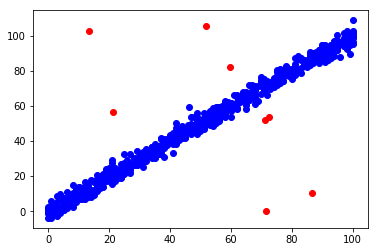

In [19]:
plot_anomalies_data(data3, labels3, anomalies_data, anomalies_labels)

In [49]:
from scipy.interpolate import spline

def anomaly_border(data3, labels3, anomalies_data, anomalies_labels, data2, label_mod):   
    plt.plot(anomalies_data, anomalies_labels, 'ro')
    plt.plot(data3, labels3, 'bo')
    
    top_border = []
    bottom_border = []
    for i in range(len(data3)):
        top_border.append(predicted_labels[i] + threshold)
        bottom_border.append(predicted_labels[i] - threshold)
        
    plt.plot(data3, top_border, 'go')
    plt.plot(data3, bottom_border, 'go')
    
    #xnew = np.linspace(min(data2),max(data2),len(data2))
    #label_smooth = spline(data2,label_mod,xnew)
    #plt.plot(xnew,label_smooth)
    
    plt.show()

In [50]:
label_mod = []
for i in range(len(labels2)):
    label_mod.append(labels2[i]+threshold)

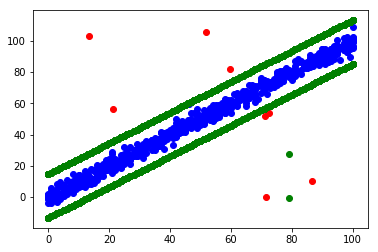

In [51]:
anomaly_border(data3, labels3, anomalies_data, anomalies_labels, data2, label_mod)